In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load the CSV file
file_path = os.path.join("..", "Final Data", "FINAL-THESIS-DATA.csv")
df = pd.read_csv(file_path)



<div style="
    background-color: black; 
    color: white; 
    padding: 10px; 
    border-radius: 10px; 
    text-align: center;
    max-width: 100vw; 
    width: 100%;
    box-sizing: border-box;">
    Universal Code for Exploratory analysis
</div>


In [3]:
def get_selected_barangay(df, selected_barangay):
    selected_data = df[df["Barangay"].str.upper() == selected_barangay.upper()]
    
    # Get the unique years in the dataset dynamically
    unique_years = sorted(selected_data["Year"].unique())
    
    return {year: selected_data[selected_data["Year"] == year] for year in unique_years}


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_dengue_cases(df, barangay_name):
    # Convert Barangay column to uppercase for case-insensitive matching
    df["Barangay"] = df["Barangay"].str.upper()
    
    # Get all unique years in the dataset
    all_years = sorted(df["Year"].unique())

    # Filter data for the selected barangay
    barangay_df = df[df["Barangay"] == barangay_name.upper()]

    # Set up subplots dynamically
    num_years = len(all_years)
    num_cols = 4
    num_rows = (num_years + num_cols - 1) // num_cols  # Ensure enough rows

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, num_rows * 4), sharey=True)
    axes = axes.flatten()  # Flatten to 1D array for easy indexing

    colors = sns.color_palette("magma", max(10, num_years))  # Ensure enough colors

    # Loop through each year and plot
    for i, year in enumerate(all_years):
        ax = axes[i]

        if year in barangay_df["Year"].values:
            # Get data for the year
            yearly_data = barangay_df[barangay_df["Year"] == year][["Month", "Dengue Cases"]]

            # Ensure all months (1-12) are present
            full_data = pd.DataFrame({"Month": range(1, 13)})
            merged_data = full_data.merge(yearly_data, on="Month", how="left").fillna(0)

            # Convert Dengue Cases to integer
            merged_data["Dengue Cases"] = merged_data["Dengue Cases"].fillna(0).astype(int)

            # Expand rows (repeat index based on Dengue Cases)
            expanded_data = merged_data.loc[merged_data.index.repeat(merged_data["Dengue Cases"])]

            if not expanded_data.empty:
                # Plot histogram
                hist = sns.histplot(data=expanded_data, x="Month", bins=12, discrete=True, 
                                    ax=ax, color=colors[i], shrink=0.75)

                # Add case numbers on top of each bar
                for p in hist.patches:
                    if p.get_height() > 0:
                        ax.annotate(f'{int(p.get_height())}', 
                                    (p.get_x() + p.get_width() / 2, p.get_height() + 0.2), 
                                    ha='center', va='bottom', fontsize=10, color='black')
            else:
                ax.text(0.5, 0.5, "No Cases", fontsize=12, ha='center', va='center', transform=ax.transAxes)

            ax.set_ylim(0, 110)  # Set max Y-axis to 110
            ax.set_xlim(0.5, 12.5)
            ax.set_xticks(range(1, 13))
            ax.set_xlabel("Month", fontsize=11)
            ax.set_title(f"{year}", fontsize=14, pad=5)
        else:
            # Show "No Cases" box **CENTERED in the subplot**
            ax.text(0.5, 0.5, "No Cases", fontsize=12, 
                    ha='center', va='center', transform=ax.transAxes,  # Ensures perfect centering
                    bbox=dict(facecolor='lightgray', edgecolor='black', boxstyle='round,pad=0.5'))

            ax.set_xticks(range(1, 13))  # Keep month labels
            ax.set_ylim(0, 50)  # Set max Y-axis to 50
            ax.set_xlim(0.5, 12.5)  # Keep X-axis the same

        # Ensure Y-axis labels are visible on the leftmost plots
        if i % num_cols == 0:
            ax.set_ylabel("Dengue Cases", fontsize=12)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout
    plt.tight_layout()
    plt.show()


In [5]:
def plot_total_dengue_cases_yearly(df, barangay_name):
    # Filter data for the selected barangay
    barangay_df = df[df["Barangay"].str.upper() == barangay_name.upper()]

    # Get all unique years in dataset
    all_years = sorted(df["Year"].unique())  # Ensure all years are considered

    # Aggregate total dengue cases per year (including missing years)
    yearly_cases = barangay_df.groupby("Year")["Dengue Cases"].sum().reindex(all_years, fill_value=0).reset_index()
    yearly_cases.columns = ["Year", "Dengue Cases"]  # Ensure correct column names

    # Plot the bar chart for yearly data
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=yearly_cases, x="Year", y="Dengue Cases", hue="Year", palette="viridis", legend=False)

    # Add text "No Cases" for years with zero cases
    for i, row in yearly_cases.iterrows():
        if row["Dengue Cases"] == 0:
            ax.text(i, 1, "No Cases", fontsize=10, ha='center', va='bottom', color="red", rotation=90)

    # Set maximum Y-axis limit to 400
    ax.set_ylim(0, 400)

    # Labels and Title
    plt.xlabel("Year")
    plt.ylabel("Total Dengue Cases")
    plt.title(f"Yearly Dengue Cases in {barangay_name}")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Show plot
    plt.show()


<div style="
    background-color: black; 
    color: white; 
    padding: 10px; 
    border-radius: 10px; 
    text-align: center;
    max-width: 100vw; 
    width: 100%;
    box-sizing: border-box;">
    ABUNO MONTHLY CASES
</div>


In [6]:
# Example usage:
selected_barangay = "ABUNO"  # Change this to any barangay you want
barangay_data = get_selected_barangay(df, selected_barangay)

# Display the data for each year
for year, data in barangay_data.items():
    display(data)

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
0              0    ABUNO  8.1846  124.2571  2011      1             0   
44             0    ABUNO  8.1846  124.2571  2011      2             0   
88             0    ABUNO  8.1846  124.2571  2011      3             1   
132            0    ABUNO  8.1846  124.2571  2011      4             0   
176            0    ABUNO  8.1846  124.2571  2011      5             0   
220            0    ABUNO  8.1846  124.2571  2011      6             0   
264            0    ABUNO  8.1846  124.2571  2011      7             0   
308            0    ABUNO  8.1846  124.2571  2011      8             1   
352            0    ABUNO  8.1846  124.2571  2011      9             1   
396            0    ABUNO  8.1846  124.2571  2011     10             0   
440            0    ABUNO  8.1846  124.2571  2011     11             0   
484            0    ABUNO  8.1846  124.2571  2011     12             0   

     Temperature  Humidity  Rainfall  
0           23.8      88.1       7.0  
44          24.1      87.2      12.0  
88          25.3      85.5      20.0  
132         26.0      83.1      35.0  
176         27.2      81.9      55.0  
220         26.4      83.5      90.0  
264         25.7      84.7     110.0  
308         25.1      85.3      95.0  
352         24.4      86.2      70.0  
396         24.0      87.0      50.0  
440         23.6      88.4      30.0  
484         23.2      89.1      15.0

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
528             0    ABUNO  8.1846  124.2571  2012      1             0   
572             0    ABUNO  8.1846  124.2571  2012      2             0   
616             0    ABUNO  8.1846  124.2571  2012      3             0   
660             0    ABUNO  8.1846  124.2571  2012      4             1   
704             0    ABUNO  8.1846  124.2571  2012      5             1   
748             0    ABUNO  8.1846  124.2571  2012      6             0   
792             0    ABUNO  8.1846  124.2571  2012      7             0   
836             0    ABUNO  8.1846  124.2571  2012      8             0   
880             0    ABUNO  8.1846  124.2571  2012      9             0   
924             0    ABUNO  8.1846  124.2571  2012     10             1   
968             0    ABUNO  8.1846  124.2571  2012     11             1   
1012            0    ABUNO  8.1846  124.2571  2012     12             0   

      Temperature  Humidity  Rainfall  
528          24.3      85.1       4.0  
572          24.3      85.7       7.1  
616          24.6      83.3       3.1  
660          25.4      82.3       6.9  
704          25.1      86.4       6.9  
748          24.7      85.3       7.9  
792          24.9      85.2       6.4  
836          24.9      85.2       6.4  
880          24.1      88.1      11.4  
924          24.6      86.5       8.4  
968          24.8      84.8       4.1  
1012         24.7      84.8       5.7

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
1056            0    ABUNO  8.1846  124.2571  2013      1             2   
1100            0    ABUNO  8.1846  124.2571  2013      2             0   
1144            0    ABUNO  8.1846  124.2571  2013      3             0   
1188            0    ABUNO  8.1846  124.2571  2013      4             0   
1232            0    ABUNO  8.1846  124.2571  2013      5             0   
1276            0    ABUNO  8.1846  124.2571  2013      6             0   
1320            0    ABUNO  8.1846  124.2571  2013      7             1   
1364            0    ABUNO  8.1846  124.2571  2013      8             0   
1408            0    ABUNO  8.1846  124.2571  2013      9             0   
1452            0    ABUNO  8.1846  124.2571  2013     10             0   
1496            0    ABUNO  8.1846  124.2571  2013     11             1   
1540            0    ABUNO  8.1846  124.2571  2013     12             0   

      Temperature  Humidity  Rainfall  
1056         24.2      88.2       8.1  
1100         24.4      84.7       6.0  
1144         25.5      81.1       2.7  
1188         26.0      81.0       4.9  
1232         26.0      82.8       5.2  
1276         24.9      86.9       9.2  
1320         24.5      87.7      11.0  
1364         24.3      87.2       6.9  
1408         24.6      86.5       4.9  
1452         24.0      88.0      10.4  
1496         24.2      85.9       7.8  
1540         24.4      84.0       3.5

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
1584            0    ABUNO  8.1846  124.2571  2014      1             0   
1628            0    ABUNO  8.1846  124.2571  2014      2             1   
1672            0    ABUNO  8.1846  124.2571  2014      3             0   
1716            0    ABUNO  8.1846  124.2571  2014      4             0   
1760            0    ABUNO  8.1846  124.2571  2014      5             0   
1804            0    ABUNO  8.1846  124.2571  2014      6             0   
1848            0    ABUNO  8.1846  124.2571  2014      7             1   
1892            0    ABUNO  8.1846  124.2571  2014      8             1   
1936            0    ABUNO  8.1846  124.2571  2014      9             0   
1980            0    ABUNO  8.1846  124.2571  2014     10             0   
2024            0    ABUNO  8.1846  124.2571  2014     11             2   
2068            0    ABUNO  8.1846  124.2571  2014     12             0   

      Temperature  Humidity  Rainfall  
1584         23.2      86.4       6.8  
1628         23.7      82.4       2.3  
1672         24.3      82.5       3.8  
1716         25.1      81.4       2.0  
1760         25.3      84.0       4.9  
1804         24.5      87.1       6.6  
1848         23.4      89.1       8.5  
1892         23.9      87.7       8.0  
1936         23.4      88.5       7.1  
1980         23.9      88.4       8.5  
2024         24.7      85.2       6.1  
2068         24.0      85.3       4.9

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
2112            0    ABUNO  8.1846  124.2571  2015      1             3   
2156            0    ABUNO  8.1846  124.2571  2015      2             3   
2200            0    ABUNO  8.1846  124.2571  2015      3             0   
2244            0    ABUNO  8.1846  124.2571  2015      4             0   
2288            0    ABUNO  8.1846  124.2571  2015      5             0   
2332            0    ABUNO  8.1846  124.2571  2015      6             0   
2376            0    ABUNO  8.1846  124.2571  2015      7             0   
2420            0    ABUNO  8.1846  124.2571  2015      8             0   
2464            0    ABUNO  8.1846  124.2571  2015      9             1   
2508            0    ABUNO  8.1846  124.2571  2015     10             1   
2552            0    ABUNO  8.1846  124.2571  2015     11             1   
2596            0    ABUNO  8.1846  124.2571  2015     12             0   

      Temperature  Humidity  Rainfall  
2112         25.6      89.0       5.9  
2156         25.6      87.0       3.0  
2200         26.1      83.2       1.1  
2244         27.3      82.8       2.1  
2288         28.4      78.1       2.7  
2332         27.4      81.9       8.7  
2376         27.6      80.4       4.2  
2420         27.5      80.9       5.5  
2464         27.2      82.4       8.2  
2508         27.2      83.4       4.9  
2552         26.8      87.3       6.5  
2596         26.5      87.1       4.8

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
2640            0    ABUNO  8.1846  124.2571  2016      1             3   
2684            0    ABUNO  8.1846  124.2571  2016      2             1   
2728            0    ABUNO  8.1846  124.2571  2016      3             2   
2772            0    ABUNO  8.1846  124.2571  2016      4             0   
2816            0    ABUNO  8.1846  124.2571  2016      5             0   
2860            0    ABUNO  8.1846  124.2571  2016      6             0   
2904            0    ABUNO  8.1846  124.2571  2016      7             5   
2948            0    ABUNO  8.1846  124.2571  2016      8             6   
2992            0    ABUNO  8.1846  124.2571  2016      9             3   
3036            0    ABUNO  8.1846  124.2571  2016     10             1   
3080            0    ABUNO  8.1846  124.2571  2016     11             3   
3124            0    ABUNO  8.1846  124.2571  2016     12             1   

      Temperature  Humidity  Rainfall  
2640         26.2      86.9       1.6  
2684         26.1      88.2       2.6  
2728         26.8      84.4       0.4  
2772         28.1      80.1       1.5  
2816         28.3      81.9       8.3  
2860         27.5      83.9      12.5  
2904         27.6      82.0       5.2  
2948         27.8      80.3       2.7  
2992         27.2      82.4       6.2  
3036         27.1      84.6       8.9  
3080         26.5      86.6       7.6  
3124         26.7      86.9       8.2

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
3168            0    ABUNO  8.1846  124.2571  2017      1             0   
3212            0    ABUNO  8.1846  124.2571  2017      2             2   
3256            0    ABUNO  8.1846  124.2571  2017      3             1   
3300            0    ABUNO  8.1846  124.2571  2017      4             0   
3344            0    ABUNO  8.1846  124.2571  2017      5             0   
3388            0    ABUNO  8.1846  124.2571  2017      6             0   
3432            0    ABUNO  8.1846  124.2571  2017      7             0   
3476            0    ABUNO  8.1846  124.2571  2017      8             0   
3520            0    ABUNO  8.1846  124.2571  2017      9             0   
3564            0    ABUNO  8.1846  124.2571  2017     10             0   
3608            0    ABUNO  8.1846  124.2571  2017     11             0   
3652            0    ABUNO  8.1846  124.2571  2017     12             0   

      Temperature  Humidity  Rainfall  
3168         25.9      88.9      12.5  
3212         25.6      87.8       5.9  
3256         26.1      87.4       8.0  
3300         27.2      85.0       5.1  
3344         27.8      84.4      10.4  
3388         27.4      83.8       7.8  
3432         27.2      82.6       9.1  
3476         27.9      83.4       9.6  
3520         27.3      83.3      11.4  
3564         27.0      84.0       8.3  
3608         27.0      86.6       7.3  
3652         26.7      85.9       9.6

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
3696            0    ABUNO  8.1846  124.2571  2018      1             0   
3740            0    ABUNO  8.1846  124.2571  2018      2             0   
3784            0    ABUNO  8.1846  124.2571  2018      3             0   
3828            0    ABUNO  8.1846  124.2571  2018      4             1   
3872            0    ABUNO  8.1846  124.2571  2018      5             0   
3916            0    ABUNO  8.1846  124.2571  2018      6             1   
3960            0    ABUNO  8.1846  124.2571  2018      7             2   
4004            0    ABUNO  8.1846  124.2571  2018      8             0   
4048            0    ABUNO  8.1846  124.2571  2018      9             0   
4092            0    ABUNO  8.1846  124.2571  2018     10             1   
4136            0    ABUNO  8.1846  124.2571  2018     11             7   
4180            0    ABUNO  8.1846  124.2571  2018     12             4   

      Temperature  Humidity  Rainfall  
3696         26.2      87.5       7.3  
3740         26.4      86.0       9.7  
3784         26.5      84.6       3.7  
3828         27.4      82.5       2.6  
3872         27.9      82.0       6.9  
3916         27.7      80.7       5.2  
3960         27.3      81.6       4.7  
4004         27.4      79.8       2.1  
4048         26.9      82.2       5.4  
4092         27.2      82.7       4.2  
4136         26.5      86.6       6.1  
4180         26.3      88.1       5.8

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
4224            0    ABUNO  8.1846  124.2571  2019      1             8   
4268            0    ABUNO  8.1846  124.2571  2019      2             0   
4312            0    ABUNO  8.1846  124.2571  2019      3             4   
4356            0    ABUNO  8.1846  124.2571  2019      4             0   
4400            0    ABUNO  8.1846  124.2571  2019      5             0   
4444            0    ABUNO  8.1846  124.2571  2019      6             3   
4488            0    ABUNO  8.1846  124.2571  2019      7             9   
4532            0    ABUNO  8.1846  124.2571  2019      8            13   
4576            0    ABUNO  8.1846  124.2571  2019      9             3   
4620            0    ABUNO  8.1846  124.2571  2019     10             4   
4664            0    ABUNO  8.1846  124.2571  2019     11             9   
4708            0    ABUNO  8.1846  124.2571  2019     12             0   

      Temperature  Humidity  Rainfall  
4224         25.5      88.2       5.7  
4268         25.3      84.3       1.1  
4312         26.1      83.2       1.9  
4356         27.5      80.3       1.8  
4400         28.4      78.6       4.4  
4444         27.8      82.7       9.1  
4488         27.2      82.1       6.2  
4532         27.7      77.1       1.4  
4576         27.8      78.2       3.3  
4620         27.0      83.8       7.7  
4664         27.1      82.9       4.3  
4708         26.4      86.4       4.2

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
4752            0    ABUNO  8.1846  124.2571  2020      1             4   
4796            0    ABUNO  8.1846  124.2571  2020      2             0   
4840            0    ABUNO  8.1846  124.2571  2020      3             0   
4884            0    ABUNO  8.1846  124.2571  2020      4             4   
4928            0    ABUNO  8.1846  124.2571  2020      5             0   
4972            0    ABUNO  8.1846  124.2571  2020      6             2   
5016            0    ABUNO  8.1846  124.2571  2020      7             8   
5060            0    ABUNO  8.1846  124.2571  2020      8             2   
5104            0    ABUNO  8.1846  124.2571  2020      9             0   
5148            0    ABUNO  8.1846  124.2571  2020     10             0   
5192            0    ABUNO  8.1846  124.2571  2020     11             0   
5236            0    ABUNO  8.1846  124.2571  2020     12             0   

      Temperature  Humidity  Rainfall  
4752         26.3      86.8       2.1  
4796         25.7      87.2       3.5  
4840         26.4      85.2       2.0  
4884         27.2      81.6       1.0  
4928         28.0      83.2       9.8  
4972         27.3      84.1      14.1  
5016         27.0      83.9      15.7  
5060         27.2      82.9      11.7  
5104         27.2      83.7       9.2  
5148         26.9      84.2      13.2  
5192         26.8      86.2       5.5  
5236         26.7      86.6       8.2

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
5280            0    ABUNO  8.1846  124.2571  2021      1             0   
5324            0    ABUNO  8.1846  124.2571  2021      2             0   
5368            0    ABUNO  8.1846  124.2571  2021      3             0   
5412            0    ABUNO  8.1846  124.2571  2021      4             0   
5456            0    ABUNO  8.1846  124.2571  2021      5             0   
5500            0    ABUNO  8.1846  124.2571  2021      6             0   
5544            0    ABUNO  8.1846  124.2571  2021      7             0   
5588            0    ABUNO  8.1846  124.2571  2021      8             1   
5632            0    ABUNO  8.1846  124.2571  2021      9             0   
5676            0    ABUNO  8.1846  124.2571  2021     10             0   
5720            0    ABUNO  8.1846  124.2571  2021     11             1   
5764            0    ABUNO  8.1846  124.2571  2021     12             0   

      Temperature  Humidity  Rainfall  
5280         25.9      88.5      11.9  
5324         26.0      87.1      12.6  
5368         26.8      84.7       5.5  
5412         27.1      82.5       4.5  
5456         27.5      84.0      10.7  
5500         27.6      81.3       8.2  
5544         27.7      80.0       4.4  
5588         27.5      80.0       6.5  
5632         27.2      82.7       9.5  
5676         27.3      83.6       8.7  
5720         27.0      86.4       9.4  
5764         26.2      86.9       9.8

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
5808            0    ABUNO  8.1846  124.2571  2022      1             1   
5852            0    ABUNO  8.1846  124.2571  2022      2             2   
5896            0    ABUNO  8.1846  124.2571  2022      3             0   
5940            0    ABUNO  8.1846  124.2571  2022      4             0   
5984            0    ABUNO  8.1846  124.2571  2022      5             1   
6028            0    ABUNO  8.1846  124.2571  2022      6             0   
6072            0    ABUNO  8.1846  124.2571  2022      7             1   
6116            0    ABUNO  8.1846  124.2571  2022      8             1   
6160            0    ABUNO  8.1846  124.2571  2022      9             0   
6204            0    ABUNO  8.1846  124.2571  2022     10             1   
6248            0    ABUNO  8.1846  124.2571  2022     11             1   
6292            0    ABUNO  8.1846  124.2571  2022     12             0   

      Temperature  Humidity  Rainfall  
5808         26.0      86.9       8.3  
5852         26.0      87.2       3.9  
5896         26.8      86.5      11.0  
5940         26.8      86.5      12.2  
5984         27.4      83.9      11.5  
6028         27.6      81.9       7.1  
6072         27.4      83.2      11.6  
6116         27.3      82.0       7.9  
6160         27.5      81.1       6.1  
6204         27.1      84.2       9.0  
6248         27.0      85.8       6.6  
6292         26.4      87.1      14.5

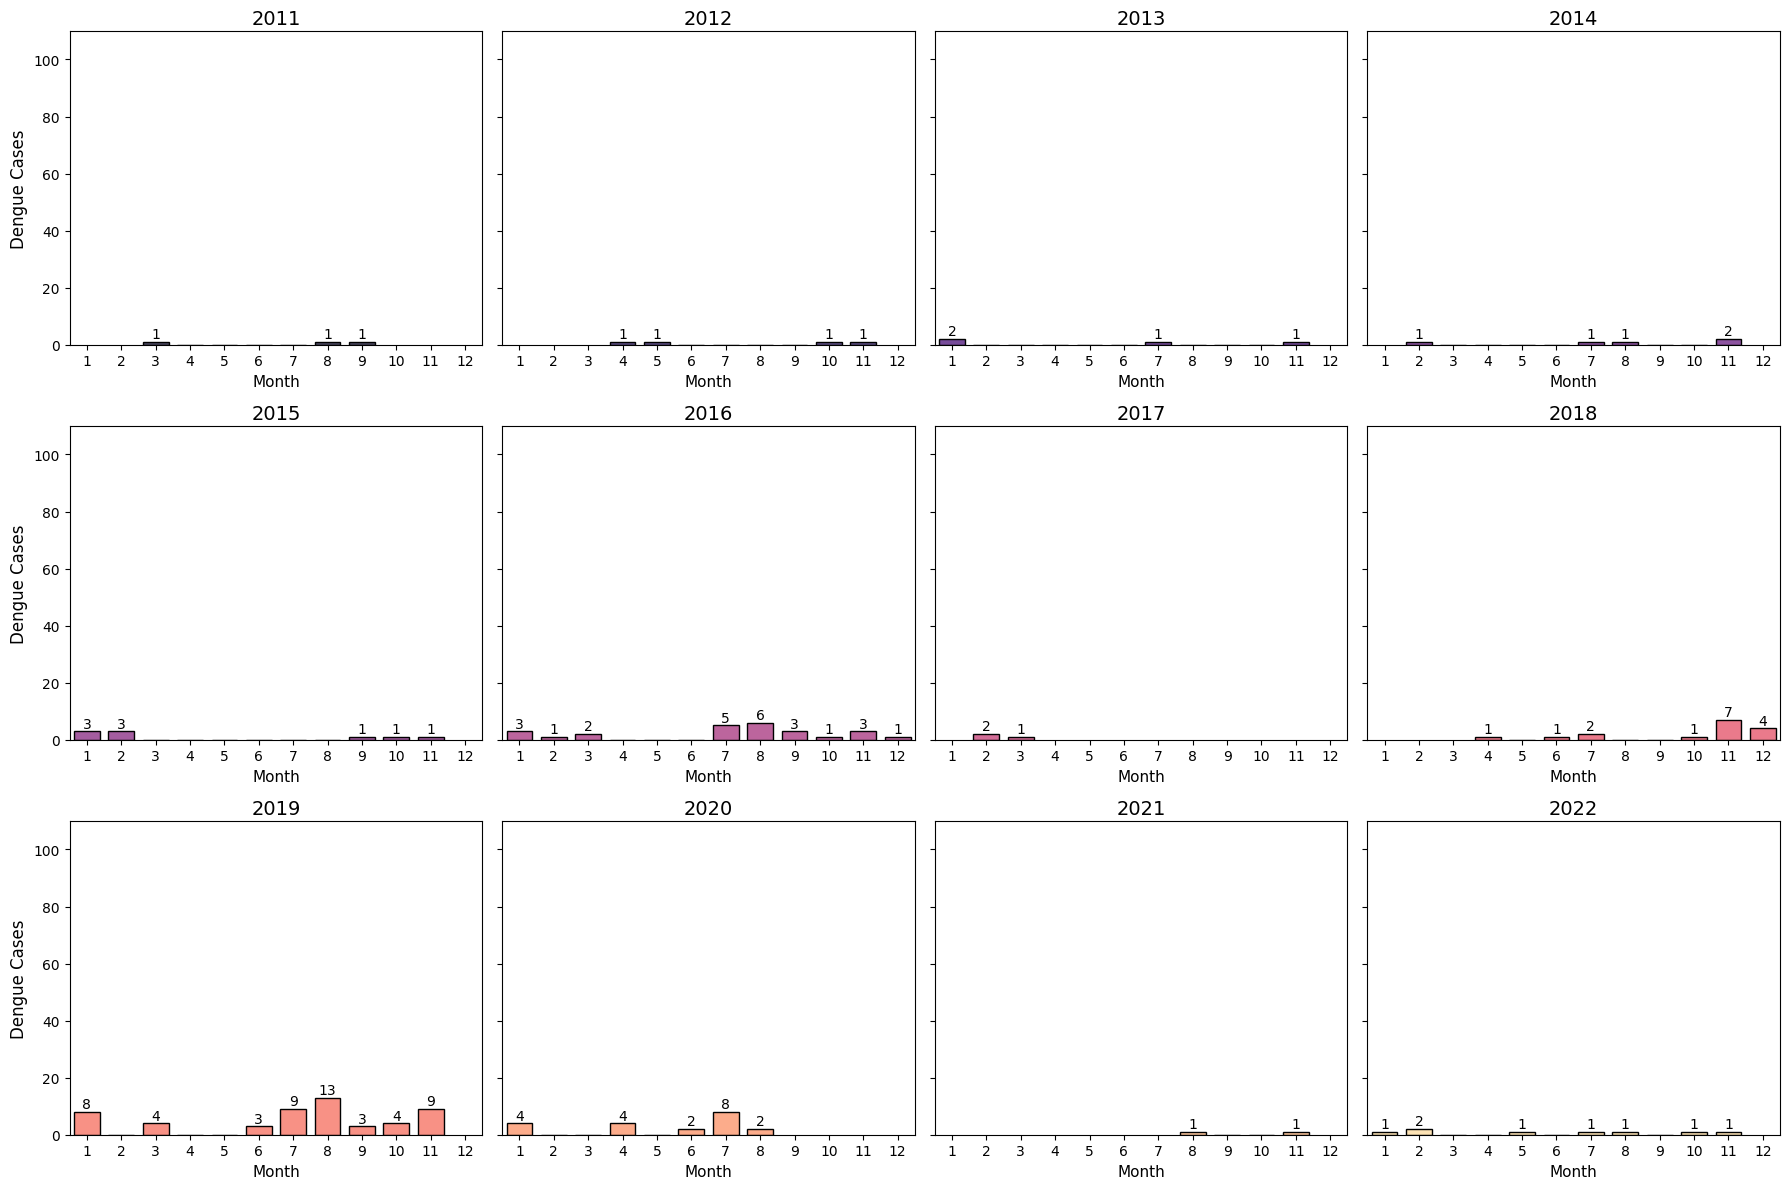

In [7]:
#HISTOGRAM FOR MONTHLY CASES EVERY YEAR
plot_dengue_cases(df, "ABUNO")

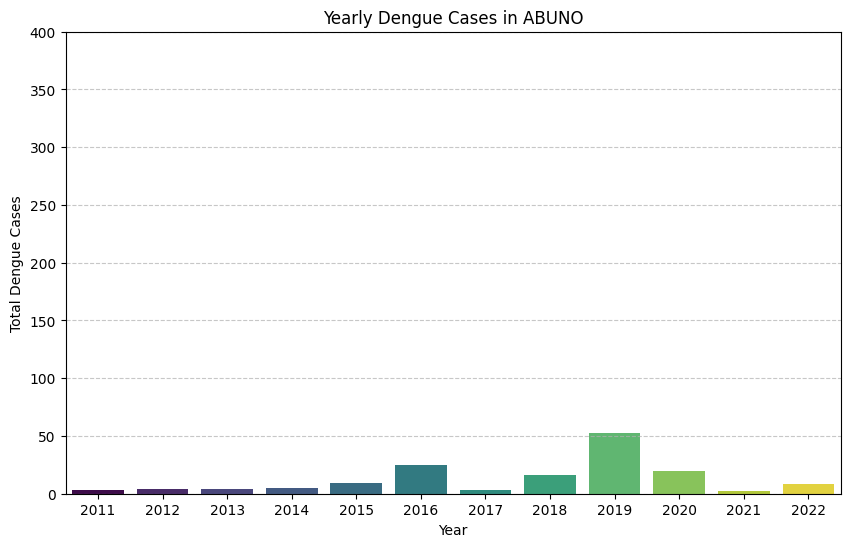

In [8]:
plot_total_dengue_cases_yearly(df, "ABUNO")

<div style="
    background-color: black; 
    color: white; 
    padding: 10px; 
    border-radius: 10px; 
    text-align: center;
    max-width: 100vw; 
    width: 100%;
    box-sizing: border-box;">
    ACMAC MONTHLY CASES
</div>


In [9]:
# Example usage:
selected_barangay = "ACMAC"  # Change this to any barangay you want
barangay_data = get_selected_barangay(df, selected_barangay)

# Display the data for each year
for year, data in barangay_data.items():
    display(data)

Barangay_No Barangay      x         y  Year  Month  Dengue Cases  \
1              1    ACMAC  8.274  124.2649  2011      1             0   
45             1    ACMAC  8.274  124.2649  2011      2             1   
89             1    ACMAC  8.274  124.2649  2011      3             0   
133            1    ACMAC  8.274  124.2649  2011      4             0   
177            1    ACMAC  8.274  124.2649  2011      5             0   
221            1    ACMAC  8.274  124.2649  2011      6             0   
265            1    ACMAC  8.274  124.2649  2011      7             0   
309            1    ACMAC  8.274  124.2649  2011      8             0   
353            1    ACMAC  8.274  124.2649  2011      9             0   
397            1    ACMAC  8.274  124.2649  2011     10             0   
441            1    ACMAC  8.274  124.2649  2011     11             0   
485            1    ACMAC  8.274  124.2649  2011     12             0   

     Temperature  Humidity  Rainfall  
1           23.8      88.1       7.0  
45          24.1      87.2      12.0  
89          25.3      85.5      20.0  
133         26.0      83.1      35.0  
177         27.2      81.9      55.0  
221         26.4      83.5      90.0  
265         25.7      84.7     110.0  
309         25.1      85.3      95.0  
353         24.4      86.2      70.0  
397         24.0      87.0      50.0  
441         23.6      88.4      30.0  
485         23.2      89.1      15.0

Barangay_No Barangay      x         y  Year  Month  Dengue Cases  \
529             1    ACMAC  8.274  124.2649  2012      1             0   
573             1    ACMAC  8.274  124.2649  2012      2             0   
617             1    ACMAC  8.274  124.2649  2012      3             0   
661             1    ACMAC  8.274  124.2649  2012      4             0   
705             1    ACMAC  8.274  124.2649  2012      5             0   
749             1    ACMAC  8.274  124.2649  2012      6             0   
793             1    ACMAC  8.274  124.2649  2012      7             0   
837             1    ACMAC  8.274  124.2649  2012      8             0   
881             1    ACMAC  8.274  124.2649  2012      9             0   
925             1    ACMAC  8.274  124.2649  2012     10             1   
969             1    ACMAC  8.274  124.2649  2012     11             1   
1013            1    ACMAC  8.274  124.2649  2012     12             0   

      Temperature  Humidity  Rainfall  
529          24.3      85.1       4.0  
573          24.3      85.7       7.1  
617          24.6      83.3       3.1  
661          25.4      82.3       6.9  
705          25.1      86.4       6.9  
749          24.7      85.3       7.9  
793          24.9      85.2       6.4  
837          24.9      85.2       6.4  
881          24.1      88.1      11.4  
925          24.6      86.5       8.4  
969          24.8      84.8       4.1  
1013         24.7      84.8       5.7

Barangay_No Barangay      x         y  Year  Month  Dengue Cases  \
1057            1    ACMAC  8.274  124.2649  2013      1             1   
1101            1    ACMAC  8.274  124.2649  2013      2             1   
1145            1    ACMAC  8.274  124.2649  2013      3             0   
1189            1    ACMAC  8.274  124.2649  2013      4             0   
1233            1    ACMAC  8.274  124.2649  2013      5             1   
1277            1    ACMAC  8.274  124.2649  2013      6             0   
1321            1    ACMAC  8.274  124.2649  2013      7             0   
1365            1    ACMAC  8.274  124.2649  2013      8             0   
1409            1    ACMAC  8.274  124.2649  2013      9             1   
1453            1    ACMAC  8.274  124.2649  2013     10             2   
1497            1    ACMAC  8.274  124.2649  2013     11             0   
1541            1    ACMAC  8.274  124.2649  2013     12             0   

      Temperature  Humidity  Rainfall  
1057         24.2      88.2       8.1  
1101         24.4      84.7       6.0  
1145         25.5      81.1       2.7  
1189         26.0      81.0       4.9  
1233         26.0      82.8       5.2  
1277         24.9      86.9       9.2  
1321         24.5      87.7      11.0  
1365         24.3      87.2       6.9  
1409         24.6      86.5       4.9  
1453         24.0      88.0      10.4  
1497         24.2      85.9       7.8  
1541         24.4      84.0       3.5

Barangay_No Barangay      x         y  Year  Month  Dengue Cases  \
1585            1    ACMAC  8.274  124.2649  2014      1             3   
1629            1    ACMAC  8.274  124.2649  2014      2             1   
1673            1    ACMAC  8.274  124.2649  2014      3             0   
1717            1    ACMAC  8.274  124.2649  2014      4             0   
1761            1    ACMAC  8.274  124.2649  2014      5             1   
1805            1    ACMAC  8.274  124.2649  2014      6             0   
1849            1    ACMAC  8.274  124.2649  2014      7             2   
1893            1    ACMAC  8.274  124.2649  2014      8             7   
1937            1    ACMAC  8.274  124.2649  2014      9             1   
1981            1    ACMAC  8.274  124.2649  2014     10             3   
2025            1    ACMAC  8.274  124.2649  2014     11             1   
2069            1    ACMAC  8.274  124.2649  2014     12             2   

      Temperature  Humidity  Rainfall  
1585         23.2      86.4       6.8  
1629         23.7      82.4       2.3  
1673         24.3      82.5       3.8  
1717         25.1      81.4       2.0  
1761         25.3      84.0       4.9  
1805         24.5      87.1       6.6  
1849         23.4      89.1       8.5  
1893         23.9      87.7       8.0  
1937         23.4      88.5       7.1  
1981         23.9      88.4       8.5  
2025         24.7      85.2       6.1  
2069         24.0      85.3       4.9

Barangay_No Barangay      x         y  Year  Month  Dengue Cases  \
2113            1    ACMAC  8.274  124.2649  2015      1             1   
2157            1    ACMAC  8.274  124.2649  2015      2             2   
2201            1    ACMAC  8.274  124.2649  2015      3             0   
2245            1    ACMAC  8.274  124.2649  2015      4             0   
2289            1    ACMAC  8.274  124.2649  2015      5             0   
2333            1    ACMAC  8.274  124.2649  2015      6             0   
2377            1    ACMAC  8.274  124.2649  2015      7             0   
2421            1    ACMAC  8.274  124.2649  2015      8             0   
2465            1    ACMAC  8.274  124.2649  2015      9             0   
2509            1    ACMAC  8.274  124.2649  2015     10             0   
2553            1    ACMAC  8.274  124.2649  2015     11             5   
2597            1    ACMAC  8.274  124.2649  2015     12             0   

      Temperature  Humidity  Rainfall  
2113         25.6      89.0       5.9  
2157         25.6      87.0       3.0  
2201         26.1      83.2       1.1  
2245         27.3      82.8       2.1  
2289         28.4      78.1       2.7  
2333         27.4      81.9       8.7  
2377         27.6      80.4       4.2  
2421         27.5      80.9       5.5  
2465         27.2      82.4       8.2  
2509         27.2      83.4       4.9  
2553         26.8      87.3       6.5  
2597         26.5      87.1       4.8

Barangay_No Barangay      x         y  Year  Month  Dengue Cases  \
2641            1    ACMAC  8.274  124.2649  2016      1             1   
2685            1    ACMAC  8.274  124.2649  2016      2             0   
2729            1    ACMAC  8.274  124.2649  2016      3             1   
2773            1    ACMAC  8.274  124.2649  2016      4             0   
2817            1    ACMAC  8.274  124.2649  2016      5             1   
2861            1    ACMAC  8.274  124.2649  2016      6             0   
2905            1    ACMAC  8.274  124.2649  2016      7             3   
2949            1    ACMAC  8.274  124.2649  2016      8             2   
2993            1    ACMAC  8.274  124.2649  2016      9             2   
3037            1    ACMAC  8.274  124.2649  2016     10             2   
3081            1    ACMAC  8.274  124.2649  2016     11             2   
3125            1    ACMAC  8.274  124.2649  2016     12             1   

      Temperature  Humidity  Rainfall  
2641         26.2      86.9       1.6  
2685         26.1      88.2       2.6  
2729         26.8      84.4       0.4  
2773         28.1      80.1       1.5  
2817         28.3      81.9       8.3  
2861         27.5      83.9      12.5  
2905         27.6      82.0       5.2  
2949         27.8      80.3       2.7  
2993         27.2      82.4       6.2  
3037         27.1      84.6       8.9  
3081         26.5      86.6       7.6  
3125         26.7      86.9       8.2

Barangay_No Barangay      x         y  Year  Month  Dengue Cases  \
3169            1    ACMAC  8.274  124.2649  2017      1             0   
3213            1    ACMAC  8.274  124.2649  2017      2             1   
3257            1    ACMAC  8.274  124.2649  2017      3             1   
3301            1    ACMAC  8.274  124.2649  2017      4             0   
3345            1    ACMAC  8.274  124.2649  2017      5             0   
3389            1    ACMAC  8.274  124.2649  2017      6             1   
3433            1    ACMAC  8.274  124.2649  2017      7             1   
3477            1    ACMAC  8.274  124.2649  2017      8             0   
3521            1    ACMAC  8.274  124.2649  2017      9             0   
3565            1    ACMAC  8.274  124.2649  2017     10             0   
3609            1    ACMAC  8.274  124.2649  2017     11             1   
3653            1    ACMAC  8.274  124.2649  2017     12             0   

      Temperature  Humidity  Rainfall  
3169         25.9      88.9      12.5  
3213         25.6      87.8       5.9  
3257         26.1      87.4       8.0  
3301         27.2      85.0       5.1  
3345         27.8      84.4      10.4  
3389         27.4      83.8       7.8  
3433         27.2      82.6       9.1  
3477         27.9      83.4       9.6  
3521         27.3      83.3      11.4  
3565         27.0      84.0       8.3  
3609         27.0      86.6       7.3  
3653         26.7      85.9       9.6

Barangay_No Barangay      x         y  Year  Month  Dengue Cases  \
3697            1    ACMAC  8.274  124.2649  2018      1             0   
3741            1    ACMAC  8.274  124.2649  2018      2             0   
3785            1    ACMAC  8.274  124.2649  2018      3             4   
3829            1    ACMAC  8.274  124.2649  2018      4             0   
3873            1    ACMAC  8.274  124.2649  2018      5             0   
3917            1    ACMAC  8.274  124.2649  2018      6             0   
3961            1    ACMAC  8.274  124.2649  2018      7             1   
4005            1    ACMAC  8.274  124.2649  2018      8             1   
4049            1    ACMAC  8.274  124.2649  2018      9             3   
4093            1    ACMAC  8.274  124.2649  2018     10             8   
4137            1    ACMAC  8.274  124.2649  2018     11             7   
4181            1    ACMAC  8.274  124.2649  2018     12            10   

      Temperature  Humidity  Rainfall  
3697         26.2      87.5       7.3  
3741         26.4      86.0       9.7  
3785         26.5      84.6       3.7  
3829         27.4      82.5       2.6  
3873         27.9      82.0       6.9  
3917         27.7      80.7       5.2  
3961         27.3      81.6       4.7  
4005         27.4      79.8       2.1  
4049         26.9      82.2       5.4  
4093         27.2      82.7       4.2  
4137         26.5      86.6       6.1  
4181         26.3      88.1       5.8

Barangay_No Barangay      x         y  Year  Month  Dengue Cases  \
4225            1    ACMAC  8.274  124.2649  2019      1            15   
4269            1    ACMAC  8.274  124.2649  2019      2             8   
4313            1    ACMAC  8.274  124.2649  2019      3             0   
4357            1    ACMAC  8.274  124.2649  2019      4             0   
4401            1    ACMAC  8.274  124.2649  2019      5             5   
4445            1    ACMAC  8.274  124.2649  2019      6             4   
4489            1    ACMAC  8.274  124.2649  2019      7            39   
4533            1    ACMAC  8.274  124.2649  2019      8            16   
4577            1    ACMAC  8.274  124.2649  2019      9             4   
4621            1    ACMAC  8.274  124.2649  2019     10             9   
4665            1    ACMAC  8.274  124.2649  2019     11             3   
4709            1    ACMAC  8.274  124.2649  2019     12             8   

      Temperature  Humidity  Rainfall  
4225         25.5      88.2       5.7  
4269         25.3      84.3       1.1  
4313         26.1      83.2       1.9  
4357         27.5      80.3       1.8  
4401         28.4      78.6       4.4  
4445         27.8      82.7       9.1  
4489         27.2      82.1       6.2  
4533         27.7      77.1       1.4  
4577         27.8      78.2       3.3  
4621         27.0      83.8       7.7  
4665         27.1      82.9       4.3  
4709         26.4      86.4       4.2

Barangay_No Barangay      x         y  Year  Month  Dengue Cases  \
4753            1    ACMAC  8.274  124.2649  2020      1             8   
4797            1    ACMAC  8.274  124.2649  2020      2             2   
4841            1    ACMAC  8.274  124.2649  2020      3             8   
4885            1    ACMAC  8.274  124.2649  2020      4             2   
4929            1    ACMAC  8.274  124.2649  2020      5             0   
4973            1    ACMAC  8.274  124.2649  2020      6             0   
5017            1    ACMAC  8.274  124.2649  2020      7             0   
5061            1    ACMAC  8.274  124.2649  2020      8             2   
5105            1    ACMAC  8.274  124.2649  2020      9             0   
5149            1    ACMAC  8.274  124.2649  2020     10             0   
5193            1    ACMAC  8.274  124.2649  2020     11             1   
5237            1    ACMAC  8.274  124.2649  2020     12             0   

      Temperature  Humidity  Rainfall  
4753         26.3      86.8       2.1  
4797         25.7      87.2       3.5  
4841         26.4      85.2       2.0  
4885         27.2      81.6       1.0  
4929         28.0      83.2       9.8  
4973         27.3      84.1      14.1  
5017         27.0      83.9      15.7  
5061         27.2      82.9      11.7  
5105         27.2      83.7       9.2  
5149         26.9      84.2      13.2  
5193         26.8      86.2       5.5  
5237         26.7      86.6       8.2

Barangay_No Barangay      x         y  Year  Month  Dengue Cases  \
5281            1    ACMAC  8.274  124.2649  2021      1             1   
5325            1    ACMAC  8.274  124.2649  2021      2             0   
5369            1    ACMAC  8.274  124.2649  2021      3             0   
5413            1    ACMAC  8.274  124.2649  2021      4             1   
5457            1    ACMAC  8.274  124.2649  2021      5             0   
5501            1    ACMAC  8.274  124.2649  2021      6             0   
5545            1    ACMAC  8.274  124.2649  2021      7             0   
5589            1    ACMAC  8.274  124.2649  2021      8             1   
5633            1    ACMAC  8.274  124.2649  2021      9             0   
5677            1    ACMAC  8.274  124.2649  2021     10             2   
5721            1    ACMAC  8.274  124.2649  2021     11             1   
5765            1    ACMAC  8.274  124.2649  2021     12             1   

      Temperature  Humidity  Rainfall  
5281         25.9      88.5      11.9  
5325         26.0      87.1      12.6  
5369         26.8      84.7       5.5  
5413         27.1      82.5       4.5  
5457         27.5      84.0      10.7  
5501         27.6      81.3       8.2  
5545         27.7      80.0       4.4  
5589         27.5      80.0       6.5  
5633         27.2      82.7       9.5  
5677         27.3      83.6       8.7  
5721         27.0      86.4       9.4  
5765         26.2      86.9       9.8

Barangay_No Barangay      x         y  Year  Month  Dengue Cases  \
5809            1    ACMAC  8.274  124.2649  2022      1             0   
5853            1    ACMAC  8.274  124.2649  2022      2             0   
5897            1    ACMAC  8.274  124.2649  2022      3             0   
5941            1    ACMAC  8.274  124.2649  2022      4             0   
5985            1    ACMAC  8.274  124.2649  2022      5             0   
6029            1    ACMAC  8.274  124.2649  2022      6             1   
6073            1    ACMAC  8.274  124.2649  2022      7             1   
6117            1    ACMAC  8.274  124.2649  2022      8             0   
6161            1    ACMAC  8.274  124.2649  2022      9             1   
6205            1    ACMAC  8.274  124.2649  2022     10             1   
6249            1    ACMAC  8.274  124.2649  2022     11             0   
6293            1    ACMAC  8.274  124.2649  2022     12             0   

      Temperature  Humidity  Rainfall  
5809         26.0      86.9       8.3  
5853         26.0      87.2       3.9  
5897         26.8      86.5      11.0  
5941         26.8      86.5      12.2  
5985         27.4      83.9      11.5  
6029         27.6      81.9       7.1  
6073         27.4      83.2      11.6  
6117         27.3      82.0       7.9  
6161         27.5      81.1       6.1  
6205         27.1      84.2       9.0  
6249         27.0      85.8       6.6  
6293         26.4      87.1      14.5

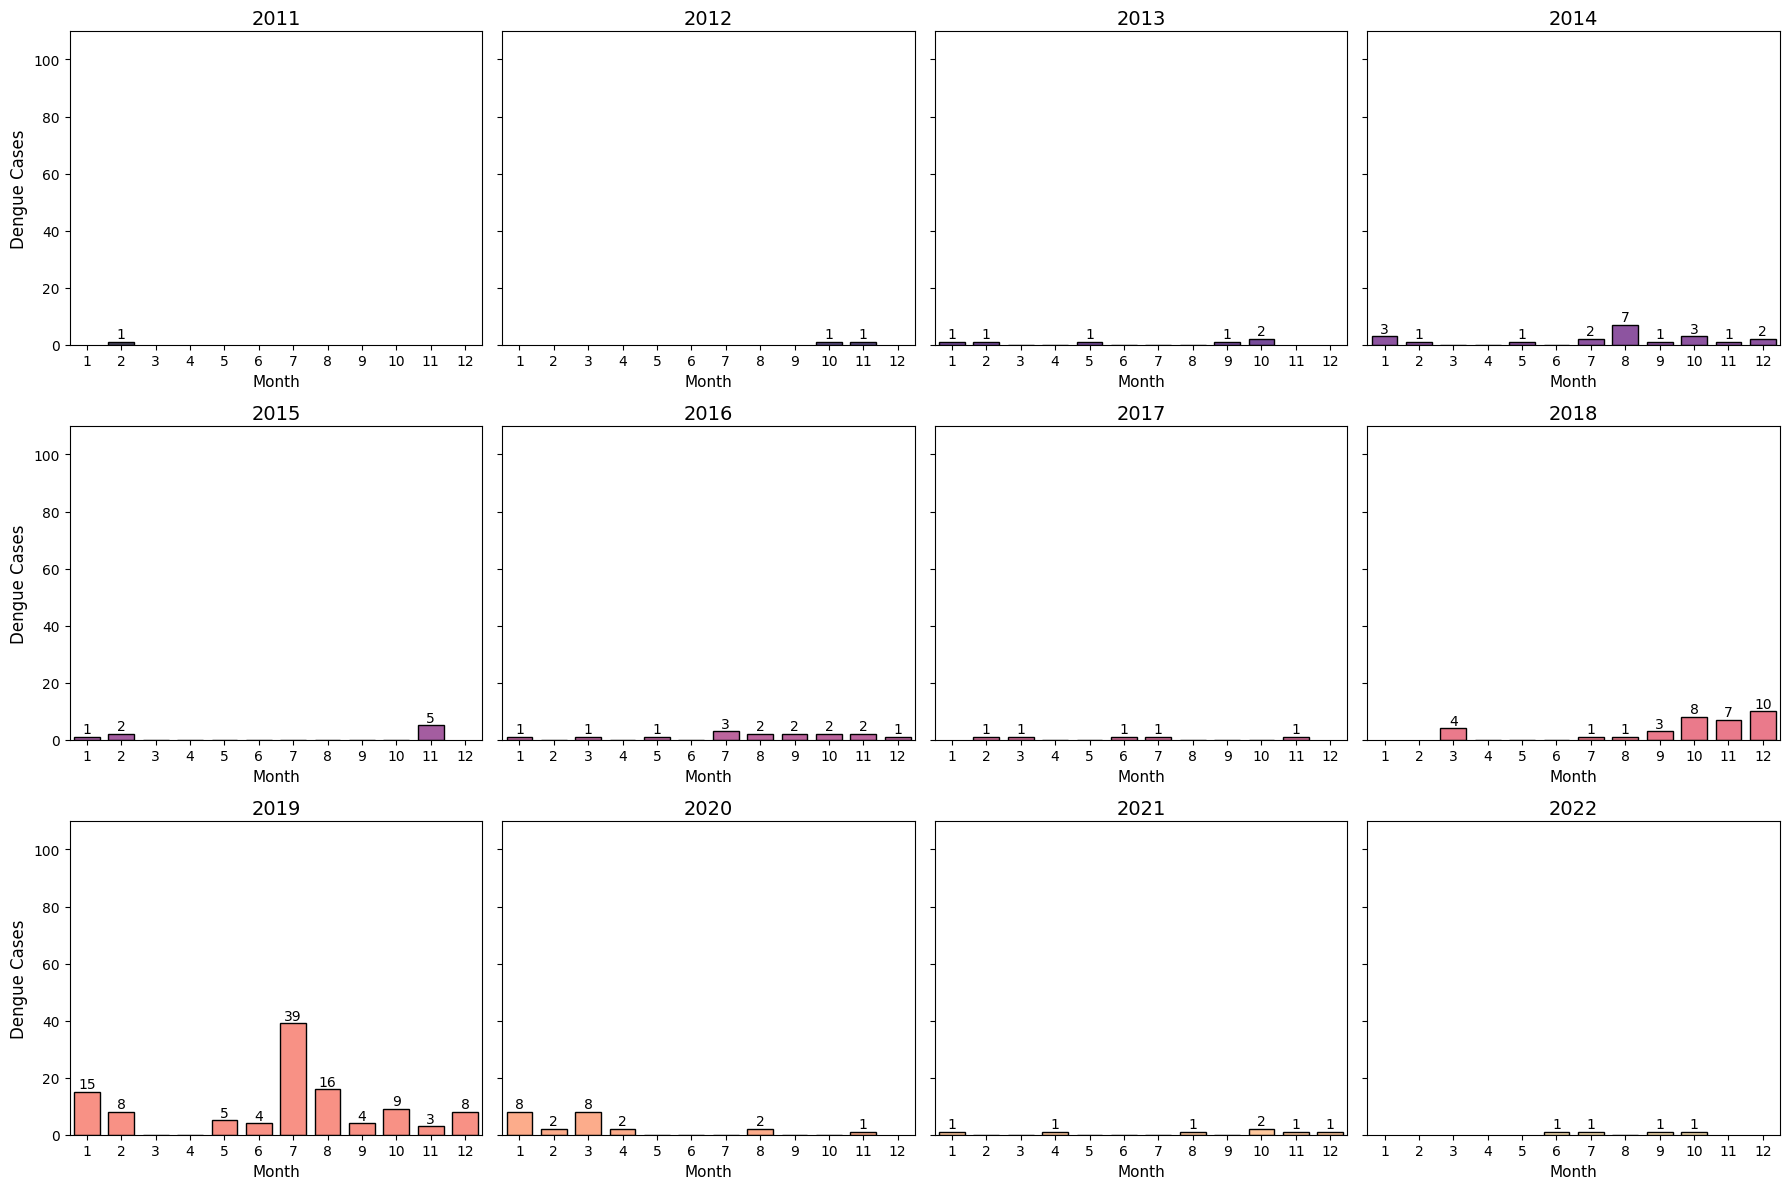

In [10]:
#HISTOGRAM FOR MONTHLY CASES EVERY YEAR
plot_dengue_cases(df, "ACMAC")

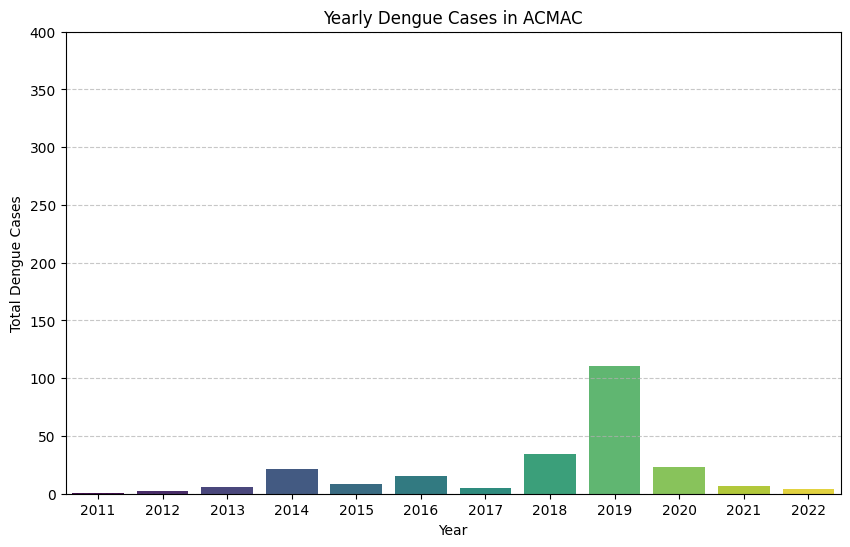

In [11]:
plot_total_dengue_cases_yearly(df, "ACMAC")

<div style="
    background-color: black; 
    color: white; 
    padding: 10px; 
    border-radius: 10px; 
    text-align: center;
    max-width: 100vw; 
    width: 100%;
    box-sizing: border-box;">
    BAGONG SILANG MONTHLY CASES
</div>


In [12]:
# Example usage:
selected_barangay = "BAGONG SILANG"  # Change this to any barangay you want
barangay_data = get_selected_barangay(df, selected_barangay)

# Display the data for each year
for year, data in barangay_data.items():
    display(data)

Barangay_No       Barangay       x        y  Year  Month  Dengue Cases  \
2              2  BAGONG SILANG  8.2418  124.252  2011      1             0   
46             2  BAGONG SILANG  8.2418  124.252  2011      2             1   
90             2  BAGONG SILANG  8.2418  124.252  2011      3             0   
134            2  BAGONG SILANG  8.2418  124.252  2011      4             0   
178            2  BAGONG SILANG  8.2418  124.252  2011      5             0   
222            2  BAGONG SILANG  8.2418  124.252  2011      6             0   
266            2  BAGONG SILANG  8.2418  124.252  2011      7             0   
310            2  BAGONG SILANG  8.2418  124.252  2011      8             0   
354            2  BAGONG SILANG  8.2418  124.252  2011      9             0   
398            2  BAGONG SILANG  8.2418  124.252  2011     10             0   
442            2  BAGONG SILANG  8.2418  124.252  2011     11             0   
486            2  BAGONG SILANG  8.2418  124.252  2011     12             0   

     Temperature  Humidity  Rainfall  
2           23.8      88.1       7.0  
46          24.1      87.2      12.0  
90          25.3      85.5      20.0  
134         26.0      83.1      35.0  
178         27.2      81.9      55.0  
222         26.4      83.5      90.0  
266         25.7      84.7     110.0  
310         25.1      85.3      95.0  
354         24.4      86.2      70.0  
398         24.0      87.0      50.0  
442         23.6      88.4      30.0  
486         23.2      89.1      15.0

Barangay_No       Barangay       x        y  Year  Month  Dengue Cases  \
530             2  BAGONG SILANG  8.2418  124.252  2012      1             0   
574             2  BAGONG SILANG  8.2418  124.252  2012      2             0   
618             2  BAGONG SILANG  8.2418  124.252  2012      3             5   
662             2  BAGONG SILANG  8.2418  124.252  2012      4             0   
706             2  BAGONG SILANG  8.2418  124.252  2012      5             0   
750             2  BAGONG SILANG  8.2418  124.252  2012      6             1   
794             2  BAGONG SILANG  8.2418  124.252  2012      7             0   
838             2  BAGONG SILANG  8.2418  124.252  2012      8             2   
882             2  BAGONG SILANG  8.2418  124.252  2012      9             0   
926             2  BAGONG SILANG  8.2418  124.252  2012     10             1   
970             2  BAGONG SILANG  8.2418  124.252  2012     11             1   
1014            2  BAGONG SILANG  8.2418  124.252  2012     12             0   

      Temperature  Humidity  Rainfall  
530          24.3      85.1       4.0  
574          24.3      85.7       7.1  
618          24.6      83.3       3.1  
662          25.4      82.3       6.9  
706          25.1      86.4       6.9  
750          24.7      85.3       7.9  
794          24.9      85.2       6.4  
838          24.9      85.2       6.4  
882          24.1      88.1      11.4  
926          24.6      86.5       8.4  
970          24.8      84.8       4.1  
1014         24.7      84.8       5.7

Barangay_No       Barangay       x        y  Year  Month  Dengue Cases  \
1058            2  BAGONG SILANG  8.2418  124.252  2013      1             2   
1102            2  BAGONG SILANG  8.2418  124.252  2013      2             1   
1146            2  BAGONG SILANG  8.2418  124.252  2013      3             0   
1190            2  BAGONG SILANG  8.2418  124.252  2013      4             0   
1234            2  BAGONG SILANG  8.2418  124.252  2013      5             0   
1278            2  BAGONG SILANG  8.2418  124.252  2013      6             0   
1322            2  BAGONG SILANG  8.2418  124.252  2013      7             1   
1366            2  BAGONG SILANG  8.2418  124.252  2013      8             2   
1410            2  BAGONG SILANG  8.2418  124.252  2013      9             0   
1454            2  BAGONG SILANG  8.2418  124.252  2013     10             1   
1498            2  BAGONG SILANG  8.2418  124.252  2013     11             0   
1542            2  BAGONG SILANG  8.2418  124.252  2013     12             1   

      Temperature  Humidity  Rainfall  
1058         24.2      88.2       8.1  
1102         24.4      84.7       6.0  
1146         25.5      81.1       2.7  
1190         26.0      81.0       4.9  
1234         26.0      82.8       5.2  
1278         24.9      86.9       9.2  
1322         24.5      87.7      11.0  
1366         24.3      87.2       6.9  
1410         24.6      86.5       4.9  
1454         24.0      88.0      10.4  
1498         24.2      85.9       7.8  
1542         24.4      84.0       3.5

Barangay_No       Barangay       x        y  Year  Month  Dengue Cases  \
1586            2  BAGONG SILANG  8.2418  124.252  2014      1             1   
1630            2  BAGONG SILANG  8.2418  124.252  2014      2             2   
1674            2  BAGONG SILANG  8.2418  124.252  2014      3             1   
1718            2  BAGONG SILANG  8.2418  124.252  2014      4             0   
1762            2  BAGONG SILANG  8.2418  124.252  2014      5             0   
1806            2  BAGONG SILANG  8.2418  124.252  2014      6             2   
1850            2  BAGONG SILANG  8.2418  124.252  2014      7             0   
1894            2  BAGONG SILANG  8.2418  124.252  2014      8             2   
1938            2  BAGONG SILANG  8.2418  124.252  2014      9             1   
1982            2  BAGONG SILANG  8.2418  124.252  2014     10             0   
2026            2  BAGONG SILANG  8.2418  124.252  2014     11             0   
2070            2  BAGONG SILANG  8.2418  124.252  2014     12             0   

      Temperature  Humidity  Rainfall  
1586         23.2      86.4       6.8  
1630         23.7      82.4       2.3  
1674         24.3      82.5       3.8  
1718         25.1      81.4       2.0  
1762         25.3      84.0       4.9  
1806         24.5      87.1       6.6  
1850         23.4      89.1       8.5  
1894         23.9      87.7       8.0  
1938         23.4      88.5       7.1  
1982         23.9      88.4       8.5  
2026         24.7      85.2       6.1  
2070         24.0      85.3       4.9

Barangay_No       Barangay       x        y  Year  Month  Dengue Cases  \
2114            2  BAGONG SILANG  8.2418  124.252  2015      1             1   
2158            2  BAGONG SILANG  8.2418  124.252  2015      2             0   
2202            2  BAGONG SILANG  8.2418  124.252  2015      3             3   
2246            2  BAGONG SILANG  8.2418  124.252  2015      4             1   
2290            2  BAGONG SILANG  8.2418  124.252  2015      5             4   
2334            2  BAGONG SILANG  8.2418  124.252  2015      6             0   
2378            2  BAGONG SILANG  8.2418  124.252  2015      7             2   
2422            2  BAGONG SILANG  8.2418  124.252  2015      8             8   
2466            2  BAGONG SILANG  8.2418  124.252  2015      9             1   
2510            2  BAGONG SILANG  8.2418  124.252  2015     10             0   
2554            2  BAGONG SILANG  8.2418  124.252  2015     11             2   
2598            2  BAGONG SILANG  8.2418  124.252  2015     12             1   

      Temperature  Humidity  Rainfall  
2114         25.6      89.0       5.9  
2158         25.6      87.0       3.0  
2202         26.1      83.2       1.1  
2246         27.3      82.8       2.1  
2290         28.4      78.1       2.7  
2334         27.4      81.9       8.7  
2378         27.6      80.4       4.2  
2422         27.5      80.9       5.5  
2466         27.2      82.4       8.2  
2510         27.2      83.4       4.9  
2554         26.8      87.3       6.5  
2598         26.5      87.1       4.8

Barangay_No       Barangay       x        y  Year  Month  Dengue Cases  \
2642            2  BAGONG SILANG  8.2418  124.252  2016      1             1   
2686            2  BAGONG SILANG  8.2418  124.252  2016      2             3   
2730            2  BAGONG SILANG  8.2418  124.252  2016      3             1   
2774            2  BAGONG SILANG  8.2418  124.252  2016      4             4   
2818            2  BAGONG SILANG  8.2418  124.252  2016      5             0   
2862            2  BAGONG SILANG  8.2418  124.252  2016      6             1   
2906            2  BAGONG SILANG  8.2418  124.252  2016      7             3   
2950            2  BAGONG SILANG  8.2418  124.252  2016      8             4   
2994            2  BAGONG SILANG  8.2418  124.252  2016      9             4   
3038            2  BAGONG SILANG  8.2418  124.252  2016     10             1   
3082            2  BAGONG SILANG  8.2418  124.252  2016     11             1   
3126            2  BAGONG SILANG  8.2418  124.252  2016     12             0   

      Temperature  Humidity  Rainfall  
2642         26.2      86.9       1.6  
2686         26.1      88.2       2.6  
2730         26.8      84.4       0.4  
2774         28.1      80.1       1.5  
2818         28.3      81.9       8.3  
2862         27.5      83.9      12.5  
2906         27.6      82.0       5.2  
2950         27.8      80.3       2.7  
2994         27.2      82.4       6.2  
3038         27.1      84.6       8.9  
3082         26.5      86.6       7.6  
3126         26.7      86.9       8.2

Barangay_No       Barangay       x        y  Year  Month  Dengue Cases  \
3170            2  BAGONG SILANG  8.2418  124.252  2017      1             5   
3214            2  BAGONG SILANG  8.2418  124.252  2017      2             3   
3258            2  BAGONG SILANG  8.2418  124.252  2017      3             2   
3302            2  BAGONG SILANG  8.2418  124.252  2017      4             1   
3346            2  BAGONG SILANG  8.2418  124.252  2017      5             2   
3390            2  BAGONG SILANG  8.2418  124.252  2017      6             1   
3434            2  BAGONG SILANG  8.2418  124.252  2017      7             1   
3478            2  BAGONG SILANG  8.2418  124.252  2017      8             0   
3522            2  BAGONG SILANG  8.2418  124.252  2017      9             0   
3566            2  BAGONG SILANG  8.2418  124.252  2017     10             0   
3610            2  BAGONG SILANG  8.2418  124.252  2017     11             1   
3654            2  BAGONG SILANG  8.2418  124.252  2017     12             2   

      Temperature  Humidity  Rainfall  
3170         25.9      88.9      12.5  
3214         25.6      87.8       5.9  
3258         26.1      87.4       8.0  
3302         27.2      85.0       5.1  
3346         27.8      84.4      10.4  
3390         27.4      83.8       7.8  
3434         27.2      82.6       9.1  
3478         27.9      83.4       9.6  
3522         27.3      83.3      11.4  
3566         27.0      84.0       8.3  
3610         27.0      86.6       7.3  
3654         26.7      85.9       9.6

Barangay_No       Barangay       x        y  Year  Month  Dengue Cases  \
3698            2  BAGONG SILANG  8.2418  124.252  2018      1             2   
3742            2  BAGONG SILANG  8.2418  124.252  2018      2             0   
3786            2  BAGONG SILANG  8.2418  124.252  2018      3             0   
3830            2  BAGONG SILANG  8.2418  124.252  2018      4             0   
3874            2  BAGONG SILANG  8.2418  124.252  2018      5             0   
3918            2  BAGONG SILANG  8.2418  124.252  2018      6             1   
3962            2  BAGONG SILANG  8.2418  124.252  2018      7             3   
4006            2  BAGONG SILANG  8.2418  124.252  2018      8             0   
4050            2  BAGONG SILANG  8.2418  124.252  2018      9             3   
4094            2  BAGONG SILANG  8.2418  124.252  2018     10             5   
4138            2  BAGONG SILANG  8.2418  124.252  2018     11             3   
4182            2  BAGONG SILANG  8.2418  124.252  2018     12             9   

      Temperature  Humidity  Rainfall  
3698         26.2      87.5       7.3  
3742         26.4      86.0       9.7  
3786         26.5      84.6       3.7  
3830         27.4      82.5       2.6  
3874         27.9      82.0       6.9  
3918         27.7      80.7       5.2  
3962         27.3      81.6       4.7  
4006         27.4      79.8       2.1  
4050         26.9      82.2       5.4  
4094         27.2      82.7       4.2  
4138         26.5      86.6       6.1  
4182         26.3      88.1       5.8

Barangay_No       Barangay       x        y  Year  Month  Dengue Cases  \
4226            2  BAGONG SILANG  8.2418  124.252  2019      1            17   
4270            2  BAGONG SILANG  8.2418  124.252  2019      2            11   
4314            2  BAGONG SILANG  8.2418  124.252  2019      3            12   
4358            2  BAGONG SILANG  8.2418  124.252  2019      4             0   
4402            2  BAGONG SILANG  8.2418  124.252  2019      5             0   
4446            2  BAGONG SILANG  8.2418  124.252  2019      6             0   
4490            2  BAGONG SILANG  8.2418  124.252  2019      7            17   
4534            2  BAGONG SILANG  8.2418  124.252  2019      8            24   
4578            2  BAGONG SILANG  8.2418  124.252  2019      9            18   
4622            2  BAGONG SILANG  8.2418  124.252  2019     10            11   
4666            2  BAGONG SILANG  8.2418  124.252  2019     11             6   
4710            2  BAGONG SILANG  8.2418  124.252  2019     12             1   

      Temperature  Humidity  Rainfall  
4226         25.5      88.2       5.7  
4270         25.3      84.3       1.1  
4314         26.1      83.2       1.9  
4358         27.5      80.3       1.8  
4402         28.4      78.6       4.4  
4446         27.8      82.7       9.1  
4490         27.2      82.1       6.2  
4534         27.7      77.1       1.4  
4578         27.8      78.2       3.3  
4622         27.0      83.8       7.7  
4666         27.1      82.9       4.3  
4710         26.4      86.4       4.2

Barangay_No       Barangay       x        y  Year  Month  Dengue Cases  \
4754            2  BAGONG SILANG  8.2418  124.252  2020      1             4   
4798            2  BAGONG SILANG  8.2418  124.252  2020      2             0   
4842            2  BAGONG SILANG  8.2418  124.252  2020      3             2   
4886            2  BAGONG SILANG  8.2418  124.252  2020      4             0   
4930            2  BAGONG SILANG  8.2418  124.252  2020      5             0   
4974            2  BAGONG SILANG  8.2418  124.252  2020      6             0   
5018            2  BAGONG SILANG  8.2418  124.252  2020      7             0   
5062            2  BAGONG SILANG  8.2418  124.252  2020      8             0   
5106            2  BAGONG SILANG  8.2418  124.252  2020      9             0   
5150            2  BAGONG SILANG  8.2418  124.252  2020     10             0   
5194            2  BAGONG SILANG  8.2418  124.252  2020     11             2   
5238            2  BAGONG SILANG  8.2418  124.252  2020     12             0   

      Temperature  Humidity  Rainfall  
4754         26.3      86.8       2.1  
4798         25.7      87.2       3.5  
4842         26.4      85.2       2.0  
4886         27.2      81.6       1.0  
4930         28.0      83.2       9.8  
4974         27.3      84.1      14.1  
5018         27.0      83.9      15.7  
5062         27.2      82.9      11.7  
5106         27.2      83.7       9.2  
5150         26.9      84.2      13.2  
5194         26.8      86.2       5.5  
5238         26.7      86.6       8.2

Barangay_No       Barangay       x        y  Year  Month  Dengue Cases  \
5282            2  BAGONG SILANG  8.2418  124.252  2021      1             0   
5326            2  BAGONG SILANG  8.2418  124.252  2021      2             1   
5370            2  BAGONG SILANG  8.2418  124.252  2021      3             1   
5414            2  BAGONG SILANG  8.2418  124.252  2021      4             0   
5458            2  BAGONG SILANG  8.2418  124.252  2021      5             0   
5502            2  BAGONG SILANG  8.2418  124.252  2021      6             1   
5546            2  BAGONG SILANG  8.2418  124.252  2021      7             1   
5590            2  BAGONG SILANG  8.2418  124.252  2021      8             3   
5634            2  BAGONG SILANG  8.2418  124.252  2021      9             0   
5678            2  BAGONG SILANG  8.2418  124.252  2021     10             1   
5722            2  BAGONG SILANG  8.2418  124.252  2021     11             2   
5766            2  BAGONG SILANG  8.2418  124.252  2021     12             4   

      Temperature  Humidity  Rainfall  
5282         25.9      88.5      11.9  
5326         26.0      87.1      12.6  
5370         26.8      84.7       5.5  
5414         27.1      82.5       4.5  
5458         27.5      84.0      10.7  
5502         27.6      81.3       8.2  
5546         27.7      80.0       4.4  
5590         27.5      80.0       6.5  
5634         27.2      82.7       9.5  
5678         27.3      83.6       8.7  
5722         27.0      86.4       9.4  
5766         26.2      86.9       9.8

Barangay_No       Barangay       x        y  Year  Month  Dengue Cases  \
5810            2  BAGONG SILANG  8.2418  124.252  2022      1             2   
5854            2  BAGONG SILANG  8.2418  124.252  2022      2             0   
5898            2  BAGONG SILANG  8.2418  124.252  2022      3             1   
5942            2  BAGONG SILANG  8.2418  124.252  2022      4             1   
5986            2  BAGONG SILANG  8.2418  124.252  2022      5             0   
6030            2  BAGONG SILANG  8.2418  124.252  2022      6             5   
6074            2  BAGONG SILANG  8.2418  124.252  2022      7             5   
6118            2  BAGONG SILANG  8.2418  124.252  2022      8             3   
6162            2  BAGONG SILANG  8.2418  124.252  2022      9             5   
6206            2  BAGONG SILANG  8.2418  124.252  2022     10             1   
6250            2  BAGONG SILANG  8.2418  124.252  2022     11             3   
6294            2  BAGONG SILANG  8.2418  124.252  2022     12             1   

      Temperature  Humidity  Rainfall  
5810         26.0      86.9       8.3  
5854         26.0      87.2       3.9  
5898         26.8      86.5      11.0  
5942         26.8      86.5      12.2  
5986         27.4      83.9      11.5  
6030         27.6      81.9       7.1  
6074         27.4      83.2      11.6  
6118         27.3      82.0       7.9  
6162         27.5      81.1       6.1  
6206         27.1      84.2       9.0  
6250         27.0      85.8       6.6  
6294         26.4      87.1      14.5

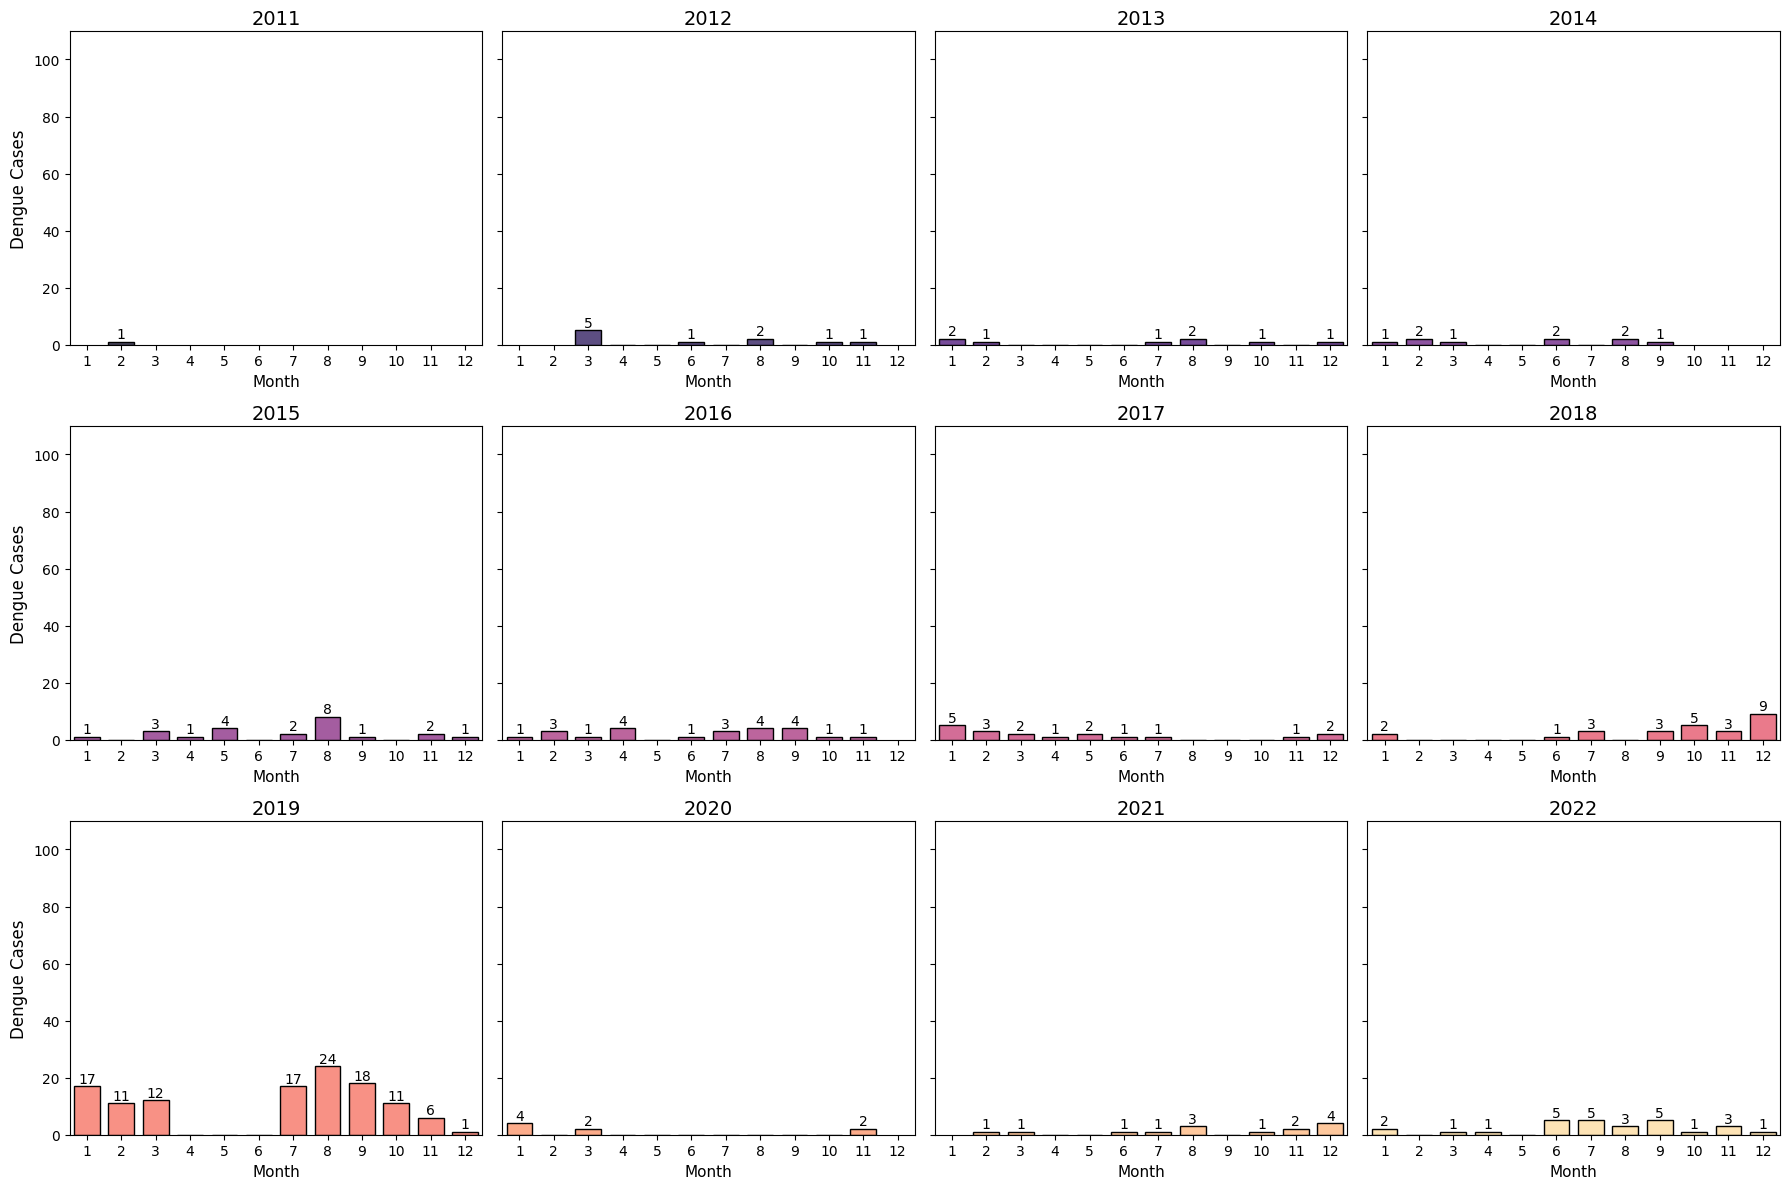

In [13]:
#HISTOGRAM FOR MONTHLY CASES EVERY YEAR
plot_dengue_cases(df, "BAGONG SILANG")

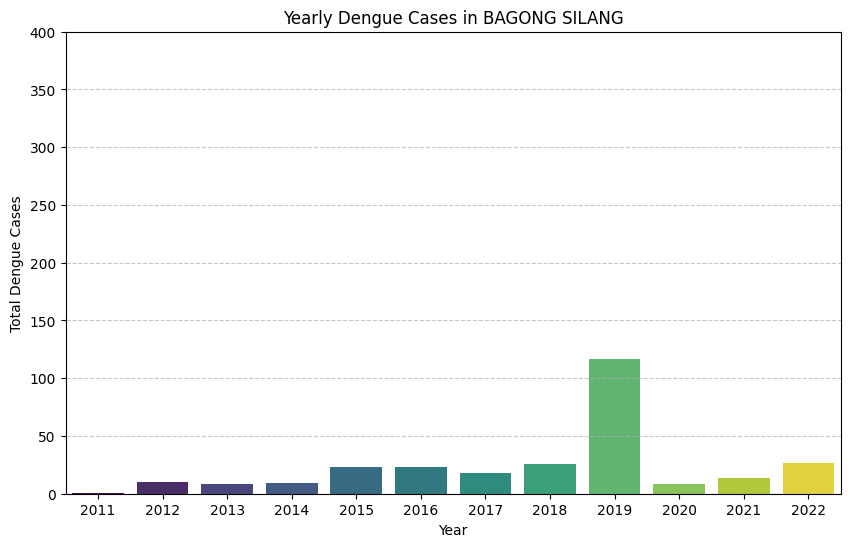

In [14]:
plot_total_dengue_cases_yearly(df, "BAGONG SILANG")

<div style="
    background-color: black; 
    color: white; 
    padding: 10px; 
    border-radius: 10px; 
    text-align: center;
    max-width: 100vw; 
    width: 100%;
    box-sizing: border-box;">
    BONBONON MONTHLY CASES
</div>


In [15]:
# Example usage:
selected_barangay = "BONBONON"  # Change this to any barangay you want
barangay_data = get_selected_barangay(df, selected_barangay)

# Display the data for each year
for year, data in barangay_data.items():
    display(data)

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
3              3  BONBONON  8.2667  124.2902  2011      1             0   
47             3  BONBONON  8.2667  124.2902  2011      2             0   
91             3  BONBONON  8.2667  124.2902  2011      3             0   
135            3  BONBONON  8.2667  124.2902  2011      4             0   
179            3  BONBONON  8.2667  124.2902  2011      5             0   
223            3  BONBONON  8.2667  124.2902  2011      6             0   
267            3  BONBONON  8.2667  124.2902  2011      7             0   
311            3  BONBONON  8.2667  124.2902  2011      8             0   
355            3  BONBONON  8.2667  124.2902  2011      9             1   
399            3  BONBONON  8.2667  124.2902  2011     10             0   
443            3  BONBONON  8.2667  124.2902  2011     11             0   
487            3  BONBONON  8.2667  124.2902  2011     12             0   

     Temperature  Humidity  Rainfall  
3           23.8      88.1       7.0  
47          24.1      87.2      12.0  
91          25.3      85.5      20.0  
135         26.0      83.1      35.0  
179         27.2      81.9      55.0  
223         26.4      83.5      90.0  
267         25.7      84.7     110.0  
311         25.1      85.3      95.0  
355         24.4      86.2      70.0  
399         24.0      87.0      50.0  
443         23.6      88.4      30.0  
487         23.2      89.1      15.0

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
531             3  BONBONON  8.2667  124.2902  2012      1             0   
575             3  BONBONON  8.2667  124.2902  2012      2             0   
619             3  BONBONON  8.2667  124.2902  2012      3             0   
663             3  BONBONON  8.2667  124.2902  2012      4             0   
707             3  BONBONON  8.2667  124.2902  2012      5             0   
751             3  BONBONON  8.2667  124.2902  2012      6             0   
795             3  BONBONON  8.2667  124.2902  2012      7             0   
839             3  BONBONON  8.2667  124.2902  2012      8             0   
883             3  BONBONON  8.2667  124.2902  2012      9             0   
927             3  BONBONON  8.2667  124.2902  2012     10             0   
971             3  BONBONON  8.2667  124.2902  2012     11             0   
1015            3  BONBONON  8.2667  124.2902  2012     12             0   

      Temperature  Humidity  Rainfall  
531          24.3      85.1       4.0  
575          24.3      85.7       7.1  
619          24.6      83.3       3.1  
663          25.4      82.3       6.9  
707          25.1      86.4       6.9  
751          24.7      85.3       7.9  
795          24.9      85.2       6.4  
839          24.9      85.2       6.4  
883          24.1      88.1      11.4  
927          24.6      86.5       8.4  
971          24.8      84.8       4.1  
1015         24.7      84.8       5.7

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
1059            3  BONBONON  8.2667  124.2902  2013      1             0   
1103            3  BONBONON  8.2667  124.2902  2013      2             0   
1147            3  BONBONON  8.2667  124.2902  2013      3             0   
1191            3  BONBONON  8.2667  124.2902  2013      4             0   
1235            3  BONBONON  8.2667  124.2902  2013      5             0   
1279            3  BONBONON  8.2667  124.2902  2013      6             0   
1323            3  BONBONON  8.2667  124.2902  2013      7             0   
1367            3  BONBONON  8.2667  124.2902  2013      8             1   
1411            3  BONBONON  8.2667  124.2902  2013      9             0   
1455            3  BONBONON  8.2667  124.2902  2013     10             0   
1499            3  BONBONON  8.2667  124.2902  2013     11             0   
1543            3  BONBONON  8.2667  124.2902  2013     12             0   

      Temperature  Humidity  Rainfall  
1059         24.2      88.2       8.1  
1103         24.4      84.7       6.0  
1147         25.5      81.1       2.7  
1191         26.0      81.0       4.9  
1235         26.0      82.8       5.2  
1279         24.9      86.9       9.2  
1323         24.5      87.7      11.0  
1367         24.3      87.2       6.9  
1411         24.6      86.5       4.9  
1455         24.0      88.0      10.4  
1499         24.2      85.9       7.8  
1543         24.4      84.0       3.5

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
1587            3  BONBONON  8.2667  124.2902  2014      1             0   
1631            3  BONBONON  8.2667  124.2902  2014      2             0   
1675            3  BONBONON  8.2667  124.2902  2014      3             0   
1719            3  BONBONON  8.2667  124.2902  2014      4             0   
1763            3  BONBONON  8.2667  124.2902  2014      5             0   
1807            3  BONBONON  8.2667  124.2902  2014      6             0   
1851            3  BONBONON  8.2667  124.2902  2014      7             0   
1895            3  BONBONON  8.2667  124.2902  2014      8             0   
1939            3  BONBONON  8.2667  124.2902  2014      9             0   
1983            3  BONBONON  8.2667  124.2902  2014     10             0   
2027            3  BONBONON  8.2667  124.2902  2014     11             1   
2071            3  BONBONON  8.2667  124.2902  2014     12             0   

      Temperature  Humidity  Rainfall  
1587         23.2      86.4       6.8  
1631         23.7      82.4       2.3  
1675         24.3      82.5       3.8  
1719         25.1      81.4       2.0  
1763         25.3      84.0       4.9  
1807         24.5      87.1       6.6  
1851         23.4      89.1       8.5  
1895         23.9      87.7       8.0  
1939         23.4      88.5       7.1  
1983         23.9      88.4       8.5  
2027         24.7      85.2       6.1  
2071         24.0      85.3       4.9

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
2115            3  BONBONON  8.2667  124.2902  2015      1             0   
2159            3  BONBONON  8.2667  124.2902  2015      2             0   
2203            3  BONBONON  8.2667  124.2902  2015      3             0   
2247            3  BONBONON  8.2667  124.2902  2015      4             0   
2291            3  BONBONON  8.2667  124.2902  2015      5             0   
2335            3  BONBONON  8.2667  124.2902  2015      6             0   
2379            3  BONBONON  8.2667  124.2902  2015      7             0   
2423            3  BONBONON  8.2667  124.2902  2015      8             0   
2467            3  BONBONON  8.2667  124.2902  2015      9             0   
2511            3  BONBONON  8.2667  124.2902  2015     10             0   
2555            3  BONBONON  8.2667  124.2902  2015     11             0   
2599            3  BONBONON  8.2667  124.2902  2015     12             0   

      Temperature  Humidity  Rainfall  
2115         25.6      89.0       5.9  
2159         25.6      87.0       3.0  
2203         26.1      83.2       1.1  
2247         27.3      82.8       2.1  
2291         28.4      78.1       2.7  
2335         27.4      81.9       8.7  
2379         27.6      80.4       4.2  
2423         27.5      80.9       5.5  
2467         27.2      82.4       8.2  
2511         27.2      83.4       4.9  
2555         26.8      87.3       6.5  
2599         26.5      87.1       4.8

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
2643            3  BONBONON  8.2667  124.2902  2016      1             0   
2687            3  BONBONON  8.2667  124.2902  2016      2             1   
2731            3  BONBONON  8.2667  124.2902  2016      3             0   
2775            3  BONBONON  8.2667  124.2902  2016      4             0   
2819            3  BONBONON  8.2667  124.2902  2016      5             0   
2863            3  BONBONON  8.2667  124.2902  2016      6             0   
2907            3  BONBONON  8.2667  124.2902  2016      7             1   
2951            3  BONBONON  8.2667  124.2902  2016      8             0   
2995            3  BONBONON  8.2667  124.2902  2016      9             0   
3039            3  BONBONON  8.2667  124.2902  2016     10             0   
3083            3  BONBONON  8.2667  124.2902  2016     11             0   
3127            3  BONBONON  8.2667  124.2902  2016     12             1   

      Temperature  Humidity  Rainfall  
2643         26.2      86.9       1.6  
2687         26.1      88.2       2.6  
2731         26.8      84.4       0.4  
2775         28.1      80.1       1.5  
2819         28.3      81.9       8.3  
2863         27.5      83.9      12.5  
2907         27.6      82.0       5.2  
2951         27.8      80.3       2.7  
2995         27.2      82.4       6.2  
3039         27.1      84.6       8.9  
3083         26.5      86.6       7.6  
3127         26.7      86.9       8.2

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
3171            3  BONBONON  8.2667  124.2902  2017      1             0   
3215            3  BONBONON  8.2667  124.2902  2017      2             0   
3259            3  BONBONON  8.2667  124.2902  2017      3             2   
3303            3  BONBONON  8.2667  124.2902  2017      4             0   
3347            3  BONBONON  8.2667  124.2902  2017      5             0   
3391            3  BONBONON  8.2667  124.2902  2017      6             0   
3435            3  BONBONON  8.2667  124.2902  2017      7             0   
3479            3  BONBONON  8.2667  124.2902  2017      8             0   
3523            3  BONBONON  8.2667  124.2902  2017      9             0   
3567            3  BONBONON  8.2667  124.2902  2017     10             0   
3611            3  BONBONON  8.2667  124.2902  2017     11             0   
3655            3  BONBONON  8.2667  124.2902  2017     12             0   

      Temperature  Humidity  Rainfall  
3171         25.9      88.9      12.5  
3215         25.6      87.8       5.9  
3259         26.1      87.4       8.0  
3303         27.2      85.0       5.1  
3347         27.8      84.4      10.4  
3391         27.4      83.8       7.8  
3435         27.2      82.6       9.1  
3479         27.9      83.4       9.6  
3523         27.3      83.3      11.4  
3567         27.0      84.0       8.3  
3611         27.0      86.6       7.3  
3655         26.7      85.9       9.6

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
3699            3  BONBONON  8.2667  124.2902  2018      1             0   
3743            3  BONBONON  8.2667  124.2902  2018      2             0   
3787            3  BONBONON  8.2667  124.2902  2018      3             1   
3831            3  BONBONON  8.2667  124.2902  2018      4             0   
3875            3  BONBONON  8.2667  124.2902  2018      5             0   
3919            3  BONBONON  8.2667  124.2902  2018      6             0   
3963            3  BONBONON  8.2667  124.2902  2018      7             1   
4007            3  BONBONON  8.2667  124.2902  2018      8             0   
4051            3  BONBONON  8.2667  124.2902  2018      9             2   
4095            3  BONBONON  8.2667  124.2902  2018     10             1   
4139            3  BONBONON  8.2667  124.2902  2018     11             2   
4183            3  BONBONON  8.2667  124.2902  2018     12             0   

      Temperature  Humidity  Rainfall  
3699         26.2      87.5       7.3  
3743         26.4      86.0       9.7  
3787         26.5      84.6       3.7  
3831         27.4      82.5       2.6  
3875         27.9      82.0       6.9  
3919         27.7      80.7       5.2  
3963         27.3      81.6       4.7  
4007         27.4      79.8       2.1  
4051         26.9      82.2       5.4  
4095         27.2      82.7       4.2  
4139         26.5      86.6       6.1  
4183         26.3      88.1       5.8

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
4227            3  BONBONON  8.2667  124.2902  2019      1             9   
4271            3  BONBONON  8.2667  124.2902  2019      2             0   
4315            3  BONBONON  8.2667  124.2902  2019      3             0   
4359            3  BONBONON  8.2667  124.2902  2019      4             0   
4403            3  BONBONON  8.2667  124.2902  2019      5             0   
4447            3  BONBONON  8.2667  124.2902  2019      6             2   
4491            3  BONBONON  8.2667  124.2902  2019      7             3   
4535            3  BONBONON  8.2667  124.2902  2019      8             0   
4579            3  BONBONON  8.2667  124.2902  2019      9             0   
4623            3  BONBONON  8.2667  124.2902  2019     10             3   
4667            3  BONBONON  8.2667  124.2902  2019     11             0   
4711            3  BONBONON  8.2667  124.2902  2019     12             0   

      Temperature  Humidity  Rainfall  
4227         25.5      88.2       5.7  
4271         25.3      84.3       1.1  
4315         26.1      83.2       1.9  
4359         27.5      80.3       1.8  
4403         28.4      78.6       4.4  
4447         27.8      82.7       9.1  
4491         27.2      82.1       6.2  
4535         27.7      77.1       1.4  
4579         27.8      78.2       3.3  
4623         27.0      83.8       7.7  
4667         27.1      82.9       4.3  
4711         26.4      86.4       4.2

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
4755            3  BONBONON  8.2667  124.2902  2020      1             2   
4799            3  BONBONON  8.2667  124.2902  2020      2             0   
4843            3  BONBONON  8.2667  124.2902  2020      3             0   
4887            3  BONBONON  8.2667  124.2902  2020      4             0   
4931            3  BONBONON  8.2667  124.2902  2020      5             0   
4975            3  BONBONON  8.2667  124.2902  2020      6             0   
5019            3  BONBONON  8.2667  124.2902  2020      7             0   
5063            3  BONBONON  8.2667  124.2902  2020      8             0   
5107            3  BONBONON  8.2667  124.2902  2020      9             0   
5151            3  BONBONON  8.2667  124.2902  2020     10             0   
5195            3  BONBONON  8.2667  124.2902  2020     11             0   
5239            3  BONBONON  8.2667  124.2902  2020     12             0   

      Temperature  Humidity  Rainfall  
4755         26.3      86.8       2.1  
4799         25.7      87.2       3.5  
4843         26.4      85.2       2.0  
4887         27.2      81.6       1.0  
4931         28.0      83.2       9.8  
4975         27.3      84.1      14.1  
5019         27.0      83.9      15.7  
5063         27.2      82.9      11.7  
5107         27.2      83.7       9.2  
5151         26.9      84.2      13.2  
5195         26.8      86.2       5.5  
5239         26.7      86.6       8.2

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
5283            3  BONBONON  8.2667  124.2902  2021      1             0   
5327            3  BONBONON  8.2667  124.2902  2021      2             0   
5371            3  BONBONON  8.2667  124.2902  2021      3             0   
5415            3  BONBONON  8.2667  124.2902  2021      4             2   
5459            3  BONBONON  8.2667  124.2902  2021      5             1   
5503            3  BONBONON  8.2667  124.2902  2021      6             0   
5547            3  BONBONON  8.2667  124.2902  2021      7             0   
5591            3  BONBONON  8.2667  124.2902  2021      8             0   
5635            3  BONBONON  8.2667  124.2902  2021      9             0   
5679            3  BONBONON  8.2667  124.2902  2021     10             0   
5723            3  BONBONON  8.2667  124.2902  2021     11             0   
5767            3  BONBONON  8.2667  124.2902  2021     12             0   

      Temperature  Humidity  Rainfall  
5283         25.9      88.5      11.9  
5327         26.0      87.1      12.6  
5371         26.8      84.7       5.5  
5415         27.1      82.5       4.5  
5459         27.5      84.0      10.7  
5503         27.6      81.3       8.2  
5547         27.7      80.0       4.4  
5591         27.5      80.0       6.5  
5635         27.2      82.7       9.5  
5679         27.3      83.6       8.7  
5723         27.0      86.4       9.4  
5767         26.2      86.9       9.8

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
5811            3  BONBONON  8.2667  124.2902  2022      1             0   
5855            3  BONBONON  8.2667  124.2902  2022      2             0   
5899            3  BONBONON  8.2667  124.2902  2022      3             0   
5943            3  BONBONON  8.2667  124.2902  2022      4             0   
5987            3  BONBONON  8.2667  124.2902  2022      5             0   
6031            3  BONBONON  8.2667  124.2902  2022      6             1   
6075            3  BONBONON  8.2667  124.2902  2022      7             1   
6119            3  BONBONON  8.2667  124.2902  2022      8             0   
6163            3  BONBONON  8.2667  124.2902  2022      9             0   
6207            3  BONBONON  8.2667  124.2902  2022     10             0   
6251            3  BONBONON  8.2667  124.2902  2022     11             0   
6295            3  BONBONON  8.2667  124.2902  2022     12             0   

      Temperature  Humidity  Rainfall  
5811         26.0      86.9       8.3  
5855         26.0      87.2       3.9  
5899         26.8      86.5      11.0  
5943         26.8      86.5      12.2  
5987         27.4      83.9      11.5  
6031         27.6      81.9       7.1  
6075         27.4      83.2      11.6  
6119         27.3      82.0       7.9  
6163         27.5      81.1       6.1  
6207         27.1      84.2       9.0  
6251         27.0      85.8       6.6  
6295         26.4      87.1      14.5

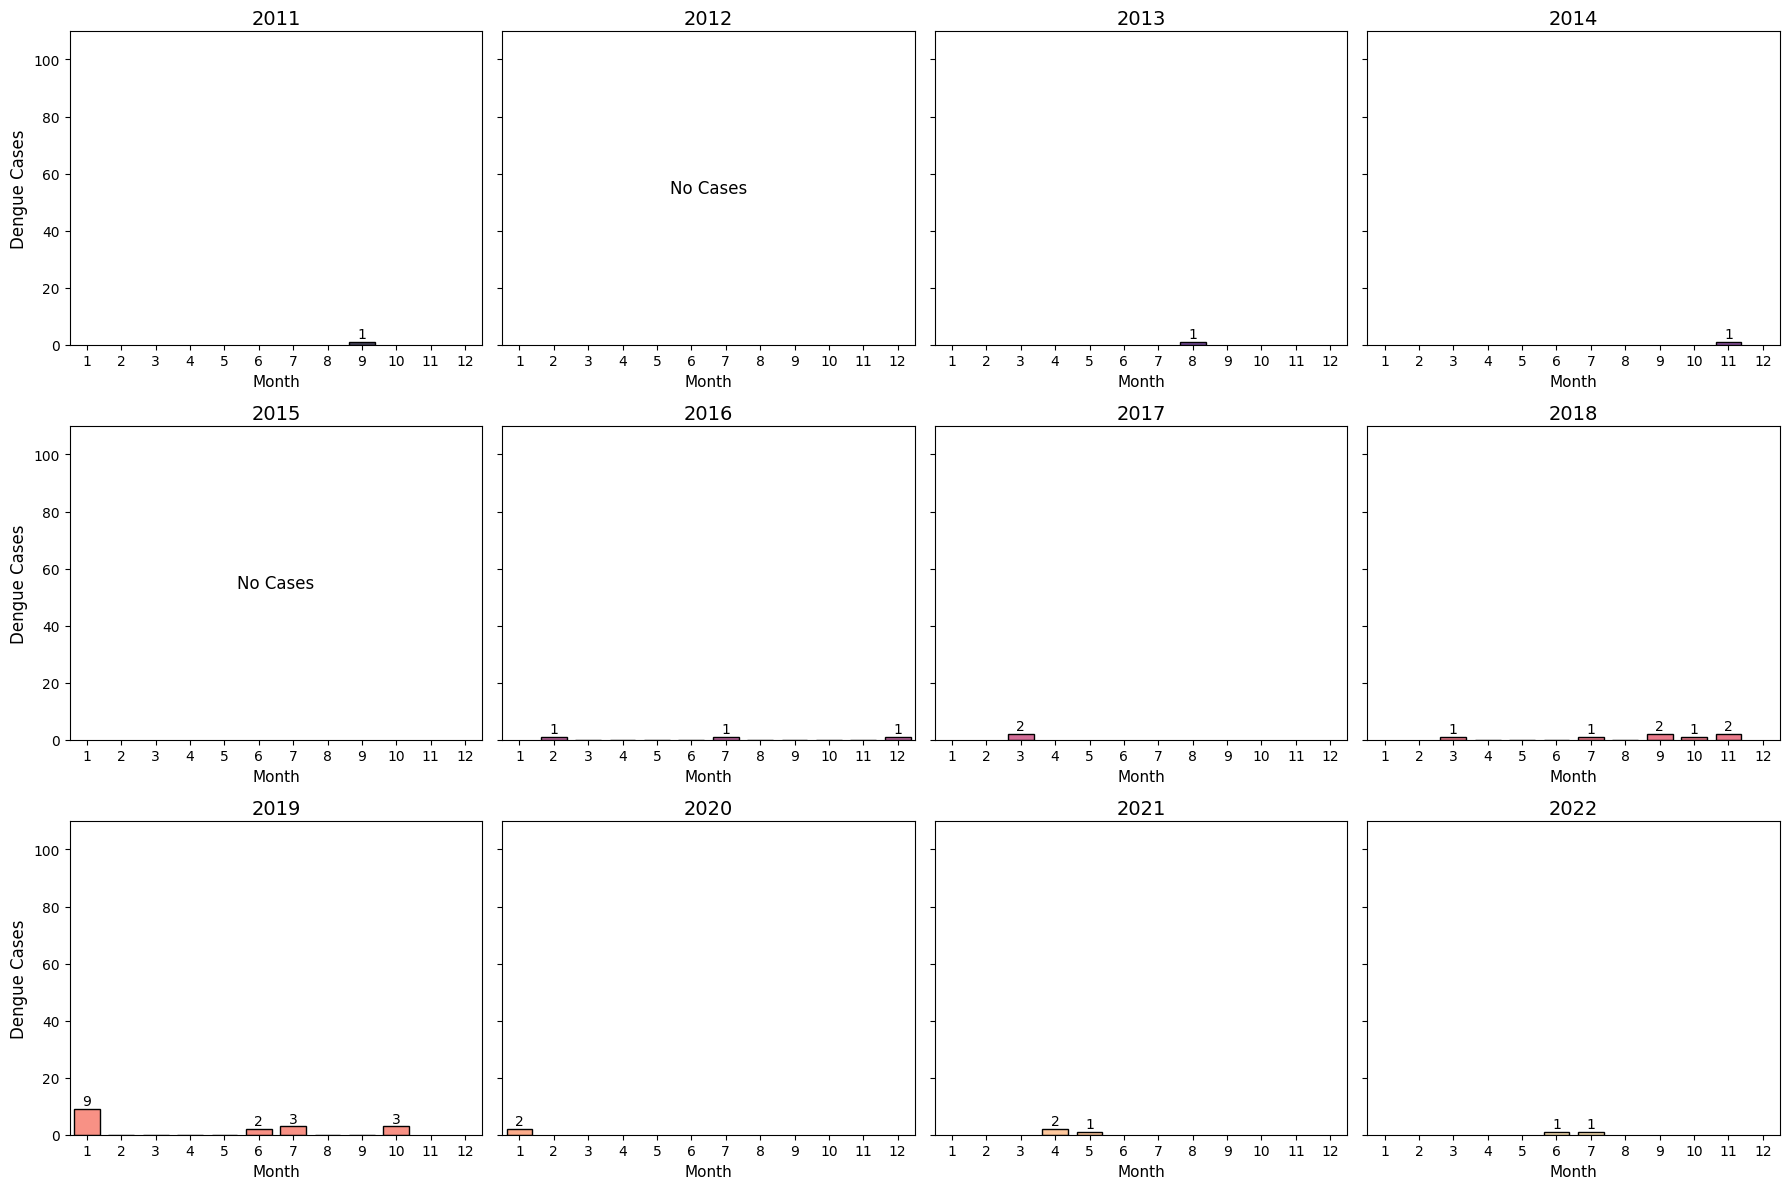

In [16]:
# HISTOGRAM FOR MONTHLY CASES EVERY YEAR
plot_dengue_cases(df, "BONBONON")


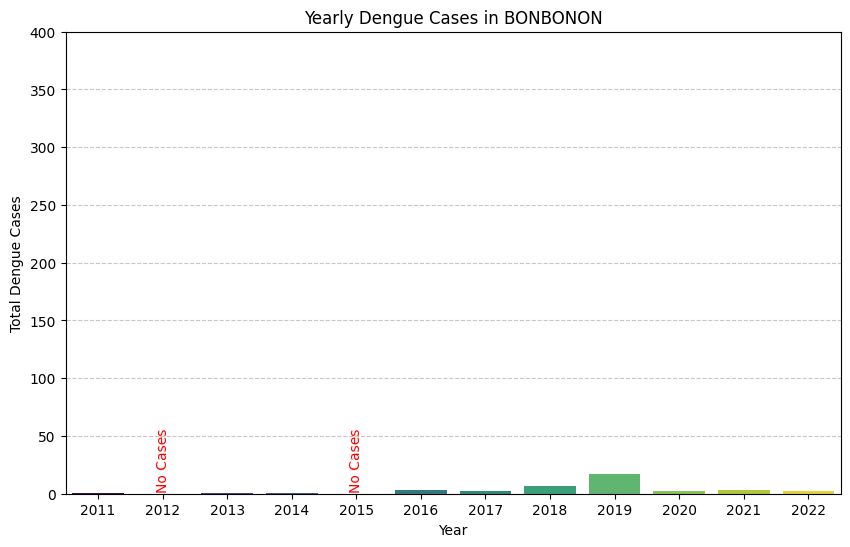

In [17]:
plot_total_dengue_cases_yearly(df, "BONBONON")

<div style="
    background-color: black; 
    color: white; 
    padding: 10px; 
    border-radius: 10px; 
    text-align: center;
    max-width: 100vw; 
    width: 100%;
    box-sizing: border-box;">
    BUNAWAN MONTHLY CASES
</div>


In [18]:
# Example usage:
selected_barangay = "BUNAWAN"  # Change this to any barangay you want
barangay_data = get_selected_barangay(df, selected_barangay)

# Display the data for each year
for year, data in barangay_data.items():
    display(data)

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
4              4  BUNAWAN  8.3023  124.3028  2011      1             0   
48             4  BUNAWAN  8.3023  124.3028  2011      2             0   
92             4  BUNAWAN  8.3023  124.3028  2011      3             0   
136            4  BUNAWAN  8.3023  124.3028  2011      4             0   
180            4  BUNAWAN  8.3023  124.3028  2011      5             0   
224            4  BUNAWAN  8.3023  124.3028  2011      6             0   
268            4  BUNAWAN  8.3023  124.3028  2011      7             0   
312            4  BUNAWAN  8.3023  124.3028  2011      8             0   
356            4  BUNAWAN  8.3023  124.3028  2011      9             0   
400            4  BUNAWAN  8.3023  124.3028  2011     10             0   
444            4  BUNAWAN  8.3023  124.3028  2011     11             0   
488            4  BUNAWAN  8.3023  124.3028  2011     12             0   

     Temperature  Humidity  Rainfall  
4           23.8      88.1       7.0  
48          24.1      87.2      12.0  
92          25.3      85.5      20.0  
136         26.0      83.1      35.0  
180         27.2      81.9      55.0  
224         26.4      83.5      90.0  
268         25.7      84.7     110.0  
312         25.1      85.3      95.0  
356         24.4      86.2      70.0  
400         24.0      87.0      50.0  
444         23.6      88.4      30.0  
488         23.2      89.1      15.0

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
532             4  BUNAWAN  8.3023  124.3028  2012      1             0   
576             4  BUNAWAN  8.3023  124.3028  2012      2             0   
620             4  BUNAWAN  8.3023  124.3028  2012      3             0   
664             4  BUNAWAN  8.3023  124.3028  2012      4             0   
708             4  BUNAWAN  8.3023  124.3028  2012      5             0   
752             4  BUNAWAN  8.3023  124.3028  2012      6             0   
796             4  BUNAWAN  8.3023  124.3028  2012      7             0   
840             4  BUNAWAN  8.3023  124.3028  2012      8             0   
884             4  BUNAWAN  8.3023  124.3028  2012      9             0   
928             4  BUNAWAN  8.3023  124.3028  2012     10             0   
972             4  BUNAWAN  8.3023  124.3028  2012     11             0   
1016            4  BUNAWAN  8.3023  124.3028  2012     12             0   

      Temperature  Humidity  Rainfall  
532          24.3      85.1       4.0  
576          24.3      85.7       7.1  
620          24.6      83.3       3.1  
664          25.4      82.3       6.9  
708          25.1      86.4       6.9  
752          24.7      85.3       7.9  
796          24.9      85.2       6.4  
840          24.9      85.2       6.4  
884          24.1      88.1      11.4  
928          24.6      86.5       8.4  
972          24.8      84.8       4.1  
1016         24.7      84.8       5.7

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
1060            4  BUNAWAN  8.3023  124.3028  2013      1             0   
1104            4  BUNAWAN  8.3023  124.3028  2013      2             0   
1148            4  BUNAWAN  8.3023  124.3028  2013      3             0   
1192            4  BUNAWAN  8.3023  124.3028  2013      4             0   
1236            4  BUNAWAN  8.3023  124.3028  2013      5             0   
1280            4  BUNAWAN  8.3023  124.3028  2013      6             0   
1324            4  BUNAWAN  8.3023  124.3028  2013      7             0   
1368            4  BUNAWAN  8.3023  124.3028  2013      8             0   
1412            4  BUNAWAN  8.3023  124.3028  2013      9             0   
1456            4  BUNAWAN  8.3023  124.3028  2013     10             0   
1500            4  BUNAWAN  8.3023  124.3028  2013     11             0   
1544            4  BUNAWAN  8.3023  124.3028  2013     12             1   

      Temperature  Humidity  Rainfall  
1060         24.2      88.2       8.1  
1104         24.4      84.7       6.0  
1148         25.5      81.1       2.7  
1192         26.0      81.0       4.9  
1236         26.0      82.8       5.2  
1280         24.9      86.9       9.2  
1324         24.5      87.7      11.0  
1368         24.3      87.2       6.9  
1412         24.6      86.5       4.9  
1456         24.0      88.0      10.4  
1500         24.2      85.9       7.8  
1544         24.4      84.0       3.5

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
1588            4  BUNAWAN  8.3023  124.3028  2014      1             0   
1632            4  BUNAWAN  8.3023  124.3028  2014      2             0   
1676            4  BUNAWAN  8.3023  124.3028  2014      3             0   
1720            4  BUNAWAN  8.3023  124.3028  2014      4             0   
1764            4  BUNAWAN  8.3023  124.3028  2014      5             0   
1808            4  BUNAWAN  8.3023  124.3028  2014      6             0   
1852            4  BUNAWAN  8.3023  124.3028  2014      7             0   
1896            4  BUNAWAN  8.3023  124.3028  2014      8             0   
1940            4  BUNAWAN  8.3023  124.3028  2014      9             0   
1984            4  BUNAWAN  8.3023  124.3028  2014     10             0   
2028            4  BUNAWAN  8.3023  124.3028  2014     11             0   
2072            4  BUNAWAN  8.3023  124.3028  2014     12             0   

      Temperature  Humidity  Rainfall  
1588         23.2      86.4       6.8  
1632         23.7      82.4       2.3  
1676         24.3      82.5       3.8  
1720         25.1      81.4       2.0  
1764         25.3      84.0       4.9  
1808         24.5      87.1       6.6  
1852         23.4      89.1       8.5  
1896         23.9      87.7       8.0  
1940         23.4      88.5       7.1  
1984         23.9      88.4       8.5  
2028         24.7      85.2       6.1  
2072         24.0      85.3       4.9

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
2116            4  BUNAWAN  8.3023  124.3028  2015      1             0   
2160            4  BUNAWAN  8.3023  124.3028  2015      2             0   
2204            4  BUNAWAN  8.3023  124.3028  2015      3             0   
2248            4  BUNAWAN  8.3023  124.3028  2015      4             1   
2292            4  BUNAWAN  8.3023  124.3028  2015      5             0   
2336            4  BUNAWAN  8.3023  124.3028  2015      6             0   
2380            4  BUNAWAN  8.3023  124.3028  2015      7             0   
2424            4  BUNAWAN  8.3023  124.3028  2015      8             0   
2468            4  BUNAWAN  8.3023  124.3028  2015      9             0   
2512            4  BUNAWAN  8.3023  124.3028  2015     10             0   
2556            4  BUNAWAN  8.3023  124.3028  2015     11             0   
2600            4  BUNAWAN  8.3023  124.3028  2015     12             0   

      Temperature  Humidity  Rainfall  
2116         25.6      89.0       5.9  
2160         25.6      87.0       3.0  
2204         26.1      83.2       1.1  
2248         27.3      82.8       2.1  
2292         28.4      78.1       2.7  
2336         27.4      81.9       8.7  
2380         27.6      80.4       4.2  
2424         27.5      80.9       5.5  
2468         27.2      82.4       8.2  
2512         27.2      83.4       4.9  
2556         26.8      87.3       6.5  
2600         26.5      87.1       4.8

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
2644            4  BUNAWAN  8.3023  124.3028  2016      1             0   
2688            4  BUNAWAN  8.3023  124.3028  2016      2             1   
2732            4  BUNAWAN  8.3023  124.3028  2016      3             0   
2776            4  BUNAWAN  8.3023  124.3028  2016      4             0   
2820            4  BUNAWAN  8.3023  124.3028  2016      5             0   
2864            4  BUNAWAN  8.3023  124.3028  2016      6             0   
2908            4  BUNAWAN  8.3023  124.3028  2016      7             1   
2952            4  BUNAWAN  8.3023  124.3028  2016      8             0   
2996            4  BUNAWAN  8.3023  124.3028  2016      9             1   
3040            4  BUNAWAN  8.3023  124.3028  2016     10             0   
3084            4  BUNAWAN  8.3023  124.3028  2016     11             0   
3128            4  BUNAWAN  8.3023  124.3028  2016     12             0   

      Temperature  Humidity  Rainfall  
2644         26.2      86.9       1.6  
2688         26.1      88.2       2.6  
2732         26.8      84.4       0.4  
2776         28.1      80.1       1.5  
2820         28.3      81.9       8.3  
2864         27.5      83.9      12.5  
2908         27.6      82.0       5.2  
2952         27.8      80.3       2.7  
2996         27.2      82.4       6.2  
3040         27.1      84.6       8.9  
3084         26.5      86.6       7.6  
3128         26.7      86.9       8.2

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
3172            4  BUNAWAN  8.3023  124.3028  2017      1             0   
3216            4  BUNAWAN  8.3023  124.3028  2017      2             0   
3260            4  BUNAWAN  8.3023  124.3028  2017      3             0   
3304            4  BUNAWAN  8.3023  124.3028  2017      4             0   
3348            4  BUNAWAN  8.3023  124.3028  2017      5             0   
3392            4  BUNAWAN  8.3023  124.3028  2017      6             1   
3436            4  BUNAWAN  8.3023  124.3028  2017      7             0   
3480            4  BUNAWAN  8.3023  124.3028  2017      8             0   
3524            4  BUNAWAN  8.3023  124.3028  2017      9             0   
3568            4  BUNAWAN  8.3023  124.3028  2017     10             0   
3612            4  BUNAWAN  8.3023  124.3028  2017     11             0   
3656            4  BUNAWAN  8.3023  124.3028  2017     12             0   

      Temperature  Humidity  Rainfall  
3172         25.9      88.9      12.5  
3216         25.6      87.8       5.9  
3260         26.1      87.4       8.0  
3304         27.2      85.0       5.1  
3348         27.8      84.4      10.4  
3392         27.4      83.8       7.8  
3436         27.2      82.6       9.1  
3480         27.9      83.4       9.6  
3524         27.3      83.3      11.4  
3568         27.0      84.0       8.3  
3612         27.0      86.6       7.3  
3656         26.7      85.9       9.6

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
3700            4  BUNAWAN  8.3023  124.3028  2018      1             0   
3744            4  BUNAWAN  8.3023  124.3028  2018      2             0   
3788            4  BUNAWAN  8.3023  124.3028  2018      3             0   
3832            4  BUNAWAN  8.3023  124.3028  2018      4             0   
3876            4  BUNAWAN  8.3023  124.3028  2018      5             0   
3920            4  BUNAWAN  8.3023  124.3028  2018      6             0   
3964            4  BUNAWAN  8.3023  124.3028  2018      7             0   
4008            4  BUNAWAN  8.3023  124.3028  2018      8             0   
4052            4  BUNAWAN  8.3023  124.3028  2018      9             0   
4096            4  BUNAWAN  8.3023  124.3028  2018     10             0   
4140            4  BUNAWAN  8.3023  124.3028  2018     11             0   
4184            4  BUNAWAN  8.3023  124.3028  2018     12             0   

      Temperature  Humidity  Rainfall  
3700         26.2      87.5       7.3  
3744         26.4      86.0       9.7  
3788         26.5      84.6       3.7  
3832         27.4      82.5       2.6  
3876         27.9      82.0       6.9  
3920         27.7      80.7       5.2  
3964         27.3      81.6       4.7  
4008         27.4      79.8       2.1  
4052         26.9      82.2       5.4  
4096         27.2      82.7       4.2  
4140         26.5      86.6       6.1  
4184         26.3      88.1       5.8

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
4228            4  BUNAWAN  8.3023  124.3028  2019      1             0   
4272            4  BUNAWAN  8.3023  124.3028  2019      2             0   
4316            4  BUNAWAN  8.3023  124.3028  2019      3             0   
4360            4  BUNAWAN  8.3023  124.3028  2019      4             0   
4404            4  BUNAWAN  8.3023  124.3028  2019      5             0   
4448            4  BUNAWAN  8.3023  124.3028  2019      6             0   
4492            4  BUNAWAN  8.3023  124.3028  2019      7             0   
4536            4  BUNAWAN  8.3023  124.3028  2019      8             5   
4580            4  BUNAWAN  8.3023  124.3028  2019      9             3   
4624            4  BUNAWAN  8.3023  124.3028  2019     10             1   
4668            4  BUNAWAN  8.3023  124.3028  2019     11             0   
4712            4  BUNAWAN  8.3023  124.3028  2019     12             0   

      Temperature  Humidity  Rainfall  
4228         25.5      88.2       5.7  
4272         25.3      84.3       1.1  
4316         26.1      83.2       1.9  
4360         27.5      80.3       1.8  
4404         28.4      78.6       4.4  
4448         27.8      82.7       9.1  
4492         27.2      82.1       6.2  
4536         27.7      77.1       1.4  
4580         27.8      78.2       3.3  
4624         27.0      83.8       7.7  
4668         27.1      82.9       4.3  
4712         26.4      86.4       4.2

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
4756            4  BUNAWAN  8.3023  124.3028  2020      1             0   
4800            4  BUNAWAN  8.3023  124.3028  2020      2             0   
4844            4  BUNAWAN  8.3023  124.3028  2020      3             0   
4888            4  BUNAWAN  8.3023  124.3028  2020      4             0   
4932            4  BUNAWAN  8.3023  124.3028  2020      5             0   
4976            4  BUNAWAN  8.3023  124.3028  2020      6             0   
5020            4  BUNAWAN  8.3023  124.3028  2020      7             0   
5064            4  BUNAWAN  8.3023  124.3028  2020      8             0   
5108            4  BUNAWAN  8.3023  124.3028  2020      9             0   
5152            4  BUNAWAN  8.3023  124.3028  2020     10             0   
5196            4  BUNAWAN  8.3023  124.3028  2020     11             0   
5240            4  BUNAWAN  8.3023  124.3028  2020     12             0   

      Temperature  Humidity  Rainfall  
4756         26.3      86.8       2.1  
4800         25.7      87.2       3.5  
4844         26.4      85.2       2.0  
4888         27.2      81.6       1.0  
4932         28.0      83.2       9.8  
4976         27.3      84.1      14.1  
5020         27.0      83.9      15.7  
5064         27.2      82.9      11.7  
5108         27.2      83.7       9.2  
5152         26.9      84.2      13.2  
5196         26.8      86.2       5.5  
5240         26.7      86.6       8.2

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
5284            4  BUNAWAN  8.3023  124.3028  2021      1             0   
5328            4  BUNAWAN  8.3023  124.3028  2021      2             0   
5372            4  BUNAWAN  8.3023  124.3028  2021      3             0   
5416            4  BUNAWAN  8.3023  124.3028  2021      4             0   
5460            4  BUNAWAN  8.3023  124.3028  2021      5             0   
5504            4  BUNAWAN  8.3023  124.3028  2021      6             0   
5548            4  BUNAWAN  8.3023  124.3028  2021      7             0   
5592            4  BUNAWAN  8.3023  124.3028  2021      8             0   
5636            4  BUNAWAN  8.3023  124.3028  2021      9             0   
5680            4  BUNAWAN  8.3023  124.3028  2021     10             0   
5724            4  BUNAWAN  8.3023  124.3028  2021     11             0   
5768            4  BUNAWAN  8.3023  124.3028  2021     12             0   

      Temperature  Humidity  Rainfall  
5284         25.9      88.5      11.9  
5328         26.0      87.1      12.6  
5372         26.8      84.7       5.5  
5416         27.1      82.5       4.5  
5460         27.5      84.0      10.7  
5504         27.6      81.3       8.2  
5548         27.7      80.0       4.4  
5592         27.5      80.0       6.5  
5636         27.2      82.7       9.5  
5680         27.3      83.6       8.7  
5724         27.0      86.4       9.4  
5768         26.2      86.9       9.8

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
5812            4  BUNAWAN  8.3023  124.3028  2022      1             0   
5856            4  BUNAWAN  8.3023  124.3028  2022      2             0   
5900            4  BUNAWAN  8.3023  124.3028  2022      3             0   
5944            4  BUNAWAN  8.3023  124.3028  2022      4             0   
5988            4  BUNAWAN  8.3023  124.3028  2022      5             0   
6032            4  BUNAWAN  8.3023  124.3028  2022      6             0   
6076            4  BUNAWAN  8.3023  124.3028  2022      7             0   
6120            4  BUNAWAN  8.3023  124.3028  2022      8             0   
6164            4  BUNAWAN  8.3023  124.3028  2022      9             1   
6208            4  BUNAWAN  8.3023  124.3028  2022     10             0   
6252            4  BUNAWAN  8.3023  124.3028  2022     11             0   
6296            4  BUNAWAN  8.3023  124.3028  2022     12             0   

      Temperature  Humidity  Rainfall  
5812         26.0      86.9       8.3  
5856         26.0      87.2       3.9  
5900         26.8      86.5      11.0  
5944         26.8      86.5      12.2  
5988         27.4      83.9      11.5  
6032         27.6      81.9       7.1  
6076         27.4      83.2      11.6  
6120         27.3      82.0       7.9  
6164         27.5      81.1       6.1  
6208         27.1      84.2       9.0  
6252         27.0      85.8       6.6  
6296         26.4      87.1      14.5

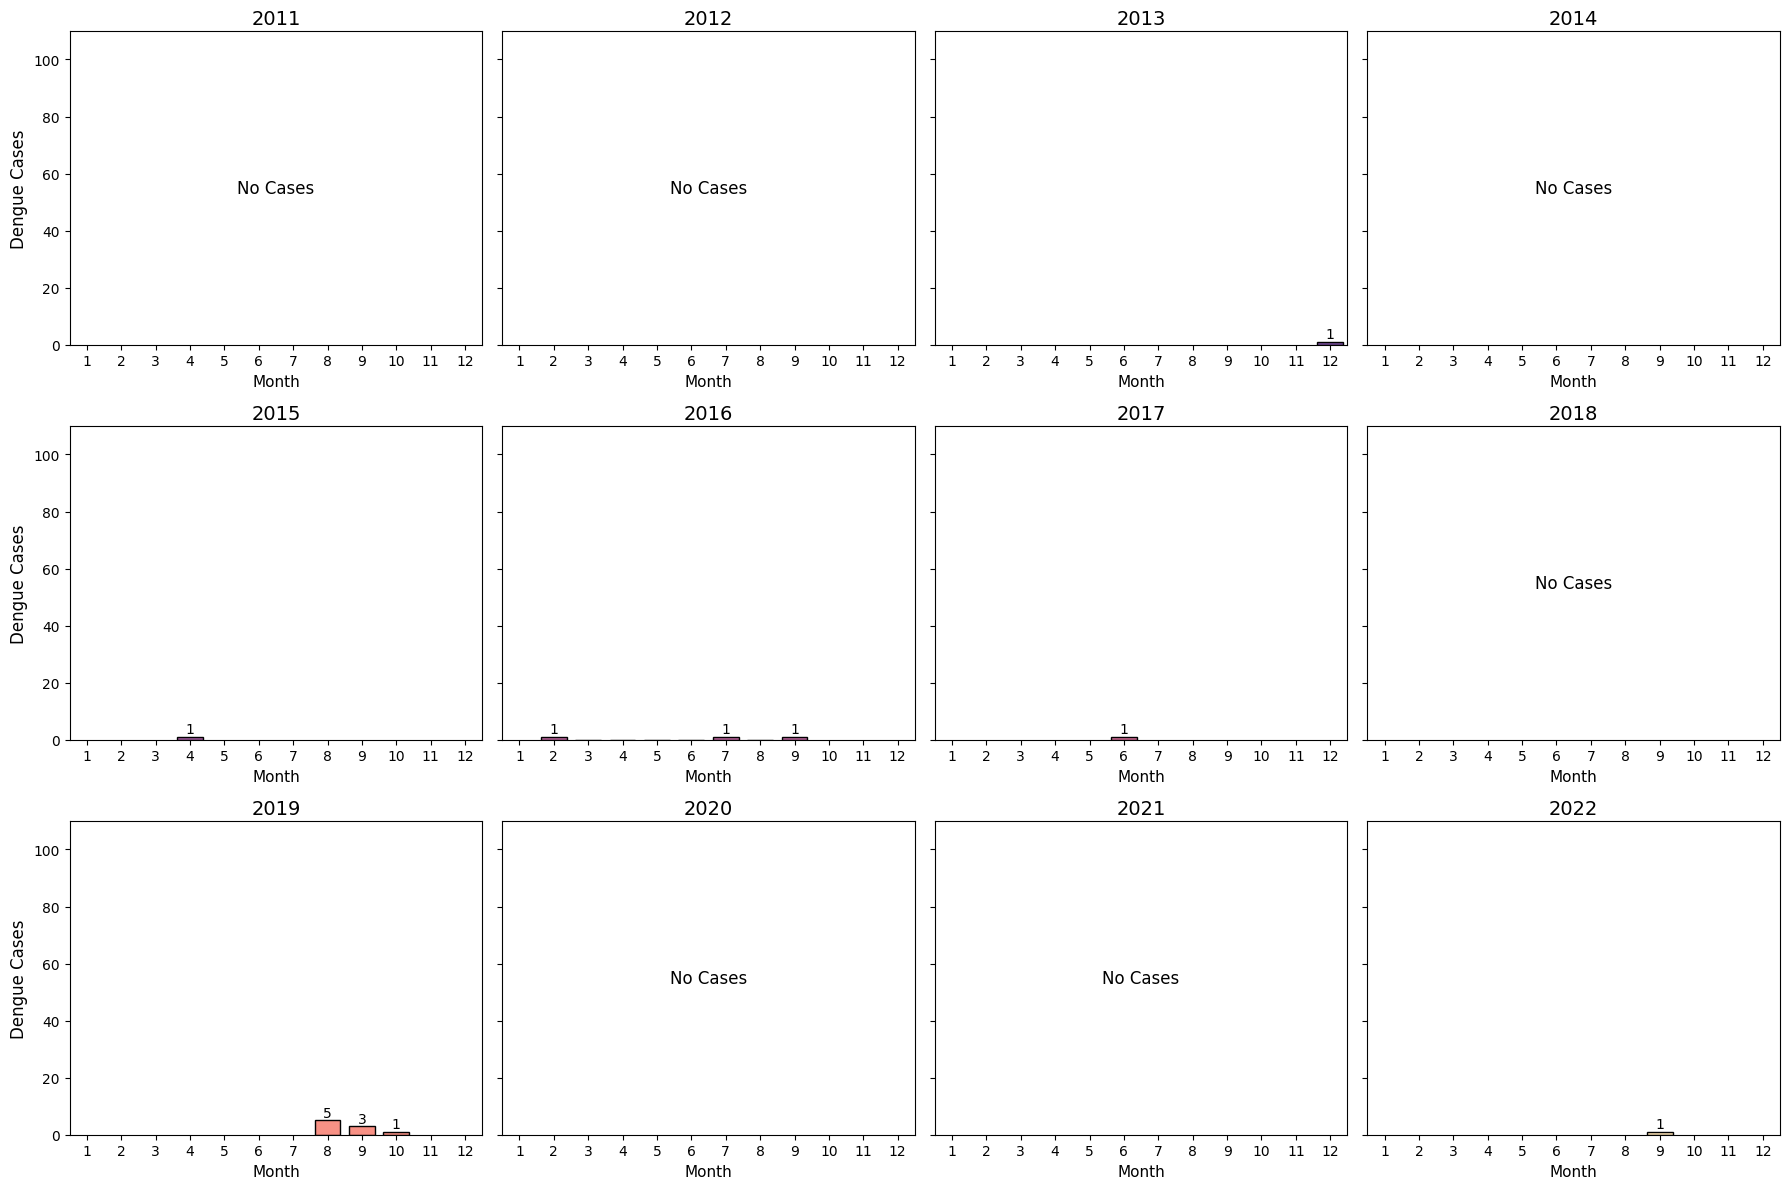

In [19]:
#HISTOGRAM FOR MONTHLY CASES EVERY YEAR
plot_dengue_cases(df, "BUNAWAN")

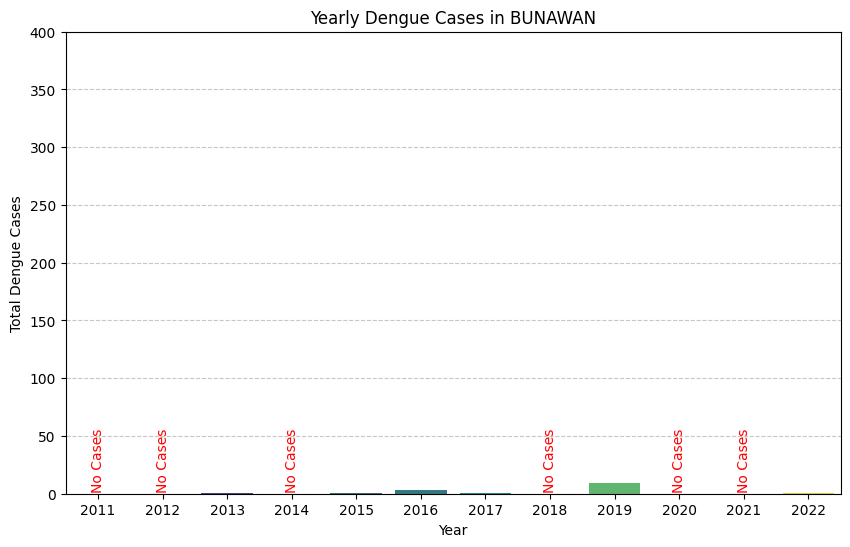

In [20]:
plot_total_dengue_cases_yearly(df, "BUNAWAN")

<div style="
    background-color: black; 
    color: white; 
    padding: 10px; 
    border-radius: 10px; 
    text-align: center;
    max-width: 100vw; 
    width: 100%;
    box-sizing: border-box;">
    BURU-UN MONTHLY CASES
</div>


In [21]:
# Example usage:
selected_barangay = "BURU-UN"  # Change this to any barangay you want
barangay_data = get_selected_barangay(df, selected_barangay)

# Display the data for each year
for year, data in barangay_data.items():
    display(data)
    

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
5              5  BURU-UN  8.1872  124.1688  2011      1             1   
49             5  BURU-UN  8.1872  124.1688  2011      2             1   
93             5  BURU-UN  8.1872  124.1688  2011      3             0   
137            5  BURU-UN  8.1872  124.1688  2011      4             1   
181            5  BURU-UN  8.1872  124.1688  2011      5             0   
225            5  BURU-UN  8.1872  124.1688  2011      6             0   
269            5  BURU-UN  8.1872  124.1688  2011      7             1   
313            5  BURU-UN  8.1872  124.1688  2011      8             2   
357            5  BURU-UN  8.1872  124.1688  2011      9             0   
401            5  BURU-UN  8.1872  124.1688  2011     10             0   
445            5  BURU-UN  8.1872  124.1688  2011     11             0   
489            5  BURU-UN  8.1872  124.1688  2011     12             0   

     Temperature  Humidity  Rainfall  
5           23.8      88.1       7.0  
49          24.1      87.2      12.0  
93          25.3      85.5      20.0  
137         26.0      83.1      35.0  
181         27.2      81.9      55.0  
225         26.4      83.5      90.0  
269         25.7      84.7     110.0  
313         25.1      85.3      95.0  
357         24.4      86.2      70.0  
401         24.0      87.0      50.0  
445         23.6      88.4      30.0  
489         23.2      89.1      15.0

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
533             5  BURU-UN  8.1872  124.1688  2012      1             0   
577             5  BURU-UN  8.1872  124.1688  2012      2             0   
621             5  BURU-UN  8.1872  124.1688  2012      3             0   
665             5  BURU-UN  8.1872  124.1688  2012      4             0   
709             5  BURU-UN  8.1872  124.1688  2012      5             1   
753             5  BURU-UN  8.1872  124.1688  2012      6             1   
797             5  BURU-UN  8.1872  124.1688  2012      7             3   
841             5  BURU-UN  8.1872  124.1688  2012      8             8   
885             5  BURU-UN  8.1872  124.1688  2012      9             6   
929             5  BURU-UN  8.1872  124.1688  2012     10             3   
973             5  BURU-UN  8.1872  124.1688  2012     11             3   
1017            5  BURU-UN  8.1872  124.1688  2012     12             4   

      Temperature  Humidity  Rainfall  
533          24.3      85.1       4.0  
577          24.3      85.7       7.1  
621          24.6      83.3       3.1  
665          25.4      82.3       6.9  
709          25.1      86.4       6.9  
753          24.7      85.3       7.9  
797          24.9      85.2       6.4  
841          24.9      85.2       6.4  
885          24.1      88.1      11.4  
929          24.6      86.5       8.4  
973          24.8      84.8       4.1  
1017         24.7      84.8       5.7

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
1061            5  BURU-UN  8.1872  124.1688  2013      1             3   
1105            5  BURU-UN  8.1872  124.1688  2013      2             0   
1149            5  BURU-UN  8.1872  124.1688  2013      3             0   
1193            5  BURU-UN  8.1872  124.1688  2013      4             0   
1237            5  BURU-UN  8.1872  124.1688  2013      5             0   
1281            5  BURU-UN  8.1872  124.1688  2013      6             0   
1325            5  BURU-UN  8.1872  124.1688  2013      7             1   
1369            5  BURU-UN  8.1872  124.1688  2013      8             0   
1413            5  BURU-UN  8.1872  124.1688  2013      9             0   
1457            5  BURU-UN  8.1872  124.1688  2013     10             2   
1501            5  BURU-UN  8.1872  124.1688  2013     11             1   
1545            5  BURU-UN  8.1872  124.1688  2013     12             0   

      Temperature  Humidity  Rainfall  
1061         24.2      88.2       8.1  
1105         24.4      84.7       6.0  
1149         25.5      81.1       2.7  
1193         26.0      81.0       4.9  
1237         26.0      82.8       5.2  
1281         24.9      86.9       9.2  
1325         24.5      87.7      11.0  
1369         24.3      87.2       6.9  
1413         24.6      86.5       4.9  
1457         24.0      88.0      10.4  
1501         24.2      85.9       7.8  
1545         24.4      84.0       3.5

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
1589            5  BURU-UN  8.1872  124.1688  2014      1             1   
1633            5  BURU-UN  8.1872  124.1688  2014      2             0   
1677            5  BURU-UN  8.1872  124.1688  2014      3             3   
1721            5  BURU-UN  8.1872  124.1688  2014      4             0   
1765            5  BURU-UN  8.1872  124.1688  2014      5             0   
1809            5  BURU-UN  8.1872  124.1688  2014      6             0   
1853            5  BURU-UN  8.1872  124.1688  2014      7             2   
1897            5  BURU-UN  8.1872  124.1688  2014      8             1   
1941            5  BURU-UN  8.1872  124.1688  2014      9             3   
1985            5  BURU-UN  8.1872  124.1688  2014     10             7   
2029            5  BURU-UN  8.1872  124.1688  2014     11             2   
2073            5  BURU-UN  8.1872  124.1688  2014     12             1   

      Temperature  Humidity  Rainfall  
1589         23.2      86.4       6.8  
1633         23.7      82.4       2.3  
1677         24.3      82.5       3.8  
1721         25.1      81.4       2.0  
1765         25.3      84.0       4.9  
1809         24.5      87.1       6.6  
1853         23.4      89.1       8.5  
1897         23.9      87.7       8.0  
1941         23.4      88.5       7.1  
1985         23.9      88.4       8.5  
2029         24.7      85.2       6.1  
2073         24.0      85.3       4.9

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
2117            5  BURU-UN  8.1872  124.1688  2015      1             1   
2161            5  BURU-UN  8.1872  124.1688  2015      2             3   
2205            5  BURU-UN  8.1872  124.1688  2015      3             1   
2249            5  BURU-UN  8.1872  124.1688  2015      4             0   
2293            5  BURU-UN  8.1872  124.1688  2015      5             4   
2337            5  BURU-UN  8.1872  124.1688  2015      6             0   
2381            5  BURU-UN  8.1872  124.1688  2015      7             0   
2425            5  BURU-UN  8.1872  124.1688  2015      8             5   
2469            5  BURU-UN  8.1872  124.1688  2015      9            11   
2513            5  BURU-UN  8.1872  124.1688  2015     10             7   
2557            5  BURU-UN  8.1872  124.1688  2015     11             9   
2601            5  BURU-UN  8.1872  124.1688  2015     12            12   

      Temperature  Humidity  Rainfall  
2117         25.6      89.0       5.9  
2161         25.6      87.0       3.0  
2205         26.1      83.2       1.1  
2249         27.3      82.8       2.1  
2293         28.4      78.1       2.7  
2337         27.4      81.9       8.7  
2381         27.6      80.4       4.2  
2425         27.5      80.9       5.5  
2469         27.2      82.4       8.2  
2513         27.2      83.4       4.9  
2557         26.8      87.3       6.5  
2601         26.5      87.1       4.8

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
2645            5  BURU-UN  8.1872  124.1688  2016      1             4   
2689            5  BURU-UN  8.1872  124.1688  2016      2             6   
2733            5  BURU-UN  8.1872  124.1688  2016      3             1   
2777            5  BURU-UN  8.1872  124.1688  2016      4             3   
2821            5  BURU-UN  8.1872  124.1688  2016      5             0   
2865            5  BURU-UN  8.1872  124.1688  2016      6             0   
2909            5  BURU-UN  8.1872  124.1688  2016      7             5   
2953            5  BURU-UN  8.1872  124.1688  2016      8             5   
2997            5  BURU-UN  8.1872  124.1688  2016      9             7   
3041            5  BURU-UN  8.1872  124.1688  2016     10            15   
3085            5  BURU-UN  8.1872  124.1688  2016     11             8   
3129            5  BURU-UN  8.1872  124.1688  2016     12            17   

      Temperature  Humidity  Rainfall  
2645         26.2      86.9       1.6  
2689         26.1      88.2       2.6  
2733         26.8      84.4       0.4  
2777         28.1      80.1       1.5  
2821         28.3      81.9       8.3  
2865         27.5      83.9      12.5  
2909         27.6      82.0       5.2  
2953         27.8      80.3       2.7  
2997         27.2      82.4       6.2  
3041         27.1      84.6       8.9  
3085         26.5      86.6       7.6  
3129         26.7      86.9       8.2

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
3173            5  BURU-UN  8.1872  124.1688  2017      1             7   
3217            5  BURU-UN  8.1872  124.1688  2017      2             5   
3261            5  BURU-UN  8.1872  124.1688  2017      3             4   
3305            5  BURU-UN  8.1872  124.1688  2017      4             2   
3349            5  BURU-UN  8.1872  124.1688  2017      5             3   
3393            5  BURU-UN  8.1872  124.1688  2017      6             0   
3437            5  BURU-UN  8.1872  124.1688  2017      7             2   
3481            5  BURU-UN  8.1872  124.1688  2017      8             1   
3525            5  BURU-UN  8.1872  124.1688  2017      9             0   
3569            5  BURU-UN  8.1872  124.1688  2017     10             0   
3613            5  BURU-UN  8.1872  124.1688  2017     11             0   
3657            5  BURU-UN  8.1872  124.1688  2017     12             0   

      Temperature  Humidity  Rainfall  
3173         25.9      88.9      12.5  
3217         25.6      87.8       5.9  
3261         26.1      87.4       8.0  
3305         27.2      85.0       5.1  
3349         27.8      84.4      10.4  
3393         27.4      83.8       7.8  
3437         27.2      82.6       9.1  
3481         27.9      83.4       9.6  
3525         27.3      83.3      11.4  
3569         27.0      84.0       8.3  
3613         27.0      86.6       7.3  
3657         26.7      85.9       9.6

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
3701            5  BURU-UN  8.1872  124.1688  2018      1             1   
3745            5  BURU-UN  8.1872  124.1688  2018      2             3   
3789            5  BURU-UN  8.1872  124.1688  2018      3             3   
3833            5  BURU-UN  8.1872  124.1688  2018      4             0   
3877            5  BURU-UN  8.1872  124.1688  2018      5             2   
3921            5  BURU-UN  8.1872  124.1688  2018      6             0   
3965            5  BURU-UN  8.1872  124.1688  2018      7             1   
4009            5  BURU-UN  8.1872  124.1688  2018      8             6   
4053            5  BURU-UN  8.1872  124.1688  2018      9             1   
4097            5  BURU-UN  8.1872  124.1688  2018     10            10   
4141            5  BURU-UN  8.1872  124.1688  2018     11            22   
4185            5  BURU-UN  8.1872  124.1688  2018     12            18   

      Temperature  Humidity  Rainfall  
3701         26.2      87.5       7.3  
3745         26.4      86.0       9.7  
3789         26.5      84.6       3.7  
3833         27.4      82.5       2.6  
3877         27.9      82.0       6.9  
3921         27.7      80.7       5.2  
3965         27.3      81.6       4.7  
4009         27.4      79.8       2.1  
4053         26.9      82.2       5.4  
4097         27.2      82.7       4.2  
4141         26.5      86.6       6.1  
4185         26.3      88.1       5.8

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
4229            5  BURU-UN  8.1872  124.1688  2019      1             8   
4273            5  BURU-UN  8.1872  124.1688  2019      2             5   
4317            5  BURU-UN  8.1872  124.1688  2019      3             6   
4361            5  BURU-UN  8.1872  124.1688  2019      4            12   
4405            5  BURU-UN  8.1872  124.1688  2019      5             2   
4449            5  BURU-UN  8.1872  124.1688  2019      6             2   
4493            5  BURU-UN  8.1872  124.1688  2019      7           105   
4537            5  BURU-UN  8.1872  124.1688  2019      8            93   
4581            5  BURU-UN  8.1872  124.1688  2019      9            28   
4625            5  BURU-UN  8.1872  124.1688  2019     10            14   
4669            5  BURU-UN  8.1872  124.1688  2019     11             9   
4713            5  BURU-UN  8.1872  124.1688  2019     12             4   

      Temperature  Humidity  Rainfall  
4229         25.5      88.2       5.7  
4273         25.3      84.3       1.1  
4317         26.1      83.2       1.9  
4361         27.5      80.3       1.8  
4405         28.4      78.6       4.4  
4449         27.8      82.7       9.1  
4493         27.2      82.1       6.2  
4537         27.7      77.1       1.4  
4581         27.8      78.2       3.3  
4625         27.0      83.8       7.7  
4669         27.1      82.9       4.3  
4713         26.4      86.4       4.2

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
4757            5  BURU-UN  8.1872  124.1688  2020      1             6   
4801            5  BURU-UN  8.1872  124.1688  2020      2             0   
4845            5  BURU-UN  8.1872  124.1688  2020      3             2   
4889            5  BURU-UN  8.1872  124.1688  2020      4             0   
4933            5  BURU-UN  8.1872  124.1688  2020      5             0   
4977            5  BURU-UN  8.1872  124.1688  2020      6             0   
5021            5  BURU-UN  8.1872  124.1688  2020      7             2   
5065            5  BURU-UN  8.1872  124.1688  2020      8             0   
5109            5  BURU-UN  8.1872  124.1688  2020      9             0   
5153            5  BURU-UN  8.1872  124.1688  2020     10             0   
5197            5  BURU-UN  8.1872  124.1688  2020     11             2   
5241            5  BURU-UN  8.1872  124.1688  2020     12             0   

      Temperature  Humidity  Rainfall  
4757         26.3      86.8       2.1  
4801         25.7      87.2       3.5  
4845         26.4      85.2       2.0  
4889         27.2      81.6       1.0  
4933         28.0      83.2       9.8  
4977         27.3      84.1      14.1  
5021         27.0      83.9      15.7  
5065         27.2      82.9      11.7  
5109         27.2      83.7       9.2  
5153         26.9      84.2      13.2  
5197         26.8      86.2       5.5  
5241         26.7      86.6       8.2

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
5285            5  BURU-UN  8.1872  124.1688  2021      1             1   
5329            5  BURU-UN  8.1872  124.1688  2021      2             5   
5373            5  BURU-UN  8.1872  124.1688  2021      3             5   
5417            5  BURU-UN  8.1872  124.1688  2021      4             1   
5461            5  BURU-UN  8.1872  124.1688  2021      5             2   
5505            5  BURU-UN  8.1872  124.1688  2021      6             0   
5549            5  BURU-UN  8.1872  124.1688  2021      7             2   
5593            5  BURU-UN  8.1872  124.1688  2021      8             1   
5637            5  BURU-UN  8.1872  124.1688  2021      9             2   
5681            5  BURU-UN  8.1872  124.1688  2021     10             0   
5725            5  BURU-UN  8.1872  124.1688  2021     11             2   
5769            5  BURU-UN  8.1872  124.1688  2021     12             1   

      Temperature  Humidity  Rainfall  
5285         25.9      88.5      11.9  
5329         26.0      87.1      12.6  
5373         26.8      84.7       5.5  
5417         27.1      82.5       4.5  
5461         27.5      84.0      10.7  
5505         27.6      81.3       8.2  
5549         27.7      80.0       4.4  
5593         27.5      80.0       6.5  
5637         27.2      82.7       9.5  
5681         27.3      83.6       8.7  
5725         27.0      86.4       9.4  
5769         26.2      86.9       9.8

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
5813            5  BURU-UN  8.1872  124.1688  2022      1             0   
5857            5  BURU-UN  8.1872  124.1688  2022      2             0   
5901            5  BURU-UN  8.1872  124.1688  2022      3             0   
5945            5  BURU-UN  8.1872  124.1688  2022      4             4   
5989            5  BURU-UN  8.1872  124.1688  2022      5             1   
6033            5  BURU-UN  8.1872  124.1688  2022      6             4   
6077            5  BURU-UN  8.1872  124.1688  2022      7            11   
6121            5  BURU-UN  8.1872  124.1688  2022      8             5   
6165            5  BURU-UN  8.1872  124.1688  2022      9             4   
6209            5  BURU-UN  8.1872  124.1688  2022     10             3   
6253            5  BURU-UN  8.1872  124.1688  2022     11             1   
6297            5  BURU-UN  8.1872  124.1688  2022     12             1   

      Temperature  Humidity  Rainfall  
5813         26.0      86.9       8.3  
5857         26.0      87.2       3.9  
5901         26.8      86.5      11.0  
5945         26.8      86.5      12.2  
5989         27.4      83.9      11.5  
6033         27.6      81.9       7.1  
6077         27.4      83.2      11.6  
6121         27.3      82.0       7.9  
6165         27.5      81.1       6.1  
6209         27.1      84.2       9.0  
6253         27.0      85.8       6.6  
6297         26.4      87.1      14.5

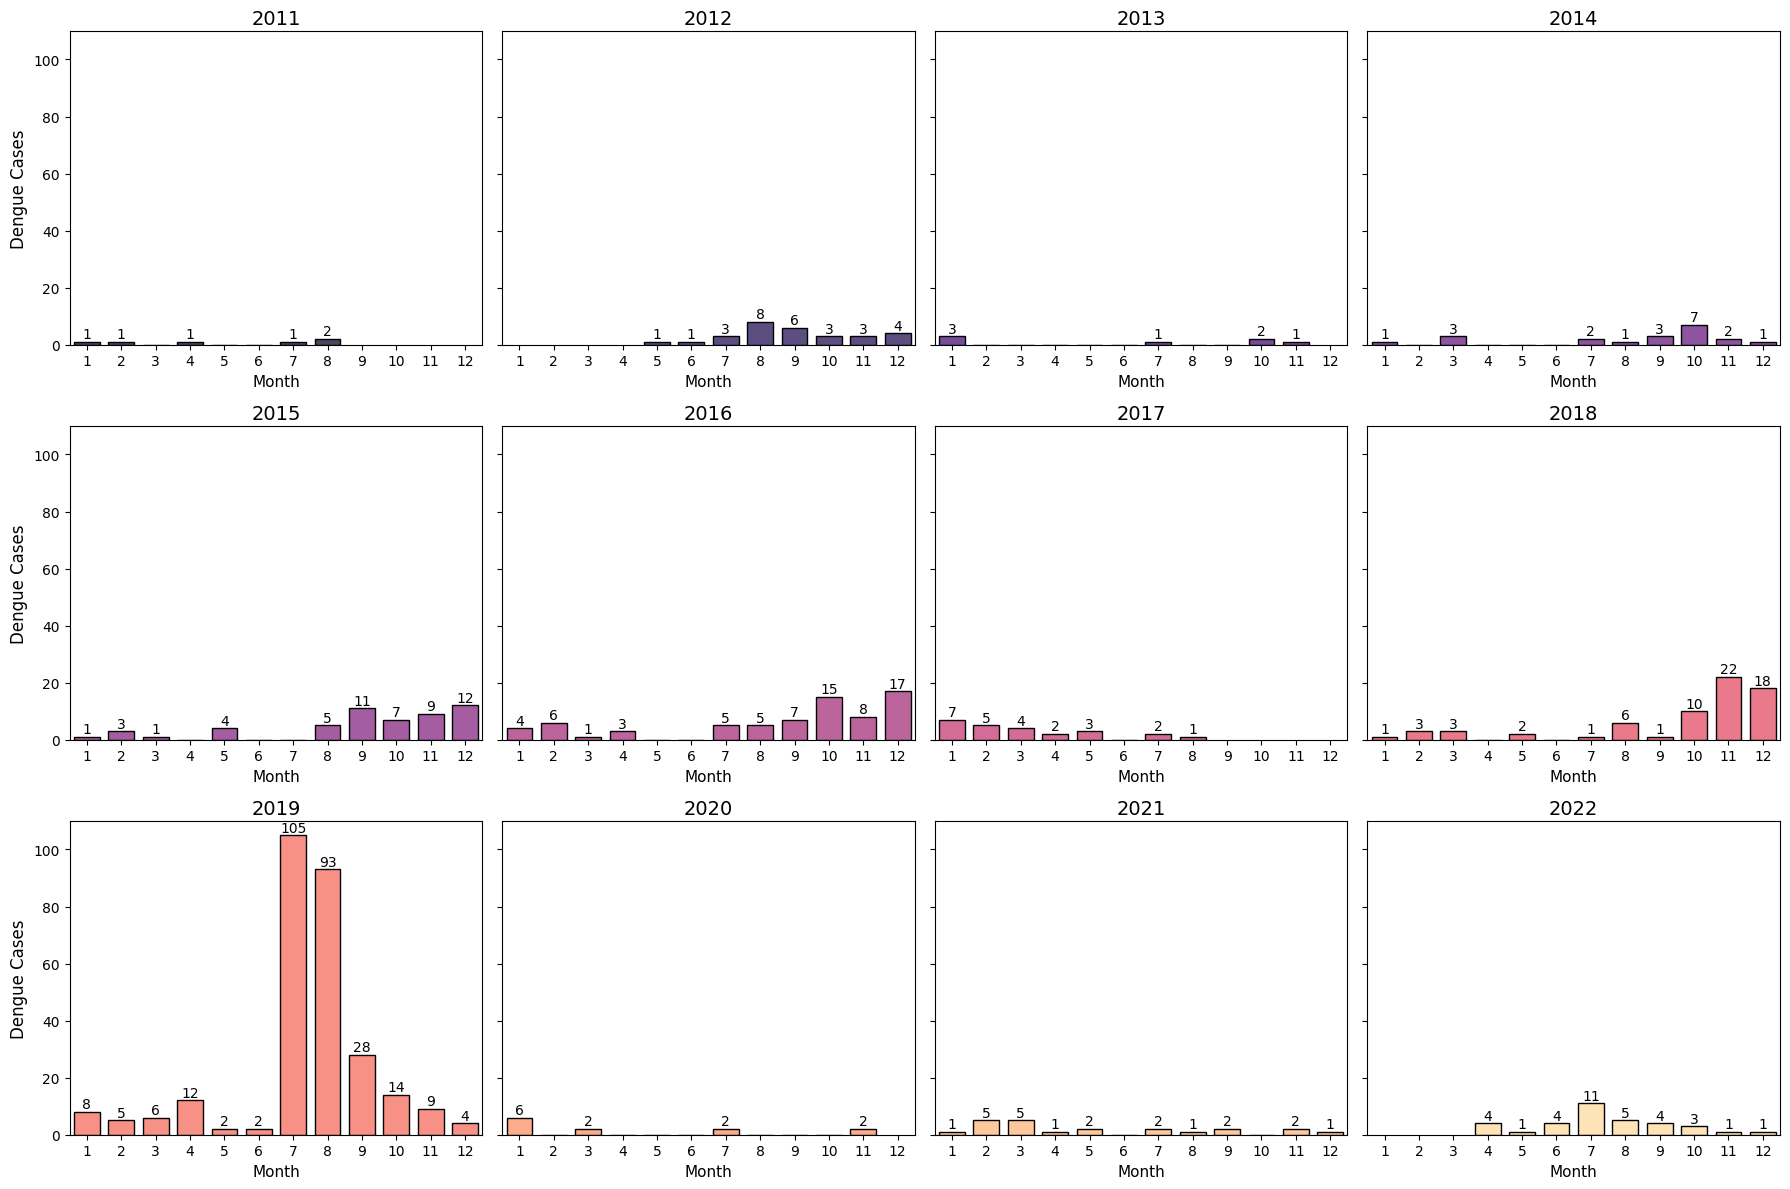

In [22]:
#HISTOGRAM FOR MONTHLY CASES EVERY YEAR
plot_dengue_cases(df, "BURU-UN")


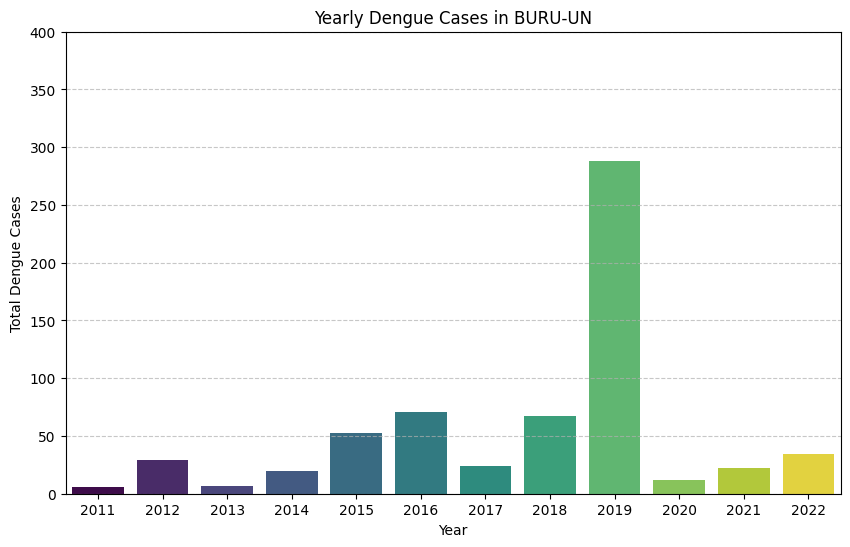

In [23]:
plot_total_dengue_cases_yearly(df, "BURU-UN")

<div style="
    background-color: black; 
    color: white; 
    padding: 10px; 
    border-radius: 10px; 
    text-align: center;
    max-width: 100vw; 
    width: 100%;
    box-sizing: border-box;">
    DALIPUGA MONTHLY CASES
</div>


In [24]:
# Example usage:
selected_barangay = "DALIPUGA"  # Change this to any barangay you want
barangay_data = get_selected_barangay(df, selected_barangay)

# Display the data for each year
for year, data in barangay_data.items():
    display(data)

Barangay_No  Barangay       x        y  Year  Month  Dengue Cases  \
6              6  DALIPUGA  8.3074  124.255  2011      1             1   
50             6  DALIPUGA  8.3074  124.255  2011      2             0   
94             6  DALIPUGA  8.3074  124.255  2011      3             0   
138            6  DALIPUGA  8.3074  124.255  2011      4             0   
182            6  DALIPUGA  8.3074  124.255  2011      5             0   
226            6  DALIPUGA  8.3074  124.255  2011      6             0   
270            6  DALIPUGA  8.3074  124.255  2011      7             2   
314            6  DALIPUGA  8.3074  124.255  2011      8             0   
358            6  DALIPUGA  8.3074  124.255  2011      9             0   
402            6  DALIPUGA  8.3074  124.255  2011     10             1   
446            6  DALIPUGA  8.3074  124.255  2011     11             1   
490            6  DALIPUGA  8.3074  124.255  2011     12             0   

     Temperature  Humidity  Rainfall  
6           23.8      88.1       7.0  
50          24.1      87.2      12.0  
94          25.3      85.5      20.0  
138         26.0      83.1      35.0  
182         27.2      81.9      55.0  
226         26.4      83.5      90.0  
270         25.7      84.7     110.0  
314         25.1      85.3      95.0  
358         24.4      86.2      70.0  
402         24.0      87.0      50.0  
446         23.6      88.4      30.0  
490         23.2      89.1      15.0

Barangay_No  Barangay       x        y  Year  Month  Dengue Cases  \
534             6  DALIPUGA  8.3074  124.255  2012      1             0   
578             6  DALIPUGA  8.3074  124.255  2012      2             0   
622             6  DALIPUGA  8.3074  124.255  2012      3             0   
666             6  DALIPUGA  8.3074  124.255  2012      4             0   
710             6  DALIPUGA  8.3074  124.255  2012      5             0   
754             6  DALIPUGA  8.3074  124.255  2012      6             1   
798             6  DALIPUGA  8.3074  124.255  2012      7             0   
842             6  DALIPUGA  8.3074  124.255  2012      8             1   
886             6  DALIPUGA  8.3074  124.255  2012      9             4   
930             6  DALIPUGA  8.3074  124.255  2012     10             0   
974             6  DALIPUGA  8.3074  124.255  2012     11             2   
1018            6  DALIPUGA  8.3074  124.255  2012     12             0   

      Temperature  Humidity  Rainfall  
534          24.3      85.1       4.0  
578          24.3      85.7       7.1  
622          24.6      83.3       3.1  
666          25.4      82.3       6.9  
710          25.1      86.4       6.9  
754          24.7      85.3       7.9  
798          24.9      85.2       6.4  
842          24.9      85.2       6.4  
886          24.1      88.1      11.4  
930          24.6      86.5       8.4  
974          24.8      84.8       4.1  
1018         24.7      84.8       5.7

Barangay_No  Barangay       x        y  Year  Month  Dengue Cases  \
1062            6  DALIPUGA  8.3074  124.255  2013      1             1   
1106            6  DALIPUGA  8.3074  124.255  2013      2             1   
1150            6  DALIPUGA  8.3074  124.255  2013      3             0   
1194            6  DALIPUGA  8.3074  124.255  2013      4             1   
1238            6  DALIPUGA  8.3074  124.255  2013      5             0   
1282            6  DALIPUGA  8.3074  124.255  2013      6             1   
1326            6  DALIPUGA  8.3074  124.255  2013      7             3   
1370            6  DALIPUGA  8.3074  124.255  2013      8             1   
1414            6  DALIPUGA  8.3074  124.255  2013      9             2   
1458            6  DALIPUGA  8.3074  124.255  2013     10             1   
1502            6  DALIPUGA  8.3074  124.255  2013     11             1   
1546            6  DALIPUGA  8.3074  124.255  2013     12             0   

      Temperature  Humidity  Rainfall  
1062         24.2      88.2       8.1  
1106         24.4      84.7       6.0  
1150         25.5      81.1       2.7  
1194         26.0      81.0       4.9  
1238         26.0      82.8       5.2  
1282         24.9      86.9       9.2  
1326         24.5      87.7      11.0  
1370         24.3      87.2       6.9  
1414         24.6      86.5       4.9  
1458         24.0      88.0      10.4  
1502         24.2      85.9       7.8  
1546         24.4      84.0       3.5

Barangay_No  Barangay       x        y  Year  Month  Dengue Cases  \
1590            6  DALIPUGA  8.3074  124.255  2014      1             0   
1634            6  DALIPUGA  8.3074  124.255  2014      2             0   
1678            6  DALIPUGA  8.3074  124.255  2014      3             0   
1722            6  DALIPUGA  8.3074  124.255  2014      4             0   
1766            6  DALIPUGA  8.3074  124.255  2014      5             3   
1810            6  DALIPUGA  8.3074  124.255  2014      6             1   
1854            6  DALIPUGA  8.3074  124.255  2014      7             1   
1898            6  DALIPUGA  8.3074  124.255  2014      8             3   
1942            6  DALIPUGA  8.3074  124.255  2014      9             2   
1986            6  DALIPUGA  8.3074  124.255  2014     10             4   
2030            6  DALIPUGA  8.3074  124.255  2014     11             5   
2074            6  DALIPUGA  8.3074  124.255  2014     12             0   

      Temperature  Humidity  Rainfall  
1590         23.2      86.4       6.8  
1634         23.7      82.4       2.3  
1678         24.3      82.5       3.8  
1722         25.1      81.4       2.0  
1766         25.3      84.0       4.9  
1810         24.5      87.1       6.6  
1854         23.4      89.1       8.5  
1898         23.9      87.7       8.0  
1942         23.4      88.5       7.1  
1986         23.9      88.4       8.5  
2030         24.7      85.2       6.1  
2074         24.0      85.3       4.9

Barangay_No  Barangay       x        y  Year  Month  Dengue Cases  \
2118            6  DALIPUGA  8.3074  124.255  2015      1             0   
2162            6  DALIPUGA  8.3074  124.255  2015      2             3   
2206            6  DALIPUGA  8.3074  124.255  2015      3             1   
2250            6  DALIPUGA  8.3074  124.255  2015      4             2   
2294            6  DALIPUGA  8.3074  124.255  2015      5             0   
2338            6  DALIPUGA  8.3074  124.255  2015      6             1   
2382            6  DALIPUGA  8.3074  124.255  2015      7             2   
2426            6  DALIPUGA  8.3074  124.255  2015      8             6   
2470            6  DALIPUGA  8.3074  124.255  2015      9             6   
2514            6  DALIPUGA  8.3074  124.255  2015     10             6   
2558            6  DALIPUGA  8.3074  124.255  2015     11             9   
2602            6  DALIPUGA  8.3074  124.255  2015     12            16   

      Temperature  Humidity  Rainfall  
2118         25.6      89.0       5.9  
2162         25.6      87.0       3.0  
2206         26.1      83.2       1.1  
2250         27.3      82.8       2.1  
2294         28.4      78.1       2.7  
2338         27.4      81.9       8.7  
2382         27.6      80.4       4.2  
2426         27.5      80.9       5.5  
2470         27.2      82.4       8.2  
2514         27.2      83.4       4.9  
2558         26.8      87.3       6.5  
2602         26.5      87.1       4.8

Barangay_No  Barangay       x        y  Year  Month  Dengue Cases  \
2646            6  DALIPUGA  8.3074  124.255  2016      1             5   
2690            6  DALIPUGA  8.3074  124.255  2016      2             3   
2734            6  DALIPUGA  8.3074  124.255  2016      3             9   
2778            6  DALIPUGA  8.3074  124.255  2016      4             2   
2822            6  DALIPUGA  8.3074  124.255  2016      5             2   
2866            6  DALIPUGA  8.3074  124.255  2016      6             3   
2910            6  DALIPUGA  8.3074  124.255  2016      7            13   
2954            6  DALIPUGA  8.3074  124.255  2016      8             9   
2998            6  DALIPUGA  8.3074  124.255  2016      9            14   
3042            6  DALIPUGA  8.3074  124.255  2016     10             8   
3086            6  DALIPUGA  8.3074  124.255  2016     11             8   
3130            6  DALIPUGA  8.3074  124.255  2016     12             3   

      Temperature  Humidity  Rainfall  
2646         26.2      86.9       1.6  
2690         26.1      88.2       2.6  
2734         26.8      84.4       0.4  
2778         28.1      80.1       1.5  
2822         28.3      81.9       8.3  
2866         27.5      83.9      12.5  
2910         27.6      82.0       5.2  
2954         27.8      80.3       2.7  
2998         27.2      82.4       6.2  
3042         27.1      84.6       8.9  
3086         26.5      86.6       7.6  
3130         26.7      86.9       8.2

Barangay_No  Barangay       x        y  Year  Month  Dengue Cases  \
3174            6  DALIPUGA  8.3074  124.255  2017      1             2   
3218            6  DALIPUGA  8.3074  124.255  2017      2             3   
3262            6  DALIPUGA  8.3074  124.255  2017      3             2   
3306            6  DALIPUGA  8.3074  124.255  2017      4             0   
3350            6  DALIPUGA  8.3074  124.255  2017      5             1   
3394            6  DALIPUGA  8.3074  124.255  2017      6             1   
3438            6  DALIPUGA  8.3074  124.255  2017      7             3   
3482            6  DALIPUGA  8.3074  124.255  2017      8             1   
3526            6  DALIPUGA  8.3074  124.255  2017      9             0   
3570            6  DALIPUGA  8.3074  124.255  2017     10             0   
3614            6  DALIPUGA  8.3074  124.255  2017     11             0   
3658            6  DALIPUGA  8.3074  124.255  2017     12             1   

      Temperature  Humidity  Rainfall  
3174         25.9      88.9      12.5  
3218         25.6      87.8       5.9  
3262         26.1      87.4       8.0  
3306         27.2      85.0       5.1  
3350         27.8      84.4      10.4  
3394         27.4      83.8       7.8  
3438         27.2      82.6       9.1  
3482         27.9      83.4       9.6  
3526         27.3      83.3      11.4  
3570         27.0      84.0       8.3  
3614         27.0      86.6       7.3  
3658         26.7      85.9       9.6

Barangay_No  Barangay       x        y  Year  Month  Dengue Cases  \
3702            6  DALIPUGA  8.3074  124.255  2018      1             0   
3746            6  DALIPUGA  8.3074  124.255  2018      2             0   
3790            6  DALIPUGA  8.3074  124.255  2018      3             1   
3834            6  DALIPUGA  8.3074  124.255  2018      4             0   
3878            6  DALIPUGA  8.3074  124.255  2018      5             0   
3922            6  DALIPUGA  8.3074  124.255  2018      6             1   
3966            6  DALIPUGA  8.3074  124.255  2018      7             4   
4010            6  DALIPUGA  8.3074  124.255  2018      8             3   
4054            6  DALIPUGA  8.3074  124.255  2018      9             3   
4098            6  DALIPUGA  8.3074  124.255  2018     10            11   
4142            6  DALIPUGA  8.3074  124.255  2018     11            20   
4186            6  DALIPUGA  8.3074  124.255  2018     12            23   

      Temperature  Humidity  Rainfall  
3702         26.2      87.5       7.3  
3746         26.4      86.0       9.7  
3790         26.5      84.6       3.7  
3834         27.4      82.5       2.6  
3878         27.9      82.0       6.9  
3922         27.7      80.7       5.2  
3966         27.3      81.6       4.7  
4010         27.4      79.8       2.1  
4054         26.9      82.2       5.4  
4098         27.2      82.7       4.2  
4142         26.5      86.6       6.1  
4186         26.3      88.1       5.8

Barangay_No  Barangay       x        y  Year  Month  Dengue Cases  \
4230            6  DALIPUGA  8.3074  124.255  2019      1            24   
4274            6  DALIPUGA  8.3074  124.255  2019      2            21   
4318            6  DALIPUGA  8.3074  124.255  2019      3            14   
4362            6  DALIPUGA  8.3074  124.255  2019      4             3   
4406            6  DALIPUGA  8.3074  124.255  2019      5             0   
4450            6  DALIPUGA  8.3074  124.255  2019      6            20   
4494            6  DALIPUGA  8.3074  124.255  2019      7            40   
4538            6  DALIPUGA  8.3074  124.255  2019      8            63   
4582            6  DALIPUGA  8.3074  124.255  2019      9            39   
4626            6  DALIPUGA  8.3074  124.255  2019     10            11   
4670            6  DALIPUGA  8.3074  124.255  2019     11             3   
4714            6  DALIPUGA  8.3074  124.255  2019     12             4   

      Temperature  Humidity  Rainfall  
4230         25.5      88.2       5.7  
4274         25.3      84.3       1.1  
4318         26.1      83.2       1.9  
4362         27.5      80.3       1.8  
4406         28.4      78.6       4.4  
4450         27.8      82.7       9.1  
4494         27.2      82.1       6.2  
4538         27.7      77.1       1.4  
4582         27.8      78.2       3.3  
4626         27.0      83.8       7.7  
4670         27.1      82.9       4.3  
4714         26.4      86.4       4.2

Barangay_No  Barangay       x        y  Year  Month  Dengue Cases  \
4758            6  DALIPUGA  8.3074  124.255  2020      1             2   
4802            6  DALIPUGA  8.3074  124.255  2020      2            10   
4846            6  DALIPUGA  8.3074  124.255  2020      3             6   
4890            6  DALIPUGA  8.3074  124.255  2020      4             0   
4934            6  DALIPUGA  8.3074  124.255  2020      5             2   
4978            6  DALIPUGA  8.3074  124.255  2020      6             0   
5022            6  DALIPUGA  8.3074  124.255  2020      7             2   
5066            6  DALIPUGA  8.3074  124.255  2020      8             4   
5110            6  DALIPUGA  8.3074  124.255  2020      9             0   
5154            6  DALIPUGA  8.3074  124.255  2020     10             2   
5198            6  DALIPUGA  8.3074  124.255  2020     11             2   
5242            6  DALIPUGA  8.3074  124.255  2020     12             6   

      Temperature  Humidity  Rainfall  
4758         26.3      86.8       2.1  
4802         25.7      87.2       3.5  
4846         26.4      85.2       2.0  
4890         27.2      81.6       1.0  
4934         28.0      83.2       9.8  
4978         27.3      84.1      14.1  
5022         27.0      83.9      15.7  
5066         27.2      82.9      11.7  
5110         27.2      83.7       9.2  
5154         26.9      84.2      13.2  
5198         26.8      86.2       5.5  
5242         26.7      86.6       8.2

Barangay_No  Barangay       x        y  Year  Month  Dengue Cases  \
5286            6  DALIPUGA  8.3074  124.255  2021      1             1   
5330            6  DALIPUGA  8.3074  124.255  2021      2             2   
5374            6  DALIPUGA  8.3074  124.255  2021      3             2   
5418            6  DALIPUGA  8.3074  124.255  2021      4             0   
5462            6  DALIPUGA  8.3074  124.255  2021      5             2   
5506            6  DALIPUGA  8.3074  124.255  2021      6             0   
5550            6  DALIPUGA  8.3074  124.255  2021      7             3   
5594            6  DALIPUGA  8.3074  124.255  2021      8             2   
5638            6  DALIPUGA  8.3074  124.255  2021      9             1   
5682            6  DALIPUGA  8.3074  124.255  2021     10             1   
5726            6  DALIPUGA  8.3074  124.255  2021     11             6   
5770            6  DALIPUGA  8.3074  124.255  2021     12             3   

      Temperature  Humidity  Rainfall  
5286         25.9      88.5      11.9  
5330         26.0      87.1      12.6  
5374         26.8      84.7       5.5  
5418         27.1      82.5       4.5  
5462         27.5      84.0      10.7  
5506         27.6      81.3       8.2  
5550         27.7      80.0       4.4  
5594         27.5      80.0       6.5  
5638         27.2      82.7       9.5  
5682         27.3      83.6       8.7  
5726         27.0      86.4       9.4  
5770         26.2      86.9       9.8

Barangay_No  Barangay       x        y  Year  Month  Dengue Cases  \
5814            6  DALIPUGA  8.3074  124.255  2022      1             4   
5858            6  DALIPUGA  8.3074  124.255  2022      2             2   
5902            6  DALIPUGA  8.3074  124.255  2022      3             6   
5946            6  DALIPUGA  8.3074  124.255  2022      4             1   
5990            6  DALIPUGA  8.3074  124.255  2022      5             1   
6034            6  DALIPUGA  8.3074  124.255  2022      6             3   
6078            6  DALIPUGA  8.3074  124.255  2022      7             1   
6122            6  DALIPUGA  8.3074  124.255  2022      8             1   
6166            6  DALIPUGA  8.3074  124.255  2022      9             4   
6210            6  DALIPUGA  8.3074  124.255  2022     10             2   
6254            6  DALIPUGA  8.3074  124.255  2022     11             3   
6298            6  DALIPUGA  8.3074  124.255  2022     12             0   

      Temperature  Humidity  Rainfall  
5814         26.0      86.9       8.3  
5858         26.0      87.2       3.9  
5902         26.8      86.5      11.0  
5946         26.8      86.5      12.2  
5990         27.4      83.9      11.5  
6034         27.6      81.9       7.1  
6078         27.4      83.2      11.6  
6122         27.3      82.0       7.9  
6166         27.5      81.1       6.1  
6210         27.1      84.2       9.0  
6254         27.0      85.8       6.6  
6298         26.4      87.1      14.5

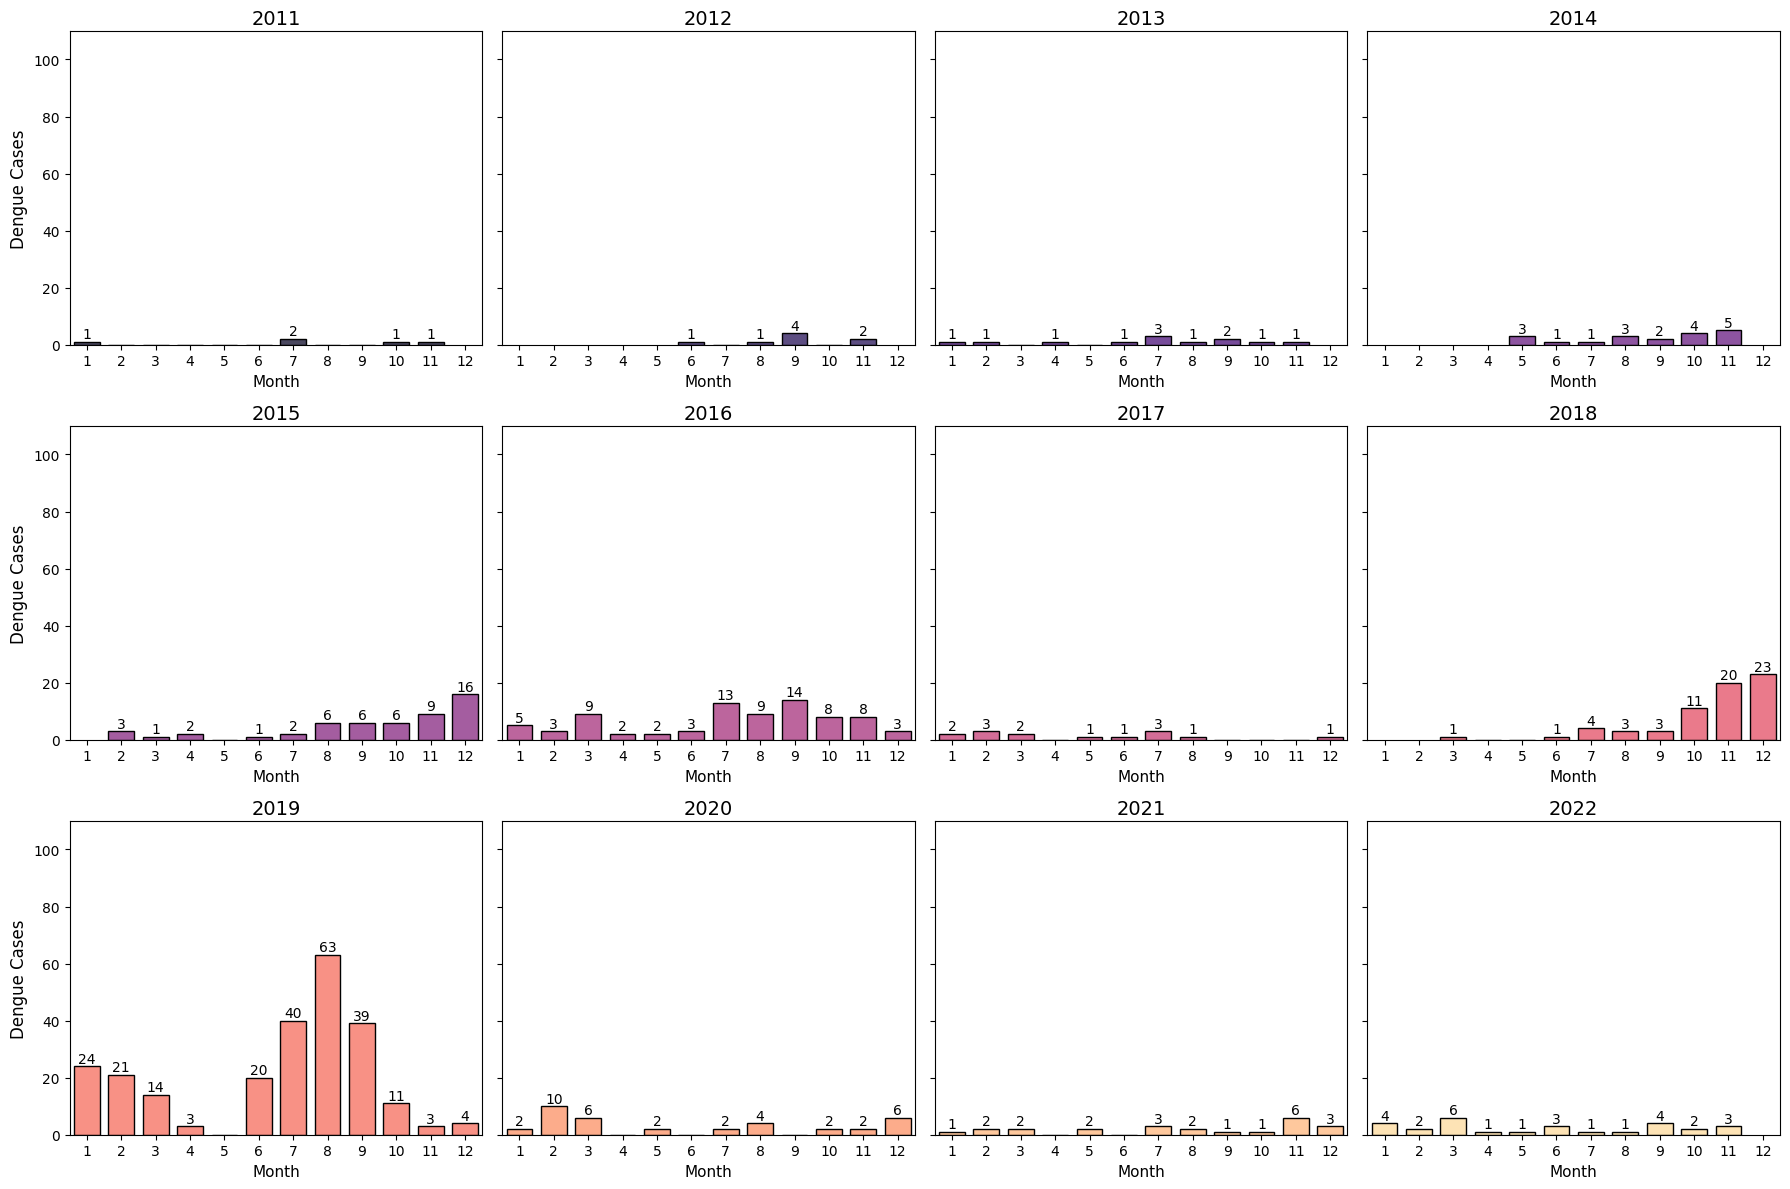

In [25]:
#HISTOGRAM FOR MONTHLY CASES EVERY YEAR
plot_dengue_cases(df, "DALIPUGA")


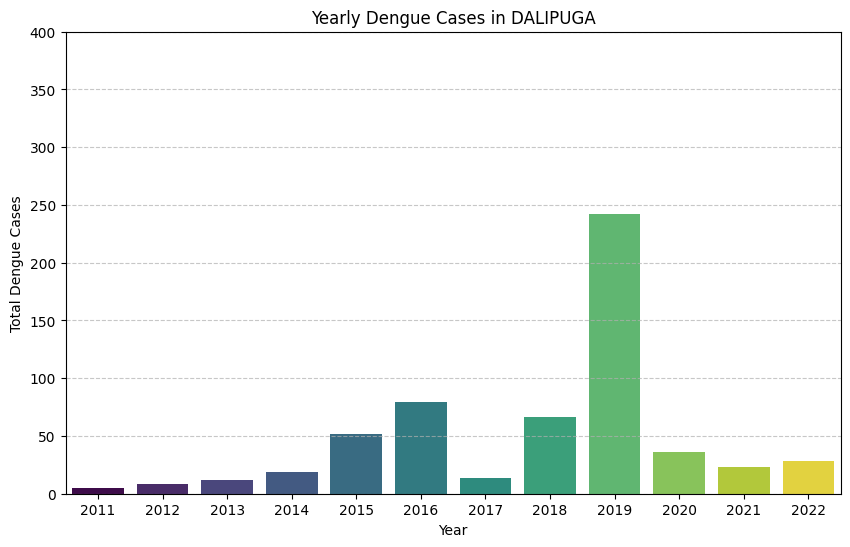

In [26]:
plot_total_dengue_cases_yearly(df, "DALIPUGA")

<div style="
    background-color: black; 
    color: white; 
    padding: 10px; 
    border-radius: 10px; 
    text-align: center;
    max-width: 100vw; 
    width: 100%;
    box-sizing: border-box;">
    DEL CARMEN MONTHLY CASES
</div>


In [27]:
# Example usage:
selected_barangay = "DEL CARMEN"  # Change this to any barangay you want
barangay_data = get_selected_barangay(df, selected_barangay)

# Display the data for each year
for year, data in barangay_data.items():
    display(data)


Barangay_No    Barangay       x         y  Year  Month  Dengue Cases  \
7              7  DEL CARMEN  8.2322  124.2578  2011      1             1   
51             7  DEL CARMEN  8.2322  124.2578  2011      2             0   
95             7  DEL CARMEN  8.2322  124.2578  2011      3             0   
139            7  DEL CARMEN  8.2322  124.2578  2011      4             1   
183            7  DEL CARMEN  8.2322  124.2578  2011      5             0   
227            7  DEL CARMEN  8.2322  124.2578  2011      6             1   
271            7  DEL CARMEN  8.2322  124.2578  2011      7             0   
315            7  DEL CARMEN  8.2322  124.2578  2011      8             0   
359            7  DEL CARMEN  8.2322  124.2578  2011      9             0   
403            7  DEL CARMEN  8.2322  124.2578  2011     10             0   
447            7  DEL CARMEN  8.2322  124.2578  2011     11             0   
491            7  DEL CARMEN  8.2322  124.2578  2011     12             1   

     Temperature  Humidity  Rainfall  
7           23.8      88.1       7.0  
51          24.1      87.2      12.0  
95          25.3      85.5      20.0  
139         26.0      83.1      35.0  
183         27.2      81.9      55.0  
227         26.4      83.5      90.0  
271         25.7      84.7     110.0  
315         25.1      85.3      95.0  
359         24.4      86.2      70.0  
403         24.0      87.0      50.0  
447         23.6      88.4      30.0  
491         23.2      89.1      15.0

Barangay_No    Barangay       x         y  Year  Month  Dengue Cases  \
535             7  DEL CARMEN  8.2322  124.2578  2012      1             0   
579             7  DEL CARMEN  8.2322  124.2578  2012      2             1   
623             7  DEL CARMEN  8.2322  124.2578  2012      3             1   
667             7  DEL CARMEN  8.2322  124.2578  2012      4             0   
711             7  DEL CARMEN  8.2322  124.2578  2012      5             0   
755             7  DEL CARMEN  8.2322  124.2578  2012      6             0   
799             7  DEL CARMEN  8.2322  124.2578  2012      7             1   
843             7  DEL CARMEN  8.2322  124.2578  2012      8             1   
887             7  DEL CARMEN  8.2322  124.2578  2012      9             1   
931             7  DEL CARMEN  8.2322  124.2578  2012     10             0   
975             7  DEL CARMEN  8.2322  124.2578  2012     11             1   
1019            7  DEL CARMEN  8.2322  124.2578  2012     12             0   

      Temperature  Humidity  Rainfall  
535          24.3      85.1       4.0  
579          24.3      85.7       7.1  
623          24.6      83.3       3.1  
667          25.4      82.3       6.9  
711          25.1      86.4       6.9  
755          24.7      85.3       7.9  
799          24.9      85.2       6.4  
843          24.9      85.2       6.4  
887          24.1      88.1      11.4  
931          24.6      86.5       8.4  
975          24.8      84.8       4.1  
1019         24.7      84.8       5.7

Barangay_No    Barangay       x         y  Year  Month  Dengue Cases  \
1063            7  DEL CARMEN  8.2322  124.2578  2013      1             1   
1107            7  DEL CARMEN  8.2322  124.2578  2013      2             1   
1151            7  DEL CARMEN  8.2322  124.2578  2013      3             1   
1195            7  DEL CARMEN  8.2322  124.2578  2013      4             1   
1239            7  DEL CARMEN  8.2322  124.2578  2013      5             0   
1283            7  DEL CARMEN  8.2322  124.2578  2013      6             0   
1327            7  DEL CARMEN  8.2322  124.2578  2013      7             0   
1371            7  DEL CARMEN  8.2322  124.2578  2013      8             1   
1415            7  DEL CARMEN  8.2322  124.2578  2013      9             1   
1459            7  DEL CARMEN  8.2322  124.2578  2013     10             0   
1503            7  DEL CARMEN  8.2322  124.2578  2013     11             0   
1547            7  DEL CARMEN  8.2322  124.2578  2013     12             1   

      Temperature  Humidity  Rainfall  
1063         24.2      88.2       8.1  
1107         24.4      84.7       6.0  
1151         25.5      81.1       2.7  
1195         26.0      81.0       4.9  
1239         26.0      82.8       5.2  
1283         24.9      86.9       9.2  
1327         24.5      87.7      11.0  
1371         24.3      87.2       6.9  
1415         24.6      86.5       4.9  
1459         24.0      88.0      10.4  
1503         24.2      85.9       7.8  
1547         24.4      84.0       3.5

Barangay_No    Barangay       x         y  Year  Month  Dengue Cases  \
1591            7  DEL CARMEN  8.2322  124.2578  2014      1             1   
1635            7  DEL CARMEN  8.2322  124.2578  2014      2             1   
1679            7  DEL CARMEN  8.2322  124.2578  2014      3             0   
1723            7  DEL CARMEN  8.2322  124.2578  2014      4             1   
1767            7  DEL CARMEN  8.2322  124.2578  2014      5             1   
1811            7  DEL CARMEN  8.2322  124.2578  2014      6             1   
1855            7  DEL CARMEN  8.2322  124.2578  2014      7             1   
1899            7  DEL CARMEN  8.2322  124.2578  2014      8             1   
1943            7  DEL CARMEN  8.2322  124.2578  2014      9             1   
1987            7  DEL CARMEN  8.2322  124.2578  2014     10             1   
2031            7  DEL CARMEN  8.2322  124.2578  2014     11             1   
2075            7  DEL CARMEN  8.2322  124.2578  2014     12             0   

      Temperature  Humidity  Rainfall  
1591         23.2      86.4       6.8  
1635         23.7      82.4       2.3  
1679         24.3      82.5       3.8  
1723         25.1      81.4       2.0  
1767         25.3      84.0       4.9  
1811         24.5      87.1       6.6  
1855         23.4      89.1       8.5  
1899         23.9      87.7       8.0  
1943         23.4      88.5       7.1  
1987         23.9      88.4       8.5  
2031         24.7      85.2       6.1  
2075         24.0      85.3       4.9

Barangay_No    Barangay       x         y  Year  Month  Dengue Cases  \
2119            7  DEL CARMEN  8.2322  124.2578  2015      1             0   
2163            7  DEL CARMEN  8.2322  124.2578  2015      2             0   
2207            7  DEL CARMEN  8.2322  124.2578  2015      3             1   
2251            7  DEL CARMEN  8.2322  124.2578  2015      4             0   
2295            7  DEL CARMEN  8.2322  124.2578  2015      5             1   
2339            7  DEL CARMEN  8.2322  124.2578  2015      6             1   
2383            7  DEL CARMEN  8.2322  124.2578  2015      7             0   
2427            7  DEL CARMEN  8.2322  124.2578  2015      8             1   
2471            7  DEL CARMEN  8.2322  124.2578  2015      9             1   
2515            7  DEL CARMEN  8.2322  124.2578  2015     10             1   
2559            7  DEL CARMEN  8.2322  124.2578  2015     11             0   
2603            7  DEL CARMEN  8.2322  124.2578  2015     12             1   

      Temperature  Humidity  Rainfall  
2119         25.6      89.0       5.9  
2163         25.6      87.0       3.0  
2207         26.1      83.2       1.1  
2251         27.3      82.8       2.1  
2295         28.4      78.1       2.7  
2339         27.4      81.9       8.7  
2383         27.6      80.4       4.2  
2427         27.5      80.9       5.5  
2471         27.2      82.4       8.2  
2515         27.2      83.4       4.9  
2559         26.8      87.3       6.5  
2603         26.5      87.1       4.8

Barangay_No    Barangay       x         y  Year  Month  Dengue Cases  \
2647            7  DEL CARMEN  8.2322  124.2578  2016      1             1   
2691            7  DEL CARMEN  8.2322  124.2578  2016      2             1   
2735            7  DEL CARMEN  8.2322  124.2578  2016      3             1   
2779            7  DEL CARMEN  8.2322  124.2578  2016      4             0   
2823            7  DEL CARMEN  8.2322  124.2578  2016      5             0   
2867            7  DEL CARMEN  8.2322  124.2578  2016      6             0   
2911            7  DEL CARMEN  8.2322  124.2578  2016      7             1   
2955            7  DEL CARMEN  8.2322  124.2578  2016      8             1   
2999            7  DEL CARMEN  8.2322  124.2578  2016      9             1   
3043            7  DEL CARMEN  8.2322  124.2578  2016     10             1   
3087            7  DEL CARMEN  8.2322  124.2578  2016     11             1   
3131            7  DEL CARMEN  8.2322  124.2578  2016     12             1   

      Temperature  Humidity  Rainfall  
2647         26.2      86.9       1.6  
2691         26.1      88.2       2.6  
2735         26.8      84.4       0.4  
2779         28.1      80.1       1.5  
2823         28.3      81.9       8.3  
2867         27.5      83.9      12.5  
2911         27.6      82.0       5.2  
2955         27.8      80.3       2.7  
2999         27.2      82.4       6.2  
3043         27.1      84.6       8.9  
3087         26.5      86.6       7.6  
3131         26.7      86.9       8.2

Barangay_No    Barangay       x         y  Year  Month  Dengue Cases  \
3175            7  DEL CARMEN  8.2322  124.2578  2017      1             1   
3219            7  DEL CARMEN  8.2322  124.2578  2017      2             1   
3263            7  DEL CARMEN  8.2322  124.2578  2017      3             0   
3307            7  DEL CARMEN  8.2322  124.2578  2017      4             0   
3351            7  DEL CARMEN  8.2322  124.2578  2017      5             0   
3395            7  DEL CARMEN  8.2322  124.2578  2017      6             1   
3439            7  DEL CARMEN  8.2322  124.2578  2017      7             1   
3483            7  DEL CARMEN  8.2322  124.2578  2017      8             1   
3527            7  DEL CARMEN  8.2322  124.2578  2017      9             1   
3571            7  DEL CARMEN  8.2322  124.2578  2017     10             0   
3615            7  DEL CARMEN  8.2322  124.2578  2017     11             1   
3659            7  DEL CARMEN  8.2322  124.2578  2017     12             0   

      Temperature  Humidity  Rainfall  
3175         25.9      88.9      12.5  
3219         25.6      87.8       5.9  
3263         26.1      87.4       8.0  
3307         27.2      85.0       5.1  
3351         27.8      84.4      10.4  
3395         27.4      83.8       7.8  
3439         27.2      82.6       9.1  
3483         27.9      83.4       9.6  
3527         27.3      83.3      11.4  
3571         27.0      84.0       8.3  
3615         27.0      86.6       7.3  
3659         26.7      85.9       9.6

Barangay_No    Barangay       x         y  Year  Month  Dengue Cases  \
3703            7  DEL CARMEN  8.2322  124.2578  2018      1             0   
3747            7  DEL CARMEN  8.2322  124.2578  2018      2             0   
3791            7  DEL CARMEN  8.2322  124.2578  2018      3             1   
3835            7  DEL CARMEN  8.2322  124.2578  2018      4             0   
3879            7  DEL CARMEN  8.2322  124.2578  2018      5             0   
3923            7  DEL CARMEN  8.2322  124.2578  2018      6             2   
3967            7  DEL CARMEN  8.2322  124.2578  2018      7             0   
4011            7  DEL CARMEN  8.2322  124.2578  2018      8             1   
4055            7  DEL CARMEN  8.2322  124.2578  2018      9             2   
4099            7  DEL CARMEN  8.2322  124.2578  2018     10             0   
4143            7  DEL CARMEN  8.2322  124.2578  2018     11             6   
4187            7  DEL CARMEN  8.2322  124.2578  2018     12            13   

      Temperature  Humidity  Rainfall  
3703         26.2      87.5       7.3  
3747         26.4      86.0       9.7  
3791         26.5      84.6       3.7  
3835         27.4      82.5       2.6  
3879         27.9      82.0       6.9  
3923         27.7      80.7       5.2  
3967         27.3      81.6       4.7  
4011         27.4      79.8       2.1  
4055         26.9      82.2       5.4  
4099         27.2      82.7       4.2  
4143         26.5      86.6       6.1  
4187         26.3      88.1       5.8

Barangay_No    Barangay       x         y  Year  Month  Dengue Cases  \
4231            7  DEL CARMEN  8.2322  124.2578  2019      1            24   
4275            7  DEL CARMEN  8.2322  124.2578  2019      2             5   
4319            7  DEL CARMEN  8.2322  124.2578  2019      3            17   
4363            7  DEL CARMEN  8.2322  124.2578  2019      4            19   
4407            7  DEL CARMEN  8.2322  124.2578  2019      5             3   
4451            7  DEL CARMEN  8.2322  124.2578  2019      6            10   
4495            7  DEL CARMEN  8.2322  124.2578  2019      7            37   
4539            7  DEL CARMEN  8.2322  124.2578  2019      8            40   
4583            7  DEL CARMEN  8.2322  124.2578  2019      9             4   
4627            7  DEL CARMEN  8.2322  124.2578  2019     10            22   
4671            7  DEL CARMEN  8.2322  124.2578  2019     11            15   
4715            7  DEL CARMEN  8.2322  124.2578  2019     12             3   

      Temperature  Humidity  Rainfall  
4231         25.5      88.2       5.7  
4275         25.3      84.3       1.1  
4319         26.1      83.2       1.9  
4363         27.5      80.3       1.8  
4407         28.4      78.6       4.4  
4451         27.8      82.7       9.1  
4495         27.2      82.1       6.2  
4539         27.7      77.1       1.4  
4583         27.8      78.2       3.3  
4627         27.0      83.8       7.7  
4671         27.1      82.9       4.3  
4715         26.4      86.4       4.2

Barangay_No    Barangay       x         y  Year  Month  Dengue Cases  \
4759            7  DEL CARMEN  8.2322  124.2578  2020      1             2   
4803            7  DEL CARMEN  8.2322  124.2578  2020      2             4   
4847            7  DEL CARMEN  8.2322  124.2578  2020      3             4   
4891            7  DEL CARMEN  8.2322  124.2578  2020      4             0   
4935            7  DEL CARMEN  8.2322  124.2578  2020      5             0   
4979            7  DEL CARMEN  8.2322  124.2578  2020      6             0   
5023            7  DEL CARMEN  8.2322  124.2578  2020      7             0   
5067            7  DEL CARMEN  8.2322  124.2578  2020      8             0   
5111            7  DEL CARMEN  8.2322  124.2578  2020      9             0   
5155            7  DEL CARMEN  8.2322  124.2578  2020     10             0   
5199            7  DEL CARMEN  8.2322  124.2578  2020     11             0   
5243            7  DEL CARMEN  8.2322  124.2578  2020     12             0   

      Temperature  Humidity  Rainfall  
4759         26.3      86.8       2.1  
4803         25.7      87.2       3.5  
4847         26.4      85.2       2.0  
4891         27.2      81.6       1.0  
4935         28.0      83.2       9.8  
4979         27.3      84.1      14.1  
5023         27.0      83.9      15.7  
5067         27.2      82.9      11.7  
5111         27.2      83.7       9.2  
5155         26.9      84.2      13.2  
5199         26.8      86.2       5.5  
5243         26.7      86.6       8.2

Barangay_No    Barangay       x         y  Year  Month  Dengue Cases  \
5287            7  DEL CARMEN  8.2322  124.2578  2021      1             1   
5331            7  DEL CARMEN  8.2322  124.2578  2021      2             0   
5375            7  DEL CARMEN  8.2322  124.2578  2021      3             1   
5419            7  DEL CARMEN  8.2322  124.2578  2021      4             0   
5463            7  DEL CARMEN  8.2322  124.2578  2021      5             1   
5507            7  DEL CARMEN  8.2322  124.2578  2021      6             2   
5551            7  DEL CARMEN  8.2322  124.2578  2021      7             1   
5595            7  DEL CARMEN  8.2322  124.2578  2021      8             1   
5639            7  DEL CARMEN  8.2322  124.2578  2021      9             0   
5683            7  DEL CARMEN  8.2322  124.2578  2021     10             1   
5727            7  DEL CARMEN  8.2322  124.2578  2021     11             3   
5771            7  DEL CARMEN  8.2322  124.2578  2021     12             2   

      Temperature  Humidity  Rainfall  
5287         25.9      88.5      11.9  
5331         26.0      87.1      12.6  
5375         26.8      84.7       5.5  
5419         27.1      82.5       4.5  
5463         27.5      84.0      10.7  
5507         27.6      81.3       8.2  
5551         27.7      80.0       4.4  
5595         27.5      80.0       6.5  
5639         27.2      82.7       9.5  
5683         27.3      83.6       8.7  
5727         27.0      86.4       9.4  
5771         26.2      86.9       9.8

Barangay_No    Barangay       x         y  Year  Month  Dengue Cases  \
5815            7  DEL CARMEN  8.2322  124.2578  2022      1             5   
5859            7  DEL CARMEN  8.2322  124.2578  2022      2             4   
5903            7  DEL CARMEN  8.2322  124.2578  2022      3             8   
5947            7  DEL CARMEN  8.2322  124.2578  2022      4             3   
5991            7  DEL CARMEN  8.2322  124.2578  2022      5             2   
6035            7  DEL CARMEN  8.2322  124.2578  2022      6             8   
6079            7  DEL CARMEN  8.2322  124.2578  2022      7            10   
6123            7  DEL CARMEN  8.2322  124.2578  2022      8             3   
6167            7  DEL CARMEN  8.2322  124.2578  2022      9             7   
6211            7  DEL CARMEN  8.2322  124.2578  2022     10             4   
6255            7  DEL CARMEN  8.2322  124.2578  2022     11             2   
6299            7  DEL CARMEN  8.2322  124.2578  2022     12             1   

      Temperature  Humidity  Rainfall  
5815         26.0      86.9       8.3  
5859         26.0      87.2       3.9  
5903         26.8      86.5      11.0  
5947         26.8      86.5      12.2  
5991         27.4      83.9      11.5  
6035         27.6      81.9       7.1  
6079         27.4      83.2      11.6  
6123         27.3      82.0       7.9  
6167         27.5      81.1       6.1  
6211         27.1      84.2       9.0  
6255         27.0      85.8       6.6  
6299         26.4      87.1      14.5

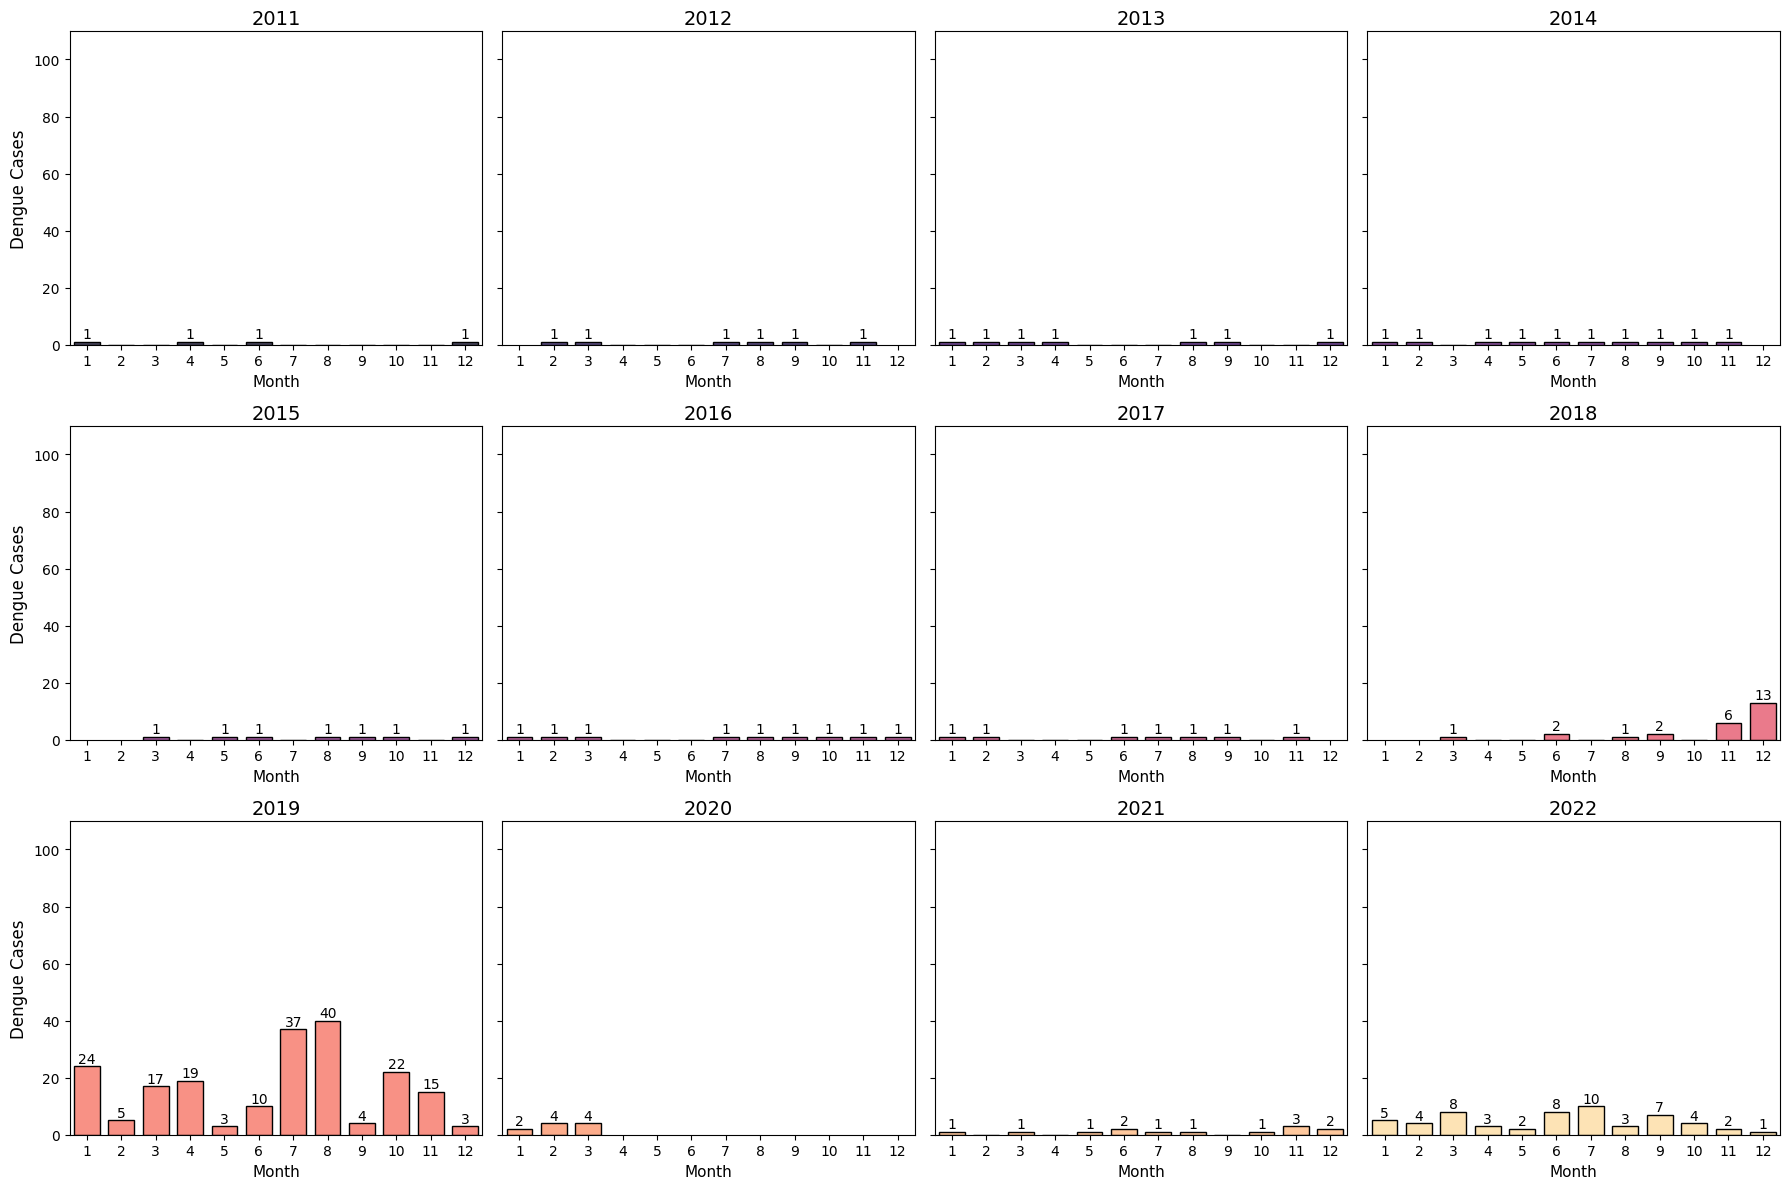

In [28]:
#HISTOGRAM FOR MONTHLY CASES EVERY YEAR
plot_dengue_cases(df, "DEL CARMEN")

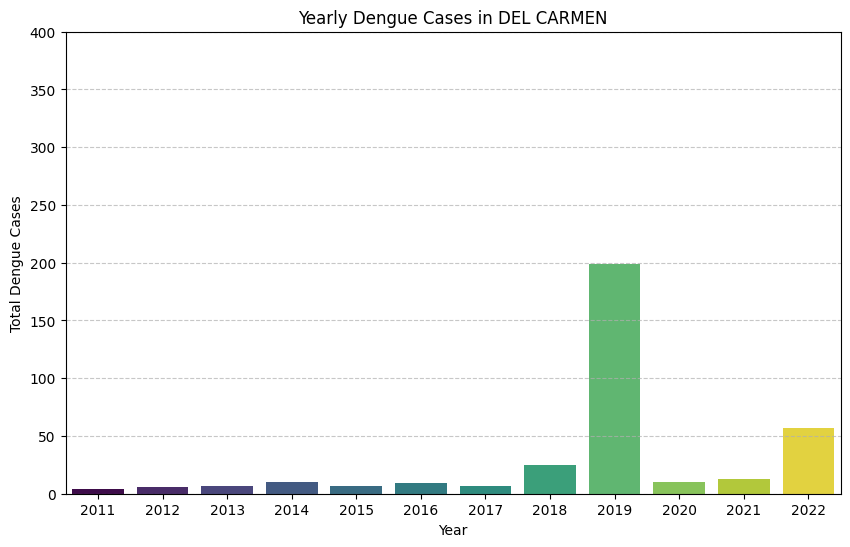

In [29]:
plot_total_dengue_cases_yearly(df, "DEL CARMEN")

<div style="
    background-color: black; 
    color: white; 
    padding: 10px; 
    border-radius: 10px; 
    text-align: center;
    max-width: 100vw; 
    width: 100%;
    box-sizing: border-box;">
    DIGKILAAN MONTHLY CASES
</div>


In [30]:
# Example usage:
selected_barangay = "DIGKILAAN"  # Change this to any barangay you want
barangay_data = get_selected_barangay(df, selected_barangay)

# Display the data for each year
for year, data in barangay_data.items():
    display(data)

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
8              8  DIGKILAAN  8.2492  124.3178  2011      1             0   
52             8  DIGKILAAN  8.2492  124.3178  2011      2             1   
96             8  DIGKILAAN  8.2492  124.3178  2011      3             1   
140            8  DIGKILAAN  8.2492  124.3178  2011      4             0   
184            8  DIGKILAAN  8.2492  124.3178  2011      5             0   
228            8  DIGKILAAN  8.2492  124.3178  2011      6             0   
272            8  DIGKILAAN  8.2492  124.3178  2011      7             0   
316            8  DIGKILAAN  8.2492  124.3178  2011      8             0   
360            8  DIGKILAAN  8.2492  124.3178  2011      9             0   
404            8  DIGKILAAN  8.2492  124.3178  2011     10             0   
448            8  DIGKILAAN  8.2492  124.3178  2011     11             0   
492            8  DIGKILAAN  8.2492  124.3178  2011     12             0   

     Temperature  Humidity  Rainfall  
8           23.8      88.1       7.0  
52          24.1      87.2      12.0  
96          25.3      85.5      20.0  
140         26.0      83.1      35.0  
184         27.2      81.9      55.0  
228         26.4      83.5      90.0  
272         25.7      84.7     110.0  
316         25.1      85.3      95.0  
360         24.4      86.2      70.0  
404         24.0      87.0      50.0  
448         23.6      88.4      30.0  
492         23.2      89.1      15.0

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
536             8  DIGKILAAN  8.2492  124.3178  2012      1             0   
580             8  DIGKILAAN  8.2492  124.3178  2012      2             0   
624             8  DIGKILAAN  8.2492  124.3178  2012      3             1   
668             8  DIGKILAAN  8.2492  124.3178  2012      4             0   
712             8  DIGKILAAN  8.2492  124.3178  2012      5             0   
756             8  DIGKILAAN  8.2492  124.3178  2012      6             0   
800             8  DIGKILAAN  8.2492  124.3178  2012      7             0   
844             8  DIGKILAAN  8.2492  124.3178  2012      8             0   
888             8  DIGKILAAN  8.2492  124.3178  2012      9             0   
932             8  DIGKILAAN  8.2492  124.3178  2012     10             0   
976             8  DIGKILAAN  8.2492  124.3178  2012     11             1   
1020            8  DIGKILAAN  8.2492  124.3178  2012     12             0   

      Temperature  Humidity  Rainfall  
536          24.3      85.1       4.0  
580          24.3      85.7       7.1  
624          24.6      83.3       3.1  
668          25.4      82.3       6.9  
712          25.1      86.4       6.9  
756          24.7      85.3       7.9  
800          24.9      85.2       6.4  
844          24.9      85.2       6.4  
888          24.1      88.1      11.4  
932          24.6      86.5       8.4  
976          24.8      84.8       4.1  
1020         24.7      84.8       5.7

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
1064            8  DIGKILAAN  8.2492  124.3178  2013      1             0   
1108            8  DIGKILAAN  8.2492  124.3178  2013      2             0   
1152            8  DIGKILAAN  8.2492  124.3178  2013      3             0   
1196            8  DIGKILAAN  8.2492  124.3178  2013      4             0   
1240            8  DIGKILAAN  8.2492  124.3178  2013      5             0   
1284            8  DIGKILAAN  8.2492  124.3178  2013      6             0   
1328            8  DIGKILAAN  8.2492  124.3178  2013      7             0   
1372            8  DIGKILAAN  8.2492  124.3178  2013      8             0   
1416            8  DIGKILAAN  8.2492  124.3178  2013      9             0   
1460            8  DIGKILAAN  8.2492  124.3178  2013     10             0   
1504            8  DIGKILAAN  8.2492  124.3178  2013     11             0   
1548            8  DIGKILAAN  8.2492  124.3178  2013     12             0   

      Temperature  Humidity  Rainfall  
1064         24.2      88.2       8.1  
1108         24.4      84.7       6.0  
1152         25.5      81.1       2.7  
1196         26.0      81.0       4.9  
1240         26.0      82.8       5.2  
1284         24.9      86.9       9.2  
1328         24.5      87.7      11.0  
1372         24.3      87.2       6.9  
1416         24.6      86.5       4.9  
1460         24.0      88.0      10.4  
1504         24.2      85.9       7.8  
1548         24.4      84.0       3.5

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
1592            8  DIGKILAAN  8.2492  124.3178  2014      1             0   
1636            8  DIGKILAAN  8.2492  124.3178  2014      2             0   
1680            8  DIGKILAAN  8.2492  124.3178  2014      3             0   
1724            8  DIGKILAAN  8.2492  124.3178  2014      4             0   
1768            8  DIGKILAAN  8.2492  124.3178  2014      5             0   
1812            8  DIGKILAAN  8.2492  124.3178  2014      6             0   
1856            8  DIGKILAAN  8.2492  124.3178  2014      7             1   
1900            8  DIGKILAAN  8.2492  124.3178  2014      8             1   
1944            8  DIGKILAAN  8.2492  124.3178  2014      9             0   
1988            8  DIGKILAAN  8.2492  124.3178  2014     10             0   
2032            8  DIGKILAAN  8.2492  124.3178  2014     11             0   
2076            8  DIGKILAAN  8.2492  124.3178  2014     12             0   

      Temperature  Humidity  Rainfall  
1592         23.2      86.4       6.8  
1636         23.7      82.4       2.3  
1680         24.3      82.5       3.8  
1724         25.1      81.4       2.0  
1768         25.3      84.0       4.9  
1812         24.5      87.1       6.6  
1856         23.4      89.1       8.5  
1900         23.9      87.7       8.0  
1944         23.4      88.5       7.1  
1988         23.9      88.4       8.5  
2032         24.7      85.2       6.1  
2076         24.0      85.3       4.9

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
2120            8  DIGKILAAN  8.2492  124.3178  2015      1             0   
2164            8  DIGKILAAN  8.2492  124.3178  2015      2             1   
2208            8  DIGKILAAN  8.2492  124.3178  2015      3             0   
2252            8  DIGKILAAN  8.2492  124.3178  2015      4             0   
2296            8  DIGKILAAN  8.2492  124.3178  2015      5             0   
2340            8  DIGKILAAN  8.2492  124.3178  2015      6             0   
2384            8  DIGKILAAN  8.2492  124.3178  2015      7             0   
2428            8  DIGKILAAN  8.2492  124.3178  2015      8             0   
2472            8  DIGKILAAN  8.2492  124.3178  2015      9             0   
2516            8  DIGKILAAN  8.2492  124.3178  2015     10             2   
2560            8  DIGKILAAN  8.2492  124.3178  2015     11             0   
2604            8  DIGKILAAN  8.2492  124.3178  2015     12             0   

      Temperature  Humidity  Rainfall  
2120         25.6      89.0       5.9  
2164         25.6      87.0       3.0  
2208         26.1      83.2       1.1  
2252         27.3      82.8       2.1  
2296         28.4      78.1       2.7  
2340         27.4      81.9       8.7  
2384         27.6      80.4       4.2  
2428         27.5      80.9       5.5  
2472         27.2      82.4       8.2  
2516         27.2      83.4       4.9  
2560         26.8      87.3       6.5  
2604         26.5      87.1       4.8

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
2648            8  DIGKILAAN  8.2492  124.3178  2016      1             0   
2692            8  DIGKILAAN  8.2492  124.3178  2016      2             1   
2736            8  DIGKILAAN  8.2492  124.3178  2016      3             0   
2780            8  DIGKILAAN  8.2492  124.3178  2016      4             0   
2824            8  DIGKILAAN  8.2492  124.3178  2016      5             0   
2868            8  DIGKILAAN  8.2492  124.3178  2016      6             2   
2912            8  DIGKILAAN  8.2492  124.3178  2016      7             1   
2956            8  DIGKILAAN  8.2492  124.3178  2016      8             3   
3000            8  DIGKILAAN  8.2492  124.3178  2016      9             0   
3044            8  DIGKILAAN  8.2492  124.3178  2016     10             0   
3088            8  DIGKILAAN  8.2492  124.3178  2016     11             0   
3132            8  DIGKILAAN  8.2492  124.3178  2016     12             0   

      Temperature  Humidity  Rainfall  
2648         26.2      86.9       1.6  
2692         26.1      88.2       2.6  
2736         26.8      84.4       0.4  
2780         28.1      80.1       1.5  
2824         28.3      81.9       8.3  
2868         27.5      83.9      12.5  
2912         27.6      82.0       5.2  
2956         27.8      80.3       2.7  
3000         27.2      82.4       6.2  
3044         27.1      84.6       8.9  
3088         26.5      86.6       7.6  
3132         26.7      86.9       8.2

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
3176            8  DIGKILAAN  8.2492  124.3178  2017      1             0   
3220            8  DIGKILAAN  8.2492  124.3178  2017      2             0   
3264            8  DIGKILAAN  8.2492  124.3178  2017      3             2   
3308            8  DIGKILAAN  8.2492  124.3178  2017      4             0   
3352            8  DIGKILAAN  8.2492  124.3178  2017      5             0   
3396            8  DIGKILAAN  8.2492  124.3178  2017      6             1   
3440            8  DIGKILAAN  8.2492  124.3178  2017      7             0   
3484            8  DIGKILAAN  8.2492  124.3178  2017      8             0   
3528            8  DIGKILAAN  8.2492  124.3178  2017      9             0   
3572            8  DIGKILAAN  8.2492  124.3178  2017     10             0   
3616            8  DIGKILAAN  8.2492  124.3178  2017     11             0   
3660            8  DIGKILAAN  8.2492  124.3178  2017     12             0   

      Temperature  Humidity  Rainfall  
3176         25.9      88.9      12.5  
3220         25.6      87.8       5.9  
3264         26.1      87.4       8.0  
3308         27.2      85.0       5.1  
3352         27.8      84.4      10.4  
3396         27.4      83.8       7.8  
3440         27.2      82.6       9.1  
3484         27.9      83.4       9.6  
3528         27.3      83.3      11.4  
3572         27.0      84.0       8.3  
3616         27.0      86.6       7.3  
3660         26.7      85.9       9.6

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
3704            8  DIGKILAAN  8.2492  124.3178  2018      1             0   
3748            8  DIGKILAAN  8.2492  124.3178  2018      2             0   
3792            8  DIGKILAAN  8.2492  124.3178  2018      3             0   
3836            8  DIGKILAAN  8.2492  124.3178  2018      4             0   
3880            8  DIGKILAAN  8.2492  124.3178  2018      5             0   
3924            8  DIGKILAAN  8.2492  124.3178  2018      6             1   
3968            8  DIGKILAAN  8.2492  124.3178  2018      7             0   
4012            8  DIGKILAAN  8.2492  124.3178  2018      8             1   
4056            8  DIGKILAAN  8.2492  124.3178  2018      9             1   
4100            8  DIGKILAAN  8.2492  124.3178  2018     10             0   
4144            8  DIGKILAAN  8.2492  124.3178  2018     11             1   
4188            8  DIGKILAAN  8.2492  124.3178  2018     12             3   

      Temperature  Humidity  Rainfall  
3704         26.2      87.5       7.3  
3748         26.4      86.0       9.7  
3792         26.5      84.6       3.7  
3836         27.4      82.5       2.6  
3880         27.9      82.0       6.9  
3924         27.7      80.7       5.2  
3968         27.3      81.6       4.7  
4012         27.4      79.8       2.1  
4056         26.9      82.2       5.4  
4100         27.2      82.7       4.2  
4144         26.5      86.6       6.1  
4188         26.3      88.1       5.8

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
4232            8  DIGKILAAN  8.2492  124.3178  2019      1             3   
4276            8  DIGKILAAN  8.2492  124.3178  2019      2             0   
4320            8  DIGKILAAN  8.2492  124.3178  2019      3             0   
4364            8  DIGKILAAN  8.2492  124.3178  2019      4             2   
4408            8  DIGKILAAN  8.2492  124.3178  2019      5             0   
4452            8  DIGKILAAN  8.2492  124.3178  2019      6             0   
4496            8  DIGKILAAN  8.2492  124.3178  2019      7             0   
4540            8  DIGKILAAN  8.2492  124.3178  2019      8            10   
4584            8  DIGKILAAN  8.2492  124.3178  2019      9             1   
4628            8  DIGKILAAN  8.2492  124.3178  2019     10             4   
4672            8  DIGKILAAN  8.2492  124.3178  2019     11             3   
4716            8  DIGKILAAN  8.2492  124.3178  2019     12            13   

      Temperature  Humidity  Rainfall  
4232         25.5      88.2       5.7  
4276         25.3      84.3       1.1  
4320         26.1      83.2       1.9  
4364         27.5      80.3       1.8  
4408         28.4      78.6       4.4  
4452         27.8      82.7       9.1  
4496         27.2      82.1       6.2  
4540         27.7      77.1       1.4  
4584         27.8      78.2       3.3  
4628         27.0      83.8       7.7  
4672         27.1      82.9       4.3  
4716         26.4      86.4       4.2

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
4760            8  DIGKILAAN  8.2492  124.3178  2020      1             0   
4804            8  DIGKILAAN  8.2492  124.3178  2020      2             0   
4848            8  DIGKILAAN  8.2492  124.3178  2020      3             0   
4892            8  DIGKILAAN  8.2492  124.3178  2020      4             2   
4936            8  DIGKILAAN  8.2492  124.3178  2020      5             0   
4980            8  DIGKILAAN  8.2492  124.3178  2020      6             0   
5024            8  DIGKILAAN  8.2492  124.3178  2020      7             6   
5068            8  DIGKILAAN  8.2492  124.3178  2020      8            12   
5112            8  DIGKILAAN  8.2492  124.3178  2020      9             4   
5156            8  DIGKILAAN  8.2492  124.3178  2020     10             2   
5200            8  DIGKILAAN  8.2492  124.3178  2020     11             4   
5244            8  DIGKILAAN  8.2492  124.3178  2020     12             0   

      Temperature  Humidity  Rainfall  
4760         26.3      86.8       2.1  
4804         25.7      87.2       3.5  
4848         26.4      85.2       2.0  
4892         27.2      81.6       1.0  
4936         28.0      83.2       9.8  
4980         27.3      84.1      14.1  
5024         27.0      83.9      15.7  
5068         27.2      82.9      11.7  
5112         27.2      83.7       9.2  
5156         26.9      84.2      13.2  
5200         26.8      86.2       5.5  
5244         26.7      86.6       8.2

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
5288            8  DIGKILAAN  8.2492  124.3178  2021      1             1   
5332            8  DIGKILAAN  8.2492  124.3178  2021      2             0   
5376            8  DIGKILAAN  8.2492  124.3178  2021      3             0   
5420            8  DIGKILAAN  8.2492  124.3178  2021      4             0   
5464            8  DIGKILAAN  8.2492  124.3178  2021      5             0   
5508            8  DIGKILAAN  8.2492  124.3178  2021      6             0   
5552            8  DIGKILAAN  8.2492  124.3178  2021      7             0   
5596            8  DIGKILAAN  8.2492  124.3178  2021      8             0   
5640            8  DIGKILAAN  8.2492  124.3178  2021      9             0   
5684            8  DIGKILAAN  8.2492  124.3178  2021     10             0   
5728            8  DIGKILAAN  8.2492  124.3178  2021     11             0   
5772            8  DIGKILAAN  8.2492  124.3178  2021     12             0   

      Temperature  Humidity  Rainfall  
5288         25.9      88.5      11.9  
5332         26.0      87.1      12.6  
5376         26.8      84.7       5.5  
5420         27.1      82.5       4.5  
5464         27.5      84.0      10.7  
5508         27.6      81.3       8.2  
5552         27.7      80.0       4.4  
5596         27.5      80.0       6.5  
5640         27.2      82.7       9.5  
5684         27.3      83.6       8.7  
5728         27.0      86.4       9.4  
5772         26.2      86.9       9.8

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
5816            8  DIGKILAAN  8.2492  124.3178  2022      1             0   
5860            8  DIGKILAAN  8.2492  124.3178  2022      2             0   
5904            8  DIGKILAAN  8.2492  124.3178  2022      3             0   
5948            8  DIGKILAAN  8.2492  124.3178  2022      4             0   
5992            8  DIGKILAAN  8.2492  124.3178  2022      5             0   
6036            8  DIGKILAAN  8.2492  124.3178  2022      6             0   
6080            8  DIGKILAAN  8.2492  124.3178  2022      7             0   
6124            8  DIGKILAAN  8.2492  124.3178  2022      8             0   
6168            8  DIGKILAAN  8.2492  124.3178  2022      9             0   
6212            8  DIGKILAAN  8.2492  124.3178  2022     10             0   
6256            8  DIGKILAAN  8.2492  124.3178  2022     11             2   
6300            8  DIGKILAAN  8.2492  124.3178  2022     12             0   

      Temperature  Humidity  Rainfall  
5816         26.0      86.9       8.3  
5860         26.0      87.2       3.9  
5904         26.8      86.5      11.0  
5948         26.8      86.5      12.2  
5992         27.4      83.9      11.5  
6036         27.6      81.9       7.1  
6080         27.4      83.2      11.6  
6124         27.3      82.0       7.9  
6168         27.5      81.1       6.1  
6212         27.1      84.2       9.0  
6256         27.0      85.8       6.6  
6300         26.4      87.1      14.5

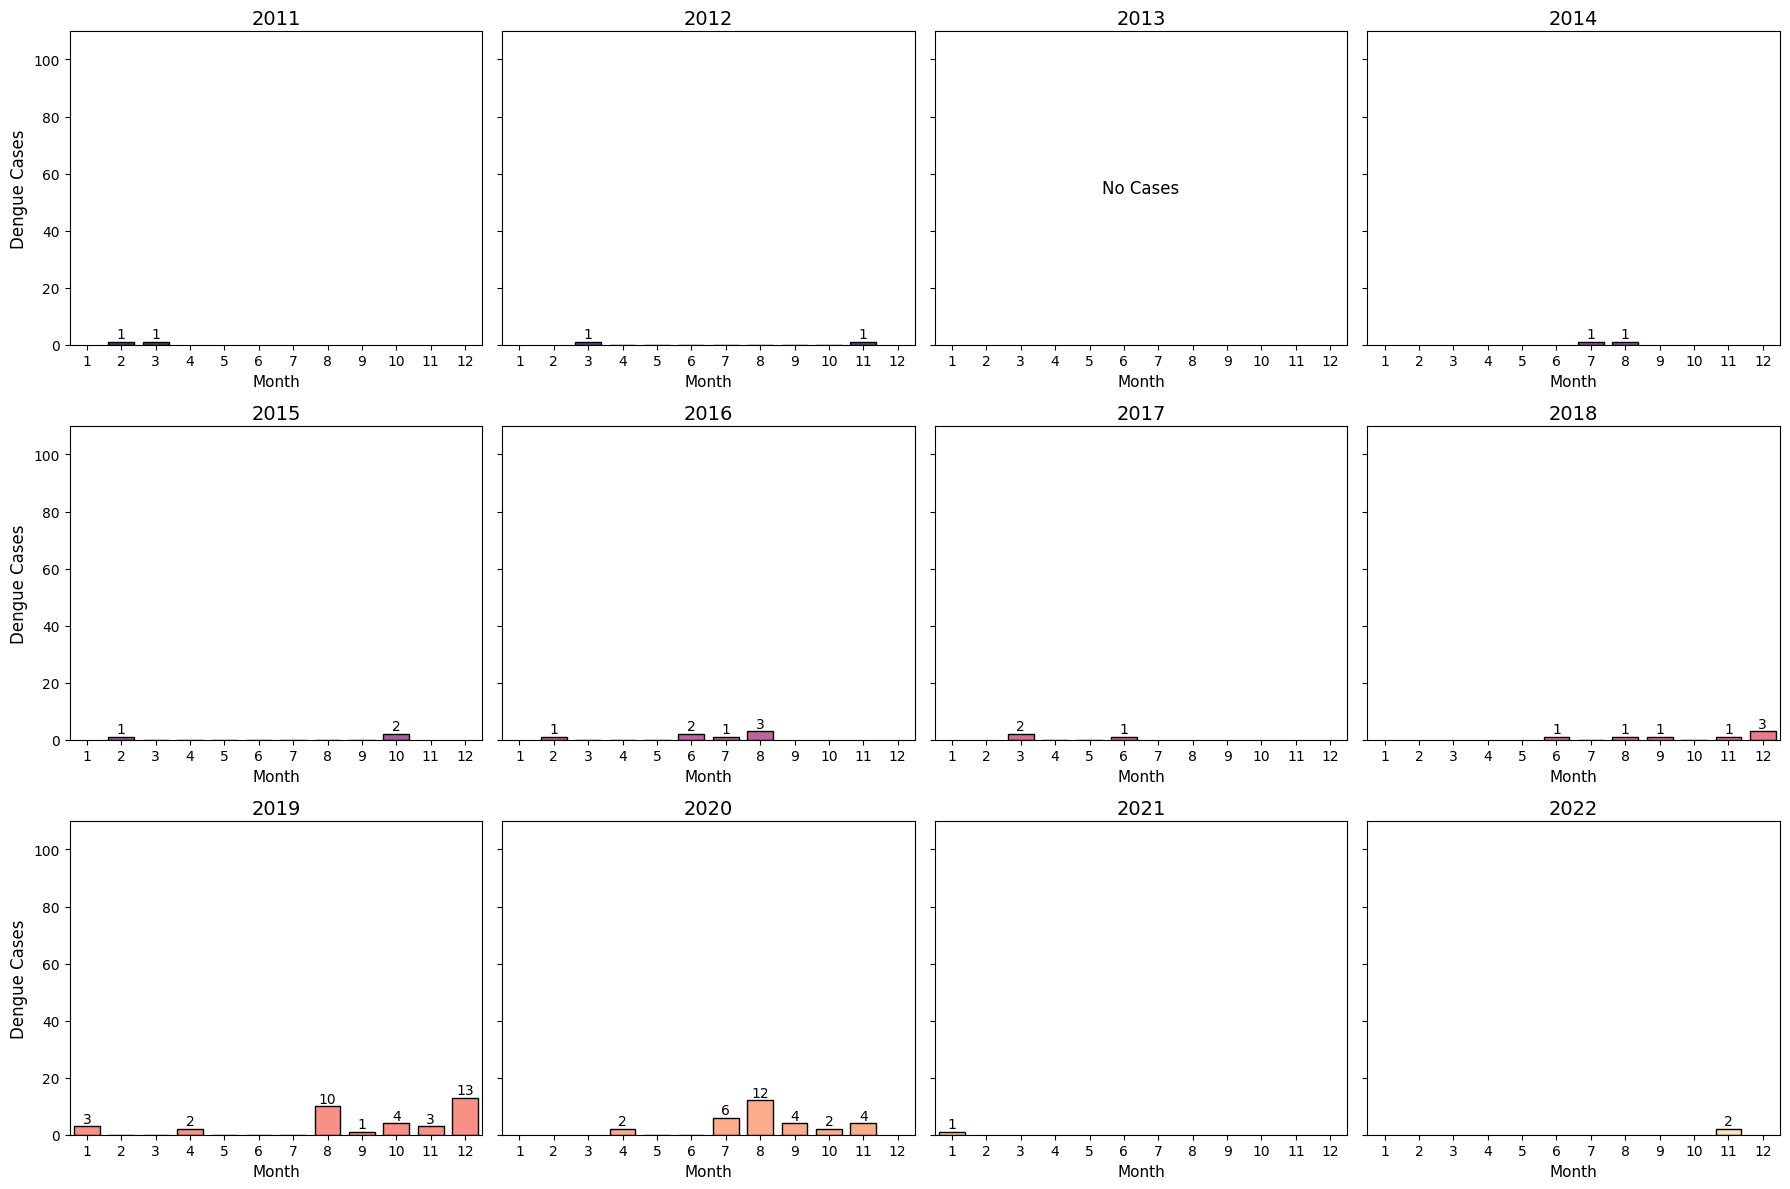

In [31]:
#HISTOGRAM FOR MONTHLY CASES EVERY YEAR
plot_dengue_cases(df, "DIGKILAAN")

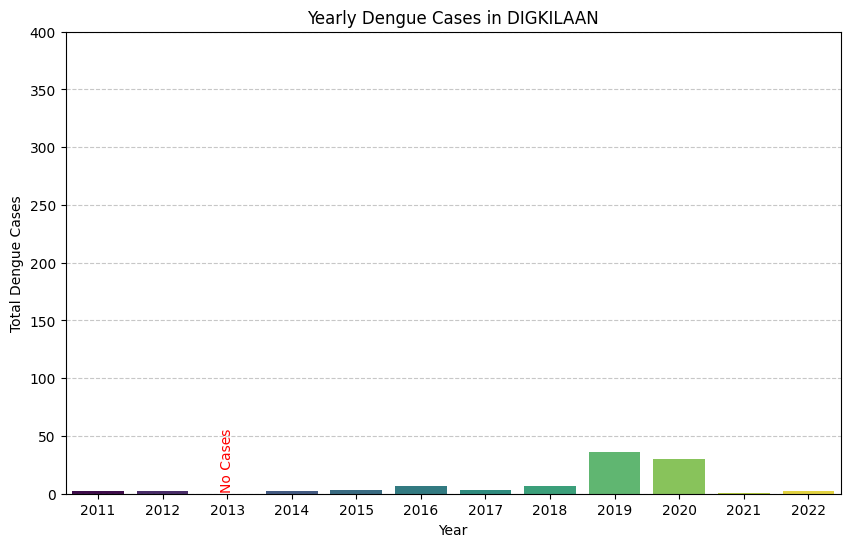

In [32]:
plot_total_dengue_cases_yearly(df, "DIGKILAAN")

<div style="
    background-color: black; 
    color: white; 
    padding: 10px; 
    border-radius: 10px; 
    text-align: center;
    max-width: 100vw; 
    width: 100%;
    box-sizing: border-box;">
    DITUCALAN MONTHLY CASES
</div>


In [33]:
# Example usage:
selected_barangay = "DITUCALAN"  # Change this to any barangay you want
barangay_data = get_selected_barangay(df, selected_barangay)

# Display the data for each year
for year, data in barangay_data.items():
    display(data)

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
9              9  DITUCALAN  8.1751  124.1927  2011      1             1   
53             9  DITUCALAN  8.1751  124.1927  2011      2             1   
97             9  DITUCALAN  8.1751  124.1927  2011      3             0   
141            9  DITUCALAN  8.1751  124.1927  2011      4             0   
185            9  DITUCALAN  8.1751  124.1927  2011      5             0   
229            9  DITUCALAN  8.1751  124.1927  2011      6             0   
273            9  DITUCALAN  8.1751  124.1927  2011      7             0   
317            9  DITUCALAN  8.1751  124.1927  2011      8             0   
361            9  DITUCALAN  8.1751  124.1927  2011      9             1   
405            9  DITUCALAN  8.1751  124.1927  2011     10             0   
449            9  DITUCALAN  8.1751  124.1927  2011     11             0   
493            9  DITUCALAN  8.1751  124.1927  2011     12             0   

     Temperature  Humidity  Rainfall  
9           23.8      88.1       7.0  
53          24.1      87.2      12.0  
97          25.3      85.5      20.0  
141         26.0      83.1      35.0  
185         27.2      81.9      55.0  
229         26.4      83.5      90.0  
273         25.7      84.7     110.0  
317         25.1      85.3      95.0  
361         24.4      86.2      70.0  
405         24.0      87.0      50.0  
449         23.6      88.4      30.0  
493         23.2      89.1      15.0

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
537             9  DITUCALAN  8.1751  124.1927  2012      1             0   
581             9  DITUCALAN  8.1751  124.1927  2012      2             1   
625             9  DITUCALAN  8.1751  124.1927  2012      3             0   
669             9  DITUCALAN  8.1751  124.1927  2012      4             0   
713             9  DITUCALAN  8.1751  124.1927  2012      5             0   
757             9  DITUCALAN  8.1751  124.1927  2012      6             0   
801             9  DITUCALAN  8.1751  124.1927  2012      7             0   
845             9  DITUCALAN  8.1751  124.1927  2012      8             0   
889             9  DITUCALAN  8.1751  124.1927  2012      9             0   
933             9  DITUCALAN  8.1751  124.1927  2012     10             2   
977             9  DITUCALAN  8.1751  124.1927  2012     11             0   
1021            9  DITUCALAN  8.1751  124.1927  2012     12             0   

      Temperature  Humidity  Rainfall  
537          24.3      85.1       4.0  
581          24.3      85.7       7.1  
625          24.6      83.3       3.1  
669          25.4      82.3       6.9  
713          25.1      86.4       6.9  
757          24.7      85.3       7.9  
801          24.9      85.2       6.4  
845          24.9      85.2       6.4  
889          24.1      88.1      11.4  
933          24.6      86.5       8.4  
977          24.8      84.8       4.1  
1021         24.7      84.8       5.7

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
1065            9  DITUCALAN  8.1751  124.1927  2013      1             0   
1109            9  DITUCALAN  8.1751  124.1927  2013      2             0   
1153            9  DITUCALAN  8.1751  124.1927  2013      3             0   
1197            9  DITUCALAN  8.1751  124.1927  2013      4             0   
1241            9  DITUCALAN  8.1751  124.1927  2013      5             0   
1285            9  DITUCALAN  8.1751  124.1927  2013      6             0   
1329            9  DITUCALAN  8.1751  124.1927  2013      7             0   
1373            9  DITUCALAN  8.1751  124.1927  2013      8             0   
1417            9  DITUCALAN  8.1751  124.1927  2013      9             0   
1461            9  DITUCALAN  8.1751  124.1927  2013     10             0   
1505            9  DITUCALAN  8.1751  124.1927  2013     11             0   
1549            9  DITUCALAN  8.1751  124.1927  2013     12             0   

      Temperature  Humidity  Rainfall  
1065         24.2      88.2       8.1  
1109         24.4      84.7       6.0  
1153         25.5      81.1       2.7  
1197         26.0      81.0       4.9  
1241         26.0      82.8       5.2  
1285         24.9      86.9       9.2  
1329         24.5      87.7      11.0  
1373         24.3      87.2       6.9  
1417         24.6      86.5       4.9  
1461         24.0      88.0      10.4  
1505         24.2      85.9       7.8  
1549         24.4      84.0       3.5

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
1593            9  DITUCALAN  8.1751  124.1927  2014      1             0   
1637            9  DITUCALAN  8.1751  124.1927  2014      2             0   
1681            9  DITUCALAN  8.1751  124.1927  2014      3             1   
1725            9  DITUCALAN  8.1751  124.1927  2014      4             0   
1769            9  DITUCALAN  8.1751  124.1927  2014      5             0   
1813            9  DITUCALAN  8.1751  124.1927  2014      6             0   
1857            9  DITUCALAN  8.1751  124.1927  2014      7             0   
1901            9  DITUCALAN  8.1751  124.1927  2014      8             0   
1945            9  DITUCALAN  8.1751  124.1927  2014      9             0   
1989            9  DITUCALAN  8.1751  124.1927  2014     10             0   
2033            9  DITUCALAN  8.1751  124.1927  2014     11             2   
2077            9  DITUCALAN  8.1751  124.1927  2014     12             1   

      Temperature  Humidity  Rainfall  
1593         23.2      86.4       6.8  
1637         23.7      82.4       2.3  
1681         24.3      82.5       3.8  
1725         25.1      81.4       2.0  
1769         25.3      84.0       4.9  
1813         24.5      87.1       6.6  
1857         23.4      89.1       8.5  
1901         23.9      87.7       8.0  
1945         23.4      88.5       7.1  
1989         23.9      88.4       8.5  
2033         24.7      85.2       6.1  
2077         24.0      85.3       4.9

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
2121            9  DITUCALAN  8.1751  124.1927  2015      1             0   
2165            9  DITUCALAN  8.1751  124.1927  2015      2             0   
2209            9  DITUCALAN  8.1751  124.1927  2015      3             0   
2253            9  DITUCALAN  8.1751  124.1927  2015      4             0   
2297            9  DITUCALAN  8.1751  124.1927  2015      5             0   
2341            9  DITUCALAN  8.1751  124.1927  2015      6             0   
2385            9  DITUCALAN  8.1751  124.1927  2015      7             0   
2429            9  DITUCALAN  8.1751  124.1927  2015      8             0   
2473            9  DITUCALAN  8.1751  124.1927  2015      9             0   
2517            9  DITUCALAN  8.1751  124.1927  2015     10             0   
2561            9  DITUCALAN  8.1751  124.1927  2015     11             1   
2605            9  DITUCALAN  8.1751  124.1927  2015     12             0   

      Temperature  Humidity  Rainfall  
2121         25.6      89.0       5.9  
2165         25.6      87.0       3.0  
2209         26.1      83.2       1.1  
2253         27.3      82.8       2.1  
2297         28.4      78.1       2.7  
2341         27.4      81.9       8.7  
2385         27.6      80.4       4.2  
2429         27.5      80.9       5.5  
2473         27.2      82.4       8.2  
2517         27.2      83.4       4.9  
2561         26.8      87.3       6.5  
2605         26.5      87.1       4.8

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
2649            9  DITUCALAN  8.1751  124.1927  2016      1             0   
2693            9  DITUCALAN  8.1751  124.1927  2016      2             0   
2737            9  DITUCALAN  8.1751  124.1927  2016      3             1   
2781            9  DITUCALAN  8.1751  124.1927  2016      4             0   
2825            9  DITUCALAN  8.1751  124.1927  2016      5             0   
2869            9  DITUCALAN  8.1751  124.1927  2016      6             1   
2913            9  DITUCALAN  8.1751  124.1927  2016      7             0   
2957            9  DITUCALAN  8.1751  124.1927  2016      8             2   
3001            9  DITUCALAN  8.1751  124.1927  2016      9             4   
3045            9  DITUCALAN  8.1751  124.1927  2016     10             1   
3089            9  DITUCALAN  8.1751  124.1927  2016     11             0   
3133            9  DITUCALAN  8.1751  124.1927  2016     12             0   

      Temperature  Humidity  Rainfall  
2649         26.2      86.9       1.6  
2693         26.1      88.2       2.6  
2737         26.8      84.4       0.4  
2781         28.1      80.1       1.5  
2825         28.3      81.9       8.3  
2869         27.5      83.9      12.5  
2913         27.6      82.0       5.2  
2957         27.8      80.3       2.7  
3001         27.2      82.4       6.2  
3045         27.1      84.6       8.9  
3089         26.5      86.6       7.6  
3133         26.7      86.9       8.2

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
3177            9  DITUCALAN  8.1751  124.1927  2017      1             2   
3221            9  DITUCALAN  8.1751  124.1927  2017      2             0   
3265            9  DITUCALAN  8.1751  124.1927  2017      3             1   
3309            9  DITUCALAN  8.1751  124.1927  2017      4             0   
3353            9  DITUCALAN  8.1751  124.1927  2017      5             0   
3397            9  DITUCALAN  8.1751  124.1927  2017      6             0   
3441            9  DITUCALAN  8.1751  124.1927  2017      7             0   
3485            9  DITUCALAN  8.1751  124.1927  2017      8             1   
3529            9  DITUCALAN  8.1751  124.1927  2017      9             0   
3573            9  DITUCALAN  8.1751  124.1927  2017     10             0   
3617            9  DITUCALAN  8.1751  124.1927  2017     11             1   
3661            9  DITUCALAN  8.1751  124.1927  2017     12             0   

      Temperature  Humidity  Rainfall  
3177         25.9      88.9      12.5  
3221         25.6      87.8       5.9  
3265         26.1      87.4       8.0  
3309         27.2      85.0       5.1  
3353         27.8      84.4      10.4  
3397         27.4      83.8       7.8  
3441         27.2      82.6       9.1  
3485         27.9      83.4       9.6  
3529         27.3      83.3      11.4  
3573         27.0      84.0       8.3  
3617         27.0      86.6       7.3  
3661         26.7      85.9       9.6

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
3705            9  DITUCALAN  8.1751  124.1927  2018      1             0   
3749            9  DITUCALAN  8.1751  124.1927  2018      2             0   
3793            9  DITUCALAN  8.1751  124.1927  2018      3             0   
3837            9  DITUCALAN  8.1751  124.1927  2018      4             0   
3881            9  DITUCALAN  8.1751  124.1927  2018      5             0   
3925            9  DITUCALAN  8.1751  124.1927  2018      6             0   
3969            9  DITUCALAN  8.1751  124.1927  2018      7             0   
4013            9  DITUCALAN  8.1751  124.1927  2018      8             0   
4057            9  DITUCALAN  8.1751  124.1927  2018      9             3   
4101            9  DITUCALAN  8.1751  124.1927  2018     10             0   
4145            9  DITUCALAN  8.1751  124.1927  2018     11             2   
4189            9  DITUCALAN  8.1751  124.1927  2018     12             5   

      Temperature  Humidity  Rainfall  
3705         26.2      87.5       7.3  
3749         26.4      86.0       9.7  
3793         26.5      84.6       3.7  
3837         27.4      82.5       2.6  
3881         27.9      82.0       6.9  
3925         27.7      80.7       5.2  
3969         27.3      81.6       4.7  
4013         27.4      79.8       2.1  
4057         26.9      82.2       5.4  
4101         27.2      82.7       4.2  
4145         26.5      86.6       6.1  
4189         26.3      88.1       5.8

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
4233            9  DITUCALAN  8.1751  124.1927  2019      1             0   
4277            9  DITUCALAN  8.1751  124.1927  2019      2             0   
4321            9  DITUCALAN  8.1751  124.1927  2019      3             3   
4365            9  DITUCALAN  8.1751  124.1927  2019      4             0   
4409            9  DITUCALAN  8.1751  124.1927  2019      5             0   
4453            9  DITUCALAN  8.1751  124.1927  2019      6             0   
4497            9  DITUCALAN  8.1751  124.1927  2019      7             0   
4541            9  DITUCALAN  8.1751  124.1927  2019      8             5   
4585            9  DITUCALAN  8.1751  124.1927  2019      9             3   
4629            9  DITUCALAN  8.1751  124.1927  2019     10             3   
4673            9  DITUCALAN  8.1751  124.1927  2019     11             3   
4717            9  DITUCALAN  8.1751  124.1927  2019     12             0   

      Temperature  Humidity  Rainfall  
4233         25.5      88.2       5.7  
4277         25.3      84.3       1.1  
4321         26.1      83.2       1.9  
4365         27.5      80.3       1.8  
4409         28.4      78.6       4.4  
4453         27.8      82.7       9.1  
4497         27.2      82.1       6.2  
4541         27.7      77.1       1.4  
4585         27.8      78.2       3.3  
4629         27.0      83.8       7.7  
4673         27.1      82.9       4.3  
4717         26.4      86.4       4.2

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
4761            9  DITUCALAN  8.1751  124.1927  2020      1             6   
4805            9  DITUCALAN  8.1751  124.1927  2020      2             2   
4849            9  DITUCALAN  8.1751  124.1927  2020      3             2   
4893            9  DITUCALAN  8.1751  124.1927  2020      4             0   
4937            9  DITUCALAN  8.1751  124.1927  2020      5             0   
4981            9  DITUCALAN  8.1751  124.1927  2020      6             0   
5025            9  DITUCALAN  8.1751  124.1927  2020      7             0   
5069            9  DITUCALAN  8.1751  124.1927  2020      8             0   
5113            9  DITUCALAN  8.1751  124.1927  2020      9             0   
5157            9  DITUCALAN  8.1751  124.1927  2020     10             0   
5201            9  DITUCALAN  8.1751  124.1927  2020     11             0   
5245            9  DITUCALAN  8.1751  124.1927  2020     12             2   

      Temperature  Humidity  Rainfall  
4761         26.3      86.8       2.1  
4805         25.7      87.2       3.5  
4849         26.4      85.2       2.0  
4893         27.2      81.6       1.0  
4937         28.0      83.2       9.8  
4981         27.3      84.1      14.1  
5025         27.0      83.9      15.7  
5069         27.2      82.9      11.7  
5113         27.2      83.7       9.2  
5157         26.9      84.2      13.2  
5201         26.8      86.2       5.5  
5245         26.7      86.6       8.2

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
5289            9  DITUCALAN  8.1751  124.1927  2021      1             0   
5333            9  DITUCALAN  8.1751  124.1927  2021      2             1   
5377            9  DITUCALAN  8.1751  124.1927  2021      3             0   
5421            9  DITUCALAN  8.1751  124.1927  2021      4             0   
5465            9  DITUCALAN  8.1751  124.1927  2021      5             0   
5509            9  DITUCALAN  8.1751  124.1927  2021      6             0   
5553            9  DITUCALAN  8.1751  124.1927  2021      7             0   
5597            9  DITUCALAN  8.1751  124.1927  2021      8             0   
5641            9  DITUCALAN  8.1751  124.1927  2021      9             0   
5685            9  DITUCALAN  8.1751  124.1927  2021     10             0   
5729            9  DITUCALAN  8.1751  124.1927  2021     11             0   
5773            9  DITUCALAN  8.1751  124.1927  2021     12             0   

      Temperature  Humidity  Rainfall  
5289         25.9      88.5      11.9  
5333         26.0      87.1      12.6  
5377         26.8      84.7       5.5  
5421         27.1      82.5       4.5  
5465         27.5      84.0      10.7  
5509         27.6      81.3       8.2  
5553         27.7      80.0       4.4  
5597         27.5      80.0       6.5  
5641         27.2      82.7       9.5  
5685         27.3      83.6       8.7  
5729         27.0      86.4       9.4  
5773         26.2      86.9       9.8

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
5817            9  DITUCALAN  8.1751  124.1927  2022      1             0   
5861            9  DITUCALAN  8.1751  124.1927  2022      2             0   
5905            9  DITUCALAN  8.1751  124.1927  2022      3             0   
5949            9  DITUCALAN  8.1751  124.1927  2022      4             0   
5993            9  DITUCALAN  8.1751  124.1927  2022      5             0   
6037            9  DITUCALAN  8.1751  124.1927  2022      6             0   
6081            9  DITUCALAN  8.1751  124.1927  2022      7             0   
6125            9  DITUCALAN  8.1751  124.1927  2022      8             0   
6169            9  DITUCALAN  8.1751  124.1927  2022      9             0   
6213            9  DITUCALAN  8.1751  124.1927  2022     10             0   
6257            9  DITUCALAN  8.1751  124.1927  2022     11             0   
6301            9  DITUCALAN  8.1751  124.1927  2022     12             0   

      Temperature  Humidity  Rainfall  
5817         26.0      86.9       8.3  
5861         26.0      87.2       3.9  
5905         26.8      86.5      11.0  
5949         26.8      86.5      12.2  
5993         27.4      83.9      11.5  
6037         27.6      81.9       7.1  
6081         27.4      83.2      11.6  
6125         27.3      82.0       7.9  
6169         27.5      81.1       6.1  
6213         27.1      84.2       9.0  
6257         27.0      85.8       6.6  
6301         26.4      87.1      14.5

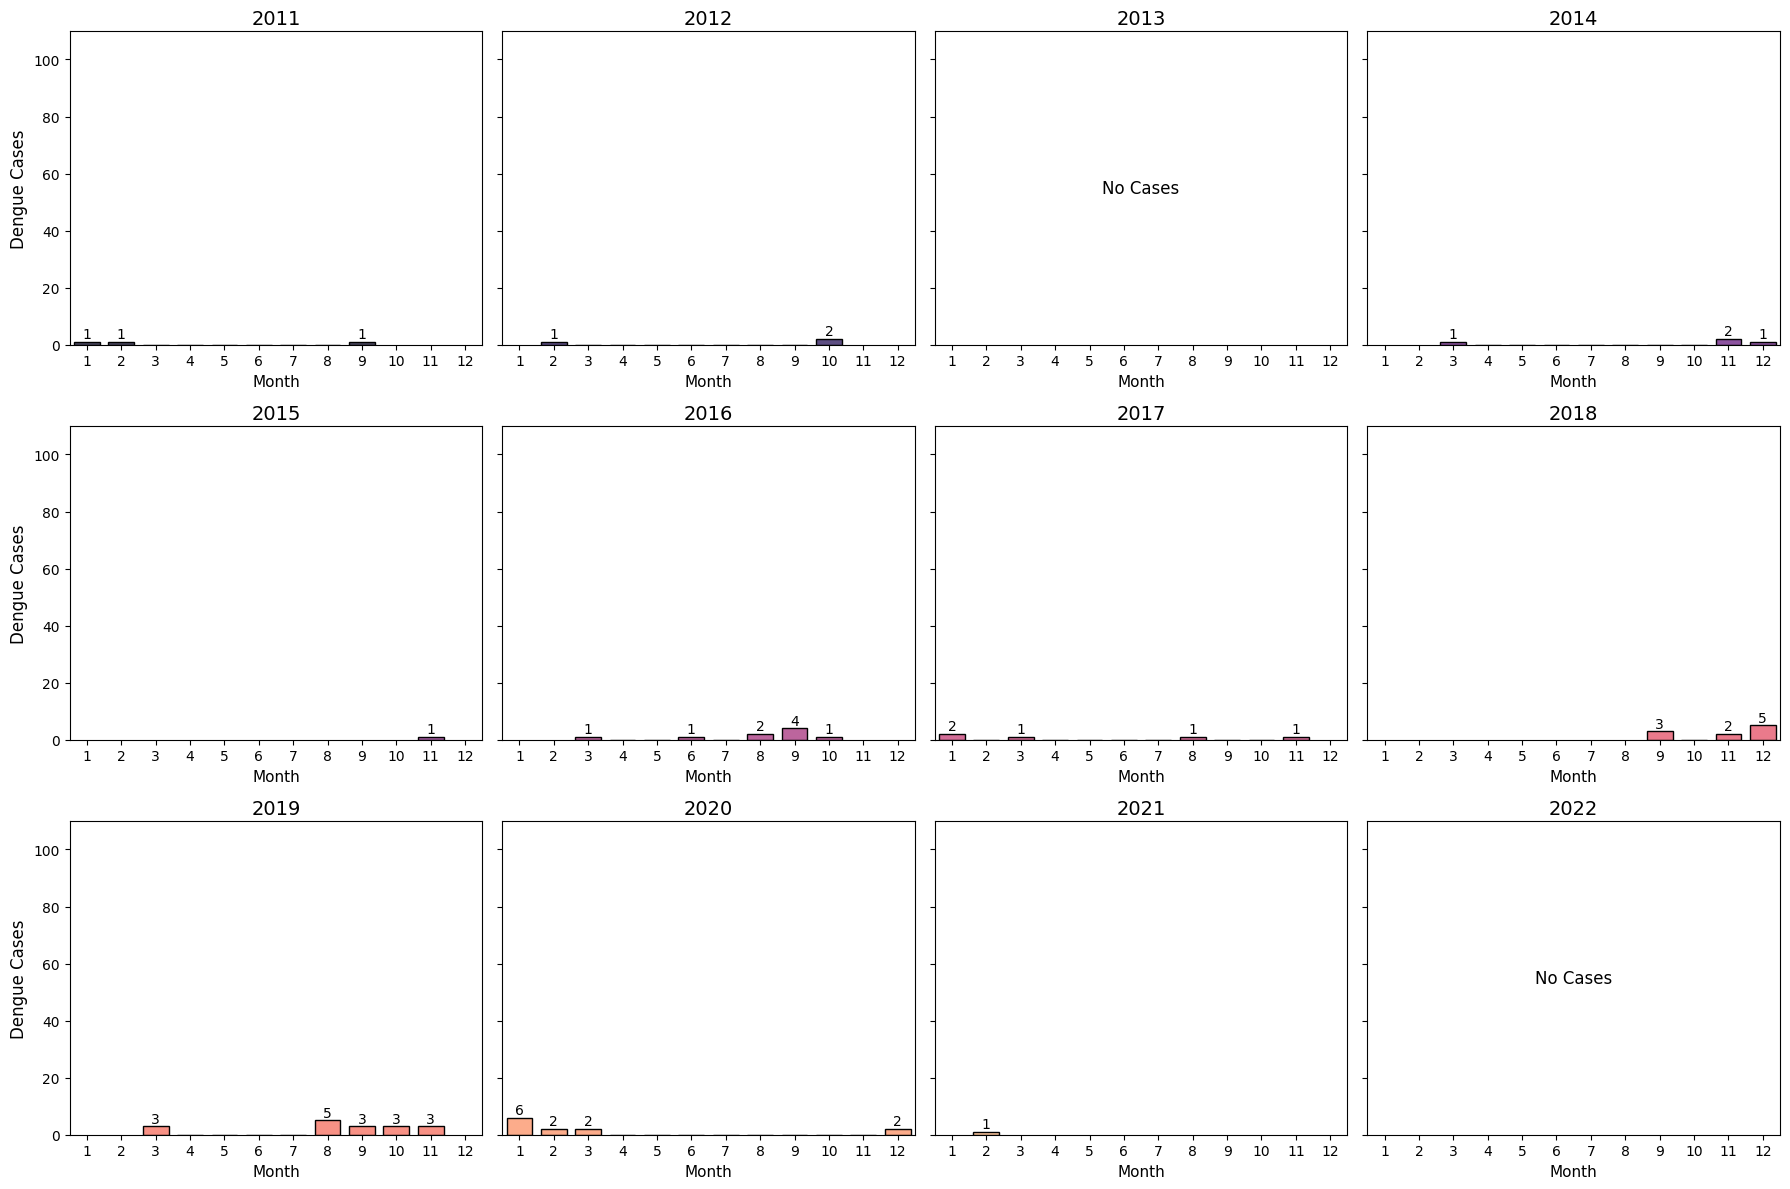

In [34]:
#HISTOGRAM FOR MONTHLY CASES EVERY YEAR
plot_dengue_cases(df, "DITUCALAN")

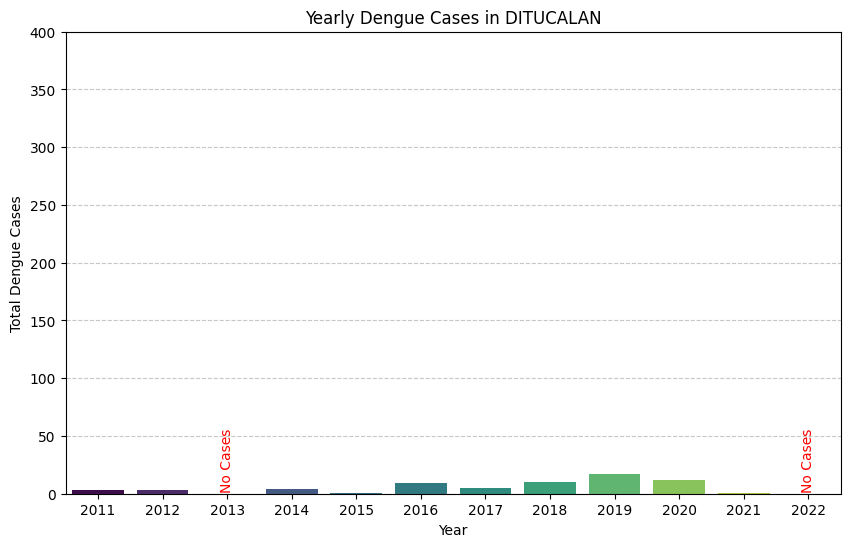

In [35]:
plot_total_dengue_cases_yearly(df, "DITUCALAN")

<div style="
    background-color: black; 
    color: white; 
    padding: 10px; 
    border-radius: 10px; 
    text-align: center;
    max-width: 100vw; 
    width: 100%;
    box-sizing: border-box;">
    HINAPLANON MONTHLY CASES
</div>


In [36]:
# Example usage:
selected_barangay = "HINAPLANON"  # Change this to any barangay you want
barangay_data = get_selected_barangay(df, selected_barangay)

# Display the data for each year
for year, data in barangay_data.items():
    display(data)


Barangay_No    Barangay       x         y  Year  Month  Dengue Cases  \
11            11  HINAPLANON  8.2467  124.2592  2011      1             0   
55            11  HINAPLANON  8.2467  124.2592  2011      2             0   
99            11  HINAPLANON  8.2467  124.2592  2011      3             0   
143           11  HINAPLANON  8.2467  124.2592  2011      4             0   
187           11  HINAPLANON  8.2467  124.2592  2011      5             0   
231           11  HINAPLANON  8.2467  124.2592  2011      6             0   
275           11  HINAPLANON  8.2467  124.2592  2011      7             1   
319           11  HINAPLANON  8.2467  124.2592  2011      8             0   
363           11  HINAPLANON  8.2467  124.2592  2011      9             0   
407           11  HINAPLANON  8.2467  124.2592  2011     10             0   
451           11  HINAPLANON  8.2467  124.2592  2011     11             0   
495           11  HINAPLANON  8.2467  124.2592  2011     12             1   

     Temperature  Humidity  Rainfall  
11          23.8      88.1       7.0  
55          24.1      87.2      12.0  
99          25.3      85.5      20.0  
143         26.0      83.1      35.0  
187         27.2      81.9      55.0  
231         26.4      83.5      90.0  
275         25.7      84.7     110.0  
319         25.1      85.3      95.0  
363         24.4      86.2      70.0  
407         24.0      87.0      50.0  
451         23.6      88.4      30.0  
495         23.2      89.1      15.0

Barangay_No    Barangay       x         y  Year  Month  Dengue Cases  \
539            11  HINAPLANON  8.2467  124.2592  2012      1             0   
583            11  HINAPLANON  8.2467  124.2592  2012      2             0   
627            11  HINAPLANON  8.2467  124.2592  2012      3             0   
671            11  HINAPLANON  8.2467  124.2592  2012      4             0   
715            11  HINAPLANON  8.2467  124.2592  2012      5             1   
759            11  HINAPLANON  8.2467  124.2592  2012      6             0   
803            11  HINAPLANON  8.2467  124.2592  2012      7             1   
847            11  HINAPLANON  8.2467  124.2592  2012      8             1   
891            11  HINAPLANON  8.2467  124.2592  2012      9             4   
935            11  HINAPLANON  8.2467  124.2592  2012     10             1   
979            11  HINAPLANON  8.2467  124.2592  2012     11             1   
1023           11  HINAPLANON  8.2467  124.2592  2012     12             0   

      Temperature  Humidity  Rainfall  
539          24.3      85.1       4.0  
583          24.3      85.7       7.1  
627          24.6      83.3       3.1  
671          25.4      82.3       6.9  
715          25.1      86.4       6.9  
759          24.7      85.3       7.9  
803          24.9      85.2       6.4  
847          24.9      85.2       6.4  
891          24.1      88.1      11.4  
935          24.6      86.5       8.4  
979          24.8      84.8       4.1  
1023         24.7      84.8       5.7

Barangay_No    Barangay       x         y  Year  Month  Dengue Cases  \
1067           11  HINAPLANON  8.2467  124.2592  2013      1             2   
1111           11  HINAPLANON  8.2467  124.2592  2013      2             2   
1155           11  HINAPLANON  8.2467  124.2592  2013      3             1   
1199           11  HINAPLANON  8.2467  124.2592  2013      4             0   
1243           11  HINAPLANON  8.2467  124.2592  2013      5             0   
1287           11  HINAPLANON  8.2467  124.2592  2013      6             0   
1331           11  HINAPLANON  8.2467  124.2592  2013      7             0   
1375           11  HINAPLANON  8.2467  124.2592  2013      8             0   
1419           11  HINAPLANON  8.2467  124.2592  2013      9             3   
1463           11  HINAPLANON  8.2467  124.2592  2013     10             1   
1507           11  HINAPLANON  8.2467  124.2592  2013     11             1   
1551           11  HINAPLANON  8.2467  124.2592  2013     12             1   

      Temperature  Humidity  Rainfall  
1067         24.2      88.2       8.1  
1111         24.4      84.7       6.0  
1155         25.5      81.1       2.7  
1199         26.0      81.0       4.9  
1243         26.0      82.8       5.2  
1287         24.9      86.9       9.2  
1331         24.5      87.7      11.0  
1375         24.3      87.2       6.9  
1419         24.6      86.5       4.9  
1463         24.0      88.0      10.4  
1507         24.2      85.9       7.8  
1551         24.4      84.0       3.5

Barangay_No    Barangay       x         y  Year  Month  Dengue Cases  \
1595           11  HINAPLANON  8.2467  124.2592  2014      1             1   
1639           11  HINAPLANON  8.2467  124.2592  2014      2             1   
1683           11  HINAPLANON  8.2467  124.2592  2014      3             1   
1727           11  HINAPLANON  8.2467  124.2592  2014      4             0   
1771           11  HINAPLANON  8.2467  124.2592  2014      5             2   
1815           11  HINAPLANON  8.2467  124.2592  2014      6             0   
1859           11  HINAPLANON  8.2467  124.2592  2014      7             1   
1903           11  HINAPLANON  8.2467  124.2592  2014      8             4   
1947           11  HINAPLANON  8.2467  124.2592  2014      9             1   
1991           11  HINAPLANON  8.2467  124.2592  2014     10             4   
2035           11  HINAPLANON  8.2467  124.2592  2014     11             0   
2079           11  HINAPLANON  8.2467  124.2592  2014     12             0   

      Temperature  Humidity  Rainfall  
1595         23.2      86.4       6.8  
1639         23.7      82.4       2.3  
1683         24.3      82.5       3.8  
1727         25.1      81.4       2.0  
1771         25.3      84.0       4.9  
1815         24.5      87.1       6.6  
1859         23.4      89.1       8.5  
1903         23.9      87.7       8.0  
1947         23.4      88.5       7.1  
1991         23.9      88.4       8.5  
2035         24.7      85.2       6.1  
2079         24.0      85.3       4.9

Barangay_No    Barangay       x         y  Year  Month  Dengue Cases  \
2123           11  HINAPLANON  8.2467  124.2592  2015      1             2   
2167           11  HINAPLANON  8.2467  124.2592  2015      2             4   
2211           11  HINAPLANON  8.2467  124.2592  2015      3             3   
2255           11  HINAPLANON  8.2467  124.2592  2015      4             0   
2299           11  HINAPLANON  8.2467  124.2592  2015      5            10   
2343           11  HINAPLANON  8.2467  124.2592  2015      6             0   
2387           11  HINAPLANON  8.2467  124.2592  2015      7             0   
2431           11  HINAPLANON  8.2467  124.2592  2015      8             0   
2475           11  HINAPLANON  8.2467  124.2592  2015      9             4   
2519           11  HINAPLANON  8.2467  124.2592  2015     10             3   
2563           11  HINAPLANON  8.2467  124.2592  2015     11            18   
2607           11  HINAPLANON  8.2467  124.2592  2015     12            14   

      Temperature  Humidity  Rainfall  
2123         25.6      89.0       5.9  
2167         25.6      87.0       3.0  
2211         26.1      83.2       1.1  
2255         27.3      82.8       2.1  
2299         28.4      78.1       2.7  
2343         27.4      81.9       8.7  
2387         27.6      80.4       4.2  
2431         27.5      80.9       5.5  
2475         27.2      82.4       8.2  
2519         27.2      83.4       4.9  
2563         26.8      87.3       6.5  
2607         26.5      87.1       4.8

Barangay_No    Barangay       x         y  Year  Month  Dengue Cases  \
2651           11  HINAPLANON  8.2467  124.2592  2016      1             7   
2695           11  HINAPLANON  8.2467  124.2592  2016      2             5   
2739           11  HINAPLANON  8.2467  124.2592  2016      3             3   
2783           11  HINAPLANON  8.2467  124.2592  2016      4             0   
2827           11  HINAPLANON  8.2467  124.2592  2016      5             0   
2871           11  HINAPLANON  8.2467  124.2592  2016      6             1   
2915           11  HINAPLANON  8.2467  124.2592  2016      7             9   
2959           11  HINAPLANON  8.2467  124.2592  2016      8            15   
3003           11  HINAPLANON  8.2467  124.2592  2016      9            15   
3047           11  HINAPLANON  8.2467  124.2592  2016     10             8   
3091           11  HINAPLANON  8.2467  124.2592  2016     11             6   
3135           11  HINAPLANON  8.2467  124.2592  2016     12            20   

      Temperature  Humidity  Rainfall  
2651         26.2      86.9       1.6  
2695         26.1      88.2       2.6  
2739         26.8      84.4       0.4  
2783         28.1      80.1       1.5  
2827         28.3      81.9       8.3  
2871         27.5      83.9      12.5  
2915         27.6      82.0       5.2  
2959         27.8      80.3       2.7  
3003         27.2      82.4       6.2  
3047         27.1      84.6       8.9  
3091         26.5      86.6       7.6  
3135         26.7      86.9       8.2

Barangay_No    Barangay       x         y  Year  Month  Dengue Cases  \
3179           11  HINAPLANON  8.2467  124.2592  2017      1             5   
3223           11  HINAPLANON  8.2467  124.2592  2017      2             4   
3267           11  HINAPLANON  8.2467  124.2592  2017      3             4   
3311           11  HINAPLANON  8.2467  124.2592  2017      4             0   
3355           11  HINAPLANON  8.2467  124.2592  2017      5             1   
3399           11  HINAPLANON  8.2467  124.2592  2017      6             0   
3443           11  HINAPLANON  8.2467  124.2592  2017      7             0   
3487           11  HINAPLANON  8.2467  124.2592  2017      8             1   
3531           11  HINAPLANON  8.2467  124.2592  2017      9             3   
3575           11  HINAPLANON  8.2467  124.2592  2017     10             0   
3619           11  HINAPLANON  8.2467  124.2592  2017     11             1   
3663           11  HINAPLANON  8.2467  124.2592  2017     12             0   

      Temperature  Humidity  Rainfall  
3179         25.9      88.9      12.5  
3223         25.6      87.8       5.9  
3267         26.1      87.4       8.0  
3311         27.2      85.0       5.1  
3355         27.8      84.4      10.4  
3399         27.4      83.8       7.8  
3443         27.2      82.6       9.1  
3487         27.9      83.4       9.6  
3531         27.3      83.3      11.4  
3575         27.0      84.0       8.3  
3619         27.0      86.6       7.3  
3663         26.7      85.9       9.6

Barangay_No    Barangay       x         y  Year  Month  Dengue Cases  \
3707           11  HINAPLANON  8.2467  124.2592  2018      1             7   
3751           11  HINAPLANON  8.2467  124.2592  2018      2             4   
3795           11  HINAPLANON  8.2467  124.2592  2018      3             5   
3839           11  HINAPLANON  8.2467  124.2592  2018      4             3   
3883           11  HINAPLANON  8.2467  124.2592  2018      5             0   
3927           11  HINAPLANON  8.2467  124.2592  2018      6             2   
3971           11  HINAPLANON  8.2467  124.2592  2018      7             3   
4015           11  HINAPLANON  8.2467  124.2592  2018      8             4   
4059           11  HINAPLANON  8.2467  124.2592  2018      9            10   
4103           11  HINAPLANON  8.2467  124.2592  2018     10            22   
4147           11  HINAPLANON  8.2467  124.2592  2018     11            16   
4191           11  HINAPLANON  8.2467  124.2592  2018     12            20   

      Temperature  Humidity  Rainfall  
3707         26.2      87.5       7.3  
3751         26.4      86.0       9.7  
3795         26.5      84.6       3.7  
3839         27.4      82.5       2.6  
3883         27.9      82.0       6.9  
3927         27.7      80.7       5.2  
3971         27.3      81.6       4.7  
4015         27.4      79.8       2.1  
4059         26.9      82.2       5.4  
4103         27.2      82.7       4.2  
4147         26.5      86.6       6.1  
4191         26.3      88.1       5.8

Barangay_No    Barangay       x         y  Year  Month  Dengue Cases  \
4235           11  HINAPLANON  8.2467  124.2592  2019      1            23   
4279           11  HINAPLANON  8.2467  124.2592  2019      2             8   
4323           11  HINAPLANON  8.2467  124.2592  2019      3            11   
4367           11  HINAPLANON  8.2467  124.2592  2019      4             6   
4411           11  HINAPLANON  8.2467  124.2592  2019      5             3   
4455           11  HINAPLANON  8.2467  124.2592  2019      6             7   
4499           11  HINAPLANON  8.2467  124.2592  2019      7            37   
4543           11  HINAPLANON  8.2467  124.2592  2019      8            51   
4587           11  HINAPLANON  8.2467  124.2592  2019      9            24   
4631           11  HINAPLANON  8.2467  124.2592  2019     10            25   
4675           11  HINAPLANON  8.2467  124.2592  2019     11            21   
4719           11  HINAPLANON  8.2467  124.2592  2019     12             3   

      Temperature  Humidity  Rainfall  
4235         25.5      88.2       5.7  
4279         25.3      84.3       1.1  
4323         26.1      83.2       1.9  
4367         27.5      80.3       1.8  
4411         28.4      78.6       4.4  
4455         27.8      82.7       9.1  
4499         27.2      82.1       6.2  
4543         27.7      77.1       1.4  
4587         27.8      78.2       3.3  
4631         27.0      83.8       7.7  
4675         27.1      82.9       4.3  
4719         26.4      86.4       4.2

Barangay_No    Barangay       x         y  Year  Month  Dengue Cases  \
4763           11  HINAPLANON  8.2467  124.2592  2020      1            18   
4807           11  HINAPLANON  8.2467  124.2592  2020      2            20   
4851           11  HINAPLANON  8.2467  124.2592  2020      3            10   
4895           11  HINAPLANON  8.2467  124.2592  2020      4             0   
4939           11  HINAPLANON  8.2467  124.2592  2020      5             0   
4983           11  HINAPLANON  8.2467  124.2592  2020      6             0   
5027           11  HINAPLANON  8.2467  124.2592  2020      7             4   
5071           11  HINAPLANON  8.2467  124.2592  2020      8             2   
5115           11  HINAPLANON  8.2467  124.2592  2020      9             0   
5159           11  HINAPLANON  8.2467  124.2592  2020     10             0   
5203           11  HINAPLANON  8.2467  124.2592  2020     11             0   
5247           11  HINAPLANON  8.2467  124.2592  2020     12             5   

      Temperature  Humidity  Rainfall  
4763         26.3      86.8       2.1  
4807         25.7      87.2       3.5  
4851         26.4      85.2       2.0  
4895         27.2      81.6       1.0  
4939         28.0      83.2       9.8  
4983         27.3      84.1      14.1  
5027         27.0      83.9      15.7  
5071         27.2      82.9      11.7  
5115         27.2      83.7       9.2  
5159         26.9      84.2      13.2  
5203         26.8      86.2       5.5  
5247         26.7      86.6       8.2

Barangay_No    Barangay       x         y  Year  Month  Dengue Cases  \
5291           11  HINAPLANON  8.2467  124.2592  2021      1             3   
5335           11  HINAPLANON  8.2467  124.2592  2021      2             2   
5379           11  HINAPLANON  8.2467  124.2592  2021      3             3   
5423           11  HINAPLANON  8.2467  124.2592  2021      4             3   
5467           11  HINAPLANON  8.2467  124.2592  2021      5             3   
5511           11  HINAPLANON  8.2467  124.2592  2021      6             5   
5555           11  HINAPLANON  8.2467  124.2592  2021      7             6   
5599           11  HINAPLANON  8.2467  124.2592  2021      8             3   
5643           11  HINAPLANON  8.2467  124.2592  2021      9             4   
5687           11  HINAPLANON  8.2467  124.2592  2021     10             2   
5731           11  HINAPLANON  8.2467  124.2592  2021     11             8   
5775           11  HINAPLANON  8.2467  124.2592  2021     12            10   

      Temperature  Humidity  Rainfall  
5291         25.9      88.5      11.9  
5335         26.0      87.1      12.6  
5379         26.8      84.7       5.5  
5423         27.1      82.5       4.5  
5467         27.5      84.0      10.7  
5511         27.6      81.3       8.2  
5555         27.7      80.0       4.4  
5599         27.5      80.0       6.5  
5643         27.2      82.7       9.5  
5687         27.3      83.6       8.7  
5731         27.0      86.4       9.4  
5775         26.2      86.9       9.8

Barangay_No    Barangay       x         y  Year  Month  Dengue Cases  \
5819           11  HINAPLANON  8.2467  124.2592  2022      1             3   
5863           11  HINAPLANON  8.2467  124.2592  2022      2             3   
5907           11  HINAPLANON  8.2467  124.2592  2022      3             2   
5951           11  HINAPLANON  8.2467  124.2592  2022      4             4   
5995           11  HINAPLANON  8.2467  124.2592  2022      5             4   
6039           11  HINAPLANON  8.2467  124.2592  2022      6             7   
6083           11  HINAPLANON  8.2467  124.2592  2022      7             9   
6127           11  HINAPLANON  8.2467  124.2592  2022      8             3   
6171           11  HINAPLANON  8.2467  124.2592  2022      9             6   
6215           11  HINAPLANON  8.2467  124.2592  2022     10             8   
6259           11  HINAPLANON  8.2467  124.2592  2022     11             3   
6303           11  HINAPLANON  8.2467  124.2592  2022     12             3   

      Temperature  Humidity  Rainfall  
5819         26.0      86.9       8.3  
5863         26.0      87.2       3.9  
5907         26.8      86.5      11.0  
5951         26.8      86.5      12.2  
5995         27.4      83.9      11.5  
6039         27.6      81.9       7.1  
6083         27.4      83.2      11.6  
6127         27.3      82.0       7.9  
6171         27.5      81.1       6.1  
6215         27.1      84.2       9.0  
6259         27.0      85.8       6.6  
6303         26.4      87.1      14.5

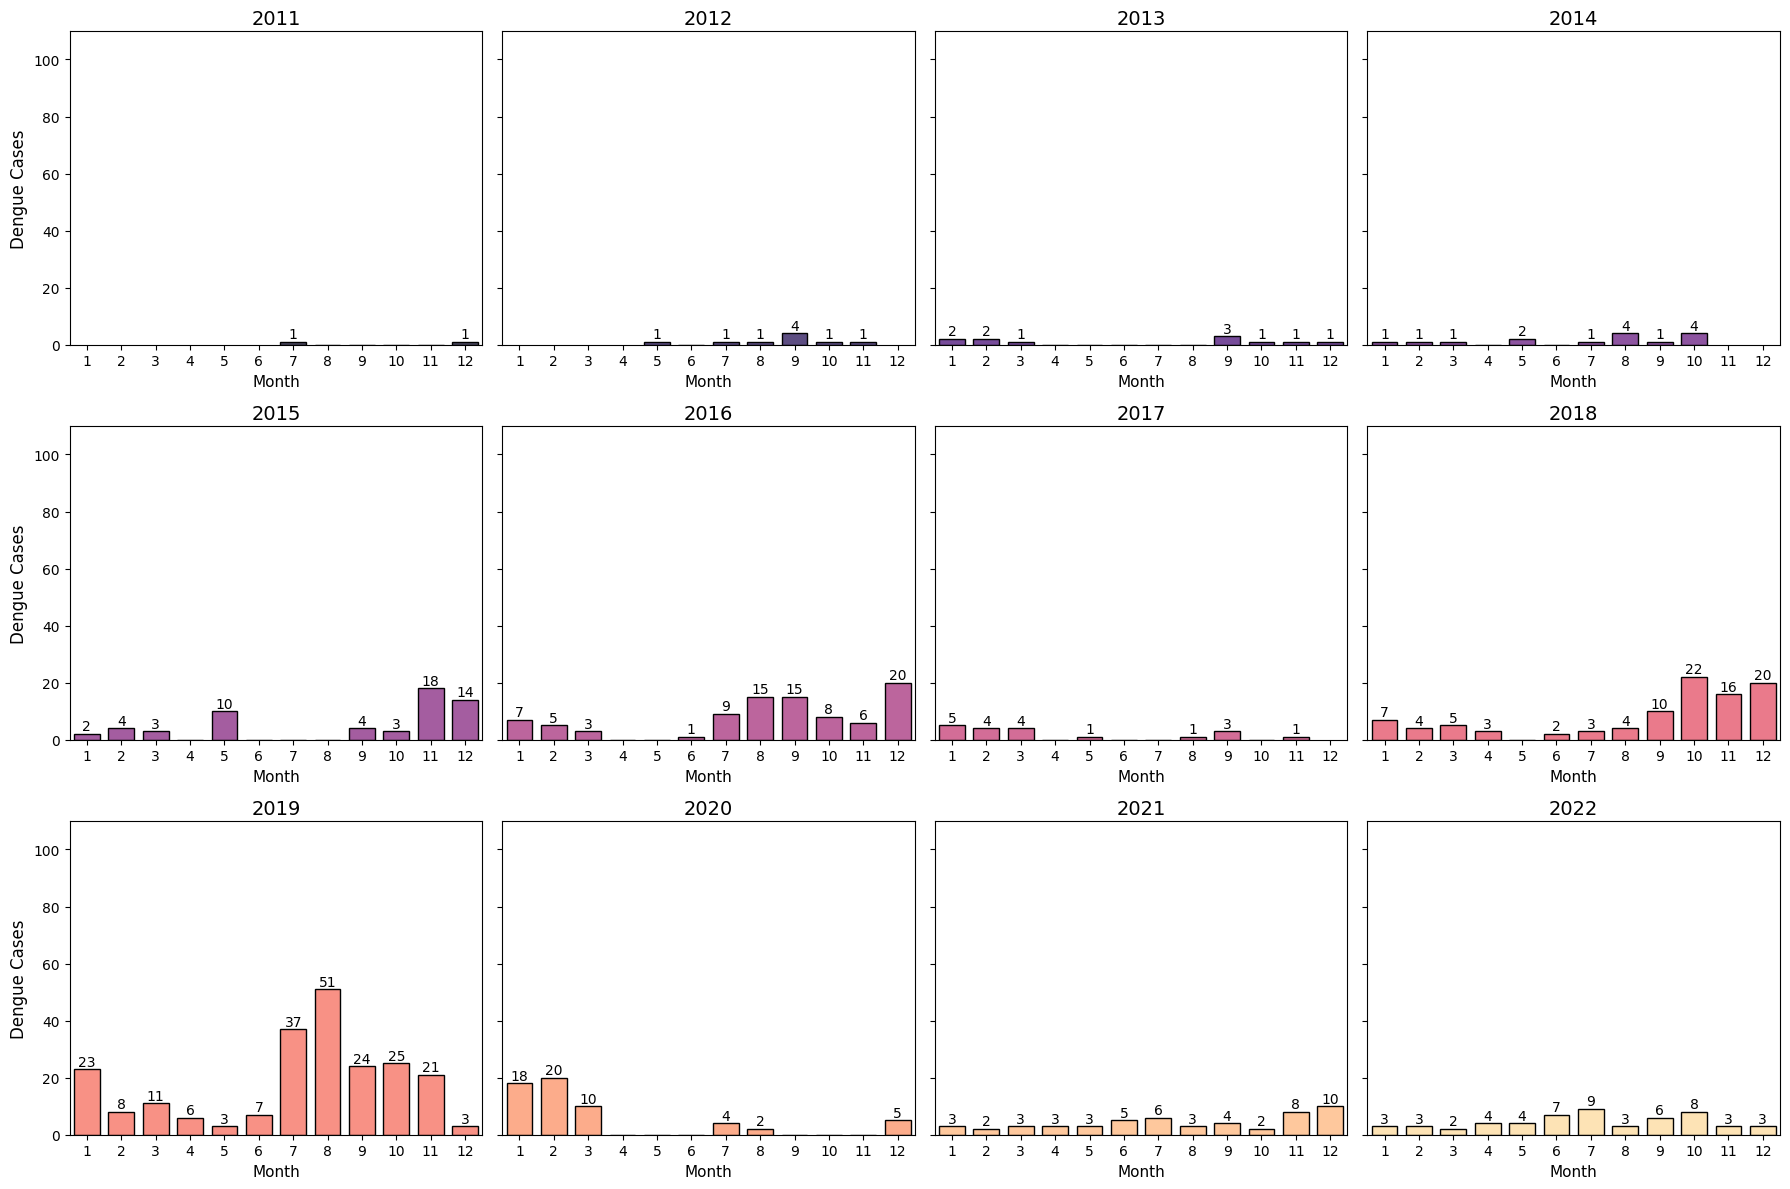

In [37]:
#HISTOGRAM FOR MONTHLY CASES EVERY YEAR
plot_dengue_cases(df, "HINAPLANON")

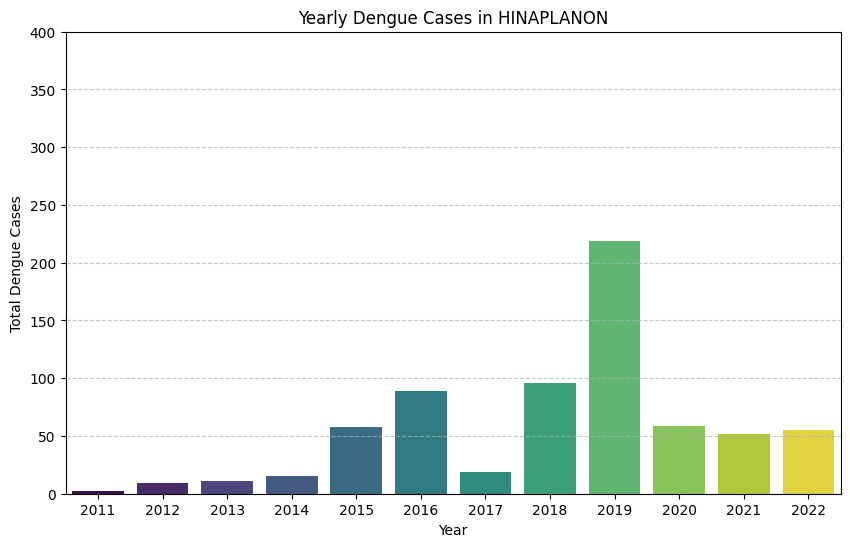

In [38]:
plot_total_dengue_cases_yearly(df, "HINAPLANON")

<div style="
    background-color: black; 
    color: white; 
    padding: 10px; 
    border-radius: 10px; 
    text-align: center;
    max-width: 100vw; 
    width: 100%;
    box-sizing: border-box;">
    HINDANG MONTHLY CASES
</div>


In [39]:
selected_barangay = "HINDANG"  # Change this to any barangay you want
barangay_data = get_selected_barangay(df, selected_barangay)

# Display the data for each year
for year, data in barangay_data.items():
    display(data)

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
12            12  HINDANG  8.3177  124.3457  2011      1             0   
56            12  HINDANG  8.3177  124.3457  2011      2             0   
100           12  HINDANG  8.3177  124.3457  2011      3             0   
144           12  HINDANG  8.3177  124.3457  2011      4             0   
188           12  HINDANG  8.3177  124.3457  2011      5             0   
232           12  HINDANG  8.3177  124.3457  2011      6             0   
276           12  HINDANG  8.3177  124.3457  2011      7             0   
320           12  HINDANG  8.3177  124.3457  2011      8             0   
364           12  HINDANG  8.3177  124.3457  2011      9             0   
408           12  HINDANG  8.3177  124.3457  2011     10             1   
452           12  HINDANG  8.3177  124.3457  2011     11             0   
496           12  HINDANG  8.3177  124.3457  2011     12             0   

     Temperature  Humidity  Rainfall  
12          23.8      88.1       7.0  
56          24.1      87.2      12.0  
100         25.3      85.5      20.0  
144         26.0      83.1      35.0  
188         27.2      81.9      55.0  
232         26.4      83.5      90.0  
276         25.7      84.7     110.0  
320         25.1      85.3      95.0  
364         24.4      86.2      70.0  
408         24.0      87.0      50.0  
452         23.6      88.4      30.0  
496         23.2      89.1      15.0

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
540            12  HINDANG  8.3177  124.3457  2012      1             0   
584            12  HINDANG  8.3177  124.3457  2012      2             0   
628            12  HINDANG  8.3177  124.3457  2012      3             0   
672            12  HINDANG  8.3177  124.3457  2012      4             0   
716            12  HINDANG  8.3177  124.3457  2012      5             0   
760            12  HINDANG  8.3177  124.3457  2012      6             0   
804            12  HINDANG  8.3177  124.3457  2012      7             0   
848            12  HINDANG  8.3177  124.3457  2012      8             0   
892            12  HINDANG  8.3177  124.3457  2012      9             0   
936            12  HINDANG  8.3177  124.3457  2012     10             0   
980            12  HINDANG  8.3177  124.3457  2012     11             0   
1024           12  HINDANG  8.3177  124.3457  2012     12             0   

      Temperature  Humidity  Rainfall  
540          24.3      85.1       4.0  
584          24.3      85.7       7.1  
628          24.6      83.3       3.1  
672          25.4      82.3       6.9  
716          25.1      86.4       6.9  
760          24.7      85.3       7.9  
804          24.9      85.2       6.4  
848          24.9      85.2       6.4  
892          24.1      88.1      11.4  
936          24.6      86.5       8.4  
980          24.8      84.8       4.1  
1024         24.7      84.8       5.7

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
1068           12  HINDANG  8.3177  124.3457  2013      1             0   
1112           12  HINDANG  8.3177  124.3457  2013      2             0   
1156           12  HINDANG  8.3177  124.3457  2013      3             1   
1200           12  HINDANG  8.3177  124.3457  2013      4             0   
1244           12  HINDANG  8.3177  124.3457  2013      5             0   
1288           12  HINDANG  8.3177  124.3457  2013      6             0   
1332           12  HINDANG  8.3177  124.3457  2013      7             0   
1376           12  HINDANG  8.3177  124.3457  2013      8             0   
1420           12  HINDANG  8.3177  124.3457  2013      9             0   
1464           12  HINDANG  8.3177  124.3457  2013     10             0   
1508           12  HINDANG  8.3177  124.3457  2013     11             0   
1552           12  HINDANG  8.3177  124.3457  2013     12             0   

      Temperature  Humidity  Rainfall  
1068         24.2      88.2       8.1  
1112         24.4      84.7       6.0  
1156         25.5      81.1       2.7  
1200         26.0      81.0       4.9  
1244         26.0      82.8       5.2  
1288         24.9      86.9       9.2  
1332         24.5      87.7      11.0  
1376         24.3      87.2       6.9  
1420         24.6      86.5       4.9  
1464         24.0      88.0      10.4  
1508         24.2      85.9       7.8  
1552         24.4      84.0       3.5

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
1596           12  HINDANG  8.3177  124.3457  2014      1             0   
1640           12  HINDANG  8.3177  124.3457  2014      2             0   
1684           12  HINDANG  8.3177  124.3457  2014      3             0   
1728           12  HINDANG  8.3177  124.3457  2014      4             0   
1772           12  HINDANG  8.3177  124.3457  2014      5             0   
1816           12  HINDANG  8.3177  124.3457  2014      6             1   
1860           12  HINDANG  8.3177  124.3457  2014      7             0   
1904           12  HINDANG  8.3177  124.3457  2014      8             0   
1948           12  HINDANG  8.3177  124.3457  2014      9             0   
1992           12  HINDANG  8.3177  124.3457  2014     10             0   
2036           12  HINDANG  8.3177  124.3457  2014     11             0   
2080           12  HINDANG  8.3177  124.3457  2014     12             0   

      Temperature  Humidity  Rainfall  
1596         23.2      86.4       6.8  
1640         23.7      82.4       2.3  
1684         24.3      82.5       3.8  
1728         25.1      81.4       2.0  
1772         25.3      84.0       4.9  
1816         24.5      87.1       6.6  
1860         23.4      89.1       8.5  
1904         23.9      87.7       8.0  
1948         23.4      88.5       7.1  
1992         23.9      88.4       8.5  
2036         24.7      85.2       6.1  
2080         24.0      85.3       4.9

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
2124           12  HINDANG  8.3177  124.3457  2015      1             0   
2168           12  HINDANG  8.3177  124.3457  2015      2             0   
2212           12  HINDANG  8.3177  124.3457  2015      3             0   
2256           12  HINDANG  8.3177  124.3457  2015      4             0   
2300           12  HINDANG  8.3177  124.3457  2015      5             0   
2344           12  HINDANG  8.3177  124.3457  2015      6             0   
2388           12  HINDANG  8.3177  124.3457  2015      7             0   
2432           12  HINDANG  8.3177  124.3457  2015      8             0   
2476           12  HINDANG  8.3177  124.3457  2015      9             0   
2520           12  HINDANG  8.3177  124.3457  2015     10             0   
2564           12  HINDANG  8.3177  124.3457  2015     11             0   
2608           12  HINDANG  8.3177  124.3457  2015     12             0   

      Temperature  Humidity  Rainfall  
2124         25.6      89.0       5.9  
2168         25.6      87.0       3.0  
2212         26.1      83.2       1.1  
2256         27.3      82.8       2.1  
2300         28.4      78.1       2.7  
2344         27.4      81.9       8.7  
2388         27.6      80.4       4.2  
2432         27.5      80.9       5.5  
2476         27.2      82.4       8.2  
2520         27.2      83.4       4.9  
2564         26.8      87.3       6.5  
2608         26.5      87.1       4.8

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
2652           12  HINDANG  8.3177  124.3457  2016      1             0   
2696           12  HINDANG  8.3177  124.3457  2016      2             0   
2740           12  HINDANG  8.3177  124.3457  2016      3             0   
2784           12  HINDANG  8.3177  124.3457  2016      4             0   
2828           12  HINDANG  8.3177  124.3457  2016      5             0   
2872           12  HINDANG  8.3177  124.3457  2016      6             0   
2916           12  HINDANG  8.3177  124.3457  2016      7             0   
2960           12  HINDANG  8.3177  124.3457  2016      8             0   
3004           12  HINDANG  8.3177  124.3457  2016      9             0   
3048           12  HINDANG  8.3177  124.3457  2016     10             0   
3092           12  HINDANG  8.3177  124.3457  2016     11             1   
3136           12  HINDANG  8.3177  124.3457  2016     12             0   

      Temperature  Humidity  Rainfall  
2652         26.2      86.9       1.6  
2696         26.1      88.2       2.6  
2740         26.8      84.4       0.4  
2784         28.1      80.1       1.5  
2828         28.3      81.9       8.3  
2872         27.5      83.9      12.5  
2916         27.6      82.0       5.2  
2960         27.8      80.3       2.7  
3004         27.2      82.4       6.2  
3048         27.1      84.6       8.9  
3092         26.5      86.6       7.6  
3136         26.7      86.9       8.2

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
3180           12  HINDANG  8.3177  124.3457  2017      1             0   
3224           12  HINDANG  8.3177  124.3457  2017      2             0   
3268           12  HINDANG  8.3177  124.3457  2017      3             0   
3312           12  HINDANG  8.3177  124.3457  2017      4             0   
3356           12  HINDANG  8.3177  124.3457  2017      5             0   
3400           12  HINDANG  8.3177  124.3457  2017      6             0   
3444           12  HINDANG  8.3177  124.3457  2017      7             0   
3488           12  HINDANG  8.3177  124.3457  2017      8             0   
3532           12  HINDANG  8.3177  124.3457  2017      9             0   
3576           12  HINDANG  8.3177  124.3457  2017     10             0   
3620           12  HINDANG  8.3177  124.3457  2017     11             0   
3664           12  HINDANG  8.3177  124.3457  2017     12             0   

      Temperature  Humidity  Rainfall  
3180         25.9      88.9      12.5  
3224         25.6      87.8       5.9  
3268         26.1      87.4       8.0  
3312         27.2      85.0       5.1  
3356         27.8      84.4      10.4  
3400         27.4      83.8       7.8  
3444         27.2      82.6       9.1  
3488         27.9      83.4       9.6  
3532         27.3      83.3      11.4  
3576         27.0      84.0       8.3  
3620         27.0      86.6       7.3  
3664         26.7      85.9       9.6

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
3708           12  HINDANG  8.3177  124.3457  2018      1             0   
3752           12  HINDANG  8.3177  124.3457  2018      2             0   
3796           12  HINDANG  8.3177  124.3457  2018      3             1   
3840           12  HINDANG  8.3177  124.3457  2018      4             0   
3884           12  HINDANG  8.3177  124.3457  2018      5             0   
3928           12  HINDANG  8.3177  124.3457  2018      6             0   
3972           12  HINDANG  8.3177  124.3457  2018      7             0   
4016           12  HINDANG  8.3177  124.3457  2018      8             0   
4060           12  HINDANG  8.3177  124.3457  2018      9             0   
4104           12  HINDANG  8.3177  124.3457  2018     10             0   
4148           12  HINDANG  8.3177  124.3457  2018     11             0   
4192           12  HINDANG  8.3177  124.3457  2018     12             0   

      Temperature  Humidity  Rainfall  
3708         26.2      87.5       7.3  
3752         26.4      86.0       9.7  
3796         26.5      84.6       3.7  
3840         27.4      82.5       2.6  
3884         27.9      82.0       6.9  
3928         27.7      80.7       5.2  
3972         27.3      81.6       4.7  
4016         27.4      79.8       2.1  
4060         26.9      82.2       5.4  
4104         27.2      82.7       4.2  
4148         26.5      86.6       6.1  
4192         26.3      88.1       5.8

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
4236           12  HINDANG  8.3177  124.3457  2019      1             0   
4280           12  HINDANG  8.3177  124.3457  2019      2             0   
4324           12  HINDANG  8.3177  124.3457  2019      3             0   
4368           12  HINDANG  8.3177  124.3457  2019      4             0   
4412           12  HINDANG  8.3177  124.3457  2019      5             0   
4456           12  HINDANG  8.3177  124.3457  2019      6             0   
4500           12  HINDANG  8.3177  124.3457  2019      7             3   
4544           12  HINDANG  8.3177  124.3457  2019      8             2   
4588           12  HINDANG  8.3177  124.3457  2019      9             0   
4632           12  HINDANG  8.3177  124.3457  2019     10             0   
4676           12  HINDANG  8.3177  124.3457  2019     11             0   
4720           12  HINDANG  8.3177  124.3457  2019     12             0   

      Temperature  Humidity  Rainfall  
4236         25.5      88.2       5.7  
4280         25.3      84.3       1.1  
4324         26.1      83.2       1.9  
4368         27.5      80.3       1.8  
4412         28.4      78.6       4.4  
4456         27.8      82.7       9.1  
4500         27.2      82.1       6.2  
4544         27.7      77.1       1.4  
4588         27.8      78.2       3.3  
4632         27.0      83.8       7.7  
4676         27.1      82.9       4.3  
4720         26.4      86.4       4.2

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
4764           12  HINDANG  8.3177  124.3457  2020      1             0   
4808           12  HINDANG  8.3177  124.3457  2020      2             0   
4852           12  HINDANG  8.3177  124.3457  2020      3             0   
4896           12  HINDANG  8.3177  124.3457  2020      4             0   
4940           12  HINDANG  8.3177  124.3457  2020      5             0   
4984           12  HINDANG  8.3177  124.3457  2020      6             0   
5028           12  HINDANG  8.3177  124.3457  2020      7             0   
5072           12  HINDANG  8.3177  124.3457  2020      8             0   
5116           12  HINDANG  8.3177  124.3457  2020      9             0   
5160           12  HINDANG  8.3177  124.3457  2020     10             0   
5204           12  HINDANG  8.3177  124.3457  2020     11             2   
5248           12  HINDANG  8.3177  124.3457  2020     12             0   

      Temperature  Humidity  Rainfall  
4764         26.3      86.8       2.1  
4808         25.7      87.2       3.5  
4852         26.4      85.2       2.0  
4896         27.2      81.6       1.0  
4940         28.0      83.2       9.8  
4984         27.3      84.1      14.1  
5028         27.0      83.9      15.7  
5072         27.2      82.9      11.7  
5116         27.2      83.7       9.2  
5160         26.9      84.2      13.2  
5204         26.8      86.2       5.5  
5248         26.7      86.6       8.2

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
5292           12  HINDANG  8.3177  124.3457  2021      1             0   
5336           12  HINDANG  8.3177  124.3457  2021      2             0   
5380           12  HINDANG  8.3177  124.3457  2021      3             0   
5424           12  HINDANG  8.3177  124.3457  2021      4             0   
5468           12  HINDANG  8.3177  124.3457  2021      5             0   
5512           12  HINDANG  8.3177  124.3457  2021      6             0   
5556           12  HINDANG  8.3177  124.3457  2021      7             0   
5600           12  HINDANG  8.3177  124.3457  2021      8             0   
5644           12  HINDANG  8.3177  124.3457  2021      9             0   
5688           12  HINDANG  8.3177  124.3457  2021     10             0   
5732           12  HINDANG  8.3177  124.3457  2021     11             0   
5776           12  HINDANG  8.3177  124.3457  2021     12             0   

      Temperature  Humidity  Rainfall  
5292         25.9      88.5      11.9  
5336         26.0      87.1      12.6  
5380         26.8      84.7       5.5  
5424         27.1      82.5       4.5  
5468         27.5      84.0      10.7  
5512         27.6      81.3       8.2  
5556         27.7      80.0       4.4  
5600         27.5      80.0       6.5  
5644         27.2      82.7       9.5  
5688         27.3      83.6       8.7  
5732         27.0      86.4       9.4  
5776         26.2      86.9       9.8

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
5820           12  HINDANG  8.3177  124.3457  2022      1             0   
5864           12  HINDANG  8.3177  124.3457  2022      2             0   
5908           12  HINDANG  8.3177  124.3457  2022      3             0   
5952           12  HINDANG  8.3177  124.3457  2022      4             0   
5996           12  HINDANG  8.3177  124.3457  2022      5             0   
6040           12  HINDANG  8.3177  124.3457  2022      6             0   
6084           12  HINDANG  8.3177  124.3457  2022      7             0   
6128           12  HINDANG  8.3177  124.3457  2022      8             0   
6172           12  HINDANG  8.3177  124.3457  2022      9             0   
6216           12  HINDANG  8.3177  124.3457  2022     10             0   
6260           12  HINDANG  8.3177  124.3457  2022     11             0   
6304           12  HINDANG  8.3177  124.3457  2022     12             0   

      Temperature  Humidity  Rainfall  
5820         26.0      86.9       8.3  
5864         26.0      87.2       3.9  
5908         26.8      86.5      11.0  
5952         26.8      86.5      12.2  
5996         27.4      83.9      11.5  
6040         27.6      81.9       7.1  
6084         27.4      83.2      11.6  
6128         27.3      82.0       7.9  
6172         27.5      81.1       6.1  
6216         27.1      84.2       9.0  
6260         27.0      85.8       6.6  
6304         26.4      87.1      14.5

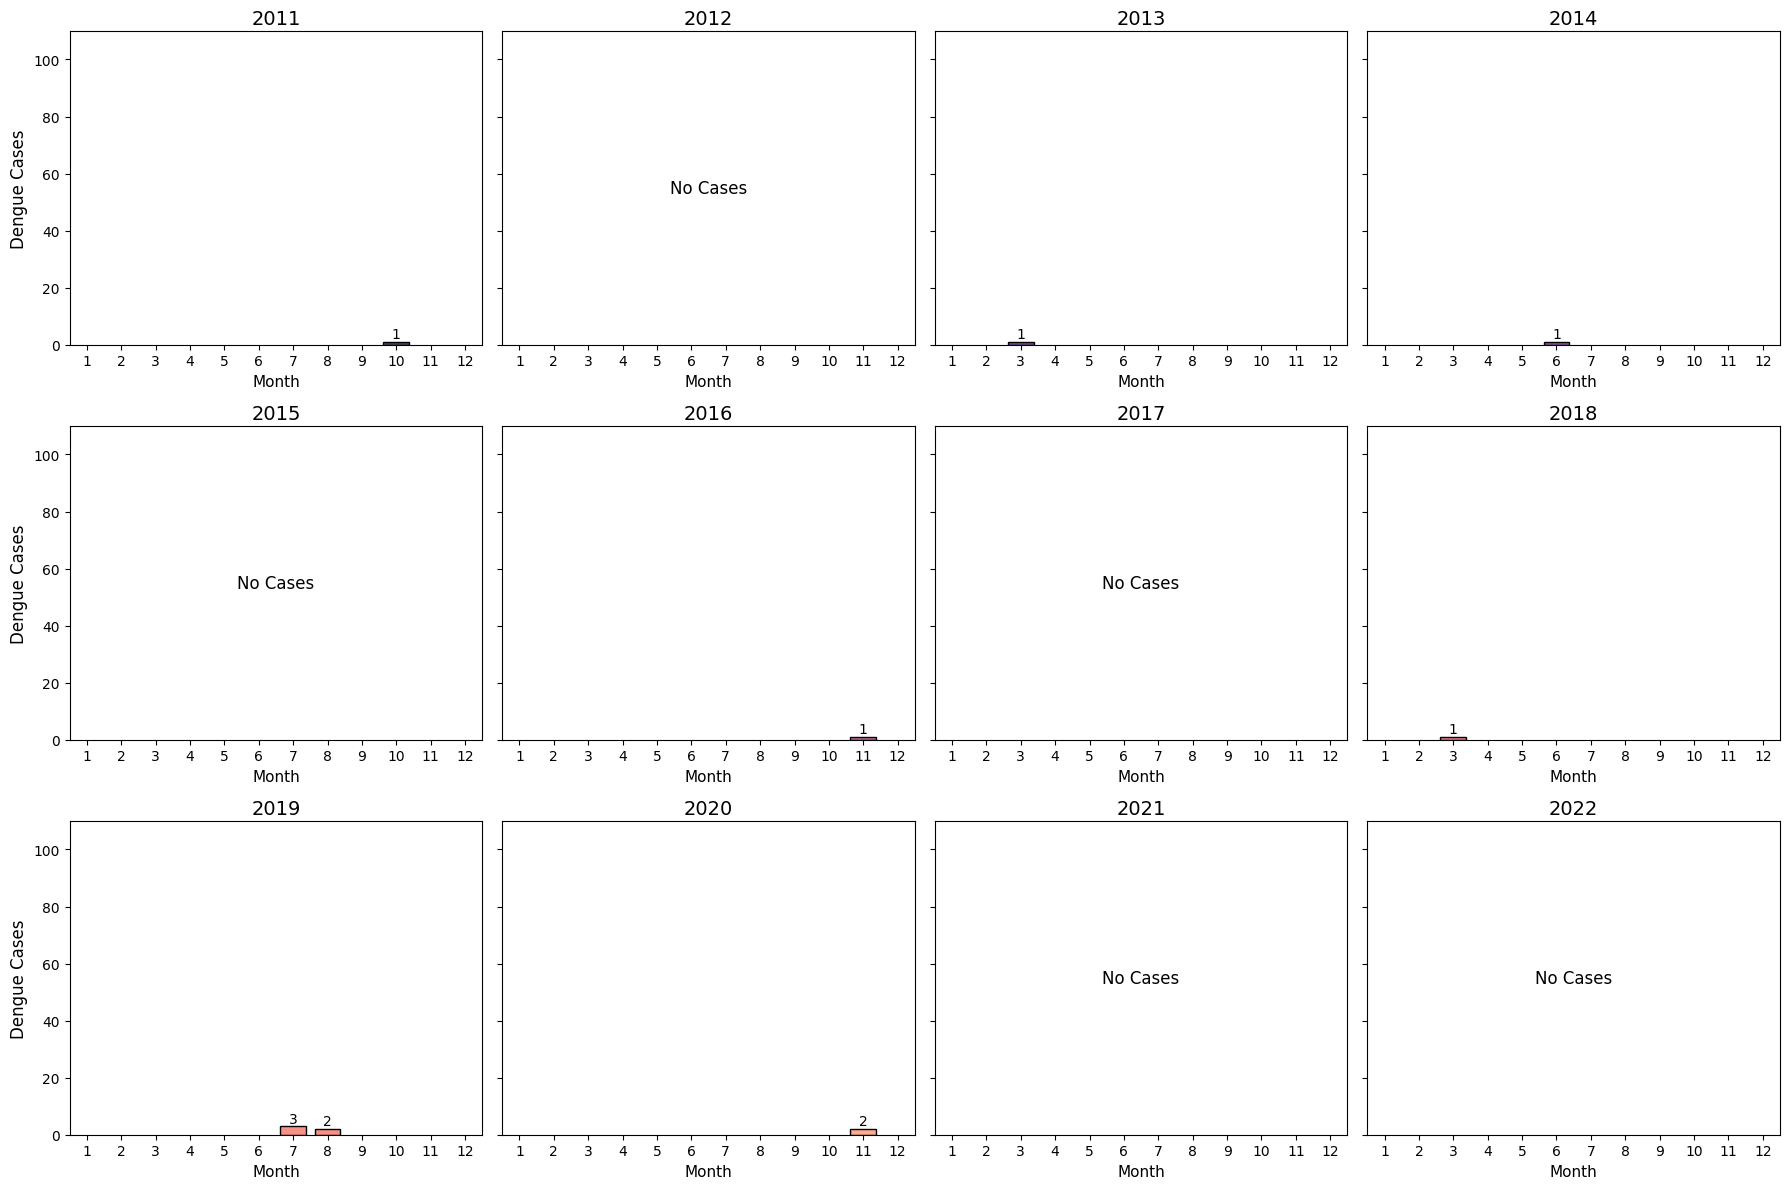

In [40]:
#HISTOGRAM FOR MONTHLY CASES EVERY YEAR
plot_dengue_cases(df, "HINDANG")

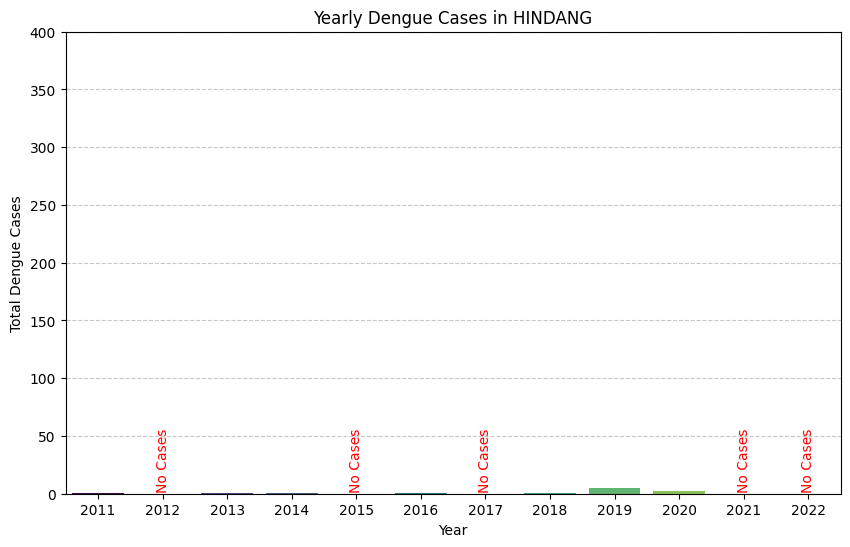

In [41]:
plot_total_dengue_cases_yearly(df, "HINDANG")

<div style="
    background-color: black; 
    color: white; 
    padding: 10px; 
    border-radius: 10px; 
    text-align: center;
    max-width: 100vw; 
    width: 100%;
    box-sizing: border-box;">
    KABACSANAN MONTHLY CASES
</div>


In [42]:
selected_barangay = "KABACSANAN"  # Change this to any barangay you want
barangay_data = get_selected_barangay(df, selected_barangay)

# Display the data for each year
for year, data in barangay_data.items():
    display(data)

Barangay_No    Barangay       x         y  Year  Month  Dengue Cases  \
13            13  KABACSANAN  8.2815  124.3088  2011      1             0   
57            13  KABACSANAN  8.2815  124.3088  2011      2             0   
101           13  KABACSANAN  8.2815  124.3088  2011      3             0   
145           13  KABACSANAN  8.2815  124.3088  2011      4             0   
189           13  KABACSANAN  8.2815  124.3088  2011      5             0   
233           13  KABACSANAN  8.2815  124.3088  2011      6             1   
277           13  KABACSANAN  8.2815  124.3088  2011      7             0   
321           13  KABACSANAN  8.2815  124.3088  2011      8             0   
365           13  KABACSANAN  8.2815  124.3088  2011      9             0   
409           13  KABACSANAN  8.2815  124.3088  2011     10             0   
453           13  KABACSANAN  8.2815  124.3088  2011     11             0   
497           13  KABACSANAN  8.2815  124.3088  2011     12             0   

     Temperature  Humidity  Rainfall  
13          23.8      88.1       7.0  
57          24.1      87.2      12.0  
101         25.3      85.5      20.0  
145         26.0      83.1      35.0  
189         27.2      81.9      55.0  
233         26.4      83.5      90.0  
277         25.7      84.7     110.0  
321         25.1      85.3      95.0  
365         24.4      86.2      70.0  
409         24.0      87.0      50.0  
453         23.6      88.4      30.0  
497         23.2      89.1      15.0

Barangay_No    Barangay       x         y  Year  Month  Dengue Cases  \
541            13  KABACSANAN  8.2815  124.3088  2012      1             0   
585            13  KABACSANAN  8.2815  124.3088  2012      2             0   
629            13  KABACSANAN  8.2815  124.3088  2012      3             0   
673            13  KABACSANAN  8.2815  124.3088  2012      4             0   
717            13  KABACSANAN  8.2815  124.3088  2012      5             0   
761            13  KABACSANAN  8.2815  124.3088  2012      6             0   
805            13  KABACSANAN  8.2815  124.3088  2012      7             0   
849            13  KABACSANAN  8.2815  124.3088  2012      8             0   
893            13  KABACSANAN  8.2815  124.3088  2012      9             0   
937            13  KABACSANAN  8.2815  124.3088  2012     10             0   
981            13  KABACSANAN  8.2815  124.3088  2012     11             0   
1025           13  KABACSANAN  8.2815  124.3088  2012     12             0   

      Temperature  Humidity  Rainfall  
541          24.3      85.1       4.0  
585          24.3      85.7       7.1  
629          24.6      83.3       3.1  
673          25.4      82.3       6.9  
717          25.1      86.4       6.9  
761          24.7      85.3       7.9  
805          24.9      85.2       6.4  
849          24.9      85.2       6.4  
893          24.1      88.1      11.4  
937          24.6      86.5       8.4  
981          24.8      84.8       4.1  
1025         24.7      84.8       5.7

Barangay_No    Barangay       x         y  Year  Month  Dengue Cases  \
1069           13  KABACSANAN  8.2815  124.3088  2013      1             1   
1113           13  KABACSANAN  8.2815  124.3088  2013      2             0   
1157           13  KABACSANAN  8.2815  124.3088  2013      3             0   
1201           13  KABACSANAN  8.2815  124.3088  2013      4             0   
1245           13  KABACSANAN  8.2815  124.3088  2013      5             0   
1289           13  KABACSANAN  8.2815  124.3088  2013      6             0   
1333           13  KABACSANAN  8.2815  124.3088  2013      7             0   
1377           13  KABACSANAN  8.2815  124.3088  2013      8             0   
1421           13  KABACSANAN  8.2815  124.3088  2013      9             0   
1465           13  KABACSANAN  8.2815  124.3088  2013     10             0   
1509           13  KABACSANAN  8.2815  124.3088  2013     11             0   
1553           13  KABACSANAN  8.2815  124.3088  2013     12             0   

      Temperature  Humidity  Rainfall  
1069         24.2      88.2       8.1  
1113         24.4      84.7       6.0  
1157         25.5      81.1       2.7  
1201         26.0      81.0       4.9  
1245         26.0      82.8       5.2  
1289         24.9      86.9       9.2  
1333         24.5      87.7      11.0  
1377         24.3      87.2       6.9  
1421         24.6      86.5       4.9  
1465         24.0      88.0      10.4  
1509         24.2      85.9       7.8  
1553         24.4      84.0       3.5

Barangay_No    Barangay       x         y  Year  Month  Dengue Cases  \
1597           13  KABACSANAN  8.2815  124.3088  2014      1             0   
1641           13  KABACSANAN  8.2815  124.3088  2014      2             0   
1685           13  KABACSANAN  8.2815  124.3088  2014      3             0   
1729           13  KABACSANAN  8.2815  124.3088  2014      4             0   
1773           13  KABACSANAN  8.2815  124.3088  2014      5             0   
1817           13  KABACSANAN  8.2815  124.3088  2014      6             0   
1861           13  KABACSANAN  8.2815  124.3088  2014      7             0   
1905           13  KABACSANAN  8.2815  124.3088  2014      8             0   
1949           13  KABACSANAN  8.2815  124.3088  2014      9             0   
1993           13  KABACSANAN  8.2815  124.3088  2014     10             0   
2037           13  KABACSANAN  8.2815  124.3088  2014     11             0   
2081           13  KABACSANAN  8.2815  124.3088  2014     12             0   

      Temperature  Humidity  Rainfall  
1597         23.2      86.4       6.8  
1641         23.7      82.4       2.3  
1685         24.3      82.5       3.8  
1729         25.1      81.4       2.0  
1773         25.3      84.0       4.9  
1817         24.5      87.1       6.6  
1861         23.4      89.1       8.5  
1905         23.9      87.7       8.0  
1949         23.4      88.5       7.1  
1993         23.9      88.4       8.5  
2037         24.7      85.2       6.1  
2081         24.0      85.3       4.9

Barangay_No    Barangay       x         y  Year  Month  Dengue Cases  \
2125           13  KABACSANAN  8.2815  124.3088  2015      1             0   
2169           13  KABACSANAN  8.2815  124.3088  2015      2             0   
2213           13  KABACSANAN  8.2815  124.3088  2015      3             0   
2257           13  KABACSANAN  8.2815  124.3088  2015      4             0   
2301           13  KABACSANAN  8.2815  124.3088  2015      5             0   
2345           13  KABACSANAN  8.2815  124.3088  2015      6             0   
2389           13  KABACSANAN  8.2815  124.3088  2015      7             0   
2433           13  KABACSANAN  8.2815  124.3088  2015      8             0   
2477           13  KABACSANAN  8.2815  124.3088  2015      9             0   
2521           13  KABACSANAN  8.2815  124.3088  2015     10             0   
2565           13  KABACSANAN  8.2815  124.3088  2015     11             0   
2609           13  KABACSANAN  8.2815  124.3088  2015     12             0   

      Temperature  Humidity  Rainfall  
2125         25.6      89.0       5.9  
2169         25.6      87.0       3.0  
2213         26.1      83.2       1.1  
2257         27.3      82.8       2.1  
2301         28.4      78.1       2.7  
2345         27.4      81.9       8.7  
2389         27.6      80.4       4.2  
2433         27.5      80.9       5.5  
2477         27.2      82.4       8.2  
2521         27.2      83.4       4.9  
2565         26.8      87.3       6.5  
2609         26.5      87.1       4.8

Barangay_No    Barangay       x         y  Year  Month  Dengue Cases  \
2653           13  KABACSANAN  8.2815  124.3088  2016      1             0   
2697           13  KABACSANAN  8.2815  124.3088  2016      2             0   
2741           13  KABACSANAN  8.2815  124.3088  2016      3             0   
2785           13  KABACSANAN  8.2815  124.3088  2016      4             0   
2829           13  KABACSANAN  8.2815  124.3088  2016      5             0   
2873           13  KABACSANAN  8.2815  124.3088  2016      6             0   
2917           13  KABACSANAN  8.2815  124.3088  2016      7             0   
2961           13  KABACSANAN  8.2815  124.3088  2016      8             2   
3005           13  KABACSANAN  8.2815  124.3088  2016      9             0   
3049           13  KABACSANAN  8.2815  124.3088  2016     10             0   
3093           13  KABACSANAN  8.2815  124.3088  2016     11             0   
3137           13  KABACSANAN  8.2815  124.3088  2016     12             0   

      Temperature  Humidity  Rainfall  
2653         26.2      86.9       1.6  
2697         26.1      88.2       2.6  
2741         26.8      84.4       0.4  
2785         28.1      80.1       1.5  
2829         28.3      81.9       8.3  
2873         27.5      83.9      12.5  
2917         27.6      82.0       5.2  
2961         27.8      80.3       2.7  
3005         27.2      82.4       6.2  
3049         27.1      84.6       8.9  
3093         26.5      86.6       7.6  
3137         26.7      86.9       8.2

Barangay_No    Barangay       x         y  Year  Month  Dengue Cases  \
3181           13  KABACSANAN  8.2815  124.3088  2017      1             0   
3225           13  KABACSANAN  8.2815  124.3088  2017      2             0   
3269           13  KABACSANAN  8.2815  124.3088  2017      3             0   
3313           13  KABACSANAN  8.2815  124.3088  2017      4             0   
3357           13  KABACSANAN  8.2815  124.3088  2017      5             0   
3401           13  KABACSANAN  8.2815  124.3088  2017      6             0   
3445           13  KABACSANAN  8.2815  124.3088  2017      7             0   
3489           13  KABACSANAN  8.2815  124.3088  2017      8             0   
3533           13  KABACSANAN  8.2815  124.3088  2017      9             0   
3577           13  KABACSANAN  8.2815  124.3088  2017     10             0   
3621           13  KABACSANAN  8.2815  124.3088  2017     11             0   
3665           13  KABACSANAN  8.2815  124.3088  2017     12             0   

      Temperature  Humidity  Rainfall  
3181         25.9      88.9      12.5  
3225         25.6      87.8       5.9  
3269         26.1      87.4       8.0  
3313         27.2      85.0       5.1  
3357         27.8      84.4      10.4  
3401         27.4      83.8       7.8  
3445         27.2      82.6       9.1  
3489         27.9      83.4       9.6  
3533         27.3      83.3      11.4  
3577         27.0      84.0       8.3  
3621         27.0      86.6       7.3  
3665         26.7      85.9       9.6

Barangay_No    Barangay       x         y  Year  Month  Dengue Cases  \
3709           13  KABACSANAN  8.2815  124.3088  2018      1             0   
3753           13  KABACSANAN  8.2815  124.3088  2018      2             0   
3797           13  KABACSANAN  8.2815  124.3088  2018      3             0   
3841           13  KABACSANAN  8.2815  124.3088  2018      4             0   
3885           13  KABACSANAN  8.2815  124.3088  2018      5             0   
3929           13  KABACSANAN  8.2815  124.3088  2018      6             0   
3973           13  KABACSANAN  8.2815  124.3088  2018      7             0   
4017           13  KABACSANAN  8.2815  124.3088  2018      8             0   
4061           13  KABACSANAN  8.2815  124.3088  2018      9             0   
4105           13  KABACSANAN  8.2815  124.3088  2018     10             0   
4149           13  KABACSANAN  8.2815  124.3088  2018     11             0   
4193           13  KABACSANAN  8.2815  124.3088  2018     12             0   

      Temperature  Humidity  Rainfall  
3709         26.2      87.5       7.3  
3753         26.4      86.0       9.7  
3797         26.5      84.6       3.7  
3841         27.4      82.5       2.6  
3885         27.9      82.0       6.9  
3929         27.7      80.7       5.2  
3973         27.3      81.6       4.7  
4017         27.4      79.8       2.1  
4061         26.9      82.2       5.4  
4105         27.2      82.7       4.2  
4149         26.5      86.6       6.1  
4193         26.3      88.1       5.8

Barangay_No    Barangay       x         y  Year  Month  Dengue Cases  \
4237           13  KABACSANAN  8.2815  124.3088  2019      1             0   
4281           13  KABACSANAN  8.2815  124.3088  2019      2             0   
4325           13  KABACSANAN  8.2815  124.3088  2019      3             0   
4369           13  KABACSANAN  8.2815  124.3088  2019      4             0   
4413           13  KABACSANAN  8.2815  124.3088  2019      5             0   
4457           13  KABACSANAN  8.2815  124.3088  2019      6             3   
4501           13  KABACSANAN  8.2815  124.3088  2019      7             4   
4545           13  KABACSANAN  8.2815  124.3088  2019      8             0   
4589           13  KABACSANAN  8.2815  124.3088  2019      9             0   
4633           13  KABACSANAN  8.2815  124.3088  2019     10             1   
4677           13  KABACSANAN  8.2815  124.3088  2019     11             0   
4721           13  KABACSANAN  8.2815  124.3088  2019     12             0   

      Temperature  Humidity  Rainfall  
4237         25.5      88.2       5.7  
4281         25.3      84.3       1.1  
4325         26.1      83.2       1.9  
4369         27.5      80.3       1.8  
4413         28.4      78.6       4.4  
4457         27.8      82.7       9.1  
4501         27.2      82.1       6.2  
4545         27.7      77.1       1.4  
4589         27.8      78.2       3.3  
4633         27.0      83.8       7.7  
4677         27.1      82.9       4.3  
4721         26.4      86.4       4.2

Barangay_No    Barangay       x         y  Year  Month  Dengue Cases  \
4765           13  KABACSANAN  8.2815  124.3088  2020      1             0   
4809           13  KABACSANAN  8.2815  124.3088  2020      2             0   
4853           13  KABACSANAN  8.2815  124.3088  2020      3             0   
4897           13  KABACSANAN  8.2815  124.3088  2020      4             0   
4941           13  KABACSANAN  8.2815  124.3088  2020      5             0   
4985           13  KABACSANAN  8.2815  124.3088  2020      6             0   
5029           13  KABACSANAN  8.2815  124.3088  2020      7             0   
5073           13  KABACSANAN  8.2815  124.3088  2020      8             0   
5117           13  KABACSANAN  8.2815  124.3088  2020      9             0   
5161           13  KABACSANAN  8.2815  124.3088  2020     10             0   
5205           13  KABACSANAN  8.2815  124.3088  2020     11             0   
5249           13  KABACSANAN  8.2815  124.3088  2020     12             0   

      Temperature  Humidity  Rainfall  
4765         26.3      86.8       2.1  
4809         25.7      87.2       3.5  
4853         26.4      85.2       2.0  
4897         27.2      81.6       1.0  
4941         28.0      83.2       9.8  
4985         27.3      84.1      14.1  
5029         27.0      83.9      15.7  
5073         27.2      82.9      11.7  
5117         27.2      83.7       9.2  
5161         26.9      84.2      13.2  
5205         26.8      86.2       5.5  
5249         26.7      86.6       8.2

Barangay_No    Barangay       x         y  Year  Month  Dengue Cases  \
5293           13  KABACSANAN  8.2815  124.3088  2021      1             0   
5337           13  KABACSANAN  8.2815  124.3088  2021      2             0   
5381           13  KABACSANAN  8.2815  124.3088  2021      3             0   
5425           13  KABACSANAN  8.2815  124.3088  2021      4             0   
5469           13  KABACSANAN  8.2815  124.3088  2021      5             0   
5513           13  KABACSANAN  8.2815  124.3088  2021      6             0   
5557           13  KABACSANAN  8.2815  124.3088  2021      7             0   
5601           13  KABACSANAN  8.2815  124.3088  2021      8             0   
5645           13  KABACSANAN  8.2815  124.3088  2021      9             0   
5689           13  KABACSANAN  8.2815  124.3088  2021     10             0   
5733           13  KABACSANAN  8.2815  124.3088  2021     11             0   
5777           13  KABACSANAN  8.2815  124.3088  2021     12             0   

      Temperature  Humidity  Rainfall  
5293         25.9      88.5      11.9  
5337         26.0      87.1      12.6  
5381         26.8      84.7       5.5  
5425         27.1      82.5       4.5  
5469         27.5      84.0      10.7  
5513         27.6      81.3       8.2  
5557         27.7      80.0       4.4  
5601         27.5      80.0       6.5  
5645         27.2      82.7       9.5  
5689         27.3      83.6       8.7  
5733         27.0      86.4       9.4  
5777         26.2      86.9       9.8

Barangay_No    Barangay       x         y  Year  Month  Dengue Cases  \
5821           13  KABACSANAN  8.2815  124.3088  2022      1             0   
5865           13  KABACSANAN  8.2815  124.3088  2022      2             0   
5909           13  KABACSANAN  8.2815  124.3088  2022      3             0   
5953           13  KABACSANAN  8.2815  124.3088  2022      4             0   
5997           13  KABACSANAN  8.2815  124.3088  2022      5             0   
6041           13  KABACSANAN  8.2815  124.3088  2022      6             0   
6085           13  KABACSANAN  8.2815  124.3088  2022      7             0   
6129           13  KABACSANAN  8.2815  124.3088  2022      8             0   
6173           13  KABACSANAN  8.2815  124.3088  2022      9             0   
6217           13  KABACSANAN  8.2815  124.3088  2022     10             0   
6261           13  KABACSANAN  8.2815  124.3088  2022     11             0   
6305           13  KABACSANAN  8.2815  124.3088  2022     12             0   

      Temperature  Humidity  Rainfall  
5821         26.0      86.9       8.3  
5865         26.0      87.2       3.9  
5909         26.8      86.5      11.0  
5953         26.8      86.5      12.2  
5997         27.4      83.9      11.5  
6041         27.6      81.9       7.1  
6085         27.4      83.2      11.6  
6129         27.3      82.0       7.9  
6173         27.5      81.1       6.1  
6217         27.1      84.2       9.0  
6261         27.0      85.8       6.6  
6305         26.4      87.1      14.5

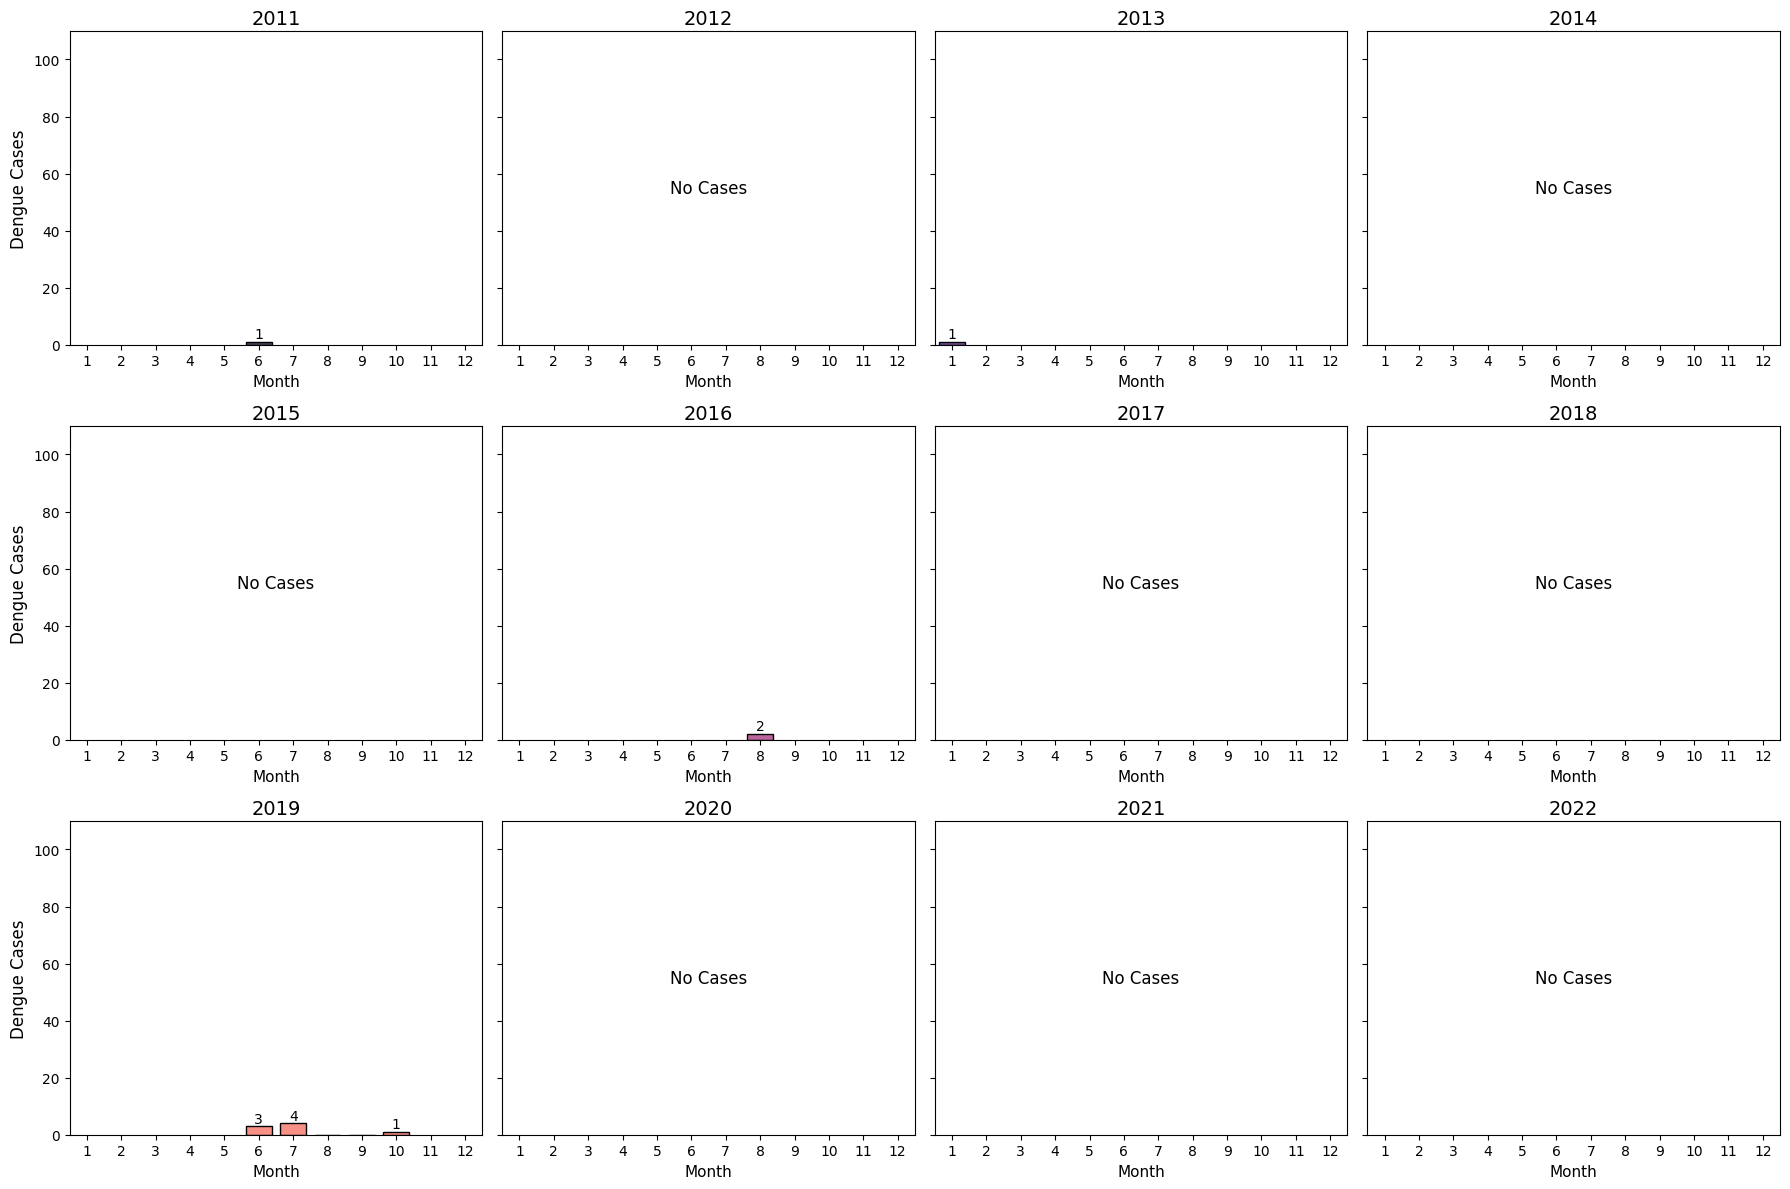

In [43]:
#HISTOGRAM FOR MONTHLY CASES EVERY YEAR
plot_dengue_cases(df, "KABACSANAN")

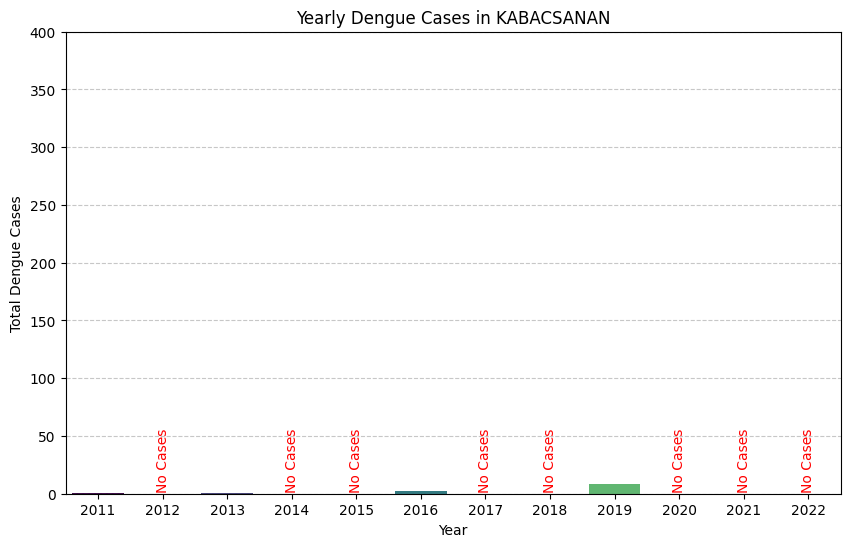

In [44]:
plot_total_dengue_cases_yearly(df, "KABACSANAN")

<div style="
    background-color: black; 
    color: white; 
    padding: 10px; 
    border-radius: 10px; 
    text-align: center;
    max-width: 100vw; 
    width: 100%;
    box-sizing: border-box;">
    KIWALAN MONTHLY CASES
</div>


In [45]:
selected_barangay = "KIWALAN"  # Change this to any barangay you want
barangay_data = get_selected_barangay(df, selected_barangay)

# Display the data for each year
for year, data in barangay_data.items():
    display(data)

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
15            15  KIWALAN  8.2801  124.2668  2011      1             0   
59            15  KIWALAN  8.2801  124.2668  2011      2             0   
103           15  KIWALAN  8.2801  124.2668  2011      3             0   
147           15  KIWALAN  8.2801  124.2668  2011      4             0   
191           15  KIWALAN  8.2801  124.2668  2011      5             0   
235           15  KIWALAN  8.2801  124.2668  2011      6             0   
279           15  KIWALAN  8.2801  124.2668  2011      7             0   
323           15  KIWALAN  8.2801  124.2668  2011      8             0   
367           15  KIWALAN  8.2801  124.2668  2011      9             0   
411           15  KIWALAN  8.2801  124.2668  2011     10             0   
455           15  KIWALAN  8.2801  124.2668  2011     11             0   
499           15  KIWALAN  8.2801  124.2668  2011     12             0   

     Temperature  Humidity  Rainfall  
15          23.8      88.1       7.0  
59          24.1      87.2      12.0  
103         25.3      85.5      20.0  
147         26.0      83.1      35.0  
191         27.2      81.9      55.0  
235         26.4      83.5      90.0  
279         25.7      84.7     110.0  
323         25.1      85.3      95.0  
367         24.4      86.2      70.0  
411         24.0      87.0      50.0  
455         23.6      88.4      30.0  
499         23.2      89.1      15.0

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
543            15  KIWALAN  8.2801  124.2668  2012      1             1   
587            15  KIWALAN  8.2801  124.2668  2012      2             0   
631            15  KIWALAN  8.2801  124.2668  2012      3             0   
675            15  KIWALAN  8.2801  124.2668  2012      4             0   
719            15  KIWALAN  8.2801  124.2668  2012      5             0   
763            15  KIWALAN  8.2801  124.2668  2012      6             0   
807            15  KIWALAN  8.2801  124.2668  2012      7             1   
851            15  KIWALAN  8.2801  124.2668  2012      8             0   
895            15  KIWALAN  8.2801  124.2668  2012      9             1   
939            15  KIWALAN  8.2801  124.2668  2012     10             0   
983            15  KIWALAN  8.2801  124.2668  2012     11             0   
1027           15  KIWALAN  8.2801  124.2668  2012     12             1   

      Temperature  Humidity  Rainfall  
543          24.3      85.1       4.0  
587          24.3      85.7       7.1  
631          24.6      83.3       3.1  
675          25.4      82.3       6.9  
719          25.1      86.4       6.9  
763          24.7      85.3       7.9  
807          24.9      85.2       6.4  
851          24.9      85.2       6.4  
895          24.1      88.1      11.4  
939          24.6      86.5       8.4  
983          24.8      84.8       4.1  
1027         24.7      84.8       5.7

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
1071           15  KIWALAN  8.2801  124.2668  2013      1             4   
1115           15  KIWALAN  8.2801  124.2668  2013      2             0   
1159           15  KIWALAN  8.2801  124.2668  2013      3             0   
1203           15  KIWALAN  8.2801  124.2668  2013      4             0   
1247           15  KIWALAN  8.2801  124.2668  2013      5             0   
1291           15  KIWALAN  8.2801  124.2668  2013      6             0   
1335           15  KIWALAN  8.2801  124.2668  2013      7             0   
1379           15  KIWALAN  8.2801  124.2668  2013      8             0   
1423           15  KIWALAN  8.2801  124.2668  2013      9             0   
1467           15  KIWALAN  8.2801  124.2668  2013     10             0   
1511           15  KIWALAN  8.2801  124.2668  2013     11             1   
1555           15  KIWALAN  8.2801  124.2668  2013     12             0   

      Temperature  Humidity  Rainfall  
1071         24.2      88.2       8.1  
1115         24.4      84.7       6.0  
1159         25.5      81.1       2.7  
1203         26.0      81.0       4.9  
1247         26.0      82.8       5.2  
1291         24.9      86.9       9.2  
1335         24.5      87.7      11.0  
1379         24.3      87.2       6.9  
1423         24.6      86.5       4.9  
1467         24.0      88.0      10.4  
1511         24.2      85.9       7.8  
1555         24.4      84.0       3.5

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
1599           15  KIWALAN  8.2801  124.2668  2014      1             0   
1643           15  KIWALAN  8.2801  124.2668  2014      2             0   
1687           15  KIWALAN  8.2801  124.2668  2014      3             0   
1731           15  KIWALAN  8.2801  124.2668  2014      4             0   
1775           15  KIWALAN  8.2801  124.2668  2014      5             0   
1819           15  KIWALAN  8.2801  124.2668  2014      6             0   
1863           15  KIWALAN  8.2801  124.2668  2014      7             0   
1907           15  KIWALAN  8.2801  124.2668  2014      8             2   
1951           15  KIWALAN  8.2801  124.2668  2014      9             0   
1995           15  KIWALAN  8.2801  124.2668  2014     10             1   
2039           15  KIWALAN  8.2801  124.2668  2014     11             2   
2083           15  KIWALAN  8.2801  124.2668  2014     12             1   

      Temperature  Humidity  Rainfall  
1599         23.2      86.4       6.8  
1643         23.7      82.4       2.3  
1687         24.3      82.5       3.8  
1731         25.1      81.4       2.0  
1775         25.3      84.0       4.9  
1819         24.5      87.1       6.6  
1863         23.4      89.1       8.5  
1907         23.9      87.7       8.0  
1951         23.4      88.5       7.1  
1995         23.9      88.4       8.5  
2039         24.7      85.2       6.1  
2083         24.0      85.3       4.9

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
2127           15  KIWALAN  8.2801  124.2668  2015      1             2   
2171           15  KIWALAN  8.2801  124.2668  2015      2             0   
2215           15  KIWALAN  8.2801  124.2668  2015      3             0   
2259           15  KIWALAN  8.2801  124.2668  2015      4             0   
2303           15  KIWALAN  8.2801  124.2668  2015      5             2   
2347           15  KIWALAN  8.2801  124.2668  2015      6             1   
2391           15  KIWALAN  8.2801  124.2668  2015      7             2   
2435           15  KIWALAN  8.2801  124.2668  2015      8             0   
2479           15  KIWALAN  8.2801  124.2668  2015      9             0   
2523           15  KIWALAN  8.2801  124.2668  2015     10             0   
2567           15  KIWALAN  8.2801  124.2668  2015     11             4   
2611           15  KIWALAN  8.2801  124.2668  2015     12             8   

      Temperature  Humidity  Rainfall  
2127         25.6      89.0       5.9  
2171         25.6      87.0       3.0  
2215         26.1      83.2       1.1  
2259         27.3      82.8       2.1  
2303         28.4      78.1       2.7  
2347         27.4      81.9       8.7  
2391         27.6      80.4       4.2  
2435         27.5      80.9       5.5  
2479         27.2      82.4       8.2  
2523         27.2      83.4       4.9  
2567         26.8      87.3       6.5  
2611         26.5      87.1       4.8

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
2655           15  KIWALAN  8.2801  124.2668  2016      1             2   
2699           15  KIWALAN  8.2801  124.2668  2016      2             2   
2743           15  KIWALAN  8.2801  124.2668  2016      3             0   
2787           15  KIWALAN  8.2801  124.2668  2016      4             0   
2831           15  KIWALAN  8.2801  124.2668  2016      5             0   
2875           15  KIWALAN  8.2801  124.2668  2016      6             0   
2919           15  KIWALAN  8.2801  124.2668  2016      7             0   
2963           15  KIWALAN  8.2801  124.2668  2016      8             1   
3007           15  KIWALAN  8.2801  124.2668  2016      9             5   
3051           15  KIWALAN  8.2801  124.2668  2016     10             1   
3095           15  KIWALAN  8.2801  124.2668  2016     11             1   
3139           15  KIWALAN  8.2801  124.2668  2016     12             0   

      Temperature  Humidity  Rainfall  
2655         26.2      86.9       1.6  
2699         26.1      88.2       2.6  
2743         26.8      84.4       0.4  
2787         28.1      80.1       1.5  
2831         28.3      81.9       8.3  
2875         27.5      83.9      12.5  
2919         27.6      82.0       5.2  
2963         27.8      80.3       2.7  
3007         27.2      82.4       6.2  
3051         27.1      84.6       8.9  
3095         26.5      86.6       7.6  
3139         26.7      86.9       8.2

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
3183           15  KIWALAN  8.2801  124.2668  2017      1             0   
3227           15  KIWALAN  8.2801  124.2668  2017      2             0   
3271           15  KIWALAN  8.2801  124.2668  2017      3             0   
3315           15  KIWALAN  8.2801  124.2668  2017      4             1   
3359           15  KIWALAN  8.2801  124.2668  2017      5             0   
3403           15  KIWALAN  8.2801  124.2668  2017      6             0   
3447           15  KIWALAN  8.2801  124.2668  2017      7             0   
3491           15  KIWALAN  8.2801  124.2668  2017      8             1   
3535           15  KIWALAN  8.2801  124.2668  2017      9             0   
3579           15  KIWALAN  8.2801  124.2668  2017     10             1   
3623           15  KIWALAN  8.2801  124.2668  2017     11             8   
3667           15  KIWALAN  8.2801  124.2668  2017     12            10   

      Temperature  Humidity  Rainfall  
3183         25.9      88.9      12.5  
3227         25.6      87.8       5.9  
3271         26.1      87.4       8.0  
3315         27.2      85.0       5.1  
3359         27.8      84.4      10.4  
3403         27.4      83.8       7.8  
3447         27.2      82.6       9.1  
3491         27.9      83.4       9.6  
3535         27.3      83.3      11.4  
3579         27.0      84.0       8.3  
3623         27.0      86.6       7.3  
3667         26.7      85.9       9.6

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
3711           15  KIWALAN  8.2801  124.2668  2018      1             0   
3755           15  KIWALAN  8.2801  124.2668  2018      2             1   
3799           15  KIWALAN  8.2801  124.2668  2018      3             0   
3843           15  KIWALAN  8.2801  124.2668  2018      4             0   
3887           15  KIWALAN  8.2801  124.2668  2018      5             2   
3931           15  KIWALAN  8.2801  124.2668  2018      6             7   
3975           15  KIWALAN  8.2801  124.2668  2018      7             3   
4019           15  KIWALAN  8.2801  124.2668  2018      8             5   
4063           15  KIWALAN  8.2801  124.2668  2018      9             5   
4107           15  KIWALAN  8.2801  124.2668  2018     10             0   
4151           15  KIWALAN  8.2801  124.2668  2018     11             4   
4195           15  KIWALAN  8.2801  124.2668  2018     12             7   

      Temperature  Humidity  Rainfall  
3711         26.2      87.5       7.3  
3755         26.4      86.0       9.7  
3799         26.5      84.6       3.7  
3843         27.4      82.5       2.6  
3887         27.9      82.0       6.9  
3931         27.7      80.7       5.2  
3975         27.3      81.6       4.7  
4019         27.4      79.8       2.1  
4063         26.9      82.2       5.4  
4107         27.2      82.7       4.2  
4151         26.5      86.6       6.1  
4195         26.3      88.1       5.8

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
4239           15  KIWALAN  8.2801  124.2668  2019      1            10   
4283           15  KIWALAN  8.2801  124.2668  2019      2             2   
4327           15  KIWALAN  8.2801  124.2668  2019      3             0   
4371           15  KIWALAN  8.2801  124.2668  2019      4             0   
4415           15  KIWALAN  8.2801  124.2668  2019      5             0   
4459           15  KIWALAN  8.2801  124.2668  2019      6             5   
4503           15  KIWALAN  8.2801  124.2668  2019      7             5   
4547           15  KIWALAN  8.2801  124.2668  2019      8            11   
4591           15  KIWALAN  8.2801  124.2668  2019      9             6   
4635           15  KIWALAN  8.2801  124.2668  2019     10             4   
4679           15  KIWALAN  8.2801  124.2668  2019     11             4   
4723           15  KIWALAN  8.2801  124.2668  2019     12             2   

      Temperature  Humidity  Rainfall  
4239         25.5      88.2       5.7  
4283         25.3      84.3       1.1  
4327         26.1      83.2       1.9  
4371         27.5      80.3       1.8  
4415         28.4      78.6       4.4  
4459         27.8      82.7       9.1  
4503         27.2      82.1       6.2  
4547         27.7      77.1       1.4  
4591         27.8      78.2       3.3  
4635         27.0      83.8       7.7  
4679         27.1      82.9       4.3  
4723         26.4      86.4       4.2

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
4767           15  KIWALAN  8.2801  124.2668  2020      1             2   
4811           15  KIWALAN  8.2801  124.2668  2020      2             0   
4855           15  KIWALAN  8.2801  124.2668  2020      3             2   
4899           15  KIWALAN  8.2801  124.2668  2020      4             0   
4943           15  KIWALAN  8.2801  124.2668  2020      5             0   
4987           15  KIWALAN  8.2801  124.2668  2020      6             0   
5031           15  KIWALAN  8.2801  124.2668  2020      7             0   
5075           15  KIWALAN  8.2801  124.2668  2020      8             0   
5119           15  KIWALAN  8.2801  124.2668  2020      9             0   
5163           15  KIWALAN  8.2801  124.2668  2020     10             0   
5207           15  KIWALAN  8.2801  124.2668  2020     11             0   
5251           15  KIWALAN  8.2801  124.2668  2020     12             0   

      Temperature  Humidity  Rainfall  
4767         26.3      86.8       2.1  
4811         25.7      87.2       3.5  
4855         26.4      85.2       2.0  
4899         27.2      81.6       1.0  
4943         28.0      83.2       9.8  
4987         27.3      84.1      14.1  
5031         27.0      83.9      15.7  
5075         27.2      82.9      11.7  
5119         27.2      83.7       9.2  
5163         26.9      84.2      13.2  
5207         26.8      86.2       5.5  
5251         26.7      86.6       8.2

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
5295           15  KIWALAN  8.2801  124.2668  2021      1             0   
5339           15  KIWALAN  8.2801  124.2668  2021      2             0   
5383           15  KIWALAN  8.2801  124.2668  2021      3             0   
5427           15  KIWALAN  8.2801  124.2668  2021      4             0   
5471           15  KIWALAN  8.2801  124.2668  2021      5             1   
5515           15  KIWALAN  8.2801  124.2668  2021      6             1   
5559           15  KIWALAN  8.2801  124.2668  2021      7             1   
5603           15  KIWALAN  8.2801  124.2668  2021      8             0   
5647           15  KIWALAN  8.2801  124.2668  2021      9             0   
5691           15  KIWALAN  8.2801  124.2668  2021     10             0   
5735           15  KIWALAN  8.2801  124.2668  2021     11             0   
5779           15  KIWALAN  8.2801  124.2668  2021     12             1   

      Temperature  Humidity  Rainfall  
5295         25.9      88.5      11.9  
5339         26.0      87.1      12.6  
5383         26.8      84.7       5.5  
5427         27.1      82.5       4.5  
5471         27.5      84.0      10.7  
5515         27.6      81.3       8.2  
5559         27.7      80.0       4.4  
5603         27.5      80.0       6.5  
5647         27.2      82.7       9.5  
5691         27.3      83.6       8.7  
5735         27.0      86.4       9.4  
5779         26.2      86.9       9.8

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
5823           15  KIWALAN  8.2801  124.2668  2022      1             0   
5867           15  KIWALAN  8.2801  124.2668  2022      2             0   
5911           15  KIWALAN  8.2801  124.2668  2022      3             0   
5955           15  KIWALAN  8.2801  124.2668  2022      4             1   
5999           15  KIWALAN  8.2801  124.2668  2022      5             2   
6043           15  KIWALAN  8.2801  124.2668  2022      6             4   
6087           15  KIWALAN  8.2801  124.2668  2022      7             1   
6131           15  KIWALAN  8.2801  124.2668  2022      8             0   
6175           15  KIWALAN  8.2801  124.2668  2022      9             0   
6219           15  KIWALAN  8.2801  124.2668  2022     10             0   
6263           15  KIWALAN  8.2801  124.2668  2022     11             2   
6307           15  KIWALAN  8.2801  124.2668  2022     12             2   

      Temperature  Humidity  Rainfall  
5823         26.0      86.9       8.3  
5867         26.0      87.2       3.9  
5911         26.8      86.5      11.0  
5955         26.8      86.5      12.2  
5999         27.4      83.9      11.5  
6043         27.6      81.9       7.1  
6087         27.4      83.2      11.6  
6131         27.3      82.0       7.9  
6175         27.5      81.1       6.1  
6219         27.1      84.2       9.0  
6263         27.0      85.8       6.6  
6307         26.4      87.1      14.5

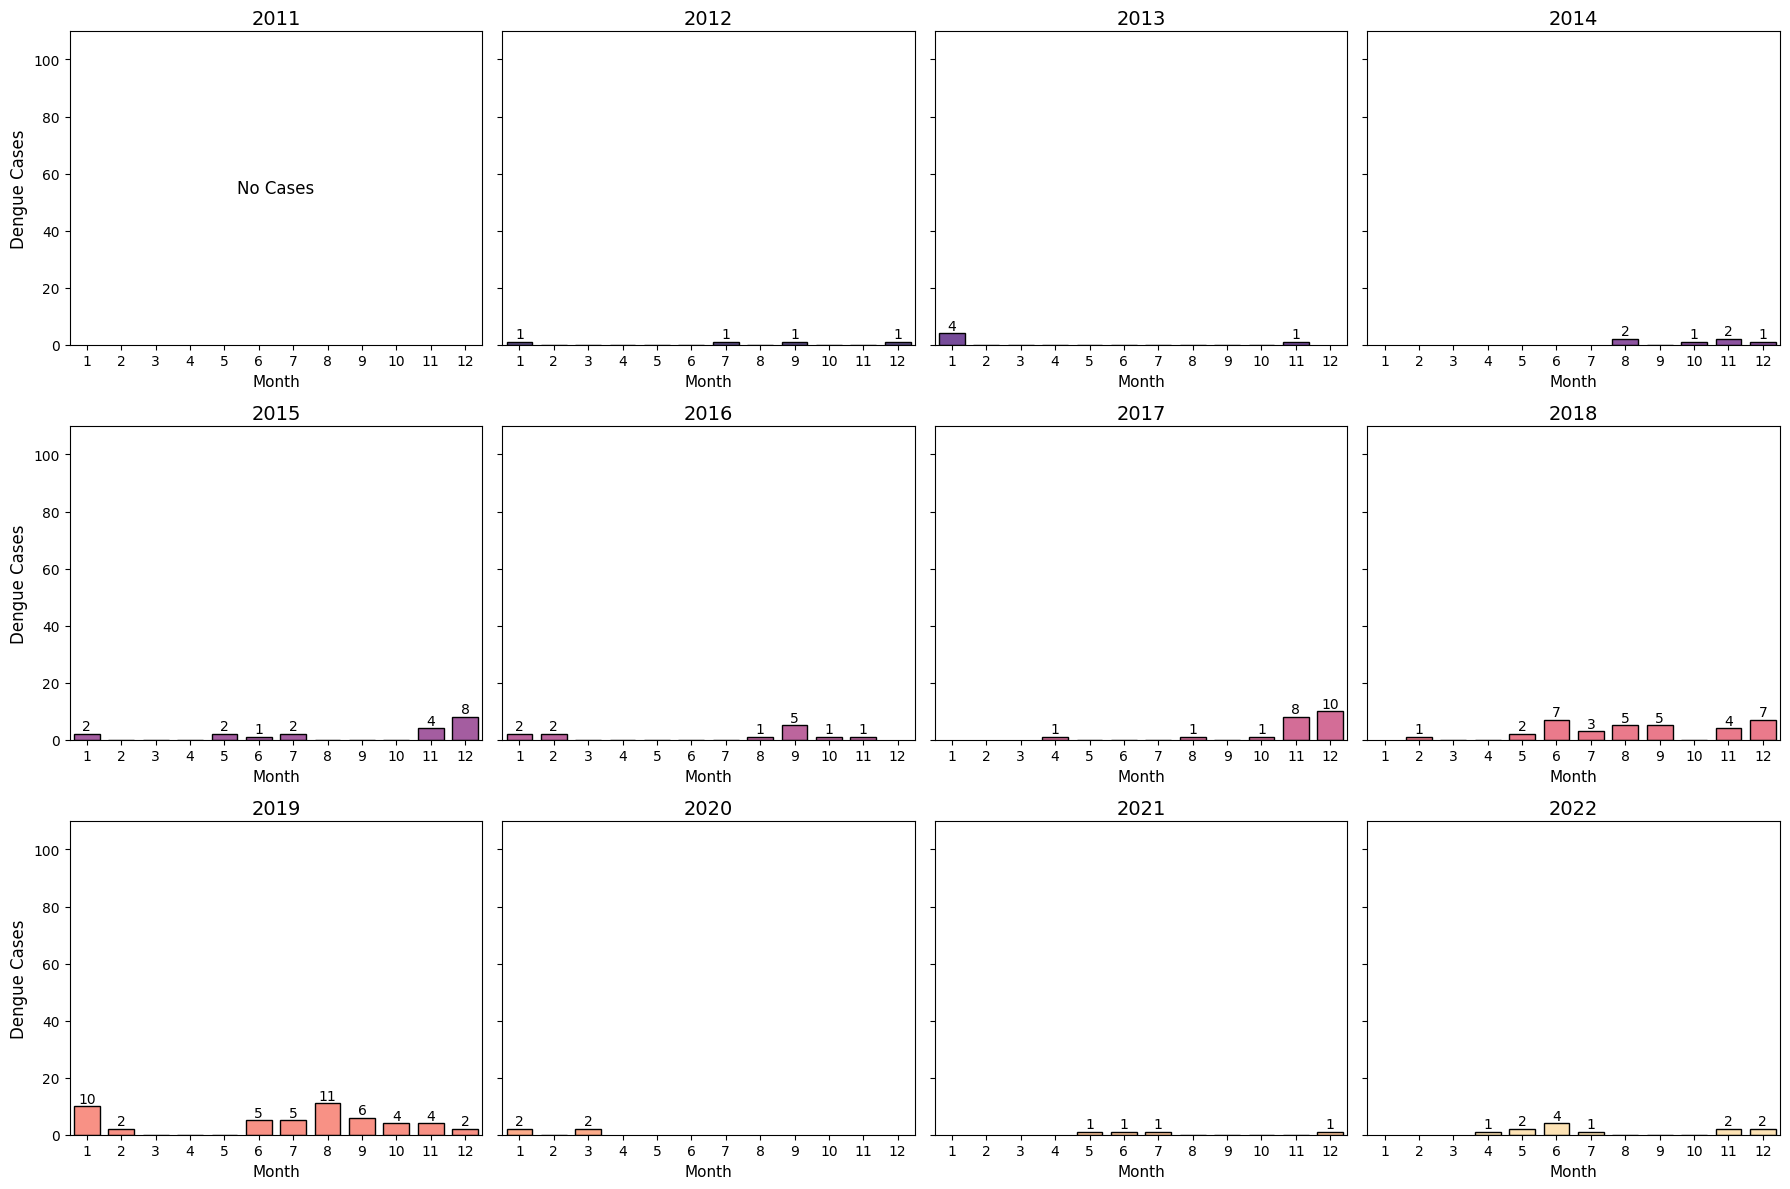

In [46]:
#HISTOGRAM FOR MONTHLY CASES EVERY YEAR
plot_dengue_cases(df, "KIWALAN")

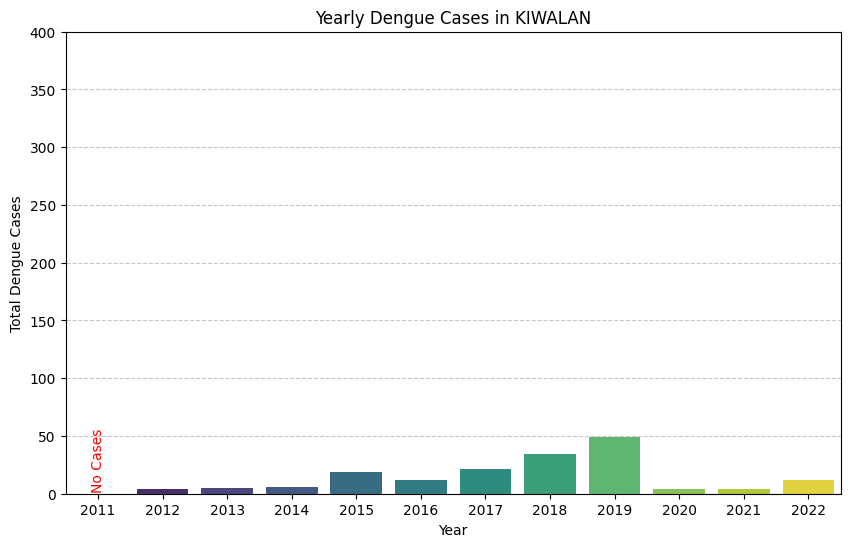

In [47]:
plot_total_dengue_cases_yearly(df, "KIWALAN")

<div style="
    background-color: black; 
    color: white; 
    padding: 10px; 
    border-radius: 10px; 
    text-align: center;
    max-width: 100vw; 
    width: 100%;
    box-sizing: border-box;">
    LANIPAO MONTHLY CASES
</div>


In [48]:
selected_barangay = "LANIPAO"  # Change this to any barangay you want
barangay_data = get_selected_barangay(df, selected_barangay)

# Display the data for each year
for year, data in barangay_data.items():
    display(data)

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
16            16  LANIPAO  8.2266  124.3412  2011      1             0   
60            16  LANIPAO  8.2266  124.3412  2011      2             0   
104           16  LANIPAO  8.2266  124.3412  2011      3             0   
148           16  LANIPAO  8.2266  124.3412  2011      4             0   
192           16  LANIPAO  8.2266  124.3412  2011      5             0   
236           16  LANIPAO  8.2266  124.3412  2011      6             0   
280           16  LANIPAO  8.2266  124.3412  2011      7             0   
324           16  LANIPAO  8.2266  124.3412  2011      8             0   
368           16  LANIPAO  8.2266  124.3412  2011      9             0   
412           16  LANIPAO  8.2266  124.3412  2011     10             0   
456           16  LANIPAO  8.2266  124.3412  2011     11             0   
500           16  LANIPAO  8.2266  124.3412  2011     12             0   

     Temperature  Humidity  Rainfall  
16          23.8      88.1       7.0  
60          24.1      87.2      12.0  
104         25.3      85.5      20.0  
148         26.0      83.1      35.0  
192         27.2      81.9      55.0  
236         26.4      83.5      90.0  
280         25.7      84.7     110.0  
324         25.1      85.3      95.0  
368         24.4      86.2      70.0  
412         24.0      87.0      50.0  
456         23.6      88.4      30.0  
500         23.2      89.1      15.0

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
544            16  LANIPAO  8.2266  124.3412  2012      1             0   
588            16  LANIPAO  8.2266  124.3412  2012      2             0   
632            16  LANIPAO  8.2266  124.3412  2012      3             0   
676            16  LANIPAO  8.2266  124.3412  2012      4             0   
720            16  LANIPAO  8.2266  124.3412  2012      5             0   
764            16  LANIPAO  8.2266  124.3412  2012      6             0   
808            16  LANIPAO  8.2266  124.3412  2012      7             0   
852            16  LANIPAO  8.2266  124.3412  2012      8             0   
896            16  LANIPAO  8.2266  124.3412  2012      9             0   
940            16  LANIPAO  8.2266  124.3412  2012     10             0   
984            16  LANIPAO  8.2266  124.3412  2012     11             0   
1028           16  LANIPAO  8.2266  124.3412  2012     12             0   

      Temperature  Humidity  Rainfall  
544          24.3      85.1       4.0  
588          24.3      85.7       7.1  
632          24.6      83.3       3.1  
676          25.4      82.3       6.9  
720          25.1      86.4       6.9  
764          24.7      85.3       7.9  
808          24.9      85.2       6.4  
852          24.9      85.2       6.4  
896          24.1      88.1      11.4  
940          24.6      86.5       8.4  
984          24.8      84.8       4.1  
1028         24.7      84.8       5.7

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
1072           16  LANIPAO  8.2266  124.3412  2013      1             0   
1116           16  LANIPAO  8.2266  124.3412  2013      2             0   
1160           16  LANIPAO  8.2266  124.3412  2013      3             0   
1204           16  LANIPAO  8.2266  124.3412  2013      4             0   
1248           16  LANIPAO  8.2266  124.3412  2013      5             0   
1292           16  LANIPAO  8.2266  124.3412  2013      6             0   
1336           16  LANIPAO  8.2266  124.3412  2013      7             0   
1380           16  LANIPAO  8.2266  124.3412  2013      8             0   
1424           16  LANIPAO  8.2266  124.3412  2013      9             0   
1468           16  LANIPAO  8.2266  124.3412  2013     10             0   
1512           16  LANIPAO  8.2266  124.3412  2013     11             0   
1556           16  LANIPAO  8.2266  124.3412  2013     12             0   

      Temperature  Humidity  Rainfall  
1072         24.2      88.2       8.1  
1116         24.4      84.7       6.0  
1160         25.5      81.1       2.7  
1204         26.0      81.0       4.9  
1248         26.0      82.8       5.2  
1292         24.9      86.9       9.2  
1336         24.5      87.7      11.0  
1380         24.3      87.2       6.9  
1424         24.6      86.5       4.9  
1468         24.0      88.0      10.4  
1512         24.2      85.9       7.8  
1556         24.4      84.0       3.5

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
1600           16  LANIPAO  8.2266  124.3412  2014      1             0   
1644           16  LANIPAO  8.2266  124.3412  2014      2             0   
1688           16  LANIPAO  8.2266  124.3412  2014      3             0   
1732           16  LANIPAO  8.2266  124.3412  2014      4             0   
1776           16  LANIPAO  8.2266  124.3412  2014      5             0   
1820           16  LANIPAO  8.2266  124.3412  2014      6             0   
1864           16  LANIPAO  8.2266  124.3412  2014      7             0   
1908           16  LANIPAO  8.2266  124.3412  2014      8             0   
1952           16  LANIPAO  8.2266  124.3412  2014      9             0   
1996           16  LANIPAO  8.2266  124.3412  2014     10             0   
2040           16  LANIPAO  8.2266  124.3412  2014     11             0   
2084           16  LANIPAO  8.2266  124.3412  2014     12             0   

      Temperature  Humidity  Rainfall  
1600         23.2      86.4       6.8  
1644         23.7      82.4       2.3  
1688         24.3      82.5       3.8  
1732         25.1      81.4       2.0  
1776         25.3      84.0       4.9  
1820         24.5      87.1       6.6  
1864         23.4      89.1       8.5  
1908         23.9      87.7       8.0  
1952         23.4      88.5       7.1  
1996         23.9      88.4       8.5  
2040         24.7      85.2       6.1  
2084         24.0      85.3       4.9

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
2128           16  LANIPAO  8.2266  124.3412  2015      1             0   
2172           16  LANIPAO  8.2266  124.3412  2015      2             0   
2216           16  LANIPAO  8.2266  124.3412  2015      3             0   
2260           16  LANIPAO  8.2266  124.3412  2015      4             0   
2304           16  LANIPAO  8.2266  124.3412  2015      5             0   
2348           16  LANIPAO  8.2266  124.3412  2015      6             0   
2392           16  LANIPAO  8.2266  124.3412  2015      7             0   
2436           16  LANIPAO  8.2266  124.3412  2015      8             0   
2480           16  LANIPAO  8.2266  124.3412  2015      9             0   
2524           16  LANIPAO  8.2266  124.3412  2015     10             0   
2568           16  LANIPAO  8.2266  124.3412  2015     11             1   
2612           16  LANIPAO  8.2266  124.3412  2015     12             0   

      Temperature  Humidity  Rainfall  
2128         25.6      89.0       5.9  
2172         25.6      87.0       3.0  
2216         26.1      83.2       1.1  
2260         27.3      82.8       2.1  
2304         28.4      78.1       2.7  
2348         27.4      81.9       8.7  
2392         27.6      80.4       4.2  
2436         27.5      80.9       5.5  
2480         27.2      82.4       8.2  
2524         27.2      83.4       4.9  
2568         26.8      87.3       6.5  
2612         26.5      87.1       4.8

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
2656           16  LANIPAO  8.2266  124.3412  2016      1             0   
2700           16  LANIPAO  8.2266  124.3412  2016      2             0   
2744           16  LANIPAO  8.2266  124.3412  2016      3             0   
2788           16  LANIPAO  8.2266  124.3412  2016      4             0   
2832           16  LANIPAO  8.2266  124.3412  2016      5             0   
2876           16  LANIPAO  8.2266  124.3412  2016      6             0   
2920           16  LANIPAO  8.2266  124.3412  2016      7             0   
2964           16  LANIPAO  8.2266  124.3412  2016      8             0   
3008           16  LANIPAO  8.2266  124.3412  2016      9             0   
3052           16  LANIPAO  8.2266  124.3412  2016     10             0   
3096           16  LANIPAO  8.2266  124.3412  2016     11             0   
3140           16  LANIPAO  8.2266  124.3412  2016     12             0   

      Temperature  Humidity  Rainfall  
2656         26.2      86.9       1.6  
2700         26.1      88.2       2.6  
2744         26.8      84.4       0.4  
2788         28.1      80.1       1.5  
2832         28.3      81.9       8.3  
2876         27.5      83.9      12.5  
2920         27.6      82.0       5.2  
2964         27.8      80.3       2.7  
3008         27.2      82.4       6.2  
3052         27.1      84.6       8.9  
3096         26.5      86.6       7.6  
3140         26.7      86.9       8.2

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
3184           16  LANIPAO  8.2266  124.3412  2017      1             0   
3228           16  LANIPAO  8.2266  124.3412  2017      2             0   
3272           16  LANIPAO  8.2266  124.3412  2017      3             0   
3316           16  LANIPAO  8.2266  124.3412  2017      4             0   
3360           16  LANIPAO  8.2266  124.3412  2017      5             0   
3404           16  LANIPAO  8.2266  124.3412  2017      6             0   
3448           16  LANIPAO  8.2266  124.3412  2017      7             0   
3492           16  LANIPAO  8.2266  124.3412  2017      8             0   
3536           16  LANIPAO  8.2266  124.3412  2017      9             0   
3580           16  LANIPAO  8.2266  124.3412  2017     10             0   
3624           16  LANIPAO  8.2266  124.3412  2017     11             0   
3668           16  LANIPAO  8.2266  124.3412  2017     12             0   

      Temperature  Humidity  Rainfall  
3184         25.9      88.9      12.5  
3228         25.6      87.8       5.9  
3272         26.1      87.4       8.0  
3316         27.2      85.0       5.1  
3360         27.8      84.4      10.4  
3404         27.4      83.8       7.8  
3448         27.2      82.6       9.1  
3492         27.9      83.4       9.6  
3536         27.3      83.3      11.4  
3580         27.0      84.0       8.3  
3624         27.0      86.6       7.3  
3668         26.7      85.9       9.6

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
3712           16  LANIPAO  8.2266  124.3412  2018      1             0   
3756           16  LANIPAO  8.2266  124.3412  2018      2             0   
3800           16  LANIPAO  8.2266  124.3412  2018      3             0   
3844           16  LANIPAO  8.2266  124.3412  2018      4             0   
3888           16  LANIPAO  8.2266  124.3412  2018      5             0   
3932           16  LANIPAO  8.2266  124.3412  2018      6             0   
3976           16  LANIPAO  8.2266  124.3412  2018      7             0   
4020           16  LANIPAO  8.2266  124.3412  2018      8             0   
4064           16  LANIPAO  8.2266  124.3412  2018      9             0   
4108           16  LANIPAO  8.2266  124.3412  2018     10             0   
4152           16  LANIPAO  8.2266  124.3412  2018     11             0   
4196           16  LANIPAO  8.2266  124.3412  2018     12             0   

      Temperature  Humidity  Rainfall  
3712         26.2      87.5       7.3  
3756         26.4      86.0       9.7  
3800         26.5      84.6       3.7  
3844         27.4      82.5       2.6  
3888         27.9      82.0       6.9  
3932         27.7      80.7       5.2  
3976         27.3      81.6       4.7  
4020         27.4      79.8       2.1  
4064         26.9      82.2       5.4  
4108         27.2      82.7       4.2  
4152         26.5      86.6       6.1  
4196         26.3      88.1       5.8

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
4240           16  LANIPAO  8.2266  124.3412  2019      1             0   
4284           16  LANIPAO  8.2266  124.3412  2019      2             0   
4328           16  LANIPAO  8.2266  124.3412  2019      3             0   
4372           16  LANIPAO  8.2266  124.3412  2019      4             0   
4416           16  LANIPAO  8.2266  124.3412  2019      5             0   
4460           16  LANIPAO  8.2266  124.3412  2019      6             0   
4504           16  LANIPAO  8.2266  124.3412  2019      7             0   
4548           16  LANIPAO  8.2266  124.3412  2019      8             0   
4592           16  LANIPAO  8.2266  124.3412  2019      9             1   
4636           16  LANIPAO  8.2266  124.3412  2019     10             0   
4680           16  LANIPAO  8.2266  124.3412  2019     11             1   
4724           16  LANIPAO  8.2266  124.3412  2019     12             0   

      Temperature  Humidity  Rainfall  
4240         25.5      88.2       5.7  
4284         25.3      84.3       1.1  
4328         26.1      83.2       1.9  
4372         27.5      80.3       1.8  
4416         28.4      78.6       4.4  
4460         27.8      82.7       9.1  
4504         27.2      82.1       6.2  
4548         27.7      77.1       1.4  
4592         27.8      78.2       3.3  
4636         27.0      83.8       7.7  
4680         27.1      82.9       4.3  
4724         26.4      86.4       4.2

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
4768           16  LANIPAO  8.2266  124.3412  2020      1             0   
4812           16  LANIPAO  8.2266  124.3412  2020      2             0   
4856           16  LANIPAO  8.2266  124.3412  2020      3             0   
4900           16  LANIPAO  8.2266  124.3412  2020      4             0   
4944           16  LANIPAO  8.2266  124.3412  2020      5             0   
4988           16  LANIPAO  8.2266  124.3412  2020      6             0   
5032           16  LANIPAO  8.2266  124.3412  2020      7             0   
5076           16  LANIPAO  8.2266  124.3412  2020      8             0   
5120           16  LANIPAO  8.2266  124.3412  2020      9             0   
5164           16  LANIPAO  8.2266  124.3412  2020     10             0   
5208           16  LANIPAO  8.2266  124.3412  2020     11             0   
5252           16  LANIPAO  8.2266  124.3412  2020     12             0   

      Temperature  Humidity  Rainfall  
4768         26.3      86.8       2.1  
4812         25.7      87.2       3.5  
4856         26.4      85.2       2.0  
4900         27.2      81.6       1.0  
4944         28.0      83.2       9.8  
4988         27.3      84.1      14.1  
5032         27.0      83.9      15.7  
5076         27.2      82.9      11.7  
5120         27.2      83.7       9.2  
5164         26.9      84.2      13.2  
5208         26.8      86.2       5.5  
5252         26.7      86.6       8.2

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
5296           16  LANIPAO  8.2266  124.3412  2021      1             0   
5340           16  LANIPAO  8.2266  124.3412  2021      2             0   
5384           16  LANIPAO  8.2266  124.3412  2021      3             0   
5428           16  LANIPAO  8.2266  124.3412  2021      4             0   
5472           16  LANIPAO  8.2266  124.3412  2021      5             0   
5516           16  LANIPAO  8.2266  124.3412  2021      6             0   
5560           16  LANIPAO  8.2266  124.3412  2021      7             0   
5604           16  LANIPAO  8.2266  124.3412  2021      8             0   
5648           16  LANIPAO  8.2266  124.3412  2021      9             0   
5692           16  LANIPAO  8.2266  124.3412  2021     10             0   
5736           16  LANIPAO  8.2266  124.3412  2021     11             0   
5780           16  LANIPAO  8.2266  124.3412  2021     12             0   

      Temperature  Humidity  Rainfall  
5296         25.9      88.5      11.9  
5340         26.0      87.1      12.6  
5384         26.8      84.7       5.5  
5428         27.1      82.5       4.5  
5472         27.5      84.0      10.7  
5516         27.6      81.3       8.2  
5560         27.7      80.0       4.4  
5604         27.5      80.0       6.5  
5648         27.2      82.7       9.5  
5692         27.3      83.6       8.7  
5736         27.0      86.4       9.4  
5780         26.2      86.9       9.8

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
5824           16  LANIPAO  8.2266  124.3412  2022      1             0   
5868           16  LANIPAO  8.2266  124.3412  2022      2             0   
5912           16  LANIPAO  8.2266  124.3412  2022      3             0   
5956           16  LANIPAO  8.2266  124.3412  2022      4             0   
6000           16  LANIPAO  8.2266  124.3412  2022      5             0   
6044           16  LANIPAO  8.2266  124.3412  2022      6             0   
6088           16  LANIPAO  8.2266  124.3412  2022      7             0   
6132           16  LANIPAO  8.2266  124.3412  2022      8             0   
6176           16  LANIPAO  8.2266  124.3412  2022      9             0   
6220           16  LANIPAO  8.2266  124.3412  2022     10             0   
6264           16  LANIPAO  8.2266  124.3412  2022     11             0   
6308           16  LANIPAO  8.2266  124.3412  2022     12             0   

      Temperature  Humidity  Rainfall  
5824         26.0      86.9       8.3  
5868         26.0      87.2       3.9  
5912         26.8      86.5      11.0  
5956         26.8      86.5      12.2  
6000         27.4      83.9      11.5  
6044         27.6      81.9       7.1  
6088         27.4      83.2      11.6  
6132         27.3      82.0       7.9  
6176         27.5      81.1       6.1  
6220         27.1      84.2       9.0  
6264         27.0      85.8       6.6  
6308         26.4      87.1      14.5

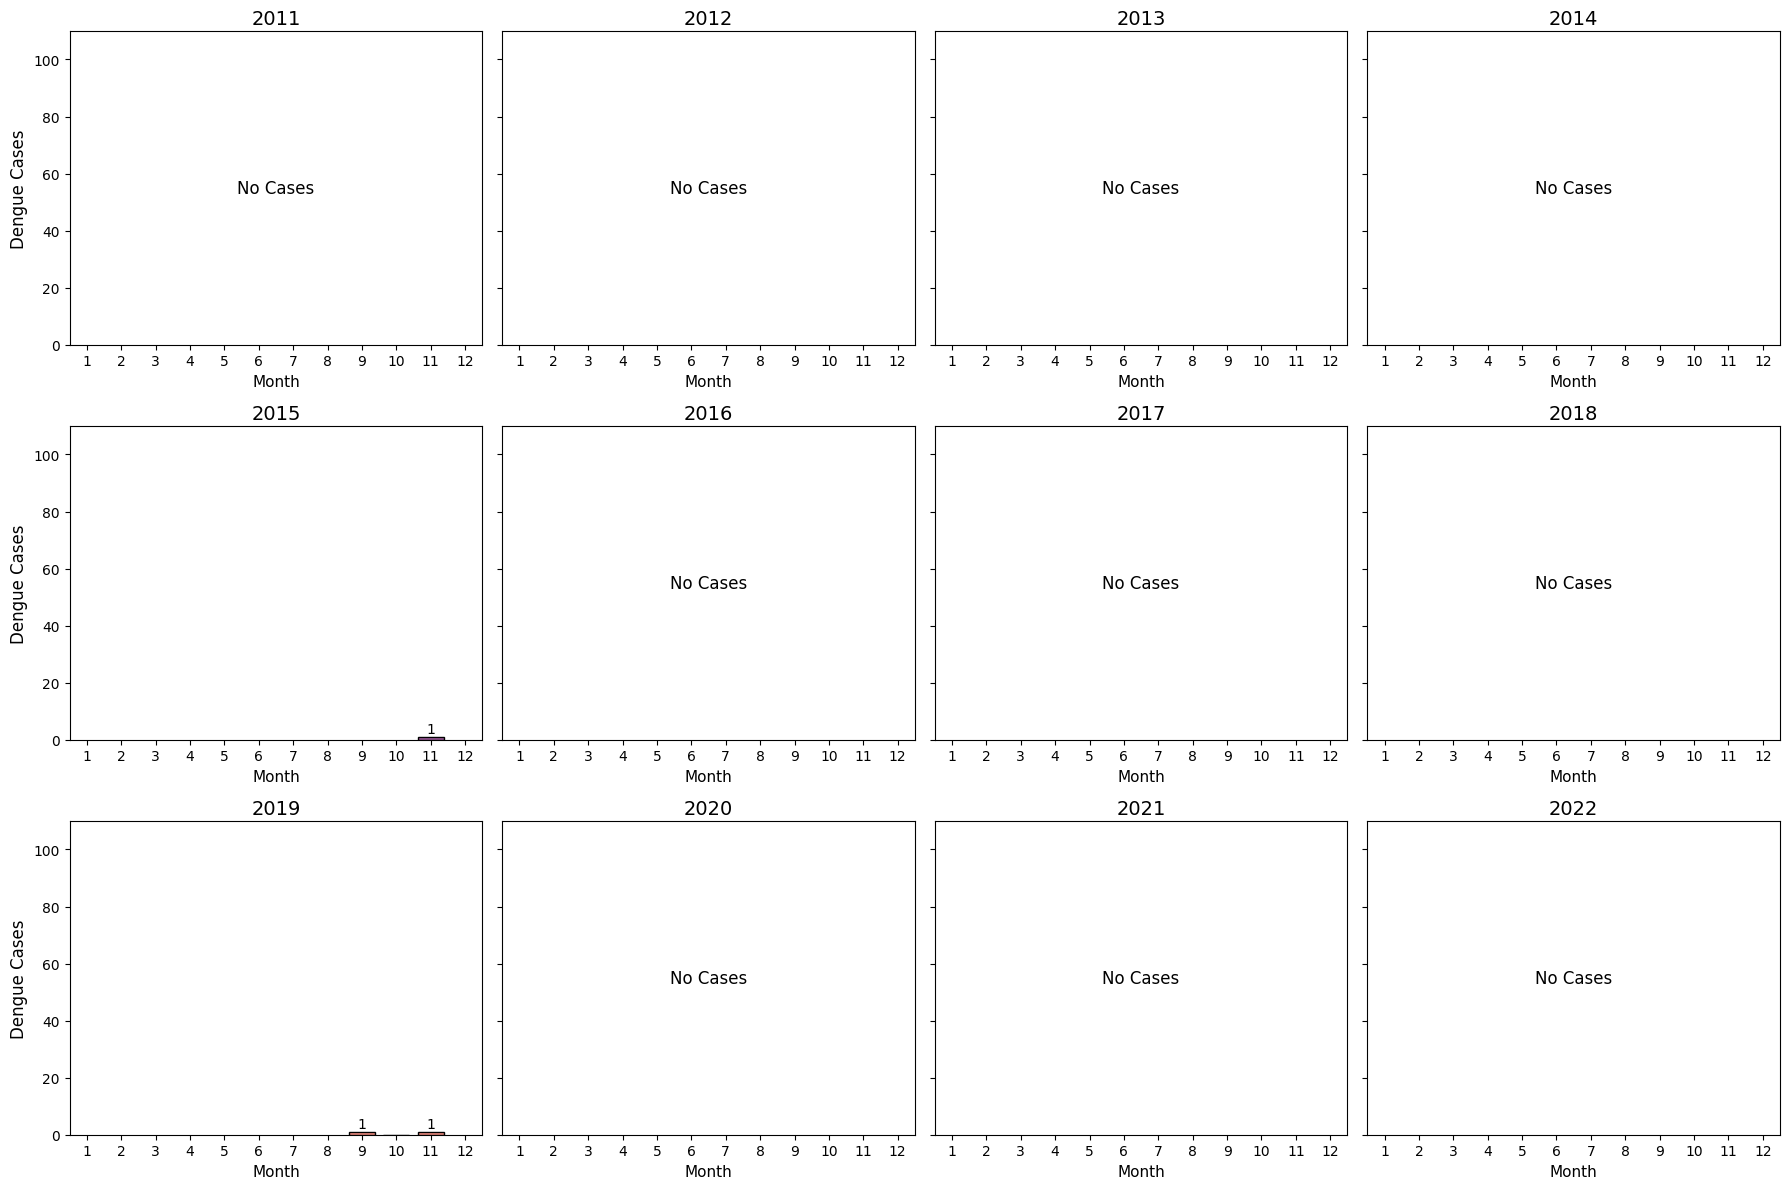

In [49]:
#HISTOGRAM FOR MONTHLY CASES EVERY YEAR
plot_dengue_cases(df, "LANIPAO")

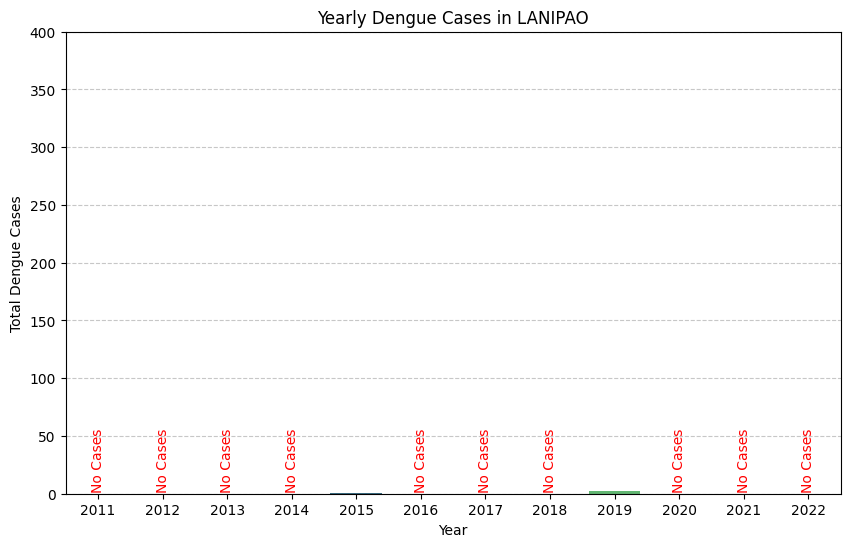

In [50]:
plot_total_dengue_cases_yearly(df, "LANIPAO")

<div style="
    background-color: black; 
    color: white; 
    padding: 10px; 
    border-radius: 10px; 
    text-align: center;
    max-width: 100vw; 
    width: 100%;
    box-sizing: border-box;">
    LUINAB MONTHLY CASES
</div>


In [51]:
selected_barangay = "LUINAB"  # Change this to any barangay you want
barangay_data = get_selected_barangay(df, selected_barangay)

# Display the data for each year
for year, data in barangay_data.items():
    display(data)

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
17            17   LUINAB  8.2472  124.2681  2011      1             0   
61            17   LUINAB  8.2472  124.2681  2011      2             1   
105           17   LUINAB  8.2472  124.2681  2011      3             0   
149           17   LUINAB  8.2472  124.2681  2011      4             0   
193           17   LUINAB  8.2472  124.2681  2011      5             0   
237           17   LUINAB  8.2472  124.2681  2011      6             0   
281           17   LUINAB  8.2472  124.2681  2011      7             0   
325           17   LUINAB  8.2472  124.2681  2011      8             0   
369           17   LUINAB  8.2472  124.2681  2011      9             0   
413           17   LUINAB  8.2472  124.2681  2011     10             0   
457           17   LUINAB  8.2472  124.2681  2011     11             0   
501           17   LUINAB  8.2472  124.2681  2011     12             0   

     Temperature  Humidity  Rainfall  
17          23.8      88.1       7.0  
61          24.1      87.2      12.0  
105         25.3      85.5      20.0  
149         26.0      83.1      35.0  
193         27.2      81.9      55.0  
237         26.4      83.5      90.0  
281         25.7      84.7     110.0  
325         25.1      85.3      95.0  
369         24.4      86.2      70.0  
413         24.0      87.0      50.0  
457         23.6      88.4      30.0  
501         23.2      89.1      15.0

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
545            17   LUINAB  8.2472  124.2681  2012      1             0   
589            17   LUINAB  8.2472  124.2681  2012      2             0   
633            17   LUINAB  8.2472  124.2681  2012      3             0   
677            17   LUINAB  8.2472  124.2681  2012      4             0   
721            17   LUINAB  8.2472  124.2681  2012      5             3   
765            17   LUINAB  8.2472  124.2681  2012      6             4   
809            17   LUINAB  8.2472  124.2681  2012      7             1   
853            17   LUINAB  8.2472  124.2681  2012      8             1   
897            17   LUINAB  8.2472  124.2681  2012      9             2   
941            17   LUINAB  8.2472  124.2681  2012     10             0   
985            17   LUINAB  8.2472  124.2681  2012     11             1   
1029           17   LUINAB  8.2472  124.2681  2012     12             0   

      Temperature  Humidity  Rainfall  
545          24.3      85.1       4.0  
589          24.3      85.7       7.1  
633          24.6      83.3       3.1  
677          25.4      82.3       6.9  
721          25.1      86.4       6.9  
765          24.7      85.3       7.9  
809          24.9      85.2       6.4  
853          24.9      85.2       6.4  
897          24.1      88.1      11.4  
941          24.6      86.5       8.4  
985          24.8      84.8       4.1  
1029         24.7      84.8       5.7

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
1073           17   LUINAB  8.2472  124.2681  2013      1             3   
1117           17   LUINAB  8.2472  124.2681  2013      2             1   
1161           17   LUINAB  8.2472  124.2681  2013      3             0   
1205           17   LUINAB  8.2472  124.2681  2013      4             0   
1249           17   LUINAB  8.2472  124.2681  2013      5             0   
1293           17   LUINAB  8.2472  124.2681  2013      6             0   
1337           17   LUINAB  8.2472  124.2681  2013      7             0   
1381           17   LUINAB  8.2472  124.2681  2013      8             0   
1425           17   LUINAB  8.2472  124.2681  2013      9             4   
1469           17   LUINAB  8.2472  124.2681  2013     10             0   
1513           17   LUINAB  8.2472  124.2681  2013     11             1   
1557           17   LUINAB  8.2472  124.2681  2013     12             2   

      Temperature  Humidity  Rainfall  
1073         24.2      88.2       8.1  
1117         24.4      84.7       6.0  
1161         25.5      81.1       2.7  
1205         26.0      81.0       4.9  
1249         26.0      82.8       5.2  
1293         24.9      86.9       9.2  
1337         24.5      87.7      11.0  
1381         24.3      87.2       6.9  
1425         24.6      86.5       4.9  
1469         24.0      88.0      10.4  
1513         24.2      85.9       7.8  
1557         24.4      84.0       3.5

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
1601           17   LUINAB  8.2472  124.2681  2014      1             0   
1645           17   LUINAB  8.2472  124.2681  2014      2             1   
1689           17   LUINAB  8.2472  124.2681  2014      3             0   
1733           17   LUINAB  8.2472  124.2681  2014      4             1   
1777           17   LUINAB  8.2472  124.2681  2014      5             3   
1821           17   LUINAB  8.2472  124.2681  2014      6             5   
1865           17   LUINAB  8.2472  124.2681  2014      7             5   
1909           17   LUINAB  8.2472  124.2681  2014      8             7   
1953           17   LUINAB  8.2472  124.2681  2014      9             0   
1997           17   LUINAB  8.2472  124.2681  2014     10             2   
2041           17   LUINAB  8.2472  124.2681  2014     11             2   
2085           17   LUINAB  8.2472  124.2681  2014     12             1   

      Temperature  Humidity  Rainfall  
1601         23.2      86.4       6.8  
1645         23.7      82.4       2.3  
1689         24.3      82.5       3.8  
1733         25.1      81.4       2.0  
1777         25.3      84.0       4.9  
1821         24.5      87.1       6.6  
1865         23.4      89.1       8.5  
1909         23.9      87.7       8.0  
1953         23.4      88.5       7.1  
1997         23.9      88.4       8.5  
2041         24.7      85.2       6.1  
2085         24.0      85.3       4.9

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
2129           17   LUINAB  8.2472  124.2681  2015      1             2   
2173           17   LUINAB  8.2472  124.2681  2015      2             7   
2217           17   LUINAB  8.2472  124.2681  2015      3             2   
2261           17   LUINAB  8.2472  124.2681  2015      4             0   
2305           17   LUINAB  8.2472  124.2681  2015      5             2   
2349           17   LUINAB  8.2472  124.2681  2015      6             4   
2393           17   LUINAB  8.2472  124.2681  2015      7             0   
2437           17   LUINAB  8.2472  124.2681  2015      8             2   
2481           17   LUINAB  8.2472  124.2681  2015      9             2   
2525           17   LUINAB  8.2472  124.2681  2015     10             4   
2569           17   LUINAB  8.2472  124.2681  2015     11             5   
2613           17   LUINAB  8.2472  124.2681  2015     12             6   

      Temperature  Humidity  Rainfall  
2129         25.6      89.0       5.9  
2173         25.6      87.0       3.0  
2217         26.1      83.2       1.1  
2261         27.3      82.8       2.1  
2305         28.4      78.1       2.7  
2349         27.4      81.9       8.7  
2393         27.6      80.4       4.2  
2437         27.5      80.9       5.5  
2481         27.2      82.4       8.2  
2525         27.2      83.4       4.9  
2569         26.8      87.3       6.5  
2613         26.5      87.1       4.8

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
2657           17   LUINAB  8.2472  124.2681  2016      1             9   
2701           17   LUINAB  8.2472  124.2681  2016      2             9   
2745           17   LUINAB  8.2472  124.2681  2016      3             7   
2789           17   LUINAB  8.2472  124.2681  2016      4             1   
2833           17   LUINAB  8.2472  124.2681  2016      5             0   
2877           17   LUINAB  8.2472  124.2681  2016      6             2   
2921           17   LUINAB  8.2472  124.2681  2016      7             4   
2965           17   LUINAB  8.2472  124.2681  2016      8            15   
3009           17   LUINAB  8.2472  124.2681  2016      9             7   
3053           17   LUINAB  8.2472  124.2681  2016     10             4   
3097           17   LUINAB  8.2472  124.2681  2016     11             6   
3141           17   LUINAB  8.2472  124.2681  2016     12             5   

      Temperature  Humidity  Rainfall  
2657         26.2      86.9       1.6  
2701         26.1      88.2       2.6  
2745         26.8      84.4       0.4  
2789         28.1      80.1       1.5  
2833         28.3      81.9       8.3  
2877         27.5      83.9      12.5  
2921         27.6      82.0       5.2  
2965         27.8      80.3       2.7  
3009         27.2      82.4       6.2  
3053         27.1      84.6       8.9  
3097         26.5      86.6       7.6  
3141         26.7      86.9       8.2

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
3185           17   LUINAB  8.2472  124.2681  2017      1             3   
3229           17   LUINAB  8.2472  124.2681  2017      2             5   
3273           17   LUINAB  8.2472  124.2681  2017      3             1   
3317           17   LUINAB  8.2472  124.2681  2017      4             1   
3361           17   LUINAB  8.2472  124.2681  2017      5             0   
3405           17   LUINAB  8.2472  124.2681  2017      6             1   
3449           17   LUINAB  8.2472  124.2681  2017      7             6   
3493           17   LUINAB  8.2472  124.2681  2017      8             0   
3537           17   LUINAB  8.2472  124.2681  2017      9             2   
3581           17   LUINAB  8.2472  124.2681  2017     10             1   
3625           17   LUINAB  8.2472  124.2681  2017     11             0   
3669           17   LUINAB  8.2472  124.2681  2017     12             1   

      Temperature  Humidity  Rainfall  
3185         25.9      88.9      12.5  
3229         25.6      87.8       5.9  
3273         26.1      87.4       8.0  
3317         27.2      85.0       5.1  
3361         27.8      84.4      10.4  
3405         27.4      83.8       7.8  
3449         27.2      82.6       9.1  
3493         27.9      83.4       9.6  
3537         27.3      83.3      11.4  
3581         27.0      84.0       8.3  
3625         27.0      86.6       7.3  
3669         26.7      85.9       9.6

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
3713           17   LUINAB  8.2472  124.2681  2018      1             3   
3757           17   LUINAB  8.2472  124.2681  2018      2             0   
3801           17   LUINAB  8.2472  124.2681  2018      3             0   
3845           17   LUINAB  8.2472  124.2681  2018      4             0   
3889           17   LUINAB  8.2472  124.2681  2018      5             4   
3933           17   LUINAB  8.2472  124.2681  2018      6             4   
3977           17   LUINAB  8.2472  124.2681  2018      7            16   
4021           17   LUINAB  8.2472  124.2681  2018      8             9   
4065           17   LUINAB  8.2472  124.2681  2018      9             3   
4109           17   LUINAB  8.2472  124.2681  2018     10             6   
4153           17   LUINAB  8.2472  124.2681  2018     11            12   
4197           17   LUINAB  8.2472  124.2681  2018     12             9   

      Temperature  Humidity  Rainfall  
3713         26.2      87.5       7.3  
3757         26.4      86.0       9.7  
3801         26.5      84.6       3.7  
3845         27.4      82.5       2.6  
3889         27.9      82.0       6.9  
3933         27.7      80.7       5.2  
3977         27.3      81.6       4.7  
4021         27.4      79.8       2.1  
4065         26.9      82.2       5.4  
4109         27.2      82.7       4.2  
4153         26.5      86.6       6.1  
4197         26.3      88.1       5.8

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
4241           17   LUINAB  8.2472  124.2681  2019      1            27   
4285           17   LUINAB  8.2472  124.2681  2019      2             6   
4329           17   LUINAB  8.2472  124.2681  2019      3             5   
4373           17   LUINAB  8.2472  124.2681  2019      4             5   
4417           17   LUINAB  8.2472  124.2681  2019      5             0   
4461           17   LUINAB  8.2472  124.2681  2019      6             8   
4505           17   LUINAB  8.2472  124.2681  2019      7            46   
4549           17   LUINAB  8.2472  124.2681  2019      8            43   
4593           17   LUINAB  8.2472  124.2681  2019      9            19   
4637           17   LUINAB  8.2472  124.2681  2019     10            10   
4681           17   LUINAB  8.2472  124.2681  2019     11            19   
4725           17   LUINAB  8.2472  124.2681  2019     12            10   

      Temperature  Humidity  Rainfall  
4241         25.5      88.2       5.7  
4285         25.3      84.3       1.1  
4329         26.1      83.2       1.9  
4373         27.5      80.3       1.8  
4417         28.4      78.6       4.4  
4461         27.8      82.7       9.1  
4505         27.2      82.1       6.2  
4549         27.7      77.1       1.4  
4593         27.8      78.2       3.3  
4637         27.0      83.8       7.7  
4681         27.1      82.9       4.3  
4725         26.4      86.4       4.2

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
4769           17   LUINAB  8.2472  124.2681  2020      1            20   
4813           17   LUINAB  8.2472  124.2681  2020      2            10   
4857           17   LUINAB  8.2472  124.2681  2020      3             4   
4901           17   LUINAB  8.2472  124.2681  2020      4             2   
4945           17   LUINAB  8.2472  124.2681  2020      5             8   
4989           17   LUINAB  8.2472  124.2681  2020      6             8   
5033           17   LUINAB  8.2472  124.2681  2020      7             2   
5077           17   LUINAB  8.2472  124.2681  2020      8             0   
5121           17   LUINAB  8.2472  124.2681  2020      9             0   
5165           17   LUINAB  8.2472  124.2681  2020     10             0   
5209           17   LUINAB  8.2472  124.2681  2020     11             2   
5253           17   LUINAB  8.2472  124.2681  2020     12             0   

      Temperature  Humidity  Rainfall  
4769         26.3      86.8       2.1  
4813         25.7      87.2       3.5  
4857         26.4      85.2       2.0  
4901         27.2      81.6       1.0  
4945         28.0      83.2       9.8  
4989         27.3      84.1      14.1  
5033         27.0      83.9      15.7  
5077         27.2      82.9      11.7  
5121         27.2      83.7       9.2  
5165         26.9      84.2      13.2  
5209         26.8      86.2       5.5  
5253         26.7      86.6       8.2

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
5297           17   LUINAB  8.2472  124.2681  2021      1             3   
5341           17   LUINAB  8.2472  124.2681  2021      2             5   
5385           17   LUINAB  8.2472  124.2681  2021      3             1   
5429           17   LUINAB  8.2472  124.2681  2021      4             0   
5473           17   LUINAB  8.2472  124.2681  2021      5             1   
5517           17   LUINAB  8.2472  124.2681  2021      6             2   
5561           17   LUINAB  8.2472  124.2681  2021      7             1   
5605           17   LUINAB  8.2472  124.2681  2021      8             1   
5649           17   LUINAB  8.2472  124.2681  2021      9             2   
5693           17   LUINAB  8.2472  124.2681  2021     10             2   
5737           17   LUINAB  8.2472  124.2681  2021     11             7   
5781           17   LUINAB  8.2472  124.2681  2021     12             4   

      Temperature  Humidity  Rainfall  
5297         25.9      88.5      11.9  
5341         26.0      87.1      12.6  
5385         26.8      84.7       5.5  
5429         27.1      82.5       4.5  
5473         27.5      84.0      10.7  
5517         27.6      81.3       8.2  
5561         27.7      80.0       4.4  
5605         27.5      80.0       6.5  
5649         27.2      82.7       9.5  
5693         27.3      83.6       8.7  
5737         27.0      86.4       9.4  
5781         26.2      86.9       9.8

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
5825           17   LUINAB  8.2472  124.2681  2022      1             2   
5869           17   LUINAB  8.2472  124.2681  2022      2             1   
5913           17   LUINAB  8.2472  124.2681  2022      3             1   
5957           17   LUINAB  8.2472  124.2681  2022      4             1   
6001           17   LUINAB  8.2472  124.2681  2022      5             3   
6045           17   LUINAB  8.2472  124.2681  2022      6            11   
6089           17   LUINAB  8.2472  124.2681  2022      7             7   
6133           17   LUINAB  8.2472  124.2681  2022      8             4   
6177           17   LUINAB  8.2472  124.2681  2022      9             3   
6221           17   LUINAB  8.2472  124.2681  2022     10             2   
6265           17   LUINAB  8.2472  124.2681  2022     11             0   
6309           17   LUINAB  8.2472  124.2681  2022     12             1   

      Temperature  Humidity  Rainfall  
5825         26.0      86.9       8.3  
5869         26.0      87.2       3.9  
5913         26.8      86.5      11.0  
5957         26.8      86.5      12.2  
6001         27.4      83.9      11.5  
6045         27.6      81.9       7.1  
6089         27.4      83.2      11.6  
6133         27.3      82.0       7.9  
6177         27.5      81.1       6.1  
6221         27.1      84.2       9.0  
6265         27.0      85.8       6.6  
6309         26.4      87.1      14.5

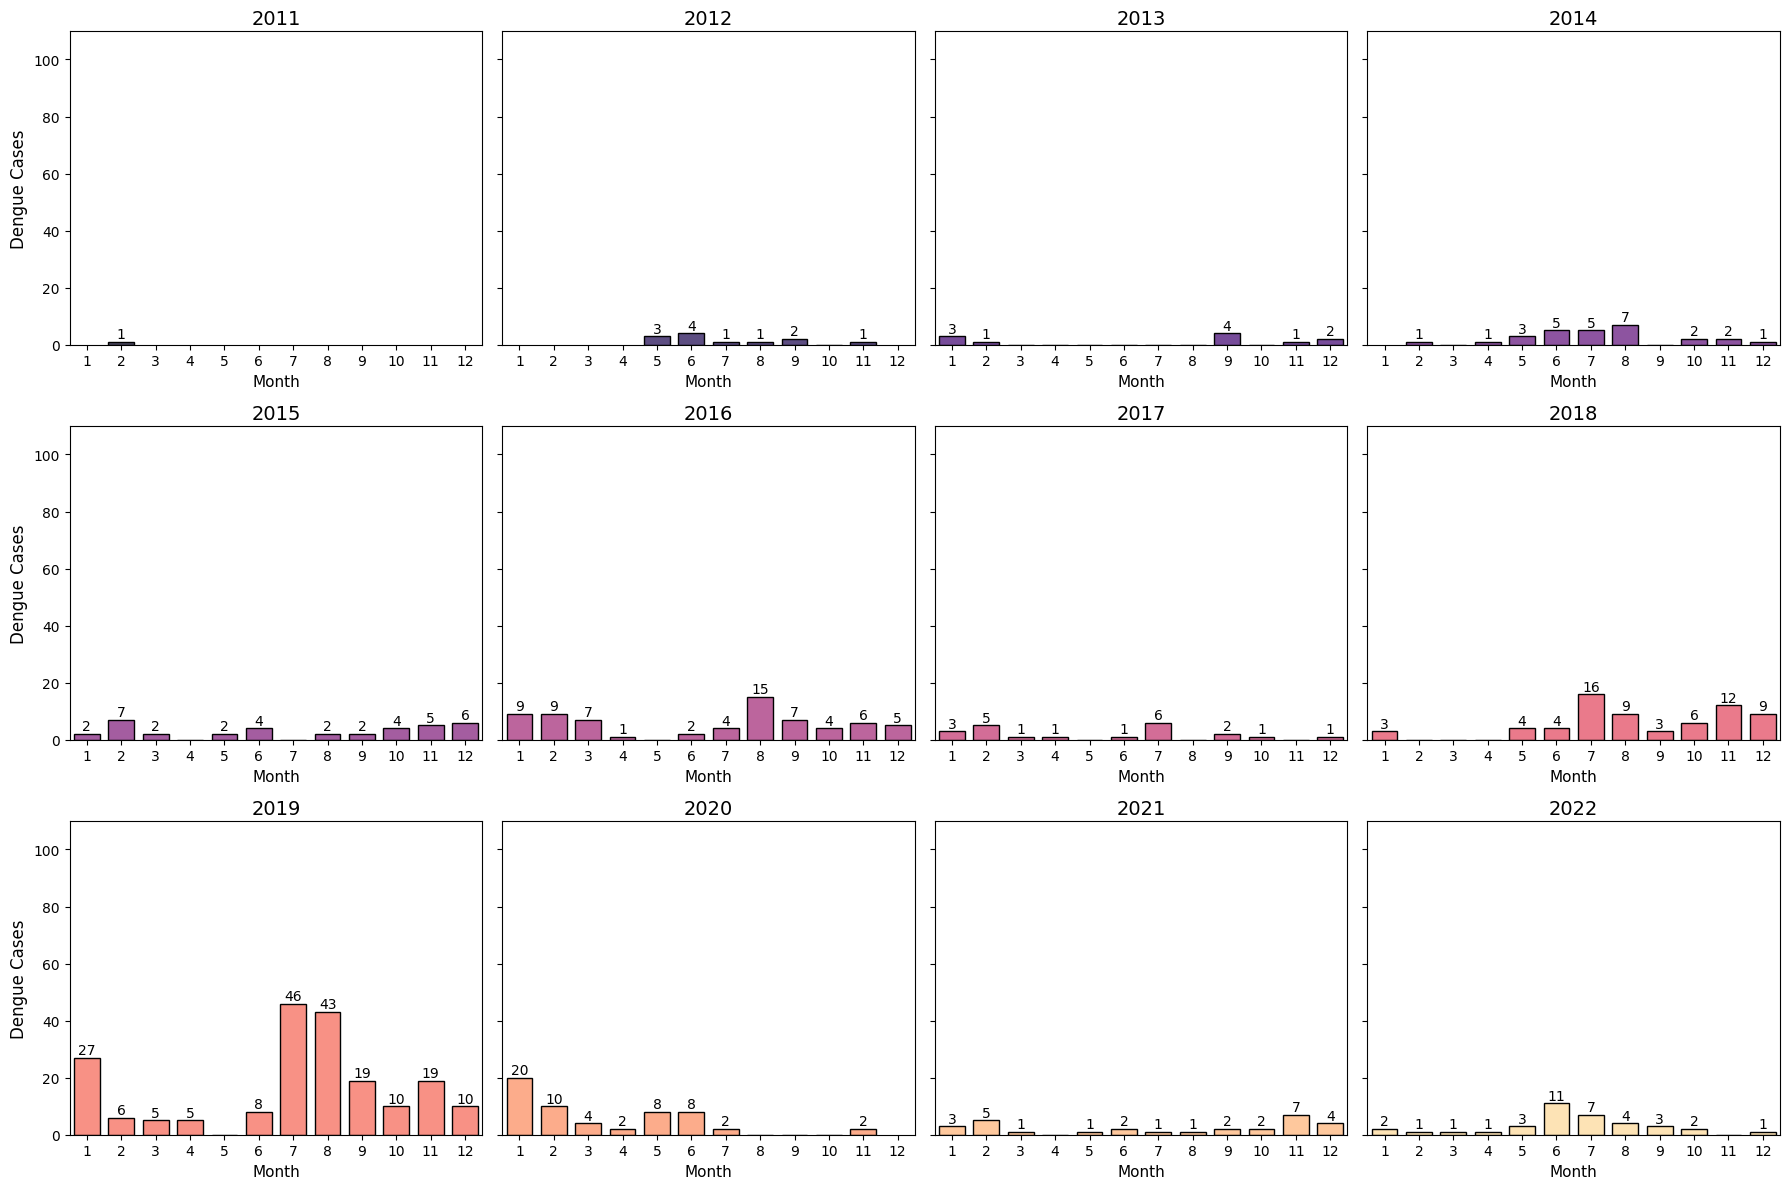

In [52]:
#HISTOGRAM FOR MONTHLY CASES EVERY YEAR
plot_dengue_cases(df, "LUINAB")

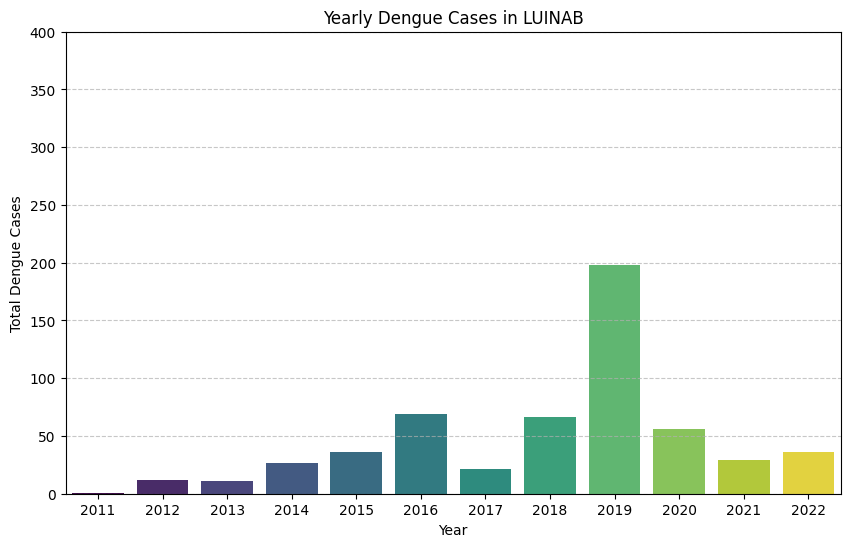

In [53]:
plot_total_dengue_cases_yearly(df, "LUINAB")

<div style="
    background-color: black; 
    color: white; 
    padding: 10px; 
    border-radius: 10px; 
    text-align: center;
    max-width: 100vw; 
    width: 100%;
    box-sizing: border-box;">
    MAHAYAHAY MONTHLY CASES
</div>


In [54]:
selected_barangay = "MAHAYAHAY"  # Change this to any barangay you want
barangay_data = get_selected_barangay(df, selected_barangay)

# Display the data for each year
for year, data in barangay_data.items():
    display(data)

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
18            18  MAHAYAHAY  8.2219  124.2406  2011      1             0   
62            18  MAHAYAHAY  8.2219  124.2406  2011      2             0   
106           18  MAHAYAHAY  8.2219  124.2406  2011      3             2   
150           18  MAHAYAHAY  8.2219  124.2406  2011      4             0   
194           18  MAHAYAHAY  8.2219  124.2406  2011      5             0   
238           18  MAHAYAHAY  8.2219  124.2406  2011      6             0   
282           18  MAHAYAHAY  8.2219  124.2406  2011      7             1   
326           18  MAHAYAHAY  8.2219  124.2406  2011      8             1   
370           18  MAHAYAHAY  8.2219  124.2406  2011      9             0   
414           18  MAHAYAHAY  8.2219  124.2406  2011     10             0   
458           18  MAHAYAHAY  8.2219  124.2406  2011     11             0   
502           18  MAHAYAHAY  8.2219  124.2406  2011     12             0   

     Temperature  Humidity  Rainfall  
18          23.8      88.1       7.0  
62          24.1      87.2      12.0  
106         25.3      85.5      20.0  
150         26.0      83.1      35.0  
194         27.2      81.9      55.0  
238         26.4      83.5      90.0  
282         25.7      84.7     110.0  
326         25.1      85.3      95.0  
370         24.4      86.2      70.0  
414         24.0      87.0      50.0  
458         23.6      88.4      30.0  
502         23.2      89.1      15.0

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
546            18  MAHAYAHAY  8.2219  124.2406  2012      1             0   
590            18  MAHAYAHAY  8.2219  124.2406  2012      2             0   
634            18  MAHAYAHAY  8.2219  124.2406  2012      3             0   
678            18  MAHAYAHAY  8.2219  124.2406  2012      4             0   
722            18  MAHAYAHAY  8.2219  124.2406  2012      5             2   
766            18  MAHAYAHAY  8.2219  124.2406  2012      6             0   
810            18  MAHAYAHAY  8.2219  124.2406  2012      7             6   
854            18  MAHAYAHAY  8.2219  124.2406  2012      8             0   
898            18  MAHAYAHAY  8.2219  124.2406  2012      9             1   
942            18  MAHAYAHAY  8.2219  124.2406  2012     10             1   
986            18  MAHAYAHAY  8.2219  124.2406  2012     11             2   
1030           18  MAHAYAHAY  8.2219  124.2406  2012     12             2   

      Temperature  Humidity  Rainfall  
546          24.3      85.1       4.0  
590          24.3      85.7       7.1  
634          24.6      83.3       3.1  
678          25.4      82.3       6.9  
722          25.1      86.4       6.9  
766          24.7      85.3       7.9  
810          24.9      85.2       6.4  
854          24.9      85.2       6.4  
898          24.1      88.1      11.4  
942          24.6      86.5       8.4  
986          24.8      84.8       4.1  
1030         24.7      84.8       5.7

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
1074           18  MAHAYAHAY  8.2219  124.2406  2013      1             0   
1118           18  MAHAYAHAY  8.2219  124.2406  2013      2             0   
1162           18  MAHAYAHAY  8.2219  124.2406  2013      3             0   
1206           18  MAHAYAHAY  8.2219  124.2406  2013      4             1   
1250           18  MAHAYAHAY  8.2219  124.2406  2013      5             0   
1294           18  MAHAYAHAY  8.2219  124.2406  2013      6             0   
1338           18  MAHAYAHAY  8.2219  124.2406  2013      7             1   
1382           18  MAHAYAHAY  8.2219  124.2406  2013      8             0   
1426           18  MAHAYAHAY  8.2219  124.2406  2013      9             2   
1470           18  MAHAYAHAY  8.2219  124.2406  2013     10             1   
1514           18  MAHAYAHAY  8.2219  124.2406  2013     11             0   
1558           18  MAHAYAHAY  8.2219  124.2406  2013     12             2   

      Temperature  Humidity  Rainfall  
1074         24.2      88.2       8.1  
1118         24.4      84.7       6.0  
1162         25.5      81.1       2.7  
1206         26.0      81.0       4.9  
1250         26.0      82.8       5.2  
1294         24.9      86.9       9.2  
1338         24.5      87.7      11.0  
1382         24.3      87.2       6.9  
1426         24.6      86.5       4.9  
1470         24.0      88.0      10.4  
1514         24.2      85.9       7.8  
1558         24.4      84.0       3.5

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
1602           18  MAHAYAHAY  8.2219  124.2406  2014      1             1   
1646           18  MAHAYAHAY  8.2219  124.2406  2014      2             0   
1690           18  MAHAYAHAY  8.2219  124.2406  2014      3             0   
1734           18  MAHAYAHAY  8.2219  124.2406  2014      4             1   
1778           18  MAHAYAHAY  8.2219  124.2406  2014      5             1   
1822           18  MAHAYAHAY  8.2219  124.2406  2014      6             3   
1866           18  MAHAYAHAY  8.2219  124.2406  2014      7             4   
1910           18  MAHAYAHAY  8.2219  124.2406  2014      8             3   
1954           18  MAHAYAHAY  8.2219  124.2406  2014      9             0   
1998           18  MAHAYAHAY  8.2219  124.2406  2014     10             2   
2042           18  MAHAYAHAY  8.2219  124.2406  2014     11             4   
2086           18  MAHAYAHAY  8.2219  124.2406  2014     12             2   

      Temperature  Humidity  Rainfall  
1602         23.2      86.4       6.8  
1646         23.7      82.4       2.3  
1690         24.3      82.5       3.8  
1734         25.1      81.4       2.0  
1778         25.3      84.0       4.9  
1822         24.5      87.1       6.6  
1866         23.4      89.1       8.5  
1910         23.9      87.7       8.0  
1954         23.4      88.5       7.1  
1998         23.9      88.4       8.5  
2042         24.7      85.2       6.1  
2086         24.0      85.3       4.9

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
2130           18  MAHAYAHAY  8.2219  124.2406  2015      1             0   
2174           18  MAHAYAHAY  8.2219  124.2406  2015      2             0   
2218           18  MAHAYAHAY  8.2219  124.2406  2015      3             0   
2262           18  MAHAYAHAY  8.2219  124.2406  2015      4             2   
2306           18  MAHAYAHAY  8.2219  124.2406  2015      5             0   
2350           18  MAHAYAHAY  8.2219  124.2406  2015      6             0   
2394           18  MAHAYAHAY  8.2219  124.2406  2015      7             1   
2438           18  MAHAYAHAY  8.2219  124.2406  2015      8             0   
2482           18  MAHAYAHAY  8.2219  124.2406  2015      9             6   
2526           18  MAHAYAHAY  8.2219  124.2406  2015     10             8   
2570           18  MAHAYAHAY  8.2219  124.2406  2015     11             5   
2614           18  MAHAYAHAY  8.2219  124.2406  2015     12             8   

      Temperature  Humidity  Rainfall  
2130         25.6      89.0       5.9  
2174         25.6      87.0       3.0  
2218         26.1      83.2       1.1  
2262         27.3      82.8       2.1  
2306         28.4      78.1       2.7  
2350         27.4      81.9       8.7  
2394         27.6      80.4       4.2  
2438         27.5      80.9       5.5  
2482         27.2      82.4       8.2  
2526         27.2      83.4       4.9  
2570         26.8      87.3       6.5  
2614         26.5      87.1       4.8

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
2658           18  MAHAYAHAY  8.2219  124.2406  2016      1             3   
2702           18  MAHAYAHAY  8.2219  124.2406  2016      2             3   
2746           18  MAHAYAHAY  8.2219  124.2406  2016      3             3   
2790           18  MAHAYAHAY  8.2219  124.2406  2016      4             0   
2834           18  MAHAYAHAY  8.2219  124.2406  2016      5             0   
2878           18  MAHAYAHAY  8.2219  124.2406  2016      6             3   
2922           18  MAHAYAHAY  8.2219  124.2406  2016      7             1   
2966           18  MAHAYAHAY  8.2219  124.2406  2016      8             8   
3010           18  MAHAYAHAY  8.2219  124.2406  2016      9             3   
3054           18  MAHAYAHAY  8.2219  124.2406  2016     10             5   
3098           18  MAHAYAHAY  8.2219  124.2406  2016     11             4   
3142           18  MAHAYAHAY  8.2219  124.2406  2016     12             5   

      Temperature  Humidity  Rainfall  
2658         26.2      86.9       1.6  
2702         26.1      88.2       2.6  
2746         26.8      84.4       0.4  
2790         28.1      80.1       1.5  
2834         28.3      81.9       8.3  
2878         27.5      83.9      12.5  
2922         27.6      82.0       5.2  
2966         27.8      80.3       2.7  
3010         27.2      82.4       6.2  
3054         27.1      84.6       8.9  
3098         26.5      86.6       7.6  
3142         26.7      86.9       8.2

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
3186           18  MAHAYAHAY  8.2219  124.2406  2017      1             9   
3230           18  MAHAYAHAY  8.2219  124.2406  2017      2             5   
3274           18  MAHAYAHAY  8.2219  124.2406  2017      3             2   
3318           18  MAHAYAHAY  8.2219  124.2406  2017      4             3   
3362           18  MAHAYAHAY  8.2219  124.2406  2017      5             0   
3406           18  MAHAYAHAY  8.2219  124.2406  2017      6             0   
3450           18  MAHAYAHAY  8.2219  124.2406  2017      7             0   
3494           18  MAHAYAHAY  8.2219  124.2406  2017      8             1   
3538           18  MAHAYAHAY  8.2219  124.2406  2017      9             0   
3582           18  MAHAYAHAY  8.2219  124.2406  2017     10             0   
3626           18  MAHAYAHAY  8.2219  124.2406  2017     11             0   
3670           18  MAHAYAHAY  8.2219  124.2406  2017     12             0   

      Temperature  Humidity  Rainfall  
3186         25.9      88.9      12.5  
3230         25.6      87.8       5.9  
3274         26.1      87.4       8.0  
3318         27.2      85.0       5.1  
3362         27.8      84.4      10.4  
3406         27.4      83.8       7.8  
3450         27.2      82.6       9.1  
3494         27.9      83.4       9.6  
3538         27.3      83.3      11.4  
3582         27.0      84.0       8.3  
3626         27.0      86.6       7.3  
3670         26.7      85.9       9.6

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
3714           18  MAHAYAHAY  8.2219  124.2406  2018      1             0   
3758           18  MAHAYAHAY  8.2219  124.2406  2018      2             0   
3802           18  MAHAYAHAY  8.2219  124.2406  2018      3             0   
3846           18  MAHAYAHAY  8.2219  124.2406  2018      4             0   
3890           18  MAHAYAHAY  8.2219  124.2406  2018      5             0   
3934           18  MAHAYAHAY  8.2219  124.2406  2018      6             0   
3978           18  MAHAYAHAY  8.2219  124.2406  2018      7             0   
4022           18  MAHAYAHAY  8.2219  124.2406  2018      8             0   
4066           18  MAHAYAHAY  8.2219  124.2406  2018      9             0   
4110           18  MAHAYAHAY  8.2219  124.2406  2018     10             0   
4154           18  MAHAYAHAY  8.2219  124.2406  2018     11             0   
4198           18  MAHAYAHAY  8.2219  124.2406  2018     12             0   

      Temperature  Humidity  Rainfall  
3714         26.2      87.5       7.3  
3758         26.4      86.0       9.7  
3802         26.5      84.6       3.7  
3846         27.4      82.5       2.6  
3890         27.9      82.0       6.9  
3934         27.7      80.7       5.2  
3978         27.3      81.6       4.7  
4022         27.4      79.8       2.1  
4066         26.9      82.2       5.4  
4110         27.2      82.7       4.2  
4154         26.5      86.6       6.1  
4198         26.3      88.1       5.8

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
4242           18  MAHAYAHAY  8.2219  124.2406  2019      1             0   
4286           18  MAHAYAHAY  8.2219  124.2406  2019      2             0   
4330           18  MAHAYAHAY  8.2219  124.2406  2019      3             0   
4374           18  MAHAYAHAY  8.2219  124.2406  2019      4             0   
4418           18  MAHAYAHAY  8.2219  124.2406  2019      5             0   
4462           18  MAHAYAHAY  8.2219  124.2406  2019      6             0   
4506           18  MAHAYAHAY  8.2219  124.2406  2019      7             0   
4550           18  MAHAYAHAY  8.2219  124.2406  2019      8             0   
4594           18  MAHAYAHAY  8.2219  124.2406  2019      9             0   
4638           18  MAHAYAHAY  8.2219  124.2406  2019     10             0   
4682           18  MAHAYAHAY  8.2219  124.2406  2019     11             0   
4726           18  MAHAYAHAY  8.2219  124.2406  2019     12             0   

      Temperature  Humidity  Rainfall  
4242         25.5      88.2       5.7  
4286         25.3      84.3       1.1  
4330         26.1      83.2       1.9  
4374         27.5      80.3       1.8  
4418         28.4      78.6       4.4  
4462         27.8      82.7       9.1  
4506         27.2      82.1       6.2  
4550         27.7      77.1       1.4  
4594         27.8      78.2       3.3  
4638         27.0      83.8       7.7  
4682         27.1      82.9       4.3  
4726         26.4      86.4       4.2

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
4770           18  MAHAYAHAY  8.2219  124.2406  2020      1             0   
4814           18  MAHAYAHAY  8.2219  124.2406  2020      2             0   
4858           18  MAHAYAHAY  8.2219  124.2406  2020      3             0   
4902           18  MAHAYAHAY  8.2219  124.2406  2020      4             0   
4946           18  MAHAYAHAY  8.2219  124.2406  2020      5             0   
4990           18  MAHAYAHAY  8.2219  124.2406  2020      6             0   
5034           18  MAHAYAHAY  8.2219  124.2406  2020      7             0   
5078           18  MAHAYAHAY  8.2219  124.2406  2020      8             0   
5122           18  MAHAYAHAY  8.2219  124.2406  2020      9             0   
5166           18  MAHAYAHAY  8.2219  124.2406  2020     10             0   
5210           18  MAHAYAHAY  8.2219  124.2406  2020     11             0   
5254           18  MAHAYAHAY  8.2219  124.2406  2020     12             0   

      Temperature  Humidity  Rainfall  
4770         26.3      86.8       2.1  
4814         25.7      87.2       3.5  
4858         26.4      85.2       2.0  
4902         27.2      81.6       1.0  
4946         28.0      83.2       9.8  
4990         27.3      84.1      14.1  
5034         27.0      83.9      15.7  
5078         27.2      82.9      11.7  
5122         27.2      83.7       9.2  
5166         26.9      84.2      13.2  
5210         26.8      86.2       5.5  
5254         26.7      86.6       8.2

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
5298           18  MAHAYAHAY  8.2219  124.2406  2021      1             0   
5342           18  MAHAYAHAY  8.2219  124.2406  2021      2             0   
5386           18  MAHAYAHAY  8.2219  124.2406  2021      3             0   
5430           18  MAHAYAHAY  8.2219  124.2406  2021      4             0   
5474           18  MAHAYAHAY  8.2219  124.2406  2021      5             0   
5518           18  MAHAYAHAY  8.2219  124.2406  2021      6             0   
5562           18  MAHAYAHAY  8.2219  124.2406  2021      7             0   
5606           18  MAHAYAHAY  8.2219  124.2406  2021      8             0   
5650           18  MAHAYAHAY  8.2219  124.2406  2021      9             0   
5694           18  MAHAYAHAY  8.2219  124.2406  2021     10             0   
5738           18  MAHAYAHAY  8.2219  124.2406  2021     11             0   
5782           18  MAHAYAHAY  8.2219  124.2406  2021     12             0   

      Temperature  Humidity  Rainfall  
5298         25.9      88.5      11.9  
5342         26.0      87.1      12.6  
5386         26.8      84.7       5.5  
5430         27.1      82.5       4.5  
5474         27.5      84.0      10.7  
5518         27.6      81.3       8.2  
5562         27.7      80.0       4.4  
5606         27.5      80.0       6.5  
5650         27.2      82.7       9.5  
5694         27.3      83.6       8.7  
5738         27.0      86.4       9.4  
5782         26.2      86.9       9.8

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
5826           18  MAHAYAHAY  8.2219  124.2406  2022      1             0   
5870           18  MAHAYAHAY  8.2219  124.2406  2022      2             0   
5914           18  MAHAYAHAY  8.2219  124.2406  2022      3             0   
5958           18  MAHAYAHAY  8.2219  124.2406  2022      4             0   
6002           18  MAHAYAHAY  8.2219  124.2406  2022      5             0   
6046           18  MAHAYAHAY  8.2219  124.2406  2022      6             0   
6090           18  MAHAYAHAY  8.2219  124.2406  2022      7             0   
6134           18  MAHAYAHAY  8.2219  124.2406  2022      8             0   
6178           18  MAHAYAHAY  8.2219  124.2406  2022      9             0   
6222           18  MAHAYAHAY  8.2219  124.2406  2022     10             0   
6266           18  MAHAYAHAY  8.2219  124.2406  2022     11             0   
6310           18  MAHAYAHAY  8.2219  124.2406  2022     12             0   

      Temperature  Humidity  Rainfall  
5826         26.0      86.9       8.3  
5870         26.0      87.2       3.9  
5914         26.8      86.5      11.0  
5958         26.8      86.5      12.2  
6002         27.4      83.9      11.5  
6046         27.6      81.9       7.1  
6090         27.4      83.2      11.6  
6134         27.3      82.0       7.9  
6178         27.5      81.1       6.1  
6222         27.1      84.2       9.0  
6266         27.0      85.8       6.6  
6310         26.4      87.1      14.5

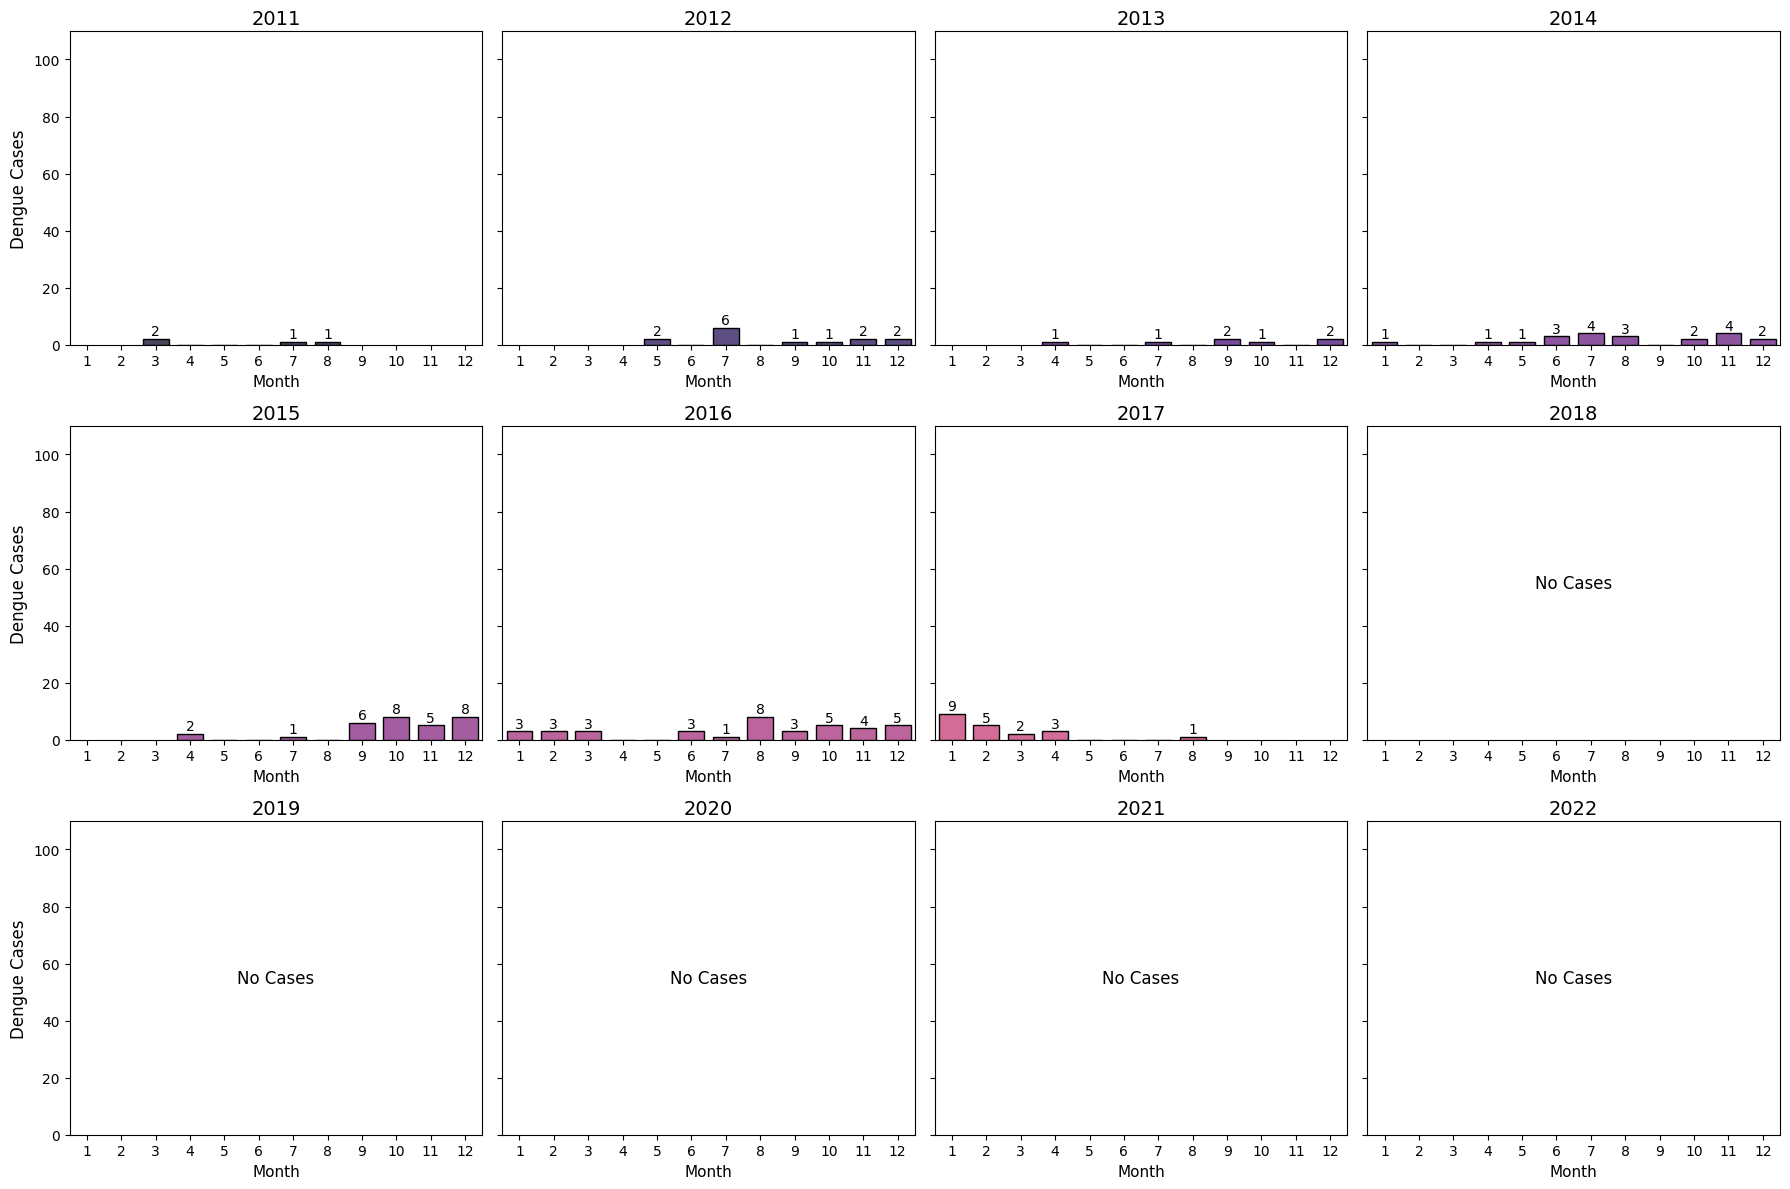

In [55]:
#HISTOGRAM FOR MONTHLY CASES EVERY YEAR
plot_dengue_cases(df, "MAHAYAHAY")

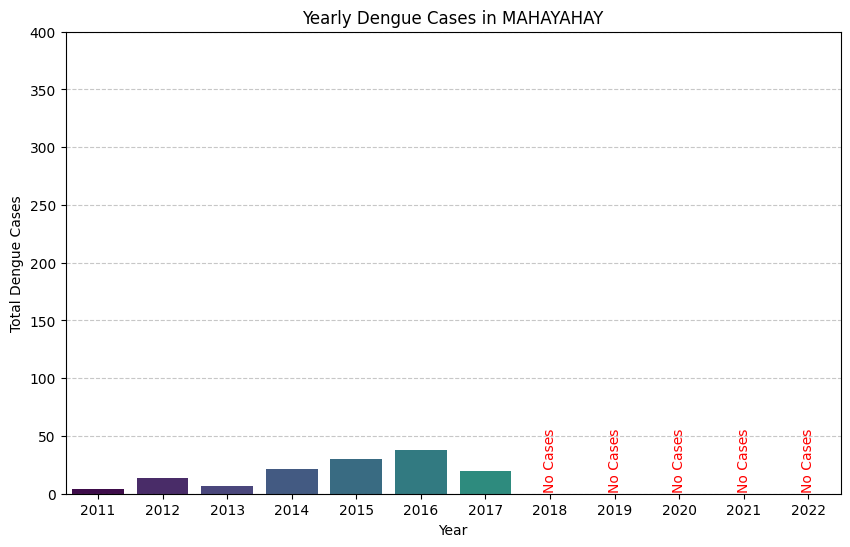

In [56]:
plot_total_dengue_cases_yearly(df, "MAHAYAHAY")

<div style="
    background-color: black; 
    color: white; 
    padding: 10px; 
    border-radius: 10px; 
    text-align: center;
    max-width: 100vw; 
    width: 100%;
    box-sizing: border-box;">
    MAINIT MONTHLY CASES
</div>


In [57]:
selected_barangay = "MAINIT"  # Change this to any barangay you want
barangay_data = get_selected_barangay(df, selected_barangay)

# Display the data for each year
for year, data in barangay_data.items():
    display(data)

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
19            19   MAINIT  8.2976  124.3876  2011      1             0   
63            19   MAINIT  8.2976  124.3876  2011      2             0   
107           19   MAINIT  8.2976  124.3876  2011      3             0   
151           19   MAINIT  8.2976  124.3876  2011      4             0   
195           19   MAINIT  8.2976  124.3876  2011      5             0   
239           19   MAINIT  8.2976  124.3876  2011      6             0   
283           19   MAINIT  8.2976  124.3876  2011      7             0   
327           19   MAINIT  8.2976  124.3876  2011      8             0   
371           19   MAINIT  8.2976  124.3876  2011      9             0   
415           19   MAINIT  8.2976  124.3876  2011     10             0   
459           19   MAINIT  8.2976  124.3876  2011     11             0   
503           19   MAINIT  8.2976  124.3876  2011     12             0   

     Temperature  Humidity  Rainfall  
19          23.8      88.1       7.0  
63          24.1      87.2      12.0  
107         25.3      85.5      20.0  
151         26.0      83.1      35.0  
195         27.2      81.9      55.0  
239         26.4      83.5      90.0  
283         25.7      84.7     110.0  
327         25.1      85.3      95.0  
371         24.4      86.2      70.0  
415         24.0      87.0      50.0  
459         23.6      88.4      30.0  
503         23.2      89.1      15.0

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
547            19   MAINIT  8.2976  124.3876  2012      1             0   
591            19   MAINIT  8.2976  124.3876  2012      2             0   
635            19   MAINIT  8.2976  124.3876  2012      3             0   
679            19   MAINIT  8.2976  124.3876  2012      4             1   
723            19   MAINIT  8.2976  124.3876  2012      5             0   
767            19   MAINIT  8.2976  124.3876  2012      6             0   
811            19   MAINIT  8.2976  124.3876  2012      7             0   
855            19   MAINIT  8.2976  124.3876  2012      8             0   
899            19   MAINIT  8.2976  124.3876  2012      9             0   
943            19   MAINIT  8.2976  124.3876  2012     10             0   
987            19   MAINIT  8.2976  124.3876  2012     11             0   
1031           19   MAINIT  8.2976  124.3876  2012     12             0   

      Temperature  Humidity  Rainfall  
547          24.3      85.1       4.0  
591          24.3      85.7       7.1  
635          24.6      83.3       3.1  
679          25.4      82.3       6.9  
723          25.1      86.4       6.9  
767          24.7      85.3       7.9  
811          24.9      85.2       6.4  
855          24.9      85.2       6.4  
899          24.1      88.1      11.4  
943          24.6      86.5       8.4  
987          24.8      84.8       4.1  
1031         24.7      84.8       5.7

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
1075           19   MAINIT  8.2976  124.3876  2013      1             0   
1119           19   MAINIT  8.2976  124.3876  2013      2             0   
1163           19   MAINIT  8.2976  124.3876  2013      3             0   
1207           19   MAINIT  8.2976  124.3876  2013      4             0   
1251           19   MAINIT  8.2976  124.3876  2013      5             0   
1295           19   MAINIT  8.2976  124.3876  2013      6             0   
1339           19   MAINIT  8.2976  124.3876  2013      7             0   
1383           19   MAINIT  8.2976  124.3876  2013      8             0   
1427           19   MAINIT  8.2976  124.3876  2013      9             0   
1471           19   MAINIT  8.2976  124.3876  2013     10             0   
1515           19   MAINIT  8.2976  124.3876  2013     11             0   
1559           19   MAINIT  8.2976  124.3876  2013     12             0   

      Temperature  Humidity  Rainfall  
1075         24.2      88.2       8.1  
1119         24.4      84.7       6.0  
1163         25.5      81.1       2.7  
1207         26.0      81.0       4.9  
1251         26.0      82.8       5.2  
1295         24.9      86.9       9.2  
1339         24.5      87.7      11.0  
1383         24.3      87.2       6.9  
1427         24.6      86.5       4.9  
1471         24.0      88.0      10.4  
1515         24.2      85.9       7.8  
1559         24.4      84.0       3.5

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
1603           19   MAINIT  8.2976  124.3876  2014      1             0   
1647           19   MAINIT  8.2976  124.3876  2014      2             0   
1691           19   MAINIT  8.2976  124.3876  2014      3             0   
1735           19   MAINIT  8.2976  124.3876  2014      4             0   
1779           19   MAINIT  8.2976  124.3876  2014      5             0   
1823           19   MAINIT  8.2976  124.3876  2014      6             0   
1867           19   MAINIT  8.2976  124.3876  2014      7             0   
1911           19   MAINIT  8.2976  124.3876  2014      8             0   
1955           19   MAINIT  8.2976  124.3876  2014      9             0   
1999           19   MAINIT  8.2976  124.3876  2014     10             0   
2043           19   MAINIT  8.2976  124.3876  2014     11             0   
2087           19   MAINIT  8.2976  124.3876  2014     12             0   

      Temperature  Humidity  Rainfall  
1603         23.2      86.4       6.8  
1647         23.7      82.4       2.3  
1691         24.3      82.5       3.8  
1735         25.1      81.4       2.0  
1779         25.3      84.0       4.9  
1823         24.5      87.1       6.6  
1867         23.4      89.1       8.5  
1911         23.9      87.7       8.0  
1955         23.4      88.5       7.1  
1999         23.9      88.4       8.5  
2043         24.7      85.2       6.1  
2087         24.0      85.3       4.9

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
2131           19   MAINIT  8.2976  124.3876  2015      1             0   
2175           19   MAINIT  8.2976  124.3876  2015      2             0   
2219           19   MAINIT  8.2976  124.3876  2015      3             0   
2263           19   MAINIT  8.2976  124.3876  2015      4             0   
2307           19   MAINIT  8.2976  124.3876  2015      5             0   
2351           19   MAINIT  8.2976  124.3876  2015      6             0   
2395           19   MAINIT  8.2976  124.3876  2015      7             0   
2439           19   MAINIT  8.2976  124.3876  2015      8             0   
2483           19   MAINIT  8.2976  124.3876  2015      9             0   
2527           19   MAINIT  8.2976  124.3876  2015     10             0   
2571           19   MAINIT  8.2976  124.3876  2015     11             0   
2615           19   MAINIT  8.2976  124.3876  2015     12             0   

      Temperature  Humidity  Rainfall  
2131         25.6      89.0       5.9  
2175         25.6      87.0       3.0  
2219         26.1      83.2       1.1  
2263         27.3      82.8       2.1  
2307         28.4      78.1       2.7  
2351         27.4      81.9       8.7  
2395         27.6      80.4       4.2  
2439         27.5      80.9       5.5  
2483         27.2      82.4       8.2  
2527         27.2      83.4       4.9  
2571         26.8      87.3       6.5  
2615         26.5      87.1       4.8

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
2659           19   MAINIT  8.2976  124.3876  2016      1             0   
2703           19   MAINIT  8.2976  124.3876  2016      2             0   
2747           19   MAINIT  8.2976  124.3876  2016      3             0   
2791           19   MAINIT  8.2976  124.3876  2016      4             0   
2835           19   MAINIT  8.2976  124.3876  2016      5             0   
2879           19   MAINIT  8.2976  124.3876  2016      6             0   
2923           19   MAINIT  8.2976  124.3876  2016      7             0   
2967           19   MAINIT  8.2976  124.3876  2016      8             0   
3011           19   MAINIT  8.2976  124.3876  2016      9             0   
3055           19   MAINIT  8.2976  124.3876  2016     10             1   
3099           19   MAINIT  8.2976  124.3876  2016     11             0   
3143           19   MAINIT  8.2976  124.3876  2016     12             0   

      Temperature  Humidity  Rainfall  
2659         26.2      86.9       1.6  
2703         26.1      88.2       2.6  
2747         26.8      84.4       0.4  
2791         28.1      80.1       1.5  
2835         28.3      81.9       8.3  
2879         27.5      83.9      12.5  
2923         27.6      82.0       5.2  
2967         27.8      80.3       2.7  
3011         27.2      82.4       6.2  
3055         27.1      84.6       8.9  
3099         26.5      86.6       7.6  
3143         26.7      86.9       8.2

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
3187           19   MAINIT  8.2976  124.3876  2017      1             0   
3231           19   MAINIT  8.2976  124.3876  2017      2             0   
3275           19   MAINIT  8.2976  124.3876  2017      3             0   
3319           19   MAINIT  8.2976  124.3876  2017      4             0   
3363           19   MAINIT  8.2976  124.3876  2017      5             0   
3407           19   MAINIT  8.2976  124.3876  2017      6             0   
3451           19   MAINIT  8.2976  124.3876  2017      7             0   
3495           19   MAINIT  8.2976  124.3876  2017      8             0   
3539           19   MAINIT  8.2976  124.3876  2017      9             0   
3583           19   MAINIT  8.2976  124.3876  2017     10             0   
3627           19   MAINIT  8.2976  124.3876  2017     11             0   
3671           19   MAINIT  8.2976  124.3876  2017     12             0   

      Temperature  Humidity  Rainfall  
3187         25.9      88.9      12.5  
3231         25.6      87.8       5.9  
3275         26.1      87.4       8.0  
3319         27.2      85.0       5.1  
3363         27.8      84.4      10.4  
3407         27.4      83.8       7.8  
3451         27.2      82.6       9.1  
3495         27.9      83.4       9.6  
3539         27.3      83.3      11.4  
3583         27.0      84.0       8.3  
3627         27.0      86.6       7.3  
3671         26.7      85.9       9.6

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
3715           19   MAINIT  8.2976  124.3876  2018      1             0   
3759           19   MAINIT  8.2976  124.3876  2018      2             0   
3803           19   MAINIT  8.2976  124.3876  2018      3             0   
3847           19   MAINIT  8.2976  124.3876  2018      4             0   
3891           19   MAINIT  8.2976  124.3876  2018      5             0   
3935           19   MAINIT  8.2976  124.3876  2018      6             0   
3979           19   MAINIT  8.2976  124.3876  2018      7             0   
4023           19   MAINIT  8.2976  124.3876  2018      8             0   
4067           19   MAINIT  8.2976  124.3876  2018      9             0   
4111           19   MAINIT  8.2976  124.3876  2018     10             0   
4155           19   MAINIT  8.2976  124.3876  2018     11             0   
4199           19   MAINIT  8.2976  124.3876  2018     12             0   

      Temperature  Humidity  Rainfall  
3715         26.2      87.5       7.3  
3759         26.4      86.0       9.7  
3803         26.5      84.6       3.7  
3847         27.4      82.5       2.6  
3891         27.9      82.0       6.9  
3935         27.7      80.7       5.2  
3979         27.3      81.6       4.7  
4023         27.4      79.8       2.1  
4067         26.9      82.2       5.4  
4111         27.2      82.7       4.2  
4155         26.5      86.6       6.1  
4199         26.3      88.1       5.8

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
4243           19   MAINIT  8.2976  124.3876  2019      1             0   
4287           19   MAINIT  8.2976  124.3876  2019      2             0   
4331           19   MAINIT  8.2976  124.3876  2019      3             0   
4375           19   MAINIT  8.2976  124.3876  2019      4             0   
4419           19   MAINIT  8.2976  124.3876  2019      5             0   
4463           19   MAINIT  8.2976  124.3876  2019      6             0   
4507           19   MAINIT  8.2976  124.3876  2019      7             0   
4551           19   MAINIT  8.2976  124.3876  2019      8             2   
4595           19   MAINIT  8.2976  124.3876  2019      9             0   
4639           19   MAINIT  8.2976  124.3876  2019     10             0   
4683           19   MAINIT  8.2976  124.3876  2019     11             0   
4727           19   MAINIT  8.2976  124.3876  2019     12             0   

      Temperature  Humidity  Rainfall  
4243         25.5      88.2       5.7  
4287         25.3      84.3       1.1  
4331         26.1      83.2       1.9  
4375         27.5      80.3       1.8  
4419         28.4      78.6       4.4  
4463         27.8      82.7       9.1  
4507         27.2      82.1       6.2  
4551         27.7      77.1       1.4  
4595         27.8      78.2       3.3  
4639         27.0      83.8       7.7  
4683         27.1      82.9       4.3  
4727         26.4      86.4       4.2

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
4771           19   MAINIT  8.2976  124.3876  2020      1             0   
4815           19   MAINIT  8.2976  124.3876  2020      2             0   
4859           19   MAINIT  8.2976  124.3876  2020      3             0   
4903           19   MAINIT  8.2976  124.3876  2020      4             0   
4947           19   MAINIT  8.2976  124.3876  2020      5             0   
4991           19   MAINIT  8.2976  124.3876  2020      6             0   
5035           19   MAINIT  8.2976  124.3876  2020      7             0   
5079           19   MAINIT  8.2976  124.3876  2020      8             0   
5123           19   MAINIT  8.2976  124.3876  2020      9             0   
5167           19   MAINIT  8.2976  124.3876  2020     10             0   
5211           19   MAINIT  8.2976  124.3876  2020     11             0   
5255           19   MAINIT  8.2976  124.3876  2020     12             0   

      Temperature  Humidity  Rainfall  
4771         26.3      86.8       2.1  
4815         25.7      87.2       3.5  
4859         26.4      85.2       2.0  
4903         27.2      81.6       1.0  
4947         28.0      83.2       9.8  
4991         27.3      84.1      14.1  
5035         27.0      83.9      15.7  
5079         27.2      82.9      11.7  
5123         27.2      83.7       9.2  
5167         26.9      84.2      13.2  
5211         26.8      86.2       5.5  
5255         26.7      86.6       8.2

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
5299           19   MAINIT  8.2976  124.3876  2021      1             0   
5343           19   MAINIT  8.2976  124.3876  2021      2             0   
5387           19   MAINIT  8.2976  124.3876  2021      3             0   
5431           19   MAINIT  8.2976  124.3876  2021      4             0   
5475           19   MAINIT  8.2976  124.3876  2021      5             0   
5519           19   MAINIT  8.2976  124.3876  2021      6             0   
5563           19   MAINIT  8.2976  124.3876  2021      7             0   
5607           19   MAINIT  8.2976  124.3876  2021      8             0   
5651           19   MAINIT  8.2976  124.3876  2021      9             0   
5695           19   MAINIT  8.2976  124.3876  2021     10             0   
5739           19   MAINIT  8.2976  124.3876  2021     11             0   
5783           19   MAINIT  8.2976  124.3876  2021     12             0   

      Temperature  Humidity  Rainfall  
5299         25.9      88.5      11.9  
5343         26.0      87.1      12.6  
5387         26.8      84.7       5.5  
5431         27.1      82.5       4.5  
5475         27.5      84.0      10.7  
5519         27.6      81.3       8.2  
5563         27.7      80.0       4.4  
5607         27.5      80.0       6.5  
5651         27.2      82.7       9.5  
5695         27.3      83.6       8.7  
5739         27.0      86.4       9.4  
5783         26.2      86.9       9.8

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
5827           19   MAINIT  8.2976  124.3876  2022      1             0   
5871           19   MAINIT  8.2976  124.3876  2022      2             0   
5915           19   MAINIT  8.2976  124.3876  2022      3             0   
5959           19   MAINIT  8.2976  124.3876  2022      4             0   
6003           19   MAINIT  8.2976  124.3876  2022      5             0   
6047           19   MAINIT  8.2976  124.3876  2022      6             0   
6091           19   MAINIT  8.2976  124.3876  2022      7             0   
6135           19   MAINIT  8.2976  124.3876  2022      8             0   
6179           19   MAINIT  8.2976  124.3876  2022      9             0   
6223           19   MAINIT  8.2976  124.3876  2022     10             0   
6267           19   MAINIT  8.2976  124.3876  2022     11             0   
6311           19   MAINIT  8.2976  124.3876  2022     12             0   

      Temperature  Humidity  Rainfall  
5827         26.0      86.9       8.3  
5871         26.0      87.2       3.9  
5915         26.8      86.5      11.0  
5959         26.8      86.5      12.2  
6003         27.4      83.9      11.5  
6047         27.6      81.9       7.1  
6091         27.4      83.2      11.6  
6135         27.3      82.0       7.9  
6179         27.5      81.1       6.1  
6223         27.1      84.2       9.0  
6267         27.0      85.8       6.6  
6311         26.4      87.1      14.5

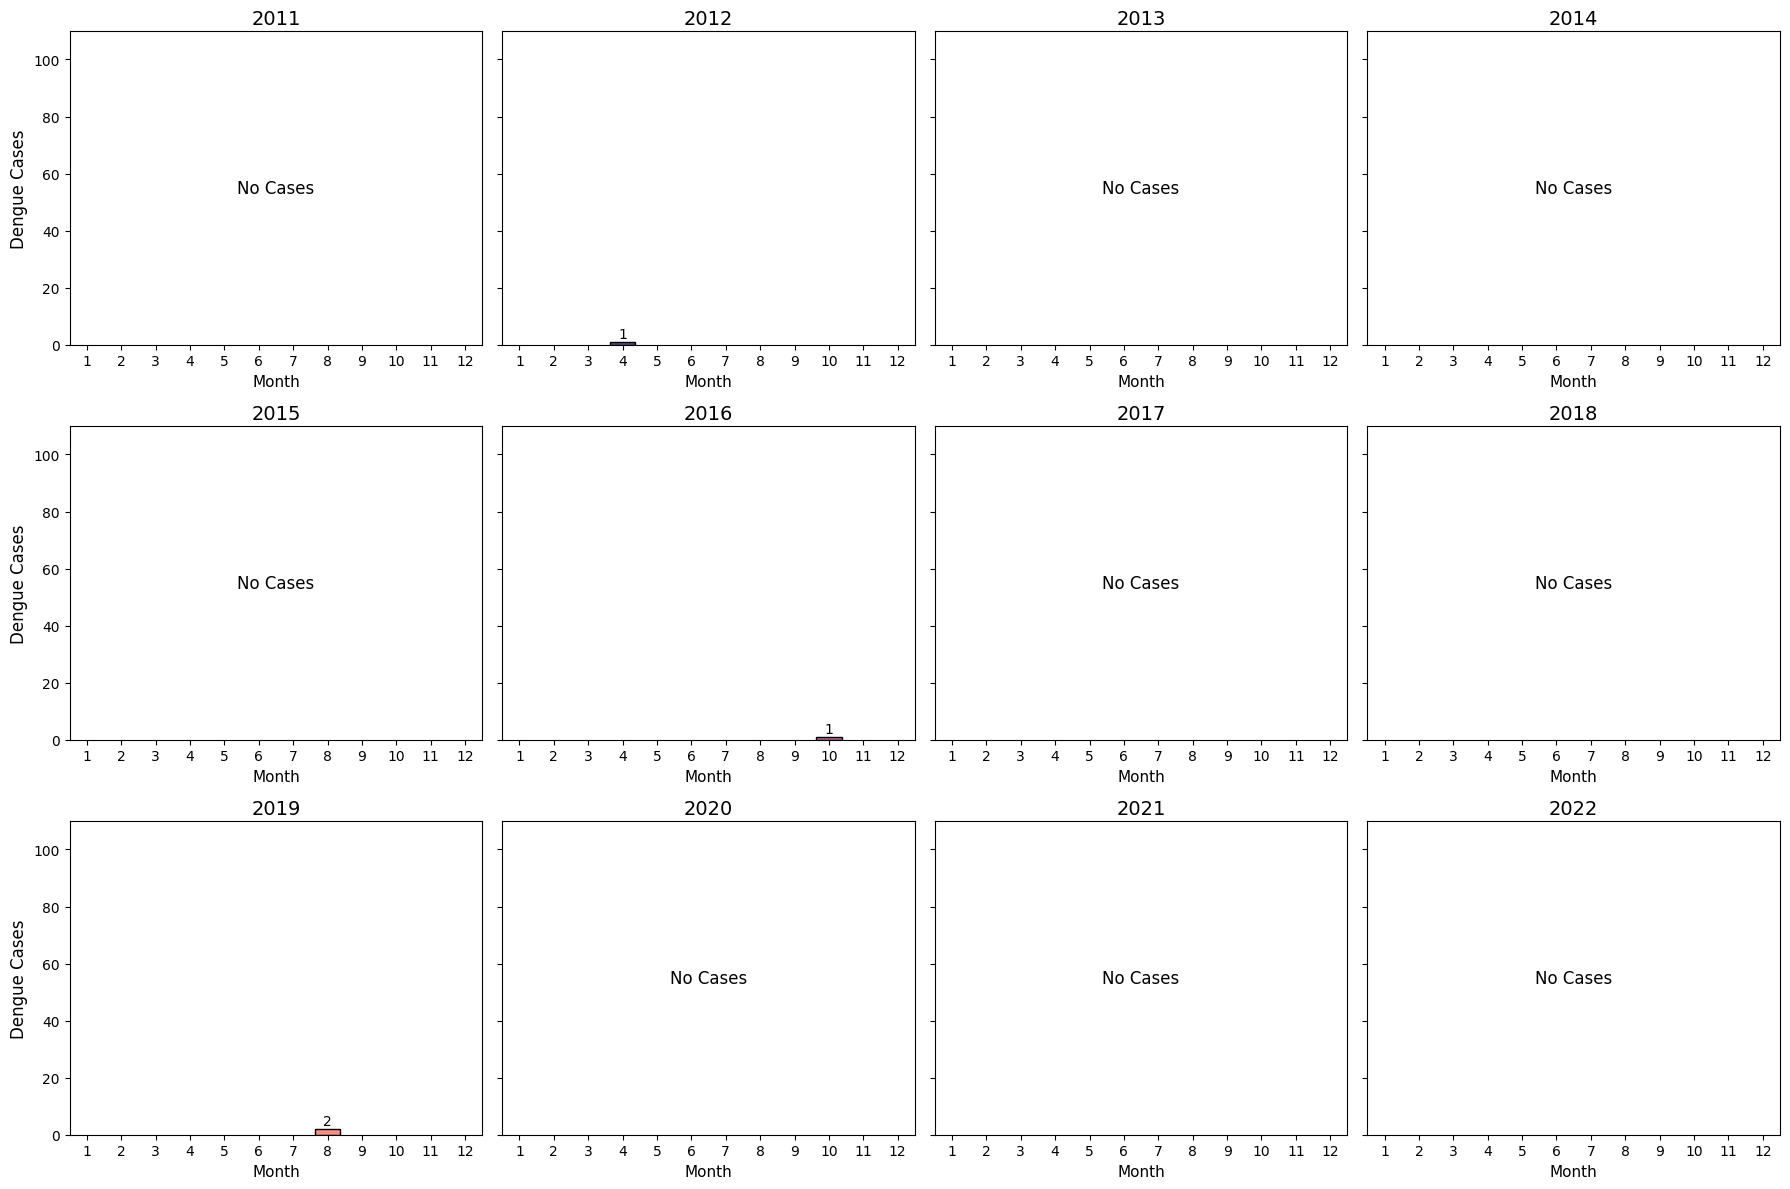

In [58]:
#HISTOGRAM FOR MONTHLY CASES EVERY YEAR
plot_dengue_cases(df, "MAINIT")

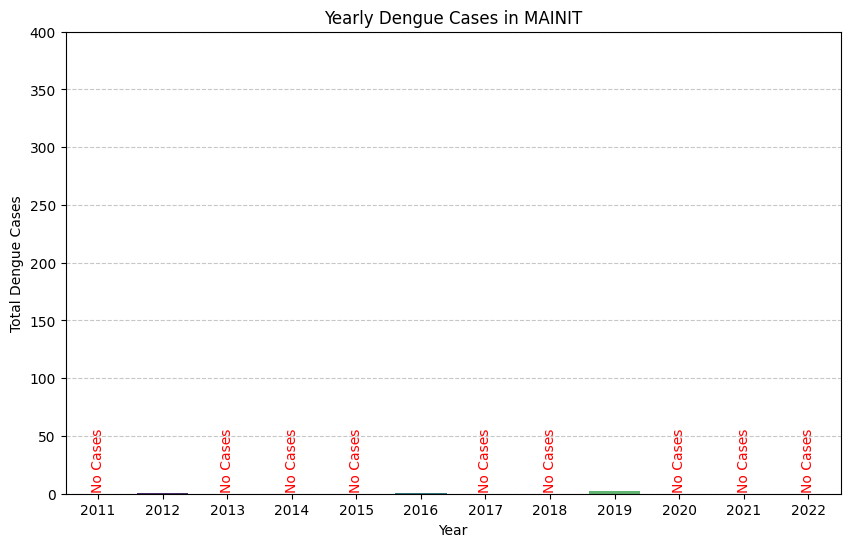

In [59]:
plot_total_dengue_cases_yearly(df, "MAINIT")

<div style="
    background-color: black; 
    color: white; 
    padding: 10px; 
    border-radius: 10px; 
    text-align: center;
    max-width: 100vw; 
    width: 100%;
    box-sizing: border-box;">
    MANDULOG MONTHLY CASES
</div>


In [60]:
selected_barangay = "MANDULOG"  # Change this to any barangay you want
barangay_data = get_selected_barangay(df, selected_barangay)

# Display the data for each year
for year, data in barangay_data.items():
    display(data)

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
20            20  MANDULOG  8.2442  124.3057  2011      1             0   
64            20  MANDULOG  8.2442  124.3057  2011      2             0   
108           20  MANDULOG  8.2442  124.3057  2011      3             0   
152           20  MANDULOG  8.2442  124.3057  2011      4             0   
196           20  MANDULOG  8.2442  124.3057  2011      5             0   
240           20  MANDULOG  8.2442  124.3057  2011      6             0   
284           20  MANDULOG  8.2442  124.3057  2011      7             0   
328           20  MANDULOG  8.2442  124.3057  2011      8             0   
372           20  MANDULOG  8.2442  124.3057  2011      9             0   
416           20  MANDULOG  8.2442  124.3057  2011     10             0   
460           20  MANDULOG  8.2442  124.3057  2011     11             0   
504           20  MANDULOG  8.2442  124.3057  2011     12             0   

     Temperature  Humidity  Rainfall  
20          23.8      88.1       7.0  
64          24.1      87.2      12.0  
108         25.3      85.5      20.0  
152         26.0      83.1      35.0  
196         27.2      81.9      55.0  
240         26.4      83.5      90.0  
284         25.7      84.7     110.0  
328         25.1      85.3      95.0  
372         24.4      86.2      70.0  
416         24.0      87.0      50.0  
460         23.6      88.4      30.0  
504         23.2      89.1      15.0

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
548            20  MANDULOG  8.2442  124.3057  2012      1             0   
592            20  MANDULOG  8.2442  124.3057  2012      2             0   
636            20  MANDULOG  8.2442  124.3057  2012      3             0   
680            20  MANDULOG  8.2442  124.3057  2012      4             0   
724            20  MANDULOG  8.2442  124.3057  2012      5             1   
768            20  MANDULOG  8.2442  124.3057  2012      6             1   
812            20  MANDULOG  8.2442  124.3057  2012      7             0   
856            20  MANDULOG  8.2442  124.3057  2012      8             0   
900            20  MANDULOG  8.2442  124.3057  2012      9             0   
944            20  MANDULOG  8.2442  124.3057  2012     10             0   
988            20  MANDULOG  8.2442  124.3057  2012     11             0   
1032           20  MANDULOG  8.2442  124.3057  2012     12             0   

      Temperature  Humidity  Rainfall  
548          24.3      85.1       4.0  
592          24.3      85.7       7.1  
636          24.6      83.3       3.1  
680          25.4      82.3       6.9  
724          25.1      86.4       6.9  
768          24.7      85.3       7.9  
812          24.9      85.2       6.4  
856          24.9      85.2       6.4  
900          24.1      88.1      11.4  
944          24.6      86.5       8.4  
988          24.8      84.8       4.1  
1032         24.7      84.8       5.7

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
1076           20  MANDULOG  8.2442  124.3057  2013      1             0   
1120           20  MANDULOG  8.2442  124.3057  2013      2             0   
1164           20  MANDULOG  8.2442  124.3057  2013      3             0   
1208           20  MANDULOG  8.2442  124.3057  2013      4             0   
1252           20  MANDULOG  8.2442  124.3057  2013      5             0   
1296           20  MANDULOG  8.2442  124.3057  2013      6             0   
1340           20  MANDULOG  8.2442  124.3057  2013      7             0   
1384           20  MANDULOG  8.2442  124.3057  2013      8             1   
1428           20  MANDULOG  8.2442  124.3057  2013      9             1   
1472           20  MANDULOG  8.2442  124.3057  2013     10             0   
1516           20  MANDULOG  8.2442  124.3057  2013     11             0   
1560           20  MANDULOG  8.2442  124.3057  2013     12             0   

      Temperature  Humidity  Rainfall  
1076         24.2      88.2       8.1  
1120         24.4      84.7       6.0  
1164         25.5      81.1       2.7  
1208         26.0      81.0       4.9  
1252         26.0      82.8       5.2  
1296         24.9      86.9       9.2  
1340         24.5      87.7      11.0  
1384         24.3      87.2       6.9  
1428         24.6      86.5       4.9  
1472         24.0      88.0      10.4  
1516         24.2      85.9       7.8  
1560         24.4      84.0       3.5

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
1604           20  MANDULOG  8.2442  124.3057  2014      1             0   
1648           20  MANDULOG  8.2442  124.3057  2014      2             0   
1692           20  MANDULOG  8.2442  124.3057  2014      3             0   
1736           20  MANDULOG  8.2442  124.3057  2014      4             0   
1780           20  MANDULOG  8.2442  124.3057  2014      5             0   
1824           20  MANDULOG  8.2442  124.3057  2014      6             0   
1868           20  MANDULOG  8.2442  124.3057  2014      7             0   
1912           20  MANDULOG  8.2442  124.3057  2014      8             0   
1956           20  MANDULOG  8.2442  124.3057  2014      9             0   
2000           20  MANDULOG  8.2442  124.3057  2014     10             0   
2044           20  MANDULOG  8.2442  124.3057  2014     11             0   
2088           20  MANDULOG  8.2442  124.3057  2014     12             0   

      Temperature  Humidity  Rainfall  
1604         23.2      86.4       6.8  
1648         23.7      82.4       2.3  
1692         24.3      82.5       3.8  
1736         25.1      81.4       2.0  
1780         25.3      84.0       4.9  
1824         24.5      87.1       6.6  
1868         23.4      89.1       8.5  
1912         23.9      87.7       8.0  
1956         23.4      88.5       7.1  
2000         23.9      88.4       8.5  
2044         24.7      85.2       6.1  
2088         24.0      85.3       4.9

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
2132           20  MANDULOG  8.2442  124.3057  2015      1             0   
2176           20  MANDULOG  8.2442  124.3057  2015      2             0   
2220           20  MANDULOG  8.2442  124.3057  2015      3             0   
2264           20  MANDULOG  8.2442  124.3057  2015      4             0   
2308           20  MANDULOG  8.2442  124.3057  2015      5             0   
2352           20  MANDULOG  8.2442  124.3057  2015      6             0   
2396           20  MANDULOG  8.2442  124.3057  2015      7             0   
2440           20  MANDULOG  8.2442  124.3057  2015      8             0   
2484           20  MANDULOG  8.2442  124.3057  2015      9             0   
2528           20  MANDULOG  8.2442  124.3057  2015     10             1   
2572           20  MANDULOG  8.2442  124.3057  2015     11             0   
2616           20  MANDULOG  8.2442  124.3057  2015     12             0   

      Temperature  Humidity  Rainfall  
2132         25.6      89.0       5.9  
2176         25.6      87.0       3.0  
2220         26.1      83.2       1.1  
2264         27.3      82.8       2.1  
2308         28.4      78.1       2.7  
2352         27.4      81.9       8.7  
2396         27.6      80.4       4.2  
2440         27.5      80.9       5.5  
2484         27.2      82.4       8.2  
2528         27.2      83.4       4.9  
2572         26.8      87.3       6.5  
2616         26.5      87.1       4.8

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
2660           20  MANDULOG  8.2442  124.3057  2016      1             0   
2704           20  MANDULOG  8.2442  124.3057  2016      2             0   
2748           20  MANDULOG  8.2442  124.3057  2016      3             0   
2792           20  MANDULOG  8.2442  124.3057  2016      4             0   
2836           20  MANDULOG  8.2442  124.3057  2016      5             0   
2880           20  MANDULOG  8.2442  124.3057  2016      6             0   
2924           20  MANDULOG  8.2442  124.3057  2016      7             0   
2968           20  MANDULOG  8.2442  124.3057  2016      8             2   
3012           20  MANDULOG  8.2442  124.3057  2016      9             2   
3056           20  MANDULOG  8.2442  124.3057  2016     10             1   
3100           20  MANDULOG  8.2442  124.3057  2016     11             2   
3144           20  MANDULOG  8.2442  124.3057  2016     12             0   

      Temperature  Humidity  Rainfall  
2660         26.2      86.9       1.6  
2704         26.1      88.2       2.6  
2748         26.8      84.4       0.4  
2792         28.1      80.1       1.5  
2836         28.3      81.9       8.3  
2880         27.5      83.9      12.5  
2924         27.6      82.0       5.2  
2968         27.8      80.3       2.7  
3012         27.2      82.4       6.2  
3056         27.1      84.6       8.9  
3100         26.5      86.6       7.6  
3144         26.7      86.9       8.2

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
3188           20  MANDULOG  8.2442  124.3057  2017      1             1   
3232           20  MANDULOG  8.2442  124.3057  2017      2             0   
3276           20  MANDULOG  8.2442  124.3057  2017      3             0   
3320           20  MANDULOG  8.2442  124.3057  2017      4             0   
3364           20  MANDULOG  8.2442  124.3057  2017      5             0   
3408           20  MANDULOG  8.2442  124.3057  2017      6             0   
3452           20  MANDULOG  8.2442  124.3057  2017      7             0   
3496           20  MANDULOG  8.2442  124.3057  2017      8             0   
3540           20  MANDULOG  8.2442  124.3057  2017      9             0   
3584           20  MANDULOG  8.2442  124.3057  2017     10             0   
3628           20  MANDULOG  8.2442  124.3057  2017     11             0   
3672           20  MANDULOG  8.2442  124.3057  2017     12             0   

      Temperature  Humidity  Rainfall  
3188         25.9      88.9      12.5  
3232         25.6      87.8       5.9  
3276         26.1      87.4       8.0  
3320         27.2      85.0       5.1  
3364         27.8      84.4      10.4  
3408         27.4      83.8       7.8  
3452         27.2      82.6       9.1  
3496         27.9      83.4       9.6  
3540         27.3      83.3      11.4  
3584         27.0      84.0       8.3  
3628         27.0      86.6       7.3  
3672         26.7      85.9       9.6

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
3716           20  MANDULOG  8.2442  124.3057  2018      1             0   
3760           20  MANDULOG  8.2442  124.3057  2018      2             0   
3804           20  MANDULOG  8.2442  124.3057  2018      3             0   
3848           20  MANDULOG  8.2442  124.3057  2018      4             1   
3892           20  MANDULOG  8.2442  124.3057  2018      5             0   
3936           20  MANDULOG  8.2442  124.3057  2018      6             0   
3980           20  MANDULOG  8.2442  124.3057  2018      7             0   
4024           20  MANDULOG  8.2442  124.3057  2018      8             0   
4068           20  MANDULOG  8.2442  124.3057  2018      9             0   
4112           20  MANDULOG  8.2442  124.3057  2018     10             1   
4156           20  MANDULOG  8.2442  124.3057  2018     11             5   
4200           20  MANDULOG  8.2442  124.3057  2018     12             1   

      Temperature  Humidity  Rainfall  
3716         26.2      87.5       7.3  
3760         26.4      86.0       9.7  
3804         26.5      84.6       3.7  
3848         27.4      82.5       2.6  
3892         27.9      82.0       6.9  
3936         27.7      80.7       5.2  
3980         27.3      81.6       4.7  
4024         27.4      79.8       2.1  
4068         26.9      82.2       5.4  
4112         27.2      82.7       4.2  
4156         26.5      86.6       6.1  
4200         26.3      88.1       5.8

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
4244           20  MANDULOG  8.2442  124.3057  2019      1             1   
4288           20  MANDULOG  8.2442  124.3057  2019      2             2   
4332           20  MANDULOG  8.2442  124.3057  2019      3             0   
4376           20  MANDULOG  8.2442  124.3057  2019      4             0   
4420           20  MANDULOG  8.2442  124.3057  2019      5             0   
4464           20  MANDULOG  8.2442  124.3057  2019      6             2   
4508           20  MANDULOG  8.2442  124.3057  2019      7             2   
4552           20  MANDULOG  8.2442  124.3057  2019      8             5   
4596           20  MANDULOG  8.2442  124.3057  2019      9             1   
4640           20  MANDULOG  8.2442  124.3057  2019     10             0   
4684           20  MANDULOG  8.2442  124.3057  2019     11             3   
4728           20  MANDULOG  8.2442  124.3057  2019     12             0   

      Temperature  Humidity  Rainfall  
4244         25.5      88.2       5.7  
4288         25.3      84.3       1.1  
4332         26.1      83.2       1.9  
4376         27.5      80.3       1.8  
4420         28.4      78.6       4.4  
4464         27.8      82.7       9.1  
4508         27.2      82.1       6.2  
4552         27.7      77.1       1.4  
4596         27.8      78.2       3.3  
4640         27.0      83.8       7.7  
4684         27.1      82.9       4.3  
4728         26.4      86.4       4.2

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
4772           20  MANDULOG  8.2442  124.3057  2020      1             0   
4816           20  MANDULOG  8.2442  124.3057  2020      2             0   
4860           20  MANDULOG  8.2442  124.3057  2020      3             0   
4904           20  MANDULOG  8.2442  124.3057  2020      4             0   
4948           20  MANDULOG  8.2442  124.3057  2020      5             0   
4992           20  MANDULOG  8.2442  124.3057  2020      6             0   
5036           20  MANDULOG  8.2442  124.3057  2020      7             0   
5080           20  MANDULOG  8.2442  124.3057  2020      8             0   
5124           20  MANDULOG  8.2442  124.3057  2020      9             0   
5168           20  MANDULOG  8.2442  124.3057  2020     10             0   
5212           20  MANDULOG  8.2442  124.3057  2020     11             0   
5256           20  MANDULOG  8.2442  124.3057  2020     12             0   

      Temperature  Humidity  Rainfall  
4772         26.3      86.8       2.1  
4816         25.7      87.2       3.5  
4860         26.4      85.2       2.0  
4904         27.2      81.6       1.0  
4948         28.0      83.2       9.8  
4992         27.3      84.1      14.1  
5036         27.0      83.9      15.7  
5080         27.2      82.9      11.7  
5124         27.2      83.7       9.2  
5168         26.9      84.2      13.2  
5212         26.8      86.2       5.5  
5256         26.7      86.6       8.2

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
5300           20  MANDULOG  8.2442  124.3057  2021      1             0   
5344           20  MANDULOG  8.2442  124.3057  2021      2             0   
5388           20  MANDULOG  8.2442  124.3057  2021      3             0   
5432           20  MANDULOG  8.2442  124.3057  2021      4             0   
5476           20  MANDULOG  8.2442  124.3057  2021      5             0   
5520           20  MANDULOG  8.2442  124.3057  2021      6             0   
5564           20  MANDULOG  8.2442  124.3057  2021      7             0   
5608           20  MANDULOG  8.2442  124.3057  2021      8             0   
5652           20  MANDULOG  8.2442  124.3057  2021      9             0   
5696           20  MANDULOG  8.2442  124.3057  2021     10             0   
5740           20  MANDULOG  8.2442  124.3057  2021     11             0   
5784           20  MANDULOG  8.2442  124.3057  2021     12             0   

      Temperature  Humidity  Rainfall  
5300         25.9      88.5      11.9  
5344         26.0      87.1      12.6  
5388         26.8      84.7       5.5  
5432         27.1      82.5       4.5  
5476         27.5      84.0      10.7  
5520         27.6      81.3       8.2  
5564         27.7      80.0       4.4  
5608         27.5      80.0       6.5  
5652         27.2      82.7       9.5  
5696         27.3      83.6       8.7  
5740         27.0      86.4       9.4  
5784         26.2      86.9       9.8

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
5828           20  MANDULOG  8.2442  124.3057  2022      1             0   
5872           20  MANDULOG  8.2442  124.3057  2022      2             1   
5916           20  MANDULOG  8.2442  124.3057  2022      3             1   
5960           20  MANDULOG  8.2442  124.3057  2022      4             1   
6004           20  MANDULOG  8.2442  124.3057  2022      5             0   
6048           20  MANDULOG  8.2442  124.3057  2022      6             1   
6092           20  MANDULOG  8.2442  124.3057  2022      7             0   
6136           20  MANDULOG  8.2442  124.3057  2022      8             1   
6180           20  MANDULOG  8.2442  124.3057  2022      9             0   
6224           20  MANDULOG  8.2442  124.3057  2022     10             0   
6268           20  MANDULOG  8.2442  124.3057  2022     11             1   
6312           20  MANDULOG  8.2442  124.3057  2022     12             0   

      Temperature  Humidity  Rainfall  
5828         26.0      86.9       8.3  
5872         26.0      87.2       3.9  
5916         26.8      86.5      11.0  
5960         26.8      86.5      12.2  
6004         27.4      83.9      11.5  
6048         27.6      81.9       7.1  
6092         27.4      83.2      11.6  
6136         27.3      82.0       7.9  
6180         27.5      81.1       6.1  
6224         27.1      84.2       9.0  
6268         27.0      85.8       6.6  
6312         26.4      87.1      14.5

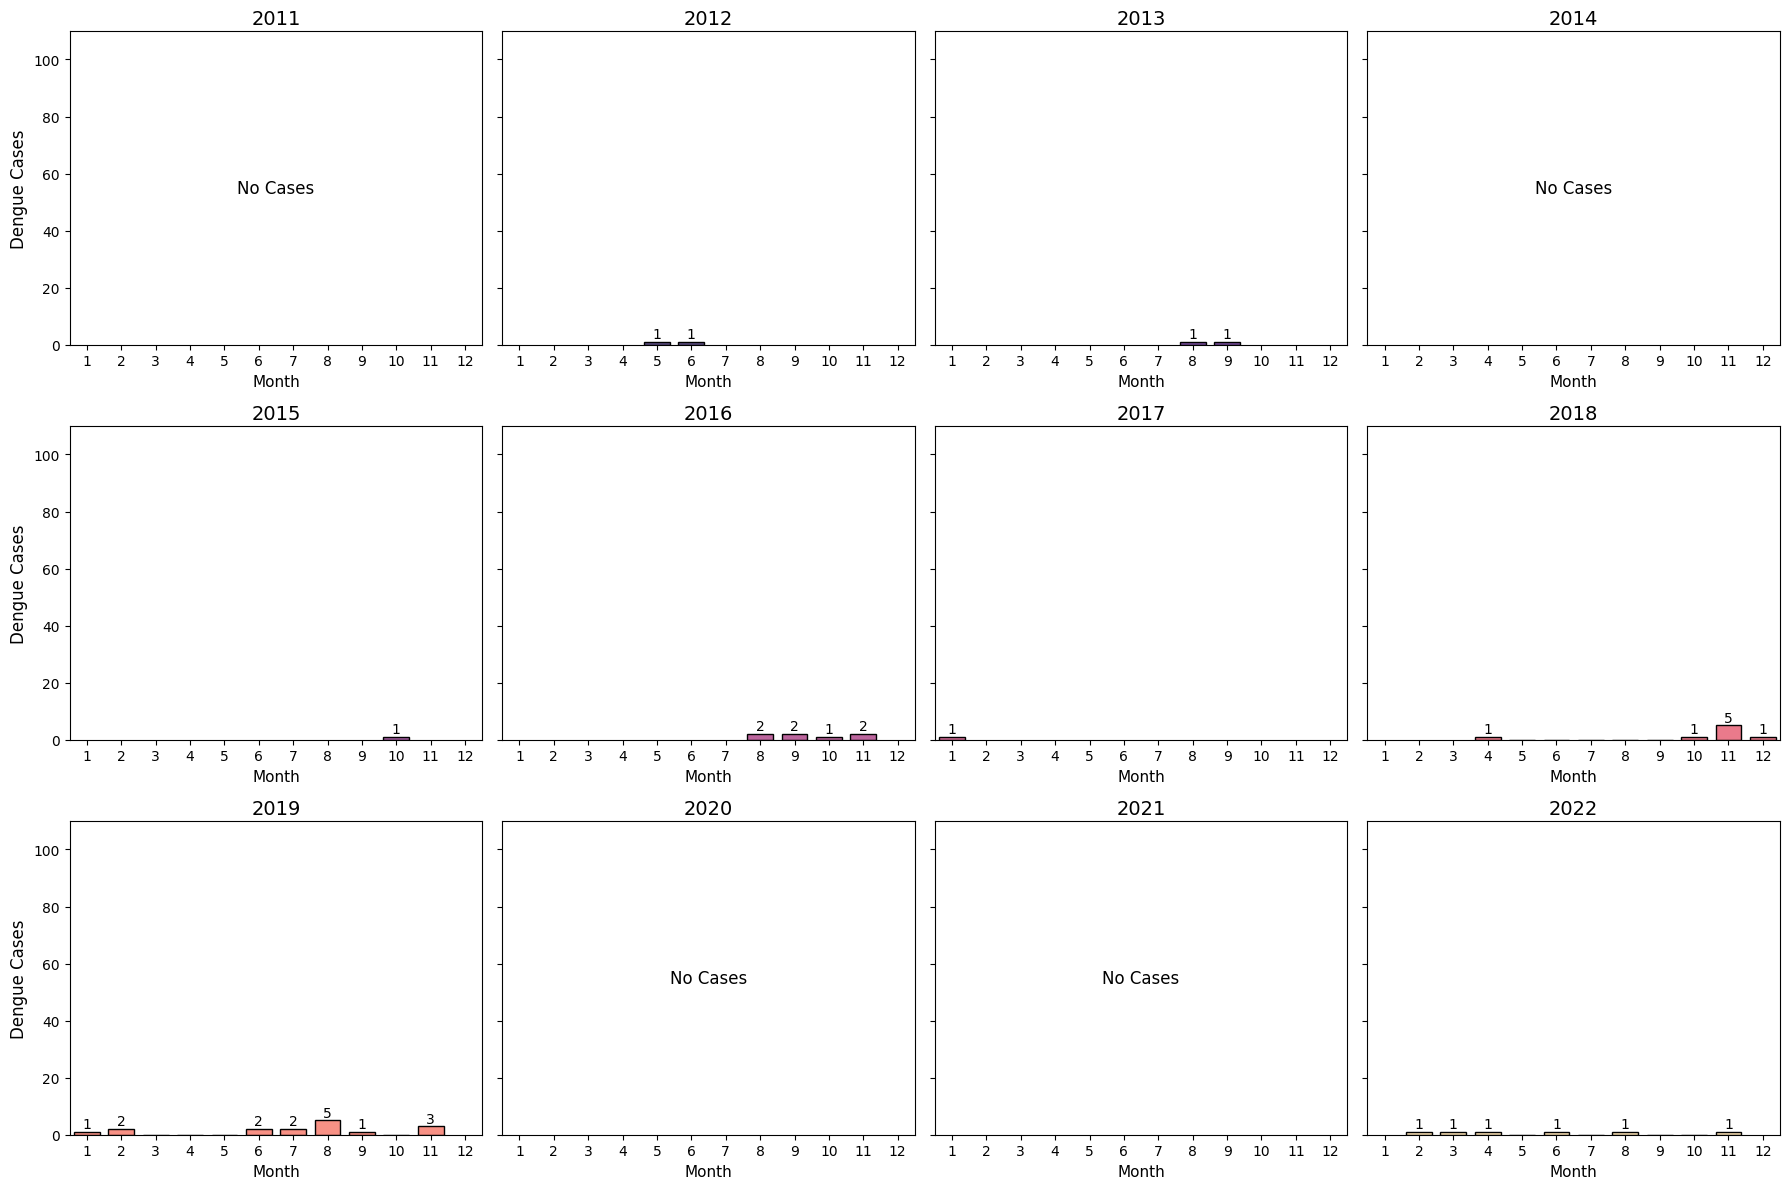

In [61]:
#HISTOGRAM FOR MONTHLY CASES EVERY YEAR
plot_dengue_cases(df, "MANDULOG")

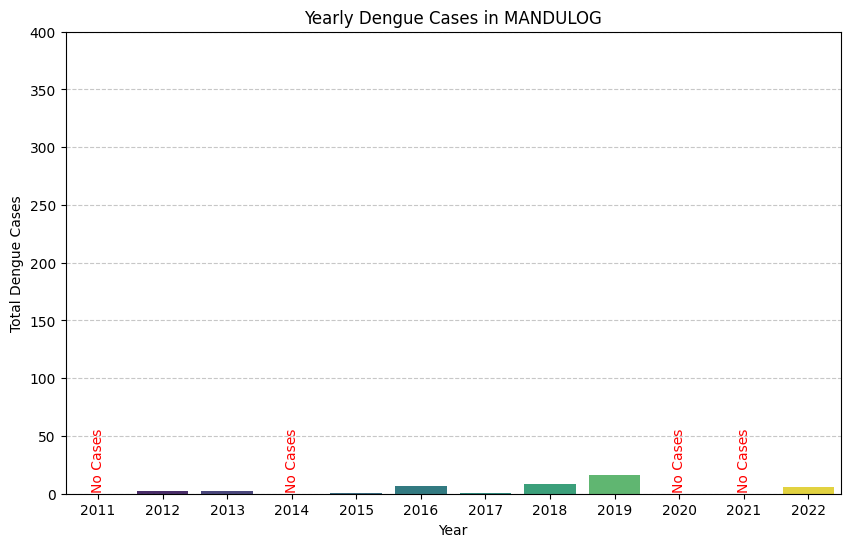

In [62]:
plot_total_dengue_cases_yearly(df, "MANDULOG")

<div style="
    background-color: black; 
    color: white; 
    padding: 10px; 
    border-radius: 10px; 
    text-align: center;
    max-width: 100vw; 
    width: 100%;
    box-sizing: border-box;">
    MARIA CRISTINA MONTHLY CASES
</div>


In [63]:
selected_barangay = "MARIA CRISTINA"  # Change this to any barangay you want
barangay_data = get_selected_barangay(df, selected_barangay)

# Display the data for each year
for year, data in barangay_data.items():
    display(data)

Barangay_No        Barangay       x         y  Year  Month  Dengue Cases  \
21            21  MARIA CRISTINA  8.1989  124.1936  2011      1             0   
65            21  MARIA CRISTINA  8.1989  124.1936  2011      2             1   
109           21  MARIA CRISTINA  8.1989  124.1936  2011      3             0   
153           21  MARIA CRISTINA  8.1989  124.1936  2011      4             0   
197           21  MARIA CRISTINA  8.1989  124.1936  2011      5             0   
241           21  MARIA CRISTINA  8.1989  124.1936  2011      6             0   
285           21  MARIA CRISTINA  8.1989  124.1936  2011      7             0   
329           21  MARIA CRISTINA  8.1989  124.1936  2011      8             0   
373           21  MARIA CRISTINA  8.1989  124.1936  2011      9             0   
417           21  MARIA CRISTINA  8.1989  124.1936  2011     10             0   
461           21  MARIA CRISTINA  8.1989  124.1936  2011     11             0   
505           21  MARIA CRISTINA  8.1989  124.1936  2011     12             0   

     Temperature  Humidity  Rainfall  
21          23.8      88.1       7.0  
65          24.1      87.2      12.0  
109         25.3      85.5      20.0  
153         26.0      83.1      35.0  
197         27.2      81.9      55.0  
241         26.4      83.5      90.0  
285         25.7      84.7     110.0  
329         25.1      85.3      95.0  
373         24.4      86.2      70.0  
417         24.0      87.0      50.0  
461         23.6      88.4      30.0  
505         23.2      89.1      15.0

Barangay_No        Barangay       x         y  Year  Month  \
549            21  MARIA CRISTINA  8.1989  124.1936  2012      1   
593            21  MARIA CRISTINA  8.1989  124.1936  2012      2   
637            21  MARIA CRISTINA  8.1989  124.1936  2012      3   
681            21  MARIA CRISTINA  8.1989  124.1936  2012      4   
725            21  MARIA CRISTINA  8.1989  124.1936  2012      5   
769            21  MARIA CRISTINA  8.1989  124.1936  2012      6   
813            21  MARIA CRISTINA  8.1989  124.1936  2012      7   
857            21  MARIA CRISTINA  8.1989  124.1936  2012      8   
901            21  MARIA CRISTINA  8.1989  124.1936  2012      9   
945            21  MARIA CRISTINA  8.1989  124.1936  2012     10   
989            21  MARIA CRISTINA  8.1989  124.1936  2012     11   
1033           21  MARIA CRISTINA  8.1989  124.1936  2012     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
549              0         24.3      85.1       4.0  
593              2         24.3      85.7       7.1  
637              0         24.6      83.3       3.1  
681              1         25.4      82.3       6.9  
725              0         25.1      86.4       6.9  
769              2         24.7      85.3       7.9  
813              3         24.9      85.2       6.4  
857              3         24.9      85.2       6.4  
901              4         24.1      88.1      11.4  
945              4         24.6      86.5       8.4  
989              3         24.8      84.8       4.1  
1033             1         24.7      84.8       5.7

Barangay_No        Barangay       x         y  Year  Month  \
1077           21  MARIA CRISTINA  8.1989  124.1936  2013      1   
1121           21  MARIA CRISTINA  8.1989  124.1936  2013      2   
1165           21  MARIA CRISTINA  8.1989  124.1936  2013      3   
1209           21  MARIA CRISTINA  8.1989  124.1936  2013      4   
1253           21  MARIA CRISTINA  8.1989  124.1936  2013      5   
1297           21  MARIA CRISTINA  8.1989  124.1936  2013      6   
1341           21  MARIA CRISTINA  8.1989  124.1936  2013      7   
1385           21  MARIA CRISTINA  8.1989  124.1936  2013      8   
1429           21  MARIA CRISTINA  8.1989  124.1936  2013      9   
1473           21  MARIA CRISTINA  8.1989  124.1936  2013     10   
1517           21  MARIA CRISTINA  8.1989  124.1936  2013     11   
1561           21  MARIA CRISTINA  8.1989  124.1936  2013     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
1077             0         24.2      88.2       8.1  
1121             1         24.4      84.7       6.0  
1165             0         25.5      81.1       2.7  
1209             1         26.0      81.0       4.9  
1253             0         26.0      82.8       5.2  
1297             0         24.9      86.9       9.2  
1341             1         24.5      87.7      11.0  
1385             0         24.3      87.2       6.9  
1429             1         24.6      86.5       4.9  
1473             3         24.0      88.0      10.4  
1517             1         24.2      85.9       7.8  
1561             2         24.4      84.0       3.5

Barangay_No        Barangay       x         y  Year  Month  \
1605           21  MARIA CRISTINA  8.1989  124.1936  2014      1   
1649           21  MARIA CRISTINA  8.1989  124.1936  2014      2   
1693           21  MARIA CRISTINA  8.1989  124.1936  2014      3   
1737           21  MARIA CRISTINA  8.1989  124.1936  2014      4   
1781           21  MARIA CRISTINA  8.1989  124.1936  2014      5   
1825           21  MARIA CRISTINA  8.1989  124.1936  2014      6   
1869           21  MARIA CRISTINA  8.1989  124.1936  2014      7   
1913           21  MARIA CRISTINA  8.1989  124.1936  2014      8   
1957           21  MARIA CRISTINA  8.1989  124.1936  2014      9   
2001           21  MARIA CRISTINA  8.1989  124.1936  2014     10   
2045           21  MARIA CRISTINA  8.1989  124.1936  2014     11   
2089           21  MARIA CRISTINA  8.1989  124.1936  2014     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
1605             4         23.2      86.4       6.8  
1649             4         23.7      82.4       2.3  
1693             2         24.3      82.5       3.8  
1737             1         25.1      81.4       2.0  
1781             1         25.3      84.0       4.9  
1825             0         24.5      87.1       6.6  
1869             0         23.4      89.1       8.5  
1913             5         23.9      87.7       8.0  
1957             1         23.4      88.5       7.1  
2001             1         23.9      88.4       8.5  
2045             2         24.7      85.2       6.1  
2089             1         24.0      85.3       4.9

Barangay_No        Barangay       x         y  Year  Month  \
2133           21  MARIA CRISTINA  8.1989  124.1936  2015      1   
2177           21  MARIA CRISTINA  8.1989  124.1936  2015      2   
2221           21  MARIA CRISTINA  8.1989  124.1936  2015      3   
2265           21  MARIA CRISTINA  8.1989  124.1936  2015      4   
2309           21  MARIA CRISTINA  8.1989  124.1936  2015      5   
2353           21  MARIA CRISTINA  8.1989  124.1936  2015      6   
2397           21  MARIA CRISTINA  8.1989  124.1936  2015      7   
2441           21  MARIA CRISTINA  8.1989  124.1936  2015      8   
2485           21  MARIA CRISTINA  8.1989  124.1936  2015      9   
2529           21  MARIA CRISTINA  8.1989  124.1936  2015     10   
2573           21  MARIA CRISTINA  8.1989  124.1936  2015     11   
2617           21  MARIA CRISTINA  8.1989  124.1936  2015     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
2133             0         25.6      89.0       5.9  
2177             0         25.6      87.0       3.0  
2221             1         26.1      83.2       1.1  
2265             0         27.3      82.8       2.1  
2309             3         28.4      78.1       2.7  
2353             1         27.4      81.9       8.7  
2397             1         27.6      80.4       4.2  
2441             0         27.5      80.9       5.5  
2485             6         27.2      82.4       8.2  
2529             6         27.2      83.4       4.9  
2573            14         26.8      87.3       6.5  
2617            14         26.5      87.1       4.8

Barangay_No        Barangay       x         y  Year  Month  \
2661           21  MARIA CRISTINA  8.1989  124.1936  2016      1   
2705           21  MARIA CRISTINA  8.1989  124.1936  2016      2   
2749           21  MARIA CRISTINA  8.1989  124.1936  2016      3   
2793           21  MARIA CRISTINA  8.1989  124.1936  2016      4   
2837           21  MARIA CRISTINA  8.1989  124.1936  2016      5   
2881           21  MARIA CRISTINA  8.1989  124.1936  2016      6   
2925           21  MARIA CRISTINA  8.1989  124.1936  2016      7   
2969           21  MARIA CRISTINA  8.1989  124.1936  2016      8   
3013           21  MARIA CRISTINA  8.1989  124.1936  2016      9   
3057           21  MARIA CRISTINA  8.1989  124.1936  2016     10   
3101           21  MARIA CRISTINA  8.1989  124.1936  2016     11   
3145           21  MARIA CRISTINA  8.1989  124.1936  2016     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
2661             6         26.2      86.9       1.6  
2705             1         26.1      88.2       2.6  
2749             3         26.8      84.4       0.4  
2793             0         28.1      80.1       1.5  
2837             1         28.3      81.9       8.3  
2881             1         27.5      83.9      12.5  
2925             5         27.6      82.0       5.2  
2969             6         27.8      80.3       2.7  
3013             5         27.2      82.4       6.2  
3057             4         27.1      84.6       8.9  
3101             4         26.5      86.6       7.6  
3145             7         26.7      86.9       8.2

Barangay_No        Barangay       x         y  Year  Month  \
3189           21  MARIA CRISTINA  8.1989  124.1936  2017      1   
3233           21  MARIA CRISTINA  8.1989  124.1936  2017      2   
3277           21  MARIA CRISTINA  8.1989  124.1936  2017      3   
3321           21  MARIA CRISTINA  8.1989  124.1936  2017      4   
3365           21  MARIA CRISTINA  8.1989  124.1936  2017      5   
3409           21  MARIA CRISTINA  8.1989  124.1936  2017      6   
3453           21  MARIA CRISTINA  8.1989  124.1936  2017      7   
3497           21  MARIA CRISTINA  8.1989  124.1936  2017      8   
3541           21  MARIA CRISTINA  8.1989  124.1936  2017      9   
3585           21  MARIA CRISTINA  8.1989  124.1936  2017     10   
3629           21  MARIA CRISTINA  8.1989  124.1936  2017     11   
3673           21  MARIA CRISTINA  8.1989  124.1936  2017     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
3189             2         25.9      88.9      12.5  
3233             1         25.6      87.8       5.9  
3277             1         26.1      87.4       8.0  
3321             0         27.2      85.0       5.1  
3365             0         27.8      84.4      10.4  
3409             1         27.4      83.8       7.8  
3453             1         27.2      82.6       9.1  
3497             1         27.9      83.4       9.6  
3541             0         27.3      83.3      11.4  
3585             0         27.0      84.0       8.3  
3629             0         27.0      86.6       7.3  
3673             0         26.7      85.9       9.6

Barangay_No        Barangay       x         y  Year  Month  \
3717           21  MARIA CRISTINA  8.1989  124.1936  2018      1   
3761           21  MARIA CRISTINA  8.1989  124.1936  2018      2   
3805           21  MARIA CRISTINA  8.1989  124.1936  2018      3   
3849           21  MARIA CRISTINA  8.1989  124.1936  2018      4   
3893           21  MARIA CRISTINA  8.1989  124.1936  2018      5   
3937           21  MARIA CRISTINA  8.1989  124.1936  2018      6   
3981           21  MARIA CRISTINA  8.1989  124.1936  2018      7   
4025           21  MARIA CRISTINA  8.1989  124.1936  2018      8   
4069           21  MARIA CRISTINA  8.1989  124.1936  2018      9   
4113           21  MARIA CRISTINA  8.1989  124.1936  2018     10   
4157           21  MARIA CRISTINA  8.1989  124.1936  2018     11   
4201           21  MARIA CRISTINA  8.1989  124.1936  2018     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
3717             9         26.2      87.5       7.3  
3761             4         26.4      86.0       9.7  
3805             6         26.5      84.6       3.7  
3849             0         27.4      82.5       2.6  
3893             2         27.9      82.0       6.9  
3937             4         27.7      80.7       5.2  
3981            16         27.3      81.6       4.7  
4025            12         27.4      79.8       2.1  
4069             9         26.9      82.2       5.4  
4113             7         27.2      82.7       4.2  
4157            25         26.5      86.6       6.1  
4201            12         26.3      88.1       5.8

Barangay_No        Barangay       x         y  Year  Month  \
4245           21  MARIA CRISTINA  8.1989  124.1936  2019      1   
4289           21  MARIA CRISTINA  8.1989  124.1936  2019      2   
4333           21  MARIA CRISTINA  8.1989  124.1936  2019      3   
4377           21  MARIA CRISTINA  8.1989  124.1936  2019      4   
4421           21  MARIA CRISTINA  8.1989  124.1936  2019      5   
4465           21  MARIA CRISTINA  8.1989  124.1936  2019      6   
4509           21  MARIA CRISTINA  8.1989  124.1936  2019      7   
4553           21  MARIA CRISTINA  8.1989  124.1936  2019      8   
4597           21  MARIA CRISTINA  8.1989  124.1936  2019      9   
4641           21  MARIA CRISTINA  8.1989  124.1936  2019     10   
4685           21  MARIA CRISTINA  8.1989  124.1936  2019     11   
4729           21  MARIA CRISTINA  8.1989  124.1936  2019     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
4245            19         25.5      88.2       5.7  
4289             2         25.3      84.3       1.1  
4333             2         26.1      83.2       1.9  
4377             0         27.5      80.3       1.8  
4421             4         28.4      78.6       4.4  
4465             8         27.8      82.7       9.1  
4509            17         27.2      82.1       6.2  
4553            33         27.7      77.1       1.4  
4597            15         27.8      78.2       3.3  
4641             9         27.0      83.8       7.7  
4685             1         27.1      82.9       4.3  
4729             5         26.4      86.4       4.2

Barangay_No        Barangay       x         y  Year  Month  \
4773           21  MARIA CRISTINA  8.1989  124.1936  2020      1   
4817           21  MARIA CRISTINA  8.1989  124.1936  2020      2   
4861           21  MARIA CRISTINA  8.1989  124.1936  2020      3   
4905           21  MARIA CRISTINA  8.1989  124.1936  2020      4   
4949           21  MARIA CRISTINA  8.1989  124.1936  2020      5   
4993           21  MARIA CRISTINA  8.1989  124.1936  2020      6   
5037           21  MARIA CRISTINA  8.1989  124.1936  2020      7   
5081           21  MARIA CRISTINA  8.1989  124.1936  2020      8   
5125           21  MARIA CRISTINA  8.1989  124.1936  2020      9   
5169           21  MARIA CRISTINA  8.1989  124.1936  2020     10   
5213           21  MARIA CRISTINA  8.1989  124.1936  2020     11   
5257           21  MARIA CRISTINA  8.1989  124.1936  2020     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
4773             2         26.3      86.8       2.1  
4817             4         25.7      87.2       3.5  
4861             2         26.4      85.2       2.0  
4905             6         27.2      81.6       1.0  
4949             0         28.0      83.2       9.8  
4993             0         27.3      84.1      14.1  
5037             2         27.0      83.9      15.7  
5081             0         27.2      82.9      11.7  
5125             0         27.2      83.7       9.2  
5169             6         26.9      84.2      13.2  
5213            14         26.8      86.2       5.5  
5257            14         26.7      86.6       8.2

Barangay_No        Barangay       x         y  Year  Month  \
5301           21  MARIA CRISTINA  8.1989  124.1936  2021      1   
5345           21  MARIA CRISTINA  8.1989  124.1936  2021      2   
5389           21  MARIA CRISTINA  8.1989  124.1936  2021      3   
5433           21  MARIA CRISTINA  8.1989  124.1936  2021      4   
5477           21  MARIA CRISTINA  8.1989  124.1936  2021      5   
5521           21  MARIA CRISTINA  8.1989  124.1936  2021      6   
5565           21  MARIA CRISTINA  8.1989  124.1936  2021      7   
5609           21  MARIA CRISTINA  8.1989  124.1936  2021      8   
5653           21  MARIA CRISTINA  8.1989  124.1936  2021      9   
5697           21  MARIA CRISTINA  8.1989  124.1936  2021     10   
5741           21  MARIA CRISTINA  8.1989  124.1936  2021     11   
5785           21  MARIA CRISTINA  8.1989  124.1936  2021     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
5301             9         25.9      88.5      11.9  
5345             1         26.0      87.1      12.6  
5389             3         26.8      84.7       5.5  
5433             1         27.1      82.5       4.5  
5477             1         27.5      84.0      10.7  
5521             0         27.6      81.3       8.2  
5565             2         27.7      80.0       4.4  
5609             0         27.5      80.0       6.5  
5653             2         27.2      82.7       9.5  
5697             2         27.3      83.6       8.7  
5741             4         27.0      86.4       9.4  
5785             2         26.2      86.9       9.8

Barangay_No        Barangay       x         y  Year  Month  \
5829           21  MARIA CRISTINA  8.1989  124.1936  2022      1   
5873           21  MARIA CRISTINA  8.1989  124.1936  2022      2   
5917           21  MARIA CRISTINA  8.1989  124.1936  2022      3   
5961           21  MARIA CRISTINA  8.1989  124.1936  2022      4   
6005           21  MARIA CRISTINA  8.1989  124.1936  2022      5   
6049           21  MARIA CRISTINA  8.1989  124.1936  2022      6   
6093           21  MARIA CRISTINA  8.1989  124.1936  2022      7   
6137           21  MARIA CRISTINA  8.1989  124.1936  2022      8   
6181           21  MARIA CRISTINA  8.1989  124.1936  2022      9   
6225           21  MARIA CRISTINA  8.1989  124.1936  2022     10   
6269           21  MARIA CRISTINA  8.1989  124.1936  2022     11   
6313           21  MARIA CRISTINA  8.1989  124.1936  2022     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
5829             3         26.0      86.9       8.3  
5873             0         26.0      87.2       3.9  
5917             2         26.8      86.5      11.0  
5961             3         26.8      86.5      12.2  
6005             0         27.4      83.9      11.5  
6049             2         27.6      81.9       7.1  
6093             3         27.4      83.2      11.6  
6137             5         27.3      82.0       7.9  
6181             4         27.5      81.1       6.1  
6225             5         27.1      84.2       9.0  
6269             3         27.0      85.8       6.6  
6313             3         26.4      87.1      14.5

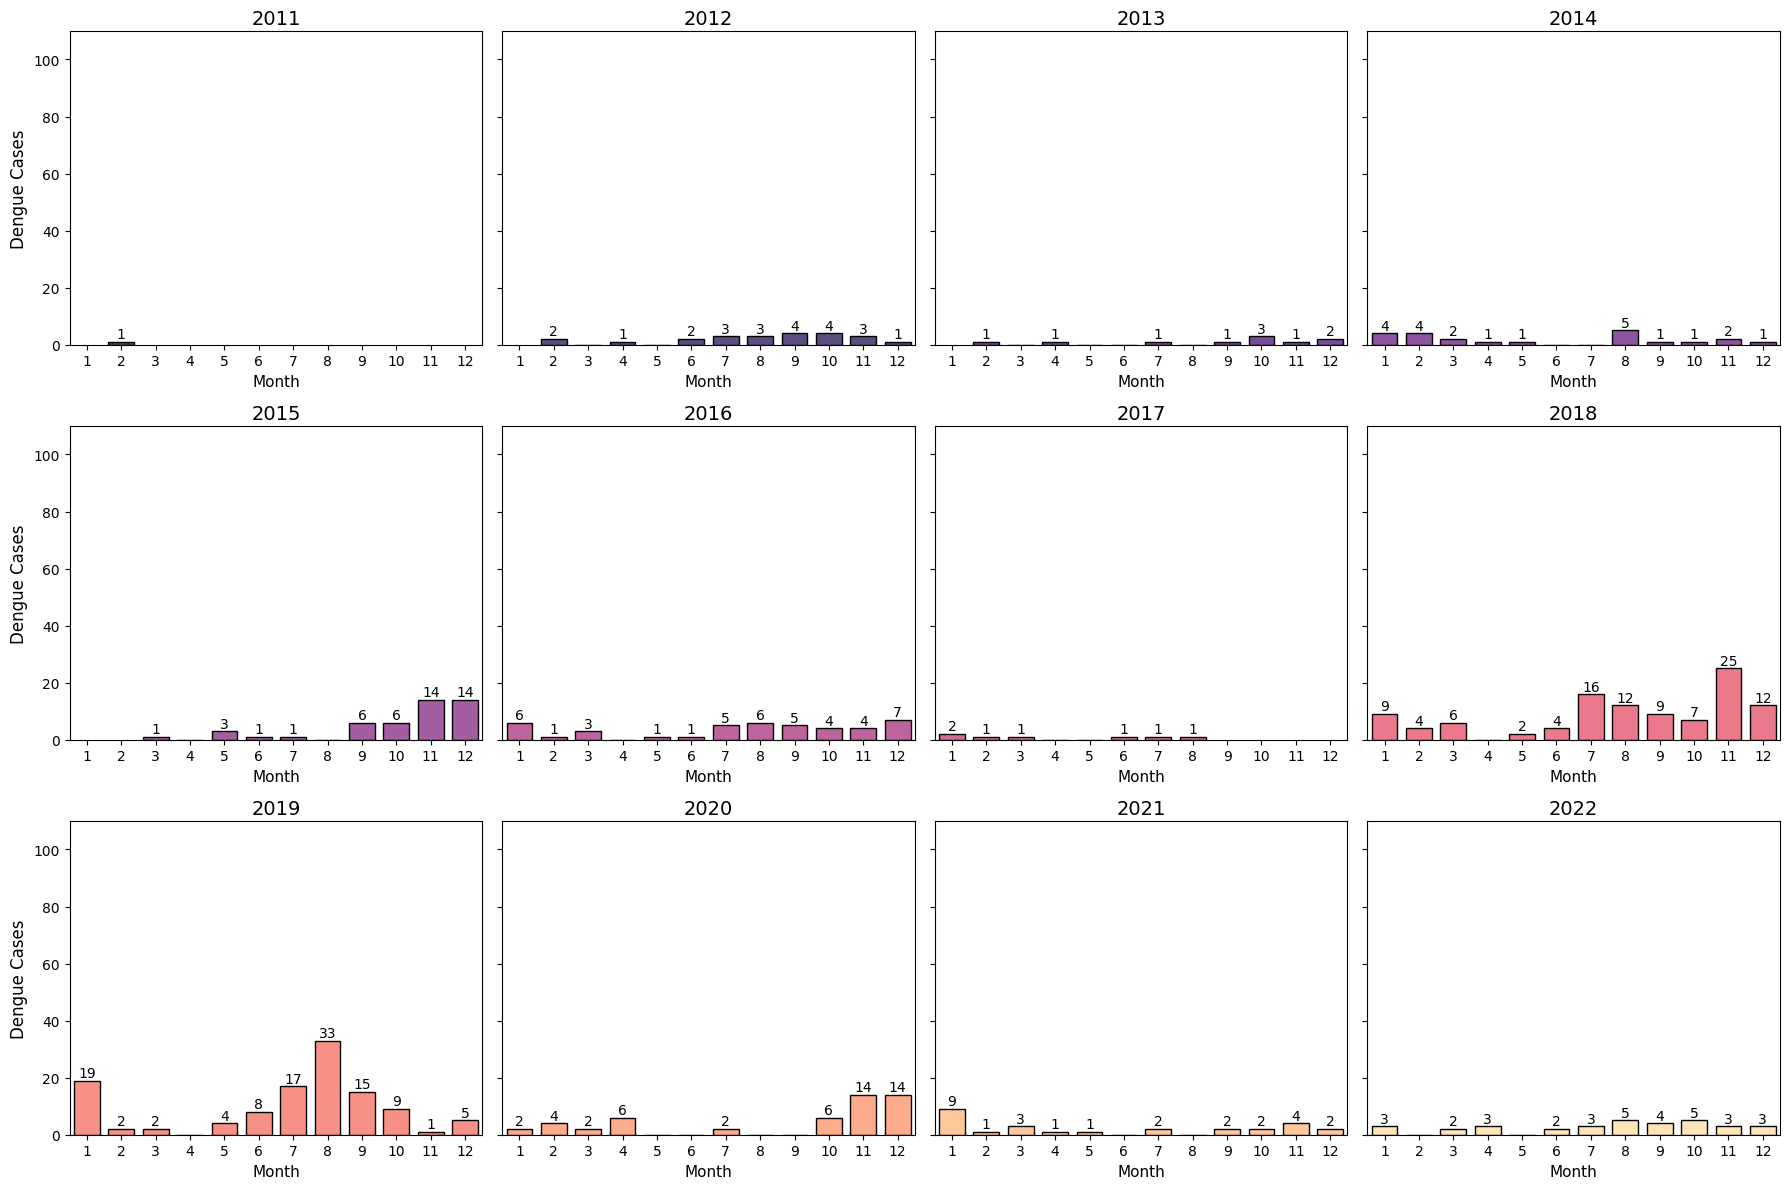

In [64]:
#HISTOGRAM FOR MONTHLY CASES EVERY YEAR
plot_dengue_cases(df, "MARIA CRISTINA")

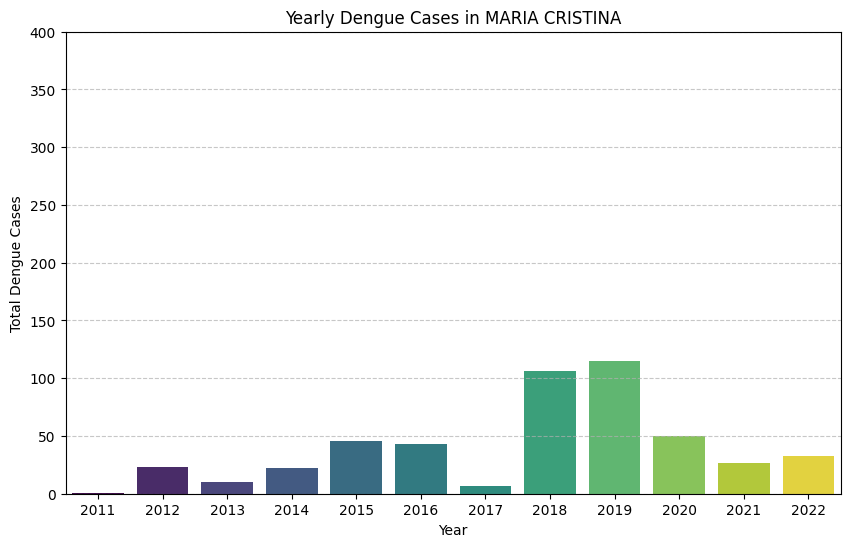

In [65]:
plot_total_dengue_cases_yearly(df, "MARIA CRISTINA")

<div style="
    background-color: black; 
    color: white; 
    padding: 10px; 
    border-radius: 10px; 
    text-align: center;
    max-width: 100vw; 
    width: 100%;
    box-sizing: border-box;">
    PALAO MONTHLY CASES
</div>


In [66]:
selected_barangay = "PALAO"  # Change this to any barangay you want
barangay_data = get_selected_barangay(df, selected_barangay)

# Display the data for each year
for year, data in barangay_data.items():
    display(data)

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
22            22    PALAO  8.2286  124.2532  2011      1             1   
66            22    PALAO  8.2286  124.2532  2011      2             1   
110           22    PALAO  8.2286  124.2532  2011      3             0   
154           22    PALAO  8.2286  124.2532  2011      4             2   
198           22    PALAO  8.2286  124.2532  2011      5             0   
242           22    PALAO  8.2286  124.2532  2011      6             0   
286           22    PALAO  8.2286  124.2532  2011      7             0   
330           22    PALAO  8.2286  124.2532  2011      8             0   
374           22    PALAO  8.2286  124.2532  2011      9             0   
418           22    PALAO  8.2286  124.2532  2011     10             0   
462           22    PALAO  8.2286  124.2532  2011     11             0   
506           22    PALAO  8.2286  124.2532  2011     12             4   

     Temperature  Humidity  Rainfall  
22          23.8      88.1       7.0  
66          24.1      87.2      12.0  
110         25.3      85.5      20.0  
154         26.0      83.1      35.0  
198         27.2      81.9      55.0  
242         26.4      83.5      90.0  
286         25.7      84.7     110.0  
330         25.1      85.3      95.0  
374         24.4      86.2      70.0  
418         24.0      87.0      50.0  
462         23.6      88.4      30.0  
506         23.2      89.1      15.0

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
550            22    PALAO  8.2286  124.2532  2012      1             0   
594            22    PALAO  8.2286  124.2532  2012      2             0   
638            22    PALAO  8.2286  124.2532  2012      3             0   
682            22    PALAO  8.2286  124.2532  2012      4             2   
726            22    PALAO  8.2286  124.2532  2012      5             8   
770            22    PALAO  8.2286  124.2532  2012      6             3   
814            22    PALAO  8.2286  124.2532  2012      7             1   
858            22    PALAO  8.2286  124.2532  2012      8             1   
902            22    PALAO  8.2286  124.2532  2012      9             2   
946            22    PALAO  8.2286  124.2532  2012     10             1   
990            22    PALAO  8.2286  124.2532  2012     11             0   
1034           22    PALAO  8.2286  124.2532  2012     12             0   

      Temperature  Humidity  Rainfall  
550          24.3      85.1       4.0  
594          24.3      85.7       7.1  
638          24.6      83.3       3.1  
682          25.4      82.3       6.9  
726          25.1      86.4       6.9  
770          24.7      85.3       7.9  
814          24.9      85.2       6.4  
858          24.9      85.2       6.4  
902          24.1      88.1      11.4  
946          24.6      86.5       8.4  
990          24.8      84.8       4.1  
1034         24.7      84.8       5.7

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
1078           22    PALAO  8.2286  124.2532  2013      1             3   
1122           22    PALAO  8.2286  124.2532  2013      2             2   
1166           22    PALAO  8.2286  124.2532  2013      3             2   
1210           22    PALAO  8.2286  124.2532  2013      4             0   
1254           22    PALAO  8.2286  124.2532  2013      5             1   
1298           22    PALAO  8.2286  124.2532  2013      6             1   
1342           22    PALAO  8.2286  124.2532  2013      7             1   
1386           22    PALAO  8.2286  124.2532  2013      8             0   
1430           22    PALAO  8.2286  124.2532  2013      9             3   
1474           22    PALAO  8.2286  124.2532  2013     10             1   
1518           22    PALAO  8.2286  124.2532  2013     11             2   
1562           22    PALAO  8.2286  124.2532  2013     12             0   

      Temperature  Humidity  Rainfall  
1078         24.2      88.2       8.1  
1122         24.4      84.7       6.0  
1166         25.5      81.1       2.7  
1210         26.0      81.0       4.9  
1254         26.0      82.8       5.2  
1298         24.9      86.9       9.2  
1342         24.5      87.7      11.0  
1386         24.3      87.2       6.9  
1430         24.6      86.5       4.9  
1474         24.0      88.0      10.4  
1518         24.2      85.9       7.8  
1562         24.4      84.0       3.5

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
1606           22    PALAO  8.2286  124.2532  2014      1             1   
1650           22    PALAO  8.2286  124.2532  2014      2             1   
1694           22    PALAO  8.2286  124.2532  2014      3             1   
1738           22    PALAO  8.2286  124.2532  2014      4             0   
1782           22    PALAO  8.2286  124.2532  2014      5             3   
1826           22    PALAO  8.2286  124.2532  2014      6             2   
1870           22    PALAO  8.2286  124.2532  2014      7             3   
1914           22    PALAO  8.2286  124.2532  2014      8             6   
1958           22    PALAO  8.2286  124.2532  2014      9             6   
2002           22    PALAO  8.2286  124.2532  2014     10             8   
2046           22    PALAO  8.2286  124.2532  2014     11             5   
2090           22    PALAO  8.2286  124.2532  2014     12             1   

      Temperature  Humidity  Rainfall  
1606         23.2      86.4       6.8  
1650         23.7      82.4       2.3  
1694         24.3      82.5       3.8  
1738         25.1      81.4       2.0  
1782         25.3      84.0       4.9  
1826         24.5      87.1       6.6  
1870         23.4      89.1       8.5  
1914         23.9      87.7       8.0  
1958         23.4      88.5       7.1  
2002         23.9      88.4       8.5  
2046         24.7      85.2       6.1  
2090         24.0      85.3       4.9

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
2134           22    PALAO  8.2286  124.2532  2015      1             5   
2178           22    PALAO  8.2286  124.2532  2015      2             5   
2222           22    PALAO  8.2286  124.2532  2015      3             2   
2266           22    PALAO  8.2286  124.2532  2015      4             0   
2310           22    PALAO  8.2286  124.2532  2015      5             2   
2354           22    PALAO  8.2286  124.2532  2015      6             0   
2398           22    PALAO  8.2286  124.2532  2015      7             5   
2442           22    PALAO  8.2286  124.2532  2015      8             0   
2486           22    PALAO  8.2286  124.2532  2015      9            10   
2530           22    PALAO  8.2286  124.2532  2015     10             5   
2574           22    PALAO  8.2286  124.2532  2015     11            13   
2618           22    PALAO  8.2286  124.2532  2015     12            11   

      Temperature  Humidity  Rainfall  
2134         25.6      89.0       5.9  
2178         25.6      87.0       3.0  
2222         26.1      83.2       1.1  
2266         27.3      82.8       2.1  
2310         28.4      78.1       2.7  
2354         27.4      81.9       8.7  
2398         27.6      80.4       4.2  
2442         27.5      80.9       5.5  
2486         27.2      82.4       8.2  
2530         27.2      83.4       4.9  
2574         26.8      87.3       6.5  
2618         26.5      87.1       4.8

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
2662           22    PALAO  8.2286  124.2532  2016      1             4   
2706           22    PALAO  8.2286  124.2532  2016      2             8   
2750           22    PALAO  8.2286  124.2532  2016      3             2   
2794           22    PALAO  8.2286  124.2532  2016      4             0   
2838           22    PALAO  8.2286  124.2532  2016      5             0   
2882           22    PALAO  8.2286  124.2532  2016      6             1   
2926           22    PALAO  8.2286  124.2532  2016      7            21   
2970           22    PALAO  8.2286  124.2532  2016      8            10   
3014           22    PALAO  8.2286  124.2532  2016      9            15   
3058           22    PALAO  8.2286  124.2532  2016     10             8   
3102           22    PALAO  8.2286  124.2532  2016     11            12   
3146           22    PALAO  8.2286  124.2532  2016     12             6   

      Temperature  Humidity  Rainfall  
2662         26.2      86.9       1.6  
2706         26.1      88.2       2.6  
2750         26.8      84.4       0.4  
2794         28.1      80.1       1.5  
2838         28.3      81.9       8.3  
2882         27.5      83.9      12.5  
2926         27.6      82.0       5.2  
2970         27.8      80.3       2.7  
3014         27.2      82.4       6.2  
3058         27.1      84.6       8.9  
3102         26.5      86.6       7.6  
3146         26.7      86.9       8.2

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
3190           22    PALAO  8.2286  124.2532  2017      1            15   
3234           22    PALAO  8.2286  124.2532  2017      2             4   
3278           22    PALAO  8.2286  124.2532  2017      3             0   
3322           22    PALAO  8.2286  124.2532  2017      4             1   
3366           22    PALAO  8.2286  124.2532  2017      5             0   
3410           22    PALAO  8.2286  124.2532  2017      6             0   
3454           22    PALAO  8.2286  124.2532  2017      7             1   
3498           22    PALAO  8.2286  124.2532  2017      8             1   
3542           22    PALAO  8.2286  124.2532  2017      9             1   
3586           22    PALAO  8.2286  124.2532  2017     10             1   
3630           22    PALAO  8.2286  124.2532  2017     11             0   
3674           22    PALAO  8.2286  124.2532  2017     12             0   

      Temperature  Humidity  Rainfall  
3190         25.9      88.9      12.5  
3234         25.6      87.8       5.9  
3278         26.1      87.4       8.0  
3322         27.2      85.0       5.1  
3366         27.8      84.4      10.4  
3410         27.4      83.8       7.8  
3454         27.2      82.6       9.1  
3498         27.9      83.4       9.6  
3542         27.3      83.3      11.4  
3586         27.0      84.0       8.3  
3630         27.0      86.6       7.3  
3674         26.7      85.9       9.6

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
3718           22    PALAO  8.2286  124.2532  2018      1             6   
3762           22    PALAO  8.2286  124.2532  2018      2             0   
3806           22    PALAO  8.2286  124.2532  2018      3             7   
3850           22    PALAO  8.2286  124.2532  2018      4             2   
3894           22    PALAO  8.2286  124.2532  2018      5             1   
3938           22    PALAO  8.2286  124.2532  2018      6             4   
3982           22    PALAO  8.2286  124.2532  2018      7             7   
4026           22    PALAO  8.2286  124.2532  2018      8            11   
4070           22    PALAO  8.2286  124.2532  2018      9             0   
4114           22    PALAO  8.2286  124.2532  2018     10             4   
4158           22    PALAO  8.2286  124.2532  2018     11             5   
4202           22    PALAO  8.2286  124.2532  2018     12             8   

      Temperature  Humidity  Rainfall  
3718         26.2      87.5       7.3  
3762         26.4      86.0       9.7  
3806         26.5      84.6       3.7  
3850         27.4      82.5       2.6  
3894         27.9      82.0       6.9  
3938         27.7      80.7       5.2  
3982         27.3      81.6       4.7  
4026         27.4      79.8       2.1  
4070         26.9      82.2       5.4  
4114         27.2      82.7       4.2  
4158         26.5      86.6       6.1  
4202         26.3      88.1       5.8

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
4246           22    PALAO  8.2286  124.2532  2019      1            18   
4290           22    PALAO  8.2286  124.2532  2019      2            26   
4334           22    PALAO  8.2286  124.2532  2019      3            36   
4378           22    PALAO  8.2286  124.2532  2019      4            13   
4422           22    PALAO  8.2286  124.2532  2019      5             2   
4466           22    PALAO  8.2286  124.2532  2019      6            10   
4510           22    PALAO  8.2286  124.2532  2019      7            36   
4554           22    PALAO  8.2286  124.2532  2019      8            45   
4598           22    PALAO  8.2286  124.2532  2019      9            23   
4642           22    PALAO  8.2286  124.2532  2019     10            21   
4686           22    PALAO  8.2286  124.2532  2019     11             9   
4730           22    PALAO  8.2286  124.2532  2019     12             8   

      Temperature  Humidity  Rainfall  
4246         25.5      88.2       5.7  
4290         25.3      84.3       1.1  
4334         26.1      83.2       1.9  
4378         27.5      80.3       1.8  
4422         28.4      78.6       4.4  
4466         27.8      82.7       9.1  
4510         27.2      82.1       6.2  
4554         27.7      77.1       1.4  
4598         27.8      78.2       3.3  
4642         27.0      83.8       7.7  
4686         27.1      82.9       4.3  
4730         26.4      86.4       4.2

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
4774           22    PALAO  8.2286  124.2532  2020      1             6   
4818           22    PALAO  8.2286  124.2532  2020      2            10   
4862           22    PALAO  8.2286  124.2532  2020      3             0   
4906           22    PALAO  8.2286  124.2532  2020      4             0   
4950           22    PALAO  8.2286  124.2532  2020      5             0   
4994           22    PALAO  8.2286  124.2532  2020      6             4   
5038           22    PALAO  8.2286  124.2532  2020      7             4   
5082           22    PALAO  8.2286  124.2532  2020      8             0   
5126           22    PALAO  8.2286  124.2532  2020      9             0   
5170           22    PALAO  8.2286  124.2532  2020     10             0   
5214           22    PALAO  8.2286  124.2532  2020     11             0   
5258           22    PALAO  8.2286  124.2532  2020     12             0   

      Temperature  Humidity  Rainfall  
4774         26.3      86.8       2.1  
4818         25.7      87.2       3.5  
4862         26.4      85.2       2.0  
4906         27.2      81.6       1.0  
4950         28.0      83.2       9.8  
4994         27.3      84.1      14.1  
5038         27.0      83.9      15.7  
5082         27.2      82.9      11.7  
5126         27.2      83.7       9.2  
5170         26.9      84.2      13.2  
5214         26.8      86.2       5.5  
5258         26.7      86.6       8.2

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
5302           22    PALAO  8.2286  124.2532  2021      1             1   
5346           22    PALAO  8.2286  124.2532  2021      2             0   
5390           22    PALAO  8.2286  124.2532  2021      3             1   
5434           22    PALAO  8.2286  124.2532  2021      4             3   
5478           22    PALAO  8.2286  124.2532  2021      5             1   
5522           22    PALAO  8.2286  124.2532  2021      6             3   
5566           22    PALAO  8.2286  124.2532  2021      7             2   
5610           22    PALAO  8.2286  124.2532  2021      8             2   
5654           22    PALAO  8.2286  124.2532  2021      9             1   
5698           22    PALAO  8.2286  124.2532  2021     10             2   
5742           22    PALAO  8.2286  124.2532  2021     11             6   
5786           22    PALAO  8.2286  124.2532  2021     12             6   

      Temperature  Humidity  Rainfall  
5302         25.9      88.5      11.9  
5346         26.0      87.1      12.6  
5390         26.8      84.7       5.5  
5434         27.1      82.5       4.5  
5478         27.5      84.0      10.7  
5522         27.6      81.3       8.2  
5566         27.7      80.0       4.4  
5610         27.5      80.0       6.5  
5654         27.2      82.7       9.5  
5698         27.3      83.6       8.7  
5742         27.0      86.4       9.4  
5786         26.2      86.9       9.8

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
5830           22    PALAO  8.2286  124.2532  2022      1             8   
5874           22    PALAO  8.2286  124.2532  2022      2             3   
5918           22    PALAO  8.2286  124.2532  2022      3             1   
5962           22    PALAO  8.2286  124.2532  2022      4             1   
6006           22    PALAO  8.2286  124.2532  2022      5             5   
6050           22    PALAO  8.2286  124.2532  2022      6             6   
6094           22    PALAO  8.2286  124.2532  2022      7             8   
6138           22    PALAO  8.2286  124.2532  2022      8             5   
6182           22    PALAO  8.2286  124.2532  2022      9             3   
6226           22    PALAO  8.2286  124.2532  2022     10             2   
6270           22    PALAO  8.2286  124.2532  2022     11             1   
6314           22    PALAO  8.2286  124.2532  2022     12             3   

      Temperature  Humidity  Rainfall  
5830         26.0      86.9       8.3  
5874         26.0      87.2       3.9  
5918         26.8      86.5      11.0  
5962         26.8      86.5      12.2  
6006         27.4      83.9      11.5  
6050         27.6      81.9       7.1  
6094         27.4      83.2      11.6  
6138         27.3      82.0       7.9  
6182         27.5      81.1       6.1  
6226         27.1      84.2       9.0  
6270         27.0      85.8       6.6  
6314         26.4      87.1      14.5

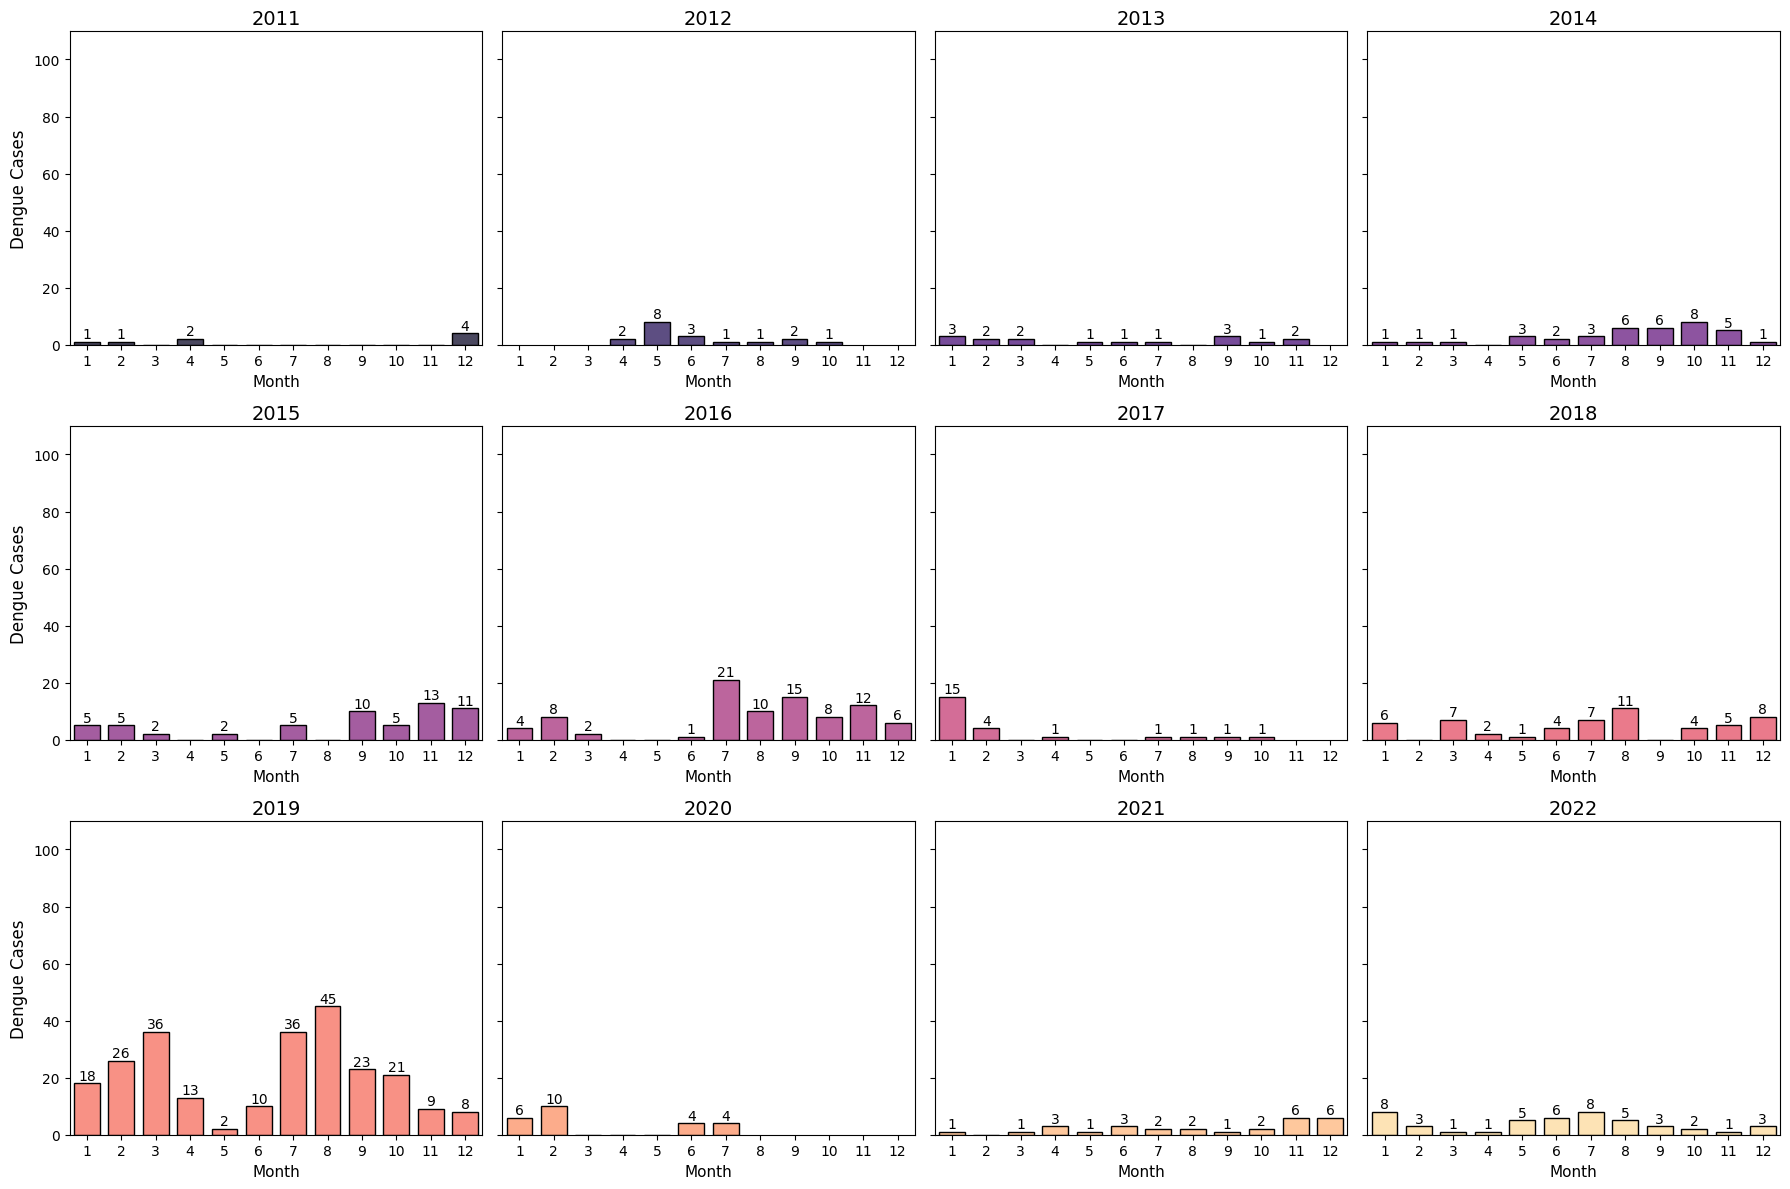

In [67]:
plot_dengue_cases(df, "PALAO")

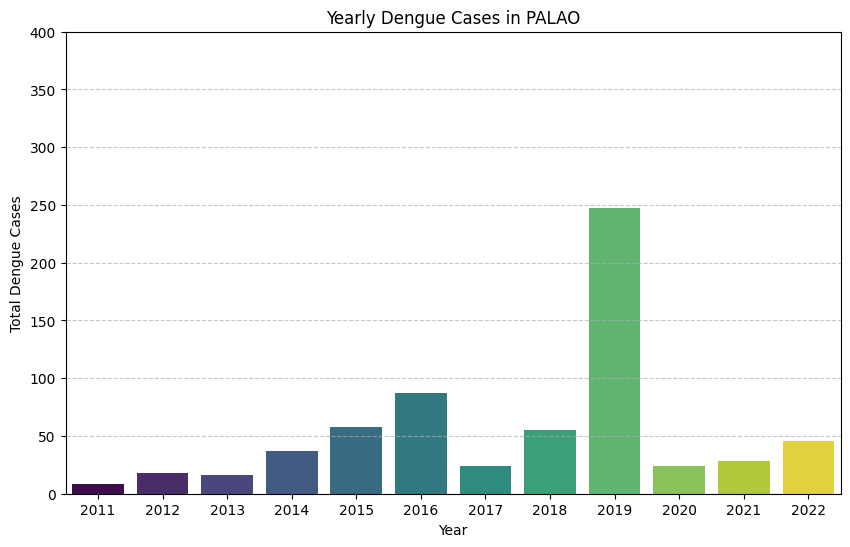

In [68]:
plot_total_dengue_cases_yearly(df, "PALAO")

<div style="
    background-color: black; 
    color: white; 
    padding: 10px; 
    border-radius: 10px; 
    text-align: center;
    max-width: 100vw; 
    width: 100%;
    box-sizing: border-box;">
    PANOROGANAN MONTHLY CASES
</div>


In [69]:
selected_barangay = "PANOROGANAN"  # Change this to any barangay you want
barangay_data = get_selected_barangay(df, selected_barangay)

# Display the data for each year
for year, data in barangay_data.items():
    display(data)

Barangay_No     Barangay       x        y  Year  Month  Dengue Cases  \
23            23  PANOROGANAN  8.1743  124.425  2011      1             0   
67            23  PANOROGANAN  8.1743  124.425  2011      2             0   
111           23  PANOROGANAN  8.1743  124.425  2011      3             0   
155           23  PANOROGANAN  8.1743  124.425  2011      4             0   
199           23  PANOROGANAN  8.1743  124.425  2011      5             0   
243           23  PANOROGANAN  8.1743  124.425  2011      6             0   
287           23  PANOROGANAN  8.1743  124.425  2011      7             0   
331           23  PANOROGANAN  8.1743  124.425  2011      8             0   
375           23  PANOROGANAN  8.1743  124.425  2011      9             0   
419           23  PANOROGANAN  8.1743  124.425  2011     10             0   
463           23  PANOROGANAN  8.1743  124.425  2011     11             0   
507           23  PANOROGANAN  8.1743  124.425  2011     12             0   

     Temperature  Humidity  Rainfall  
23          23.8      88.1       7.0  
67          24.1      87.2      12.0  
111         25.3      85.5      20.0  
155         26.0      83.1      35.0  
199         27.2      81.9      55.0  
243         26.4      83.5      90.0  
287         25.7      84.7     110.0  
331         25.1      85.3      95.0  
375         24.4      86.2      70.0  
419         24.0      87.0      50.0  
463         23.6      88.4      30.0  
507         23.2      89.1      15.0

Barangay_No     Barangay       x        y  Year  Month  Dengue Cases  \
551            23  PANOROGANAN  8.1743  124.425  2012      1             0   
595            23  PANOROGANAN  8.1743  124.425  2012      2             0   
639            23  PANOROGANAN  8.1743  124.425  2012      3             0   
683            23  PANOROGANAN  8.1743  124.425  2012      4             0   
727            23  PANOROGANAN  8.1743  124.425  2012      5             0   
771            23  PANOROGANAN  8.1743  124.425  2012      6             0   
815            23  PANOROGANAN  8.1743  124.425  2012      7             0   
859            23  PANOROGANAN  8.1743  124.425  2012      8             0   
903            23  PANOROGANAN  8.1743  124.425  2012      9             0   
947            23  PANOROGANAN  8.1743  124.425  2012     10             0   
991            23  PANOROGANAN  8.1743  124.425  2012     11             0   
1035           23  PANOROGANAN  8.1743  124.425  2012     12             0   

      Temperature  Humidity  Rainfall  
551          24.3      85.1       4.0  
595          24.3      85.7       7.1  
639          24.6      83.3       3.1  
683          25.4      82.3       6.9  
727          25.1      86.4       6.9  
771          24.7      85.3       7.9  
815          24.9      85.2       6.4  
859          24.9      85.2       6.4  
903          24.1      88.1      11.4  
947          24.6      86.5       8.4  
991          24.8      84.8       4.1  
1035         24.7      84.8       5.7

Barangay_No     Barangay       x        y  Year  Month  Dengue Cases  \
1079           23  PANOROGANAN  8.1743  124.425  2013      1             0   
1123           23  PANOROGANAN  8.1743  124.425  2013      2             0   
1167           23  PANOROGANAN  8.1743  124.425  2013      3             0   
1211           23  PANOROGANAN  8.1743  124.425  2013      4             0   
1255           23  PANOROGANAN  8.1743  124.425  2013      5             0   
1299           23  PANOROGANAN  8.1743  124.425  2013      6             0   
1343           23  PANOROGANAN  8.1743  124.425  2013      7             0   
1387           23  PANOROGANAN  8.1743  124.425  2013      8             0   
1431           23  PANOROGANAN  8.1743  124.425  2013      9             0   
1475           23  PANOROGANAN  8.1743  124.425  2013     10             0   
1519           23  PANOROGANAN  8.1743  124.425  2013     11             0   
1563           23  PANOROGANAN  8.1743  124.425  2013     12             0   

      Temperature  Humidity  Rainfall  
1079         24.2      88.2       8.1  
1123         24.4      84.7       6.0  
1167         25.5      81.1       2.7  
1211         26.0      81.0       4.9  
1255         26.0      82.8       5.2  
1299         24.9      86.9       9.2  
1343         24.5      87.7      11.0  
1387         24.3      87.2       6.9  
1431         24.6      86.5       4.9  
1475         24.0      88.0      10.4  
1519         24.2      85.9       7.8  
1563         24.4      84.0       3.5

Barangay_No     Barangay       x        y  Year  Month  Dengue Cases  \
1607           23  PANOROGANAN  8.1743  124.425  2014      1             0   
1651           23  PANOROGANAN  8.1743  124.425  2014      2             0   
1695           23  PANOROGANAN  8.1743  124.425  2014      3             0   
1739           23  PANOROGANAN  8.1743  124.425  2014      4             0   
1783           23  PANOROGANAN  8.1743  124.425  2014      5             0   
1827           23  PANOROGANAN  8.1743  124.425  2014      6             0   
1871           23  PANOROGANAN  8.1743  124.425  2014      7             0   
1915           23  PANOROGANAN  8.1743  124.425  2014      8             0   
1959           23  PANOROGANAN  8.1743  124.425  2014      9             0   
2003           23  PANOROGANAN  8.1743  124.425  2014     10             0   
2047           23  PANOROGANAN  8.1743  124.425  2014     11             0   
2091           23  PANOROGANAN  8.1743  124.425  2014     12             0   

      Temperature  Humidity  Rainfall  
1607         23.2      86.4       6.8  
1651         23.7      82.4       2.3  
1695         24.3      82.5       3.8  
1739         25.1      81.4       2.0  
1783         25.3      84.0       4.9  
1827         24.5      87.1       6.6  
1871         23.4      89.1       8.5  
1915         23.9      87.7       8.0  
1959         23.4      88.5       7.1  
2003         23.9      88.4       8.5  
2047         24.7      85.2       6.1  
2091         24.0      85.3       4.9

Barangay_No     Barangay       x        y  Year  Month  Dengue Cases  \
2135           23  PANOROGANAN  8.1743  124.425  2015      1             0   
2179           23  PANOROGANAN  8.1743  124.425  2015      2             0   
2223           23  PANOROGANAN  8.1743  124.425  2015      3             0   
2267           23  PANOROGANAN  8.1743  124.425  2015      4             0   
2311           23  PANOROGANAN  8.1743  124.425  2015      5             0   
2355           23  PANOROGANAN  8.1743  124.425  2015      6             0   
2399           23  PANOROGANAN  8.1743  124.425  2015      7             0   
2443           23  PANOROGANAN  8.1743  124.425  2015      8             0   
2487           23  PANOROGANAN  8.1743  124.425  2015      9             0   
2531           23  PANOROGANAN  8.1743  124.425  2015     10             0   
2575           23  PANOROGANAN  8.1743  124.425  2015     11             0   
2619           23  PANOROGANAN  8.1743  124.425  2015     12             0   

      Temperature  Humidity  Rainfall  
2135         25.6      89.0       5.9  
2179         25.6      87.0       3.0  
2223         26.1      83.2       1.1  
2267         27.3      82.8       2.1  
2311         28.4      78.1       2.7  
2355         27.4      81.9       8.7  
2399         27.6      80.4       4.2  
2443         27.5      80.9       5.5  
2487         27.2      82.4       8.2  
2531         27.2      83.4       4.9  
2575         26.8      87.3       6.5  
2619         26.5      87.1       4.8

Barangay_No     Barangay       x        y  Year  Month  Dengue Cases  \
2663           23  PANOROGANAN  8.1743  124.425  2016      1             0   
2707           23  PANOROGANAN  8.1743  124.425  2016      2             0   
2751           23  PANOROGANAN  8.1743  124.425  2016      3             0   
2795           23  PANOROGANAN  8.1743  124.425  2016      4             0   
2839           23  PANOROGANAN  8.1743  124.425  2016      5             0   
2883           23  PANOROGANAN  8.1743  124.425  2016      6             0   
2927           23  PANOROGANAN  8.1743  124.425  2016      7             1   
2971           23  PANOROGANAN  8.1743  124.425  2016      8             0   
3015           23  PANOROGANAN  8.1743  124.425  2016      9             1   
3059           23  PANOROGANAN  8.1743  124.425  2016     10             0   
3103           23  PANOROGANAN  8.1743  124.425  2016     11             0   
3147           23  PANOROGANAN  8.1743  124.425  2016     12             0   

      Temperature  Humidity  Rainfall  
2663         26.2      86.9       1.6  
2707         26.1      88.2       2.6  
2751         26.8      84.4       0.4  
2795         28.1      80.1       1.5  
2839         28.3      81.9       8.3  
2883         27.5      83.9      12.5  
2927         27.6      82.0       5.2  
2971         27.8      80.3       2.7  
3015         27.2      82.4       6.2  
3059         27.1      84.6       8.9  
3103         26.5      86.6       7.6  
3147         26.7      86.9       8.2

Barangay_No     Barangay       x        y  Year  Month  Dengue Cases  \
3191           23  PANOROGANAN  8.1743  124.425  2017      1             0   
3235           23  PANOROGANAN  8.1743  124.425  2017      2             0   
3279           23  PANOROGANAN  8.1743  124.425  2017      3             0   
3323           23  PANOROGANAN  8.1743  124.425  2017      4             0   
3367           23  PANOROGANAN  8.1743  124.425  2017      5             0   
3411           23  PANOROGANAN  8.1743  124.425  2017      6             0   
3455           23  PANOROGANAN  8.1743  124.425  2017      7             0   
3499           23  PANOROGANAN  8.1743  124.425  2017      8             0   
3543           23  PANOROGANAN  8.1743  124.425  2017      9             0   
3587           23  PANOROGANAN  8.1743  124.425  2017     10             0   
3631           23  PANOROGANAN  8.1743  124.425  2017     11             0   
3675           23  PANOROGANAN  8.1743  124.425  2017     12             0   

      Temperature  Humidity  Rainfall  
3191         25.9      88.9      12.5  
3235         25.6      87.8       5.9  
3279         26.1      87.4       8.0  
3323         27.2      85.0       5.1  
3367         27.8      84.4      10.4  
3411         27.4      83.8       7.8  
3455         27.2      82.6       9.1  
3499         27.9      83.4       9.6  
3543         27.3      83.3      11.4  
3587         27.0      84.0       8.3  
3631         27.0      86.6       7.3  
3675         26.7      85.9       9.6

Barangay_No     Barangay       x        y  Year  Month  Dengue Cases  \
3719           23  PANOROGANAN  8.1743  124.425  2018      1             0   
3763           23  PANOROGANAN  8.1743  124.425  2018      2             0   
3807           23  PANOROGANAN  8.1743  124.425  2018      3             0   
3851           23  PANOROGANAN  8.1743  124.425  2018      4             0   
3895           23  PANOROGANAN  8.1743  124.425  2018      5             0   
3939           23  PANOROGANAN  8.1743  124.425  2018      6             0   
3983           23  PANOROGANAN  8.1743  124.425  2018      7             0   
4027           23  PANOROGANAN  8.1743  124.425  2018      8             0   
4071           23  PANOROGANAN  8.1743  124.425  2018      9             0   
4115           23  PANOROGANAN  8.1743  124.425  2018     10             0   
4159           23  PANOROGANAN  8.1743  124.425  2018     11             0   
4203           23  PANOROGANAN  8.1743  124.425  2018     12             0   

      Temperature  Humidity  Rainfall  
3719         26.2      87.5       7.3  
3763         26.4      86.0       9.7  
3807         26.5      84.6       3.7  
3851         27.4      82.5       2.6  
3895         27.9      82.0       6.9  
3939         27.7      80.7       5.2  
3983         27.3      81.6       4.7  
4027         27.4      79.8       2.1  
4071         26.9      82.2       5.4  
4115         27.2      82.7       4.2  
4159         26.5      86.6       6.1  
4203         26.3      88.1       5.8

Barangay_No     Barangay       x        y  Year  Month  Dengue Cases  \
4247           23  PANOROGANAN  8.1743  124.425  2019      1             0   
4291           23  PANOROGANAN  8.1743  124.425  2019      2             0   
4335           23  PANOROGANAN  8.1743  124.425  2019      3             0   
4379           23  PANOROGANAN  8.1743  124.425  2019      4             0   
4423           23  PANOROGANAN  8.1743  124.425  2019      5             0   
4467           23  PANOROGANAN  8.1743  124.425  2019      6             0   
4511           23  PANOROGANAN  8.1743  124.425  2019      7             0   
4555           23  PANOROGANAN  8.1743  124.425  2019      8             0   
4599           23  PANOROGANAN  8.1743  124.425  2019      9             0   
4643           23  PANOROGANAN  8.1743  124.425  2019     10             0   
4687           23  PANOROGANAN  8.1743  124.425  2019     11             0   
4731           23  PANOROGANAN  8.1743  124.425  2019     12             0   

      Temperature  Humidity  Rainfall  
4247         25.5      88.2       5.7  
4291         25.3      84.3       1.1  
4335         26.1      83.2       1.9  
4379         27.5      80.3       1.8  
4423         28.4      78.6       4.4  
4467         27.8      82.7       9.1  
4511         27.2      82.1       6.2  
4555         27.7      77.1       1.4  
4599         27.8      78.2       3.3  
4643         27.0      83.8       7.7  
4687         27.1      82.9       4.3  
4731         26.4      86.4       4.2

Barangay_No     Barangay       x        y  Year  Month  Dengue Cases  \
4775           23  PANOROGANAN  8.1743  124.425  2020      1             0   
4819           23  PANOROGANAN  8.1743  124.425  2020      2             2   
4863           23  PANOROGANAN  8.1743  124.425  2020      3             0   
4907           23  PANOROGANAN  8.1743  124.425  2020      4             0   
4951           23  PANOROGANAN  8.1743  124.425  2020      5             0   
4995           23  PANOROGANAN  8.1743  124.425  2020      6             0   
5039           23  PANOROGANAN  8.1743  124.425  2020      7             0   
5083           23  PANOROGANAN  8.1743  124.425  2020      8             0   
5127           23  PANOROGANAN  8.1743  124.425  2020      9             0   
5171           23  PANOROGANAN  8.1743  124.425  2020     10             0   
5215           23  PANOROGANAN  8.1743  124.425  2020     11             0   
5259           23  PANOROGANAN  8.1743  124.425  2020     12             0   

      Temperature  Humidity  Rainfall  
4775         26.3      86.8       2.1  
4819         25.7      87.2       3.5  
4863         26.4      85.2       2.0  
4907         27.2      81.6       1.0  
4951         28.0      83.2       9.8  
4995         27.3      84.1      14.1  
5039         27.0      83.9      15.7  
5083         27.2      82.9      11.7  
5127         27.2      83.7       9.2  
5171         26.9      84.2      13.2  
5215         26.8      86.2       5.5  
5259         26.7      86.6       8.2

Barangay_No     Barangay       x        y  Year  Month  Dengue Cases  \
5303           23  PANOROGANAN  8.1743  124.425  2021      1             0   
5347           23  PANOROGANAN  8.1743  124.425  2021      2             0   
5391           23  PANOROGANAN  8.1743  124.425  2021      3             0   
5435           23  PANOROGANAN  8.1743  124.425  2021      4             0   
5479           23  PANOROGANAN  8.1743  124.425  2021      5             0   
5523           23  PANOROGANAN  8.1743  124.425  2021      6             0   
5567           23  PANOROGANAN  8.1743  124.425  2021      7             0   
5611           23  PANOROGANAN  8.1743  124.425  2021      8             0   
5655           23  PANOROGANAN  8.1743  124.425  2021      9             0   
5699           23  PANOROGANAN  8.1743  124.425  2021     10             0   
5743           23  PANOROGANAN  8.1743  124.425  2021     11             0   
5787           23  PANOROGANAN  8.1743  124.425  2021     12             0   

      Temperature  Humidity  Rainfall  
5303         25.9      88.5      11.9  
5347         26.0      87.1      12.6  
5391         26.8      84.7       5.5  
5435         27.1      82.5       4.5  
5479         27.5      84.0      10.7  
5523         27.6      81.3       8.2  
5567         27.7      80.0       4.4  
5611         27.5      80.0       6.5  
5655         27.2      82.7       9.5  
5699         27.3      83.6       8.7  
5743         27.0      86.4       9.4  
5787         26.2      86.9       9.8

Barangay_No     Barangay       x        y  Year  Month  Dengue Cases  \
5831           23  PANOROGANAN  8.1743  124.425  2022      1             0   
5875           23  PANOROGANAN  8.1743  124.425  2022      2             0   
5919           23  PANOROGANAN  8.1743  124.425  2022      3             0   
5963           23  PANOROGANAN  8.1743  124.425  2022      4             0   
6007           23  PANOROGANAN  8.1743  124.425  2022      5             0   
6051           23  PANOROGANAN  8.1743  124.425  2022      6             0   
6095           23  PANOROGANAN  8.1743  124.425  2022      7             0   
6139           23  PANOROGANAN  8.1743  124.425  2022      8             0   
6183           23  PANOROGANAN  8.1743  124.425  2022      9             0   
6227           23  PANOROGANAN  8.1743  124.425  2022     10             0   
6271           23  PANOROGANAN  8.1743  124.425  2022     11             0   
6315           23  PANOROGANAN  8.1743  124.425  2022     12             0   

      Temperature  Humidity  Rainfall  
5831         26.0      86.9       8.3  
5875         26.0      87.2       3.9  
5919         26.8      86.5      11.0  
5963         26.8      86.5      12.2  
6007         27.4      83.9      11.5  
6051         27.6      81.9       7.1  
6095         27.4      83.2      11.6  
6139         27.3      82.0       7.9  
6183         27.5      81.1       6.1  
6227         27.1      84.2       9.0  
6271         27.0      85.8       6.6  
6315         26.4      87.1      14.5

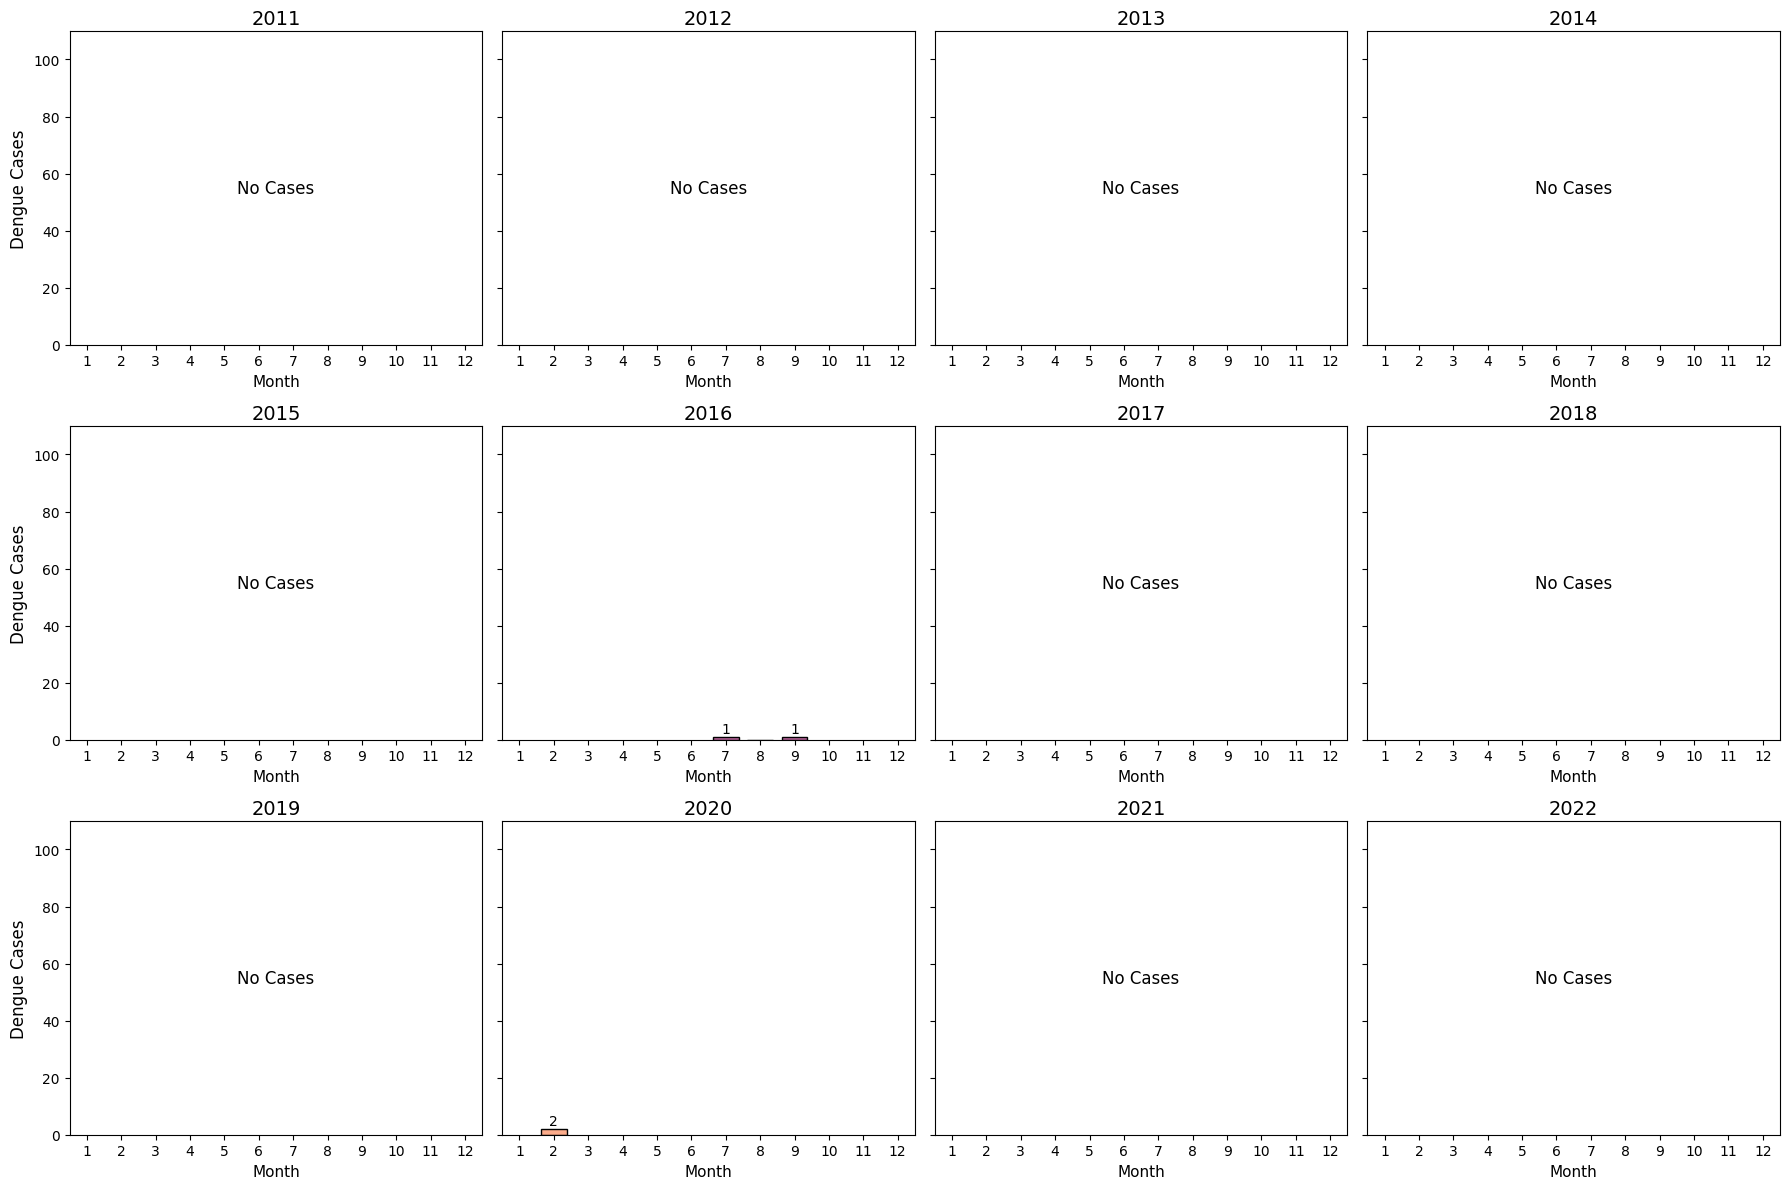

In [70]:
plot_dengue_cases(df, "PANOROGANAN")

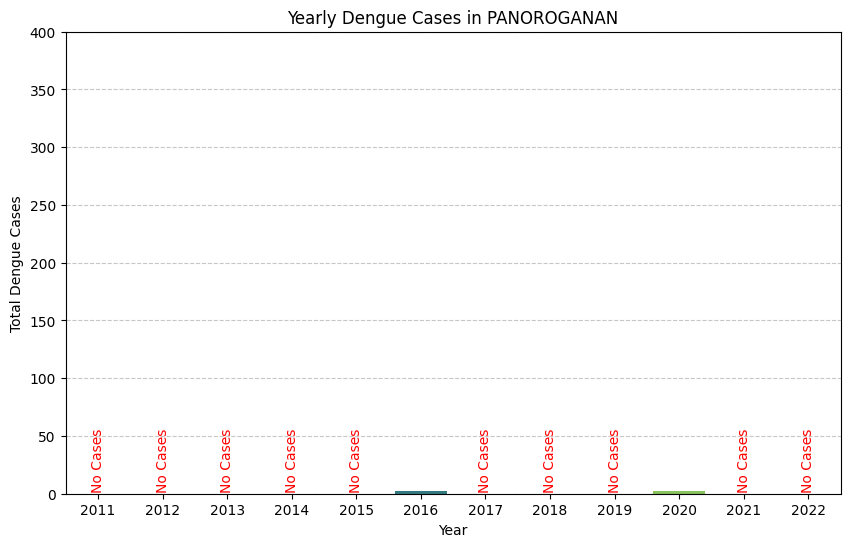

In [71]:
plot_total_dengue_cases_yearly(df, "PANOROGANAN")

<div style="
    background-color: black; 
    color: white; 
    padding: 10px; 
    border-radius: 10px; 
    text-align: center;
    max-width: 100vw; 
    width: 100%;
    box-sizing: border-box;">
    POBLACION MONTHLY CASES
</div>


In [72]:
selected_barangay = "POBLACION"  # Change this to any barangay you want
barangay_data = get_selected_barangay(df, selected_barangay)

# Display the data for each year
for year, data in barangay_data.items():
    display(data)


Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
24            24  POBLACION  8.2285  124.2344  2011      1             5   
68            24  POBLACION  8.2285  124.2344  2011      2             4   
112           24  POBLACION  8.2285  124.2344  2011      3             1   
156           24  POBLACION  8.2285  124.2344  2011      4             0   
200           24  POBLACION  8.2285  124.2344  2011      5             2   
244           24  POBLACION  8.2285  124.2344  2011      6             0   
288           24  POBLACION  8.2285  124.2344  2011      7             3   
332           24  POBLACION  8.2285  124.2344  2011      8             2   
376           24  POBLACION  8.2285  124.2344  2011      9             1   
420           24  POBLACION  8.2285  124.2344  2011     10             0   
464           24  POBLACION  8.2285  124.2344  2011     11             1   
508           24  POBLACION  8.2285  124.2344  2011     12             0   

     Temperature  Humidity  Rainfall  
24          23.8      88.1       7.0  
68          24.1      87.2      12.0  
112         25.3      85.5      20.0  
156         26.0      83.1      35.0  
200         27.2      81.9      55.0  
244         26.4      83.5      90.0  
288         25.7      84.7     110.0  
332         25.1      85.3      95.0  
376         24.4      86.2      70.0  
420         24.0      87.0      50.0  
464         23.6      88.4      30.0  
508         23.2      89.1      15.0

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
552            24  POBLACION  8.2285  124.2344  2012      1             0   
596            24  POBLACION  8.2285  124.2344  2012      2             2   
640            24  POBLACION  8.2285  124.2344  2012      3             2   
684            24  POBLACION  8.2285  124.2344  2012      4             1   
728            24  POBLACION  8.2285  124.2344  2012      5             3   
772            24  POBLACION  8.2285  124.2344  2012      6             3   
816            24  POBLACION  8.2285  124.2344  2012      7             1   
860            24  POBLACION  8.2285  124.2344  2012      8             5   
904            24  POBLACION  8.2285  124.2344  2012      9             7   
948            24  POBLACION  8.2285  124.2344  2012     10             5   
992            24  POBLACION  8.2285  124.2344  2012     11             5   
1036           24  POBLACION  8.2285  124.2344  2012     12             0   

      Temperature  Humidity  Rainfall  
552          24.3      85.1       4.0  
596          24.3      85.7       7.1  
640          24.6      83.3       3.1  
684          25.4      82.3       6.9  
728          25.1      86.4       6.9  
772          24.7      85.3       7.9  
816          24.9      85.2       6.4  
860          24.9      85.2       6.4  
904          24.1      88.1      11.4  
948          24.6      86.5       8.4  
992          24.8      84.8       4.1  
1036         24.7      84.8       5.7

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
1080           24  POBLACION  8.2285  124.2344  2013      1            13   
1124           24  POBLACION  8.2285  124.2344  2013      2             3   
1168           24  POBLACION  8.2285  124.2344  2013      3             4   
1212           24  POBLACION  8.2285  124.2344  2013      4             0   
1256           24  POBLACION  8.2285  124.2344  2013      5             1   
1300           24  POBLACION  8.2285  124.2344  2013      6             1   
1344           24  POBLACION  8.2285  124.2344  2013      7             4   
1388           24  POBLACION  8.2285  124.2344  2013      8             1   
1432           24  POBLACION  8.2285  124.2344  2013      9             5   
1476           24  POBLACION  8.2285  124.2344  2013     10             0   
1520           24  POBLACION  8.2285  124.2344  2013     11             2   
1564           24  POBLACION  8.2285  124.2344  2013     12             3   

      Temperature  Humidity  Rainfall  
1080         24.2      88.2       8.1  
1124         24.4      84.7       6.0  
1168         25.5      81.1       2.7  
1212         26.0      81.0       4.9  
1256         26.0      82.8       5.2  
1300         24.9      86.9       9.2  
1344         24.5      87.7      11.0  
1388         24.3      87.2       6.9  
1432         24.6      86.5       4.9  
1476         24.0      88.0      10.4  
1520         24.2      85.9       7.8  
1564         24.4      84.0       3.5

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
1608           24  POBLACION  8.2285  124.2344  2014      1             1   
1652           24  POBLACION  8.2285  124.2344  2014      2             3   
1696           24  POBLACION  8.2285  124.2344  2014      3             3   
1740           24  POBLACION  8.2285  124.2344  2014      4             1   
1784           24  POBLACION  8.2285  124.2344  2014      5             5   
1828           24  POBLACION  8.2285  124.2344  2014      6             0   
1872           24  POBLACION  8.2285  124.2344  2014      7             4   
1916           24  POBLACION  8.2285  124.2344  2014      8            10   
1960           24  POBLACION  8.2285  124.2344  2014      9             4   
2004           24  POBLACION  8.2285  124.2344  2014     10             7   
2048           24  POBLACION  8.2285  124.2344  2014     11             8   
2092           24  POBLACION  8.2285  124.2344  2014     12             3   

      Temperature  Humidity  Rainfall  
1608         23.2      86.4       6.8  
1652         23.7      82.4       2.3  
1696         24.3      82.5       3.8  
1740         25.1      81.4       2.0  
1784         25.3      84.0       4.9  
1828         24.5      87.1       6.6  
1872         23.4      89.1       8.5  
1916         23.9      87.7       8.0  
1960         23.4      88.5       7.1  
2004         23.9      88.4       8.5  
2048         24.7      85.2       6.1  
2092         24.0      85.3       4.9

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
2136           24  POBLACION  8.2285  124.2344  2015      1            10   
2180           24  POBLACION  8.2285  124.2344  2015      2             0   
2224           24  POBLACION  8.2285  124.2344  2015      3             4   
2268           24  POBLACION  8.2285  124.2344  2015      4             2   
2312           24  POBLACION  8.2285  124.2344  2015      5             5   
2356           24  POBLACION  8.2285  124.2344  2015      6             1   
2400           24  POBLACION  8.2285  124.2344  2015      7             0   
2444           24  POBLACION  8.2285  124.2344  2015      8             0   
2488           24  POBLACION  8.2285  124.2344  2015      9             0   
2532           24  POBLACION  8.2285  124.2344  2015     10             1   
2576           24  POBLACION  8.2285  124.2344  2015     11             6   
2620           24  POBLACION  8.2285  124.2344  2015     12             3   

      Temperature  Humidity  Rainfall  
2136         25.6      89.0       5.9  
2180         25.6      87.0       3.0  
2224         26.1      83.2       1.1  
2268         27.3      82.8       2.1  
2312         28.4      78.1       2.7  
2356         27.4      81.9       8.7  
2400         27.6      80.4       4.2  
2444         27.5      80.9       5.5  
2488         27.2      82.4       8.2  
2532         27.2      83.4       4.9  
2576         26.8      87.3       6.5  
2620         26.5      87.1       4.8

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
2664           24  POBLACION  8.2285  124.2344  2016      1             1   
2708           24  POBLACION  8.2285  124.2344  2016      2             1   
2752           24  POBLACION  8.2285  124.2344  2016      3             4   
2796           24  POBLACION  8.2285  124.2344  2016      4             1   
2840           24  POBLACION  8.2285  124.2344  2016      5             0   
2884           24  POBLACION  8.2285  124.2344  2016      6             0   
2928           24  POBLACION  8.2285  124.2344  2016      7             7   
2972           24  POBLACION  8.2285  124.2344  2016      8             7   
3016           24  POBLACION  8.2285  124.2344  2016      9             3   
3060           24  POBLACION  8.2285  124.2344  2016     10             1   
3104           24  POBLACION  8.2285  124.2344  2016     11             2   
3148           24  POBLACION  8.2285  124.2344  2016     12             4   

      Temperature  Humidity  Rainfall  
2664         26.2      86.9       1.6  
2708         26.1      88.2       2.6  
2752         26.8      84.4       0.4  
2796         28.1      80.1       1.5  
2840         28.3      81.9       8.3  
2884         27.5      83.9      12.5  
2928         27.6      82.0       5.2  
2972         27.8      80.3       2.7  
3016         27.2      82.4       6.2  
3060         27.1      84.6       8.9  
3104         26.5      86.6       7.6  
3148         26.7      86.9       8.2

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
3192           24  POBLACION  8.2285  124.2344  2017      1             3   
3236           24  POBLACION  8.2285  124.2344  2017      2             0   
3280           24  POBLACION  8.2285  124.2344  2017      3             1   
3324           24  POBLACION  8.2285  124.2344  2017      4             1   
3368           24  POBLACION  8.2285  124.2344  2017      5             1   
3412           24  POBLACION  8.2285  124.2344  2017      6             0   
3456           24  POBLACION  8.2285  124.2344  2017      7             1   
3500           24  POBLACION  8.2285  124.2344  2017      8             0   
3544           24  POBLACION  8.2285  124.2344  2017      9             0   
3588           24  POBLACION  8.2285  124.2344  2017     10             1   
3632           24  POBLACION  8.2285  124.2344  2017     11             1   
3676           24  POBLACION  8.2285  124.2344  2017     12             1   

      Temperature  Humidity  Rainfall  
3192         25.9      88.9      12.5  
3236         25.6      87.8       5.9  
3280         26.1      87.4       8.0  
3324         27.2      85.0       5.1  
3368         27.8      84.4      10.4  
3412         27.4      83.8       7.8  
3456         27.2      82.6       9.1  
3500         27.9      83.4       9.6  
3544         27.3      83.3      11.4  
3588         27.0      84.0       8.3  
3632         27.0      86.6       7.3  
3676         26.7      85.9       9.6

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
3720           24  POBLACION  8.2285  124.2344  2018      1             0   
3764           24  POBLACION  8.2285  124.2344  2018      2             1   
3808           24  POBLACION  8.2285  124.2344  2018      3             1   
3852           24  POBLACION  8.2285  124.2344  2018      4             2   
3896           24  POBLACION  8.2285  124.2344  2018      5             4   
3940           24  POBLACION  8.2285  124.2344  2018      6             5   
3984           24  POBLACION  8.2285  124.2344  2018      7             5   
4028           24  POBLACION  8.2285  124.2344  2018      8             3   
4072           24  POBLACION  8.2285  124.2344  2018      9             3   
4116           24  POBLACION  8.2285  124.2344  2018     10             6   
4160           24  POBLACION  8.2285  124.2344  2018     11             8   
4204           24  POBLACION  8.2285  124.2344  2018     12            17   

      Temperature  Humidity  Rainfall  
3720         26.2      87.5       7.3  
3764         26.4      86.0       9.7  
3808         26.5      84.6       3.7  
3852         27.4      82.5       2.6  
3896         27.9      82.0       6.9  
3940         27.7      80.7       5.2  
3984         27.3      81.6       4.7  
4028         27.4      79.8       2.1  
4072         26.9      82.2       5.4  
4116         27.2      82.7       4.2  
4160         26.5      86.6       6.1  
4204         26.3      88.1       5.8

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
4248           24  POBLACION  8.2285  124.2344  2019      1            26   
4292           24  POBLACION  8.2285  124.2344  2019      2            19   
4336           24  POBLACION  8.2285  124.2344  2019      3            20   
4380           24  POBLACION  8.2285  124.2344  2019      4             6   
4424           24  POBLACION  8.2285  124.2344  2019      5            25   
4468           24  POBLACION  8.2285  124.2344  2019      6            33   
4512           24  POBLACION  8.2285  124.2344  2019      7            82   
4556           24  POBLACION  8.2285  124.2344  2019      8            45   
4600           24  POBLACION  8.2285  124.2344  2019      9            21   
4644           24  POBLACION  8.2285  124.2344  2019     10            19   
4688           24  POBLACION  8.2285  124.2344  2019     11            22   
4732           24  POBLACION  8.2285  124.2344  2019     12            18   

      Temperature  Humidity  Rainfall  
4248         25.5      88.2       5.7  
4292         25.3      84.3       1.1  
4336         26.1      83.2       1.9  
4380         27.5      80.3       1.8  
4424         28.4      78.6       4.4  
4468         27.8      82.7       9.1  
4512         27.2      82.1       6.2  
4556         27.7      77.1       1.4  
4600         27.8      78.2       3.3  
4644         27.0      83.8       7.7  
4688         27.1      82.9       4.3  
4732         26.4      86.4       4.2

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
4776           24  POBLACION  8.2285  124.2344  2020      1            22   
4820           24  POBLACION  8.2285  124.2344  2020      2            40   
4864           24  POBLACION  8.2285  124.2344  2020      3            10   
4908           24  POBLACION  8.2285  124.2344  2020      4             8   
4952           24  POBLACION  8.2285  124.2344  2020      5             2   
4996           24  POBLACION  8.2285  124.2344  2020      6             4   
5040           24  POBLACION  8.2285  124.2344  2020      7             8   
5084           24  POBLACION  8.2285  124.2344  2020      8             4   
5128           24  POBLACION  8.2285  124.2344  2020      9             0   
5172           24  POBLACION  8.2285  124.2344  2020     10             0   
5216           24  POBLACION  8.2285  124.2344  2020     11             0   
5260           24  POBLACION  8.2285  124.2344  2020     12             2   

      Temperature  Humidity  Rainfall  
4776         26.3      86.8       2.1  
4820         25.7      87.2       3.5  
4864         26.4      85.2       2.0  
4908         27.2      81.6       1.0  
4952         28.0      83.2       9.8  
4996         27.3      84.1      14.1  
5040         27.0      83.9      15.7  
5084         27.2      82.9      11.7  
5128         27.2      83.7       9.2  
5172         26.9      84.2      13.2  
5216         26.8      86.2       5.5  
5260         26.7      86.6       8.2

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
5304           24  POBLACION  8.2285  124.2344  2021      1             0   
5348           24  POBLACION  8.2285  124.2344  2021      2             1   
5392           24  POBLACION  8.2285  124.2344  2021      3             2   
5436           24  POBLACION  8.2285  124.2344  2021      4             1   
5480           24  POBLACION  8.2285  124.2344  2021      5             2   
5524           24  POBLACION  8.2285  124.2344  2021      6             1   
5568           24  POBLACION  8.2285  124.2344  2021      7             8   
5612           24  POBLACION  8.2285  124.2344  2021      8             0   
5656           24  POBLACION  8.2285  124.2344  2021      9             4   
5700           24  POBLACION  8.2285  124.2344  2021     10             4   
5744           24  POBLACION  8.2285  124.2344  2021     11             8   
5788           24  POBLACION  8.2285  124.2344  2021     12             6   

      Temperature  Humidity  Rainfall  
5304         25.9      88.5      11.9  
5348         26.0      87.1      12.6  
5392         26.8      84.7       5.5  
5436         27.1      82.5       4.5  
5480         27.5      84.0      10.7  
5524         27.6      81.3       8.2  
5568         27.7      80.0       4.4  
5612         27.5      80.0       6.5  
5656         27.2      82.7       9.5  
5700         27.3      83.6       8.7  
5744         27.0      86.4       9.4  
5788         26.2      86.9       9.8

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
5832           24  POBLACION  8.2285  124.2344  2022      1             4   
5876           24  POBLACION  8.2285  124.2344  2022      2             0   
5920           24  POBLACION  8.2285  124.2344  2022      3             5   
5964           24  POBLACION  8.2285  124.2344  2022      4             5   
6008           24  POBLACION  8.2285  124.2344  2022      5             5   
6052           24  POBLACION  8.2285  124.2344  2022      6             3   
6096           24  POBLACION  8.2285  124.2344  2022      7             4   
6140           24  POBLACION  8.2285  124.2344  2022      8             5   
6184           24  POBLACION  8.2285  124.2344  2022      9             7   
6228           24  POBLACION  8.2285  124.2344  2022     10             6   
6272           24  POBLACION  8.2285  124.2344  2022     11             6   
6316           24  POBLACION  8.2285  124.2344  2022     12             7   

      Temperature  Humidity  Rainfall  
5832         26.0      86.9       8.3  
5876         26.0      87.2       3.9  
5920         26.8      86.5      11.0  
5964         26.8      86.5      12.2  
6008         27.4      83.9      11.5  
6052         27.6      81.9       7.1  
6096         27.4      83.2      11.6  
6140         27.3      82.0       7.9  
6184         27.5      81.1       6.1  
6228         27.1      84.2       9.0  
6272         27.0      85.8       6.6  
6316         26.4      87.1      14.5

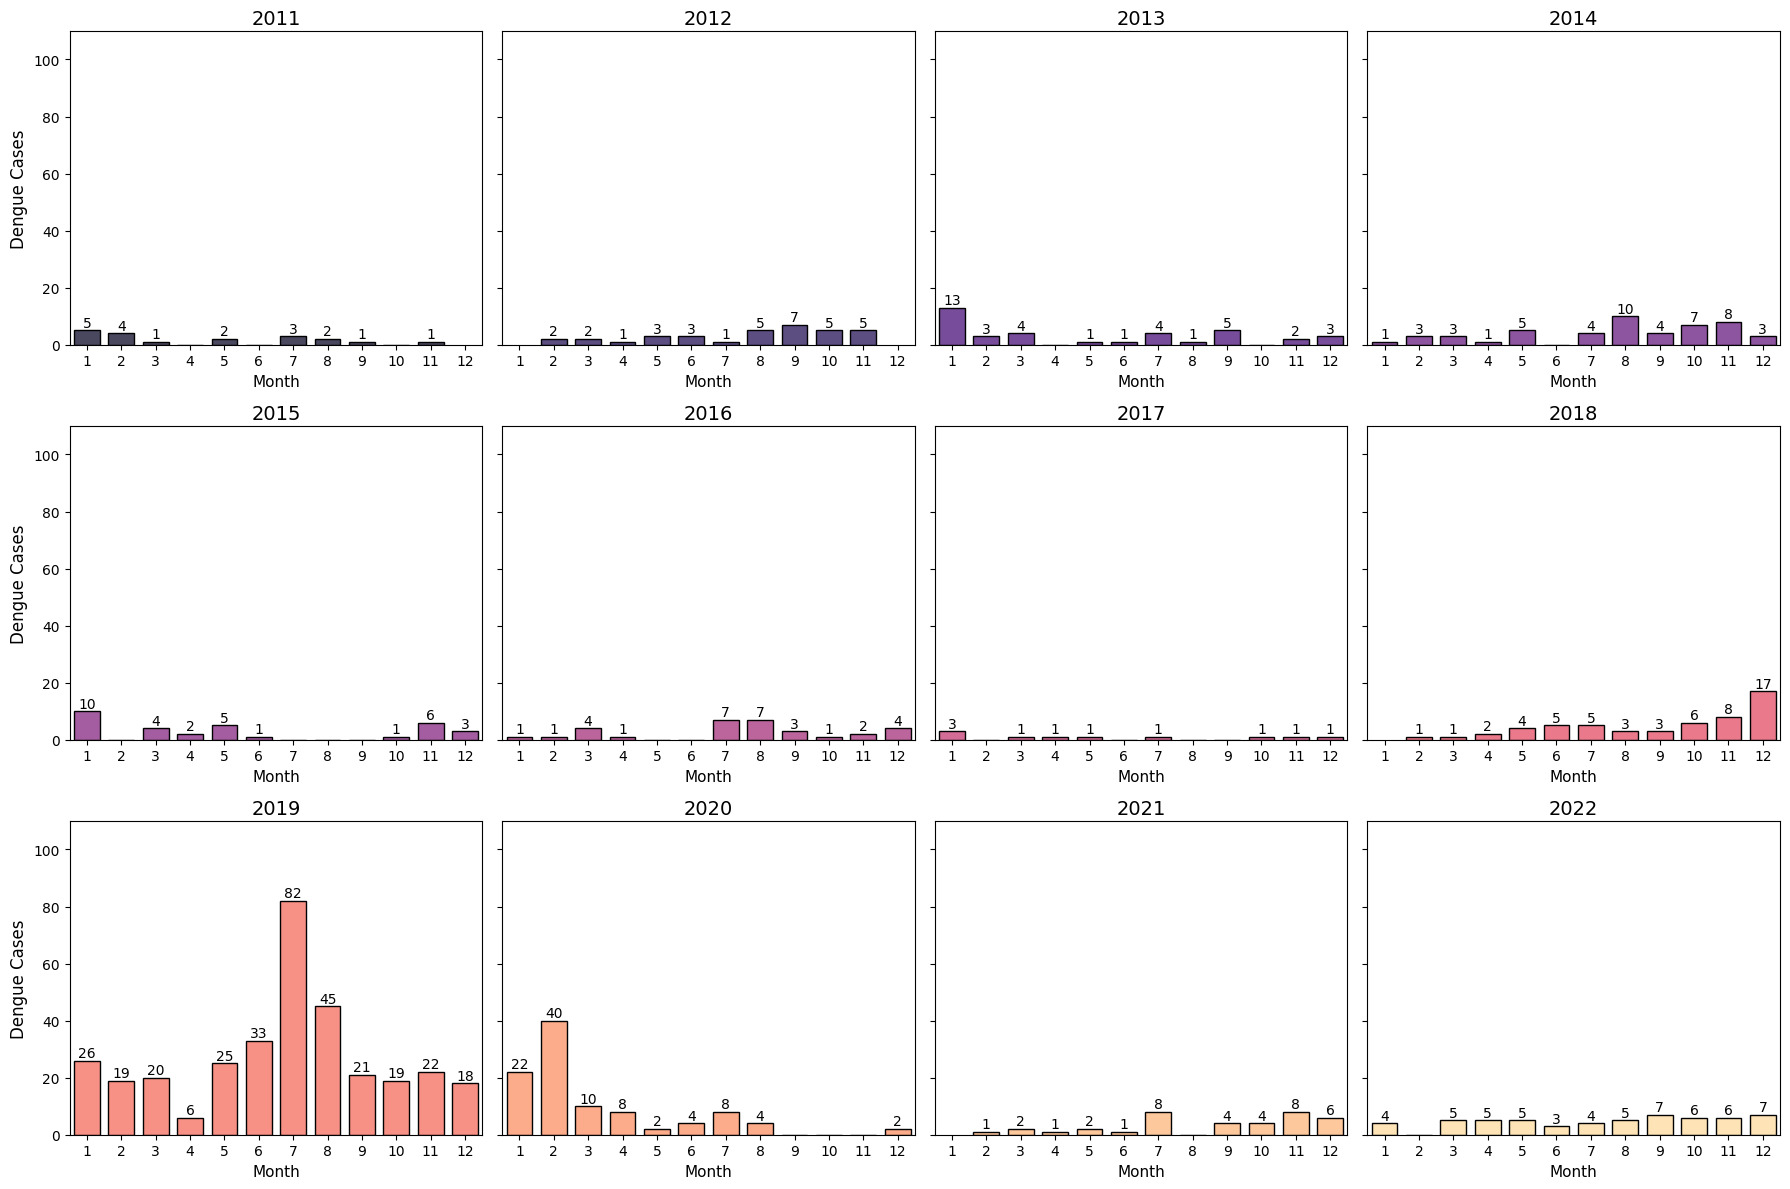

In [73]:
#HISTOGRAM FOR MONTHLY CASES EVERY YEAR
plot_dengue_cases(df, "POBLACION")

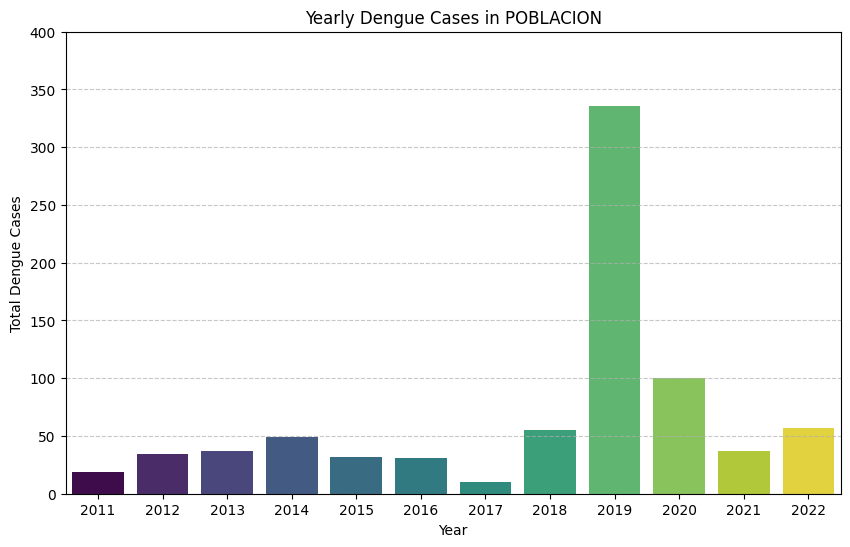

In [74]:
plot_total_dengue_cases_yearly(df, "POBLACION")

<div style="
    background-color: black; 
    color: white; 
    padding: 10px; 
    border-radius: 10px; 
    text-align: center;
    max-width: 100vw; 
    width: 100%;
    box-sizing: border-box;">
    PUGA-AN MONTHLY CASES
</div>


In [75]:
selected_barangay = "PUGA-AN"  # Change this to any barangay you want
barangay_data = get_selected_barangay(df, selected_barangay)

# Display the data for each year
for year, data in barangay_data.items():
    display(data)


Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
25            25  PUGA-AN  8.2285  124.2742  2011      1             0   
69            25  PUGA-AN  8.2285  124.2742  2011      2             0   
113           25  PUGA-AN  8.2285  124.2742  2011      3             0   
157           25  PUGA-AN  8.2285  124.2742  2011      4             0   
201           25  PUGA-AN  8.2285  124.2742  2011      5             0   
245           25  PUGA-AN  8.2285  124.2742  2011      6             0   
289           25  PUGA-AN  8.2285  124.2742  2011      7             0   
333           25  PUGA-AN  8.2285  124.2742  2011      8             1   
377           25  PUGA-AN  8.2285  124.2742  2011      9             0   
421           25  PUGA-AN  8.2285  124.2742  2011     10             0   
465           25  PUGA-AN  8.2285  124.2742  2011     11             0   
509           25  PUGA-AN  8.2285  124.2742  2011     12             0   

     Temperature  Humidity  Rainfall  
25          23.8      88.1       7.0  
69          24.1      87.2      12.0  
113         25.3      85.5      20.0  
157         26.0      83.1      35.0  
201         27.2      81.9      55.0  
245         26.4      83.5      90.0  
289         25.7      84.7     110.0  
333         25.1      85.3      95.0  
377         24.4      86.2      70.0  
421         24.0      87.0      50.0  
465         23.6      88.4      30.0  
509         23.2      89.1      15.0

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
553            25  PUGA-AN  8.2285  124.2742  2012      1             1   
597            25  PUGA-AN  8.2285  124.2742  2012      2             0   
641            25  PUGA-AN  8.2285  124.2742  2012      3             0   
685            25  PUGA-AN  8.2285  124.2742  2012      4             0   
729            25  PUGA-AN  8.2285  124.2742  2012      5             0   
773            25  PUGA-AN  8.2285  124.2742  2012      6             0   
817            25  PUGA-AN  8.2285  124.2742  2012      7             0   
861            25  PUGA-AN  8.2285  124.2742  2012      8             0   
905            25  PUGA-AN  8.2285  124.2742  2012      9             0   
949            25  PUGA-AN  8.2285  124.2742  2012     10             0   
993            25  PUGA-AN  8.2285  124.2742  2012     11             0   
1037           25  PUGA-AN  8.2285  124.2742  2012     12             0   

      Temperature  Humidity  Rainfall  
553          24.3      85.1       4.0  
597          24.3      85.7       7.1  
641          24.6      83.3       3.1  
685          25.4      82.3       6.9  
729          25.1      86.4       6.9  
773          24.7      85.3       7.9  
817          24.9      85.2       6.4  
861          24.9      85.2       6.4  
905          24.1      88.1      11.4  
949          24.6      86.5       8.4  
993          24.8      84.8       4.1  
1037         24.7      84.8       5.7

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
1081           25  PUGA-AN  8.2285  124.2742  2013      1             0   
1125           25  PUGA-AN  8.2285  124.2742  2013      2             1   
1169           25  PUGA-AN  8.2285  124.2742  2013      3             0   
1213           25  PUGA-AN  8.2285  124.2742  2013      4             1   
1257           25  PUGA-AN  8.2285  124.2742  2013      5             0   
1301           25  PUGA-AN  8.2285  124.2742  2013      6             0   
1345           25  PUGA-AN  8.2285  124.2742  2013      7             0   
1389           25  PUGA-AN  8.2285  124.2742  2013      8             0   
1433           25  PUGA-AN  8.2285  124.2742  2013      9             0   
1477           25  PUGA-AN  8.2285  124.2742  2013     10             0   
1521           25  PUGA-AN  8.2285  124.2742  2013     11             0   
1565           25  PUGA-AN  8.2285  124.2742  2013     12             0   

      Temperature  Humidity  Rainfall  
1081         24.2      88.2       8.1  
1125         24.4      84.7       6.0  
1169         25.5      81.1       2.7  
1213         26.0      81.0       4.9  
1257         26.0      82.8       5.2  
1301         24.9      86.9       9.2  
1345         24.5      87.7      11.0  
1389         24.3      87.2       6.9  
1433         24.6      86.5       4.9  
1477         24.0      88.0      10.4  
1521         24.2      85.9       7.8  
1565         24.4      84.0       3.5

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
1609           25  PUGA-AN  8.2285  124.2742  2014      1             1   
1653           25  PUGA-AN  8.2285  124.2742  2014      2             0   
1697           25  PUGA-AN  8.2285  124.2742  2014      3             0   
1741           25  PUGA-AN  8.2285  124.2742  2014      4             0   
1785           25  PUGA-AN  8.2285  124.2742  2014      5             1   
1829           25  PUGA-AN  8.2285  124.2742  2014      6             1   
1873           25  PUGA-AN  8.2285  124.2742  2014      7             0   
1917           25  PUGA-AN  8.2285  124.2742  2014      8             1   
1961           25  PUGA-AN  8.2285  124.2742  2014      9             2   
2005           25  PUGA-AN  8.2285  124.2742  2014     10             0   
2049           25  PUGA-AN  8.2285  124.2742  2014     11             1   
2093           25  PUGA-AN  8.2285  124.2742  2014     12             0   

      Temperature  Humidity  Rainfall  
1609         23.2      86.4       6.8  
1653         23.7      82.4       2.3  
1697         24.3      82.5       3.8  
1741         25.1      81.4       2.0  
1785         25.3      84.0       4.9  
1829         24.5      87.1       6.6  
1873         23.4      89.1       8.5  
1917         23.9      87.7       8.0  
1961         23.4      88.5       7.1  
2005         23.9      88.4       8.5  
2049         24.7      85.2       6.1  
2093         24.0      85.3       4.9

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
2137           25  PUGA-AN  8.2285  124.2742  2015      1             0   
2181           25  PUGA-AN  8.2285  124.2742  2015      2             0   
2225           25  PUGA-AN  8.2285  124.2742  2015      3             0   
2269           25  PUGA-AN  8.2285  124.2742  2015      4             0   
2313           25  PUGA-AN  8.2285  124.2742  2015      5             1   
2357           25  PUGA-AN  8.2285  124.2742  2015      6             0   
2401           25  PUGA-AN  8.2285  124.2742  2015      7             0   
2445           25  PUGA-AN  8.2285  124.2742  2015      8             0   
2489           25  PUGA-AN  8.2285  124.2742  2015      9             0   
2533           25  PUGA-AN  8.2285  124.2742  2015     10             2   
2577           25  PUGA-AN  8.2285  124.2742  2015     11             5   
2621           25  PUGA-AN  8.2285  124.2742  2015     12             2   

      Temperature  Humidity  Rainfall  
2137         25.6      89.0       5.9  
2181         25.6      87.0       3.0  
2225         26.1      83.2       1.1  
2269         27.3      82.8       2.1  
2313         28.4      78.1       2.7  
2357         27.4      81.9       8.7  
2401         27.6      80.4       4.2  
2445         27.5      80.9       5.5  
2489         27.2      82.4       8.2  
2533         27.2      83.4       4.9  
2577         26.8      87.3       6.5  
2621         26.5      87.1       4.8

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
2665           25  PUGA-AN  8.2285  124.2742  2016      1             5   
2709           25  PUGA-AN  8.2285  124.2742  2016      2             0   
2753           25  PUGA-AN  8.2285  124.2742  2016      3             0   
2797           25  PUGA-AN  8.2285  124.2742  2016      4             0   
2841           25  PUGA-AN  8.2285  124.2742  2016      5             0   
2885           25  PUGA-AN  8.2285  124.2742  2016      6             1   
2929           25  PUGA-AN  8.2285  124.2742  2016      7             1   
2973           25  PUGA-AN  8.2285  124.2742  2016      8            17   
3017           25  PUGA-AN  8.2285  124.2742  2016      9             7   
3061           25  PUGA-AN  8.2285  124.2742  2016     10             0   
3105           25  PUGA-AN  8.2285  124.2742  2016     11             2   
3149           25  PUGA-AN  8.2285  124.2742  2016     12             1   

      Temperature  Humidity  Rainfall  
2665         26.2      86.9       1.6  
2709         26.1      88.2       2.6  
2753         26.8      84.4       0.4  
2797         28.1      80.1       1.5  
2841         28.3      81.9       8.3  
2885         27.5      83.9      12.5  
2929         27.6      82.0       5.2  
2973         27.8      80.3       2.7  
3017         27.2      82.4       6.2  
3061         27.1      84.6       8.9  
3105         26.5      86.6       7.6  
3149         26.7      86.9       8.2

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
3193           25  PUGA-AN  8.2285  124.2742  2017      1             4   
3237           25  PUGA-AN  8.2285  124.2742  2017      2             0   
3281           25  PUGA-AN  8.2285  124.2742  2017      3             0   
3325           25  PUGA-AN  8.2285  124.2742  2017      4             0   
3369           25  PUGA-AN  8.2285  124.2742  2017      5             0   
3413           25  PUGA-AN  8.2285  124.2742  2017      6             0   
3457           25  PUGA-AN  8.2285  124.2742  2017      7             0   
3501           25  PUGA-AN  8.2285  124.2742  2017      8             0   
3545           25  PUGA-AN  8.2285  124.2742  2017      9             0   
3589           25  PUGA-AN  8.2285  124.2742  2017     10             0   
3633           25  PUGA-AN  8.2285  124.2742  2017     11             0   
3677           25  PUGA-AN  8.2285  124.2742  2017     12             0   

      Temperature  Humidity  Rainfall  
3193         25.9      88.9      12.5  
3237         25.6      87.8       5.9  
3281         26.1      87.4       8.0  
3325         27.2      85.0       5.1  
3369         27.8      84.4      10.4  
3413         27.4      83.8       7.8  
3457         27.2      82.6       9.1  
3501         27.9      83.4       9.6  
3545         27.3      83.3      11.4  
3589         27.0      84.0       8.3  
3633         27.0      86.6       7.3  
3677         26.7      85.9       9.6

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
3721           25  PUGA-AN  8.2285  124.2742  2018      1             0   
3765           25  PUGA-AN  8.2285  124.2742  2018      2             0   
3809           25  PUGA-AN  8.2285  124.2742  2018      3             0   
3853           25  PUGA-AN  8.2285  124.2742  2018      4             0   
3897           25  PUGA-AN  8.2285  124.2742  2018      5             1   
3941           25  PUGA-AN  8.2285  124.2742  2018      6             0   
3985           25  PUGA-AN  8.2285  124.2742  2018      7             4   
4029           25  PUGA-AN  8.2285  124.2742  2018      8             0   
4073           25  PUGA-AN  8.2285  124.2742  2018      9             3   
4117           25  PUGA-AN  8.2285  124.2742  2018     10             0   
4161           25  PUGA-AN  8.2285  124.2742  2018     11             0   
4205           25  PUGA-AN  8.2285  124.2742  2018     12             7   

      Temperature  Humidity  Rainfall  
3721         26.2      87.5       7.3  
3765         26.4      86.0       9.7  
3809         26.5      84.6       3.7  
3853         27.4      82.5       2.6  
3897         27.9      82.0       6.9  
3941         27.7      80.7       5.2  
3985         27.3      81.6       4.7  
4029         27.4      79.8       2.1  
4073         26.9      82.2       5.4  
4117         27.2      82.7       4.2  
4161         26.5      86.6       6.1  
4205         26.3      88.1       5.8

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
4249           25  PUGA-AN  8.2285  124.2742  2019      1             2   
4293           25  PUGA-AN  8.2285  124.2742  2019      2             0   
4337           25  PUGA-AN  8.2285  124.2742  2019      3             0   
4381           25  PUGA-AN  8.2285  124.2742  2019      4             2   
4425           25  PUGA-AN  8.2285  124.2742  2019      5             2   
4469           25  PUGA-AN  8.2285  124.2742  2019      6             0   
4513           25  PUGA-AN  8.2285  124.2742  2019      7             7   
4557           25  PUGA-AN  8.2285  124.2742  2019      8             6   
4601           25  PUGA-AN  8.2285  124.2742  2019      9             3   
4645           25  PUGA-AN  8.2285  124.2742  2019     10             6   
4689           25  PUGA-AN  8.2285  124.2742  2019     11             0   
4733           25  PUGA-AN  8.2285  124.2742  2019     12             0   

      Temperature  Humidity  Rainfall  
4249         25.5      88.2       5.7  
4293         25.3      84.3       1.1  
4337         26.1      83.2       1.9  
4381         27.5      80.3       1.8  
4425         28.4      78.6       4.4  
4469         27.8      82.7       9.1  
4513         27.2      82.1       6.2  
4557         27.7      77.1       1.4  
4601         27.8      78.2       3.3  
4645         27.0      83.8       7.7  
4689         27.1      82.9       4.3  
4733         26.4      86.4       4.2

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
4777           25  PUGA-AN  8.2285  124.2742  2020      1             0   
4821           25  PUGA-AN  8.2285  124.2742  2020      2             0   
4865           25  PUGA-AN  8.2285  124.2742  2020      3             0   
4909           25  PUGA-AN  8.2285  124.2742  2020      4             0   
4953           25  PUGA-AN  8.2285  124.2742  2020      5             0   
4997           25  PUGA-AN  8.2285  124.2742  2020      6             0   
5041           25  PUGA-AN  8.2285  124.2742  2020      7             0   
5085           25  PUGA-AN  8.2285  124.2742  2020      8             0   
5129           25  PUGA-AN  8.2285  124.2742  2020      9             0   
5173           25  PUGA-AN  8.2285  124.2742  2020     10             0   
5217           25  PUGA-AN  8.2285  124.2742  2020     11             0   
5261           25  PUGA-AN  8.2285  124.2742  2020     12             0   

      Temperature  Humidity  Rainfall  
4777         26.3      86.8       2.1  
4821         25.7      87.2       3.5  
4865         26.4      85.2       2.0  
4909         27.2      81.6       1.0  
4953         28.0      83.2       9.8  
4997         27.3      84.1      14.1  
5041         27.0      83.9      15.7  
5085         27.2      82.9      11.7  
5129         27.2      83.7       9.2  
5173         26.9      84.2      13.2  
5217         26.8      86.2       5.5  
5261         26.7      86.6       8.2

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
5305           25  PUGA-AN  8.2285  124.2742  2021      1             0   
5349           25  PUGA-AN  8.2285  124.2742  2021      2             2   
5393           25  PUGA-AN  8.2285  124.2742  2021      3             0   
5437           25  PUGA-AN  8.2285  124.2742  2021      4             0   
5481           25  PUGA-AN  8.2285  124.2742  2021      5             0   
5525           25  PUGA-AN  8.2285  124.2742  2021      6             0   
5569           25  PUGA-AN  8.2285  124.2742  2021      7             0   
5613           25  PUGA-AN  8.2285  124.2742  2021      8             0   
5657           25  PUGA-AN  8.2285  124.2742  2021      9             0   
5701           25  PUGA-AN  8.2285  124.2742  2021     10             2   
5745           25  PUGA-AN  8.2285  124.2742  2021     11             1   
5789           25  PUGA-AN  8.2285  124.2742  2021     12             0   

      Temperature  Humidity  Rainfall  
5305         25.9      88.5      11.9  
5349         26.0      87.1      12.6  
5393         26.8      84.7       5.5  
5437         27.1      82.5       4.5  
5481         27.5      84.0      10.7  
5525         27.6      81.3       8.2  
5569         27.7      80.0       4.4  
5613         27.5      80.0       6.5  
5657         27.2      82.7       9.5  
5701         27.3      83.6       8.7  
5745         27.0      86.4       9.4  
5789         26.2      86.9       9.8

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
5833           25  PUGA-AN  8.2285  124.2742  2022      1             0   
5877           25  PUGA-AN  8.2285  124.2742  2022      2             0   
5921           25  PUGA-AN  8.2285  124.2742  2022      3             0   
5965           25  PUGA-AN  8.2285  124.2742  2022      4             1   
6009           25  PUGA-AN  8.2285  124.2742  2022      5             0   
6053           25  PUGA-AN  8.2285  124.2742  2022      6             1   
6097           25  PUGA-AN  8.2285  124.2742  2022      7             0   
6141           25  PUGA-AN  8.2285  124.2742  2022      8             0   
6185           25  PUGA-AN  8.2285  124.2742  2022      9             0   
6229           25  PUGA-AN  8.2285  124.2742  2022     10             2   
6273           25  PUGA-AN  8.2285  124.2742  2022     11             1   
6317           25  PUGA-AN  8.2285  124.2742  2022     12             0   

      Temperature  Humidity  Rainfall  
5833         26.0      86.9       8.3  
5877         26.0      87.2       3.9  
5921         26.8      86.5      11.0  
5965         26.8      86.5      12.2  
6009         27.4      83.9      11.5  
6053         27.6      81.9       7.1  
6097         27.4      83.2      11.6  
6141         27.3      82.0       7.9  
6185         27.5      81.1       6.1  
6229         27.1      84.2       9.0  
6273         27.0      85.8       6.6  
6317         26.4      87.1      14.5

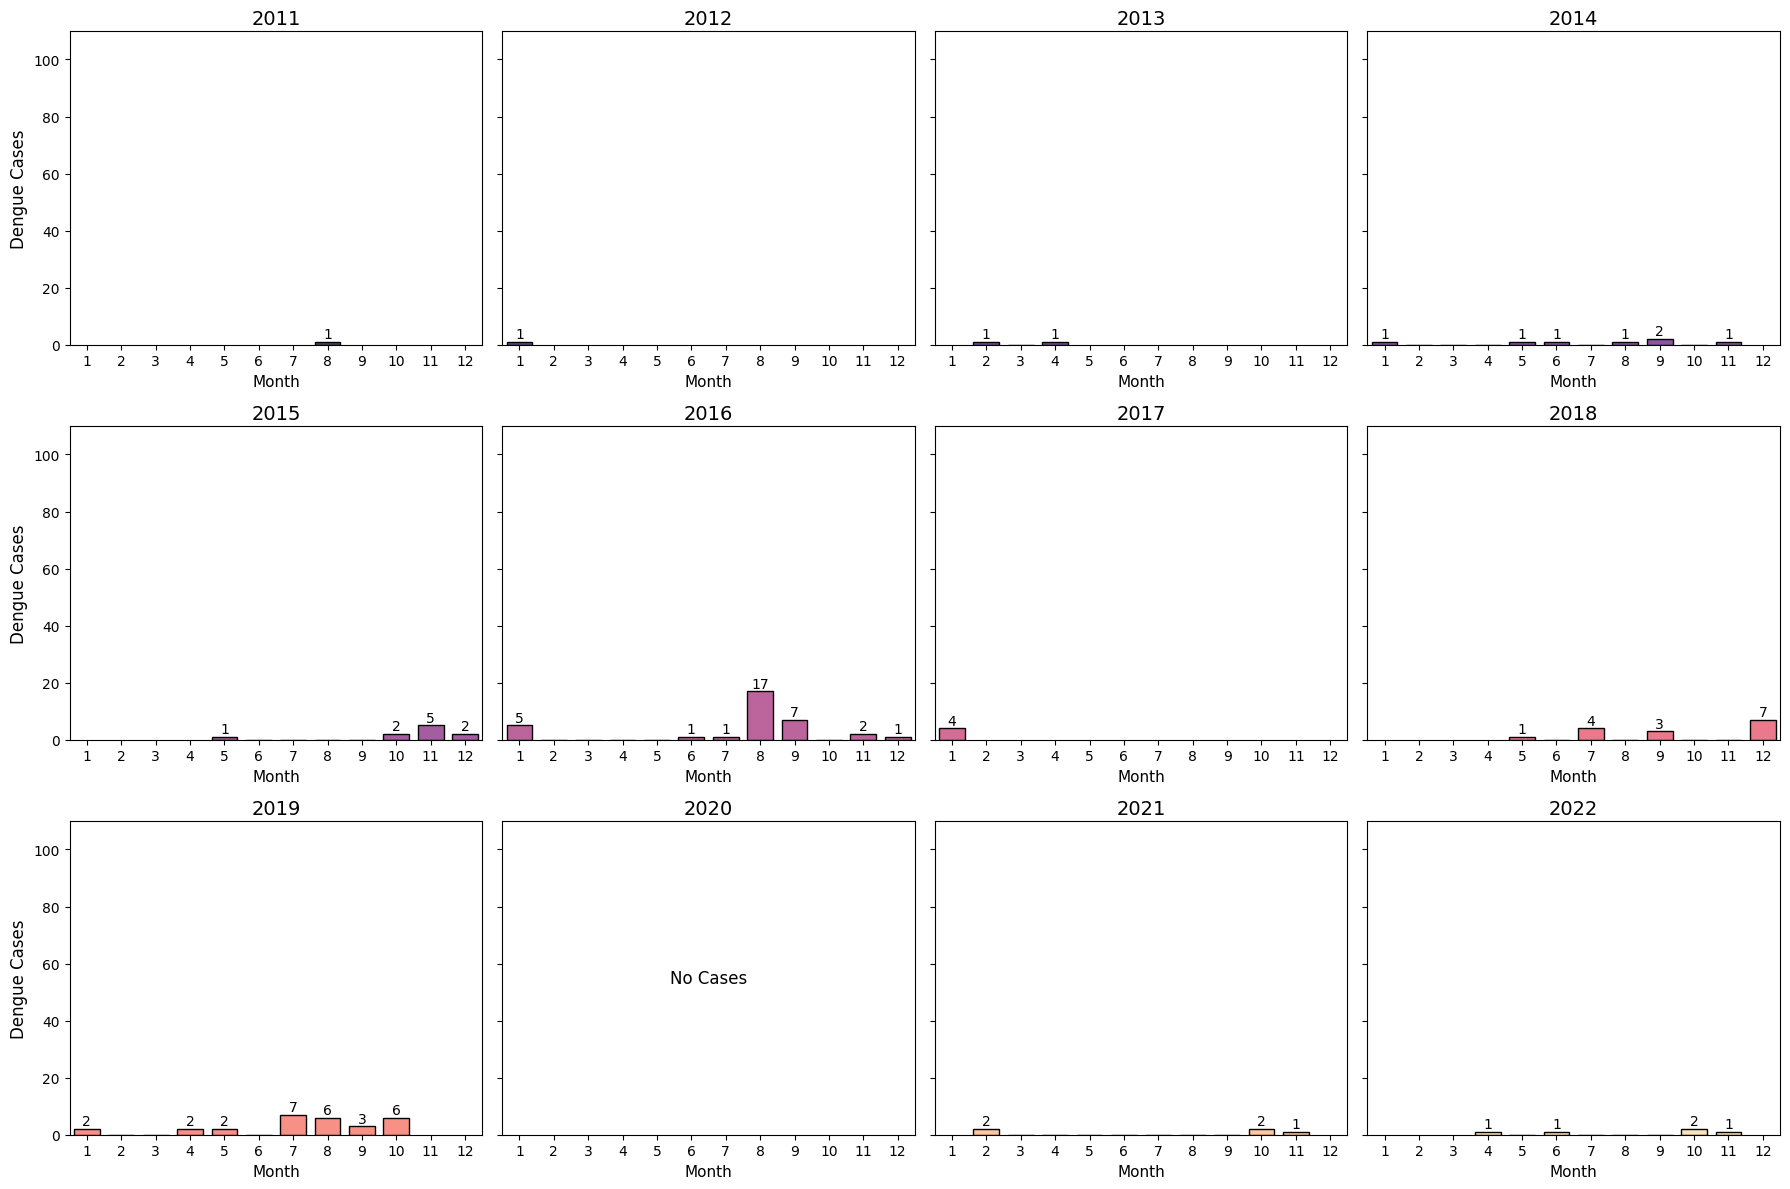

In [76]:
#HISTOGRAM FOR MONTHLY CASES EVERY YEAR
plot_dengue_cases(df, "PUGA-AN")

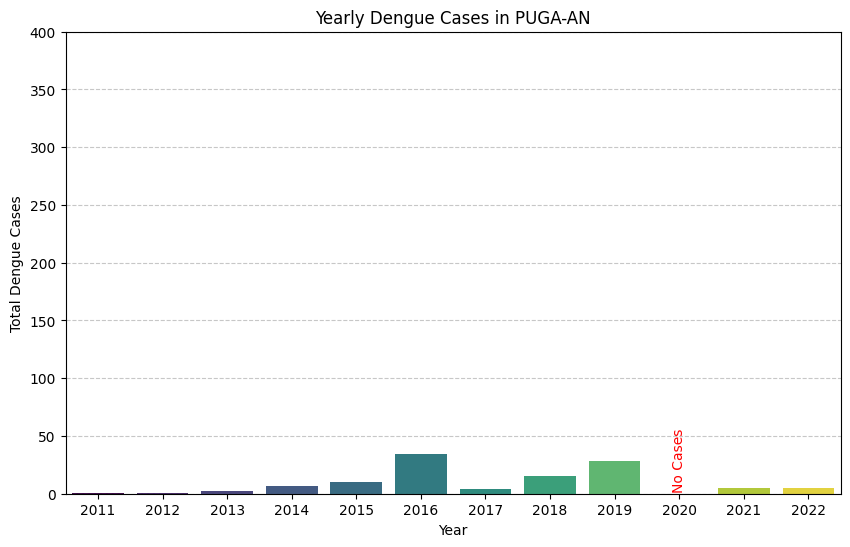

In [77]:
plot_total_dengue_cases_yearly(df, "PUGA-AN")

<div style="
    background-color: black; 
    color: white; 
    padding: 10px; 
    border-radius: 10px; 
    text-align: center;
    max-width: 100vw; 
    width: 100%;
    box-sizing: border-box;">
    ROGONGON MONTHLY CASES
</div>


In [78]:
selected_barangay = "ROGONGON"  # Change this to any barangay you want
barangay_data = get_selected_barangay(df, selected_barangay)

# Display the data for each year
for year, data in barangay_data.items():
    display(data)

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
26            26  ROGONGON  8.2395  124.4115  2011      1             0   
70            26  ROGONGON  8.2395  124.4115  2011      2             0   
114           26  ROGONGON  8.2395  124.4115  2011      3             0   
158           26  ROGONGON  8.2395  124.4115  2011      4             0   
202           26  ROGONGON  8.2395  124.4115  2011      5             0   
246           26  ROGONGON  8.2395  124.4115  2011      6             0   
290           26  ROGONGON  8.2395  124.4115  2011      7             0   
334           26  ROGONGON  8.2395  124.4115  2011      8             0   
378           26  ROGONGON  8.2395  124.4115  2011      9             0   
422           26  ROGONGON  8.2395  124.4115  2011     10             0   
466           26  ROGONGON  8.2395  124.4115  2011     11             0   
510           26  ROGONGON  8.2395  124.4115  2011     12             0   

     Temperature  Humidity  Rainfall  
26          23.8      88.1       7.0  
70          24.1      87.2      12.0  
114         25.3      85.5      20.0  
158         26.0      83.1      35.0  
202         27.2      81.9      55.0  
246         26.4      83.5      90.0  
290         25.7      84.7     110.0  
334         25.1      85.3      95.0  
378         24.4      86.2      70.0  
422         24.0      87.0      50.0  
466         23.6      88.4      30.0  
510         23.2      89.1      15.0

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
554            26  ROGONGON  8.2395  124.4115  2012      1             0   
598            26  ROGONGON  8.2395  124.4115  2012      2             0   
642            26  ROGONGON  8.2395  124.4115  2012      3             0   
686            26  ROGONGON  8.2395  124.4115  2012      4             0   
730            26  ROGONGON  8.2395  124.4115  2012      5             0   
774            26  ROGONGON  8.2395  124.4115  2012      6             0   
818            26  ROGONGON  8.2395  124.4115  2012      7             0   
862            26  ROGONGON  8.2395  124.4115  2012      8             0   
906            26  ROGONGON  8.2395  124.4115  2012      9             0   
950            26  ROGONGON  8.2395  124.4115  2012     10             0   
994            26  ROGONGON  8.2395  124.4115  2012     11             0   
1038           26  ROGONGON  8.2395  124.4115  2012     12             0   

      Temperature  Humidity  Rainfall  
554          24.3      85.1       4.0  
598          24.3      85.7       7.1  
642          24.6      83.3       3.1  
686          25.4      82.3       6.9  
730          25.1      86.4       6.9  
774          24.7      85.3       7.9  
818          24.9      85.2       6.4  
862          24.9      85.2       6.4  
906          24.1      88.1      11.4  
950          24.6      86.5       8.4  
994          24.8      84.8       4.1  
1038         24.7      84.8       5.7

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
1082           26  ROGONGON  8.2395  124.4115  2013      1             0   
1126           26  ROGONGON  8.2395  124.4115  2013      2             0   
1170           26  ROGONGON  8.2395  124.4115  2013      3             0   
1214           26  ROGONGON  8.2395  124.4115  2013      4             0   
1258           26  ROGONGON  8.2395  124.4115  2013      5             0   
1302           26  ROGONGON  8.2395  124.4115  2013      6             0   
1346           26  ROGONGON  8.2395  124.4115  2013      7             0   
1390           26  ROGONGON  8.2395  124.4115  2013      8             0   
1434           26  ROGONGON  8.2395  124.4115  2013      9             0   
1478           26  ROGONGON  8.2395  124.4115  2013     10             0   
1522           26  ROGONGON  8.2395  124.4115  2013     11             0   
1566           26  ROGONGON  8.2395  124.4115  2013     12             0   

      Temperature  Humidity  Rainfall  
1082         24.2      88.2       8.1  
1126         24.4      84.7       6.0  
1170         25.5      81.1       2.7  
1214         26.0      81.0       4.9  
1258         26.0      82.8       5.2  
1302         24.9      86.9       9.2  
1346         24.5      87.7      11.0  
1390         24.3      87.2       6.9  
1434         24.6      86.5       4.9  
1478         24.0      88.0      10.4  
1522         24.2      85.9       7.8  
1566         24.4      84.0       3.5

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
1610           26  ROGONGON  8.2395  124.4115  2014      1             0   
1654           26  ROGONGON  8.2395  124.4115  2014      2             0   
1698           26  ROGONGON  8.2395  124.4115  2014      3             0   
1742           26  ROGONGON  8.2395  124.4115  2014      4             0   
1786           26  ROGONGON  8.2395  124.4115  2014      5             0   
1830           26  ROGONGON  8.2395  124.4115  2014      6             0   
1874           26  ROGONGON  8.2395  124.4115  2014      7             0   
1918           26  ROGONGON  8.2395  124.4115  2014      8             0   
1962           26  ROGONGON  8.2395  124.4115  2014      9             0   
2006           26  ROGONGON  8.2395  124.4115  2014     10             1   
2050           26  ROGONGON  8.2395  124.4115  2014     11             0   
2094           26  ROGONGON  8.2395  124.4115  2014     12             0   

      Temperature  Humidity  Rainfall  
1610         23.2      86.4       6.8  
1654         23.7      82.4       2.3  
1698         24.3      82.5       3.8  
1742         25.1      81.4       2.0  
1786         25.3      84.0       4.9  
1830         24.5      87.1       6.6  
1874         23.4      89.1       8.5  
1918         23.9      87.7       8.0  
1962         23.4      88.5       7.1  
2006         23.9      88.4       8.5  
2050         24.7      85.2       6.1  
2094         24.0      85.3       4.9

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
2138           26  ROGONGON  8.2395  124.4115  2015      1             0   
2182           26  ROGONGON  8.2395  124.4115  2015      2             0   
2226           26  ROGONGON  8.2395  124.4115  2015      3             0   
2270           26  ROGONGON  8.2395  124.4115  2015      4             0   
2314           26  ROGONGON  8.2395  124.4115  2015      5             0   
2358           26  ROGONGON  8.2395  124.4115  2015      6             0   
2402           26  ROGONGON  8.2395  124.4115  2015      7             0   
2446           26  ROGONGON  8.2395  124.4115  2015      8             0   
2490           26  ROGONGON  8.2395  124.4115  2015      9             0   
2534           26  ROGONGON  8.2395  124.4115  2015     10             0   
2578           26  ROGONGON  8.2395  124.4115  2015     11             0   
2622           26  ROGONGON  8.2395  124.4115  2015     12             0   

      Temperature  Humidity  Rainfall  
2138         25.6      89.0       5.9  
2182         25.6      87.0       3.0  
2226         26.1      83.2       1.1  
2270         27.3      82.8       2.1  
2314         28.4      78.1       2.7  
2358         27.4      81.9       8.7  
2402         27.6      80.4       4.2  
2446         27.5      80.9       5.5  
2490         27.2      82.4       8.2  
2534         27.2      83.4       4.9  
2578         26.8      87.3       6.5  
2622         26.5      87.1       4.8

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
2666           26  ROGONGON  8.2395  124.4115  2016      1             0   
2710           26  ROGONGON  8.2395  124.4115  2016      2             1   
2754           26  ROGONGON  8.2395  124.4115  2016      3             0   
2798           26  ROGONGON  8.2395  124.4115  2016      4             0   
2842           26  ROGONGON  8.2395  124.4115  2016      5             0   
2886           26  ROGONGON  8.2395  124.4115  2016      6             0   
2930           26  ROGONGON  8.2395  124.4115  2016      7             0   
2974           26  ROGONGON  8.2395  124.4115  2016      8             1   
3018           26  ROGONGON  8.2395  124.4115  2016      9             1   
3062           26  ROGONGON  8.2395  124.4115  2016     10             0   
3106           26  ROGONGON  8.2395  124.4115  2016     11             0   
3150           26  ROGONGON  8.2395  124.4115  2016     12             1   

      Temperature  Humidity  Rainfall  
2666         26.2      86.9       1.6  
2710         26.1      88.2       2.6  
2754         26.8      84.4       0.4  
2798         28.1      80.1       1.5  
2842         28.3      81.9       8.3  
2886         27.5      83.9      12.5  
2930         27.6      82.0       5.2  
2974         27.8      80.3       2.7  
3018         27.2      82.4       6.2  
3062         27.1      84.6       8.9  
3106         26.5      86.6       7.6  
3150         26.7      86.9       8.2

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
3194           26  ROGONGON  8.2395  124.4115  2017      1             0   
3238           26  ROGONGON  8.2395  124.4115  2017      2             0   
3282           26  ROGONGON  8.2395  124.4115  2017      3             0   
3326           26  ROGONGON  8.2395  124.4115  2017      4             0   
3370           26  ROGONGON  8.2395  124.4115  2017      5             0   
3414           26  ROGONGON  8.2395  124.4115  2017      6             0   
3458           26  ROGONGON  8.2395  124.4115  2017      7             0   
3502           26  ROGONGON  8.2395  124.4115  2017      8             0   
3546           26  ROGONGON  8.2395  124.4115  2017      9             0   
3590           26  ROGONGON  8.2395  124.4115  2017     10             0   
3634           26  ROGONGON  8.2395  124.4115  2017     11             0   
3678           26  ROGONGON  8.2395  124.4115  2017     12             0   

      Temperature  Humidity  Rainfall  
3194         25.9      88.9      12.5  
3238         25.6      87.8       5.9  
3282         26.1      87.4       8.0  
3326         27.2      85.0       5.1  
3370         27.8      84.4      10.4  
3414         27.4      83.8       7.8  
3458         27.2      82.6       9.1  
3502         27.9      83.4       9.6  
3546         27.3      83.3      11.4  
3590         27.0      84.0       8.3  
3634         27.0      86.6       7.3  
3678         26.7      85.9       9.6

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
3722           26  ROGONGON  8.2395  124.4115  2018      1             0   
3766           26  ROGONGON  8.2395  124.4115  2018      2             0   
3810           26  ROGONGON  8.2395  124.4115  2018      3             0   
3854           26  ROGONGON  8.2395  124.4115  2018      4             0   
3898           26  ROGONGON  8.2395  124.4115  2018      5             0   
3942           26  ROGONGON  8.2395  124.4115  2018      6             0   
3986           26  ROGONGON  8.2395  124.4115  2018      7             1   
4030           26  ROGONGON  8.2395  124.4115  2018      8             0   
4074           26  ROGONGON  8.2395  124.4115  2018      9             0   
4118           26  ROGONGON  8.2395  124.4115  2018     10             1   
4162           26  ROGONGON  8.2395  124.4115  2018     11             1   
4206           26  ROGONGON  8.2395  124.4115  2018     12             0   

      Temperature  Humidity  Rainfall  
3722         26.2      87.5       7.3  
3766         26.4      86.0       9.7  
3810         26.5      84.6       3.7  
3854         27.4      82.5       2.6  
3898         27.9      82.0       6.9  
3942         27.7      80.7       5.2  
3986         27.3      81.6       4.7  
4030         27.4      79.8       2.1  
4074         26.9      82.2       5.4  
4118         27.2      82.7       4.2  
4162         26.5      86.6       6.1  
4206         26.3      88.1       5.8

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
4250           26  ROGONGON  8.2395  124.4115  2019      1             0   
4294           26  ROGONGON  8.2395  124.4115  2019      2             4   
4338           26  ROGONGON  8.2395  124.4115  2019      3             0   
4382           26  ROGONGON  8.2395  124.4115  2019      4             0   
4426           26  ROGONGON  8.2395  124.4115  2019      5             0   
4470           26  ROGONGON  8.2395  124.4115  2019      6             0   
4514           26  ROGONGON  8.2395  124.4115  2019      7             0   
4558           26  ROGONGON  8.2395  124.4115  2019      8             2   
4602           26  ROGONGON  8.2395  124.4115  2019      9             0   
4646           26  ROGONGON  8.2395  124.4115  2019     10             3   
4690           26  ROGONGON  8.2395  124.4115  2019     11             0   
4734           26  ROGONGON  8.2395  124.4115  2019     12             2   

      Temperature  Humidity  Rainfall  
4250         25.5      88.2       5.7  
4294         25.3      84.3       1.1  
4338         26.1      83.2       1.9  
4382         27.5      80.3       1.8  
4426         28.4      78.6       4.4  
4470         27.8      82.7       9.1  
4514         27.2      82.1       6.2  
4558         27.7      77.1       1.4  
4602         27.8      78.2       3.3  
4646         27.0      83.8       7.7  
4690         27.1      82.9       4.3  
4734         26.4      86.4       4.2

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
4778           26  ROGONGON  8.2395  124.4115  2020      1             4   
4822           26  ROGONGON  8.2395  124.4115  2020      2             0   
4866           26  ROGONGON  8.2395  124.4115  2020      3             0   
4910           26  ROGONGON  8.2395  124.4115  2020      4             0   
4954           26  ROGONGON  8.2395  124.4115  2020      5             0   
4998           26  ROGONGON  8.2395  124.4115  2020      6             0   
5042           26  ROGONGON  8.2395  124.4115  2020      7             0   
5086           26  ROGONGON  8.2395  124.4115  2020      8             0   
5130           26  ROGONGON  8.2395  124.4115  2020      9             0   
5174           26  ROGONGON  8.2395  124.4115  2020     10             0   
5218           26  ROGONGON  8.2395  124.4115  2020     11             2   
5262           26  ROGONGON  8.2395  124.4115  2020     12             0   

      Temperature  Humidity  Rainfall  
4778         26.3      86.8       2.1  
4822         25.7      87.2       3.5  
4866         26.4      85.2       2.0  
4910         27.2      81.6       1.0  
4954         28.0      83.2       9.8  
4998         27.3      84.1      14.1  
5042         27.0      83.9      15.7  
5086         27.2      82.9      11.7  
5130         27.2      83.7       9.2  
5174         26.9      84.2      13.2  
5218         26.8      86.2       5.5  
5262         26.7      86.6       8.2

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
5306           26  ROGONGON  8.2395  124.4115  2021      1             0   
5350           26  ROGONGON  8.2395  124.4115  2021      2             0   
5394           26  ROGONGON  8.2395  124.4115  2021      3             0   
5438           26  ROGONGON  8.2395  124.4115  2021      4             0   
5482           26  ROGONGON  8.2395  124.4115  2021      5             0   
5526           26  ROGONGON  8.2395  124.4115  2021      6             0   
5570           26  ROGONGON  8.2395  124.4115  2021      7             0   
5614           26  ROGONGON  8.2395  124.4115  2021      8             0   
5658           26  ROGONGON  8.2395  124.4115  2021      9             0   
5702           26  ROGONGON  8.2395  124.4115  2021     10             0   
5746           26  ROGONGON  8.2395  124.4115  2021     11             0   
5790           26  ROGONGON  8.2395  124.4115  2021     12             0   

      Temperature  Humidity  Rainfall  
5306         25.9      88.5      11.9  
5350         26.0      87.1      12.6  
5394         26.8      84.7       5.5  
5438         27.1      82.5       4.5  
5482         27.5      84.0      10.7  
5526         27.6      81.3       8.2  
5570         27.7      80.0       4.4  
5614         27.5      80.0       6.5  
5658         27.2      82.7       9.5  
5702         27.3      83.6       8.7  
5746         27.0      86.4       9.4  
5790         26.2      86.9       9.8

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
5834           26  ROGONGON  8.2395  124.4115  2022      1             0   
5878           26  ROGONGON  8.2395  124.4115  2022      2             0   
5922           26  ROGONGON  8.2395  124.4115  2022      3             0   
5966           26  ROGONGON  8.2395  124.4115  2022      4             0   
6010           26  ROGONGON  8.2395  124.4115  2022      5             0   
6054           26  ROGONGON  8.2395  124.4115  2022      6             0   
6098           26  ROGONGON  8.2395  124.4115  2022      7             1   
6142           26  ROGONGON  8.2395  124.4115  2022      8             0   
6186           26  ROGONGON  8.2395  124.4115  2022      9             0   
6230           26  ROGONGON  8.2395  124.4115  2022     10             0   
6274           26  ROGONGON  8.2395  124.4115  2022     11             1   
6318           26  ROGONGON  8.2395  124.4115  2022     12             0   

      Temperature  Humidity  Rainfall  
5834         26.0      86.9       8.3  
5878         26.0      87.2       3.9  
5922         26.8      86.5      11.0  
5966         26.8      86.5      12.2  
6010         27.4      83.9      11.5  
6054         27.6      81.9       7.1  
6098         27.4      83.2      11.6  
6142         27.3      82.0       7.9  
6186         27.5      81.1       6.1  
6230         27.1      84.2       9.0  
6274         27.0      85.8       6.6  
6318         26.4      87.1      14.5

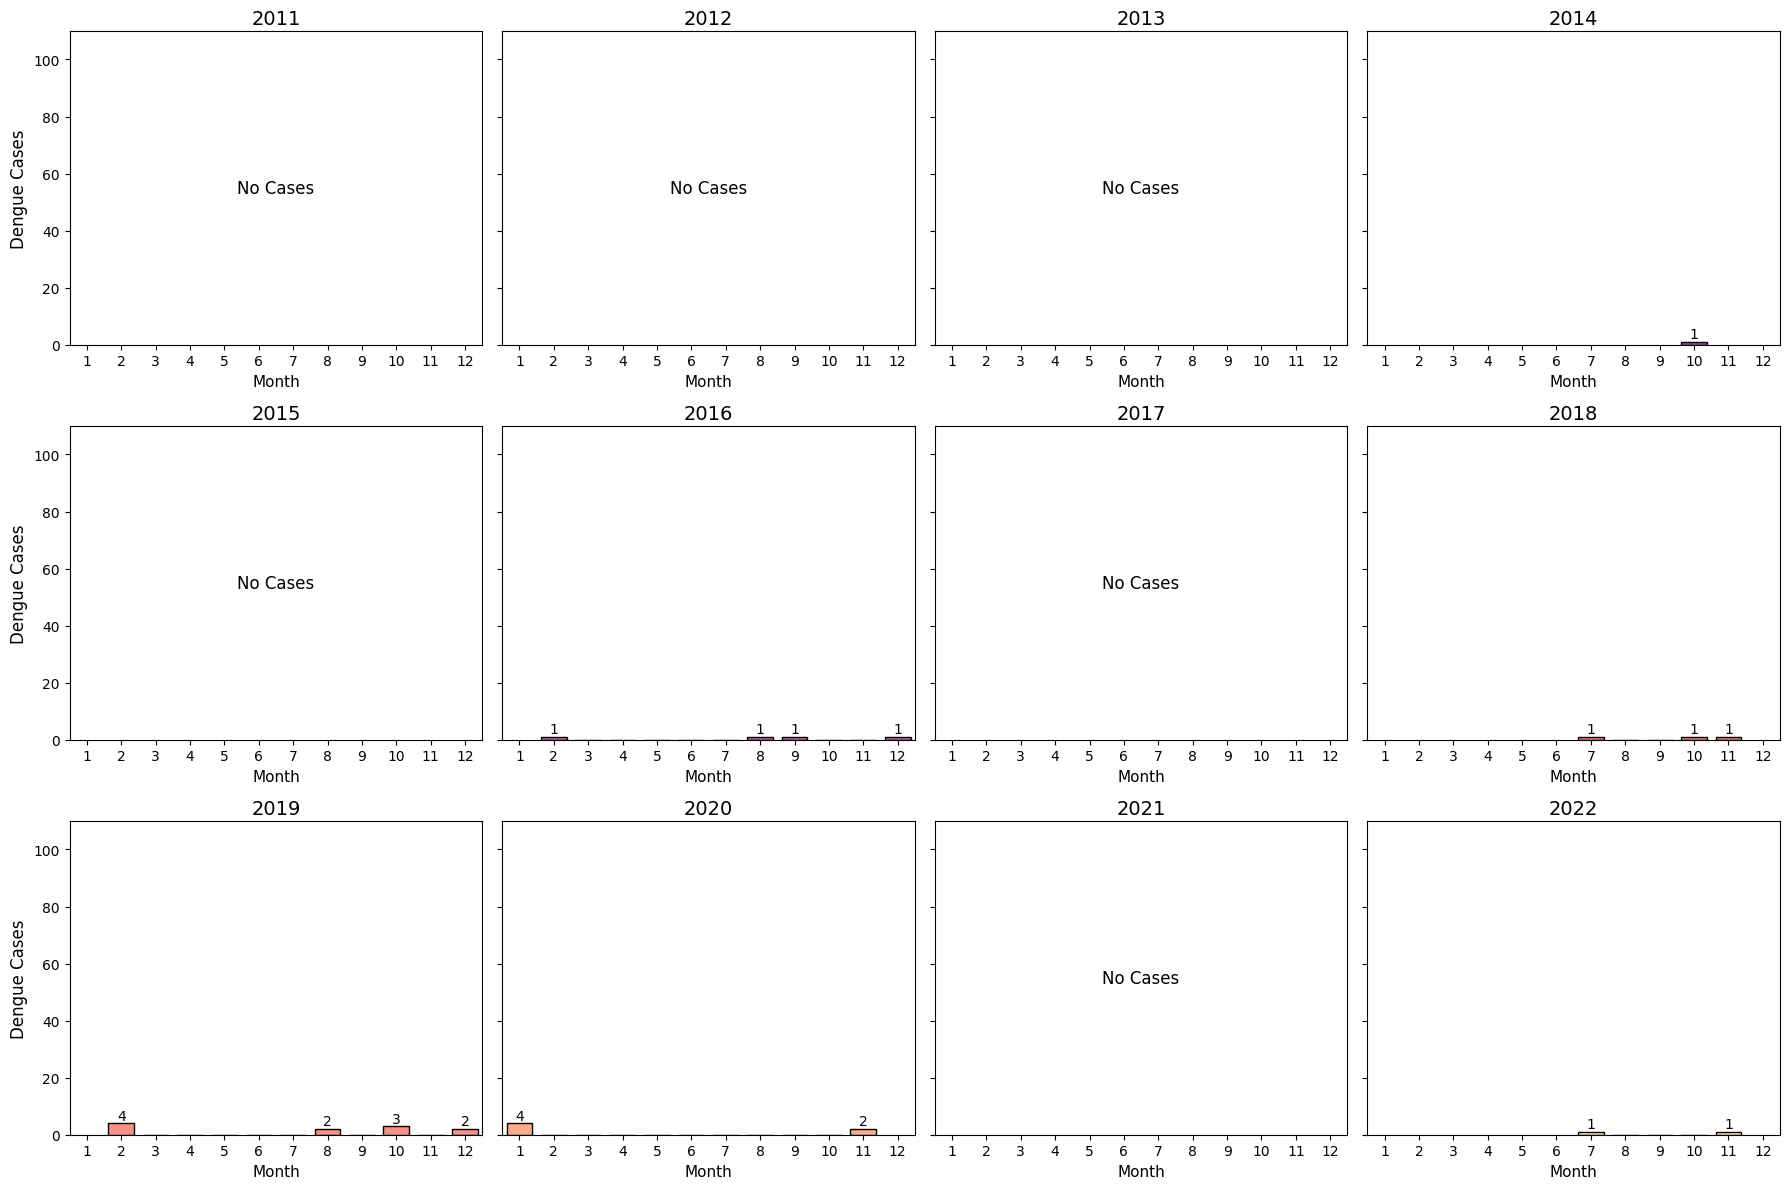

In [79]:
#HISTOGRAM FOR MONTHLY CASES EVERY YEAR
plot_dengue_cases(df, "ROGONGON")

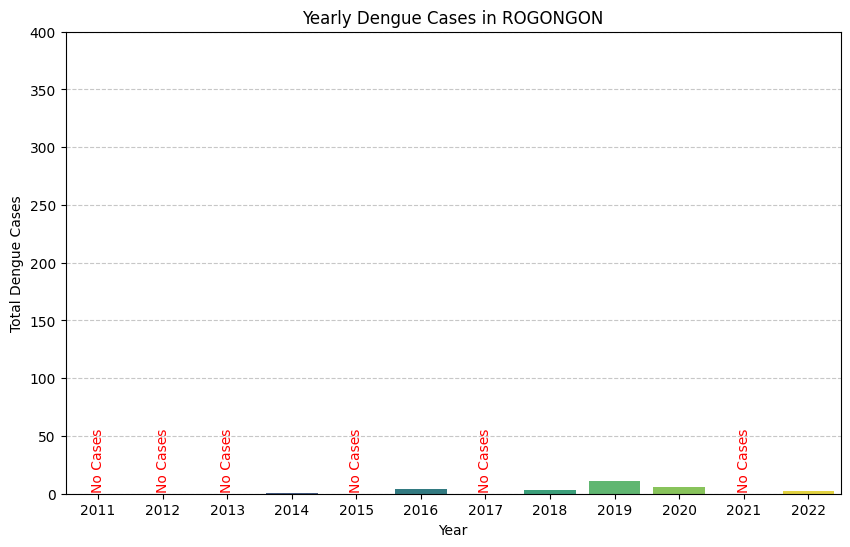

In [80]:
plot_total_dengue_cases_yearly(df, "ROGONGON")

<div style="
    background-color: black; 
    color: white; 
    padding: 10px; 
    border-radius: 10px; 
    text-align: center;
    max-width: 100vw; 
    width: 100%;
    box-sizing: border-box;">
    SAN MIGUEL MONTHLY CASES
</div>


In [81]:
selected_barangay = "SAN MIGUEL"  # Change this to any barangay you want
barangay_data = get_selected_barangay(df, selected_barangay)

# Display the data for each year
for year, data in barangay_data.items():
    display(data)

Barangay_No    Barangay       x         y  Year  Month  Dengue Cases  \
27            27  SAN MIGUEL  8.2387  124.2479  2011      1             3   
71            27  SAN MIGUEL  8.2387  124.2479  2011      2             0   
115           27  SAN MIGUEL  8.2387  124.2479  2011      3             0   
159           27  SAN MIGUEL  8.2387  124.2479  2011      4             0   
203           27  SAN MIGUEL  8.2387  124.2479  2011      5             0   
247           27  SAN MIGUEL  8.2387  124.2479  2011      6             0   
291           27  SAN MIGUEL  8.2387  124.2479  2011      7             1   
335           27  SAN MIGUEL  8.2387  124.2479  2011      8             0   
379           27  SAN MIGUEL  8.2387  124.2479  2011      9             0   
423           27  SAN MIGUEL  8.2387  124.2479  2011     10             0   
467           27  SAN MIGUEL  8.2387  124.2479  2011     11             0   
511           27  SAN MIGUEL  8.2387  124.2479  2011     12             0   

     Temperature  Humidity  Rainfall  
27          23.8      88.1       7.0  
71          24.1      87.2      12.0  
115         25.3      85.5      20.0  
159         26.0      83.1      35.0  
203         27.2      81.9      55.0  
247         26.4      83.5      90.0  
291         25.7      84.7     110.0  
335         25.1      85.3      95.0  
379         24.4      86.2      70.0  
423         24.0      87.0      50.0  
467         23.6      88.4      30.0  
511         23.2      89.1      15.0

Barangay_No    Barangay       x         y  Year  Month  Dengue Cases  \
555            27  SAN MIGUEL  8.2387  124.2479  2012      1             0   
599            27  SAN MIGUEL  8.2387  124.2479  2012      2             0   
643            27  SAN MIGUEL  8.2387  124.2479  2012      3             1   
687            27  SAN MIGUEL  8.2387  124.2479  2012      4             0   
731            27  SAN MIGUEL  8.2387  124.2479  2012      5             1   
775            27  SAN MIGUEL  8.2387  124.2479  2012      6             0   
819            27  SAN MIGUEL  8.2387  124.2479  2012      7             0   
863            27  SAN MIGUEL  8.2387  124.2479  2012      8             0   
907            27  SAN MIGUEL  8.2387  124.2479  2012      9             1   
951            27  SAN MIGUEL  8.2387  124.2479  2012     10             0   
995            27  SAN MIGUEL  8.2387  124.2479  2012     11             0   
1039           27  SAN MIGUEL  8.2387  124.2479  2012     12             0   

      Temperature  Humidity  Rainfall  
555          24.3      85.1       4.0  
599          24.3      85.7       7.1  
643          24.6      83.3       3.1  
687          25.4      82.3       6.9  
731          25.1      86.4       6.9  
775          24.7      85.3       7.9  
819          24.9      85.2       6.4  
863          24.9      85.2       6.4  
907          24.1      88.1      11.4  
951          24.6      86.5       8.4  
995          24.8      84.8       4.1  
1039         24.7      84.8       5.7

Barangay_No    Barangay       x         y  Year  Month  Dengue Cases  \
1083           27  SAN MIGUEL  8.2387  124.2479  2013      1             1   
1127           27  SAN MIGUEL  8.2387  124.2479  2013      2             2   
1171           27  SAN MIGUEL  8.2387  124.2479  2013      3             1   
1215           27  SAN MIGUEL  8.2387  124.2479  2013      4             1   
1259           27  SAN MIGUEL  8.2387  124.2479  2013      5             0   
1303           27  SAN MIGUEL  8.2387  124.2479  2013      6             0   
1347           27  SAN MIGUEL  8.2387  124.2479  2013      7             1   
1391           27  SAN MIGUEL  8.2387  124.2479  2013      8             0   
1435           27  SAN MIGUEL  8.2387  124.2479  2013      9             2   
1479           27  SAN MIGUEL  8.2387  124.2479  2013     10             1   
1523           27  SAN MIGUEL  8.2387  124.2479  2013     11             1   
1567           27  SAN MIGUEL  8.2387  124.2479  2013     12             0   

      Temperature  Humidity  Rainfall  
1083         24.2      88.2       8.1  
1127         24.4      84.7       6.0  
1171         25.5      81.1       2.7  
1215         26.0      81.0       4.9  
1259         26.0      82.8       5.2  
1303         24.9      86.9       9.2  
1347         24.5      87.7      11.0  
1391         24.3      87.2       6.9  
1435         24.6      86.5       4.9  
1479         24.0      88.0      10.4  
1523         24.2      85.9       7.8  
1567         24.4      84.0       3.5

Barangay_No    Barangay       x         y  Year  Month  Dengue Cases  \
1611           27  SAN MIGUEL  8.2387  124.2479  2014      1             1   
1655           27  SAN MIGUEL  8.2387  124.2479  2014      2             6   
1699           27  SAN MIGUEL  8.2387  124.2479  2014      3             0   
1743           27  SAN MIGUEL  8.2387  124.2479  2014      4             1   
1787           27  SAN MIGUEL  8.2387  124.2479  2014      5             1   
1831           27  SAN MIGUEL  8.2387  124.2479  2014      6             5   
1875           27  SAN MIGUEL  8.2387  124.2479  2014      7             3   
1919           27  SAN MIGUEL  8.2387  124.2479  2014      8             4   
1963           27  SAN MIGUEL  8.2387  124.2479  2014      9             2   
2007           27  SAN MIGUEL  8.2387  124.2479  2014     10             3   
2051           27  SAN MIGUEL  8.2387  124.2479  2014     11             1   
2095           27  SAN MIGUEL  8.2387  124.2479  2014     12             1   

      Temperature  Humidity  Rainfall  
1611         23.2      86.4       6.8  
1655         23.7      82.4       2.3  
1699         24.3      82.5       3.8  
1743         25.1      81.4       2.0  
1787         25.3      84.0       4.9  
1831         24.5      87.1       6.6  
1875         23.4      89.1       8.5  
1919         23.9      87.7       8.0  
1963         23.4      88.5       7.1  
2007         23.9      88.4       8.5  
2051         24.7      85.2       6.1  
2095         24.0      85.3       4.9

Barangay_No    Barangay       x         y  Year  Month  Dengue Cases  \
2139           27  SAN MIGUEL  8.2387  124.2479  2015      1             2   
2183           27  SAN MIGUEL  8.2387  124.2479  2015      2             6   
2227           27  SAN MIGUEL  8.2387  124.2479  2015      3             0   
2271           27  SAN MIGUEL  8.2387  124.2479  2015      4             0   
2315           27  SAN MIGUEL  8.2387  124.2479  2015      5             0   
2359           27  SAN MIGUEL  8.2387  124.2479  2015      6             0   
2403           27  SAN MIGUEL  8.2387  124.2479  2015      7             2   
2447           27  SAN MIGUEL  8.2387  124.2479  2015      8            11   
2491           27  SAN MIGUEL  8.2387  124.2479  2015      9             7   
2535           27  SAN MIGUEL  8.2387  124.2479  2015     10             9   
2579           27  SAN MIGUEL  8.2387  124.2479  2015     11             0   
2623           27  SAN MIGUEL  8.2387  124.2479  2015     12             3   

      Temperature  Humidity  Rainfall  
2139         25.6      89.0       5.9  
2183         25.6      87.0       3.0  
2227         26.1      83.2       1.1  
2271         27.3      82.8       2.1  
2315         28.4      78.1       2.7  
2359         27.4      81.9       8.7  
2403         27.6      80.4       4.2  
2447         27.5      80.9       5.5  
2491         27.2      82.4       8.2  
2535         27.2      83.4       4.9  
2579         26.8      87.3       6.5  
2623         26.5      87.1       4.8

Barangay_No    Barangay       x         y  Year  Month  Dengue Cases  \
2667           27  SAN MIGUEL  8.2387  124.2479  2016      1             5   
2711           27  SAN MIGUEL  8.2387  124.2479  2016      2             5   
2755           27  SAN MIGUEL  8.2387  124.2479  2016      3             1   
2799           27  SAN MIGUEL  8.2387  124.2479  2016      4             3   
2843           27  SAN MIGUEL  8.2387  124.2479  2016      5             1   
2887           27  SAN MIGUEL  8.2387  124.2479  2016      6             6   
2931           27  SAN MIGUEL  8.2387  124.2479  2016      7             4   
2975           27  SAN MIGUEL  8.2387  124.2479  2016      8            10   
3019           27  SAN MIGUEL  8.2387  124.2479  2016      9             3   
3063           27  SAN MIGUEL  8.2387  124.2479  2016     10             3   
3107           27  SAN MIGUEL  8.2387  124.2479  2016     11             6   
3151           27  SAN MIGUEL  8.2387  124.2479  2016     12             4   

      Temperature  Humidity  Rainfall  
2667         26.2      86.9       1.6  
2711         26.1      88.2       2.6  
2755         26.8      84.4       0.4  
2799         28.1      80.1       1.5  
2843         28.3      81.9       8.3  
2887         27.5      83.9      12.5  
2931         27.6      82.0       5.2  
2975         27.8      80.3       2.7  
3019         27.2      82.4       6.2  
3063         27.1      84.6       8.9  
3107         26.5      86.6       7.6  
3151         26.7      86.9       8.2

Barangay_No    Barangay       x         y  Year  Month  Dengue Cases  \
3195           27  SAN MIGUEL  8.2387  124.2479  2017      1             2   
3239           27  SAN MIGUEL  8.2387  124.2479  2017      2             1   
3283           27  SAN MIGUEL  8.2387  124.2479  2017      3             1   
3327           27  SAN MIGUEL  8.2387  124.2479  2017      4             1   
3371           27  SAN MIGUEL  8.2387  124.2479  2017      5             0   
3415           27  SAN MIGUEL  8.2387  124.2479  2017      6             1   
3459           27  SAN MIGUEL  8.2387  124.2479  2017      7             2   
3503           27  SAN MIGUEL  8.2387  124.2479  2017      8             1   
3547           27  SAN MIGUEL  8.2387  124.2479  2017      9             0   
3591           27  SAN MIGUEL  8.2387  124.2479  2017     10             0   
3635           27  SAN MIGUEL  8.2387  124.2479  2017     11             1   
3679           27  SAN MIGUEL  8.2387  124.2479  2017     12             0   

      Temperature  Humidity  Rainfall  
3195         25.9      88.9      12.5  
3239         25.6      87.8       5.9  
3283         26.1      87.4       8.0  
3327         27.2      85.0       5.1  
3371         27.8      84.4      10.4  
3415         27.4      83.8       7.8  
3459         27.2      82.6       9.1  
3503         27.9      83.4       9.6  
3547         27.3      83.3      11.4  
3591         27.0      84.0       8.3  
3635         27.0      86.6       7.3  
3679         26.7      85.9       9.6

Barangay_No    Barangay       x         y  Year  Month  Dengue Cases  \
3723           27  SAN MIGUEL  8.2387  124.2479  2018      1             3   
3767           27  SAN MIGUEL  8.2387  124.2479  2018      2             0   
3811           27  SAN MIGUEL  8.2387  124.2479  2018      3             0   
3855           27  SAN MIGUEL  8.2387  124.2479  2018      4             0   
3899           27  SAN MIGUEL  8.2387  124.2479  2018      5             0   
3943           27  SAN MIGUEL  8.2387  124.2479  2018      6             0   
3987           27  SAN MIGUEL  8.2387  124.2479  2018      7             1   
4031           27  SAN MIGUEL  8.2387  124.2479  2018      8             2   
4075           27  SAN MIGUEL  8.2387  124.2479  2018      9             3   
4119           27  SAN MIGUEL  8.2387  124.2479  2018     10             3   
4163           27  SAN MIGUEL  8.2387  124.2479  2018     11             8   
4207           27  SAN MIGUEL  8.2387  124.2479  2018     12             4   

      Temperature  Humidity  Rainfall  
3723         26.2      87.5       7.3  
3767         26.4      86.0       9.7  
3811         26.5      84.6       3.7  
3855         27.4      82.5       2.6  
3899         27.9      82.0       6.9  
3943         27.7      80.7       5.2  
3987         27.3      81.6       4.7  
4031         27.4      79.8       2.1  
4075         26.9      82.2       5.4  
4119         27.2      82.7       4.2  
4163         26.5      86.6       6.1  
4207         26.3      88.1       5.8

Barangay_No    Barangay       x         y  Year  Month  Dengue Cases  \
4251           27  SAN MIGUEL  8.2387  124.2479  2019      1            13   
4295           27  SAN MIGUEL  8.2387  124.2479  2019      2             6   
4339           27  SAN MIGUEL  8.2387  124.2479  2019      3             6   
4383           27  SAN MIGUEL  8.2387  124.2479  2019      4             0   
4427           27  SAN MIGUEL  8.2387  124.2479  2019      5             5   
4471           27  SAN MIGUEL  8.2387  124.2479  2019      6             6   
4515           27  SAN MIGUEL  8.2387  124.2479  2019      7            21   
4559           27  SAN MIGUEL  8.2387  124.2479  2019      8            26   
4603           27  SAN MIGUEL  8.2387  124.2479  2019      9            12   
4647           27  SAN MIGUEL  8.2387  124.2479  2019     10            12   
4691           27  SAN MIGUEL  8.2387  124.2479  2019     11             9   
4735           27  SAN MIGUEL  8.2387  124.2479  2019     12             3   

      Temperature  Humidity  Rainfall  
4251         25.5      88.2       5.7  
4295         25.3      84.3       1.1  
4339         26.1      83.2       1.9  
4383         27.5      80.3       1.8  
4427         28.4      78.6       4.4  
4471         27.8      82.7       9.1  
4515         27.2      82.1       6.2  
4559         27.7      77.1       1.4  
4603         27.8      78.2       3.3  
4647         27.0      83.8       7.7  
4691         27.1      82.9       4.3  
4735         26.4      86.4       4.2

Barangay_No    Barangay       x         y  Year  Month  Dengue Cases  \
4779           27  SAN MIGUEL  8.2387  124.2479  2020      1             6   
4823           27  SAN MIGUEL  8.2387  124.2479  2020      2            12   
4867           27  SAN MIGUEL  8.2387  124.2479  2020      3             4   
4911           27  SAN MIGUEL  8.2387  124.2479  2020      4             0   
4955           27  SAN MIGUEL  8.2387  124.2479  2020      5             2   
4999           27  SAN MIGUEL  8.2387  124.2479  2020      6             2   
5043           27  SAN MIGUEL  8.2387  124.2479  2020      7             2   
5087           27  SAN MIGUEL  8.2387  124.2479  2020      8             0   
5131           27  SAN MIGUEL  8.2387  124.2479  2020      9             0   
5175           27  SAN MIGUEL  8.2387  124.2479  2020     10             0   
5219           27  SAN MIGUEL  8.2387  124.2479  2020     11             0   
5263           27  SAN MIGUEL  8.2387  124.2479  2020     12             0   

      Temperature  Humidity  Rainfall  
4779         26.3      86.8       2.1  
4823         25.7      87.2       3.5  
4867         26.4      85.2       2.0  
4911         27.2      81.6       1.0  
4955         28.0      83.2       9.8  
4999         27.3      84.1      14.1  
5043         27.0      83.9      15.7  
5087         27.2      82.9      11.7  
5131         27.2      83.7       9.2  
5175         26.9      84.2      13.2  
5219         26.8      86.2       5.5  
5263         26.7      86.6       8.2

Barangay_No    Barangay       x         y  Year  Month  Dengue Cases  \
5307           27  SAN MIGUEL  8.2387  124.2479  2021      1             1   
5351           27  SAN MIGUEL  8.2387  124.2479  2021      2             3   
5395           27  SAN MIGUEL  8.2387  124.2479  2021      3             0   
5439           27  SAN MIGUEL  8.2387  124.2479  2021      4             1   
5483           27  SAN MIGUEL  8.2387  124.2479  2021      5             0   
5527           27  SAN MIGUEL  8.2387  124.2479  2021      6             2   
5571           27  SAN MIGUEL  8.2387  124.2479  2021      7             4   
5615           27  SAN MIGUEL  8.2387  124.2479  2021      8             1   
5659           27  SAN MIGUEL  8.2387  124.2479  2021      9             1   
5703           27  SAN MIGUEL  8.2387  124.2479  2021     10             4   
5747           27  SAN MIGUEL  8.2387  124.2479  2021     11             1   
5791           27  SAN MIGUEL  8.2387  124.2479  2021     12             4   

      Temperature  Humidity  Rainfall  
5307         25.9      88.5      11.9  
5351         26.0      87.1      12.6  
5395         26.8      84.7       5.5  
5439         27.1      82.5       4.5  
5483         27.5      84.0      10.7  
5527         27.6      81.3       8.2  
5571         27.7      80.0       4.4  
5615         27.5      80.0       6.5  
5659         27.2      82.7       9.5  
5703         27.3      83.6       8.7  
5747         27.0      86.4       9.4  
5791         26.2      86.9       9.8

Barangay_No    Barangay       x         y  Year  Month  Dengue Cases  \
5835           27  SAN MIGUEL  8.2387  124.2479  2022      1             1   
5879           27  SAN MIGUEL  8.2387  124.2479  2022      2             1   
5923           27  SAN MIGUEL  8.2387  124.2479  2022      3             1   
5967           27  SAN MIGUEL  8.2387  124.2479  2022      4             1   
6011           27  SAN MIGUEL  8.2387  124.2479  2022      5             1   
6055           27  SAN MIGUEL  8.2387  124.2479  2022      6             1   
6099           27  SAN MIGUEL  8.2387  124.2479  2022      7             7   
6143           27  SAN MIGUEL  8.2387  124.2479  2022      8             2   
6187           27  SAN MIGUEL  8.2387  124.2479  2022      9             0   
6231           27  SAN MIGUEL  8.2387  124.2479  2022     10             0   
6275           27  SAN MIGUEL  8.2387  124.2479  2022     11             0   
6319           27  SAN MIGUEL  8.2387  124.2479  2022     12             0   

      Temperature  Humidity  Rainfall  
5835         26.0      86.9       8.3  
5879         26.0      87.2       3.9  
5923         26.8      86.5      11.0  
5967         26.8      86.5      12.2  
6011         27.4      83.9      11.5  
6055         27.6      81.9       7.1  
6099         27.4      83.2      11.6  
6143         27.3      82.0       7.9  
6187         27.5      81.1       6.1  
6231         27.1      84.2       9.0  
6275         27.0      85.8       6.6  
6319         26.4      87.1      14.5

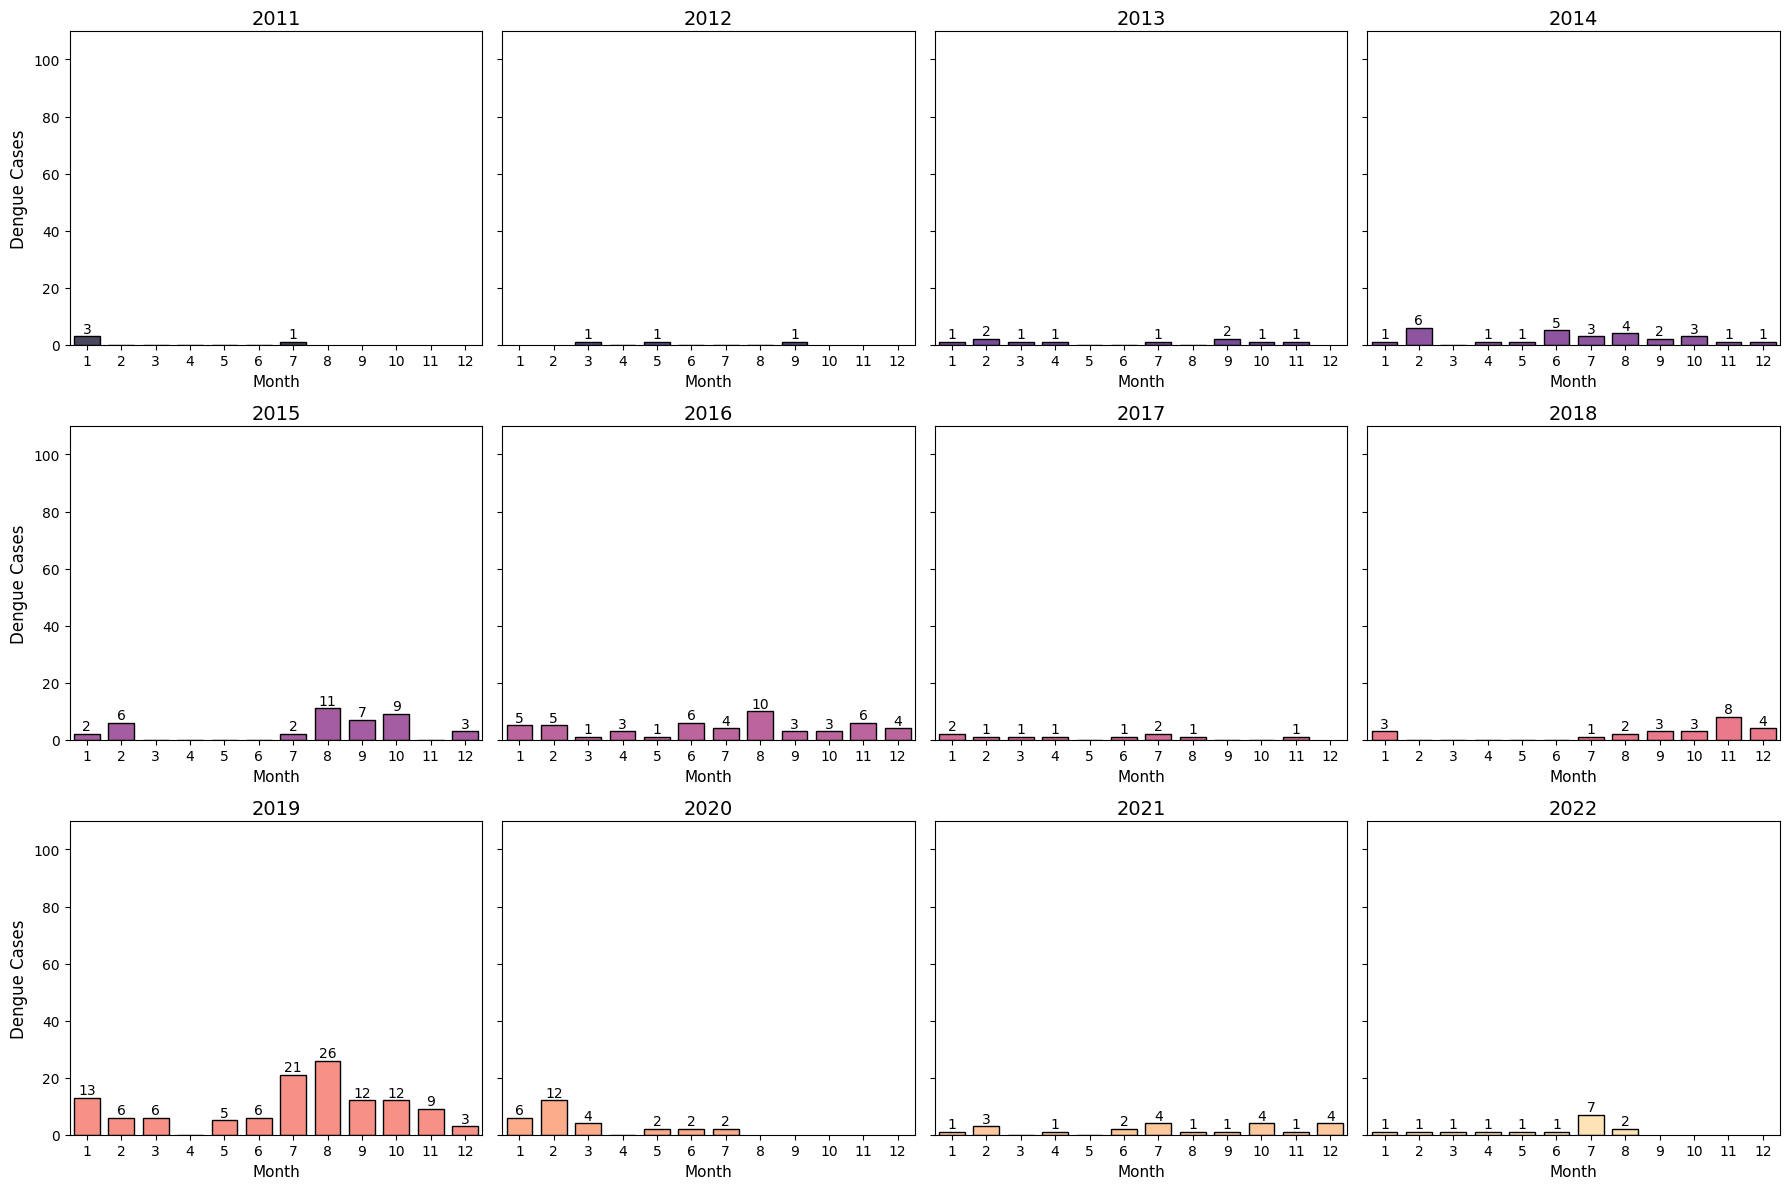

In [82]:
#HISTOGRAM FOR MONTHLY CASES EVERY YEAR
plot_dengue_cases(df, "SAN MIGUEL")

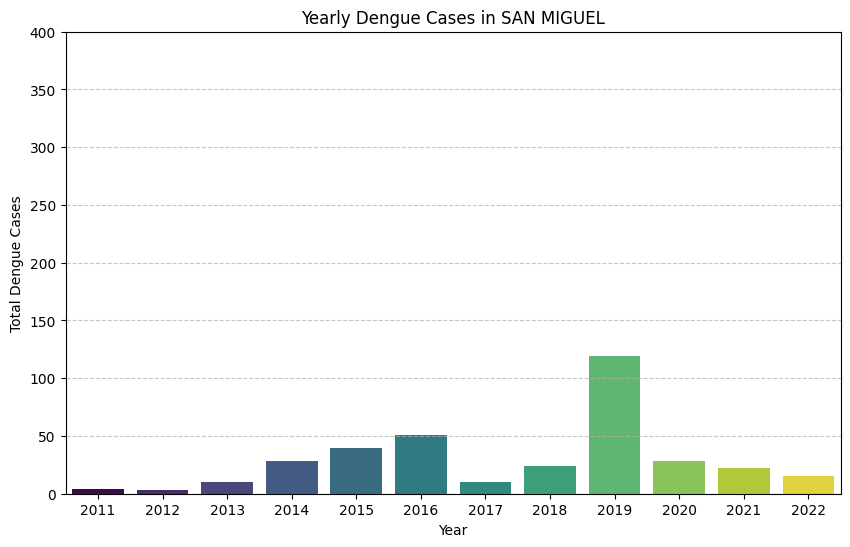

In [83]:
plot_total_dengue_cases_yearly(df, "SAN MIGUEL")

<div style="
    background-color: black; 
    color: white; 
    padding: 10px; 
    border-radius: 10px; 
    text-align: center;
    max-width: 100vw; 
    width: 100%;
    box-sizing: border-box;">
    SAN ROQUE MONTHLY CASES
</div>


In [84]:
selected_barangay = "SAN ROQUE"  # Change this to any barangay you want
barangay_data = get_selected_barangay(df, selected_barangay)

# Display the data for each year
for year, data in barangay_data.items():
    display(data)

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
28            28  SAN ROQUE  8.2578  124.2619  2011      1             0   
72            28  SAN ROQUE  8.2578  124.2619  2011      2             0   
116           28  SAN ROQUE  8.2578  124.2619  2011      3             0   
160           28  SAN ROQUE  8.2578  124.2619  2011      4             0   
204           28  SAN ROQUE  8.2578  124.2619  2011      5             0   
248           28  SAN ROQUE  8.2578  124.2619  2011      6             0   
292           28  SAN ROQUE  8.2578  124.2619  2011      7             0   
336           28  SAN ROQUE  8.2578  124.2619  2011      8             0   
380           28  SAN ROQUE  8.2578  124.2619  2011      9             1   
424           28  SAN ROQUE  8.2578  124.2619  2011     10             0   
468           28  SAN ROQUE  8.2578  124.2619  2011     11             0   
512           28  SAN ROQUE  8.2578  124.2619  2011     12             0   

     Temperature  Humidity  Rainfall  
28          23.8      88.1       7.0  
72          24.1      87.2      12.0  
116         25.3      85.5      20.0  
160         26.0      83.1      35.0  
204         27.2      81.9      55.0  
248         26.4      83.5      90.0  
292         25.7      84.7     110.0  
336         25.1      85.3      95.0  
380         24.4      86.2      70.0  
424         24.0      87.0      50.0  
468         23.6      88.4      30.0  
512         23.2      89.1      15.0

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
556            28  SAN ROQUE  8.2578  124.2619  2012      1             0   
600            28  SAN ROQUE  8.2578  124.2619  2012      2             0   
644            28  SAN ROQUE  8.2578  124.2619  2012      3             0   
688            28  SAN ROQUE  8.2578  124.2619  2012      4             0   
732            28  SAN ROQUE  8.2578  124.2619  2012      5             0   
776            28  SAN ROQUE  8.2578  124.2619  2012      6             0   
820            28  SAN ROQUE  8.2578  124.2619  2012      7             0   
864            28  SAN ROQUE  8.2578  124.2619  2012      8             0   
908            28  SAN ROQUE  8.2578  124.2619  2012      9             1   
952            28  SAN ROQUE  8.2578  124.2619  2012     10             0   
996            28  SAN ROQUE  8.2578  124.2619  2012     11             0   
1040           28  SAN ROQUE  8.2578  124.2619  2012     12             0   

      Temperature  Humidity  Rainfall  
556          24.3      85.1       4.0  
600          24.3      85.7       7.1  
644          24.6      83.3       3.1  
688          25.4      82.3       6.9  
732          25.1      86.4       6.9  
776          24.7      85.3       7.9  
820          24.9      85.2       6.4  
864          24.9      85.2       6.4  
908          24.1      88.1      11.4  
952          24.6      86.5       8.4  
996          24.8      84.8       4.1  
1040         24.7      84.8       5.7

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
1084           28  SAN ROQUE  8.2578  124.2619  2013      1             0   
1128           28  SAN ROQUE  8.2578  124.2619  2013      2             0   
1172           28  SAN ROQUE  8.2578  124.2619  2013      3             0   
1216           28  SAN ROQUE  8.2578  124.2619  2013      4             0   
1260           28  SAN ROQUE  8.2578  124.2619  2013      5             0   
1304           28  SAN ROQUE  8.2578  124.2619  2013      6             0   
1348           28  SAN ROQUE  8.2578  124.2619  2013      7             0   
1392           28  SAN ROQUE  8.2578  124.2619  2013      8             0   
1436           28  SAN ROQUE  8.2578  124.2619  2013      9             0   
1480           28  SAN ROQUE  8.2578  124.2619  2013     10             4   
1524           28  SAN ROQUE  8.2578  124.2619  2013     11             0   
1568           28  SAN ROQUE  8.2578  124.2619  2013     12             0   

      Temperature  Humidity  Rainfall  
1084         24.2      88.2       8.1  
1128         24.4      84.7       6.0  
1172         25.5      81.1       2.7  
1216         26.0      81.0       4.9  
1260         26.0      82.8       5.2  
1304         24.9      86.9       9.2  
1348         24.5      87.7      11.0  
1392         24.3      87.2       6.9  
1436         24.6      86.5       4.9  
1480         24.0      88.0      10.4  
1524         24.2      85.9       7.8  
1568         24.4      84.0       3.5

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
1612           28  SAN ROQUE  8.2578  124.2619  2014      1             0   
1656           28  SAN ROQUE  8.2578  124.2619  2014      2             1   
1700           28  SAN ROQUE  8.2578  124.2619  2014      3             1   
1744           28  SAN ROQUE  8.2578  124.2619  2014      4             0   
1788           28  SAN ROQUE  8.2578  124.2619  2014      5             1   
1832           28  SAN ROQUE  8.2578  124.2619  2014      6             0   
1876           28  SAN ROQUE  8.2578  124.2619  2014      7             0   
1920           28  SAN ROQUE  8.2578  124.2619  2014      8             1   
1964           28  SAN ROQUE  8.2578  124.2619  2014      9             1   
2008           28  SAN ROQUE  8.2578  124.2619  2014     10             0   
2052           28  SAN ROQUE  8.2578  124.2619  2014     11             0   
2096           28  SAN ROQUE  8.2578  124.2619  2014     12             0   

      Temperature  Humidity  Rainfall  
1612         23.2      86.4       6.8  
1656         23.7      82.4       2.3  
1700         24.3      82.5       3.8  
1744         25.1      81.4       2.0  
1788         25.3      84.0       4.9  
1832         24.5      87.1       6.6  
1876         23.4      89.1       8.5  
1920         23.9      87.7       8.0  
1964         23.4      88.5       7.1  
2008         23.9      88.4       8.5  
2052         24.7      85.2       6.1  
2096         24.0      85.3       4.9

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
2140           28  SAN ROQUE  8.2578  124.2619  2015      1             0   
2184           28  SAN ROQUE  8.2578  124.2619  2015      2             0   
2228           28  SAN ROQUE  8.2578  124.2619  2015      3             2   
2272           28  SAN ROQUE  8.2578  124.2619  2015      4             0   
2316           28  SAN ROQUE  8.2578  124.2619  2015      5             0   
2360           28  SAN ROQUE  8.2578  124.2619  2015      6             0   
2404           28  SAN ROQUE  8.2578  124.2619  2015      7             0   
2448           28  SAN ROQUE  8.2578  124.2619  2015      8             0   
2492           28  SAN ROQUE  8.2578  124.2619  2015      9             2   
2536           28  SAN ROQUE  8.2578  124.2619  2015     10             2   
2580           28  SAN ROQUE  8.2578  124.2619  2015     11             5   
2624           28  SAN ROQUE  8.2578  124.2619  2015     12             5   

      Temperature  Humidity  Rainfall  
2140         25.6      89.0       5.9  
2184         25.6      87.0       3.0  
2228         26.1      83.2       1.1  
2272         27.3      82.8       2.1  
2316         28.4      78.1       2.7  
2360         27.4      81.9       8.7  
2404         27.6      80.4       4.2  
2448         27.5      80.9       5.5  
2492         27.2      82.4       8.2  
2536         27.2      83.4       4.9  
2580         26.8      87.3       6.5  
2624         26.5      87.1       4.8

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
2668           28  SAN ROQUE  8.2578  124.2619  2016      1             6   
2712           28  SAN ROQUE  8.2578  124.2619  2016      2             1   
2756           28  SAN ROQUE  8.2578  124.2619  2016      3             1   
2800           28  SAN ROQUE  8.2578  124.2619  2016      4             0   
2844           28  SAN ROQUE  8.2578  124.2619  2016      5             0   
2888           28  SAN ROQUE  8.2578  124.2619  2016      6             0   
2932           28  SAN ROQUE  8.2578  124.2619  2016      7             1   
2976           28  SAN ROQUE  8.2578  124.2619  2016      8             3   
3020           28  SAN ROQUE  8.2578  124.2619  2016      9             2   
3064           28  SAN ROQUE  8.2578  124.2619  2016     10             4   
3108           28  SAN ROQUE  8.2578  124.2619  2016     11             2   
3152           28  SAN ROQUE  8.2578  124.2619  2016     12             2   

      Temperature  Humidity  Rainfall  
2668         26.2      86.9       1.6  
2712         26.1      88.2       2.6  
2756         26.8      84.4       0.4  
2800         28.1      80.1       1.5  
2844         28.3      81.9       8.3  
2888         27.5      83.9      12.5  
2932         27.6      82.0       5.2  
2976         27.8      80.3       2.7  
3020         27.2      82.4       6.2  
3064         27.1      84.6       8.9  
3108         26.5      86.6       7.6  
3152         26.7      86.9       8.2

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
3196           28  SAN ROQUE  8.2578  124.2619  2017      1             0   
3240           28  SAN ROQUE  8.2578  124.2619  2017      2             1   
3284           28  SAN ROQUE  8.2578  124.2619  2017      3             0   
3328           28  SAN ROQUE  8.2578  124.2619  2017      4             0   
3372           28  SAN ROQUE  8.2578  124.2619  2017      5             0   
3416           28  SAN ROQUE  8.2578  124.2619  2017      6             0   
3460           28  SAN ROQUE  8.2578  124.2619  2017      7             1   
3504           28  SAN ROQUE  8.2578  124.2619  2017      8             0   
3548           28  SAN ROQUE  8.2578  124.2619  2017      9             0   
3592           28  SAN ROQUE  8.2578  124.2619  2017     10             0   
3636           28  SAN ROQUE  8.2578  124.2619  2017     11             0   
3680           28  SAN ROQUE  8.2578  124.2619  2017     12             0   

      Temperature  Humidity  Rainfall  
3196         25.9      88.9      12.5  
3240         25.6      87.8       5.9  
3284         26.1      87.4       8.0  
3328         27.2      85.0       5.1  
3372         27.8      84.4      10.4  
3416         27.4      83.8       7.8  
3460         27.2      82.6       9.1  
3504         27.9      83.4       9.6  
3548         27.3      83.3      11.4  
3592         27.0      84.0       8.3  
3636         27.0      86.6       7.3  
3680         26.7      85.9       9.6

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
3724           28  SAN ROQUE  8.2578  124.2619  2018      1             0   
3768           28  SAN ROQUE  8.2578  124.2619  2018      2             0   
3812           28  SAN ROQUE  8.2578  124.2619  2018      3             0   
3856           28  SAN ROQUE  8.2578  124.2619  2018      4             0   
3900           28  SAN ROQUE  8.2578  124.2619  2018      5             1   
3944           28  SAN ROQUE  8.2578  124.2619  2018      6             0   
3988           28  SAN ROQUE  8.2578  124.2619  2018      7             0   
4032           28  SAN ROQUE  8.2578  124.2619  2018      8             0   
4076           28  SAN ROQUE  8.2578  124.2619  2018      9             1   
4120           28  SAN ROQUE  8.2578  124.2619  2018     10             0   
4164           28  SAN ROQUE  8.2578  124.2619  2018     11             0   
4208           28  SAN ROQUE  8.2578  124.2619  2018     12             4   

      Temperature  Humidity  Rainfall  
3724         26.2      87.5       7.3  
3768         26.4      86.0       9.7  
3812         26.5      84.6       3.7  
3856         27.4      82.5       2.6  
3900         27.9      82.0       6.9  
3944         27.7      80.7       5.2  
3988         27.3      81.6       4.7  
4032         27.4      79.8       2.1  
4076         26.9      82.2       5.4  
4120         27.2      82.7       4.2  
4164         26.5      86.6       6.1  
4208         26.3      88.1       5.8

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
4252           28  SAN ROQUE  8.2578  124.2619  2019      1             6   
4296           28  SAN ROQUE  8.2578  124.2619  2019      2             6   
4340           28  SAN ROQUE  8.2578  124.2619  2019      3             2   
4384           28  SAN ROQUE  8.2578  124.2619  2019      4             0   
4428           28  SAN ROQUE  8.2578  124.2619  2019      5             0   
4472           28  SAN ROQUE  8.2578  124.2619  2019      6             3   
4516           28  SAN ROQUE  8.2578  124.2619  2019      7             5   
4560           28  SAN ROQUE  8.2578  124.2619  2019      8            23   
4604           28  SAN ROQUE  8.2578  124.2619  2019      9            12   
4648           28  SAN ROQUE  8.2578  124.2619  2019     10            18   
4692           28  SAN ROQUE  8.2578  124.2619  2019     11             0   
4736           28  SAN ROQUE  8.2578  124.2619  2019     12             7   

      Temperature  Humidity  Rainfall  
4252         25.5      88.2       5.7  
4296         25.3      84.3       1.1  
4340         26.1      83.2       1.9  
4384         27.5      80.3       1.8  
4428         28.4      78.6       4.4  
4472         27.8      82.7       9.1  
4516         27.2      82.1       6.2  
4560         27.7      77.1       1.4  
4604         27.8      78.2       3.3  
4648         27.0      83.8       7.7  
4692         27.1      82.9       4.3  
4736         26.4      86.4       4.2

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
4780           28  SAN ROQUE  8.2578  124.2619  2020      1             6   
4824           28  SAN ROQUE  8.2578  124.2619  2020      2             4   
4868           28  SAN ROQUE  8.2578  124.2619  2020      3             2   
4912           28  SAN ROQUE  8.2578  124.2619  2020      4             2   
4956           28  SAN ROQUE  8.2578  124.2619  2020      5             0   
5000           28  SAN ROQUE  8.2578  124.2619  2020      6             0   
5044           28  SAN ROQUE  8.2578  124.2619  2020      7             0   
5088           28  SAN ROQUE  8.2578  124.2619  2020      8             0   
5132           28  SAN ROQUE  8.2578  124.2619  2020      9             0   
5176           28  SAN ROQUE  8.2578  124.2619  2020     10             0   
5220           28  SAN ROQUE  8.2578  124.2619  2020     11             0   
5264           28  SAN ROQUE  8.2578  124.2619  2020     12             0   

      Temperature  Humidity  Rainfall  
4780         26.3      86.8       2.1  
4824         25.7      87.2       3.5  
4868         26.4      85.2       2.0  
4912         27.2      81.6       1.0  
4956         28.0      83.2       9.8  
5000         27.3      84.1      14.1  
5044         27.0      83.9      15.7  
5088         27.2      82.9      11.7  
5132         27.2      83.7       9.2  
5176         26.9      84.2      13.2  
5220         26.8      86.2       5.5  
5264         26.7      86.6       8.2

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
5308           28  SAN ROQUE  8.2578  124.2619  2021      1             0   
5352           28  SAN ROQUE  8.2578  124.2619  2021      2             0   
5396           28  SAN ROQUE  8.2578  124.2619  2021      3             0   
5440           28  SAN ROQUE  8.2578  124.2619  2021      4             0   
5484           28  SAN ROQUE  8.2578  124.2619  2021      5             0   
5528           28  SAN ROQUE  8.2578  124.2619  2021      6             0   
5572           28  SAN ROQUE  8.2578  124.2619  2021      7             1   
5616           28  SAN ROQUE  8.2578  124.2619  2021      8             1   
5660           28  SAN ROQUE  8.2578  124.2619  2021      9             1   
5704           28  SAN ROQUE  8.2578  124.2619  2021     10             2   
5748           28  SAN ROQUE  8.2578  124.2619  2021     11             1   
5792           28  SAN ROQUE  8.2578  124.2619  2021     12             1   

      Temperature  Humidity  Rainfall  
5308         25.9      88.5      11.9  
5352         26.0      87.1      12.6  
5396         26.8      84.7       5.5  
5440         27.1      82.5       4.5  
5484         27.5      84.0      10.7  
5528         27.6      81.3       8.2  
5572         27.7      80.0       4.4  
5616         27.5      80.0       6.5  
5660         27.2      82.7       9.5  
5704         27.3      83.6       8.7  
5748         27.0      86.4       9.4  
5792         26.2      86.9       9.8

Barangay_No   Barangay       x         y  Year  Month  Dengue Cases  \
5836           28  SAN ROQUE  8.2578  124.2619  2022      1             1   
5880           28  SAN ROQUE  8.2578  124.2619  2022      2             1   
5924           28  SAN ROQUE  8.2578  124.2619  2022      3             0   
5968           28  SAN ROQUE  8.2578  124.2619  2022      4             6   
6012           28  SAN ROQUE  8.2578  124.2619  2022      5             0   
6056           28  SAN ROQUE  8.2578  124.2619  2022      6             2   
6100           28  SAN ROQUE  8.2578  124.2619  2022      7             1   
6144           28  SAN ROQUE  8.2578  124.2619  2022      8             1   
6188           28  SAN ROQUE  8.2578  124.2619  2022      9             0   
6232           28  SAN ROQUE  8.2578  124.2619  2022     10             0   
6276           28  SAN ROQUE  8.2578  124.2619  2022     11             0   
6320           28  SAN ROQUE  8.2578  124.2619  2022     12             0   

      Temperature  Humidity  Rainfall  
5836         26.0      86.9       8.3  
5880         26.0      87.2       3.9  
5924         26.8      86.5      11.0  
5968         26.8      86.5      12.2  
6012         27.4      83.9      11.5  
6056         27.6      81.9       7.1  
6100         27.4      83.2      11.6  
6144         27.3      82.0       7.9  
6188         27.5      81.1       6.1  
6232         27.1      84.2       9.0  
6276         27.0      85.8       6.6  
6320         26.4      87.1      14.5

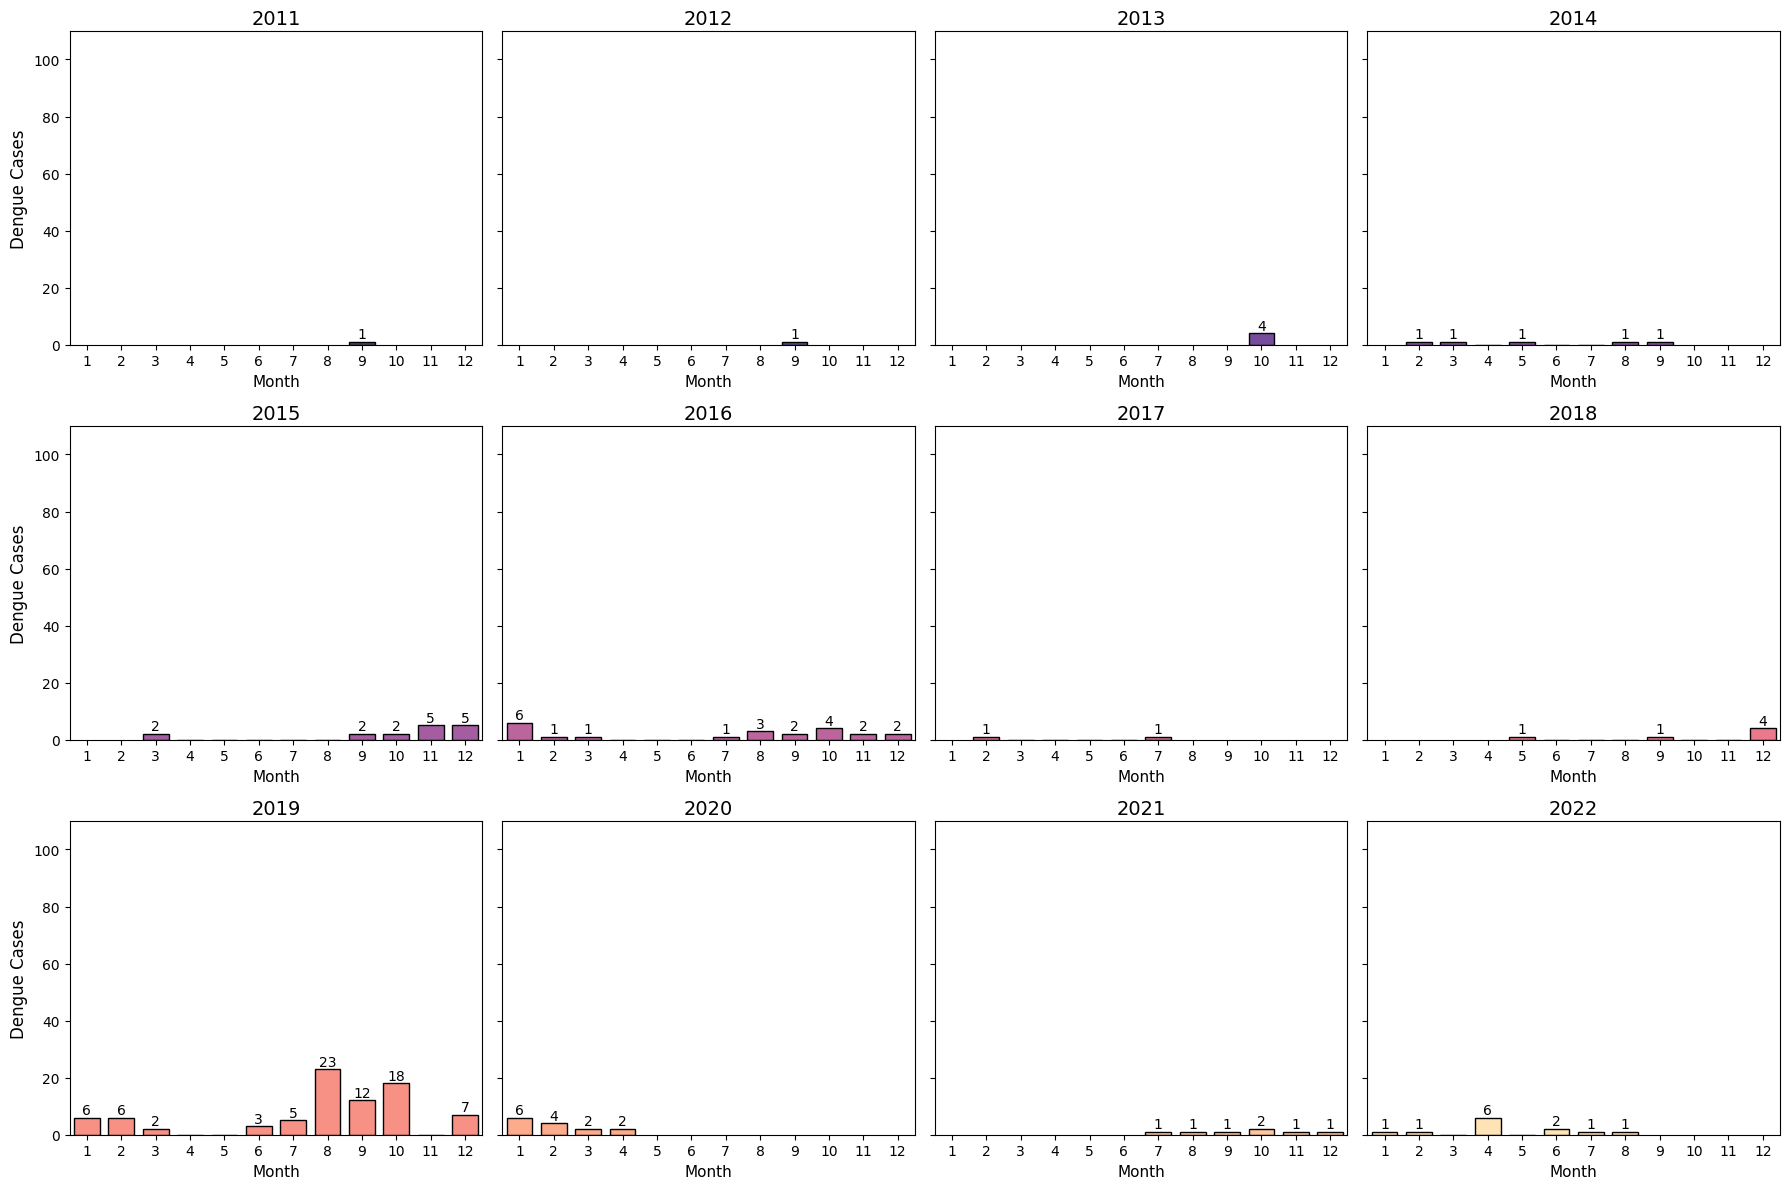

In [85]:
#HISTOGRAM FOR MONTHLY CASES EVERY YEAR
plot_dengue_cases(df, "SAN ROQUE")

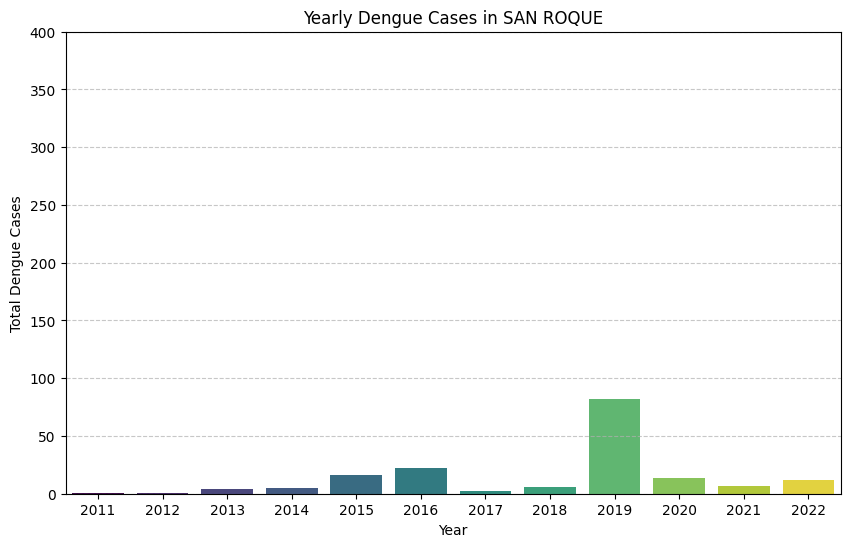

In [86]:
plot_total_dengue_cases_yearly(df, "SAN ROQUE")

<div style="
    background-color: black; 
    color: white; 
    padding: 10px; 
    border-radius: 10px; 
    text-align: center;
    max-width: 100vw; 
    width: 100%;
    box-sizing: border-box;">
    SANTA ELENA MONTHLY CASES
</div>


In [87]:
selected_barangay = "SANTA ELENA"  # Change this to any barangay you want
barangay_data = get_selected_barangay(df, selected_barangay)

# Display the data for each year
for year, data in barangay_data.items():
    display(data)

Barangay_No     Barangay       x         y  Year  Month  Dengue Cases  \
29            29  SANTA ELENA  8.1948  124.2273  2011      1             0   
73            29  SANTA ELENA  8.1948  124.2273  2011      2             0   
117           29  SANTA ELENA  8.1948  124.2273  2011      3             0   
161           29  SANTA ELENA  8.1948  124.2273  2011      4             0   
205           29  SANTA ELENA  8.1948  124.2273  2011      5             0   
249           29  SANTA ELENA  8.1948  124.2273  2011      6             0   
293           29  SANTA ELENA  8.1948  124.2273  2011      7             0   
337           29  SANTA ELENA  8.1948  124.2273  2011      8             1   
381           29  SANTA ELENA  8.1948  124.2273  2011      9             0   
425           29  SANTA ELENA  8.1948  124.2273  2011     10             0   
469           29  SANTA ELENA  8.1948  124.2273  2011     11             0   
513           29  SANTA ELENA  8.1948  124.2273  2011     12             0   

     Temperature  Humidity  Rainfall  
29          23.8      88.1       7.0  
73          24.1      87.2      12.0  
117         25.3      85.5      20.0  
161         26.0      83.1      35.0  
205         27.2      81.9      55.0  
249         26.4      83.5      90.0  
293         25.7      84.7     110.0  
337         25.1      85.3      95.0  
381         24.4      86.2      70.0  
425         24.0      87.0      50.0  
469         23.6      88.4      30.0  
513         23.2      89.1      15.0

Barangay_No     Barangay       x         y  Year  Month  Dengue Cases  \
557            29  SANTA ELENA  8.1948  124.2273  2012      1             0   
601            29  SANTA ELENA  8.1948  124.2273  2012      2             0   
645            29  SANTA ELENA  8.1948  124.2273  2012      3             0   
689            29  SANTA ELENA  8.1948  124.2273  2012      4             0   
733            29  SANTA ELENA  8.1948  124.2273  2012      5             0   
777            29  SANTA ELENA  8.1948  124.2273  2012      6             1   
821            29  SANTA ELENA  8.1948  124.2273  2012      7             0   
865            29  SANTA ELENA  8.1948  124.2273  2012      8             0   
909            29  SANTA ELENA  8.1948  124.2273  2012      9             0   
953            29  SANTA ELENA  8.1948  124.2273  2012     10             1   
997            29  SANTA ELENA  8.1948  124.2273  2012     11             0   
1041           29  SANTA ELENA  8.1948  124.2273  2012     12             0   

      Temperature  Humidity  Rainfall  
557          24.3      85.1       4.0  
601          24.3      85.7       7.1  
645          24.6      83.3       3.1  
689          25.4      82.3       6.9  
733          25.1      86.4       6.9  
777          24.7      85.3       7.9  
821          24.9      85.2       6.4  
865          24.9      85.2       6.4  
909          24.1      88.1      11.4  
953          24.6      86.5       8.4  
997          24.8      84.8       4.1  
1041         24.7      84.8       5.7

Barangay_No     Barangay       x         y  Year  Month  Dengue Cases  \
1085           29  SANTA ELENA  8.1948  124.2273  2013      1             0   
1129           29  SANTA ELENA  8.1948  124.2273  2013      2             0   
1173           29  SANTA ELENA  8.1948  124.2273  2013      3             0   
1217           29  SANTA ELENA  8.1948  124.2273  2013      4             0   
1261           29  SANTA ELENA  8.1948  124.2273  2013      5             1   
1305           29  SANTA ELENA  8.1948  124.2273  2013      6             0   
1349           29  SANTA ELENA  8.1948  124.2273  2013      7             0   
1393           29  SANTA ELENA  8.1948  124.2273  2013      8             0   
1437           29  SANTA ELENA  8.1948  124.2273  2013      9             0   
1481           29  SANTA ELENA  8.1948  124.2273  2013     10             0   
1525           29  SANTA ELENA  8.1948  124.2273  2013     11             0   
1569           29  SANTA ELENA  8.1948  124.2273  2013     12             0   

      Temperature  Humidity  Rainfall  
1085         24.2      88.2       8.1  
1129         24.4      84.7       6.0  
1173         25.5      81.1       2.7  
1217         26.0      81.0       4.9  
1261         26.0      82.8       5.2  
1305         24.9      86.9       9.2  
1349         24.5      87.7      11.0  
1393         24.3      87.2       6.9  
1437         24.6      86.5       4.9  
1481         24.0      88.0      10.4  
1525         24.2      85.9       7.8  
1569         24.4      84.0       3.5

Barangay_No     Barangay       x         y  Year  Month  Dengue Cases  \
1613           29  SANTA ELENA  8.1948  124.2273  2014      1             1   
1657           29  SANTA ELENA  8.1948  124.2273  2014      2             1   
1701           29  SANTA ELENA  8.1948  124.2273  2014      3             0   
1745           29  SANTA ELENA  8.1948  124.2273  2014      4             0   
1789           29  SANTA ELENA  8.1948  124.2273  2014      5             0   
1833           29  SANTA ELENA  8.1948  124.2273  2014      6             2   
1877           29  SANTA ELENA  8.1948  124.2273  2014      7             1   
1921           29  SANTA ELENA  8.1948  124.2273  2014      8             3   
1965           29  SANTA ELENA  8.1948  124.2273  2014      9             2   
2009           29  SANTA ELENA  8.1948  124.2273  2014     10             4   
2053           29  SANTA ELENA  8.1948  124.2273  2014     11             0   
2097           29  SANTA ELENA  8.1948  124.2273  2014     12             0   

      Temperature  Humidity  Rainfall  
1613         23.2      86.4       6.8  
1657         23.7      82.4       2.3  
1701         24.3      82.5       3.8  
1745         25.1      81.4       2.0  
1789         25.3      84.0       4.9  
1833         24.5      87.1       6.6  
1877         23.4      89.1       8.5  
1921         23.9      87.7       8.0  
1965         23.4      88.5       7.1  
2009         23.9      88.4       8.5  
2053         24.7      85.2       6.1  
2097         24.0      85.3       4.9

Barangay_No     Barangay       x         y  Year  Month  Dengue Cases  \
2141           29  SANTA ELENA  8.1948  124.2273  2015      1             1   
2185           29  SANTA ELENA  8.1948  124.2273  2015      2             0   
2229           29  SANTA ELENA  8.1948  124.2273  2015      3             0   
2273           29  SANTA ELENA  8.1948  124.2273  2015      4             0   
2317           29  SANTA ELENA  8.1948  124.2273  2015      5             1   
2361           29  SANTA ELENA  8.1948  124.2273  2015      6             3   
2405           29  SANTA ELENA  8.1948  124.2273  2015      7             0   
2449           29  SANTA ELENA  8.1948  124.2273  2015      8             1   
2493           29  SANTA ELENA  8.1948  124.2273  2015      9             4   
2537           29  SANTA ELENA  8.1948  124.2273  2015     10             5   
2581           29  SANTA ELENA  8.1948  124.2273  2015     11             4   
2625           29  SANTA ELENA  8.1948  124.2273  2015     12             7   

      Temperature  Humidity  Rainfall  
2141         25.6      89.0       5.9  
2185         25.6      87.0       3.0  
2229         26.1      83.2       1.1  
2273         27.3      82.8       2.1  
2317         28.4      78.1       2.7  
2361         27.4      81.9       8.7  
2405         27.6      80.4       4.2  
2449         27.5      80.9       5.5  
2493         27.2      82.4       8.2  
2537         27.2      83.4       4.9  
2581         26.8      87.3       6.5  
2625         26.5      87.1       4.8

Barangay_No     Barangay       x         y  Year  Month  Dengue Cases  \
2669           29  SANTA ELENA  8.1948  124.2273  2016      1             5   
2713           29  SANTA ELENA  8.1948  124.2273  2016      2             1   
2757           29  SANTA ELENA  8.1948  124.2273  2016      3             2   
2801           29  SANTA ELENA  8.1948  124.2273  2016      4             1   
2845           29  SANTA ELENA  8.1948  124.2273  2016      5             0   
2889           29  SANTA ELENA  8.1948  124.2273  2016      6             2   
2933           29  SANTA ELENA  8.1948  124.2273  2016      7             0   
2977           29  SANTA ELENA  8.1948  124.2273  2016      8             9   
3021           29  SANTA ELENA  8.1948  124.2273  2016      9             6   
3065           29  SANTA ELENA  8.1948  124.2273  2016     10             6   
3109           29  SANTA ELENA  8.1948  124.2273  2016     11             3   
3153           29  SANTA ELENA  8.1948  124.2273  2016     12             4   

      Temperature  Humidity  Rainfall  
2669         26.2      86.9       1.6  
2713         26.1      88.2       2.6  
2757         26.8      84.4       0.4  
2801         28.1      80.1       1.5  
2845         28.3      81.9       8.3  
2889         27.5      83.9      12.5  
2933         27.6      82.0       5.2  
2977         27.8      80.3       2.7  
3021         27.2      82.4       6.2  
3065         27.1      84.6       8.9  
3109         26.5      86.6       7.6  
3153         26.7      86.9       8.2

Barangay_No     Barangay       x         y  Year  Month  Dengue Cases  \
3197           29  SANTA ELENA  8.1948  124.2273  2017      1             3   
3241           29  SANTA ELENA  8.1948  124.2273  2017      2             0   
3285           29  SANTA ELENA  8.1948  124.2273  2017      3             3   
3329           29  SANTA ELENA  8.1948  124.2273  2017      4             0   
3373           29  SANTA ELENA  8.1948  124.2273  2017      5             0   
3417           29  SANTA ELENA  8.1948  124.2273  2017      6             0   
3461           29  SANTA ELENA  8.1948  124.2273  2017      7             1   
3505           29  SANTA ELENA  8.1948  124.2273  2017      8             0   
3549           29  SANTA ELENA  8.1948  124.2273  2017      9             0   
3593           29  SANTA ELENA  8.1948  124.2273  2017     10             0   
3637           29  SANTA ELENA  8.1948  124.2273  2017     11             3   
3681           29  SANTA ELENA  8.1948  124.2273  2017     12             0   

      Temperature  Humidity  Rainfall  
3197         25.9      88.9      12.5  
3241         25.6      87.8       5.9  
3285         26.1      87.4       8.0  
3329         27.2      85.0       5.1  
3373         27.8      84.4      10.4  
3417         27.4      83.8       7.8  
3461         27.2      82.6       9.1  
3505         27.9      83.4       9.6  
3549         27.3      83.3      11.4  
3593         27.0      84.0       8.3  
3637         27.0      86.6       7.3  
3681         26.7      85.9       9.6

Barangay_No     Barangay       x         y  Year  Month  Dengue Cases  \
3725           29  SANTA ELENA  8.1948  124.2273  2018      1             5   
3769           29  SANTA ELENA  8.1948  124.2273  2018      2             6   
3813           29  SANTA ELENA  8.1948  124.2273  2018      3             8   
3857           29  SANTA ELENA  8.1948  124.2273  2018      4             3   
3901           29  SANTA ELENA  8.1948  124.2273  2018      5             3   
3945           29  SANTA ELENA  8.1948  124.2273  2018      6             1   
3989           29  SANTA ELENA  8.1948  124.2273  2018      7             1   
4033           29  SANTA ELENA  8.1948  124.2273  2018      8             6   
4077           29  SANTA ELENA  8.1948  124.2273  2018      9             2   
4121           29  SANTA ELENA  8.1948  124.2273  2018     10             5   
4165           29  SANTA ELENA  8.1948  124.2273  2018     11             2   
4209           29  SANTA ELENA  8.1948  124.2273  2018     12             3   

      Temperature  Humidity  Rainfall  
3725         26.2      87.5       7.3  
3769         26.4      86.0       9.7  
3813         26.5      84.6       3.7  
3857         27.4      82.5       2.6  
3901         27.9      82.0       6.9  
3945         27.7      80.7       5.2  
3989         27.3      81.6       4.7  
4033         27.4      79.8       2.1  
4077         26.9      82.2       5.4  
4121         27.2      82.7       4.2  
4165         26.5      86.6       6.1  
4209         26.3      88.1       5.8

Barangay_No     Barangay       x         y  Year  Month  Dengue Cases  \
4253           29  SANTA ELENA  8.1948  124.2273  2019      1             8   
4297           29  SANTA ELENA  8.1948  124.2273  2019      2             4   
4341           29  SANTA ELENA  8.1948  124.2273  2019      3            16   
4385           29  SANTA ELENA  8.1948  124.2273  2019      4             7   
4429           29  SANTA ELENA  8.1948  124.2273  2019      5             0   
4473           29  SANTA ELENA  8.1948  124.2273  2019      6             0   
4517           29  SANTA ELENA  8.1948  124.2273  2019      7            13   
4561           29  SANTA ELENA  8.1948  124.2273  2019      8            28   
4605           29  SANTA ELENA  8.1948  124.2273  2019      9            21   
4649           29  SANTA ELENA  8.1948  124.2273  2019     10             9   
4693           29  SANTA ELENA  8.1948  124.2273  2019     11             9   
4737           29  SANTA ELENA  8.1948  124.2273  2019     12             4   

      Temperature  Humidity  Rainfall  
4253         25.5      88.2       5.7  
4297         25.3      84.3       1.1  
4341         26.1      83.2       1.9  
4385         27.5      80.3       1.8  
4429         28.4      78.6       4.4  
4473         27.8      82.7       9.1  
4517         27.2      82.1       6.2  
4561         27.7      77.1       1.4  
4605         27.8      78.2       3.3  
4649         27.0      83.8       7.7  
4693         27.1      82.9       4.3  
4737         26.4      86.4       4.2

Barangay_No     Barangay       x         y  Year  Month  Dengue Cases  \
4781           29  SANTA ELENA  8.1948  124.2273  2020      1             4   
4825           29  SANTA ELENA  8.1948  124.2273  2020      2             8   
4869           29  SANTA ELENA  8.1948  124.2273  2020      3             0   
4913           29  SANTA ELENA  8.1948  124.2273  2020      4             0   
4957           29  SANTA ELENA  8.1948  124.2273  2020      5             2   
5001           29  SANTA ELENA  8.1948  124.2273  2020      6             0   
5045           29  SANTA ELENA  8.1948  124.2273  2020      7             2   
5089           29  SANTA ELENA  8.1948  124.2273  2020      8             0   
5133           29  SANTA ELENA  8.1948  124.2273  2020      9             0   
5177           29  SANTA ELENA  8.1948  124.2273  2020     10             0   
5221           29  SANTA ELENA  8.1948  124.2273  2020     11             0   
5265           29  SANTA ELENA  8.1948  124.2273  2020     12             0   

      Temperature  Humidity  Rainfall  
4781         26.3      86.8       2.1  
4825         25.7      87.2       3.5  
4869         26.4      85.2       2.0  
4913         27.2      81.6       1.0  
4957         28.0      83.2       9.8  
5001         27.3      84.1      14.1  
5045         27.0      83.9      15.7  
5089         27.2      82.9      11.7  
5133         27.2      83.7       9.2  
5177         26.9      84.2      13.2  
5221         26.8      86.2       5.5  
5265         26.7      86.6       8.2

Barangay_No     Barangay       x         y  Year  Month  Dengue Cases  \
5309           29  SANTA ELENA  8.1948  124.2273  2021      1             0   
5353           29  SANTA ELENA  8.1948  124.2273  2021      2             2   
5397           29  SANTA ELENA  8.1948  124.2273  2021      3             1   
5441           29  SANTA ELENA  8.1948  124.2273  2021      4             1   
5485           29  SANTA ELENA  8.1948  124.2273  2021      5             0   
5529           29  SANTA ELENA  8.1948  124.2273  2021      6             1   
5573           29  SANTA ELENA  8.1948  124.2273  2021      7             0   
5617           29  SANTA ELENA  8.1948  124.2273  2021      8             0   
5661           29  SANTA ELENA  8.1948  124.2273  2021      9             1   
5705           29  SANTA ELENA  8.1948  124.2273  2021     10             2   
5749           29  SANTA ELENA  8.1948  124.2273  2021     11             1   
5793           29  SANTA ELENA  8.1948  124.2273  2021     12             4   

      Temperature  Humidity  Rainfall  
5309         25.9      88.5      11.9  
5353         26.0      87.1      12.6  
5397         26.8      84.7       5.5  
5441         27.1      82.5       4.5  
5485         27.5      84.0      10.7  
5529         27.6      81.3       8.2  
5573         27.7      80.0       4.4  
5617         27.5      80.0       6.5  
5661         27.2      82.7       9.5  
5705         27.3      83.6       8.7  
5749         27.0      86.4       9.4  
5793         26.2      86.9       9.8

Barangay_No     Barangay       x         y  Year  Month  Dengue Cases  \
5837           29  SANTA ELENA  8.1948  124.2273  2022      1             1   
5881           29  SANTA ELENA  8.1948  124.2273  2022      2             0   
5925           29  SANTA ELENA  8.1948  124.2273  2022      3             2   
5969           29  SANTA ELENA  8.1948  124.2273  2022      4             3   
6013           29  SANTA ELENA  8.1948  124.2273  2022      5             1   
6057           29  SANTA ELENA  8.1948  124.2273  2022      6             2   
6101           29  SANTA ELENA  8.1948  124.2273  2022      7             1   
6145           29  SANTA ELENA  8.1948  124.2273  2022      8             5   
6189           29  SANTA ELENA  8.1948  124.2273  2022      9             3   
6233           29  SANTA ELENA  8.1948  124.2273  2022     10             3   
6277           29  SANTA ELENA  8.1948  124.2273  2022     11             0   
6321           29  SANTA ELENA  8.1948  124.2273  2022     12             1   

      Temperature  Humidity  Rainfall  
5837         26.0      86.9       8.3  
5881         26.0      87.2       3.9  
5925         26.8      86.5      11.0  
5969         26.8      86.5      12.2  
6013         27.4      83.9      11.5  
6057         27.6      81.9       7.1  
6101         27.4      83.2      11.6  
6145         27.3      82.0       7.9  
6189         27.5      81.1       6.1  
6233         27.1      84.2       9.0  
6277         27.0      85.8       6.6  
6321         26.4      87.1      14.5

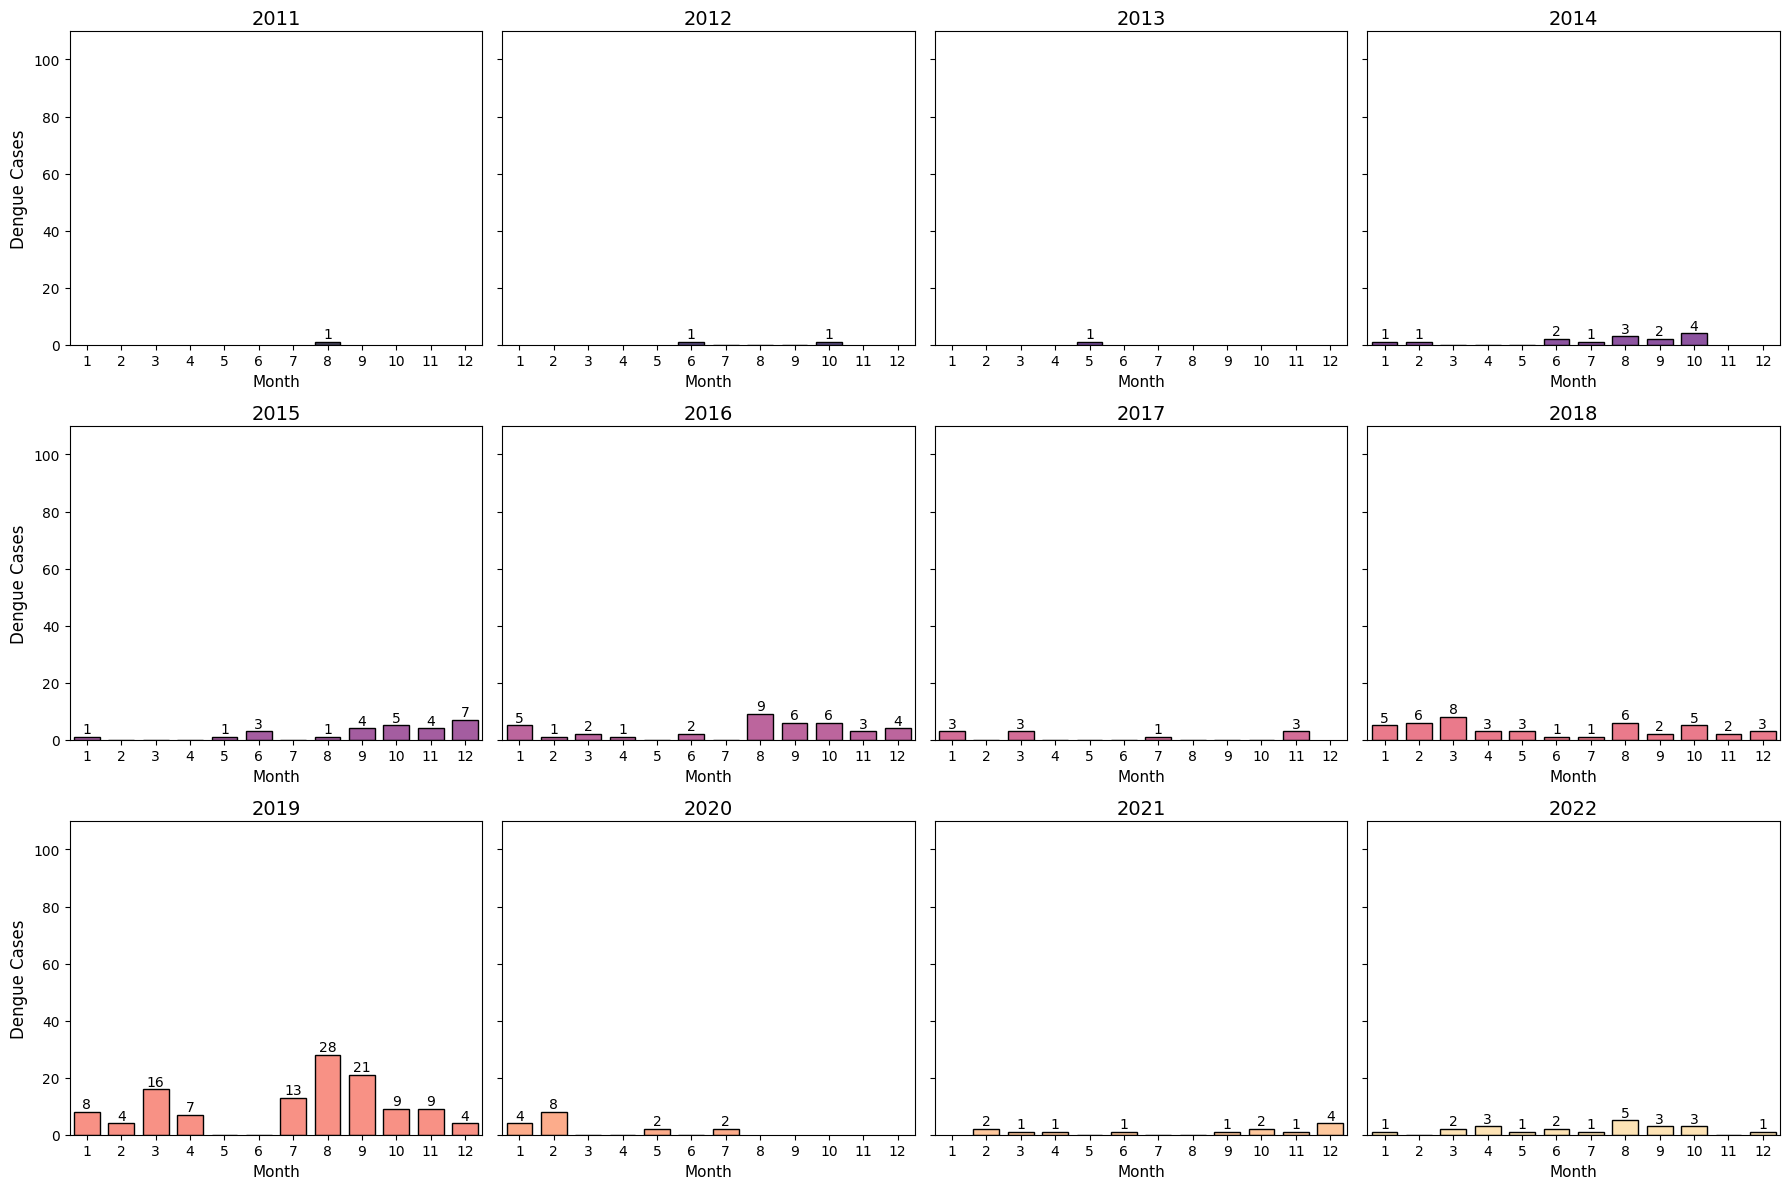

In [88]:
#HISTOGRAM FOR MONTHLY CASES EVERY YEAR
plot_dengue_cases(df, "SANTA ELENA")

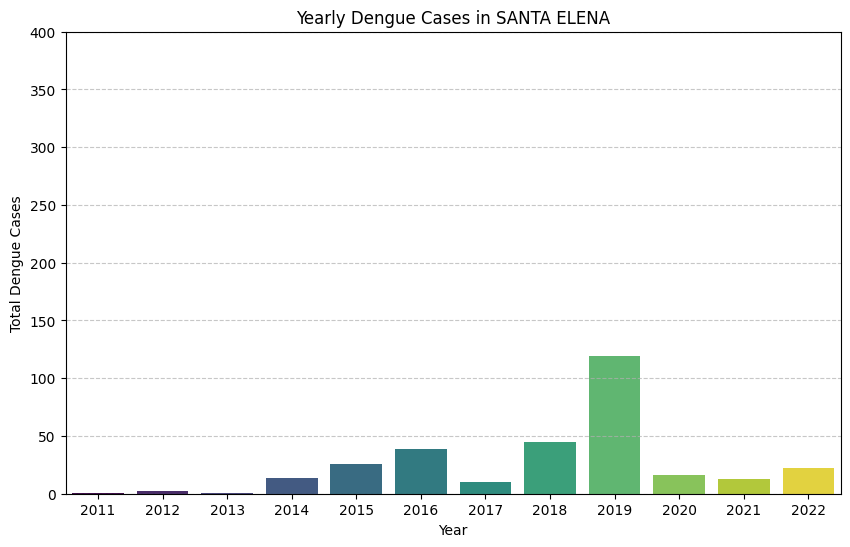

In [89]:
plot_total_dengue_cases_yearly(df, "SANTA ELENA")

<div style="
    background-color: black; 
    color: white; 
    padding: 10px; 
    border-radius: 10px; 
    text-align: center;
    max-width: 100vw; 
    width: 100%;
    box-sizing: border-box;">
    SANTA FILOMENA MONTHLY CASES
</div>


In [90]:
selected_barangay = "SANTA FILOMENA"  # Change this to any barangay you want
barangay_data = get_selected_barangay(df, selected_barangay)

# Display the data for each year
for year, data in barangay_data.items():
    display(data)

Barangay_No        Barangay       x         y  Year  Month  Dengue Cases  \
30            30  SANTA FILOMENA  8.2681  124.2593  2011      1             0   
74            30  SANTA FILOMENA  8.2681  124.2593  2011      2             1   
118           30  SANTA FILOMENA  8.2681  124.2593  2011      3             0   
162           30  SANTA FILOMENA  8.2681  124.2593  2011      4             0   
206           30  SANTA FILOMENA  8.2681  124.2593  2011      5             0   
250           30  SANTA FILOMENA  8.2681  124.2593  2011      6             0   
294           30  SANTA FILOMENA  8.2681  124.2593  2011      7             0   
338           30  SANTA FILOMENA  8.2681  124.2593  2011      8             0   
382           30  SANTA FILOMENA  8.2681  124.2593  2011      9             0   
426           30  SANTA FILOMENA  8.2681  124.2593  2011     10             0   
470           30  SANTA FILOMENA  8.2681  124.2593  2011     11             1   
514           30  SANTA FILOMENA  8.2681  124.2593  2011     12             0   

     Temperature  Humidity  Rainfall  
30          23.8      88.1       7.0  
74          24.1      87.2      12.0  
118         25.3      85.5      20.0  
162         26.0      83.1      35.0  
206         27.2      81.9      55.0  
250         26.4      83.5      90.0  
294         25.7      84.7     110.0  
338         25.1      85.3      95.0  
382         24.4      86.2      70.0  
426         24.0      87.0      50.0  
470         23.6      88.4      30.0  
514         23.2      89.1      15.0

Barangay_No        Barangay       x         y  Year  Month  \
558            30  SANTA FILOMENA  8.2681  124.2593  2012      1   
602            30  SANTA FILOMENA  8.2681  124.2593  2012      2   
646            30  SANTA FILOMENA  8.2681  124.2593  2012      3   
690            30  SANTA FILOMENA  8.2681  124.2593  2012      4   
734            30  SANTA FILOMENA  8.2681  124.2593  2012      5   
778            30  SANTA FILOMENA  8.2681  124.2593  2012      6   
822            30  SANTA FILOMENA  8.2681  124.2593  2012      7   
866            30  SANTA FILOMENA  8.2681  124.2593  2012      8   
910            30  SANTA FILOMENA  8.2681  124.2593  2012      9   
954            30  SANTA FILOMENA  8.2681  124.2593  2012     10   
998            30  SANTA FILOMENA  8.2681  124.2593  2012     11   
1042           30  SANTA FILOMENA  8.2681  124.2593  2012     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
558              0         24.3      85.1       4.0  
602              0         24.3      85.7       7.1  
646              1         24.6      83.3       3.1  
690              0         25.4      82.3       6.9  
734              0         25.1      86.4       6.9  
778              1         24.7      85.3       7.9  
822              0         24.9      85.2       6.4  
866              1         24.9      85.2       6.4  
910              0         24.1      88.1      11.4  
954              1         24.6      86.5       8.4  
998              1         24.8      84.8       4.1  
1042             0         24.7      84.8       5.7

Barangay_No        Barangay       x         y  Year  Month  \
1086           30  SANTA FILOMENA  8.2681  124.2593  2013      1   
1130           30  SANTA FILOMENA  8.2681  124.2593  2013      2   
1174           30  SANTA FILOMENA  8.2681  124.2593  2013      3   
1218           30  SANTA FILOMENA  8.2681  124.2593  2013      4   
1262           30  SANTA FILOMENA  8.2681  124.2593  2013      5   
1306           30  SANTA FILOMENA  8.2681  124.2593  2013      6   
1350           30  SANTA FILOMENA  8.2681  124.2593  2013      7   
1394           30  SANTA FILOMENA  8.2681  124.2593  2013      8   
1438           30  SANTA FILOMENA  8.2681  124.2593  2013      9   
1482           30  SANTA FILOMENA  8.2681  124.2593  2013     10   
1526           30  SANTA FILOMENA  8.2681  124.2593  2013     11   
1570           30  SANTA FILOMENA  8.2681  124.2593  2013     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
1086             1         24.2      88.2       8.1  
1130             0         24.4      84.7       6.0  
1174             0         25.5      81.1       2.7  
1218             0         26.0      81.0       4.9  
1262             0         26.0      82.8       5.2  
1306             0         24.9      86.9       9.2  
1350             0         24.5      87.7      11.0  
1394             0         24.3      87.2       6.9  
1438             2         24.6      86.5       4.9  
1482             2         24.0      88.0      10.4  
1526             2         24.2      85.9       7.8  
1570             0         24.4      84.0       3.5

Barangay_No        Barangay       x         y  Year  Month  \
1614           30  SANTA FILOMENA  8.2681  124.2593  2014      1   
1658           30  SANTA FILOMENA  8.2681  124.2593  2014      2   
1702           30  SANTA FILOMENA  8.2681  124.2593  2014      3   
1746           30  SANTA FILOMENA  8.2681  124.2593  2014      4   
1790           30  SANTA FILOMENA  8.2681  124.2593  2014      5   
1834           30  SANTA FILOMENA  8.2681  124.2593  2014      6   
1878           30  SANTA FILOMENA  8.2681  124.2593  2014      7   
1922           30  SANTA FILOMENA  8.2681  124.2593  2014      8   
1966           30  SANTA FILOMENA  8.2681  124.2593  2014      9   
2010           30  SANTA FILOMENA  8.2681  124.2593  2014     10   
2054           30  SANTA FILOMENA  8.2681  124.2593  2014     11   
2098           30  SANTA FILOMENA  8.2681  124.2593  2014     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
1614             0         23.2      86.4       6.8  
1658             1         23.7      82.4       2.3  
1702             2         24.3      82.5       3.8  
1746             1         25.1      81.4       2.0  
1790             0         25.3      84.0       4.9  
1834             0         24.5      87.1       6.6  
1878             1         23.4      89.1       8.5  
1922             1         23.9      87.7       8.0  
1966             0         23.4      88.5       7.1  
2010             2         23.9      88.4       8.5  
2054             2         24.7      85.2       6.1  
2098             0         24.0      85.3       4.9

Barangay_No        Barangay       x         y  Year  Month  \
2142           30  SANTA FILOMENA  8.2681  124.2593  2015      1   
2186           30  SANTA FILOMENA  8.2681  124.2593  2015      2   
2230           30  SANTA FILOMENA  8.2681  124.2593  2015      3   
2274           30  SANTA FILOMENA  8.2681  124.2593  2015      4   
2318           30  SANTA FILOMENA  8.2681  124.2593  2015      5   
2362           30  SANTA FILOMENA  8.2681  124.2593  2015      6   
2406           30  SANTA FILOMENA  8.2681  124.2593  2015      7   
2450           30  SANTA FILOMENA  8.2681  124.2593  2015      8   
2494           30  SANTA FILOMENA  8.2681  124.2593  2015      9   
2538           30  SANTA FILOMENA  8.2681  124.2593  2015     10   
2582           30  SANTA FILOMENA  8.2681  124.2593  2015     11   
2626           30  SANTA FILOMENA  8.2681  124.2593  2015     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
2142             0         25.6      89.0       5.9  
2186             0         25.6      87.0       3.0  
2230             2         26.1      83.2       1.1  
2274             0         27.3      82.8       2.1  
2318             0         28.4      78.1       2.7  
2362             0         27.4      81.9       8.7  
2406             0         27.6      80.4       4.2  
2450             0         27.5      80.9       5.5  
2494             1         27.2      82.4       8.2  
2538             2         27.2      83.4       4.9  
2582             4         26.8      87.3       6.5  
2626             0         26.5      87.1       4.8

Barangay_No        Barangay       x         y  Year  Month  \
2670           30  SANTA FILOMENA  8.2681  124.2593  2016      1   
2714           30  SANTA FILOMENA  8.2681  124.2593  2016      2   
2758           30  SANTA FILOMENA  8.2681  124.2593  2016      3   
2802           30  SANTA FILOMENA  8.2681  124.2593  2016      4   
2846           30  SANTA FILOMENA  8.2681  124.2593  2016      5   
2890           30  SANTA FILOMENA  8.2681  124.2593  2016      6   
2934           30  SANTA FILOMENA  8.2681  124.2593  2016      7   
2978           30  SANTA FILOMENA  8.2681  124.2593  2016      8   
3022           30  SANTA FILOMENA  8.2681  124.2593  2016      9   
3066           30  SANTA FILOMENA  8.2681  124.2593  2016     10   
3110           30  SANTA FILOMENA  8.2681  124.2593  2016     11   
3154           30  SANTA FILOMENA  8.2681  124.2593  2016     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
2670             2         26.2      86.9       1.6  
2714             3         26.1      88.2       2.6  
2758             0         26.8      84.4       0.4  
2802             0         28.1      80.1       1.5  
2846             0         28.3      81.9       8.3  
2890             1         27.5      83.9      12.5  
2934             6         27.6      82.0       5.2  
2978             1         27.8      80.3       2.7  
3022             3         27.2      82.4       6.2  
3066             1         27.1      84.6       8.9  
3110             0         26.5      86.6       7.6  
3154            13         26.7      86.9       8.2

Barangay_No        Barangay       x         y  Year  Month  \
3198           30  SANTA FILOMENA  8.2681  124.2593  2017      1   
3242           30  SANTA FILOMENA  8.2681  124.2593  2017      2   
3286           30  SANTA FILOMENA  8.2681  124.2593  2017      3   
3330           30  SANTA FILOMENA  8.2681  124.2593  2017      4   
3374           30  SANTA FILOMENA  8.2681  124.2593  2017      5   
3418           30  SANTA FILOMENA  8.2681  124.2593  2017      6   
3462           30  SANTA FILOMENA  8.2681  124.2593  2017      7   
3506           30  SANTA FILOMENA  8.2681  124.2593  2017      8   
3550           30  SANTA FILOMENA  8.2681  124.2593  2017      9   
3594           30  SANTA FILOMENA  8.2681  124.2593  2017     10   
3638           30  SANTA FILOMENA  8.2681  124.2593  2017     11   
3682           30  SANTA FILOMENA  8.2681  124.2593  2017     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
3198             2         25.9      88.9      12.5  
3242             0         25.6      87.8       5.9  
3286             0         26.1      87.4       8.0  
3330             1         27.2      85.0       5.1  
3374             1         27.8      84.4      10.4  
3418             0         27.4      83.8       7.8  
3462             0         27.2      82.6       9.1  
3506             0         27.9      83.4       9.6  
3550             0         27.3      83.3      11.4  
3594             1         27.0      84.0       8.3  
3638             0         27.0      86.6       7.3  
3682             0         26.7      85.9       9.6

Barangay_No        Barangay       x         y  Year  Month  \
3726           30  SANTA FILOMENA  8.2681  124.2593  2018      1   
3770           30  SANTA FILOMENA  8.2681  124.2593  2018      2   
3814           30  SANTA FILOMENA  8.2681  124.2593  2018      3   
3858           30  SANTA FILOMENA  8.2681  124.2593  2018      4   
3902           30  SANTA FILOMENA  8.2681  124.2593  2018      5   
3946           30  SANTA FILOMENA  8.2681  124.2593  2018      6   
3990           30  SANTA FILOMENA  8.2681  124.2593  2018      7   
4034           30  SANTA FILOMENA  8.2681  124.2593  2018      8   
4078           30  SANTA FILOMENA  8.2681  124.2593  2018      9   
4122           30  SANTA FILOMENA  8.2681  124.2593  2018     10   
4166           30  SANTA FILOMENA  8.2681  124.2593  2018     11   
4210           30  SANTA FILOMENA  8.2681  124.2593  2018     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
3726             0         26.2      87.5       7.3  
3770             0         26.4      86.0       9.7  
3814             0         26.5      84.6       3.7  
3858             0         27.4      82.5       2.6  
3902             1         27.9      82.0       6.9  
3946             3         27.7      80.7       5.2  
3990             0         27.3      81.6       4.7  
4034             3         27.4      79.8       2.1  
4078             3         26.9      82.2       5.4  
4122             3         27.2      82.7       4.2  
4166             8         26.5      86.6       6.1  
4210             3         26.3      88.1       5.8

Barangay_No        Barangay       x         y  Year  Month  \
4254           30  SANTA FILOMENA  8.2681  124.2593  2019      1   
4298           30  SANTA FILOMENA  8.2681  124.2593  2019      2   
4342           30  SANTA FILOMENA  8.2681  124.2593  2019      3   
4386           30  SANTA FILOMENA  8.2681  124.2593  2019      4   
4430           30  SANTA FILOMENA  8.2681  124.2593  2019      5   
4474           30  SANTA FILOMENA  8.2681  124.2593  2019      6   
4518           30  SANTA FILOMENA  8.2681  124.2593  2019      7   
4562           30  SANTA FILOMENA  8.2681  124.2593  2019      8   
4606           30  SANTA FILOMENA  8.2681  124.2593  2019      9   
4650           30  SANTA FILOMENA  8.2681  124.2593  2019     10   
4694           30  SANTA FILOMENA  8.2681  124.2593  2019     11   
4738           30  SANTA FILOMENA  8.2681  124.2593  2019     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
4254             3         25.5      88.2       5.7  
4298             3         25.3      84.3       1.1  
4342             0         26.1      83.2       1.9  
4386             0         27.5      80.3       1.8  
4430             0         28.4      78.6       4.4  
4474             2         27.8      82.7       9.1  
4518            10         27.2      82.1       6.2  
4562            27         27.7      77.1       1.4  
4606             9         27.8      78.2       3.3  
4650             3         27.0      83.8       7.7  
4694             4         27.1      82.9       4.3  
4738             0         26.4      86.4       4.2

Barangay_No        Barangay       x         y  Year  Month  \
4782           30  SANTA FILOMENA  8.2681  124.2593  2020      1   
4826           30  SANTA FILOMENA  8.2681  124.2593  2020      2   
4870           30  SANTA FILOMENA  8.2681  124.2593  2020      3   
4914           30  SANTA FILOMENA  8.2681  124.2593  2020      4   
4958           30  SANTA FILOMENA  8.2681  124.2593  2020      5   
5002           30  SANTA FILOMENA  8.2681  124.2593  2020      6   
5046           30  SANTA FILOMENA  8.2681  124.2593  2020      7   
5090           30  SANTA FILOMENA  8.2681  124.2593  2020      8   
5134           30  SANTA FILOMENA  8.2681  124.2593  2020      9   
5178           30  SANTA FILOMENA  8.2681  124.2593  2020     10   
5222           30  SANTA FILOMENA  8.2681  124.2593  2020     11   
5266           30  SANTA FILOMENA  8.2681  124.2593  2020     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
4782             2         26.3      86.8       2.1  
4826             2         25.7      87.2       3.5  
4870             2         26.4      85.2       2.0  
4914             0         27.2      81.6       1.0  
4958             2         28.0      83.2       9.8  
5002             2         27.3      84.1      14.1  
5046             8         27.0      83.9      15.7  
5090             4         27.2      82.9      11.7  
5134             0         27.2      83.7       9.2  
5178             0         26.9      84.2      13.2  
5222             0         26.8      86.2       5.5  
5266             0         26.7      86.6       8.2

Barangay_No        Barangay       x         y  Year  Month  \
5310           30  SANTA FILOMENA  8.2681  124.2593  2021      1   
5354           30  SANTA FILOMENA  8.2681  124.2593  2021      2   
5398           30  SANTA FILOMENA  8.2681  124.2593  2021      3   
5442           30  SANTA FILOMENA  8.2681  124.2593  2021      4   
5486           30  SANTA FILOMENA  8.2681  124.2593  2021      5   
5530           30  SANTA FILOMENA  8.2681  124.2593  2021      6   
5574           30  SANTA FILOMENA  8.2681  124.2593  2021      7   
5618           30  SANTA FILOMENA  8.2681  124.2593  2021      8   
5662           30  SANTA FILOMENA  8.2681  124.2593  2021      9   
5706           30  SANTA FILOMENA  8.2681  124.2593  2021     10   
5750           30  SANTA FILOMENA  8.2681  124.2593  2021     11   
5794           30  SANTA FILOMENA  8.2681  124.2593  2021     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
5310             0         25.9      88.5      11.9  
5354             0         26.0      87.1      12.6  
5398             0         26.8      84.7       5.5  
5442             0         27.1      82.5       4.5  
5486             0         27.5      84.0      10.7  
5530             0         27.6      81.3       8.2  
5574             0         27.7      80.0       4.4  
5618             0         27.5      80.0       6.5  
5662             0         27.2      82.7       9.5  
5706             0         27.3      83.6       8.7  
5750             3         27.0      86.4       9.4  
5794             1         26.2      86.9       9.8

Barangay_No        Barangay       x         y  Year  Month  \
5838           30  SANTA FILOMENA  8.2681  124.2593  2022      1   
5882           30  SANTA FILOMENA  8.2681  124.2593  2022      2   
5926           30  SANTA FILOMENA  8.2681  124.2593  2022      3   
5970           30  SANTA FILOMENA  8.2681  124.2593  2022      4   
6014           30  SANTA FILOMENA  8.2681  124.2593  2022      5   
6058           30  SANTA FILOMENA  8.2681  124.2593  2022      6   
6102           30  SANTA FILOMENA  8.2681  124.2593  2022      7   
6146           30  SANTA FILOMENA  8.2681  124.2593  2022      8   
6190           30  SANTA FILOMENA  8.2681  124.2593  2022      9   
6234           30  SANTA FILOMENA  8.2681  124.2593  2022     10   
6278           30  SANTA FILOMENA  8.2681  124.2593  2022     11   
6322           30  SANTA FILOMENA  8.2681  124.2593  2022     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
5838             1         26.0      86.9       8.3  
5882             1         26.0      87.2       3.9  
5926             0         26.8      86.5      11.0  
5970             2         26.8      86.5      12.2  
6014             0         27.4      83.9      11.5  
6058             0         27.6      81.9       7.1  
6102             0         27.4      83.2      11.6  
6146             1         27.3      82.0       7.9  
6190             1         27.5      81.1       6.1  
6234             1         27.1      84.2       9.0  
6278             1         27.0      85.8       6.6  
6322             1         26.4      87.1      14.5

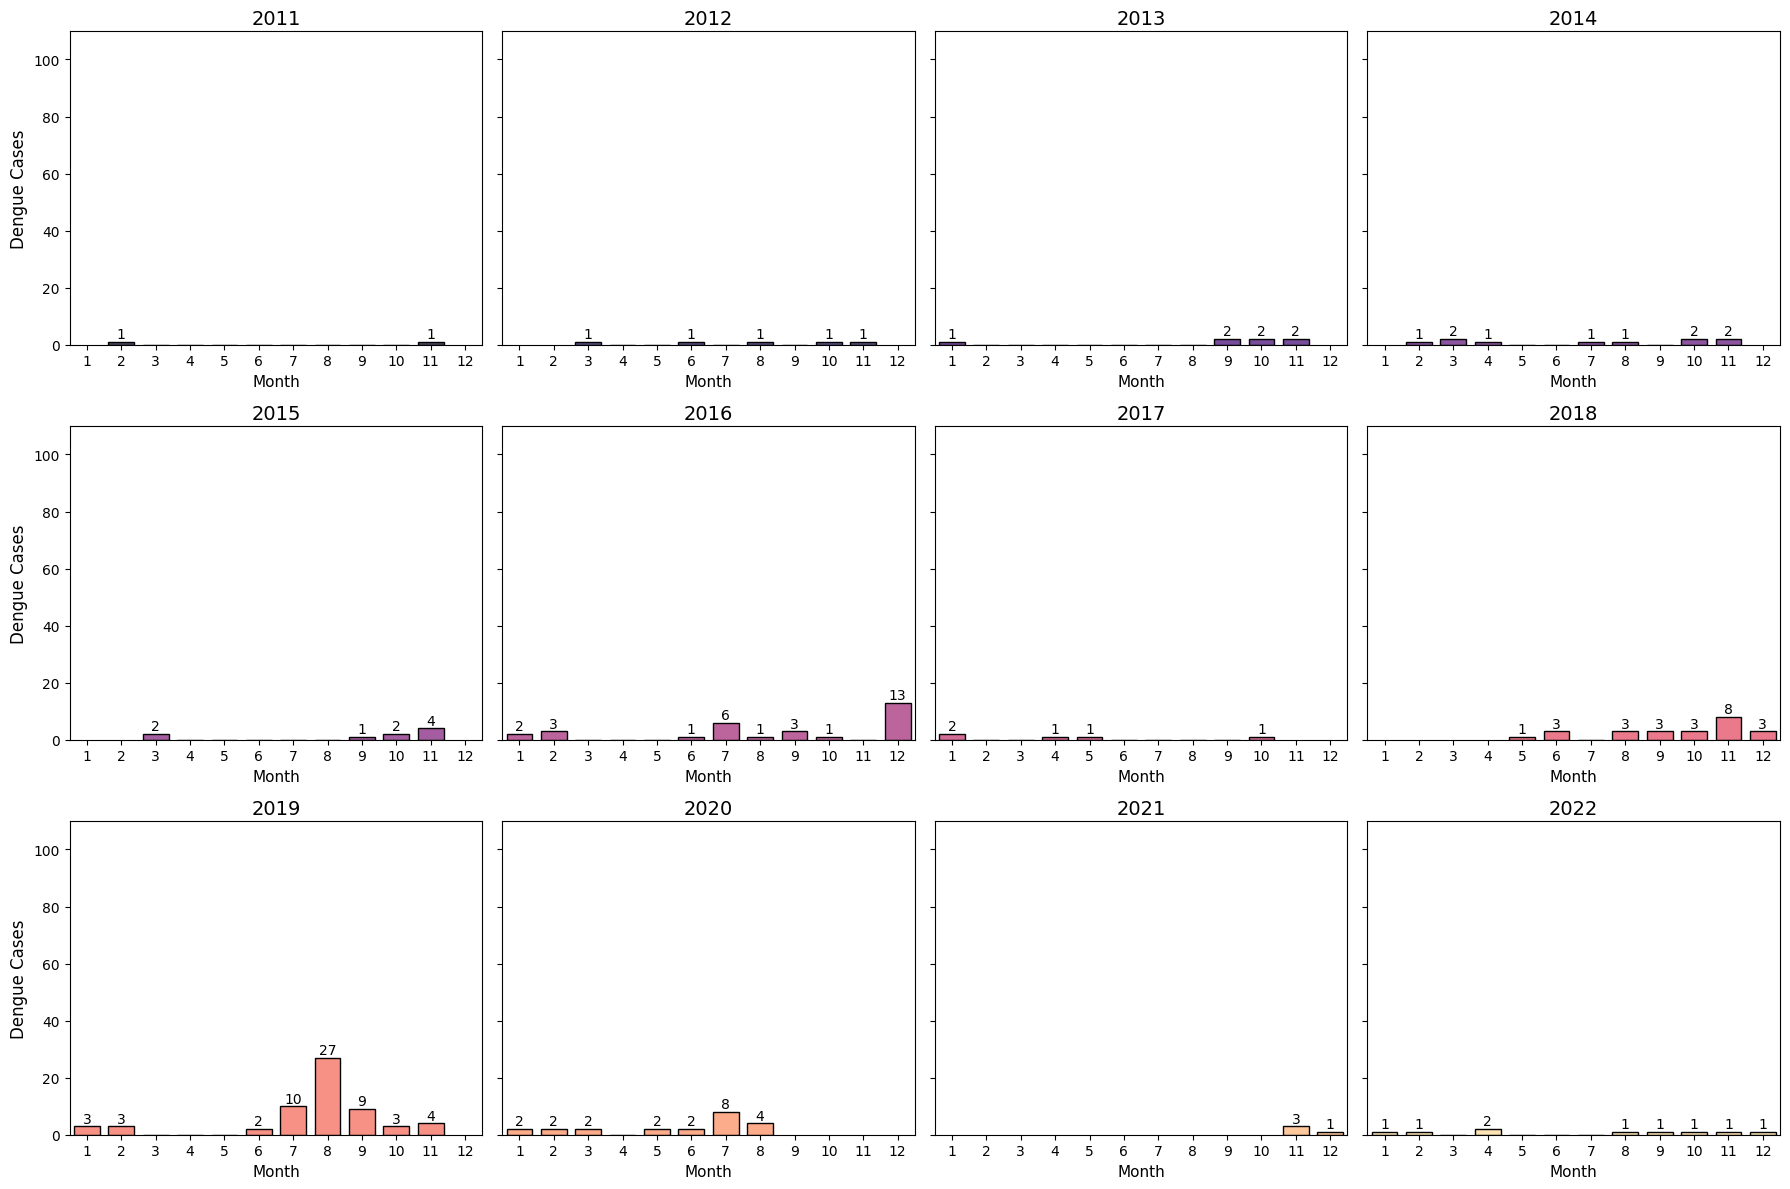

In [91]:
#HISTOGRAM FOR MONTHLY CASES EVERY YEAR
plot_dengue_cases(df, "SANTA FILOMENA")

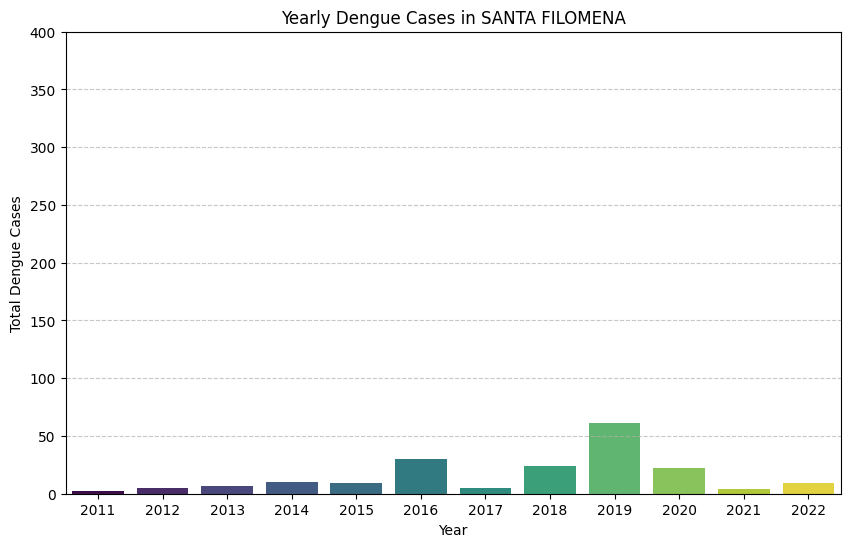

In [92]:
plot_total_dengue_cases_yearly(df, "SANTA FILOMENA")

<div style="
    background-color: black; 
    color: white; 
    padding: 10px; 
    border-radius: 10px; 
    text-align: center;
    max-width: 100vw; 
    width: 100%;
    box-sizing: border-box;">
    SANTIAGO MONTHLY CASES
</div>


In [93]:
selected_barangay = "SANTIAGO"  # Change this to any barangay you want
barangay_data = get_selected_barangay(df, selected_barangay)

# Display the data for each year
for year, data in barangay_data.items():
    display(data)

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
31            31  SANTIAGO  8.2511  124.2444  2011      1             0   
75            31  SANTIAGO  8.2511  124.2444  2011      2             1   
119           31  SANTIAGO  8.2511  124.2444  2011      3             2   
163           31  SANTIAGO  8.2511  124.2444  2011      4             0   
207           31  SANTIAGO  8.2511  124.2444  2011      5             1   
251           31  SANTIAGO  8.2511  124.2444  2011      6             0   
295           31  SANTIAGO  8.2511  124.2444  2011      7             0   
339           31  SANTIAGO  8.2511  124.2444  2011      8             2   
383           31  SANTIAGO  8.2511  124.2444  2011      9             0   
427           31  SANTIAGO  8.2511  124.2444  2011     10             0   
471           31  SANTIAGO  8.2511  124.2444  2011     11             0   
515           31  SANTIAGO  8.2511  124.2444  2011     12             2   

     Temperature  Humidity  Rainfall  
31          23.8      88.1       7.0  
75          24.1      87.2      12.0  
119         25.3      85.5      20.0  
163         26.0      83.1      35.0  
207         27.2      81.9      55.0  
251         26.4      83.5      90.0  
295         25.7      84.7     110.0  
339         25.1      85.3      95.0  
383         24.4      86.2      70.0  
427         24.0      87.0      50.0  
471         23.6      88.4      30.0  
515         23.2      89.1      15.0

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
559            31  SANTIAGO  8.2511  124.2444  2012      1             1   
603            31  SANTIAGO  8.2511  124.2444  2012      2             0   
647            31  SANTIAGO  8.2511  124.2444  2012      3             0   
691            31  SANTIAGO  8.2511  124.2444  2012      4             1   
735            31  SANTIAGO  8.2511  124.2444  2012      5             0   
779            31  SANTIAGO  8.2511  124.2444  2012      6             1   
823            31  SANTIAGO  8.2511  124.2444  2012      7             1   
867            31  SANTIAGO  8.2511  124.2444  2012      8             0   
911            31  SANTIAGO  8.2511  124.2444  2012      9             0   
955            31  SANTIAGO  8.2511  124.2444  2012     10             0   
999            31  SANTIAGO  8.2511  124.2444  2012     11             2   
1043           31  SANTIAGO  8.2511  124.2444  2012     12             1   

      Temperature  Humidity  Rainfall  
559          24.3      85.1       4.0  
603          24.3      85.7       7.1  
647          24.6      83.3       3.1  
691          25.4      82.3       6.9  
735          25.1      86.4       6.9  
779          24.7      85.3       7.9  
823          24.9      85.2       6.4  
867          24.9      85.2       6.4  
911          24.1      88.1      11.4  
955          24.6      86.5       8.4  
999          24.8      84.8       4.1  
1043         24.7      84.8       5.7

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
1087           31  SANTIAGO  8.2511  124.2444  2013      1             4   
1131           31  SANTIAGO  8.2511  124.2444  2013      2             1   
1175           31  SANTIAGO  8.2511  124.2444  2013      3             0   
1219           31  SANTIAGO  8.2511  124.2444  2013      4             0   
1263           31  SANTIAGO  8.2511  124.2444  2013      5             0   
1307           31  SANTIAGO  8.2511  124.2444  2013      6             0   
1351           31  SANTIAGO  8.2511  124.2444  2013      7             0   
1395           31  SANTIAGO  8.2511  124.2444  2013      8             1   
1439           31  SANTIAGO  8.2511  124.2444  2013      9             0   
1483           31  SANTIAGO  8.2511  124.2444  2013     10             1   
1527           31  SANTIAGO  8.2511  124.2444  2013     11             0   
1571           31  SANTIAGO  8.2511  124.2444  2013     12             1   

      Temperature  Humidity  Rainfall  
1087         24.2      88.2       8.1  
1131         24.4      84.7       6.0  
1175         25.5      81.1       2.7  
1219         26.0      81.0       4.9  
1263         26.0      82.8       5.2  
1307         24.9      86.9       9.2  
1351         24.5      87.7      11.0  
1395         24.3      87.2       6.9  
1439         24.6      86.5       4.9  
1483         24.0      88.0      10.4  
1527         24.2      85.9       7.8  
1571         24.4      84.0       3.5

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
1615           31  SANTIAGO  8.2511  124.2444  2014      1             1   
1659           31  SANTIAGO  8.2511  124.2444  2014      2             1   
1703           31  SANTIAGO  8.2511  124.2444  2014      3             1   
1747           31  SANTIAGO  8.2511  124.2444  2014      4             1   
1791           31  SANTIAGO  8.2511  124.2444  2014      5             1   
1835           31  SANTIAGO  8.2511  124.2444  2014      6             0   
1879           31  SANTIAGO  8.2511  124.2444  2014      7             1   
1923           31  SANTIAGO  8.2511  124.2444  2014      8             3   
1967           31  SANTIAGO  8.2511  124.2444  2014      9             2   
2011           31  SANTIAGO  8.2511  124.2444  2014     10             2   
2055           31  SANTIAGO  8.2511  124.2444  2014     11             2   
2099           31  SANTIAGO  8.2511  124.2444  2014     12             3   

      Temperature  Humidity  Rainfall  
1615         23.2      86.4       6.8  
1659         23.7      82.4       2.3  
1703         24.3      82.5       3.8  
1747         25.1      81.4       2.0  
1791         25.3      84.0       4.9  
1835         24.5      87.1       6.6  
1879         23.4      89.1       8.5  
1923         23.9      87.7       8.0  
1967         23.4      88.5       7.1  
2011         23.9      88.4       8.5  
2055         24.7      85.2       6.1  
2099         24.0      85.3       4.9

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
2143           31  SANTIAGO  8.2511  124.2444  2015      1             0   
2187           31  SANTIAGO  8.2511  124.2444  2015      2             0   
2231           31  SANTIAGO  8.2511  124.2444  2015      3             4   
2275           31  SANTIAGO  8.2511  124.2444  2015      4             0   
2319           31  SANTIAGO  8.2511  124.2444  2015      5             0   
2363           31  SANTIAGO  8.2511  124.2444  2015      6             0   
2407           31  SANTIAGO  8.2511  124.2444  2015      7             0   
2451           31  SANTIAGO  8.2511  124.2444  2015      8             2   
2495           31  SANTIAGO  8.2511  124.2444  2015      9             0   
2539           31  SANTIAGO  8.2511  124.2444  2015     10             2   
2583           31  SANTIAGO  8.2511  124.2444  2015     11             4   
2627           31  SANTIAGO  8.2511  124.2444  2015     12             3   

      Temperature  Humidity  Rainfall  
2143         25.6      89.0       5.9  
2187         25.6      87.0       3.0  
2231         26.1      83.2       1.1  
2275         27.3      82.8       2.1  
2319         28.4      78.1       2.7  
2363         27.4      81.9       8.7  
2407         27.6      80.4       4.2  
2451         27.5      80.9       5.5  
2495         27.2      82.4       8.2  
2539         27.2      83.4       4.9  
2583         26.8      87.3       6.5  
2627         26.5      87.1       4.8

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
2671           31  SANTIAGO  8.2511  124.2444  2016      1             6   
2715           31  SANTIAGO  8.2511  124.2444  2016      2             3   
2759           31  SANTIAGO  8.2511  124.2444  2016      3             1   
2803           31  SANTIAGO  8.2511  124.2444  2016      4             1   
2847           31  SANTIAGO  8.2511  124.2444  2016      5             0   
2891           31  SANTIAGO  8.2511  124.2444  2016      6             1   
2935           31  SANTIAGO  8.2511  124.2444  2016      7             3   
2979           31  SANTIAGO  8.2511  124.2444  2016      8             4   
3023           31  SANTIAGO  8.2511  124.2444  2016      9             2   
3067           31  SANTIAGO  8.2511  124.2444  2016     10             5   
3111           31  SANTIAGO  8.2511  124.2444  2016     11             5   
3155           31  SANTIAGO  8.2511  124.2444  2016     12             7   

      Temperature  Humidity  Rainfall  
2671         26.2      86.9       1.6  
2715         26.1      88.2       2.6  
2759         26.8      84.4       0.4  
2803         28.1      80.1       1.5  
2847         28.3      81.9       8.3  
2891         27.5      83.9      12.5  
2935         27.6      82.0       5.2  
2979         27.8      80.3       2.7  
3023         27.2      82.4       6.2  
3067         27.1      84.6       8.9  
3111         26.5      86.6       7.6  
3155         26.7      86.9       8.2

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
3199           31  SANTIAGO  8.2511  124.2444  2017      1             7   
3243           31  SANTIAGO  8.2511  124.2444  2017      2             1   
3287           31  SANTIAGO  8.2511  124.2444  2017      3             0   
3331           31  SANTIAGO  8.2511  124.2444  2017      4             2   
3375           31  SANTIAGO  8.2511  124.2444  2017      5             1   
3419           31  SANTIAGO  8.2511  124.2444  2017      6             1   
3463           31  SANTIAGO  8.2511  124.2444  2017      7             1   
3507           31  SANTIAGO  8.2511  124.2444  2017      8             0   
3551           31  SANTIAGO  8.2511  124.2444  2017      9             0   
3595           31  SANTIAGO  8.2511  124.2444  2017     10             0   
3639           31  SANTIAGO  8.2511  124.2444  2017     11             0   
3683           31  SANTIAGO  8.2511  124.2444  2017     12             0   

      Temperature  Humidity  Rainfall  
3199         25.9      88.9      12.5  
3243         25.6      87.8       5.9  
3287         26.1      87.4       8.0  
3331         27.2      85.0       5.1  
3375         27.8      84.4      10.4  
3419         27.4      83.8       7.8  
3463         27.2      82.6       9.1  
3507         27.9      83.4       9.6  
3551         27.3      83.3      11.4  
3595         27.0      84.0       8.3  
3639         27.0      86.6       7.3  
3683         26.7      85.9       9.6

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
3727           31  SANTIAGO  8.2511  124.2444  2018      1             3   
3771           31  SANTIAGO  8.2511  124.2444  2018      2             6   
3815           31  SANTIAGO  8.2511  124.2444  2018      3             2   
3859           31  SANTIAGO  8.2511  124.2444  2018      4             3   
3903           31  SANTIAGO  8.2511  124.2444  2018      5             1   
3947           31  SANTIAGO  8.2511  124.2444  2018      6             1   
3991           31  SANTIAGO  8.2511  124.2444  2018      7             3   
4035           31  SANTIAGO  8.2511  124.2444  2018      8             0   
4079           31  SANTIAGO  8.2511  124.2444  2018      9             1   
4123           31  SANTIAGO  8.2511  124.2444  2018     10             4   
4167           31  SANTIAGO  8.2511  124.2444  2018     11             6   
4211           31  SANTIAGO  8.2511  124.2444  2018     12             5   

      Temperature  Humidity  Rainfall  
3727         26.2      87.5       7.3  
3771         26.4      86.0       9.7  
3815         26.5      84.6       3.7  
3859         27.4      82.5       2.6  
3903         27.9      82.0       6.9  
3947         27.7      80.7       5.2  
3991         27.3      81.6       4.7  
4035         27.4      79.8       2.1  
4079         26.9      82.2       5.4  
4123         27.2      82.7       4.2  
4167         26.5      86.6       6.1  
4211         26.3      88.1       5.8

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
4255           31  SANTIAGO  8.2511  124.2444  2019      1            37   
4299           31  SANTIAGO  8.2511  124.2444  2019      2             0   
4343           31  SANTIAGO  8.2511  124.2444  2019      3             5   
4387           31  SANTIAGO  8.2511  124.2444  2019      4             9   
4431           31  SANTIAGO  8.2511  124.2444  2019      5             6   
4475           31  SANTIAGO  8.2511  124.2444  2019      6             0   
4519           31  SANTIAGO  8.2511  124.2444  2019      7            25   
4563           31  SANTIAGO  8.2511  124.2444  2019      8            36   
4607           31  SANTIAGO  8.2511  124.2444  2019      9            11   
4651           31  SANTIAGO  8.2511  124.2444  2019     10             3   
4695           31  SANTIAGO  8.2511  124.2444  2019     11            10   
4739           31  SANTIAGO  8.2511  124.2444  2019     12             2   

      Temperature  Humidity  Rainfall  
4255         25.5      88.2       5.7  
4299         25.3      84.3       1.1  
4343         26.1      83.2       1.9  
4387         27.5      80.3       1.8  
4431         28.4      78.6       4.4  
4475         27.8      82.7       9.1  
4519         27.2      82.1       6.2  
4563         27.7      77.1       1.4  
4607         27.8      78.2       3.3  
4651         27.0      83.8       7.7  
4695         27.1      82.9       4.3  
4739         26.4      86.4       4.2

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
4783           31  SANTIAGO  8.2511  124.2444  2020      1            10   
4827           31  SANTIAGO  8.2511  124.2444  2020      2             4   
4871           31  SANTIAGO  8.2511  124.2444  2020      3             4   
4915           31  SANTIAGO  8.2511  124.2444  2020      4             0   
4959           31  SANTIAGO  8.2511  124.2444  2020      5             0   
5003           31  SANTIAGO  8.2511  124.2444  2020      6             0   
5047           31  SANTIAGO  8.2511  124.2444  2020      7             0   
5091           31  SANTIAGO  8.2511  124.2444  2020      8             0   
5135           31  SANTIAGO  8.2511  124.2444  2020      9             0   
5179           31  SANTIAGO  8.2511  124.2444  2020     10             0   
5223           31  SANTIAGO  8.2511  124.2444  2020     11             2   
5267           31  SANTIAGO  8.2511  124.2444  2020     12             0   

      Temperature  Humidity  Rainfall  
4783         26.3      86.8       2.1  
4827         25.7      87.2       3.5  
4871         26.4      85.2       2.0  
4915         27.2      81.6       1.0  
4959         28.0      83.2       9.8  
5003         27.3      84.1      14.1  
5047         27.0      83.9      15.7  
5091         27.2      82.9      11.7  
5135         27.2      83.7       9.2  
5179         26.9      84.2      13.2  
5223         26.8      86.2       5.5  
5267         26.7      86.6       8.2

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
5311           31  SANTIAGO  8.2511  124.2444  2021      1             3   
5355           31  SANTIAGO  8.2511  124.2444  2021      2             2   
5399           31  SANTIAGO  8.2511  124.2444  2021      3             1   
5443           31  SANTIAGO  8.2511  124.2444  2021      4             2   
5487           31  SANTIAGO  8.2511  124.2444  2021      5             2   
5531           31  SANTIAGO  8.2511  124.2444  2021      6             3   
5575           31  SANTIAGO  8.2511  124.2444  2021      7             0   
5619           31  SANTIAGO  8.2511  124.2444  2021      8             1   
5663           31  SANTIAGO  8.2511  124.2444  2021      9             1   
5707           31  SANTIAGO  8.2511  124.2444  2021     10             0   
5751           31  SANTIAGO  8.2511  124.2444  2021     11             0   
5795           31  SANTIAGO  8.2511  124.2444  2021     12             1   

      Temperature  Humidity  Rainfall  
5311         25.9      88.5      11.9  
5355         26.0      87.1      12.6  
5399         26.8      84.7       5.5  
5443         27.1      82.5       4.5  
5487         27.5      84.0      10.7  
5531         27.6      81.3       8.2  
5575         27.7      80.0       4.4  
5619         27.5      80.0       6.5  
5663         27.2      82.7       9.5  
5707         27.3      83.6       8.7  
5751         27.0      86.4       9.4  
5795         26.2      86.9       9.8

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
5839           31  SANTIAGO  8.2511  124.2444  2022      1             0   
5883           31  SANTIAGO  8.2511  124.2444  2022      2             0   
5927           31  SANTIAGO  8.2511  124.2444  2022      3             0   
5971           31  SANTIAGO  8.2511  124.2444  2022      4             3   
6015           31  SANTIAGO  8.2511  124.2444  2022      5             1   
6059           31  SANTIAGO  8.2511  124.2444  2022      6             3   
6103           31  SANTIAGO  8.2511  124.2444  2022      7             3   
6147           31  SANTIAGO  8.2511  124.2444  2022      8             0   
6191           31  SANTIAGO  8.2511  124.2444  2022      9             1   
6235           31  SANTIAGO  8.2511  124.2444  2022     10             3   
6279           31  SANTIAGO  8.2511  124.2444  2022     11             4   
6323           31  SANTIAGO  8.2511  124.2444  2022     12             3   

      Temperature  Humidity  Rainfall  
5839         26.0      86.9       8.3  
5883         26.0      87.2       3.9  
5927         26.8      86.5      11.0  
5971         26.8      86.5      12.2  
6015         27.4      83.9      11.5  
6059         27.6      81.9       7.1  
6103         27.4      83.2      11.6  
6147         27.3      82.0       7.9  
6191         27.5      81.1       6.1  
6235         27.1      84.2       9.0  
6279         27.0      85.8       6.6  
6323         26.4      87.1      14.5

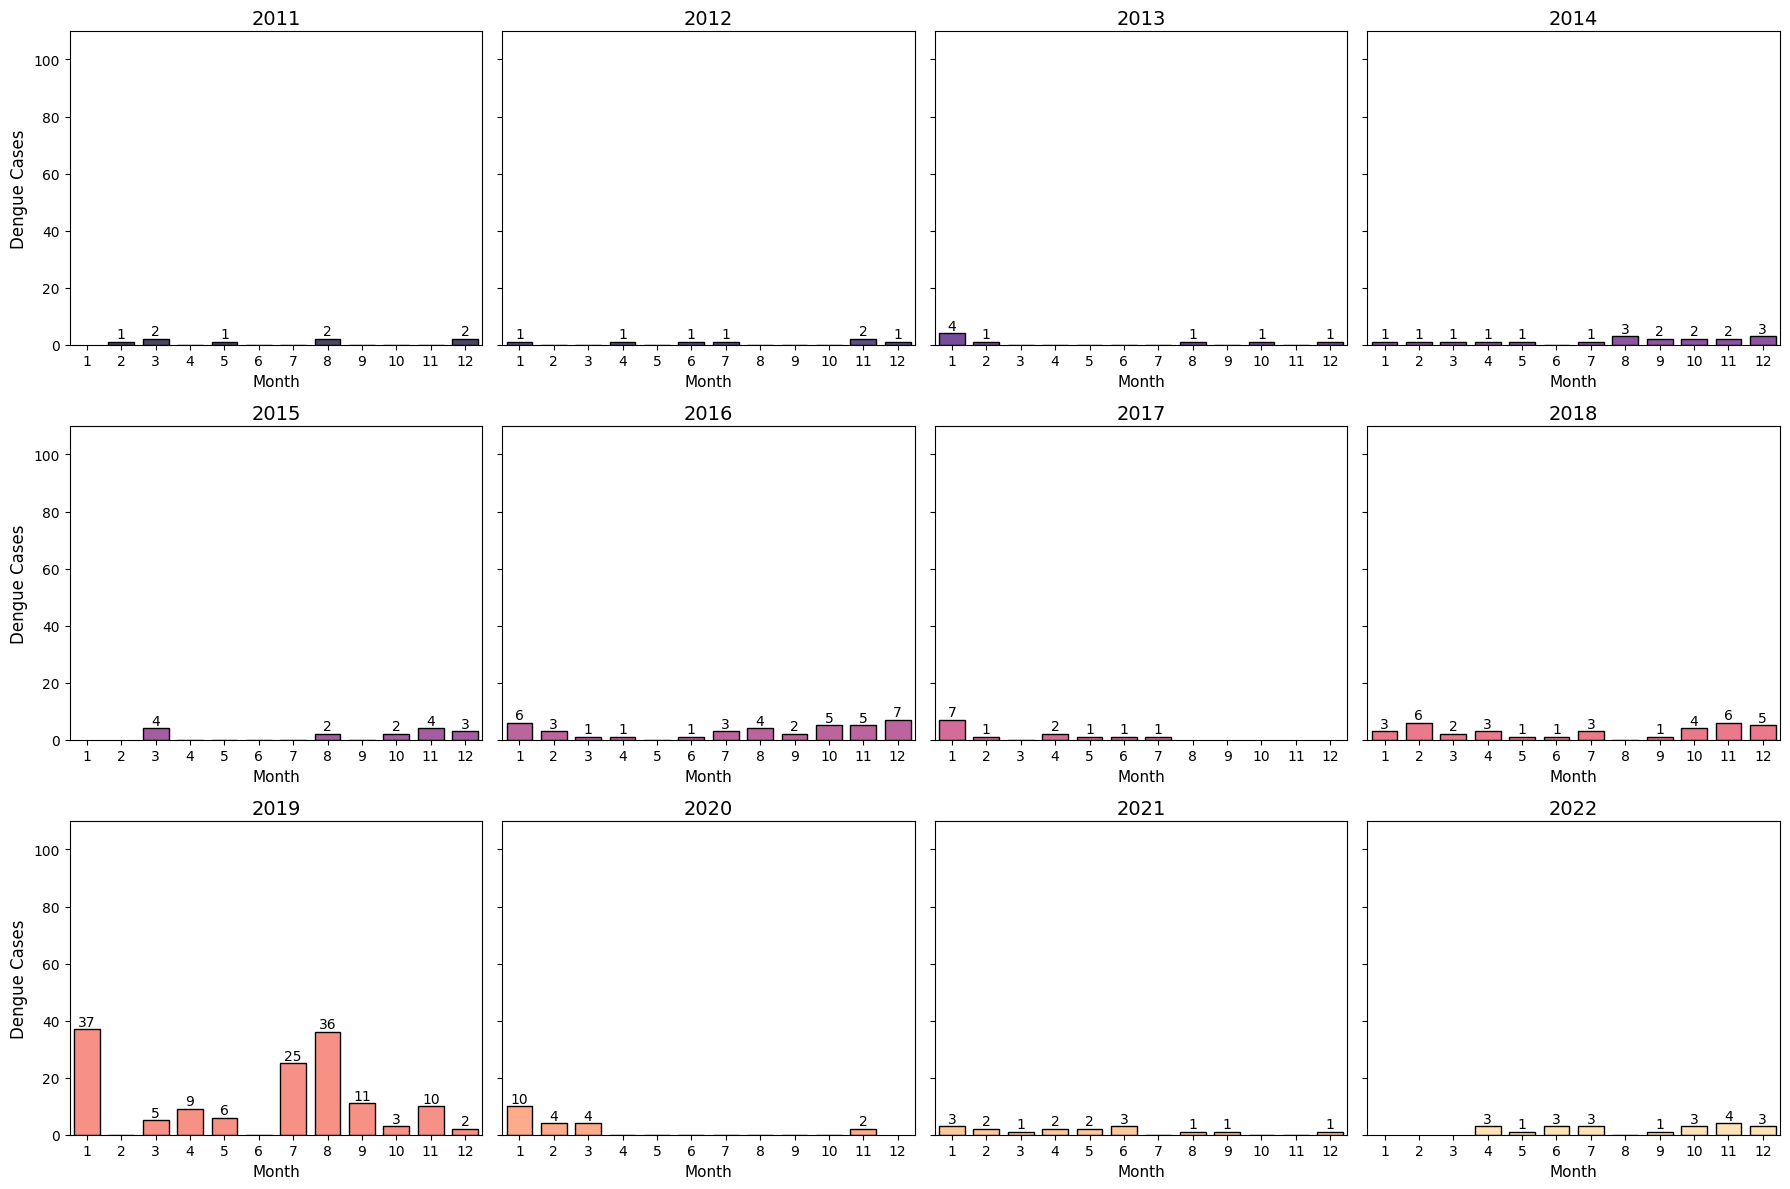

In [94]:
#HISTOGRAM FOR MONTHLY CASES EVERY YEAR
plot_dengue_cases(df, "SANTIAGO")

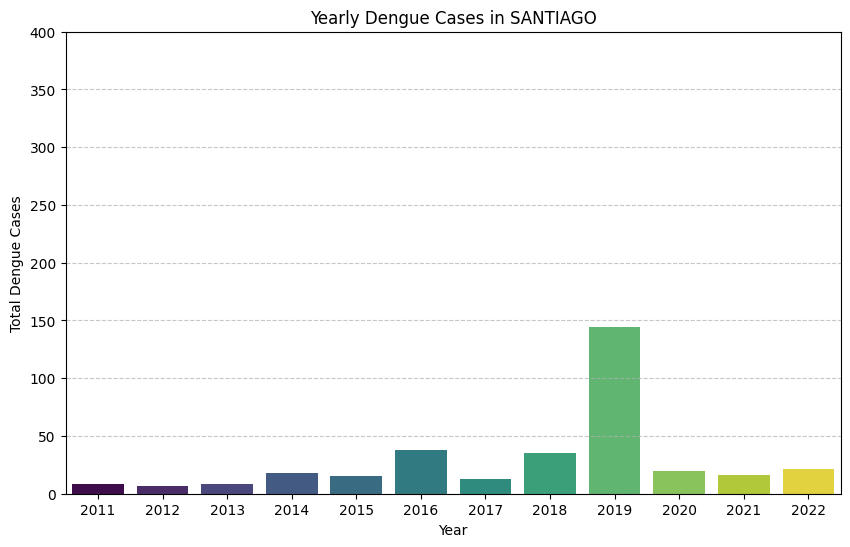

In [95]:
plot_total_dengue_cases_yearly(df, "SANTIAGO")

<div style="
    background-color: black; 
    color: white; 
    padding: 10px; 
    border-radius: 10px; 
    text-align: center;
    max-width: 100vw; 
    width: 100%;
    box-sizing: border-box;">
    SANTO ROSARIO MONTHLY CASES
</div>


In [96]:
selected_barangay = "SANTO ROSARIO"  # Change this to any barangay you want
barangay_data = get_selected_barangay(df, selected_barangay)

# Display the data for each year
for year, data in barangay_data.items():
    display(data)

Barangay_No       Barangay       x         y  Year  Month  Dengue Cases  \
32            32  SANTO ROSARIO  8.2436  124.2525  2011      1             0   
76            32  SANTO ROSARIO  8.2436  124.2525  2011      2             1   
120           32  SANTO ROSARIO  8.2436  124.2525  2011      3             2   
164           32  SANTO ROSARIO  8.2436  124.2525  2011      4             0   
208           32  SANTO ROSARIO  8.2436  124.2525  2011      5             0   
252           32  SANTO ROSARIO  8.2436  124.2525  2011      6             0   
296           32  SANTO ROSARIO  8.2436  124.2525  2011      7             0   
340           32  SANTO ROSARIO  8.2436  124.2525  2011      8             0   
384           32  SANTO ROSARIO  8.2436  124.2525  2011      9             0   
428           32  SANTO ROSARIO  8.2436  124.2525  2011     10             0   
472           32  SANTO ROSARIO  8.2436  124.2525  2011     11             0   
516           32  SANTO ROSARIO  8.2436  124.2525  2011     12             1   

     Temperature  Humidity  Rainfall  
32          23.8      88.1       7.0  
76          24.1      87.2      12.0  
120         25.3      85.5      20.0  
164         26.0      83.1      35.0  
208         27.2      81.9      55.0  
252         26.4      83.5      90.0  
296         25.7      84.7     110.0  
340         25.1      85.3      95.0  
384         24.4      86.2      70.0  
428         24.0      87.0      50.0  
472         23.6      88.4      30.0  
516         23.2      89.1      15.0

Barangay_No       Barangay       x         y  Year  Month  Dengue Cases  \
560            32  SANTO ROSARIO  8.2436  124.2525  2012      1             1   
604            32  SANTO ROSARIO  8.2436  124.2525  2012      2             1   
648            32  SANTO ROSARIO  8.2436  124.2525  2012      3             0   
692            32  SANTO ROSARIO  8.2436  124.2525  2012      4             0   
736            32  SANTO ROSARIO  8.2436  124.2525  2012      5             0   
780            32  SANTO ROSARIO  8.2436  124.2525  2012      6             0   
824            32  SANTO ROSARIO  8.2436  124.2525  2012      7             0   
868            32  SANTO ROSARIO  8.2436  124.2525  2012      8             2   
912            32  SANTO ROSARIO  8.2436  124.2525  2012      9             0   
956            32  SANTO ROSARIO  8.2436  124.2525  2012     10             0   
1000           32  SANTO ROSARIO  8.2436  124.2525  2012     11             2   
1044           32  SANTO ROSARIO  8.2436  124.2525  2012     12             0   

      Temperature  Humidity  Rainfall  
560          24.3      85.1       4.0  
604          24.3      85.7       7.1  
648          24.6      83.3       3.1  
692          25.4      82.3       6.9  
736          25.1      86.4       6.9  
780          24.7      85.3       7.9  
824          24.9      85.2       6.4  
868          24.9      85.2       6.4  
912          24.1      88.1      11.4  
956          24.6      86.5       8.4  
1000         24.8      84.8       4.1  
1044         24.7      84.8       5.7

Barangay_No       Barangay       x         y  Year  Month  Dengue Cases  \
1088           32  SANTO ROSARIO  8.2436  124.2525  2013      1             0   
1132           32  SANTO ROSARIO  8.2436  124.2525  2013      2             0   
1176           32  SANTO ROSARIO  8.2436  124.2525  2013      3             0   
1220           32  SANTO ROSARIO  8.2436  124.2525  2013      4             0   
1264           32  SANTO ROSARIO  8.2436  124.2525  2013      5             0   
1308           32  SANTO ROSARIO  8.2436  124.2525  2013      6             0   
1352           32  SANTO ROSARIO  8.2436  124.2525  2013      7             0   
1396           32  SANTO ROSARIO  8.2436  124.2525  2013      8             0   
1440           32  SANTO ROSARIO  8.2436  124.2525  2013      9             0   
1484           32  SANTO ROSARIO  8.2436  124.2525  2013     10             0   
1528           32  SANTO ROSARIO  8.2436  124.2525  2013     11             0   
1572           32  SANTO ROSARIO  8.2436  124.2525  2013     12             0   

      Temperature  Humidity  Rainfall  
1088         24.2      88.2       8.1  
1132         24.4      84.7       6.0  
1176         25.5      81.1       2.7  
1220         26.0      81.0       4.9  
1264         26.0      82.8       5.2  
1308         24.9      86.9       9.2  
1352         24.5      87.7      11.0  
1396         24.3      87.2       6.9  
1440         24.6      86.5       4.9  
1484         24.0      88.0      10.4  
1528         24.2      85.9       7.8  
1572         24.4      84.0       3.5

Barangay_No       Barangay       x         y  Year  Month  Dengue Cases  \
1616           32  SANTO ROSARIO  8.2436  124.2525  2014      1             0   
1660           32  SANTO ROSARIO  8.2436  124.2525  2014      2             0   
1704           32  SANTO ROSARIO  8.2436  124.2525  2014      3             2   
1748           32  SANTO ROSARIO  8.2436  124.2525  2014      4             0   
1792           32  SANTO ROSARIO  8.2436  124.2525  2014      5             0   
1836           32  SANTO ROSARIO  8.2436  124.2525  2014      6             0   
1880           32  SANTO ROSARIO  8.2436  124.2525  2014      7             0   
1924           32  SANTO ROSARIO  8.2436  124.2525  2014      8             0   
1968           32  SANTO ROSARIO  8.2436  124.2525  2014      9             0   
2012           32  SANTO ROSARIO  8.2436  124.2525  2014     10             0   
2056           32  SANTO ROSARIO  8.2436  124.2525  2014     11             0   
2100           32  SANTO ROSARIO  8.2436  124.2525  2014     12             1   

      Temperature  Humidity  Rainfall  
1616         23.2      86.4       6.8  
1660         23.7      82.4       2.3  
1704         24.3      82.5       3.8  
1748         25.1      81.4       2.0  
1792         25.3      84.0       4.9  
1836         24.5      87.1       6.6  
1880         23.4      89.1       8.5  
1924         23.9      87.7       8.0  
1968         23.4      88.5       7.1  
2012         23.9      88.4       8.5  
2056         24.7      85.2       6.1  
2100         24.0      85.3       4.9

Barangay_No       Barangay       x         y  Year  Month  Dengue Cases  \
2144           32  SANTO ROSARIO  8.2436  124.2525  2015      1             0   
2188           32  SANTO ROSARIO  8.2436  124.2525  2015      2             0   
2232           32  SANTO ROSARIO  8.2436  124.2525  2015      3             0   
2276           32  SANTO ROSARIO  8.2436  124.2525  2015      4             0   
2320           32  SANTO ROSARIO  8.2436  124.2525  2015      5             0   
2364           32  SANTO ROSARIO  8.2436  124.2525  2015      6             0   
2408           32  SANTO ROSARIO  8.2436  124.2525  2015      7             2   
2452           32  SANTO ROSARIO  8.2436  124.2525  2015      8             0   
2496           32  SANTO ROSARIO  8.2436  124.2525  2015      9             2   
2540           32  SANTO ROSARIO  8.2436  124.2525  2015     10             0   
2584           32  SANTO ROSARIO  8.2436  124.2525  2015     11             0   
2628           32  SANTO ROSARIO  8.2436  124.2525  2015     12             1   

      Temperature  Humidity  Rainfall  
2144         25.6      89.0       5.9  
2188         25.6      87.0       3.0  
2232         26.1      83.2       1.1  
2276         27.3      82.8       2.1  
2320         28.4      78.1       2.7  
2364         27.4      81.9       8.7  
2408         27.6      80.4       4.2  
2452         27.5      80.9       5.5  
2496         27.2      82.4       8.2  
2540         27.2      83.4       4.9  
2584         26.8      87.3       6.5  
2628         26.5      87.1       4.8

Barangay_No       Barangay       x         y  Year  Month  Dengue Cases  \
2672           32  SANTO ROSARIO  8.2436  124.2525  2016      1             2   
2716           32  SANTO ROSARIO  8.2436  124.2525  2016      2             3   
2760           32  SANTO ROSARIO  8.2436  124.2525  2016      3             3   
2804           32  SANTO ROSARIO  8.2436  124.2525  2016      4             0   
2848           32  SANTO ROSARIO  8.2436  124.2525  2016      5             0   
2892           32  SANTO ROSARIO  8.2436  124.2525  2016      6             0   
2936           32  SANTO ROSARIO  8.2436  124.2525  2016      7             3   
2980           32  SANTO ROSARIO  8.2436  124.2525  2016      8             5   
3024           32  SANTO ROSARIO  8.2436  124.2525  2016      9             2   
3068           32  SANTO ROSARIO  8.2436  124.2525  2016     10             3   
3112           32  SANTO ROSARIO  8.2436  124.2525  2016     11             1   
3156           32  SANTO ROSARIO  8.2436  124.2525  2016     12             0   

      Temperature  Humidity  Rainfall  
2672         26.2      86.9       1.6  
2716         26.1      88.2       2.6  
2760         26.8      84.4       0.4  
2804         28.1      80.1       1.5  
2848         28.3      81.9       8.3  
2892         27.5      83.9      12.5  
2936         27.6      82.0       5.2  
2980         27.8      80.3       2.7  
3024         27.2      82.4       6.2  
3068         27.1      84.6       8.9  
3112         26.5      86.6       7.6  
3156         26.7      86.9       8.2

Barangay_No       Barangay       x         y  Year  Month  Dengue Cases  \
3200           32  SANTO ROSARIO  8.2436  124.2525  2017      1             0   
3244           32  SANTO ROSARIO  8.2436  124.2525  2017      2             1   
3288           32  SANTO ROSARIO  8.2436  124.2525  2017      3             0   
3332           32  SANTO ROSARIO  8.2436  124.2525  2017      4             0   
3376           32  SANTO ROSARIO  8.2436  124.2525  2017      5             0   
3420           32  SANTO ROSARIO  8.2436  124.2525  2017      6             0   
3464           32  SANTO ROSARIO  8.2436  124.2525  2017      7             0   
3508           32  SANTO ROSARIO  8.2436  124.2525  2017      8             2   
3552           32  SANTO ROSARIO  8.2436  124.2525  2017      9             1   
3596           32  SANTO ROSARIO  8.2436  124.2525  2017     10             0   
3640           32  SANTO ROSARIO  8.2436  124.2525  2017     11             2   
3684           32  SANTO ROSARIO  8.2436  124.2525  2017     12             1   

      Temperature  Humidity  Rainfall  
3200         25.9      88.9      12.5  
3244         25.6      87.8       5.9  
3288         26.1      87.4       8.0  
3332         27.2      85.0       5.1  
3376         27.8      84.4      10.4  
3420         27.4      83.8       7.8  
3464         27.2      82.6       9.1  
3508         27.9      83.4       9.6  
3552         27.3      83.3      11.4  
3596         27.0      84.0       8.3  
3640         27.0      86.6       7.3  
3684         26.7      85.9       9.6

Barangay_No       Barangay       x         y  Year  Month  Dengue Cases  \
3728           32  SANTO ROSARIO  8.2436  124.2525  2018      1             0   
3772           32  SANTO ROSARIO  8.2436  124.2525  2018      2             0   
3816           32  SANTO ROSARIO  8.2436  124.2525  2018      3             3   
3860           32  SANTO ROSARIO  8.2436  124.2525  2018      4             0   
3904           32  SANTO ROSARIO  8.2436  124.2525  2018      5             0   
3948           32  SANTO ROSARIO  8.2436  124.2525  2018      6             0   
3992           32  SANTO ROSARIO  8.2436  124.2525  2018      7             0   
4036           32  SANTO ROSARIO  8.2436  124.2525  2018      8             0   
4080           32  SANTO ROSARIO  8.2436  124.2525  2018      9             0   
4124           32  SANTO ROSARIO  8.2436  124.2525  2018     10             0   
4168           32  SANTO ROSARIO  8.2436  124.2525  2018     11             2   
4212           32  SANTO ROSARIO  8.2436  124.2525  2018     12             0   

      Temperature  Humidity  Rainfall  
3728         26.2      87.5       7.3  
3772         26.4      86.0       9.7  
3816         26.5      84.6       3.7  
3860         27.4      82.5       2.6  
3904         27.9      82.0       6.9  
3948         27.7      80.7       5.2  
3992         27.3      81.6       4.7  
4036         27.4      79.8       2.1  
4080         26.9      82.2       5.4  
4124         27.2      82.7       4.2  
4168         26.5      86.6       6.1  
4212         26.3      88.1       5.8

Barangay_No       Barangay       x         y  Year  Month  Dengue Cases  \
4256           32  SANTO ROSARIO  8.2436  124.2525  2019      1             0   
4300           32  SANTO ROSARIO  8.2436  124.2525  2019      2             3   
4344           32  SANTO ROSARIO  8.2436  124.2525  2019      3             0   
4388           32  SANTO ROSARIO  8.2436  124.2525  2019      4             0   
4432           32  SANTO ROSARIO  8.2436  124.2525  2019      5             0   
4476           32  SANTO ROSARIO  8.2436  124.2525  2019      6             3   
4520           32  SANTO ROSARIO  8.2436  124.2525  2019      7             0   
4564           32  SANTO ROSARIO  8.2436  124.2525  2019      8             9   
4608           32  SANTO ROSARIO  8.2436  124.2525  2019      9            10   
4652           32  SANTO ROSARIO  8.2436  124.2525  2019     10             3   
4696           32  SANTO ROSARIO  8.2436  124.2525  2019     11             3   
4740           32  SANTO ROSARIO  8.2436  124.2525  2019     12             0   

      Temperature  Humidity  Rainfall  
4256         25.5      88.2       5.7  
4300         25.3      84.3       1.1  
4344         26.1      83.2       1.9  
4388         27.5      80.3       1.8  
4432         28.4      78.6       4.4  
4476         27.8      82.7       9.1  
4520         27.2      82.1       6.2  
4564         27.7      77.1       1.4  
4608         27.8      78.2       3.3  
4652         27.0      83.8       7.7  
4696         27.1      82.9       4.3  
4740         26.4      86.4       4.2

Barangay_No       Barangay       x         y  Year  Month  Dengue Cases  \
4784           32  SANTO ROSARIO  8.2436  124.2525  2020      1             0   
4828           32  SANTO ROSARIO  8.2436  124.2525  2020      2             0   
4872           32  SANTO ROSARIO  8.2436  124.2525  2020      3             2   
4916           32  SANTO ROSARIO  8.2436  124.2525  2020      4             0   
4960           32  SANTO ROSARIO  8.2436  124.2525  2020      5             0   
5004           32  SANTO ROSARIO  8.2436  124.2525  2020      6             0   
5048           32  SANTO ROSARIO  8.2436  124.2525  2020      7             0   
5092           32  SANTO ROSARIO  8.2436  124.2525  2020      8             0   
5136           32  SANTO ROSARIO  8.2436  124.2525  2020      9             0   
5180           32  SANTO ROSARIO  8.2436  124.2525  2020     10             0   
5224           32  SANTO ROSARIO  8.2436  124.2525  2020     11             0   
5268           32  SANTO ROSARIO  8.2436  124.2525  2020     12             0   

      Temperature  Humidity  Rainfall  
4784         26.3      86.8       2.1  
4828         25.7      87.2       3.5  
4872         26.4      85.2       2.0  
4916         27.2      81.6       1.0  
4960         28.0      83.2       9.8  
5004         27.3      84.1      14.1  
5048         27.0      83.9      15.7  
5092         27.2      82.9      11.7  
5136         27.2      83.7       9.2  
5180         26.9      84.2      13.2  
5224         26.8      86.2       5.5  
5268         26.7      86.6       8.2

Barangay_No       Barangay       x         y  Year  Month  Dengue Cases  \
5312           32  SANTO ROSARIO  8.2436  124.2525  2021      1             0   
5356           32  SANTO ROSARIO  8.2436  124.2525  2021      2             0   
5400           32  SANTO ROSARIO  8.2436  124.2525  2021      3             0   
5444           32  SANTO ROSARIO  8.2436  124.2525  2021      4             0   
5488           32  SANTO ROSARIO  8.2436  124.2525  2021      5             1   
5532           32  SANTO ROSARIO  8.2436  124.2525  2021      6             0   
5576           32  SANTO ROSARIO  8.2436  124.2525  2021      7             0   
5620           32  SANTO ROSARIO  8.2436  124.2525  2021      8             0   
5664           32  SANTO ROSARIO  8.2436  124.2525  2021      9             2   
5708           32  SANTO ROSARIO  8.2436  124.2525  2021     10             1   
5752           32  SANTO ROSARIO  8.2436  124.2525  2021     11             1   
5796           32  SANTO ROSARIO  8.2436  124.2525  2021     12             2   

      Temperature  Humidity  Rainfall  
5312         25.9      88.5      11.9  
5356         26.0      87.1      12.6  
5400         26.8      84.7       5.5  
5444         27.1      82.5       4.5  
5488         27.5      84.0      10.7  
5532         27.6      81.3       8.2  
5576         27.7      80.0       4.4  
5620         27.5      80.0       6.5  
5664         27.2      82.7       9.5  
5708         27.3      83.6       8.7  
5752         27.0      86.4       9.4  
5796         26.2      86.9       9.8

Barangay_No       Barangay       x         y  Year  Month  Dengue Cases  \
5840           32  SANTO ROSARIO  8.2436  124.2525  2022      1             1   
5884           32  SANTO ROSARIO  8.2436  124.2525  2022      2             2   
5928           32  SANTO ROSARIO  8.2436  124.2525  2022      3             2   
5972           32  SANTO ROSARIO  8.2436  124.2525  2022      4             2   
6016           32  SANTO ROSARIO  8.2436  124.2525  2022      5             0   
6060           32  SANTO ROSARIO  8.2436  124.2525  2022      6             1   
6104           32  SANTO ROSARIO  8.2436  124.2525  2022      7             0   
6148           32  SANTO ROSARIO  8.2436  124.2525  2022      8             2   
6192           32  SANTO ROSARIO  8.2436  124.2525  2022      9             1   
6236           32  SANTO ROSARIO  8.2436  124.2525  2022     10             0   
6280           32  SANTO ROSARIO  8.2436  124.2525  2022     11             1   
6324           32  SANTO ROSARIO  8.2436  124.2525  2022     12             0   

      Temperature  Humidity  Rainfall  
5840         26.0      86.9       8.3  
5884         26.0      87.2       3.9  
5928         26.8      86.5      11.0  
5972         26.8      86.5      12.2  
6016         27.4      83.9      11.5  
6060         27.6      81.9       7.1  
6104         27.4      83.2      11.6  
6148         27.3      82.0       7.9  
6192         27.5      81.1       6.1  
6236         27.1      84.2       9.0  
6280         27.0      85.8       6.6  
6324         26.4      87.1      14.5

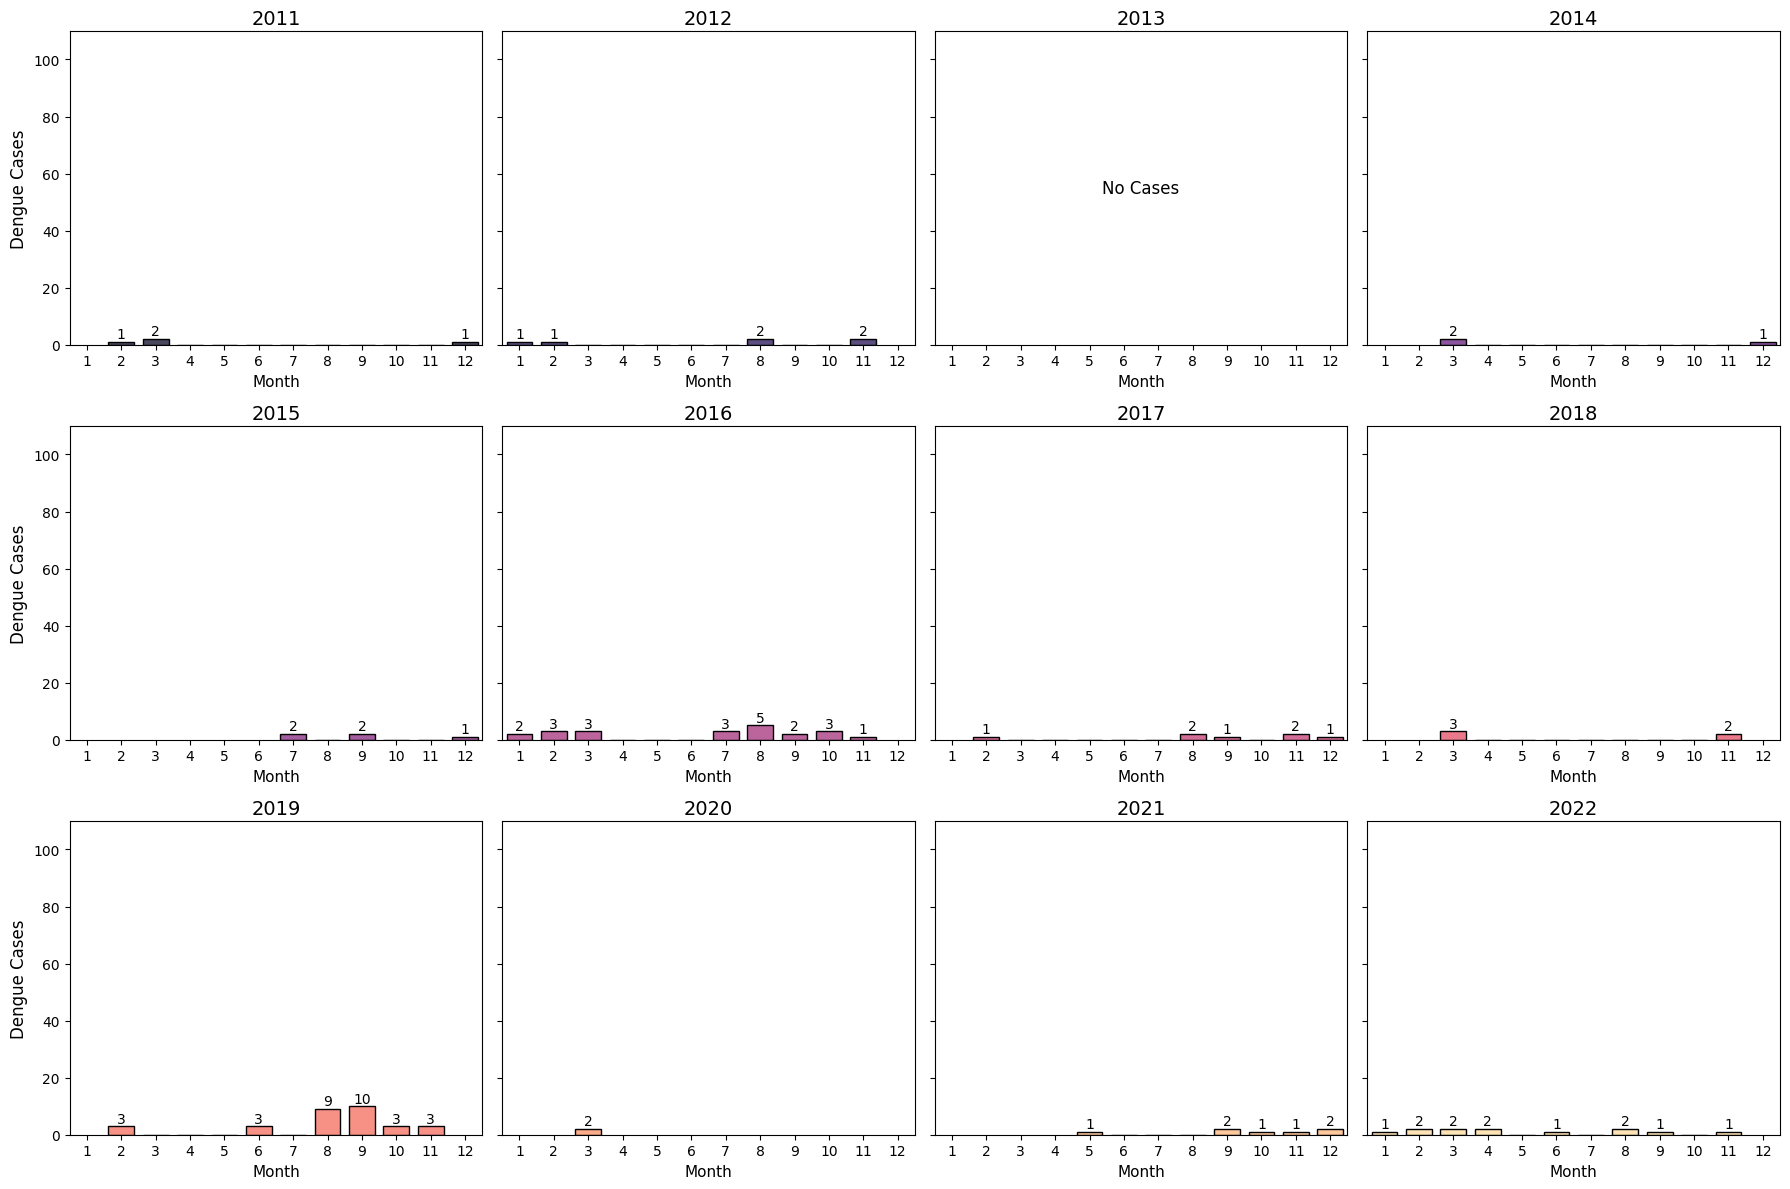

In [97]:
#HISTOGRAM FOR MONTHLY CASES EVERY YEAR
plot_dengue_cases(df, "SANTO ROSARIO")

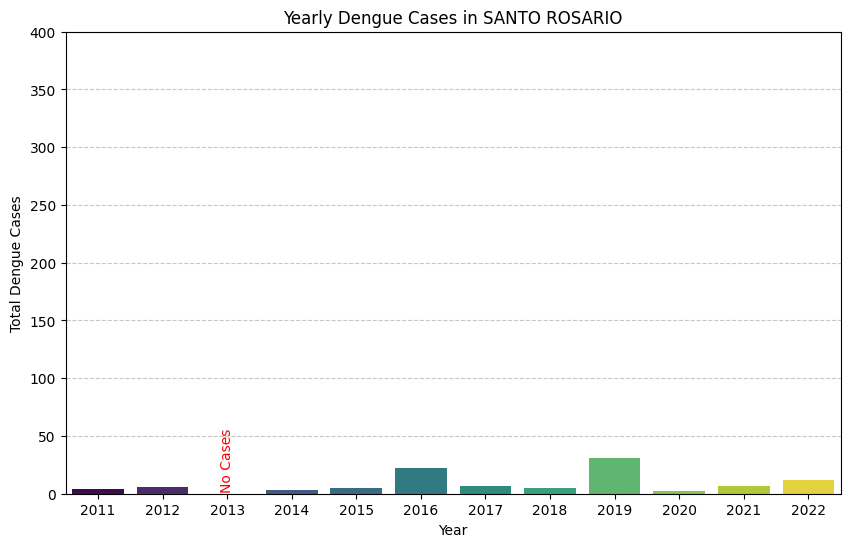

In [98]:
plot_total_dengue_cases_yearly(df, "SANTO ROSARIO")

<div style="
    background-color: black; 
    color: white; 
    padding: 10px; 
    border-radius: 10px; 
    text-align: center;
    max-width: 100vw; 
    width: 100%;
    box-sizing: border-box;">
    SARAY-TIBANGA MONTHLY CASES
</div>


In [99]:
selected_barangay = "SARAY-TIBANGA"  # Change this to any barangay you want
barangay_data = get_selected_barangay(df, selected_barangay)

# Display the data for each year
for year, data in barangay_data.items():
    display(data)

Barangay_No       Barangay       x         y  Year  Month  Dengue Cases  \
33            33  SARAY-TIBANGA  8.2436  124.2525  2011      1             0   
77            33  SARAY-TIBANGA  8.2436  124.2525  2011      2             0   
121           33  SARAY-TIBANGA  8.2436  124.2525  2011      3             0   
165           33  SARAY-TIBANGA  8.2436  124.2525  2011      4             1   
209           33  SARAY-TIBANGA  8.2436  124.2525  2011      5             0   
253           33  SARAY-TIBANGA  8.2436  124.2525  2011      6             0   
297           33  SARAY-TIBANGA  8.2436  124.2525  2011      7             0   
341           33  SARAY-TIBANGA  8.2436  124.2525  2011      8             0   
385           33  SARAY-TIBANGA  8.2436  124.2525  2011      9             0   
429           33  SARAY-TIBANGA  8.2436  124.2525  2011     10             0   
473           33  SARAY-TIBANGA  8.2436  124.2525  2011     11             0   
517           33  SARAY-TIBANGA  8.2436  124.2525  2011     12             0   

     Temperature  Humidity  Rainfall  
33          23.8      88.1       7.0  
77          24.1      87.2      12.0  
121         25.3      85.5      20.0  
165         26.0      83.1      35.0  
209         27.2      81.9      55.0  
253         26.4      83.5      90.0  
297         25.7      84.7     110.0  
341         25.1      85.3      95.0  
385         24.4      86.2      70.0  
429         24.0      87.0      50.0  
473         23.6      88.4      30.0  
517         23.2      89.1      15.0

Barangay_No       Barangay       x         y  Year  Month  Dengue Cases  \
561            33  SARAY-TIBANGA  8.2436  124.2525  2012      1             0   
605            33  SARAY-TIBANGA  8.2436  124.2525  2012      2             0   
649            33  SARAY-TIBANGA  8.2436  124.2525  2012      3             0   
693            33  SARAY-TIBANGA  8.2436  124.2525  2012      4             0   
737            33  SARAY-TIBANGA  8.2436  124.2525  2012      5             1   
781            33  SARAY-TIBANGA  8.2436  124.2525  2012      6             4   
825            33  SARAY-TIBANGA  8.2436  124.2525  2012      7             0   
869            33  SARAY-TIBANGA  8.2436  124.2525  2012      8             2   
913            33  SARAY-TIBANGA  8.2436  124.2525  2012      9             1   
957            33  SARAY-TIBANGA  8.2436  124.2525  2012     10             1   
1001           33  SARAY-TIBANGA  8.2436  124.2525  2012     11             2   
1045           33  SARAY-TIBANGA  8.2436  124.2525  2012     12             0   

      Temperature  Humidity  Rainfall  
561          24.3      85.1       4.0  
605          24.3      85.7       7.1  
649          24.6      83.3       3.1  
693          25.4      82.3       6.9  
737          25.1      86.4       6.9  
781          24.7      85.3       7.9  
825          24.9      85.2       6.4  
869          24.9      85.2       6.4  
913          24.1      88.1      11.4  
957          24.6      86.5       8.4  
1001         24.8      84.8       4.1  
1045         24.7      84.8       5.7

Barangay_No       Barangay       x         y  Year  Month  Dengue Cases  \
1089           33  SARAY-TIBANGA  8.2436  124.2525  2013      1             1   
1133           33  SARAY-TIBANGA  8.2436  124.2525  2013      2             0   
1177           33  SARAY-TIBANGA  8.2436  124.2525  2013      3             0   
1221           33  SARAY-TIBANGA  8.2436  124.2525  2013      4             0   
1265           33  SARAY-TIBANGA  8.2436  124.2525  2013      5             0   
1309           33  SARAY-TIBANGA  8.2436  124.2525  2013      6             0   
1353           33  SARAY-TIBANGA  8.2436  124.2525  2013      7             0   
1397           33  SARAY-TIBANGA  8.2436  124.2525  2013      8             0   
1441           33  SARAY-TIBANGA  8.2436  124.2525  2013      9             1   
1485           33  SARAY-TIBANGA  8.2436  124.2525  2013     10             0   
1529           33  SARAY-TIBANGA  8.2436  124.2525  2013     11             0   
1573           33  SARAY-TIBANGA  8.2436  124.2525  2013     12             0   

      Temperature  Humidity  Rainfall  
1089         24.2      88.2       8.1  
1133         24.4      84.7       6.0  
1177         25.5      81.1       2.7  
1221         26.0      81.0       4.9  
1265         26.0      82.8       5.2  
1309         24.9      86.9       9.2  
1353         24.5      87.7      11.0  
1397         24.3      87.2       6.9  
1441         24.6      86.5       4.9  
1485         24.0      88.0      10.4  
1529         24.2      85.9       7.8  
1573         24.4      84.0       3.5

Barangay_No       Barangay       x         y  Year  Month  Dengue Cases  \
1617           33  SARAY-TIBANGA  8.2436  124.2525  2014      1             0   
1661           33  SARAY-TIBANGA  8.2436  124.2525  2014      2             1   
1705           33  SARAY-TIBANGA  8.2436  124.2525  2014      3             0   
1749           33  SARAY-TIBANGA  8.2436  124.2525  2014      4             0   
1793           33  SARAY-TIBANGA  8.2436  124.2525  2014      5             0   
1837           33  SARAY-TIBANGA  8.2436  124.2525  2014      6             0   
1881           33  SARAY-TIBANGA  8.2436  124.2525  2014      7             1   
1925           33  SARAY-TIBANGA  8.2436  124.2525  2014      8             2   
1969           33  SARAY-TIBANGA  8.2436  124.2525  2014      9             0   
2013           33  SARAY-TIBANGA  8.2436  124.2525  2014     10             1   
2057           33  SARAY-TIBANGA  8.2436  124.2525  2014     11             0   
2101           33  SARAY-TIBANGA  8.2436  124.2525  2014     12             0   

      Temperature  Humidity  Rainfall  
1617         23.2      86.4       6.8  
1661         23.7      82.4       2.3  
1705         24.3      82.5       3.8  
1749         25.1      81.4       2.0  
1793         25.3      84.0       4.9  
1837         24.5      87.1       6.6  
1881         23.4      89.1       8.5  
1925         23.9      87.7       8.0  
1969         23.4      88.5       7.1  
2013         23.9      88.4       8.5  
2057         24.7      85.2       6.1  
2101         24.0      85.3       4.9

Barangay_No       Barangay       x         y  Year  Month  Dengue Cases  \
2145           33  SARAY-TIBANGA  8.2436  124.2525  2015      1             1   
2189           33  SARAY-TIBANGA  8.2436  124.2525  2015      2             3   
2233           33  SARAY-TIBANGA  8.2436  124.2525  2015      3             0   
2277           33  SARAY-TIBANGA  8.2436  124.2525  2015      4             0   
2321           33  SARAY-TIBANGA  8.2436  124.2525  2015      5             0   
2365           33  SARAY-TIBANGA  8.2436  124.2525  2015      6             0   
2409           33  SARAY-TIBANGA  8.2436  124.2525  2015      7             0   
2453           33  SARAY-TIBANGA  8.2436  124.2525  2015      8             1   
2497           33  SARAY-TIBANGA  8.2436  124.2525  2015      9             0   
2541           33  SARAY-TIBANGA  8.2436  124.2525  2015     10             3   
2585           33  SARAY-TIBANGA  8.2436  124.2525  2015     11            10   
2629           33  SARAY-TIBANGA  8.2436  124.2525  2015     12             5   

      Temperature  Humidity  Rainfall  
2145         25.6      89.0       5.9  
2189         25.6      87.0       3.0  
2233         26.1      83.2       1.1  
2277         27.3      82.8       2.1  
2321         28.4      78.1       2.7  
2365         27.4      81.9       8.7  
2409         27.6      80.4       4.2  
2453         27.5      80.9       5.5  
2497         27.2      82.4       8.2  
2541         27.2      83.4       4.9  
2585         26.8      87.3       6.5  
2629         26.5      87.1       4.8

Barangay_No       Barangay       x         y  Year  Month  Dengue Cases  \
2673           33  SARAY-TIBANGA  8.2436  124.2525  2016      1             2   
2717           33  SARAY-TIBANGA  8.2436  124.2525  2016      2             1   
2761           33  SARAY-TIBANGA  8.2436  124.2525  2016      3             0   
2805           33  SARAY-TIBANGA  8.2436  124.2525  2016      4             1   
2849           33  SARAY-TIBANGA  8.2436  124.2525  2016      5             0   
2893           33  SARAY-TIBANGA  8.2436  124.2525  2016      6             1   
2937           33  SARAY-TIBANGA  8.2436  124.2525  2016      7             3   
2981           33  SARAY-TIBANGA  8.2436  124.2525  2016      8             1   
3025           33  SARAY-TIBANGA  8.2436  124.2525  2016      9             4   
3069           33  SARAY-TIBANGA  8.2436  124.2525  2016     10             2   
3113           33  SARAY-TIBANGA  8.2436  124.2525  2016     11             2   
3157           33  SARAY-TIBANGA  8.2436  124.2525  2016     12             5   

      Temperature  Humidity  Rainfall  
2673         26.2      86.9       1.6  
2717         26.1      88.2       2.6  
2761         26.8      84.4       0.4  
2805         28.1      80.1       1.5  
2849         28.3      81.9       8.3  
2893         27.5      83.9      12.5  
2937         27.6      82.0       5.2  
2981         27.8      80.3       2.7  
3025         27.2      82.4       6.2  
3069         27.1      84.6       8.9  
3113         26.5      86.6       7.6  
3157         26.7      86.9       8.2

Barangay_No       Barangay       x         y  Year  Month  Dengue Cases  \
3201           33  SARAY-TIBANGA  8.2436  124.2525  2017      1             8   
3245           33  SARAY-TIBANGA  8.2436  124.2525  2017      2             3   
3289           33  SARAY-TIBANGA  8.2436  124.2525  2017      3             0   
3333           33  SARAY-TIBANGA  8.2436  124.2525  2017      4             1   
3377           33  SARAY-TIBANGA  8.2436  124.2525  2017      5             0   
3421           33  SARAY-TIBANGA  8.2436  124.2525  2017      6             0   
3465           33  SARAY-TIBANGA  8.2436  124.2525  2017      7             0   
3509           33  SARAY-TIBANGA  8.2436  124.2525  2017      8             0   
3553           33  SARAY-TIBANGA  8.2436  124.2525  2017      9             0   
3597           33  SARAY-TIBANGA  8.2436  124.2525  2017     10             0   
3641           33  SARAY-TIBANGA  8.2436  124.2525  2017     11             1   
3685           33  SARAY-TIBANGA  8.2436  124.2525  2017     12             0   

      Temperature  Humidity  Rainfall  
3201         25.9      88.9      12.5  
3245         25.6      87.8       5.9  
3289         26.1      87.4       8.0  
3333         27.2      85.0       5.1  
3377         27.8      84.4      10.4  
3421         27.4      83.8       7.8  
3465         27.2      82.6       9.1  
3509         27.9      83.4       9.6  
3553         27.3      83.3      11.4  
3597         27.0      84.0       8.3  
3641         27.0      86.6       7.3  
3685         26.7      85.9       9.6

Barangay_No       Barangay       x         y  Year  Month  Dengue Cases  \
3729           33  SARAY-TIBANGA  8.2436  124.2525  2018      1             0   
3773           33  SARAY-TIBANGA  8.2436  124.2525  2018      2             0   
3817           33  SARAY-TIBANGA  8.2436  124.2525  2018      3             0   
3861           33  SARAY-TIBANGA  8.2436  124.2525  2018      4             0   
3905           33  SARAY-TIBANGA  8.2436  124.2525  2018      5             4   
3949           33  SARAY-TIBANGA  8.2436  124.2525  2018      6             1   
3993           33  SARAY-TIBANGA  8.2436  124.2525  2018      7             0   
4037           33  SARAY-TIBANGA  8.2436  124.2525  2018      8             0   
4081           33  SARAY-TIBANGA  8.2436  124.2525  2018      9             4   
4125           33  SARAY-TIBANGA  8.2436  124.2525  2018     10             3   
4169           33  SARAY-TIBANGA  8.2436  124.2525  2018     11             2   
4213           33  SARAY-TIBANGA  8.2436  124.2525  2018     12             1   

      Temperature  Humidity  Rainfall  
3729         26.2      87.5       7.3  
3773         26.4      86.0       9.7  
3817         26.5      84.6       3.7  
3861         27.4      82.5       2.6  
3905         27.9      82.0       6.9  
3949         27.7      80.7       5.2  
3993         27.3      81.6       4.7  
4037         27.4      79.8       2.1  
4081         26.9      82.2       5.4  
4125         27.2      82.7       4.2  
4169         26.5      86.6       6.1  
4213         26.3      88.1       5.8

Barangay_No       Barangay       x         y  Year  Month  Dengue Cases  \
4257           33  SARAY-TIBANGA  8.2436  124.2525  2019      1             4   
4301           33  SARAY-TIBANGA  8.2436  124.2525  2019      2             3   
4345           33  SARAY-TIBANGA  8.2436  124.2525  2019      3             2   
4389           33  SARAY-TIBANGA  8.2436  124.2525  2019      4             0   
4433           33  SARAY-TIBANGA  8.2436  124.2525  2019      5             4   
4477           33  SARAY-TIBANGA  8.2436  124.2525  2019      6             0   
4521           33  SARAY-TIBANGA  8.2436  124.2525  2019      7            10   
4565           33  SARAY-TIBANGA  8.2436  124.2525  2019      8            10   
4609           33  SARAY-TIBANGA  8.2436  124.2525  2019      9             4   
4653           33  SARAY-TIBANGA  8.2436  124.2525  2019     10             4   
4697           33  SARAY-TIBANGA  8.2436  124.2525  2019     11             3   
4741           33  SARAY-TIBANGA  8.2436  124.2525  2019     12             3   

      Temperature  Humidity  Rainfall  
4257         25.5      88.2       5.7  
4301         25.3      84.3       1.1  
4345         26.1      83.2       1.9  
4389         27.5      80.3       1.8  
4433         28.4      78.6       4.4  
4477         27.8      82.7       9.1  
4521         27.2      82.1       6.2  
4565         27.7      77.1       1.4  
4609         27.8      78.2       3.3  
4653         27.0      83.8       7.7  
4697         27.1      82.9       4.3  
4741         26.4      86.4       4.2

Barangay_No       Barangay       x         y  Year  Month  Dengue Cases  \
4785           33  SARAY-TIBANGA  8.2436  124.2525  2020      1             4   
4829           33  SARAY-TIBANGA  8.2436  124.2525  2020      2             2   
4873           33  SARAY-TIBANGA  8.2436  124.2525  2020      3             0   
4917           33  SARAY-TIBANGA  8.2436  124.2525  2020      4             2   
4961           33  SARAY-TIBANGA  8.2436  124.2525  2020      5             0   
5005           33  SARAY-TIBANGA  8.2436  124.2525  2020      6             2   
5049           33  SARAY-TIBANGA  8.2436  124.2525  2020      7             0   
5093           33  SARAY-TIBANGA  8.2436  124.2525  2020      8             0   
5137           33  SARAY-TIBANGA  8.2436  124.2525  2020      9             0   
5181           33  SARAY-TIBANGA  8.2436  124.2525  2020     10             0   
5225           33  SARAY-TIBANGA  8.2436  124.2525  2020     11             2   
5269           33  SARAY-TIBANGA  8.2436  124.2525  2020     12             5   

      Temperature  Humidity  Rainfall  
4785         26.3      86.8       2.1  
4829         25.7      87.2       3.5  
4873         26.4      85.2       2.0  
4917         27.2      81.6       1.0  
4961         28.0      83.2       9.8  
5005         27.3      84.1      14.1  
5049         27.0      83.9      15.7  
5093         27.2      82.9      11.7  
5137         27.2      83.7       9.2  
5181         26.9      84.2      13.2  
5225         26.8      86.2       5.5  
5269         26.7      86.6       8.2

Barangay_No       Barangay       x         y  Year  Month  Dengue Cases  \
5313           33  SARAY-TIBANGA  8.2436  124.2525  2021      1             2   
5357           33  SARAY-TIBANGA  8.2436  124.2525  2021      2             2   
5401           33  SARAY-TIBANGA  8.2436  124.2525  2021      3             5   
5445           33  SARAY-TIBANGA  8.2436  124.2525  2021      4             5   
5489           33  SARAY-TIBANGA  8.2436  124.2525  2021      5             6   
5533           33  SARAY-TIBANGA  8.2436  124.2525  2021      6             2   
5577           33  SARAY-TIBANGA  8.2436  124.2525  2021      7             4   
5621           33  SARAY-TIBANGA  8.2436  124.2525  2021      8             1   
5665           33  SARAY-TIBANGA  8.2436  124.2525  2021      9             0   
5709           33  SARAY-TIBANGA  8.2436  124.2525  2021     10             2   
5753           33  SARAY-TIBANGA  8.2436  124.2525  2021     11             0   
5797           33  SARAY-TIBANGA  8.2436  124.2525  2021     12             1   

      Temperature  Humidity  Rainfall  
5313         25.9      88.5      11.9  
5357         26.0      87.1      12.6  
5401         26.8      84.7       5.5  
5445         27.1      82.5       4.5  
5489         27.5      84.0      10.7  
5533         27.6      81.3       8.2  
5577         27.7      80.0       4.4  
5621         27.5      80.0       6.5  
5665         27.2      82.7       9.5  
5709         27.3      83.6       8.7  
5753         27.0      86.4       9.4  
5797         26.2      86.9       9.8

Barangay_No       Barangay       x         y  Year  Month  Dengue Cases  \
5841           33  SARAY-TIBANGA  8.2436  124.2525  2022      1             0   
5885           33  SARAY-TIBANGA  8.2436  124.2525  2022      2             0   
5929           33  SARAY-TIBANGA  8.2436  124.2525  2022      3             2   
5973           33  SARAY-TIBANGA  8.2436  124.2525  2022      4             0   
6017           33  SARAY-TIBANGA  8.2436  124.2525  2022      5             0   
6061           33  SARAY-TIBANGA  8.2436  124.2525  2022      6             0   
6105           33  SARAY-TIBANGA  8.2436  124.2525  2022      7             1   
6149           33  SARAY-TIBANGA  8.2436  124.2525  2022      8             1   
6193           33  SARAY-TIBANGA  8.2436  124.2525  2022      9             0   
6237           33  SARAY-TIBANGA  8.2436  124.2525  2022     10             1   
6281           33  SARAY-TIBANGA  8.2436  124.2525  2022     11             1   
6325           33  SARAY-TIBANGA  8.2436  124.2525  2022     12             1   

      Temperature  Humidity  Rainfall  
5841         26.0      86.9       8.3  
5885         26.0      87.2       3.9  
5929         26.8      86.5      11.0  
5973         26.8      86.5      12.2  
6017         27.4      83.9      11.5  
6061         27.6      81.9       7.1  
6105         27.4      83.2      11.6  
6149         27.3      82.0       7.9  
6193         27.5      81.1       6.1  
6237         27.1      84.2       9.0  
6281         27.0      85.8       6.6  
6325         26.4      87.1      14.5

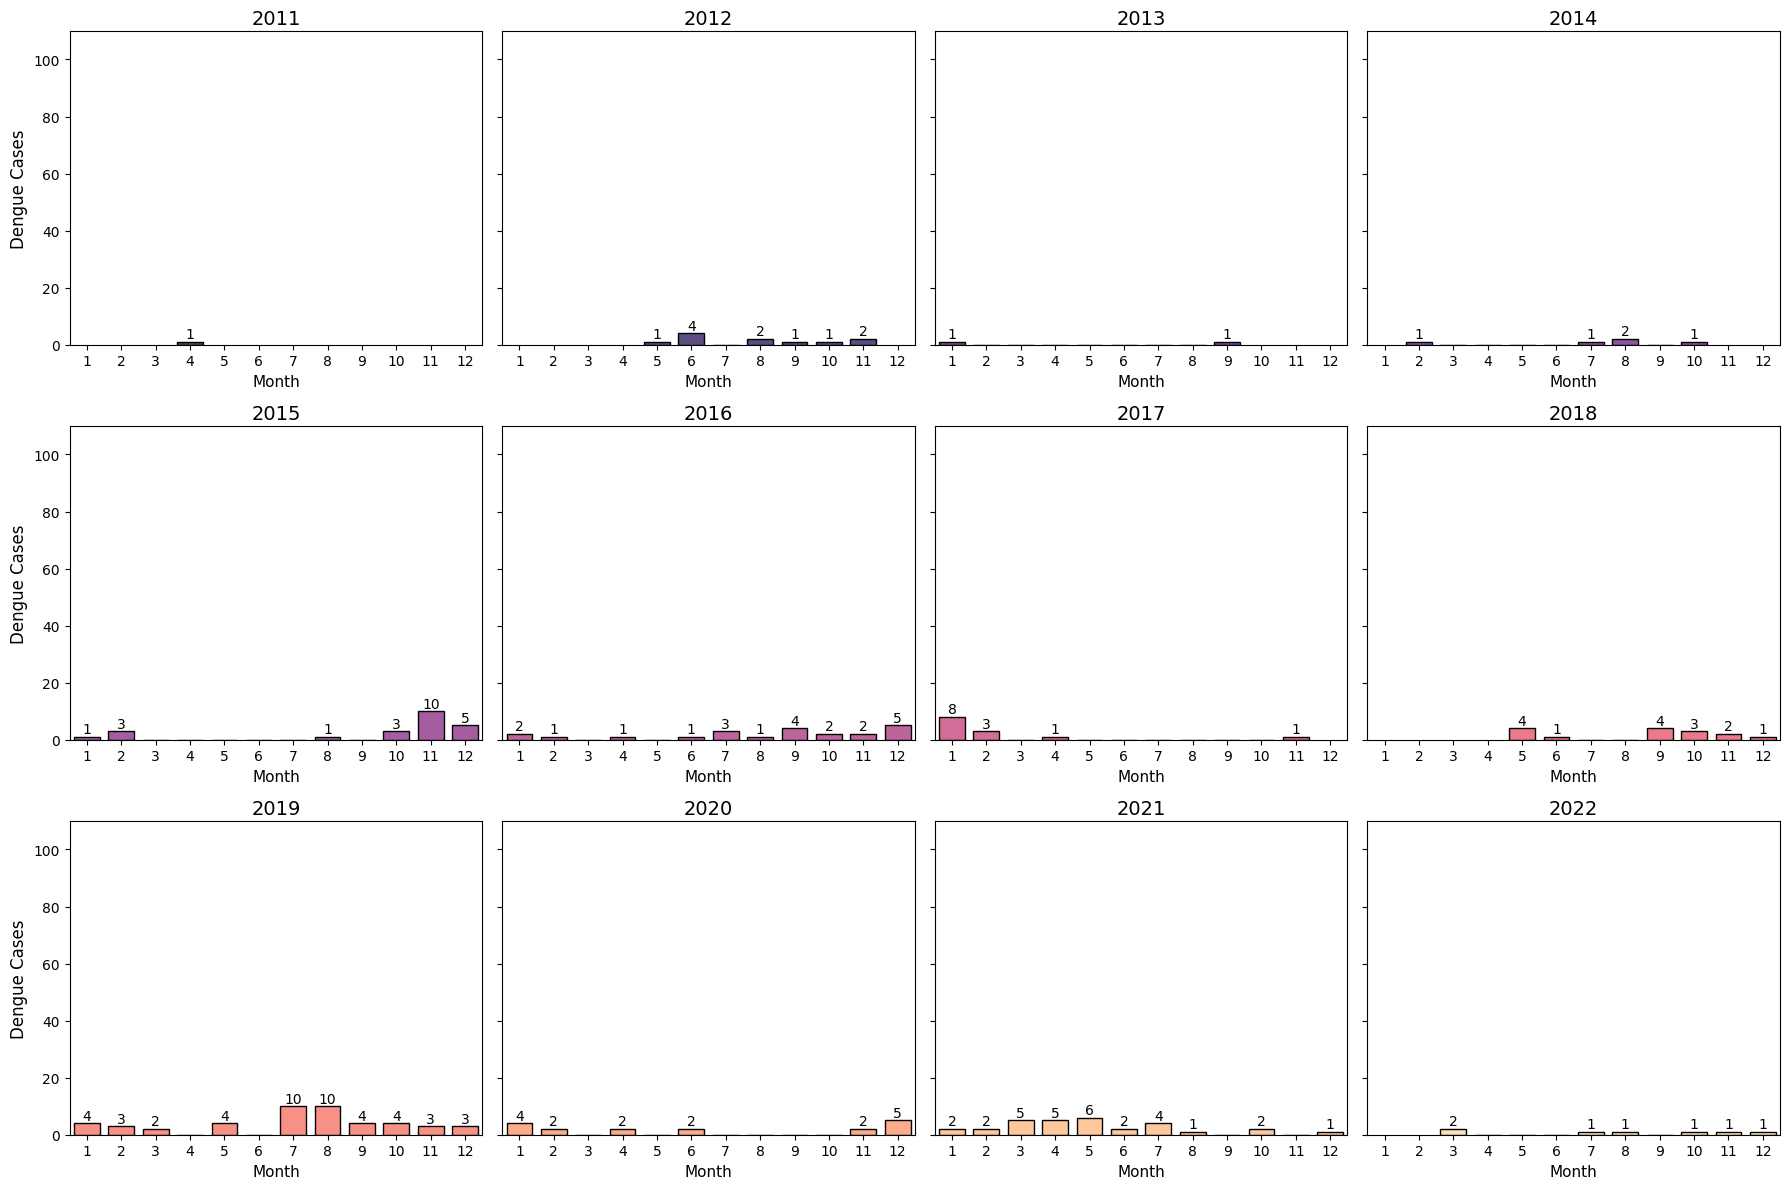

In [100]:
#HISTOGRAM FOR MONTHLY CASES EVERY YEAR
plot_dengue_cases(df, "SARAY-TIBANGA")

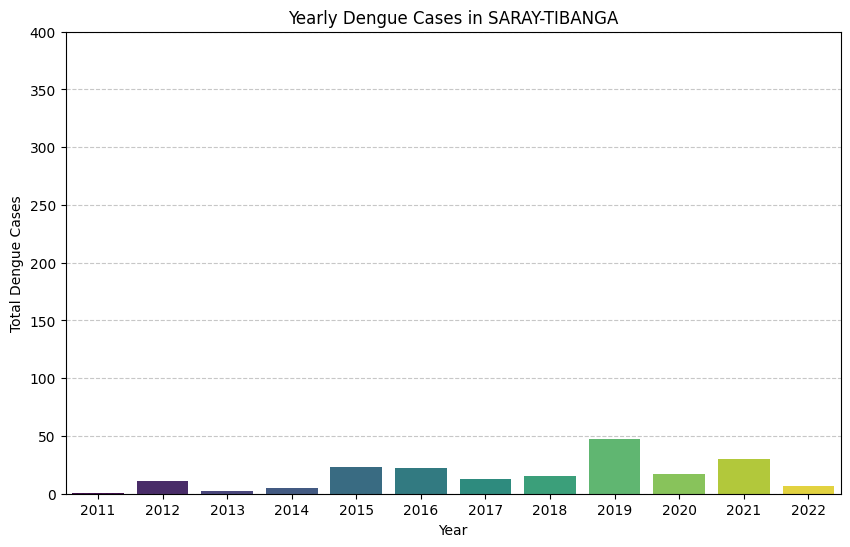

In [101]:
plot_total_dengue_cases_yearly(df, "SARAY-TIBANGA")

<div style="
    background-color: black; 
    color: white; 
    padding: 10px; 
    border-radius: 10px; 
    text-align: center;
    max-width: 100vw; 
    width: 100%;
    box-sizing: border-box;">
    SUAREZ MONTHLY CASES
</div>


In [102]:
selected_barangay = "SUAREZ"  # Change this to any barangay you want
barangay_data = get_selected_barangay(df, selected_barangay)

# Display the data for each year
for year, data in barangay_data.items():
    display(data)

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
34            34   SUAREZ  8.1914  124.2173  2011      1             2   
78            34   SUAREZ  8.1914  124.2173  2011      2             1   
122           34   SUAREZ  8.1914  124.2173  2011      3             1   
166           34   SUAREZ  8.1914  124.2173  2011      4             0   
210           34   SUAREZ  8.1914  124.2173  2011      5             1   
254           34   SUAREZ  8.1914  124.2173  2011      6             0   
298           34   SUAREZ  8.1914  124.2173  2011      7             1   
342           34   SUAREZ  8.1914  124.2173  2011      8             0   
386           34   SUAREZ  8.1914  124.2173  2011      9             0   
430           34   SUAREZ  8.1914  124.2173  2011     10             0   
474           34   SUAREZ  8.1914  124.2173  2011     11             0   
518           34   SUAREZ  8.1914  124.2173  2011     12             1   

     Temperature  Humidity  Rainfall  
34          23.8      88.1       7.0  
78          24.1      87.2      12.0  
122         25.3      85.5      20.0  
166         26.0      83.1      35.0  
210         27.2      81.9      55.0  
254         26.4      83.5      90.0  
298         25.7      84.7     110.0  
342         25.1      85.3      95.0  
386         24.4      86.2      70.0  
430         24.0      87.0      50.0  
474         23.6      88.4      30.0  
518         23.2      89.1      15.0

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
562            34   SUAREZ  8.1914  124.2173  2012      1             0   
606            34   SUAREZ  8.1914  124.2173  2012      2             0   
650            34   SUAREZ  8.1914  124.2173  2012      3             0   
694            34   SUAREZ  8.1914  124.2173  2012      4             0   
738            34   SUAREZ  8.1914  124.2173  2012      5             0   
782            34   SUAREZ  8.1914  124.2173  2012      6             0   
826            34   SUAREZ  8.1914  124.2173  2012      7             1   
870            34   SUAREZ  8.1914  124.2173  2012      8             6   
914            34   SUAREZ  8.1914  124.2173  2012      9             1   
958            34   SUAREZ  8.1914  124.2173  2012     10             1   
1002           34   SUAREZ  8.1914  124.2173  2012     11             1   
1046           34   SUAREZ  8.1914  124.2173  2012     12             2   

      Temperature  Humidity  Rainfall  
562          24.3      85.1       4.0  
606          24.3      85.7       7.1  
650          24.6      83.3       3.1  
694          25.4      82.3       6.9  
738          25.1      86.4       6.9  
782          24.7      85.3       7.9  
826          24.9      85.2       6.4  
870          24.9      85.2       6.4  
914          24.1      88.1      11.4  
958          24.6      86.5       8.4  
1002         24.8      84.8       4.1  
1046         24.7      84.8       5.7

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
1090           34   SUAREZ  8.1914  124.2173  2013      1             3   
1134           34   SUAREZ  8.1914  124.2173  2013      2             2   
1178           34   SUAREZ  8.1914  124.2173  2013      3             2   
1222           34   SUAREZ  8.1914  124.2173  2013      4             4   
1266           34   SUAREZ  8.1914  124.2173  2013      5             5   
1310           34   SUAREZ  8.1914  124.2173  2013      6             1   
1354           34   SUAREZ  8.1914  124.2173  2013      7             3   
1398           34   SUAREZ  8.1914  124.2173  2013      8             3   
1442           34   SUAREZ  8.1914  124.2173  2013      9             2   
1486           34   SUAREZ  8.1914  124.2173  2013     10             2   
1530           34   SUAREZ  8.1914  124.2173  2013     11             2   
1574           34   SUAREZ  8.1914  124.2173  2013     12             0   

      Temperature  Humidity  Rainfall  
1090         24.2      88.2       8.1  
1134         24.4      84.7       6.0  
1178         25.5      81.1       2.7  
1222         26.0      81.0       4.9  
1266         26.0      82.8       5.2  
1310         24.9      86.9       9.2  
1354         24.5      87.7      11.0  
1398         24.3      87.2       6.9  
1442         24.6      86.5       4.9  
1486         24.0      88.0      10.4  
1530         24.2      85.9       7.8  
1574         24.4      84.0       3.5

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
1618           34   SUAREZ  8.1914  124.2173  2014      1             0   
1662           34   SUAREZ  8.1914  124.2173  2014      2             4   
1706           34   SUAREZ  8.1914  124.2173  2014      3             0   
1750           34   SUAREZ  8.1914  124.2173  2014      4             0   
1794           34   SUAREZ  8.1914  124.2173  2014      5             1   
1838           34   SUAREZ  8.1914  124.2173  2014      6             4   
1882           34   SUAREZ  8.1914  124.2173  2014      7             2   
1926           34   SUAREZ  8.1914  124.2173  2014      8             2   
1970           34   SUAREZ  8.1914  124.2173  2014      9             6   
2014           34   SUAREZ  8.1914  124.2173  2014     10            10   
2058           34   SUAREZ  8.1914  124.2173  2014     11             4   
2102           34   SUAREZ  8.1914  124.2173  2014     12             4   

      Temperature  Humidity  Rainfall  
1618         23.2      86.4       6.8  
1662         23.7      82.4       2.3  
1706         24.3      82.5       3.8  
1750         25.1      81.4       2.0  
1794         25.3      84.0       4.9  
1838         24.5      87.1       6.6  
1882         23.4      89.1       8.5  
1926         23.9      87.7       8.0  
1970         23.4      88.5       7.1  
2014         23.9      88.4       8.5  
2058         24.7      85.2       6.1  
2102         24.0      85.3       4.9

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
2146           34   SUAREZ  8.1914  124.2173  2015      1             9   
2190           34   SUAREZ  8.1914  124.2173  2015      2             6   
2234           34   SUAREZ  8.1914  124.2173  2015      3             0   
2278           34   SUAREZ  8.1914  124.2173  2015      4             2   
2322           34   SUAREZ  8.1914  124.2173  2015      5             2   
2366           34   SUAREZ  8.1914  124.2173  2015      6             4   
2410           34   SUAREZ  8.1914  124.2173  2015      7             2   
2454           34   SUAREZ  8.1914  124.2173  2015      8             3   
2498           34   SUAREZ  8.1914  124.2173  2015      9             2   
2542           34   SUAREZ  8.1914  124.2173  2015     10             2   
2586           34   SUAREZ  8.1914  124.2173  2015     11             4   
2630           34   SUAREZ  8.1914  124.2173  2015     12             9   

      Temperature  Humidity  Rainfall  
2146         25.6      89.0       5.9  
2190         25.6      87.0       3.0  
2234         26.1      83.2       1.1  
2278         27.3      82.8       2.1  
2322         28.4      78.1       2.7  
2366         27.4      81.9       8.7  
2410         27.6      80.4       4.2  
2454         27.5      80.9       5.5  
2498         27.2      82.4       8.2  
2542         27.2      83.4       4.9  
2586         26.8      87.3       6.5  
2630         26.5      87.1       4.8

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
2674           34   SUAREZ  8.1914  124.2173  2016      1             8   
2718           34   SUAREZ  8.1914  124.2173  2016      2             6   
2762           34   SUAREZ  8.1914  124.2173  2016      3             8   
2806           34   SUAREZ  8.1914  124.2173  2016      4             3   
2850           34   SUAREZ  8.1914  124.2173  2016      5             4   
2894           34   SUAREZ  8.1914  124.2173  2016      6             9   
2938           34   SUAREZ  8.1914  124.2173  2016      7            44   
2982           34   SUAREZ  8.1914  124.2173  2016      8            40   
3026           34   SUAREZ  8.1914  124.2173  2016      9            10   
3070           34   SUAREZ  8.1914  124.2173  2016     10             8   
3114           34   SUAREZ  8.1914  124.2173  2016     11             7   
3158           34   SUAREZ  8.1914  124.2173  2016     12             0   

      Temperature  Humidity  Rainfall  
2674         26.2      86.9       1.6  
2718         26.1      88.2       2.6  
2762         26.8      84.4       0.4  
2806         28.1      80.1       1.5  
2850         28.3      81.9       8.3  
2894         27.5      83.9      12.5  
2938         27.6      82.0       5.2  
2982         27.8      80.3       2.7  
3026         27.2      82.4       6.2  
3070         27.1      84.6       8.9  
3114         26.5      86.6       7.6  
3158         26.7      86.9       8.2

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
3202           34   SUAREZ  8.1914  124.2173  2017      1             8   
3246           34   SUAREZ  8.1914  124.2173  2017      2             1   
3290           34   SUAREZ  8.1914  124.2173  2017      3             1   
3334           34   SUAREZ  8.1914  124.2173  2017      4             0   
3378           34   SUAREZ  8.1914  124.2173  2017      5             1   
3422           34   SUAREZ  8.1914  124.2173  2017      6             0   
3466           34   SUAREZ  8.1914  124.2173  2017      7             3   
3510           34   SUAREZ  8.1914  124.2173  2017      8             0   
3554           34   SUAREZ  8.1914  124.2173  2017      9             1   
3598           34   SUAREZ  8.1914  124.2173  2017     10             0   
3642           34   SUAREZ  8.1914  124.2173  2017     11             1   
3686           34   SUAREZ  8.1914  124.2173  2017     12             4   

      Temperature  Humidity  Rainfall  
3202         25.9      88.9      12.5  
3246         25.6      87.8       5.9  
3290         26.1      87.4       8.0  
3334         27.2      85.0       5.1  
3378         27.8      84.4      10.4  
3422         27.4      83.8       7.8  
3466         27.2      82.6       9.1  
3510         27.9      83.4       9.6  
3554         27.3      83.3      11.4  
3598         27.0      84.0       8.3  
3642         27.0      86.6       7.3  
3686         26.7      85.9       9.6

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
3730           34   SUAREZ  8.1914  124.2173  2018      1             2   
3774           34   SUAREZ  8.1914  124.2173  2018      2             1   
3818           34   SUAREZ  8.1914  124.2173  2018      3             1   
3862           34   SUAREZ  8.1914  124.2173  2018      4             4   
3906           34   SUAREZ  8.1914  124.2173  2018      5             1   
3950           34   SUAREZ  8.1914  124.2173  2018      6             7   
3994           34   SUAREZ  8.1914  124.2173  2018      7             5   
4038           34   SUAREZ  8.1914  124.2173  2018      8             9   
4082           34   SUAREZ  8.1914  124.2173  2018      9             8   
4126           34   SUAREZ  8.1914  124.2173  2018     10             8   
4170           34   SUAREZ  8.1914  124.2173  2018     11             9   
4214           34   SUAREZ  8.1914  124.2173  2018     12            19   

      Temperature  Humidity  Rainfall  
3730         26.2      87.5       7.3  
3774         26.4      86.0       9.7  
3818         26.5      84.6       3.7  
3862         27.4      82.5       2.6  
3906         27.9      82.0       6.9  
3950         27.7      80.7       5.2  
3994         27.3      81.6       4.7  
4038         27.4      79.8       2.1  
4082         26.9      82.2       5.4  
4126         27.2      82.7       4.2  
4170         26.5      86.6       6.1  
4214         26.3      88.1       5.8

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
4258           34   SUAREZ  8.1914  124.2173  2019      1            17   
4302           34   SUAREZ  8.1914  124.2173  2019      2             8   
4346           34   SUAREZ  8.1914  124.2173  2019      3             7   
4390           34   SUAREZ  8.1914  124.2173  2019      4             9   
4434           34   SUAREZ  8.1914  124.2173  2019      5             2   
4478           34   SUAREZ  8.1914  124.2173  2019      6             0   
4522           34   SUAREZ  8.1914  124.2173  2019      7            16   
4566           34   SUAREZ  8.1914  124.2173  2019      8            38   
4610           34   SUAREZ  8.1914  124.2173  2019      9            28   
4654           34   SUAREZ  8.1914  124.2173  2019     10            19   
4698           34   SUAREZ  8.1914  124.2173  2019     11            24   
4742           34   SUAREZ  8.1914  124.2173  2019     12             9   

      Temperature  Humidity  Rainfall  
4258         25.5      88.2       5.7  
4302         25.3      84.3       1.1  
4346         26.1      83.2       1.9  
4390         27.5      80.3       1.8  
4434         28.4      78.6       4.4  
4478         27.8      82.7       9.1  
4522         27.2      82.1       6.2  
4566         27.7      77.1       1.4  
4610         27.8      78.2       3.3  
4654         27.0      83.8       7.7  
4698         27.1      82.9       4.3  
4742         26.4      86.4       4.2

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
4786           34   SUAREZ  8.1914  124.2173  2020      1            26   
4830           34   SUAREZ  8.1914  124.2173  2020      2            26   
4874           34   SUAREZ  8.1914  124.2173  2020      3             4   
4918           34   SUAREZ  8.1914  124.2173  2020      4             8   
4962           34   SUAREZ  8.1914  124.2173  2020      5             4   
5006           34   SUAREZ  8.1914  124.2173  2020      6             3   
5050           34   SUAREZ  8.1914  124.2173  2020      7             4   
5094           34   SUAREZ  8.1914  124.2173  2020      8             0   
5138           34   SUAREZ  8.1914  124.2173  2020      9             2   
5182           34   SUAREZ  8.1914  124.2173  2020     10             0   
5226           34   SUAREZ  8.1914  124.2173  2020     11             4   
5270           34   SUAREZ  8.1914  124.2173  2020     12             1   

      Temperature  Humidity  Rainfall  
4786         26.3      86.8       2.1  
4830         25.7      87.2       3.5  
4874         26.4      85.2       2.0  
4918         27.2      81.6       1.0  
4962         28.0      83.2       9.8  
5006         27.3      84.1      14.1  
5050         27.0      83.9      15.7  
5094         27.2      82.9      11.7  
5138         27.2      83.7       9.2  
5182         26.9      84.2      13.2  
5226         26.8      86.2       5.5  
5270         26.7      86.6       8.2

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
5314           34   SUAREZ  8.1914  124.2173  2021      1            10   
5358           34   SUAREZ  8.1914  124.2173  2021      2             2   
5402           34   SUAREZ  8.1914  124.2173  2021      3             3   
5446           34   SUAREZ  8.1914  124.2173  2021      4             0   
5490           34   SUAREZ  8.1914  124.2173  2021      5             2   
5534           34   SUAREZ  8.1914  124.2173  2021      6             1   
5578           34   SUAREZ  8.1914  124.2173  2021      7             1   
5622           34   SUAREZ  8.1914  124.2173  2021      8             2   
5666           34   SUAREZ  8.1914  124.2173  2021      9             1   
5710           34   SUAREZ  8.1914  124.2173  2021     10             3   
5754           34   SUAREZ  8.1914  124.2173  2021     11             4   
5798           34   SUAREZ  8.1914  124.2173  2021     12             7   

      Temperature  Humidity  Rainfall  
5314         25.9      88.5      11.9  
5358         26.0      87.1      12.6  
5402         26.8      84.7       5.5  
5446         27.1      82.5       4.5  
5490         27.5      84.0      10.7  
5534         27.6      81.3       8.2  
5578         27.7      80.0       4.4  
5622         27.5      80.0       6.5  
5666         27.2      82.7       9.5  
5710         27.3      83.6       8.7  
5754         27.0      86.4       9.4  
5798         26.2      86.9       9.8

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
5842           34   SUAREZ  8.1914  124.2173  2022      1             9   
5886           34   SUAREZ  8.1914  124.2173  2022      2             3   
5930           34   SUAREZ  8.1914  124.2173  2022      3             2   
5974           34   SUAREZ  8.1914  124.2173  2022      4             3   
6018           34   SUAREZ  8.1914  124.2173  2022      5             1   
6062           34   SUAREZ  8.1914  124.2173  2022      6             3   
6106           34   SUAREZ  8.1914  124.2173  2022      7             7   
6150           34   SUAREZ  8.1914  124.2173  2022      8             1   
6194           34   SUAREZ  8.1914  124.2173  2022      9             2   
6238           34   SUAREZ  8.1914  124.2173  2022     10             5   
6282           34   SUAREZ  8.1914  124.2173  2022     11             0   
6326           34   SUAREZ  8.1914  124.2173  2022     12             2   

      Temperature  Humidity  Rainfall  
5842         26.0      86.9       8.3  
5886         26.0      87.2       3.9  
5930         26.8      86.5      11.0  
5974         26.8      86.5      12.2  
6018         27.4      83.9      11.5  
6062         27.6      81.9       7.1  
6106         27.4      83.2      11.6  
6150         27.3      82.0       7.9  
6194         27.5      81.1       6.1  
6238         27.1      84.2       9.0  
6282         27.0      85.8       6.6  
6326         26.4      87.1      14.5

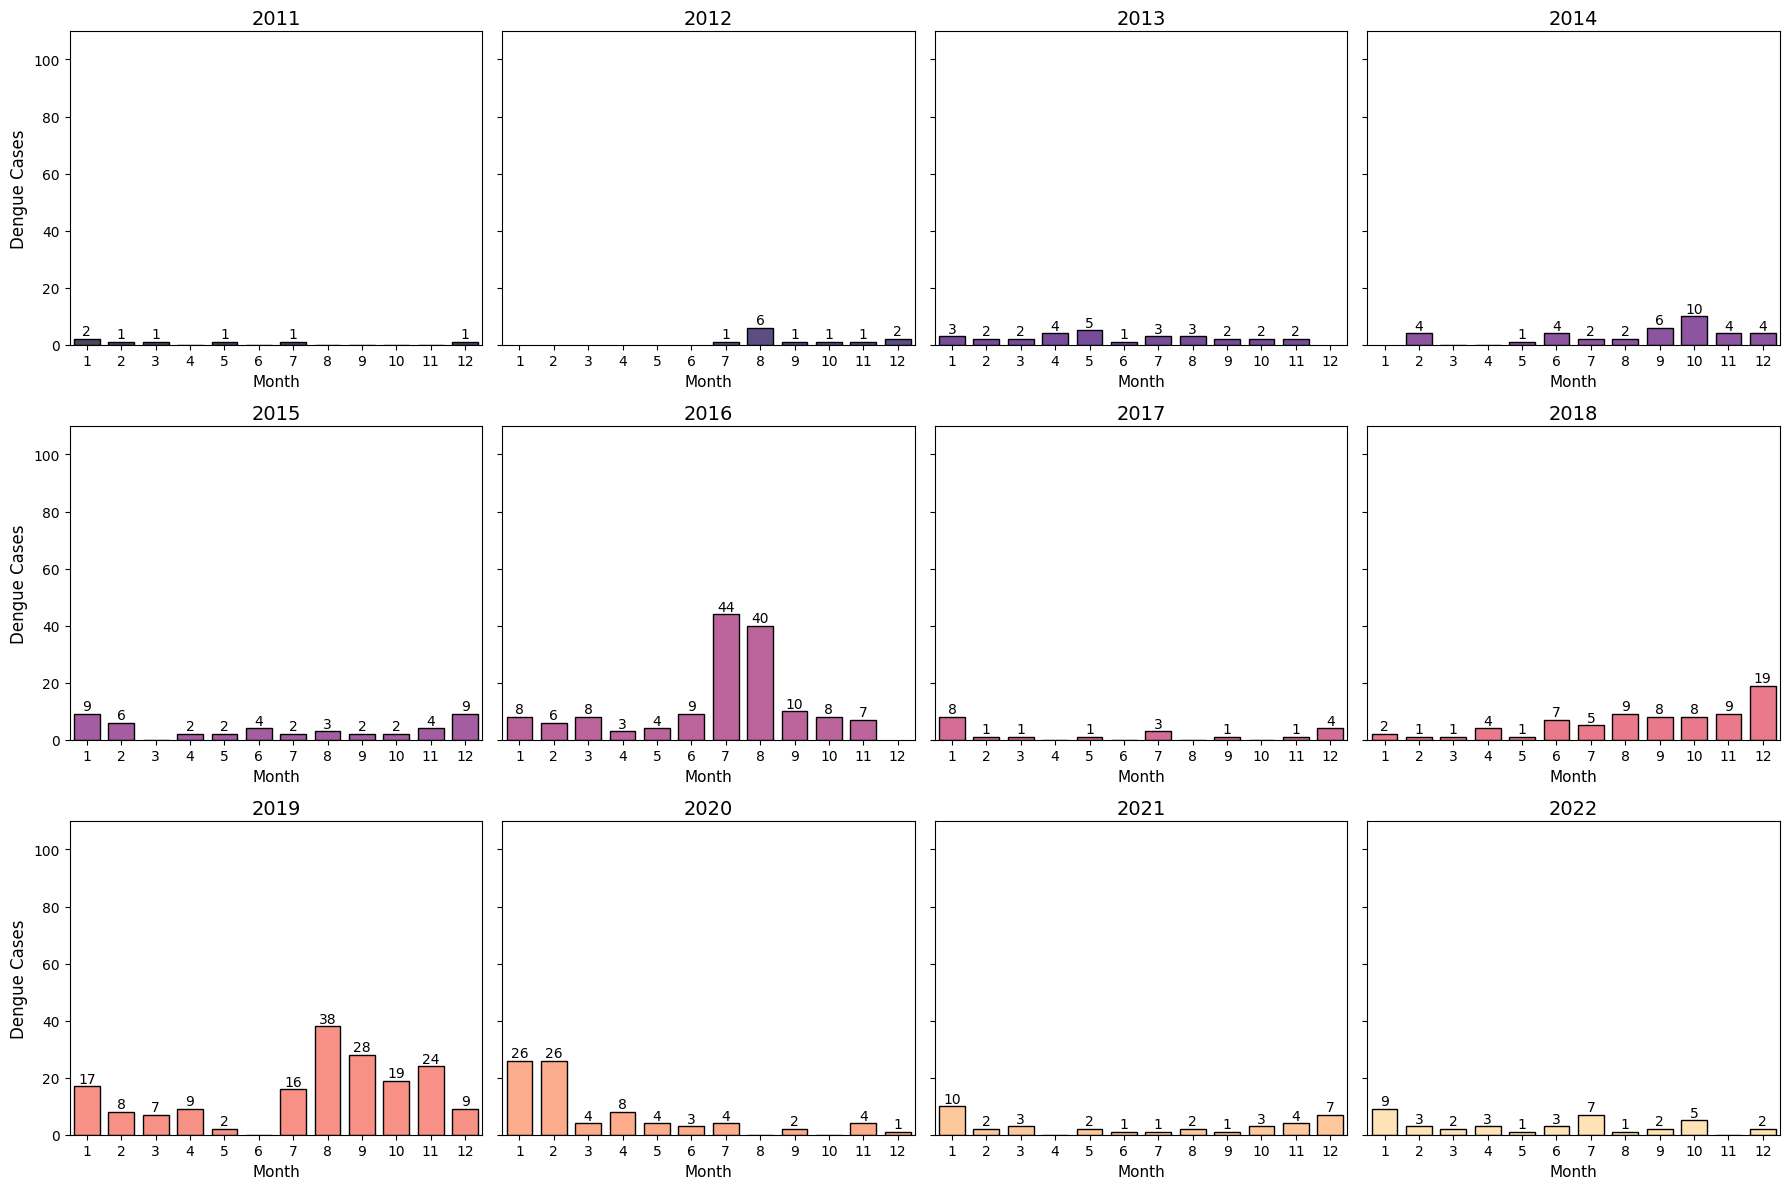

In [103]:
#HISTOGRAM FOR MONTHLY CASES EVERY YEAR
plot_dengue_cases(df, "SUAREZ")

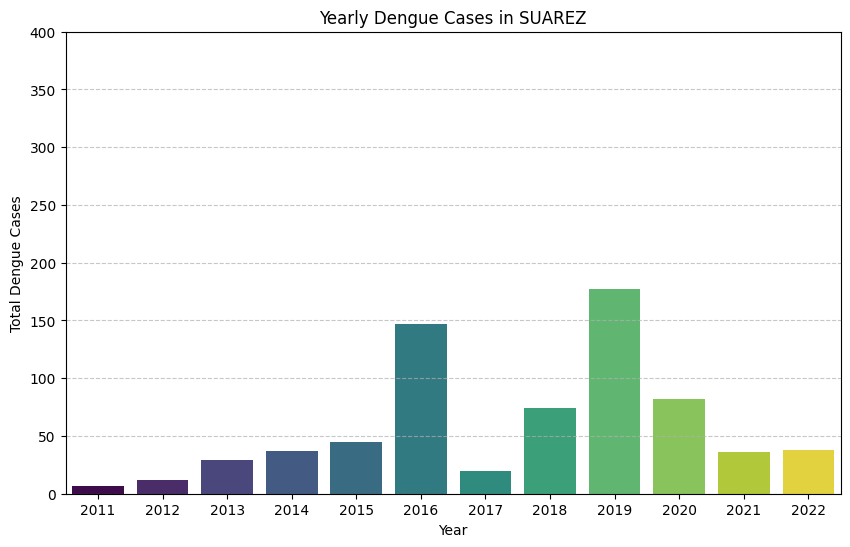

In [104]:
plot_total_dengue_cases_yearly(df, "SUAREZ")

<div style="
    background-color: black; 
    color: white; 
    padding: 10px; 
    border-radius: 10px; 
    text-align: center;
    max-width: 100vw; 
    width: 100%;
    box-sizing: border-box;">
    TAMBACAN MONTHLY CASES
</div>


In [105]:
selected_barangay = "TAMBACAN"  # Change this to any barangay you want
barangay_data = get_selected_barangay(df, selected_barangay)

# Display the data for each year
for year, data in barangay_data.items():
    display(data)


Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
35            35  TAMBACAN  8.2236  124.2347  2011      1             4   
79            35  TAMBACAN  8.2236  124.2347  2011      2             3   
123           35  TAMBACAN  8.2236  124.2347  2011      3             2   
167           35  TAMBACAN  8.2236  124.2347  2011      4             1   
211           35  TAMBACAN  8.2236  124.2347  2011      5             0   
255           35  TAMBACAN  8.2236  124.2347  2011      6             2   
299           35  TAMBACAN  8.2236  124.2347  2011      7             1   
343           35  TAMBACAN  8.2236  124.2347  2011      8             2   
387           35  TAMBACAN  8.2236  124.2347  2011      9             1   
431           35  TAMBACAN  8.2236  124.2347  2011     10             0   
475           35  TAMBACAN  8.2236  124.2347  2011     11             0   
519           35  TAMBACAN  8.2236  124.2347  2011     12             0   

     Temperature  Humidity  Rainfall  
35          23.8      88.1       7.0  
79          24.1      87.2      12.0  
123         25.3      85.5      20.0  
167         26.0      83.1      35.0  
211         27.2      81.9      55.0  
255         26.4      83.5      90.0  
299         25.7      84.7     110.0  
343         25.1      85.3      95.0  
387         24.4      86.2      70.0  
431         24.0      87.0      50.0  
475         23.6      88.4      30.0  
519         23.2      89.1      15.0

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
563            35  TAMBACAN  8.2236  124.2347  2012      1             3   
607            35  TAMBACAN  8.2236  124.2347  2012      2             1   
651            35  TAMBACAN  8.2236  124.2347  2012      3             0   
695            35  TAMBACAN  8.2236  124.2347  2012      4             1   
739            35  TAMBACAN  8.2236  124.2347  2012      5             0   
783            35  TAMBACAN  8.2236  124.2347  2012      6             3   
827            35  TAMBACAN  8.2236  124.2347  2012      7             0   
871            35  TAMBACAN  8.2236  124.2347  2012      8             2   
915            35  TAMBACAN  8.2236  124.2347  2012      9             5   
959            35  TAMBACAN  8.2236  124.2347  2012     10             0   
1003           35  TAMBACAN  8.2236  124.2347  2012     11             1   
1047           35  TAMBACAN  8.2236  124.2347  2012     12             2   

      Temperature  Humidity  Rainfall  
563          24.3      85.1       4.0  
607          24.3      85.7       7.1  
651          24.6      83.3       3.1  
695          25.4      82.3       6.9  
739          25.1      86.4       6.9  
783          24.7      85.3       7.9  
827          24.9      85.2       6.4  
871          24.9      85.2       6.4  
915          24.1      88.1      11.4  
959          24.6      86.5       8.4  
1003         24.8      84.8       4.1  
1047         24.7      84.8       5.7

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
1091           35  TAMBACAN  8.2236  124.2347  2013      1             6   
1135           35  TAMBACAN  8.2236  124.2347  2013      2             3   
1179           35  TAMBACAN  8.2236  124.2347  2013      3             0   
1223           35  TAMBACAN  8.2236  124.2347  2013      4             0   
1267           35  TAMBACAN  8.2236  124.2347  2013      5             2   
1311           35  TAMBACAN  8.2236  124.2347  2013      6             1   
1355           35  TAMBACAN  8.2236  124.2347  2013      7             0   
1399           35  TAMBACAN  8.2236  124.2347  2013      8             0   
1443           35  TAMBACAN  8.2236  124.2347  2013      9             1   
1487           35  TAMBACAN  8.2236  124.2347  2013     10             1   
1531           35  TAMBACAN  8.2236  124.2347  2013     11             2   
1575           35  TAMBACAN  8.2236  124.2347  2013     12             0   

      Temperature  Humidity  Rainfall  
1091         24.2      88.2       8.1  
1135         24.4      84.7       6.0  
1179         25.5      81.1       2.7  
1223         26.0      81.0       4.9  
1267         26.0      82.8       5.2  
1311         24.9      86.9       9.2  
1355         24.5      87.7      11.0  
1399         24.3      87.2       6.9  
1443         24.6      86.5       4.9  
1487         24.0      88.0      10.4  
1531         24.2      85.9       7.8  
1575         24.4      84.0       3.5

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
1619           35  TAMBACAN  8.2236  124.2347  2014      1             1   
1663           35  TAMBACAN  8.2236  124.2347  2014      2             3   
1707           35  TAMBACAN  8.2236  124.2347  2014      3             2   
1751           35  TAMBACAN  8.2236  124.2347  2014      4             2   
1795           35  TAMBACAN  8.2236  124.2347  2014      5             6   
1839           35  TAMBACAN  8.2236  124.2347  2014      6             4   
1883           35  TAMBACAN  8.2236  124.2347  2014      7             4   
1927           35  TAMBACAN  8.2236  124.2347  2014      8             3   
1971           35  TAMBACAN  8.2236  124.2347  2014      9             2   
2015           35  TAMBACAN  8.2236  124.2347  2014     10             0   
2059           35  TAMBACAN  8.2236  124.2347  2014     11             2   
2103           35  TAMBACAN  8.2236  124.2347  2014     12             2   

      Temperature  Humidity  Rainfall  
1619         23.2      86.4       6.8  
1663         23.7      82.4       2.3  
1707         24.3      82.5       3.8  
1751         25.1      81.4       2.0  
1795         25.3      84.0       4.9  
1839         24.5      87.1       6.6  
1883         23.4      89.1       8.5  
1927         23.9      87.7       8.0  
1971         23.4      88.5       7.1  
2015         23.9      88.4       8.5  
2059         24.7      85.2       6.1  
2103         24.0      85.3       4.9

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
2147           35  TAMBACAN  8.2236  124.2347  2015      1             2   
2191           35  TAMBACAN  8.2236  124.2347  2015      2            11   
2235           35  TAMBACAN  8.2236  124.2347  2015      3             3   
2279           35  TAMBACAN  8.2236  124.2347  2015      4             0   
2323           35  TAMBACAN  8.2236  124.2347  2015      5             2   
2367           35  TAMBACAN  8.2236  124.2347  2015      6             0   
2411           35  TAMBACAN  8.2236  124.2347  2015      7             0   
2455           35  TAMBACAN  8.2236  124.2347  2015      8             1   
2499           35  TAMBACAN  8.2236  124.2347  2015      9             0   
2543           35  TAMBACAN  8.2236  124.2347  2015     10             5   
2587           35  TAMBACAN  8.2236  124.2347  2015     11             4   
2631           35  TAMBACAN  8.2236  124.2347  2015     12             0   

      Temperature  Humidity  Rainfall  
2147         25.6      89.0       5.9  
2191         25.6      87.0       3.0  
2235         26.1      83.2       1.1  
2279         27.3      82.8       2.1  
2323         28.4      78.1       2.7  
2367         27.4      81.9       8.7  
2411         27.6      80.4       4.2  
2455         27.5      80.9       5.5  
2499         27.2      82.4       8.2  
2543         27.2      83.4       4.9  
2587         26.8      87.3       6.5  
2631         26.5      87.1       4.8

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
2675           35  TAMBACAN  8.2236  124.2347  2016      1             1   
2719           35  TAMBACAN  8.2236  124.2347  2016      2             3   
2763           35  TAMBACAN  8.2236  124.2347  2016      3             2   
2807           35  TAMBACAN  8.2236  124.2347  2016      4             0   
2851           35  TAMBACAN  8.2236  124.2347  2016      5             0   
2895           35  TAMBACAN  8.2236  124.2347  2016      6             1   
2939           35  TAMBACAN  8.2236  124.2347  2016      7             1   
2983           35  TAMBACAN  8.2236  124.2347  2016      8            10   
3027           35  TAMBACAN  8.2236  124.2347  2016      9             6   
3071           35  TAMBACAN  8.2236  124.2347  2016     10            14   
3115           35  TAMBACAN  8.2236  124.2347  2016     11            10   
3159           35  TAMBACAN  8.2236  124.2347  2016     12             4   

      Temperature  Humidity  Rainfall  
2675         26.2      86.9       1.6  
2719         26.1      88.2       2.6  
2763         26.8      84.4       0.4  
2807         28.1      80.1       1.5  
2851         28.3      81.9       8.3  
2895         27.5      83.9      12.5  
2939         27.6      82.0       5.2  
2983         27.8      80.3       2.7  
3027         27.2      82.4       6.2  
3071         27.1      84.6       8.9  
3115         26.5      86.6       7.6  
3159         26.7      86.9       8.2

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
3203           35  TAMBACAN  8.2236  124.2347  2017      1             4   
3247           35  TAMBACAN  8.2236  124.2347  2017      2             6   
3291           35  TAMBACAN  8.2236  124.2347  2017      3             6   
3335           35  TAMBACAN  8.2236  124.2347  2017      4             0   
3379           35  TAMBACAN  8.2236  124.2347  2017      5             2   
3423           35  TAMBACAN  8.2236  124.2347  2017      6             0   
3467           35  TAMBACAN  8.2236  124.2347  2017      7             3   
3511           35  TAMBACAN  8.2236  124.2347  2017      8             2   
3555           35  TAMBACAN  8.2236  124.2347  2017      9             0   
3599           35  TAMBACAN  8.2236  124.2347  2017     10             0   
3643           35  TAMBACAN  8.2236  124.2347  2017     11             0   
3687           35  TAMBACAN  8.2236  124.2347  2017     12             0   

      Temperature  Humidity  Rainfall  
3203         25.9      88.9      12.5  
3247         25.6      87.8       5.9  
3291         26.1      87.4       8.0  
3335         27.2      85.0       5.1  
3379         27.8      84.4      10.4  
3423         27.4      83.8       7.8  
3467         27.2      82.6       9.1  
3511         27.9      83.4       9.6  
3555         27.3      83.3      11.4  
3599         27.0      84.0       8.3  
3643         27.0      86.6       7.3  
3687         26.7      85.9       9.6

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
3731           35  TAMBACAN  8.2236  124.2347  2018      1             0   
3775           35  TAMBACAN  8.2236  124.2347  2018      2             0   
3819           35  TAMBACAN  8.2236  124.2347  2018      3             0   
3863           35  TAMBACAN  8.2236  124.2347  2018      4             3   
3907           35  TAMBACAN  8.2236  124.2347  2018      5             0   
3951           35  TAMBACAN  8.2236  124.2347  2018      6             0   
3995           35  TAMBACAN  8.2236  124.2347  2018      7             3   
4039           35  TAMBACAN  8.2236  124.2347  2018      8             4   
4083           35  TAMBACAN  8.2236  124.2347  2018      9             3   
4127           35  TAMBACAN  8.2236  124.2347  2018     10            15   
4171           35  TAMBACAN  8.2236  124.2347  2018     11            13   
4215           35  TAMBACAN  8.2236  124.2347  2018     12            26   

      Temperature  Humidity  Rainfall  
3731         26.2      87.5       7.3  
3775         26.4      86.0       9.7  
3819         26.5      84.6       3.7  
3863         27.4      82.5       2.6  
3907         27.9      82.0       6.9  
3951         27.7      80.7       5.2  
3995         27.3      81.6       4.7  
4039         27.4      79.8       2.1  
4083         26.9      82.2       5.4  
4127         27.2      82.7       4.2  
4171         26.5      86.6       6.1  
4215         26.3      88.1       5.8

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
4259           35  TAMBACAN  8.2236  124.2347  2019      1            10   
4303           35  TAMBACAN  8.2236  124.2347  2019      2             9   
4347           35  TAMBACAN  8.2236  124.2347  2019      3            12   
4391           35  TAMBACAN  8.2236  124.2347  2019      4             4   
4435           35  TAMBACAN  8.2236  124.2347  2019      5             7   
4479           35  TAMBACAN  8.2236  124.2347  2019      6            10   
4523           35  TAMBACAN  8.2236  124.2347  2019      7            21   
4567           35  TAMBACAN  8.2236  124.2347  2019      8            46   
4611           35  TAMBACAN  8.2236  124.2347  2019      9            29   
4655           35  TAMBACAN  8.2236  124.2347  2019     10             9   
4699           35  TAMBACAN  8.2236  124.2347  2019     11            16   
4743           35  TAMBACAN  8.2236  124.2347  2019     12             0   

      Temperature  Humidity  Rainfall  
4259         25.5      88.2       5.7  
4303         25.3      84.3       1.1  
4347         26.1      83.2       1.9  
4391         27.5      80.3       1.8  
4435         28.4      78.6       4.4  
4479         27.8      82.7       9.1  
4523         27.2      82.1       6.2  
4567         27.7      77.1       1.4  
4611         27.8      78.2       3.3  
4655         27.0      83.8       7.7  
4699         27.1      82.9       4.3  
4743         26.4      86.4       4.2

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
4787           35  TAMBACAN  8.2236  124.2347  2020      1            18   
4831           35  TAMBACAN  8.2236  124.2347  2020      2            14   
4875           35  TAMBACAN  8.2236  124.2347  2020      3             4   
4919           35  TAMBACAN  8.2236  124.2347  2020      4             0   
4963           35  TAMBACAN  8.2236  124.2347  2020      5             2   
5007           35  TAMBACAN  8.2236  124.2347  2020      6             0   
5051           35  TAMBACAN  8.2236  124.2347  2020      7             0   
5095           35  TAMBACAN  8.2236  124.2347  2020      8             2   
5139           35  TAMBACAN  8.2236  124.2347  2020      9             0   
5183           35  TAMBACAN  8.2236  124.2347  2020     10             0   
5227           35  TAMBACAN  8.2236  124.2347  2020     11             2   
5271           35  TAMBACAN  8.2236  124.2347  2020     12             0   

      Temperature  Humidity  Rainfall  
4787         26.3      86.8       2.1  
4831         25.7      87.2       3.5  
4875         26.4      85.2       2.0  
4919         27.2      81.6       1.0  
4963         28.0      83.2       9.8  
5007         27.3      84.1      14.1  
5051         27.0      83.9      15.7  
5095         27.2      82.9      11.7  
5139         27.2      83.7       9.2  
5183         26.9      84.2      13.2  
5227         26.8      86.2       5.5  
5271         26.7      86.6       8.2

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
5315           35  TAMBACAN  8.2236  124.2347  2021      1             0   
5359           35  TAMBACAN  8.2236  124.2347  2021      2             0   
5403           35  TAMBACAN  8.2236  124.2347  2021      3             1   
5447           35  TAMBACAN  8.2236  124.2347  2021      4             5   
5491           35  TAMBACAN  8.2236  124.2347  2021      5             1   
5535           35  TAMBACAN  8.2236  124.2347  2021      6             9   
5579           35  TAMBACAN  8.2236  124.2347  2021      7             8   
5623           35  TAMBACAN  8.2236  124.2347  2021      8             5   
5667           35  TAMBACAN  8.2236  124.2347  2021      9             6   
5711           35  TAMBACAN  8.2236  124.2347  2021     10             3   
5755           35  TAMBACAN  8.2236  124.2347  2021     11             8   
5799           35  TAMBACAN  8.2236  124.2347  2021     12             5   

      Temperature  Humidity  Rainfall  
5315         25.9      88.5      11.9  
5359         26.0      87.1      12.6  
5403         26.8      84.7       5.5  
5447         27.1      82.5       4.5  
5491         27.5      84.0      10.7  
5535         27.6      81.3       8.2  
5579         27.7      80.0       4.4  
5623         27.5      80.0       6.5  
5667         27.2      82.7       9.5  
5711         27.3      83.6       8.7  
5755         27.0      86.4       9.4  
5799         26.2      86.9       9.8

Barangay_No  Barangay       x         y  Year  Month  Dengue Cases  \
5843           35  TAMBACAN  8.2236  124.2347  2022      1             6   
5887           35  TAMBACAN  8.2236  124.2347  2022      2             1   
5931           35  TAMBACAN  8.2236  124.2347  2022      3             3   
5975           35  TAMBACAN  8.2236  124.2347  2022      4             4   
6019           35  TAMBACAN  8.2236  124.2347  2022      5             9   
6063           35  TAMBACAN  8.2236  124.2347  2022      6             4   
6107           35  TAMBACAN  8.2236  124.2347  2022      7             0   
6151           35  TAMBACAN  8.2236  124.2347  2022      8             7   
6195           35  TAMBACAN  8.2236  124.2347  2022      9             6   
6239           35  TAMBACAN  8.2236  124.2347  2022     10             1   
6283           35  TAMBACAN  8.2236  124.2347  2022     11             5   
6327           35  TAMBACAN  8.2236  124.2347  2022     12             2   

      Temperature  Humidity  Rainfall  
5843         26.0      86.9       8.3  
5887         26.0      87.2       3.9  
5931         26.8      86.5      11.0  
5975         26.8      86.5      12.2  
6019         27.4      83.9      11.5  
6063         27.6      81.9       7.1  
6107         27.4      83.2      11.6  
6151         27.3      82.0       7.9  
6195         27.5      81.1       6.1  
6239         27.1      84.2       9.0  
6283         27.0      85.8       6.6  
6327         26.4      87.1      14.5

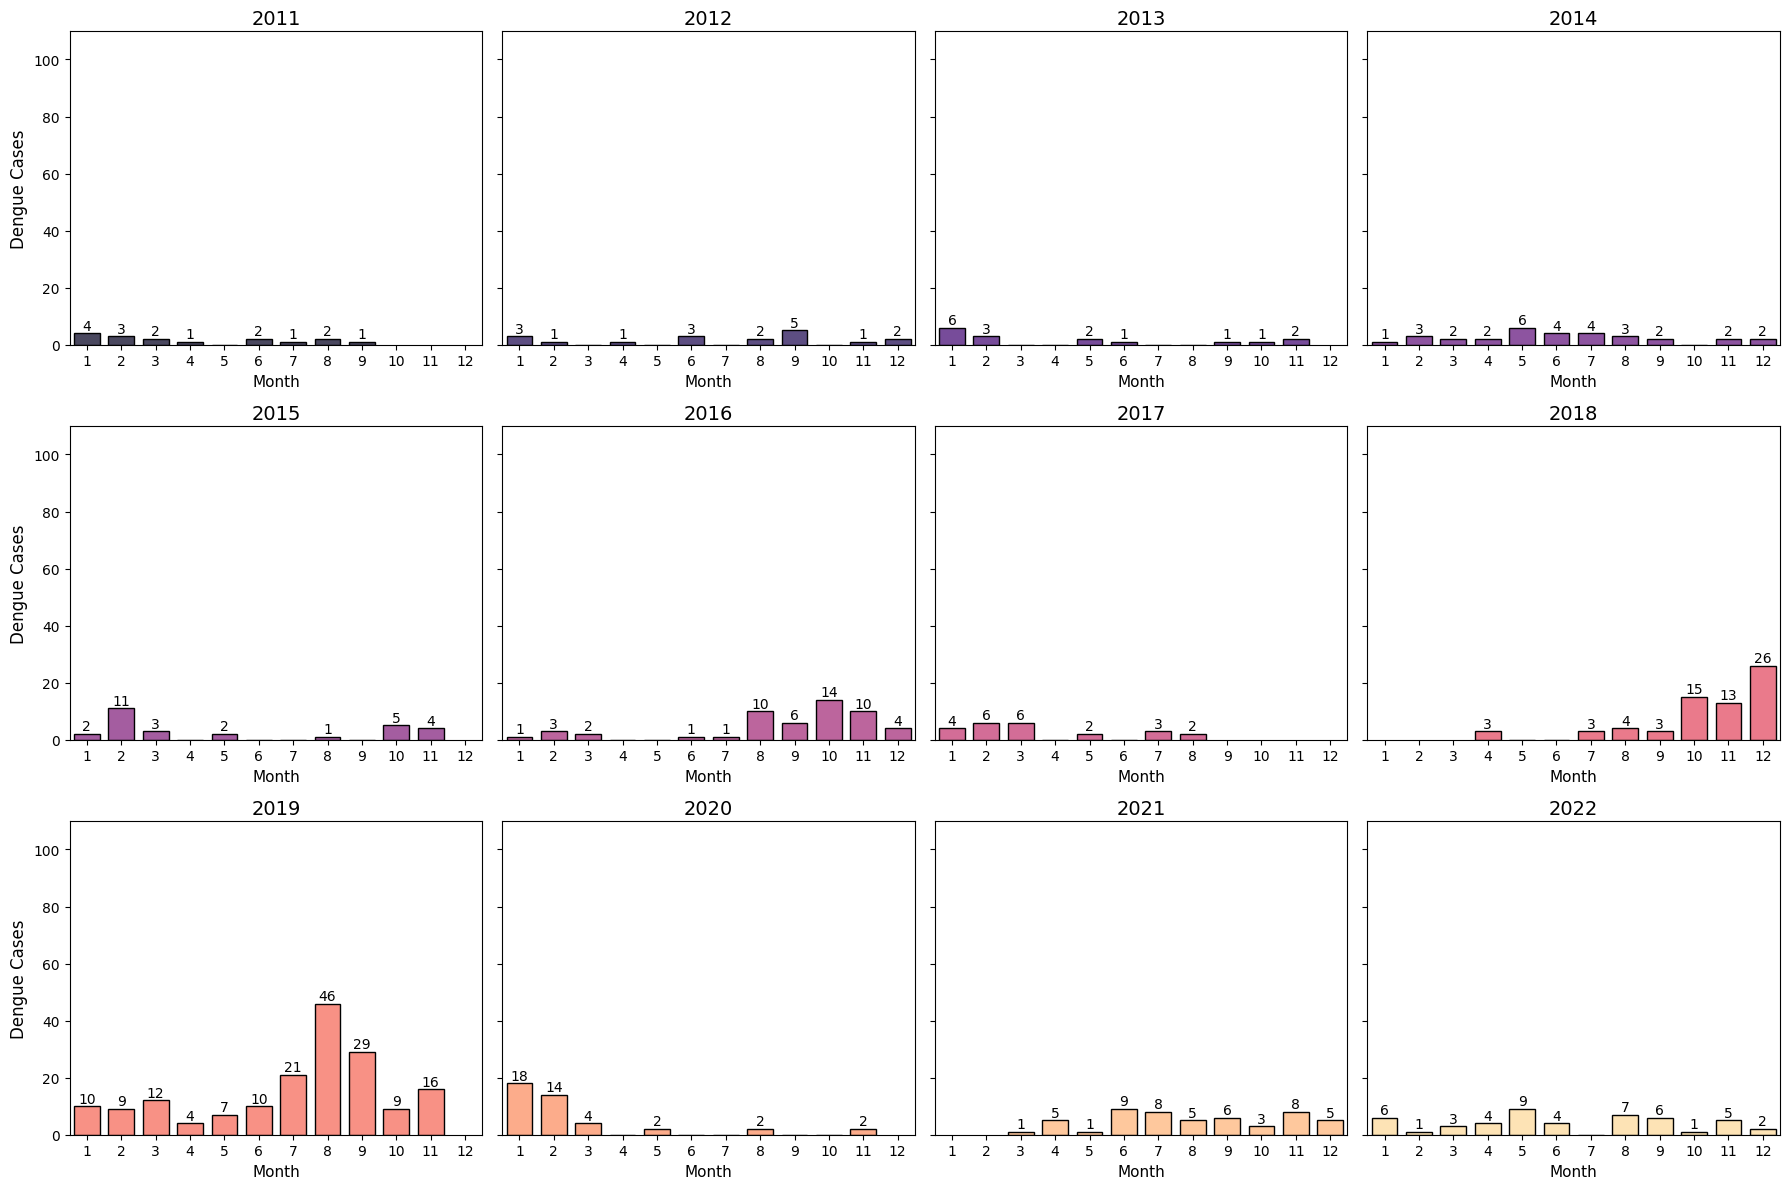

In [106]:
#HISTOGRAM FOR MONTHLY CASES EVERY YEAR
plot_dengue_cases(df, "TAMBACAN")


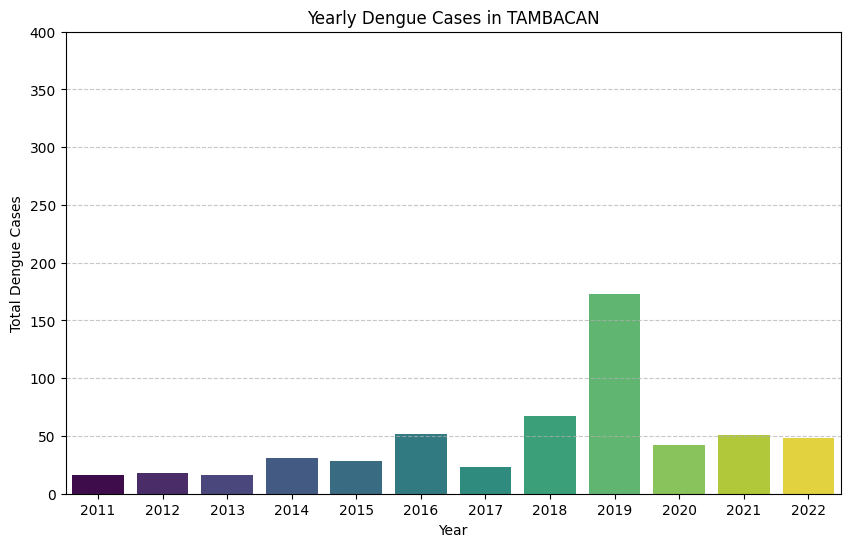

In [107]:
plot_total_dengue_cases_yearly(df, "TAMBACAN")

<div style="
    background-color: black; 
    color: white; 
    padding: 10px; 
    border-radius: 10px; 
    text-align: center;
    max-width: 100vw; 
    width: 100%;
    box-sizing: border-box;">
    TIBANGA MONTHLY CASES
</div>


In [108]:
selected_barangay = "TIBANGA"  # Change this to any barangay you want
barangay_data = get_selected_barangay(df, selected_barangay)

# Display the data for each year
for year, data in barangay_data.items():
    display(data)


Barangay_No Barangay       x        y  Year  Month  Dengue Cases  \
36            36  TIBANGA  8.2402  124.241  2011      1             1   
80            36  TIBANGA  8.2402  124.241  2011      2             2   
124           36  TIBANGA  8.2402  124.241  2011      3             2   
168           36  TIBANGA  8.2402  124.241  2011      4             0   
212           36  TIBANGA  8.2402  124.241  2011      5             0   
256           36  TIBANGA  8.2402  124.241  2011      6             0   
300           36  TIBANGA  8.2402  124.241  2011      7             0   
344           36  TIBANGA  8.2402  124.241  2011      8             1   
388           36  TIBANGA  8.2402  124.241  2011      9             0   
432           36  TIBANGA  8.2402  124.241  2011     10             0   
476           36  TIBANGA  8.2402  124.241  2011     11             1   
520           36  TIBANGA  8.2402  124.241  2011     12             0   

     Temperature  Humidity  Rainfall  
36          23.8      88.1       7.0  
80          24.1      87.2      12.0  
124         25.3      85.5      20.0  
168         26.0      83.1      35.0  
212         27.2      81.9      55.0  
256         26.4      83.5      90.0  
300         25.7      84.7     110.0  
344         25.1      85.3      95.0  
388         24.4      86.2      70.0  
432         24.0      87.0      50.0  
476         23.6      88.4      30.0  
520         23.2      89.1      15.0

Barangay_No Barangay       x        y  Year  Month  Dengue Cases  \
564            36  TIBANGA  8.2402  124.241  2012      1             1   
608            36  TIBANGA  8.2402  124.241  2012      2             2   
652            36  TIBANGA  8.2402  124.241  2012      3             2   
696            36  TIBANGA  8.2402  124.241  2012      4             0   
740            36  TIBANGA  8.2402  124.241  2012      5             0   
784            36  TIBANGA  8.2402  124.241  2012      6             5   
828            36  TIBANGA  8.2402  124.241  2012      7             0   
872            36  TIBANGA  8.2402  124.241  2012      8             0   
916            36  TIBANGA  8.2402  124.241  2012      9             0   
960            36  TIBANGA  8.2402  124.241  2012     10             1   
1004           36  TIBANGA  8.2402  124.241  2012     11             1   
1048           36  TIBANGA  8.2402  124.241  2012     12             0   

      Temperature  Humidity  Rainfall  
564          24.3      85.1       4.0  
608          24.3      85.7       7.1  
652          24.6      83.3       3.1  
696          25.4      82.3       6.9  
740          25.1      86.4       6.9  
784          24.7      85.3       7.9  
828          24.9      85.2       6.4  
872          24.9      85.2       6.4  
916          24.1      88.1      11.4  
960          24.6      86.5       8.4  
1004         24.8      84.8       4.1  
1048         24.7      84.8       5.7

Barangay_No Barangay       x        y  Year  Month  Dengue Cases  \
1092           36  TIBANGA  8.2402  124.241  2013      1             0   
1136           36  TIBANGA  8.2402  124.241  2013      2             0   
1180           36  TIBANGA  8.2402  124.241  2013      3             0   
1224           36  TIBANGA  8.2402  124.241  2013      4             0   
1268           36  TIBANGA  8.2402  124.241  2013      5             0   
1312           36  TIBANGA  8.2402  124.241  2013      6             0   
1356           36  TIBANGA  8.2402  124.241  2013      7             0   
1400           36  TIBANGA  8.2402  124.241  2013      8             0   
1444           36  TIBANGA  8.2402  124.241  2013      9             0   
1488           36  TIBANGA  8.2402  124.241  2013     10             1   
1532           36  TIBANGA  8.2402  124.241  2013     11             0   
1576           36  TIBANGA  8.2402  124.241  2013     12             1   

      Temperature  Humidity  Rainfall  
1092         24.2      88.2       8.1  
1136         24.4      84.7       6.0  
1180         25.5      81.1       2.7  
1224         26.0      81.0       4.9  
1268         26.0      82.8       5.2  
1312         24.9      86.9       9.2  
1356         24.5      87.7      11.0  
1400         24.3      87.2       6.9  
1444         24.6      86.5       4.9  
1488         24.0      88.0      10.4  
1532         24.2      85.9       7.8  
1576         24.4      84.0       3.5

Barangay_No Barangay       x        y  Year  Month  Dengue Cases  \
1620           36  TIBANGA  8.2402  124.241  2014      1             0   
1664           36  TIBANGA  8.2402  124.241  2014      2             0   
1708           36  TIBANGA  8.2402  124.241  2014      3             2   
1752           36  TIBANGA  8.2402  124.241  2014      4             0   
1796           36  TIBANGA  8.2402  124.241  2014      5             2   
1840           36  TIBANGA  8.2402  124.241  2014      6             4   
1884           36  TIBANGA  8.2402  124.241  2014      7             5   
1928           36  TIBANGA  8.2402  124.241  2014      8             4   
1972           36  TIBANGA  8.2402  124.241  2014      9             2   
2016           36  TIBANGA  8.2402  124.241  2014     10             3   
2060           36  TIBANGA  8.2402  124.241  2014     11             1   
2104           36  TIBANGA  8.2402  124.241  2014     12             1   

      Temperature  Humidity  Rainfall  
1620         23.2      86.4       6.8  
1664         23.7      82.4       2.3  
1708         24.3      82.5       3.8  
1752         25.1      81.4       2.0  
1796         25.3      84.0       4.9  
1840         24.5      87.1       6.6  
1884         23.4      89.1       8.5  
1928         23.9      87.7       8.0  
1972         23.4      88.5       7.1  
2016         23.9      88.4       8.5  
2060         24.7      85.2       6.1  
2104         24.0      85.3       4.9

Barangay_No Barangay       x        y  Year  Month  Dengue Cases  \
2148           36  TIBANGA  8.2402  124.241  2015      1             6   
2192           36  TIBANGA  8.2402  124.241  2015      2             4   
2236           36  TIBANGA  8.2402  124.241  2015      3             0   
2280           36  TIBANGA  8.2402  124.241  2015      4             0   
2324           36  TIBANGA  8.2402  124.241  2015      5             0   
2368           36  TIBANGA  8.2402  124.241  2015      6             0   
2412           36  TIBANGA  8.2402  124.241  2015      7             0   
2456           36  TIBANGA  8.2402  124.241  2015      8            10   
2500           36  TIBANGA  8.2402  124.241  2015      9             1   
2544           36  TIBANGA  8.2402  124.241  2015     10             8   
2588           36  TIBANGA  8.2402  124.241  2015     11             9   
2632           36  TIBANGA  8.2402  124.241  2015     12             2   

      Temperature  Humidity  Rainfall  
2148         25.6      89.0       5.9  
2192         25.6      87.0       3.0  
2236         26.1      83.2       1.1  
2280         27.3      82.8       2.1  
2324         28.4      78.1       2.7  
2368         27.4      81.9       8.7  
2412         27.6      80.4       4.2  
2456         27.5      80.9       5.5  
2500         27.2      82.4       8.2  
2544         27.2      83.4       4.9  
2588         26.8      87.3       6.5  
2632         26.5      87.1       4.8

Barangay_No Barangay       x        y  Year  Month  Dengue Cases  \
2676           36  TIBANGA  8.2402  124.241  2016      1             7   
2720           36  TIBANGA  8.2402  124.241  2016      2             7   
2764           36  TIBANGA  8.2402  124.241  2016      3             3   
2808           36  TIBANGA  8.2402  124.241  2016      4             2   
2852           36  TIBANGA  8.2402  124.241  2016      5             0   
2896           36  TIBANGA  8.2402  124.241  2016      6             1   
2940           36  TIBANGA  8.2402  124.241  2016      7             3   
2984           36  TIBANGA  8.2402  124.241  2016      8             8   
3028           36  TIBANGA  8.2402  124.241  2016      9             4   
3072           36  TIBANGA  8.2402  124.241  2016     10             2   
3116           36  TIBANGA  8.2402  124.241  2016     11             8   
3160           36  TIBANGA  8.2402  124.241  2016     12             2   

      Temperature  Humidity  Rainfall  
2676         26.2      86.9       1.6  
2720         26.1      88.2       2.6  
2764         26.8      84.4       0.4  
2808         28.1      80.1       1.5  
2852         28.3      81.9       8.3  
2896         27.5      83.9      12.5  
2940         27.6      82.0       5.2  
2984         27.8      80.3       2.7  
3028         27.2      82.4       6.2  
3072         27.1      84.6       8.9  
3116         26.5      86.6       7.6  
3160         26.7      86.9       8.2

Barangay_No Barangay       x        y  Year  Month  Dengue Cases  \
3204           36  TIBANGA  8.2402  124.241  2017      1             6   
3248           36  TIBANGA  8.2402  124.241  2017      2             2   
3292           36  TIBANGA  8.2402  124.241  2017      3             1   
3336           36  TIBANGA  8.2402  124.241  2017      4             0   
3380           36  TIBANGA  8.2402  124.241  2017      5             0   
3424           36  TIBANGA  8.2402  124.241  2017      6             0   
3468           36  TIBANGA  8.2402  124.241  2017      7             1   
3512           36  TIBANGA  8.2402  124.241  2017      8             0   
3556           36  TIBANGA  8.2402  124.241  2017      9             1   
3600           36  TIBANGA  8.2402  124.241  2017     10             0   
3644           36  TIBANGA  8.2402  124.241  2017     11             0   
3688           36  TIBANGA  8.2402  124.241  2017     12             0   

      Temperature  Humidity  Rainfall  
3204         25.9      88.9      12.5  
3248         25.6      87.8       5.9  
3292         26.1      87.4       8.0  
3336         27.2      85.0       5.1  
3380         27.8      84.4      10.4  
3424         27.4      83.8       7.8  
3468         27.2      82.6       9.1  
3512         27.9      83.4       9.6  
3556         27.3      83.3      11.4  
3600         27.0      84.0       8.3  
3644         27.0      86.6       7.3  
3688         26.7      85.9       9.6

Barangay_No Barangay       x        y  Year  Month  Dengue Cases  \
3732           36  TIBANGA  8.2402  124.241  2018      1             3   
3776           36  TIBANGA  8.2402  124.241  2018      2             1   
3820           36  TIBANGA  8.2402  124.241  2018      3             7   
3864           36  TIBANGA  8.2402  124.241  2018      4             1   
3908           36  TIBANGA  8.2402  124.241  2018      5             1   
3952           36  TIBANGA  8.2402  124.241  2018      6             3   
3996           36  TIBANGA  8.2402  124.241  2018      7             2   
4040           36  TIBANGA  8.2402  124.241  2018      8             3   
4084           36  TIBANGA  8.2402  124.241  2018      9             4   
4128           36  TIBANGA  8.2402  124.241  2018     10             3   
4172           36  TIBANGA  8.2402  124.241  2018     11             8   
4216           36  TIBANGA  8.2402  124.241  2018     12             3   

      Temperature  Humidity  Rainfall  
3732         26.2      87.5       7.3  
3776         26.4      86.0       9.7  
3820         26.5      84.6       3.7  
3864         27.4      82.5       2.6  
3908         27.9      82.0       6.9  
3952         27.7      80.7       5.2  
3996         27.3      81.6       4.7  
4040         27.4      79.8       2.1  
4084         26.9      82.2       5.4  
4128         27.2      82.7       4.2  
4172         26.5      86.6       6.1  
4216         26.3      88.1       5.8

Barangay_No Barangay       x        y  Year  Month  Dengue Cases  \
4260           36  TIBANGA  8.2402  124.241  2019      1            15   
4304           36  TIBANGA  8.2402  124.241  2019      2             2   
4348           36  TIBANGA  8.2402  124.241  2019      3             2   
4392           36  TIBANGA  8.2402  124.241  2019      4             0   
4436           36  TIBANGA  8.2402  124.241  2019      5             0   
4480           36  TIBANGA  8.2402  124.241  2019      6             9   
4524           36  TIBANGA  8.2402  124.241  2019      7            23   
4568           36  TIBANGA  8.2402  124.241  2019      8            46   
4612           36  TIBANGA  8.2402  124.241  2019      9            18   
4656           36  TIBANGA  8.2402  124.241  2019     10            18   
4700           36  TIBANGA  8.2402  124.241  2019     11             8   
4744           36  TIBANGA  8.2402  124.241  2019     12             5   

      Temperature  Humidity  Rainfall  
4260         25.5      88.2       5.7  
4304         25.3      84.3       1.1  
4348         26.1      83.2       1.9  
4392         27.5      80.3       1.8  
4436         28.4      78.6       4.4  
4480         27.8      82.7       9.1  
4524         27.2      82.1       6.2  
4568         27.7      77.1       1.4  
4612         27.8      78.2       3.3  
4656         27.0      83.8       7.7  
4700         27.1      82.9       4.3  
4744         26.4      86.4       4.2

Barangay_No Barangay       x        y  Year  Month  Dengue Cases  \
4788           36  TIBANGA  8.2402  124.241  2020      1             6   
4832           36  TIBANGA  8.2402  124.241  2020      2             2   
4876           36  TIBANGA  8.2402  124.241  2020      3             2   
4920           36  TIBANGA  8.2402  124.241  2020      4             0   
4964           36  TIBANGA  8.2402  124.241  2020      5             6   
5008           36  TIBANGA  8.2402  124.241  2020      6             4   
5052           36  TIBANGA  8.2402  124.241  2020      7             0   
5096           36  TIBANGA  8.2402  124.241  2020      8             0   
5140           36  TIBANGA  8.2402  124.241  2020      9             0   
5184           36  TIBANGA  8.2402  124.241  2020     10             0   
5228           36  TIBANGA  8.2402  124.241  2020     11             0   
5272           36  TIBANGA  8.2402  124.241  2020     12             0   

      Temperature  Humidity  Rainfall  
4788         26.3      86.8       2.1  
4832         25.7      87.2       3.5  
4876         26.4      85.2       2.0  
4920         27.2      81.6       1.0  
4964         28.0      83.2       9.8  
5008         27.3      84.1      14.1  
5052         27.0      83.9      15.7  
5096         27.2      82.9      11.7  
5140         27.2      83.7       9.2  
5184         26.9      84.2      13.2  
5228         26.8      86.2       5.5  
5272         26.7      86.6       8.2

Barangay_No Barangay       x        y  Year  Month  Dengue Cases  \
5316           36  TIBANGA  8.2402  124.241  2021      1             3   
5360           36  TIBANGA  8.2402  124.241  2021      2             5   
5404           36  TIBANGA  8.2402  124.241  2021      3             2   
5448           36  TIBANGA  8.2402  124.241  2021      4             5   
5492           36  TIBANGA  8.2402  124.241  2021      5             0   
5536           36  TIBANGA  8.2402  124.241  2021      6             4   
5580           36  TIBANGA  8.2402  124.241  2021      7             6   
5624           36  TIBANGA  8.2402  124.241  2021      8             4   
5668           36  TIBANGA  8.2402  124.241  2021      9             4   
5712           36  TIBANGA  8.2402  124.241  2021     10             2   
5756           36  TIBANGA  8.2402  124.241  2021     11             0   
5800           36  TIBANGA  8.2402  124.241  2021     12             4   

      Temperature  Humidity  Rainfall  
5316         25.9      88.5      11.9  
5360         26.0      87.1      12.6  
5404         26.8      84.7       5.5  
5448         27.1      82.5       4.5  
5492         27.5      84.0      10.7  
5536         27.6      81.3       8.2  
5580         27.7      80.0       4.4  
5624         27.5      80.0       6.5  
5668         27.2      82.7       9.5  
5712         27.3      83.6       8.7  
5756         27.0      86.4       9.4  
5800         26.2      86.9       9.8

Barangay_No Barangay       x        y  Year  Month  Dengue Cases  \
5844           36  TIBANGA  8.2402  124.241  2022      1             0   
5888           36  TIBANGA  8.2402  124.241  2022      2             1   
5932           36  TIBANGA  8.2402  124.241  2022      3             3   
5976           36  TIBANGA  8.2402  124.241  2022      4             3   
6020           36  TIBANGA  8.2402  124.241  2022      5             0   
6064           36  TIBANGA  8.2402  124.241  2022      6             2   
6108           36  TIBANGA  8.2402  124.241  2022      7             2   
6152           36  TIBANGA  8.2402  124.241  2022      8             0   
6196           36  TIBANGA  8.2402  124.241  2022      9             0   
6240           36  TIBANGA  8.2402  124.241  2022     10             0   
6284           36  TIBANGA  8.2402  124.241  2022     11             3   
6328           36  TIBANGA  8.2402  124.241  2022     12             1   

      Temperature  Humidity  Rainfall  
5844         26.0      86.9       8.3  
5888         26.0      87.2       3.9  
5932         26.8      86.5      11.0  
5976         26.8      86.5      12.2  
6020         27.4      83.9      11.5  
6064         27.6      81.9       7.1  
6108         27.4      83.2      11.6  
6152         27.3      82.0       7.9  
6196         27.5      81.1       6.1  
6240         27.1      84.2       9.0  
6284         27.0      85.8       6.6  
6328         26.4      87.1      14.5

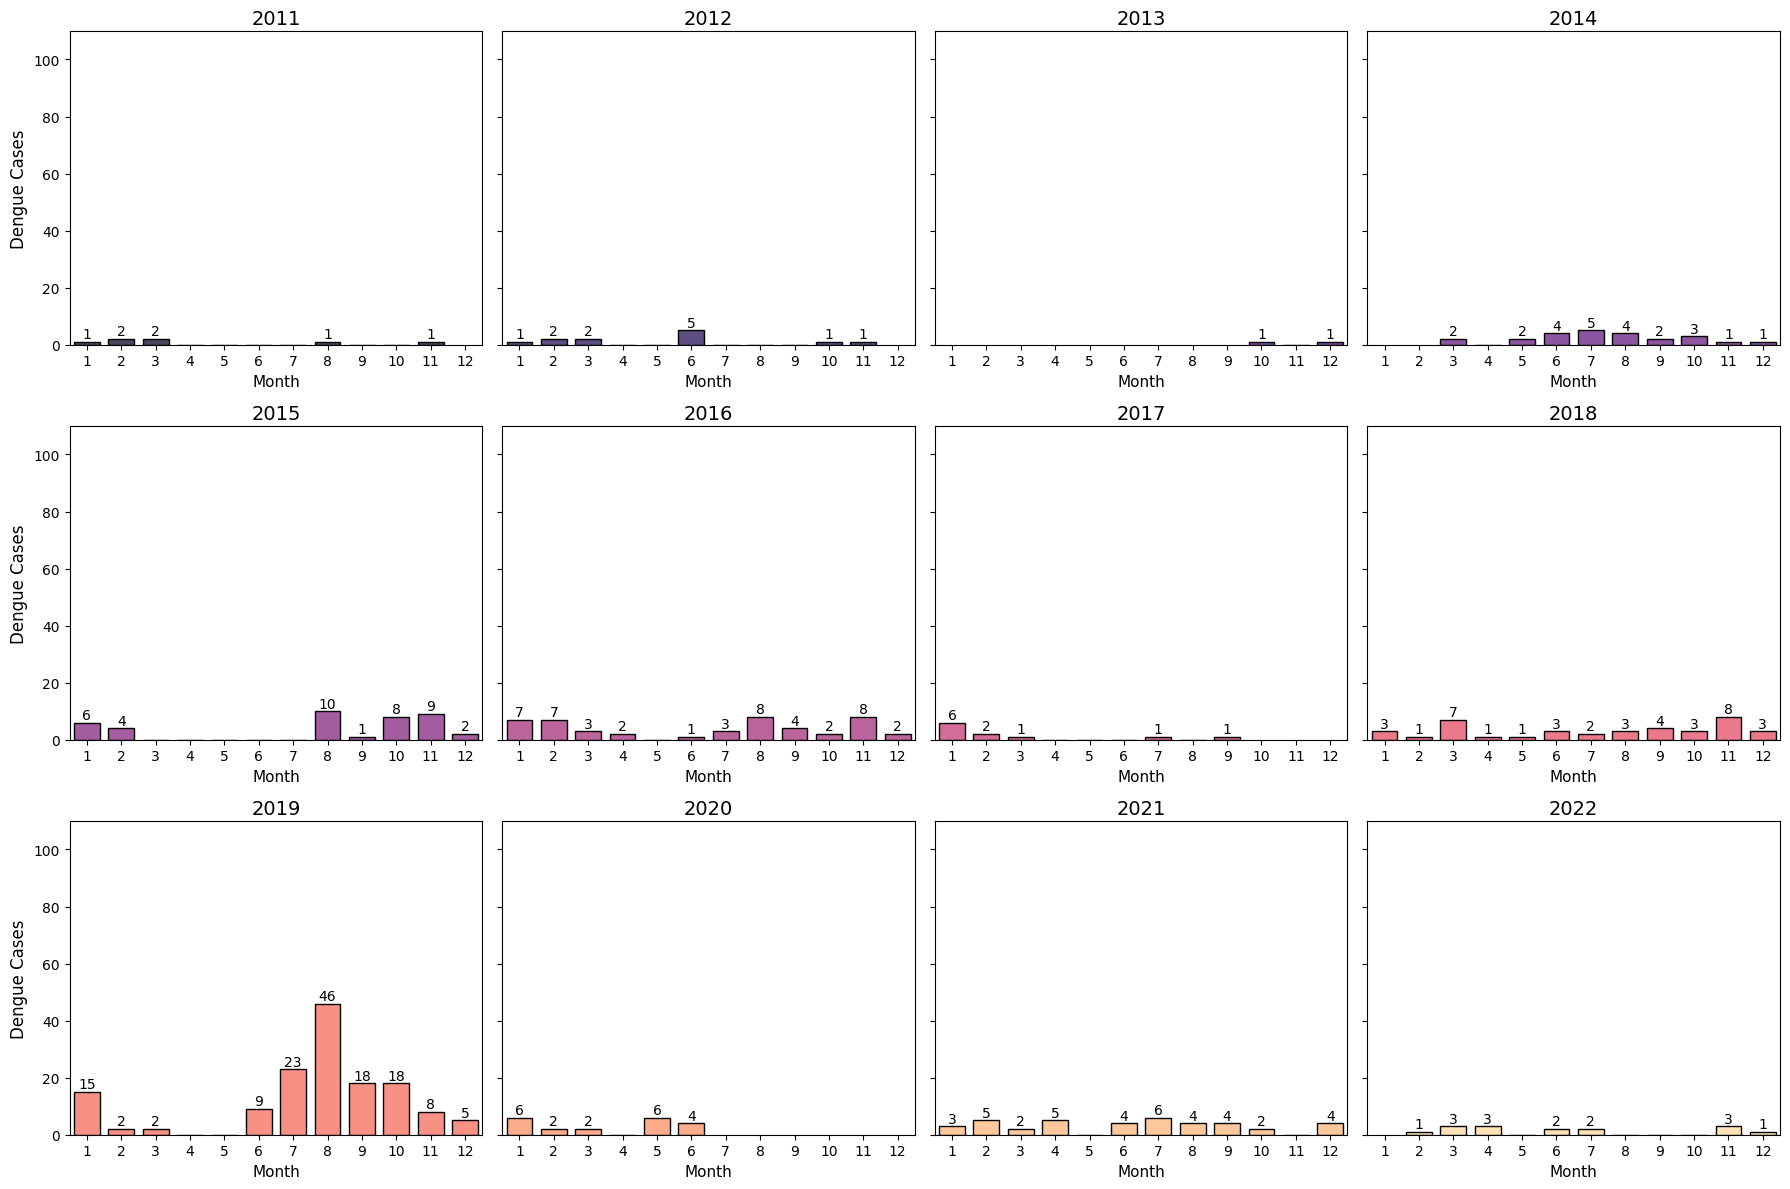

In [109]:
#HISTOGRAM FOR MONTHLY CASES EVERY YEAR
plot_dengue_cases(df, "TIBANGA")


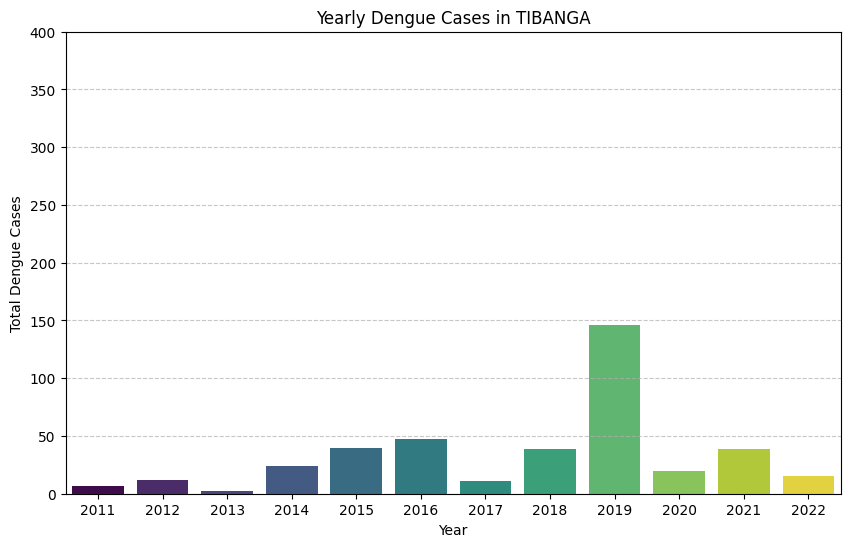

In [110]:
plot_total_dengue_cases_yearly(df, "TIBANGA")

<div style="
    background-color: black; 
    color: white; 
    padding: 10px; 
    border-radius: 10px; 
    text-align: center;
    max-width: 100vw; 
    width: 100%;
    box-sizing: border-box;">
    TIPANOY MONTHLY CASES
</div>


In [111]:
selected_barangay = "TIPANOY"  # Change this to any barangay you want
barangay_data = get_selected_barangay(df, selected_barangay)

# Display the data for each year
for year, data in barangay_data.items():
    display(data)

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
37            37  TIPANOY  8.1902  124.2634  2011      1             1   
81            37  TIPANOY  8.1902  124.2634  2011      2             1   
125           37  TIPANOY  8.1902  124.2634  2011      3             0   
169           37  TIPANOY  8.1902  124.2634  2011      4             0   
213           37  TIPANOY  8.1902  124.2634  2011      5             0   
257           37  TIPANOY  8.1902  124.2634  2011      6             0   
301           37  TIPANOY  8.1902  124.2634  2011      7             0   
345           37  TIPANOY  8.1902  124.2634  2011      8             0   
389           37  TIPANOY  8.1902  124.2634  2011      9             0   
433           37  TIPANOY  8.1902  124.2634  2011     10             1   
477           37  TIPANOY  8.1902  124.2634  2011     11             0   
521           37  TIPANOY  8.1902  124.2634  2011     12             1   

     Temperature  Humidity  Rainfall  
37          23.8      88.1       7.0  
81          24.1      87.2      12.0  
125         25.3      85.5      20.0  
169         26.0      83.1      35.0  
213         27.2      81.9      55.0  
257         26.4      83.5      90.0  
301         25.7      84.7     110.0  
345         25.1      85.3      95.0  
389         24.4      86.2      70.0  
433         24.0      87.0      50.0  
477         23.6      88.4      30.0  
521         23.2      89.1      15.0

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
565            37  TIPANOY  8.1902  124.2634  2012      1             1   
609            37  TIPANOY  8.1902  124.2634  2012      2             1   
653            37  TIPANOY  8.1902  124.2634  2012      3             0   
697            37  TIPANOY  8.1902  124.2634  2012      4             2   
741            37  TIPANOY  8.1902  124.2634  2012      5             0   
785            37  TIPANOY  8.1902  124.2634  2012      6             1   
829            37  TIPANOY  8.1902  124.2634  2012      7             2   
873            37  TIPANOY  8.1902  124.2634  2012      8             0   
917            37  TIPANOY  8.1902  124.2634  2012      9             3   
961            37  TIPANOY  8.1902  124.2634  2012     10             0   
1005           37  TIPANOY  8.1902  124.2634  2012     11             1   
1049           37  TIPANOY  8.1902  124.2634  2012     12             0   

      Temperature  Humidity  Rainfall  
565          24.3      85.1       4.0  
609          24.3      85.7       7.1  
653          24.6      83.3       3.1  
697          25.4      82.3       6.9  
741          25.1      86.4       6.9  
785          24.7      85.3       7.9  
829          24.9      85.2       6.4  
873          24.9      85.2       6.4  
917          24.1      88.1      11.4  
961          24.6      86.5       8.4  
1005         24.8      84.8       4.1  
1049         24.7      84.8       5.7

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
1093           37  TIPANOY  8.1902  124.2634  2013      1             3   
1137           37  TIPANOY  8.1902  124.2634  2013      2             1   
1181           37  TIPANOY  8.1902  124.2634  2013      3             0   
1225           37  TIPANOY  8.1902  124.2634  2013      4             0   
1269           37  TIPANOY  8.1902  124.2634  2013      5             0   
1313           37  TIPANOY  8.1902  124.2634  2013      6             1   
1357           37  TIPANOY  8.1902  124.2634  2013      7             0   
1401           37  TIPANOY  8.1902  124.2634  2013      8             3   
1445           37  TIPANOY  8.1902  124.2634  2013      9             2   
1489           37  TIPANOY  8.1902  124.2634  2013     10             1   
1533           37  TIPANOY  8.1902  124.2634  2013     11             3   
1577           37  TIPANOY  8.1902  124.2634  2013     12             0   

      Temperature  Humidity  Rainfall  
1093         24.2      88.2       8.1  
1137         24.4      84.7       6.0  
1181         25.5      81.1       2.7  
1225         26.0      81.0       4.9  
1269         26.0      82.8       5.2  
1313         24.9      86.9       9.2  
1357         24.5      87.7      11.0  
1401         24.3      87.2       6.9  
1445         24.6      86.5       4.9  
1489         24.0      88.0      10.4  
1533         24.2      85.9       7.8  
1577         24.4      84.0       3.5

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
1621           37  TIPANOY  8.1902  124.2634  2014      1             0   
1665           37  TIPANOY  8.1902  124.2634  2014      2             0   
1709           37  TIPANOY  8.1902  124.2634  2014      3             1   
1753           37  TIPANOY  8.1902  124.2634  2014      4             0   
1797           37  TIPANOY  8.1902  124.2634  2014      5             1   
1841           37  TIPANOY  8.1902  124.2634  2014      6             5   
1885           37  TIPANOY  8.1902  124.2634  2014      7             1   
1929           37  TIPANOY  8.1902  124.2634  2014      8             7   
1973           37  TIPANOY  8.1902  124.2634  2014      9             1   
2017           37  TIPANOY  8.1902  124.2634  2014     10             3   
2061           37  TIPANOY  8.1902  124.2634  2014     11             2   
2105           37  TIPANOY  8.1902  124.2634  2014     12             1   

      Temperature  Humidity  Rainfall  
1621         23.2      86.4       6.8  
1665         23.7      82.4       2.3  
1709         24.3      82.5       3.8  
1753         25.1      81.4       2.0  
1797         25.3      84.0       4.9  
1841         24.5      87.1       6.6  
1885         23.4      89.1       8.5  
1929         23.9      87.7       8.0  
1973         23.4      88.5       7.1  
2017         23.9      88.4       8.5  
2061         24.7      85.2       6.1  
2105         24.0      85.3       4.9

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
2149           37  TIPANOY  8.1902  124.2634  2015      1             3   
2193           37  TIPANOY  8.1902  124.2634  2015      2             1   
2237           37  TIPANOY  8.1902  124.2634  2015      3             2   
2281           37  TIPANOY  8.1902  124.2634  2015      4             0   
2325           37  TIPANOY  8.1902  124.2634  2015      5             0   
2369           37  TIPANOY  8.1902  124.2634  2015      6             0   
2413           37  TIPANOY  8.1902  124.2634  2015      7             2   
2457           37  TIPANOY  8.1902  124.2634  2015      8             4   
2501           37  TIPANOY  8.1902  124.2634  2015      9             0   
2545           37  TIPANOY  8.1902  124.2634  2015     10             0   
2589           37  TIPANOY  8.1902  124.2634  2015     11             2   
2633           37  TIPANOY  8.1902  124.2634  2015     12             4   

      Temperature  Humidity  Rainfall  
2149         25.6      89.0       5.9  
2193         25.6      87.0       3.0  
2237         26.1      83.2       1.1  
2281         27.3      82.8       2.1  
2325         28.4      78.1       2.7  
2369         27.4      81.9       8.7  
2413         27.6      80.4       4.2  
2457         27.5      80.9       5.5  
2501         27.2      82.4       8.2  
2545         27.2      83.4       4.9  
2589         26.8      87.3       6.5  
2633         26.5      87.1       4.8

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
2677           37  TIPANOY  8.1902  124.2634  2016      1             9   
2721           37  TIPANOY  8.1902  124.2634  2016      2             3   
2765           37  TIPANOY  8.1902  124.2634  2016      3             0   
2809           37  TIPANOY  8.1902  124.2634  2016      4             0   
2853           37  TIPANOY  8.1902  124.2634  2016      5             1   
2897           37  TIPANOY  8.1902  124.2634  2016      6             0   
2941           37  TIPANOY  8.1902  124.2634  2016      7             6   
2985           37  TIPANOY  8.1902  124.2634  2016      8             8   
3029           37  TIPANOY  8.1902  124.2634  2016      9             4   
3073           37  TIPANOY  8.1902  124.2634  2016     10             8   
3117           37  TIPANOY  8.1902  124.2634  2016     11             6   
3161           37  TIPANOY  8.1902  124.2634  2016     12             6   

      Temperature  Humidity  Rainfall  
2677         26.2      86.9       1.6  
2721         26.1      88.2       2.6  
2765         26.8      84.4       0.4  
2809         28.1      80.1       1.5  
2853         28.3      81.9       8.3  
2897         27.5      83.9      12.5  
2941         27.6      82.0       5.2  
2985         27.8      80.3       2.7  
3029         27.2      82.4       6.2  
3073         27.1      84.6       8.9  
3117         26.5      86.6       7.6  
3161         26.7      86.9       8.2

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
3205           37  TIPANOY  8.1902  124.2634  2017      1             8   
3249           37  TIPANOY  8.1902  124.2634  2017      2             4   
3293           37  TIPANOY  8.1902  124.2634  2017      3             2   
3337           37  TIPANOY  8.1902  124.2634  2017      4             0   
3381           37  TIPANOY  8.1902  124.2634  2017      5             1   
3425           37  TIPANOY  8.1902  124.2634  2017      6             1   
3469           37  TIPANOY  8.1902  124.2634  2017      7             3   
3513           37  TIPANOY  8.1902  124.2634  2017      8             2   
3557           37  TIPANOY  8.1902  124.2634  2017      9             4   
3601           37  TIPANOY  8.1902  124.2634  2017     10             0   
3645           37  TIPANOY  8.1902  124.2634  2017     11             0   
3689           37  TIPANOY  8.1902  124.2634  2017     12             0   

      Temperature  Humidity  Rainfall  
3205         25.9      88.9      12.5  
3249         25.6      87.8       5.9  
3293         26.1      87.4       8.0  
3337         27.2      85.0       5.1  
3381         27.8      84.4      10.4  
3425         27.4      83.8       7.8  
3469         27.2      82.6       9.1  
3513         27.9      83.4       9.6  
3557         27.3      83.3      11.4  
3601         27.0      84.0       8.3  
3645         27.0      86.6       7.3  
3689         26.7      85.9       9.6

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
3733           37  TIPANOY  8.1902  124.2634  2018      1             0   
3777           37  TIPANOY  8.1902  124.2634  2018      2             0   
3821           37  TIPANOY  8.1902  124.2634  2018      3             4   
3865           37  TIPANOY  8.1902  124.2634  2018      4             0   
3909           37  TIPANOY  8.1902  124.2634  2018      5             2   
3953           37  TIPANOY  8.1902  124.2634  2018      6             2   
3997           37  TIPANOY  8.1902  124.2634  2018      7             2   
4041           37  TIPANOY  8.1902  124.2634  2018      8             5   
4085           37  TIPANOY  8.1902  124.2634  2018      9             4   
4129           37  TIPANOY  8.1902  124.2634  2018     10             9   
4173           37  TIPANOY  8.1902  124.2634  2018     11            16   
4217           37  TIPANOY  8.1902  124.2634  2018     12            19   

      Temperature  Humidity  Rainfall  
3733         26.2      87.5       7.3  
3777         26.4      86.0       9.7  
3821         26.5      84.6       3.7  
3865         27.4      82.5       2.6  
3909         27.9      82.0       6.9  
3953         27.7      80.7       5.2  
3997         27.3      81.6       4.7  
4041         27.4      79.8       2.1  
4085         26.9      82.2       5.4  
4129         27.2      82.7       4.2  
4173         26.5      86.6       6.1  
4217         26.3      88.1       5.8

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
4261           37  TIPANOY  8.1902  124.2634  2019      1            14   
4305           37  TIPANOY  8.1902  124.2634  2019      2             6   
4349           37  TIPANOY  8.1902  124.2634  2019      3            13   
4393           37  TIPANOY  8.1902  124.2634  2019      4             2   
4437           37  TIPANOY  8.1902  124.2634  2019      5             7   
4481           37  TIPANOY  8.1902  124.2634  2019      6             0   
4525           37  TIPANOY  8.1902  124.2634  2019      7            15   
4569           37  TIPANOY  8.1902  124.2634  2019      8            36   
4613           37  TIPANOY  8.1902  124.2634  2019      9            20   
4657           37  TIPANOY  8.1902  124.2634  2019     10            10   
4701           37  TIPANOY  8.1902  124.2634  2019     11             4   
4745           37  TIPANOY  8.1902  124.2634  2019     12             5   

      Temperature  Humidity  Rainfall  
4261         25.5      88.2       5.7  
4305         25.3      84.3       1.1  
4349         26.1      83.2       1.9  
4393         27.5      80.3       1.8  
4437         28.4      78.6       4.4  
4481         27.8      82.7       9.1  
4525         27.2      82.1       6.2  
4569         27.7      77.1       1.4  
4613         27.8      78.2       3.3  
4657         27.0      83.8       7.7  
4701         27.1      82.9       4.3  
4745         26.4      86.4       4.2

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
4789           37  TIPANOY  8.1902  124.2634  2020      1             0   
4833           37  TIPANOY  8.1902  124.2634  2020      2            14   
4877           37  TIPANOY  8.1902  124.2634  2020      3             0   
4921           37  TIPANOY  8.1902  124.2634  2020      4             0   
4965           37  TIPANOY  8.1902  124.2634  2020      5             0   
5009           37  TIPANOY  8.1902  124.2634  2020      6             0   
5053           37  TIPANOY  8.1902  124.2634  2020      7             2   
5097           37  TIPANOY  8.1902  124.2634  2020      8             2   
5141           37  TIPANOY  8.1902  124.2634  2020      9             0   
5185           37  TIPANOY  8.1902  124.2634  2020     10             0   
5229           37  TIPANOY  8.1902  124.2634  2020     11             0   
5273           37  TIPANOY  8.1902  124.2634  2020     12             2   

      Temperature  Humidity  Rainfall  
4789         26.3      86.8       2.1  
4833         25.7      87.2       3.5  
4877         26.4      85.2       2.0  
4921         27.2      81.6       1.0  
4965         28.0      83.2       9.8  
5009         27.3      84.1      14.1  
5053         27.0      83.9      15.7  
5097         27.2      82.9      11.7  
5141         27.2      83.7       9.2  
5185         26.9      84.2      13.2  
5229         26.8      86.2       5.5  
5273         26.7      86.6       8.2

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
5317           37  TIPANOY  8.1902  124.2634  2021      1             2   
5361           37  TIPANOY  8.1902  124.2634  2021      2             1   
5405           37  TIPANOY  8.1902  124.2634  2021      3             0   
5449           37  TIPANOY  8.1902  124.2634  2021      4             3   
5493           37  TIPANOY  8.1902  124.2634  2021      5             4   
5537           37  TIPANOY  8.1902  124.2634  2021      6             1   
5581           37  TIPANOY  8.1902  124.2634  2021      7             4   
5625           37  TIPANOY  8.1902  124.2634  2021      8             4   
5669           37  TIPANOY  8.1902  124.2634  2021      9             3   
5713           37  TIPANOY  8.1902  124.2634  2021     10             9   
5757           37  TIPANOY  8.1902  124.2634  2021     11             8   
5801           37  TIPANOY  8.1902  124.2634  2021     12             2   

      Temperature  Humidity  Rainfall  
5317         25.9      88.5      11.9  
5361         26.0      87.1      12.6  
5405         26.8      84.7       5.5  
5449         27.1      82.5       4.5  
5493         27.5      84.0      10.7  
5537         27.6      81.3       8.2  
5581         27.7      80.0       4.4  
5625         27.5      80.0       6.5  
5669         27.2      82.7       9.5  
5713         27.3      83.6       8.7  
5757         27.0      86.4       9.4  
5801         26.2      86.9       9.8

Barangay_No Barangay       x         y  Year  Month  Dengue Cases  \
5845           37  TIPANOY  8.1902  124.2634  2022      1             0   
5889           37  TIPANOY  8.1902  124.2634  2022      2             1   
5933           37  TIPANOY  8.1902  124.2634  2022      3             1   
5977           37  TIPANOY  8.1902  124.2634  2022      4             3   
6021           37  TIPANOY  8.1902  124.2634  2022      5             1   
6065           37  TIPANOY  8.1902  124.2634  2022      6             3   
6109           37  TIPANOY  8.1902  124.2634  2022      7             5   
6153           37  TIPANOY  8.1902  124.2634  2022      8             3   
6197           37  TIPANOY  8.1902  124.2634  2022      9             1   
6241           37  TIPANOY  8.1902  124.2634  2022     10             3   
6285           37  TIPANOY  8.1902  124.2634  2022     11             1   
6329           37  TIPANOY  8.1902  124.2634  2022     12             2   

      Temperature  Humidity  Rainfall  
5845         26.0      86.9       8.3  
5889         26.0      87.2       3.9  
5933         26.8      86.5      11.0  
5977         26.8      86.5      12.2  
6021         27.4      83.9      11.5  
6065         27.6      81.9       7.1  
6109         27.4      83.2      11.6  
6153         27.3      82.0       7.9  
6197         27.5      81.1       6.1  
6241         27.1      84.2       9.0  
6285         27.0      85.8       6.6  
6329         26.4      87.1      14.5

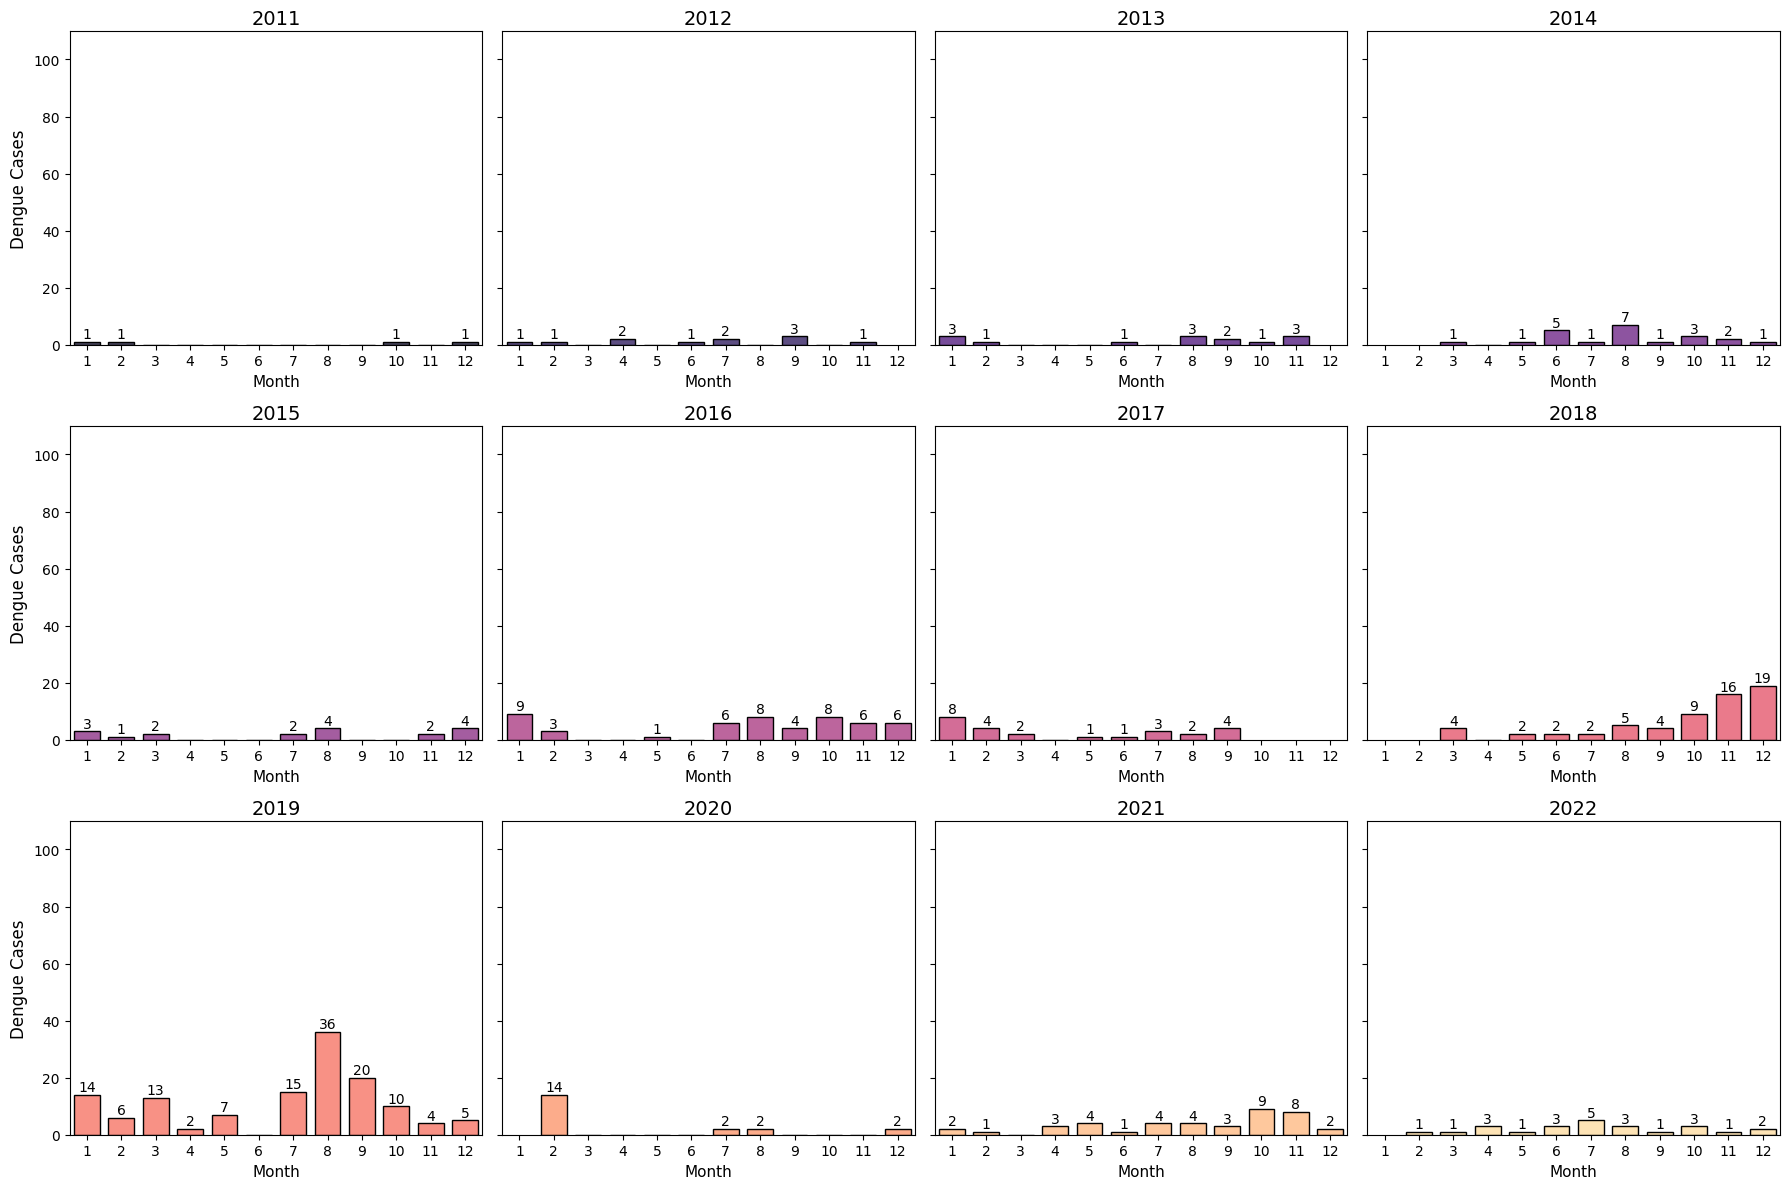

In [112]:
#HISTOGRAM FOR MONTHLY CASES EVERY YEAR
plot_dengue_cases(df, "TIPANOY")

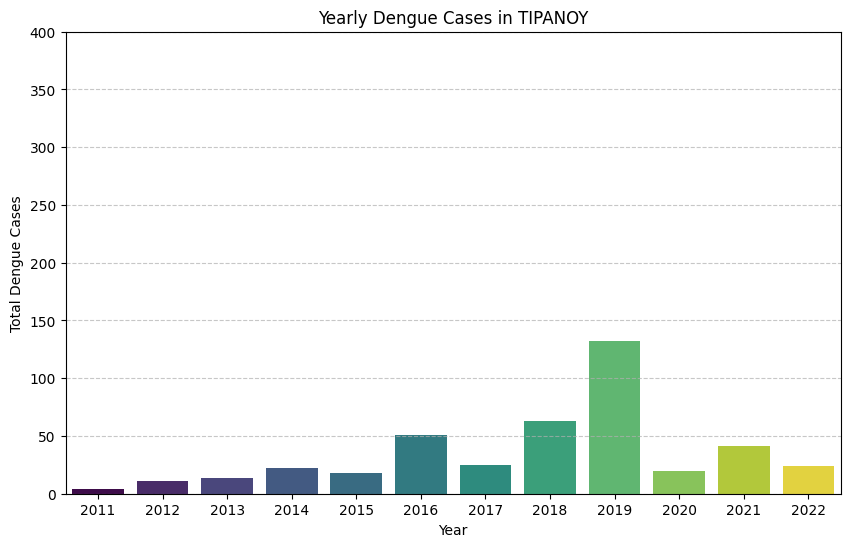

In [113]:
plot_total_dengue_cases_yearly(df, "TIPANOY")

<div style="
    background-color: black; 
    color: white; 
    padding: 10px; 
    border-radius: 10px; 
    text-align: center;
    max-width: 100vw; 
    width: 100%;
    box-sizing: border-box;">
    TOMINOBO PROPER MONTHLY CASES
</div>


In [114]:
selected_barangay = "TOMINOBO PROPER"  # Change this to any barangay you want
barangay_data = get_selected_barangay(df, selected_barangay)

# Display the data for each year
for year, data in barangay_data.items():
    display(data)


Barangay_No         Barangay       x         y  Year  Month  \
38            38  TOMINOBO PROPER  8.2104  124.2221  2011      1   
82            38  TOMINOBO PROPER  8.2104  124.2221  2011      2   
126           38  TOMINOBO PROPER  8.2104  124.2221  2011      3   
170           38  TOMINOBO PROPER  8.2104  124.2221  2011      4   
214           38  TOMINOBO PROPER  8.2104  124.2221  2011      5   
258           38  TOMINOBO PROPER  8.2104  124.2221  2011      6   
302           38  TOMINOBO PROPER  8.2104  124.2221  2011      7   
346           38  TOMINOBO PROPER  8.2104  124.2221  2011      8   
390           38  TOMINOBO PROPER  8.2104  124.2221  2011      9   
434           38  TOMINOBO PROPER  8.2104  124.2221  2011     10   
478           38  TOMINOBO PROPER  8.2104  124.2221  2011     11   
522           38  TOMINOBO PROPER  8.2104  124.2221  2011     12   

     Dengue Cases  Temperature  Humidity  Rainfall  
38              0         23.8      88.1       7.0  
82              0         24.1      87.2      12.0  
126             0         25.3      85.5      20.0  
170             0         26.0      83.1      35.0  
214             0         27.2      81.9      55.0  
258             0         26.4      83.5      90.0  
302             0         25.7      84.7     110.0  
346             0         25.1      85.3      95.0  
390             0         24.4      86.2      70.0  
434             1         24.0      87.0      50.0  
478             0         23.6      88.4      30.0  
522             0         23.2      89.1      15.0

Barangay_No         Barangay       x         y  Year  Month  \
566            38  TOMINOBO PROPER  8.2104  124.2221  2012      1   
610            38  TOMINOBO PROPER  8.2104  124.2221  2012      2   
654            38  TOMINOBO PROPER  8.2104  124.2221  2012      3   
698            38  TOMINOBO PROPER  8.2104  124.2221  2012      4   
742            38  TOMINOBO PROPER  8.2104  124.2221  2012      5   
786            38  TOMINOBO PROPER  8.2104  124.2221  2012      6   
830            38  TOMINOBO PROPER  8.2104  124.2221  2012      7   
874            38  TOMINOBO PROPER  8.2104  124.2221  2012      8   
918            38  TOMINOBO PROPER  8.2104  124.2221  2012      9   
962            38  TOMINOBO PROPER  8.2104  124.2221  2012     10   
1006           38  TOMINOBO PROPER  8.2104  124.2221  2012     11   
1050           38  TOMINOBO PROPER  8.2104  124.2221  2012     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
566              0         24.3      85.1       4.0  
610              0         24.3      85.7       7.1  
654              0         24.6      83.3       3.1  
698              0         25.4      82.3       6.9  
742              0         25.1      86.4       6.9  
786              1         24.7      85.3       7.9  
830              0         24.9      85.2       6.4  
874              2         24.9      85.2       6.4  
918              0         24.1      88.1      11.4  
962              5         24.6      86.5       8.4  
1006             0         24.8      84.8       4.1  
1050             0         24.7      84.8       5.7

Barangay_No         Barangay       x         y  Year  Month  \
1094           38  TOMINOBO PROPER  8.2104  124.2221  2013      1   
1138           38  TOMINOBO PROPER  8.2104  124.2221  2013      2   
1182           38  TOMINOBO PROPER  8.2104  124.2221  2013      3   
1226           38  TOMINOBO PROPER  8.2104  124.2221  2013      4   
1270           38  TOMINOBO PROPER  8.2104  124.2221  2013      5   
1314           38  TOMINOBO PROPER  8.2104  124.2221  2013      6   
1358           38  TOMINOBO PROPER  8.2104  124.2221  2013      7   
1402           38  TOMINOBO PROPER  8.2104  124.2221  2013      8   
1446           38  TOMINOBO PROPER  8.2104  124.2221  2013      9   
1490           38  TOMINOBO PROPER  8.2104  124.2221  2013     10   
1534           38  TOMINOBO PROPER  8.2104  124.2221  2013     11   
1578           38  TOMINOBO PROPER  8.2104  124.2221  2013     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
1094             2         24.2      88.2       8.1  
1138             0         24.4      84.7       6.0  
1182             0         25.5      81.1       2.7  
1226             0         26.0      81.0       4.9  
1270             0         26.0      82.8       5.2  
1314             0         24.9      86.9       9.2  
1358             2         24.5      87.7      11.0  
1402             1         24.3      87.2       6.9  
1446             4         24.6      86.5       4.9  
1490             1         24.0      88.0      10.4  
1534             0         24.2      85.9       7.8  
1578             1         24.4      84.0       3.5

Barangay_No         Barangay       x         y  Year  Month  \
1622           38  TOMINOBO PROPER  8.2104  124.2221  2014      1   
1666           38  TOMINOBO PROPER  8.2104  124.2221  2014      2   
1710           38  TOMINOBO PROPER  8.2104  124.2221  2014      3   
1754           38  TOMINOBO PROPER  8.2104  124.2221  2014      4   
1798           38  TOMINOBO PROPER  8.2104  124.2221  2014      5   
1842           38  TOMINOBO PROPER  8.2104  124.2221  2014      6   
1886           38  TOMINOBO PROPER  8.2104  124.2221  2014      7   
1930           38  TOMINOBO PROPER  8.2104  124.2221  2014      8   
1974           38  TOMINOBO PROPER  8.2104  124.2221  2014      9   
2018           38  TOMINOBO PROPER  8.2104  124.2221  2014     10   
2062           38  TOMINOBO PROPER  8.2104  124.2221  2014     11   
2106           38  TOMINOBO PROPER  8.2104  124.2221  2014     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
1622             2         23.2      86.4       6.8  
1666             0         23.7      82.4       2.3  
1710             3         24.3      82.5       3.8  
1754             0         25.1      81.4       2.0  
1798             1         25.3      84.0       4.9  
1842             0         24.5      87.1       6.6  
1886             3         23.4      89.1       8.5  
1930             1         23.9      87.7       8.0  
1974             1         23.4      88.5       7.1  
2018             1         23.9      88.4       8.5  
2062             2         24.7      85.2       6.1  
2106             0         24.0      85.3       4.9

Barangay_No         Barangay       x         y  Year  Month  \
2150           38  TOMINOBO PROPER  8.2104  124.2221  2015      1   
2194           38  TOMINOBO PROPER  8.2104  124.2221  2015      2   
2238           38  TOMINOBO PROPER  8.2104  124.2221  2015      3   
2282           38  TOMINOBO PROPER  8.2104  124.2221  2015      4   
2326           38  TOMINOBO PROPER  8.2104  124.2221  2015      5   
2370           38  TOMINOBO PROPER  8.2104  124.2221  2015      6   
2414           38  TOMINOBO PROPER  8.2104  124.2221  2015      7   
2458           38  TOMINOBO PROPER  8.2104  124.2221  2015      8   
2502           38  TOMINOBO PROPER  8.2104  124.2221  2015      9   
2546           38  TOMINOBO PROPER  8.2104  124.2221  2015     10   
2590           38  TOMINOBO PROPER  8.2104  124.2221  2015     11   
2634           38  TOMINOBO PROPER  8.2104  124.2221  2015     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
2150             0         25.6      89.0       5.9  
2194             0         25.6      87.0       3.0  
2238             0         26.1      83.2       1.1  
2282             0         27.3      82.8       2.1  
2326             0         28.4      78.1       2.7  
2370             0         27.4      81.9       8.7  
2414             0         27.6      80.4       4.2  
2458             0         27.5      80.9       5.5  
2502             0         27.2      82.4       8.2  
2546             0         27.2      83.4       4.9  
2590             0         26.8      87.3       6.5  
2634             0         26.5      87.1       4.8

Barangay_No         Barangay       x         y  Year  Month  \
2678           38  TOMINOBO PROPER  8.2104  124.2221  2016      1   
2722           38  TOMINOBO PROPER  8.2104  124.2221  2016      2   
2766           38  TOMINOBO PROPER  8.2104  124.2221  2016      3   
2810           38  TOMINOBO PROPER  8.2104  124.2221  2016      4   
2854           38  TOMINOBO PROPER  8.2104  124.2221  2016      5   
2898           38  TOMINOBO PROPER  8.2104  124.2221  2016      6   
2942           38  TOMINOBO PROPER  8.2104  124.2221  2016      7   
2986           38  TOMINOBO PROPER  8.2104  124.2221  2016      8   
3030           38  TOMINOBO PROPER  8.2104  124.2221  2016      9   
3074           38  TOMINOBO PROPER  8.2104  124.2221  2016     10   
3118           38  TOMINOBO PROPER  8.2104  124.2221  2016     11   
3162           38  TOMINOBO PROPER  8.2104  124.2221  2016     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
2678             3         26.2      86.9       1.6  
2722             4         26.1      88.2       2.6  
2766             2         26.8      84.4       0.4  
2810             0         28.1      80.1       1.5  
2854             0         28.3      81.9       8.3  
2898             0         27.5      83.9      12.5  
2942             0         27.6      82.0       5.2  
2986             8         27.8      80.3       2.7  
3030             3         27.2      82.4       6.2  
3074             5         27.1      84.6       8.9  
3118             6         26.5      86.6       7.6  
3162             9         26.7      86.9       8.2

Barangay_No         Barangay       x         y  Year  Month  \
3206           38  TOMINOBO PROPER  8.2104  124.2221  2017      1   
3250           38  TOMINOBO PROPER  8.2104  124.2221  2017      2   
3294           38  TOMINOBO PROPER  8.2104  124.2221  2017      3   
3338           38  TOMINOBO PROPER  8.2104  124.2221  2017      4   
3382           38  TOMINOBO PROPER  8.2104  124.2221  2017      5   
3426           38  TOMINOBO PROPER  8.2104  124.2221  2017      6   
3470           38  TOMINOBO PROPER  8.2104  124.2221  2017      7   
3514           38  TOMINOBO PROPER  8.2104  124.2221  2017      8   
3558           38  TOMINOBO PROPER  8.2104  124.2221  2017      9   
3602           38  TOMINOBO PROPER  8.2104  124.2221  2017     10   
3646           38  TOMINOBO PROPER  8.2104  124.2221  2017     11   
3690           38  TOMINOBO PROPER  8.2104  124.2221  2017     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
3206             0         25.9      88.9      12.5  
3250             4         25.6      87.8       5.9  
3294             3         26.1      87.4       8.0  
3338             0         27.2      85.0       5.1  
3382             0         27.8      84.4      10.4  
3426             0         27.4      83.8       7.8  
3470             1         27.2      82.6       9.1  
3514             1         27.9      83.4       9.6  
3558             0         27.3      83.3      11.4  
3602             0         27.0      84.0       8.3  
3646             0         27.0      86.6       7.3  
3690             0         26.7      85.9       9.6

Barangay_No         Barangay       x         y  Year  Month  \
3734           38  TOMINOBO PROPER  8.2104  124.2221  2018      1   
3778           38  TOMINOBO PROPER  8.2104  124.2221  2018      2   
3822           38  TOMINOBO PROPER  8.2104  124.2221  2018      3   
3866           38  TOMINOBO PROPER  8.2104  124.2221  2018      4   
3910           38  TOMINOBO PROPER  8.2104  124.2221  2018      5   
3954           38  TOMINOBO PROPER  8.2104  124.2221  2018      6   
3998           38  TOMINOBO PROPER  8.2104  124.2221  2018      7   
4042           38  TOMINOBO PROPER  8.2104  124.2221  2018      8   
4086           38  TOMINOBO PROPER  8.2104  124.2221  2018      9   
4130           38  TOMINOBO PROPER  8.2104  124.2221  2018     10   
4174           38  TOMINOBO PROPER  8.2104  124.2221  2018     11   
4218           38  TOMINOBO PROPER  8.2104  124.2221  2018     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
3734             1         26.2      87.5       7.3  
3778             1         26.4      86.0       9.7  
3822             1         26.5      84.6       3.7  
3866             0         27.4      82.5       2.6  
3910             0         27.9      82.0       6.9  
3954             0         27.7      80.7       5.2  
3998             5         27.3      81.6       4.7  
4042             7         27.4      79.8       2.1  
4086             3         26.9      82.2       5.4  
4130             0         27.2      82.7       4.2  
4174             3         26.5      86.6       6.1  
4218            14         26.3      88.1       5.8

Barangay_No         Barangay       x         y  Year  Month  \
4262           38  TOMINOBO PROPER  8.2104  124.2221  2019      1   
4306           38  TOMINOBO PROPER  8.2104  124.2221  2019      2   
4350           38  TOMINOBO PROPER  8.2104  124.2221  2019      3   
4394           38  TOMINOBO PROPER  8.2104  124.2221  2019      4   
4438           38  TOMINOBO PROPER  8.2104  124.2221  2019      5   
4482           38  TOMINOBO PROPER  8.2104  124.2221  2019      6   
4526           38  TOMINOBO PROPER  8.2104  124.2221  2019      7   
4570           38  TOMINOBO PROPER  8.2104  124.2221  2019      8   
4614           38  TOMINOBO PROPER  8.2104  124.2221  2019      9   
4658           38  TOMINOBO PROPER  8.2104  124.2221  2019     10   
4702           38  TOMINOBO PROPER  8.2104  124.2221  2019     11   
4746           38  TOMINOBO PROPER  8.2104  124.2221  2019     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
4262             5         25.5      88.2       5.7  
4306             2         25.3      84.3       1.1  
4350             2         26.1      83.2       1.9  
4394             0         27.5      80.3       1.8  
4438             0         28.4      78.6       4.4  
4482            15         27.8      82.7       9.1  
4526            42         27.2      82.1       6.2  
4570            17         27.7      77.1       1.4  
4614            15         27.8      78.2       3.3  
4658             8         27.0      83.8       7.7  
4702             8         27.1      82.9       4.3  
4746             3         26.4      86.4       4.2

Barangay_No         Barangay       x         y  Year  Month  \
4790           38  TOMINOBO PROPER  8.2104  124.2221  2020      1   
4834           38  TOMINOBO PROPER  8.2104  124.2221  2020      2   
4878           38  TOMINOBO PROPER  8.2104  124.2221  2020      3   
4922           38  TOMINOBO PROPER  8.2104  124.2221  2020      4   
4966           38  TOMINOBO PROPER  8.2104  124.2221  2020      5   
5010           38  TOMINOBO PROPER  8.2104  124.2221  2020      6   
5054           38  TOMINOBO PROPER  8.2104  124.2221  2020      7   
5098           38  TOMINOBO PROPER  8.2104  124.2221  2020      8   
5142           38  TOMINOBO PROPER  8.2104  124.2221  2020      9   
5186           38  TOMINOBO PROPER  8.2104  124.2221  2020     10   
5230           38  TOMINOBO PROPER  8.2104  124.2221  2020     11   
5274           38  TOMINOBO PROPER  8.2104  124.2221  2020     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
4790             6         26.3      86.8       2.1  
4834             8         25.7      87.2       3.5  
4878             2         26.4      85.2       2.0  
4922             2         27.2      81.6       1.0  
4966             0         28.0      83.2       9.8  
5010             0         27.3      84.1      14.1  
5054             4         27.0      83.9      15.7  
5098             4         27.2      82.9      11.7  
5142             0         27.2      83.7       9.2  
5186             0         26.9      84.2      13.2  
5230             0         26.8      86.2       5.5  
5274             0         26.7      86.6       8.2

Barangay_No         Barangay       x         y  Year  Month  \
5318           38  TOMINOBO PROPER  8.2104  124.2221  2021      1   
5362           38  TOMINOBO PROPER  8.2104  124.2221  2021      2   
5406           38  TOMINOBO PROPER  8.2104  124.2221  2021      3   
5450           38  TOMINOBO PROPER  8.2104  124.2221  2021      4   
5494           38  TOMINOBO PROPER  8.2104  124.2221  2021      5   
5538           38  TOMINOBO PROPER  8.2104  124.2221  2021      6   
5582           38  TOMINOBO PROPER  8.2104  124.2221  2021      7   
5626           38  TOMINOBO PROPER  8.2104  124.2221  2021      8   
5670           38  TOMINOBO PROPER  8.2104  124.2221  2021      9   
5714           38  TOMINOBO PROPER  8.2104  124.2221  2021     10   
5758           38  TOMINOBO PROPER  8.2104  124.2221  2021     11   
5802           38  TOMINOBO PROPER  8.2104  124.2221  2021     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
5318             0         25.9      88.5      11.9  
5362             1         26.0      87.1      12.6  
5406             1         26.8      84.7       5.5  
5450             0         27.1      82.5       4.5  
5494             0         27.5      84.0      10.7  
5538             2         27.6      81.3       8.2  
5582             2         27.7      80.0       4.4  
5626             1         27.5      80.0       6.5  
5670             0         27.2      82.7       9.5  
5714             1         27.3      83.6       8.7  
5758             2         27.0      86.4       9.4  
5802             4         26.2      86.9       9.8

Barangay_No         Barangay       x         y  Year  Month  \
5846           38  TOMINOBO PROPER  8.2104  124.2221  2022      1   
5890           38  TOMINOBO PROPER  8.2104  124.2221  2022      2   
5934           38  TOMINOBO PROPER  8.2104  124.2221  2022      3   
5978           38  TOMINOBO PROPER  8.2104  124.2221  2022      4   
6022           38  TOMINOBO PROPER  8.2104  124.2221  2022      5   
6066           38  TOMINOBO PROPER  8.2104  124.2221  2022      6   
6110           38  TOMINOBO PROPER  8.2104  124.2221  2022      7   
6154           38  TOMINOBO PROPER  8.2104  124.2221  2022      8   
6198           38  TOMINOBO PROPER  8.2104  124.2221  2022      9   
6242           38  TOMINOBO PROPER  8.2104  124.2221  2022     10   
6286           38  TOMINOBO PROPER  8.2104  124.2221  2022     11   
6330           38  TOMINOBO PROPER  8.2104  124.2221  2022     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
5846             2         26.0      86.9       8.3  
5890             1         26.0      87.2       3.9  
5934             2         26.8      86.5      11.0  
5978             0         26.8      86.5      12.2  
6022             0         27.4      83.9      11.5  
6066             3         27.6      81.9       7.1  
6110             3         27.4      83.2      11.6  
6154             2         27.3      82.0       7.9  
6198             2         27.5      81.1       6.1  
6242             1         27.1      84.2       9.0  
6286             3         27.0      85.8       6.6  
6330             1         26.4      87.1      14.5

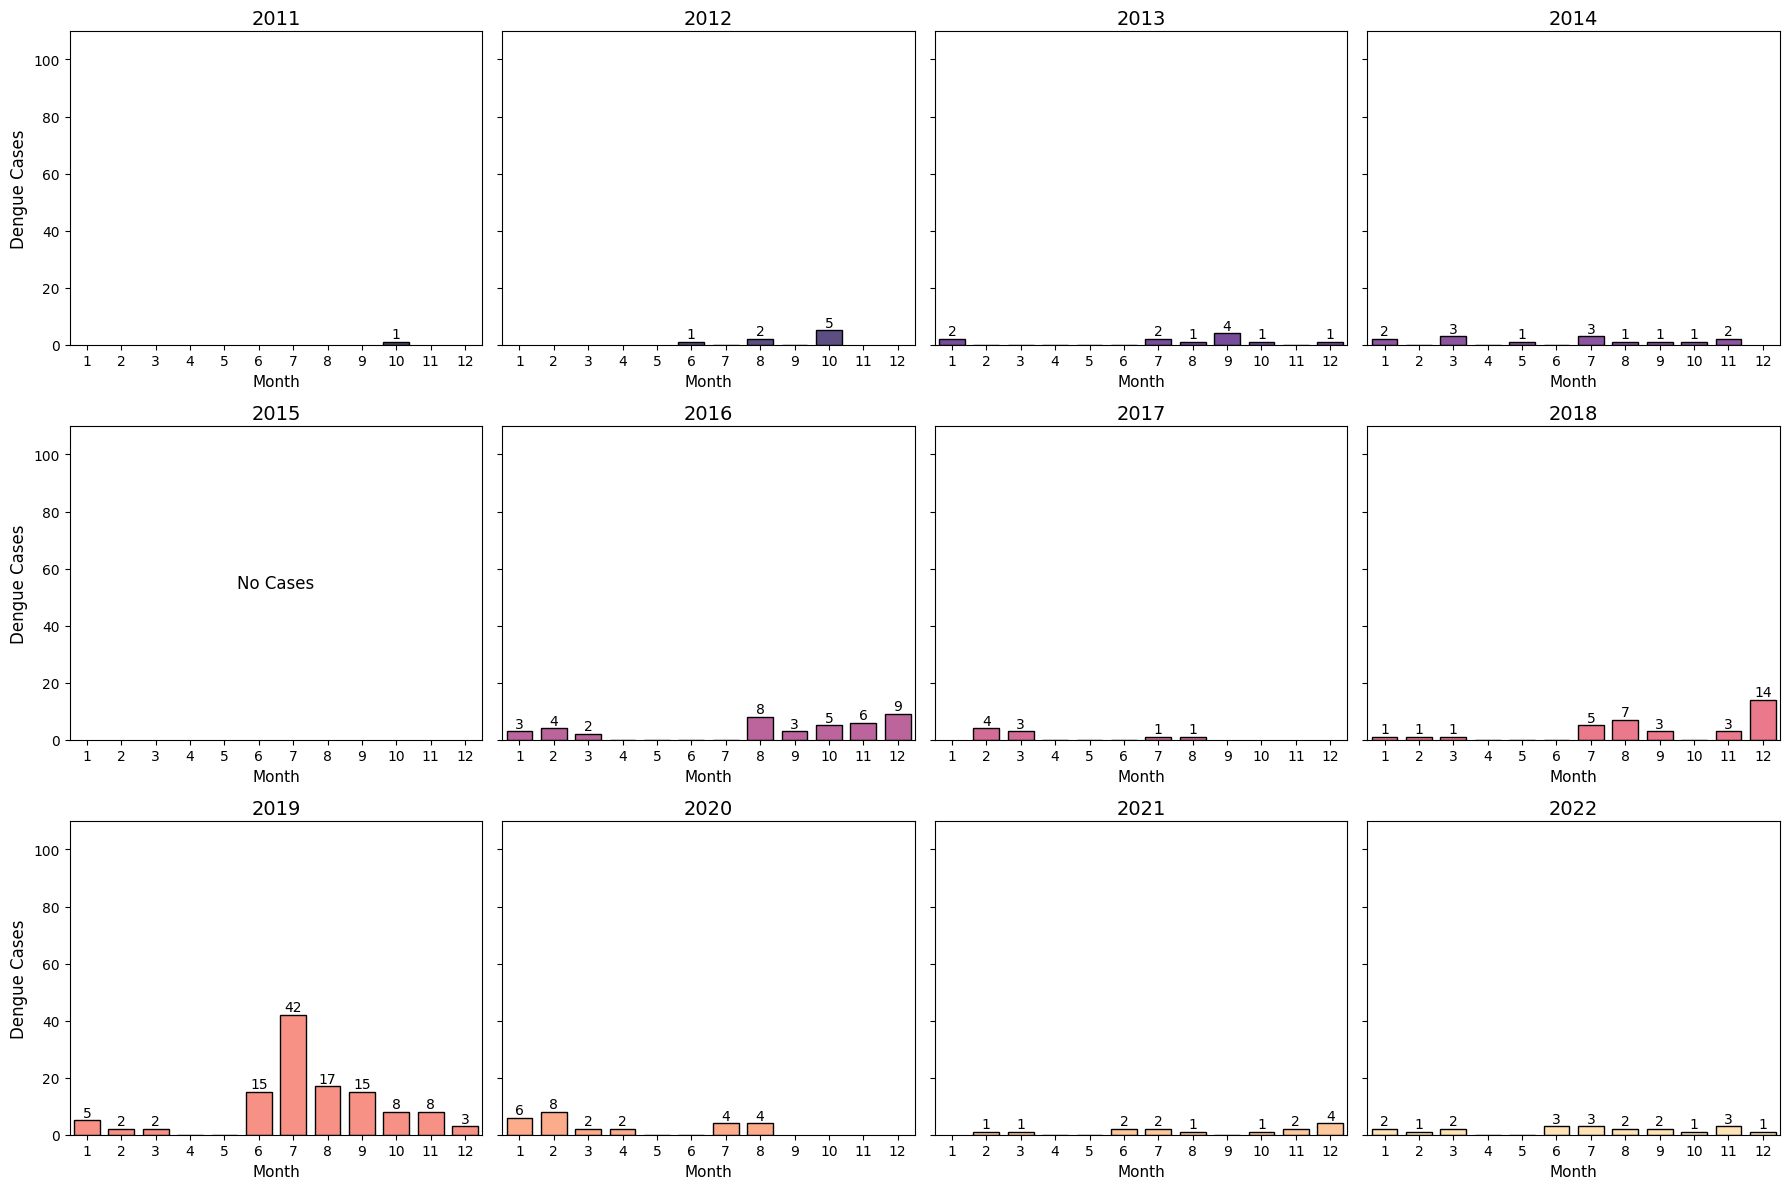

In [115]:
#HISTOGRAM FOR MONTHLY CASES EVERY YEAR
plot_dengue_cases(df, "TOMINOBO PROPER")

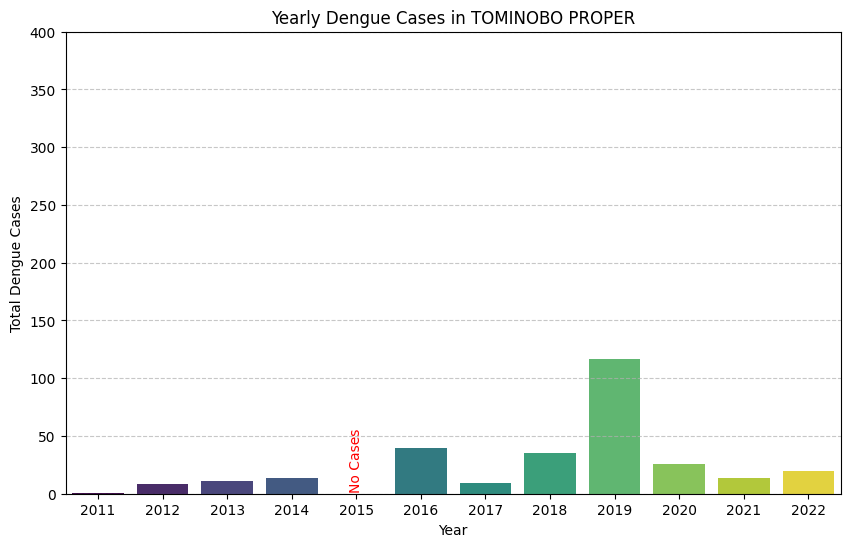

In [116]:
plot_total_dengue_cases_yearly(df, "TOMINOBO PROPER")

<div style="
    background-color: black; 
    color: white; 
    padding: 10px; 
    border-radius: 10px; 
    text-align: center;
    max-width: 100vw; 
    width: 100%;
    box-sizing: border-box;">
    TOMINOBO UPPER MONTHLY CASES
</div>


In [117]:
selected_barangay = "TOMINOBO UPPER"  # Change this to any barangay you want
barangay_data = get_selected_barangay(df, selected_barangay)

# Display the data for each year
for year, data in barangay_data.items():
    display(data)


Barangay_No        Barangay       x         y  Year  Month  Dengue Cases  \
39            39  TOMINOBO UPPER  8.1688  124.2251  2011      1             0   
83            39  TOMINOBO UPPER  8.1688  124.2251  2011      2             1   
127           39  TOMINOBO UPPER  8.1688  124.2251  2011      3             0   
171           39  TOMINOBO UPPER  8.1688  124.2251  2011      4             0   
215           39  TOMINOBO UPPER  8.1688  124.2251  2011      5             0   
259           39  TOMINOBO UPPER  8.1688  124.2251  2011      6             0   
303           39  TOMINOBO UPPER  8.1688  124.2251  2011      7             0   
347           39  TOMINOBO UPPER  8.1688  124.2251  2011      8             0   
391           39  TOMINOBO UPPER  8.1688  124.2251  2011      9             0   
435           39  TOMINOBO UPPER  8.1688  124.2251  2011     10             0   
479           39  TOMINOBO UPPER  8.1688  124.2251  2011     11             0   
523           39  TOMINOBO UPPER  8.1688  124.2251  2011     12             0   

     Temperature  Humidity  Rainfall  
39          23.8      88.1       7.0  
83          24.1      87.2      12.0  
127         25.3      85.5      20.0  
171         26.0      83.1      35.0  
215         27.2      81.9      55.0  
259         26.4      83.5      90.0  
303         25.7      84.7     110.0  
347         25.1      85.3      95.0  
391         24.4      86.2      70.0  
435         24.0      87.0      50.0  
479         23.6      88.4      30.0  
523         23.2      89.1      15.0

Barangay_No        Barangay       x         y  Year  Month  \
567            39  TOMINOBO UPPER  8.1688  124.2251  2012      1   
611            39  TOMINOBO UPPER  8.1688  124.2251  2012      2   
655            39  TOMINOBO UPPER  8.1688  124.2251  2012      3   
699            39  TOMINOBO UPPER  8.1688  124.2251  2012      4   
743            39  TOMINOBO UPPER  8.1688  124.2251  2012      5   
787            39  TOMINOBO UPPER  8.1688  124.2251  2012      6   
831            39  TOMINOBO UPPER  8.1688  124.2251  2012      7   
875            39  TOMINOBO UPPER  8.1688  124.2251  2012      8   
919            39  TOMINOBO UPPER  8.1688  124.2251  2012      9   
963            39  TOMINOBO UPPER  8.1688  124.2251  2012     10   
1007           39  TOMINOBO UPPER  8.1688  124.2251  2012     11   
1051           39  TOMINOBO UPPER  8.1688  124.2251  2012     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
567              0         24.3      85.1       4.0  
611              0         24.3      85.7       7.1  
655              0         24.6      83.3       3.1  
699              0         25.4      82.3       6.9  
743              1         25.1      86.4       6.9  
787              0         24.7      85.3       7.9  
831              1         24.9      85.2       6.4  
875              0         24.9      85.2       6.4  
919              0         24.1      88.1      11.4  
963              0         24.6      86.5       8.4  
1007             1         24.8      84.8       4.1  
1051             0         24.7      84.8       5.7

Barangay_No        Barangay       x         y  Year  Month  \
1095           39  TOMINOBO UPPER  8.1688  124.2251  2013      1   
1139           39  TOMINOBO UPPER  8.1688  124.2251  2013      2   
1183           39  TOMINOBO UPPER  8.1688  124.2251  2013      3   
1227           39  TOMINOBO UPPER  8.1688  124.2251  2013      4   
1271           39  TOMINOBO UPPER  8.1688  124.2251  2013      5   
1315           39  TOMINOBO UPPER  8.1688  124.2251  2013      6   
1359           39  TOMINOBO UPPER  8.1688  124.2251  2013      7   
1403           39  TOMINOBO UPPER  8.1688  124.2251  2013      8   
1447           39  TOMINOBO UPPER  8.1688  124.2251  2013      9   
1491           39  TOMINOBO UPPER  8.1688  124.2251  2013     10   
1535           39  TOMINOBO UPPER  8.1688  124.2251  2013     11   
1579           39  TOMINOBO UPPER  8.1688  124.2251  2013     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
1095             0         24.2      88.2       8.1  
1139             0         24.4      84.7       6.0  
1183             0         25.5      81.1       2.7  
1227             0         26.0      81.0       4.9  
1271             0         26.0      82.8       5.2  
1315             0         24.9      86.9       9.2  
1359             0         24.5      87.7      11.0  
1403             0         24.3      87.2       6.9  
1447             0         24.6      86.5       4.9  
1491             0         24.0      88.0      10.4  
1535             0         24.2      85.9       7.8  
1579             0         24.4      84.0       3.5

Barangay_No        Barangay       x         y  Year  Month  \
1623           39  TOMINOBO UPPER  8.1688  124.2251  2014      1   
1667           39  TOMINOBO UPPER  8.1688  124.2251  2014      2   
1711           39  TOMINOBO UPPER  8.1688  124.2251  2014      3   
1755           39  TOMINOBO UPPER  8.1688  124.2251  2014      4   
1799           39  TOMINOBO UPPER  8.1688  124.2251  2014      5   
1843           39  TOMINOBO UPPER  8.1688  124.2251  2014      6   
1887           39  TOMINOBO UPPER  8.1688  124.2251  2014      7   
1931           39  TOMINOBO UPPER  8.1688  124.2251  2014      8   
1975           39  TOMINOBO UPPER  8.1688  124.2251  2014      9   
2019           39  TOMINOBO UPPER  8.1688  124.2251  2014     10   
2063           39  TOMINOBO UPPER  8.1688  124.2251  2014     11   
2107           39  TOMINOBO UPPER  8.1688  124.2251  2014     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
1623             0         23.2      86.4       6.8  
1667             1         23.7      82.4       2.3  
1711             0         24.3      82.5       3.8  
1755             0         25.1      81.4       2.0  
1799             0         25.3      84.0       4.9  
1843             0         24.5      87.1       6.6  
1887             0         23.4      89.1       8.5  
1931             0         23.9      87.7       8.0  
1975             0         23.4      88.5       7.1  
2019             0         23.9      88.4       8.5  
2063             0         24.7      85.2       6.1  
2107             2         24.0      85.3       4.9

Barangay_No        Barangay       x         y  Year  Month  \
2151           39  TOMINOBO UPPER  8.1688  124.2251  2015      1   
2195           39  TOMINOBO UPPER  8.1688  124.2251  2015      2   
2239           39  TOMINOBO UPPER  8.1688  124.2251  2015      3   
2283           39  TOMINOBO UPPER  8.1688  124.2251  2015      4   
2327           39  TOMINOBO UPPER  8.1688  124.2251  2015      5   
2371           39  TOMINOBO UPPER  8.1688  124.2251  2015      6   
2415           39  TOMINOBO UPPER  8.1688  124.2251  2015      7   
2459           39  TOMINOBO UPPER  8.1688  124.2251  2015      8   
2503           39  TOMINOBO UPPER  8.1688  124.2251  2015      9   
2547           39  TOMINOBO UPPER  8.1688  124.2251  2015     10   
2591           39  TOMINOBO UPPER  8.1688  124.2251  2015     11   
2635           39  TOMINOBO UPPER  8.1688  124.2251  2015     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
2151             5         25.6      89.0       5.9  
2195             0         25.6      87.0       3.0  
2239             0         26.1      83.2       1.1  
2283             0         27.3      82.8       2.1  
2327             0         28.4      78.1       2.7  
2371             0         27.4      81.9       8.7  
2415             1         27.6      80.4       4.2  
2459             0         27.5      80.9       5.5  
2503             0         27.2      82.4       8.2  
2547             0         27.2      83.4       4.9  
2591             2         26.8      87.3       6.5  
2635             2         26.5      87.1       4.8

Barangay_No        Barangay       x         y  Year  Month  \
2679           39  TOMINOBO UPPER  8.1688  124.2251  2016      1   
2723           39  TOMINOBO UPPER  8.1688  124.2251  2016      2   
2767           39  TOMINOBO UPPER  8.1688  124.2251  2016      3   
2811           39  TOMINOBO UPPER  8.1688  124.2251  2016      4   
2855           39  TOMINOBO UPPER  8.1688  124.2251  2016      5   
2899           39  TOMINOBO UPPER  8.1688  124.2251  2016      6   
2943           39  TOMINOBO UPPER  8.1688  124.2251  2016      7   
2987           39  TOMINOBO UPPER  8.1688  124.2251  2016      8   
3031           39  TOMINOBO UPPER  8.1688  124.2251  2016      9   
3075           39  TOMINOBO UPPER  8.1688  124.2251  2016     10   
3119           39  TOMINOBO UPPER  8.1688  124.2251  2016     11   
3163           39  TOMINOBO UPPER  8.1688  124.2251  2016     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
2679             0         26.2      86.9       1.6  
2723             0         26.1      88.2       2.6  
2767             0         26.8      84.4       0.4  
2811             0         28.1      80.1       1.5  
2855             0         28.3      81.9       8.3  
2899             0         27.5      83.9      12.5  
2943             5         27.6      82.0       5.2  
2987             0         27.8      80.3       2.7  
3031             0         27.2      82.4       6.2  
3075             0         27.1      84.6       8.9  
3119             0         26.5      86.6       7.6  
3163             0         26.7      86.9       8.2

Barangay_No        Barangay       x         y  Year  Month  \
3207           39  TOMINOBO UPPER  8.1688  124.2251  2017      1   
3251           39  TOMINOBO UPPER  8.1688  124.2251  2017      2   
3295           39  TOMINOBO UPPER  8.1688  124.2251  2017      3   
3339           39  TOMINOBO UPPER  8.1688  124.2251  2017      4   
3383           39  TOMINOBO UPPER  8.1688  124.2251  2017      5   
3427           39  TOMINOBO UPPER  8.1688  124.2251  2017      6   
3471           39  TOMINOBO UPPER  8.1688  124.2251  2017      7   
3515           39  TOMINOBO UPPER  8.1688  124.2251  2017      8   
3559           39  TOMINOBO UPPER  8.1688  124.2251  2017      9   
3603           39  TOMINOBO UPPER  8.1688  124.2251  2017     10   
3647           39  TOMINOBO UPPER  8.1688  124.2251  2017     11   
3691           39  TOMINOBO UPPER  8.1688  124.2251  2017     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
3207             6         25.9      88.9      12.5  
3251             0         25.6      87.8       5.9  
3295             0         26.1      87.4       8.0  
3339             1         27.2      85.0       5.1  
3383             0         27.8      84.4      10.4  
3427             0         27.4      83.8       7.8  
3471             0         27.2      82.6       9.1  
3515             0         27.9      83.4       9.6  
3559             0         27.3      83.3      11.4  
3603             0         27.0      84.0       8.3  
3647             0         27.0      86.6       7.3  
3691             0         26.7      85.9       9.6

Barangay_No        Barangay       x         y  Year  Month  \
3735           39  TOMINOBO UPPER  8.1688  124.2251  2018      1   
3779           39  TOMINOBO UPPER  8.1688  124.2251  2018      2   
3823           39  TOMINOBO UPPER  8.1688  124.2251  2018      3   
3867           39  TOMINOBO UPPER  8.1688  124.2251  2018      4   
3911           39  TOMINOBO UPPER  8.1688  124.2251  2018      5   
3955           39  TOMINOBO UPPER  8.1688  124.2251  2018      6   
3999           39  TOMINOBO UPPER  8.1688  124.2251  2018      7   
4043           39  TOMINOBO UPPER  8.1688  124.2251  2018      8   
4087           39  TOMINOBO UPPER  8.1688  124.2251  2018      9   
4131           39  TOMINOBO UPPER  8.1688  124.2251  2018     10   
4175           39  TOMINOBO UPPER  8.1688  124.2251  2018     11   
4219           39  TOMINOBO UPPER  8.1688  124.2251  2018     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
3735             0         26.2      87.5       7.3  
3779             0         26.4      86.0       9.7  
3823             0         26.5      84.6       3.7  
3867             0         27.4      82.5       2.6  
3911             0         27.9      82.0       6.9  
3955             0         27.7      80.7       5.2  
3999             0         27.3      81.6       4.7  
4043             0         27.4      79.8       2.1  
4087             0         26.9      82.2       5.4  
4131             0         27.2      82.7       4.2  
4175             0         26.5      86.6       6.1  
4219             0         26.3      88.1       5.8

Barangay_No        Barangay       x         y  Year  Month  \
4263           39  TOMINOBO UPPER  8.1688  124.2251  2019      1   
4307           39  TOMINOBO UPPER  8.1688  124.2251  2019      2   
4351           39  TOMINOBO UPPER  8.1688  124.2251  2019      3   
4395           39  TOMINOBO UPPER  8.1688  124.2251  2019      4   
4439           39  TOMINOBO UPPER  8.1688  124.2251  2019      5   
4483           39  TOMINOBO UPPER  8.1688  124.2251  2019      6   
4527           39  TOMINOBO UPPER  8.1688  124.2251  2019      7   
4571           39  TOMINOBO UPPER  8.1688  124.2251  2019      8   
4615           39  TOMINOBO UPPER  8.1688  124.2251  2019      9   
4659           39  TOMINOBO UPPER  8.1688  124.2251  2019     10   
4703           39  TOMINOBO UPPER  8.1688  124.2251  2019     11   
4747           39  TOMINOBO UPPER  8.1688  124.2251  2019     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
4263             0         25.5      88.2       5.7  
4307             0         25.3      84.3       1.1  
4351             0         26.1      83.2       1.9  
4395             0         27.5      80.3       1.8  
4439             0         28.4      78.6       4.4  
4483             0         27.8      82.7       9.1  
4527             0         27.2      82.1       6.2  
4571             0         27.7      77.1       1.4  
4615             0         27.8      78.2       3.3  
4659             0         27.0      83.8       7.7  
4703             0         27.1      82.9       4.3  
4747             0         26.4      86.4       4.2

Barangay_No        Barangay       x         y  Year  Month  \
4791           39  TOMINOBO UPPER  8.1688  124.2251  2020      1   
4835           39  TOMINOBO UPPER  8.1688  124.2251  2020      2   
4879           39  TOMINOBO UPPER  8.1688  124.2251  2020      3   
4923           39  TOMINOBO UPPER  8.1688  124.2251  2020      4   
4967           39  TOMINOBO UPPER  8.1688  124.2251  2020      5   
5011           39  TOMINOBO UPPER  8.1688  124.2251  2020      6   
5055           39  TOMINOBO UPPER  8.1688  124.2251  2020      7   
5099           39  TOMINOBO UPPER  8.1688  124.2251  2020      8   
5143           39  TOMINOBO UPPER  8.1688  124.2251  2020      9   
5187           39  TOMINOBO UPPER  8.1688  124.2251  2020     10   
5231           39  TOMINOBO UPPER  8.1688  124.2251  2020     11   
5275           39  TOMINOBO UPPER  8.1688  124.2251  2020     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
4791             0         26.3      86.8       2.1  
4835             0         25.7      87.2       3.5  
4879             0         26.4      85.2       2.0  
4923             0         27.2      81.6       1.0  
4967             0         28.0      83.2       9.8  
5011             0         27.3      84.1      14.1  
5055             0         27.0      83.9      15.7  
5099             0         27.2      82.9      11.7  
5143             0         27.2      83.7       9.2  
5187             0         26.9      84.2      13.2  
5231             0         26.8      86.2       5.5  
5275             0         26.7      86.6       8.2

Barangay_No        Barangay       x         y  Year  Month  \
5319           39  TOMINOBO UPPER  8.1688  124.2251  2021      1   
5363           39  TOMINOBO UPPER  8.1688  124.2251  2021      2   
5407           39  TOMINOBO UPPER  8.1688  124.2251  2021      3   
5451           39  TOMINOBO UPPER  8.1688  124.2251  2021      4   
5495           39  TOMINOBO UPPER  8.1688  124.2251  2021      5   
5539           39  TOMINOBO UPPER  8.1688  124.2251  2021      6   
5583           39  TOMINOBO UPPER  8.1688  124.2251  2021      7   
5627           39  TOMINOBO UPPER  8.1688  124.2251  2021      8   
5671           39  TOMINOBO UPPER  8.1688  124.2251  2021      9   
5715           39  TOMINOBO UPPER  8.1688  124.2251  2021     10   
5759           39  TOMINOBO UPPER  8.1688  124.2251  2021     11   
5803           39  TOMINOBO UPPER  8.1688  124.2251  2021     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
5319             0         25.9      88.5      11.9  
5363             0         26.0      87.1      12.6  
5407             0         26.8      84.7       5.5  
5451             0         27.1      82.5       4.5  
5495             0         27.5      84.0      10.7  
5539             0         27.6      81.3       8.2  
5583             0         27.7      80.0       4.4  
5627             0         27.5      80.0       6.5  
5671             0         27.2      82.7       9.5  
5715             0         27.3      83.6       8.7  
5759             0         27.0      86.4       9.4  
5803             0         26.2      86.9       9.8

Barangay_No        Barangay       x         y  Year  Month  \
5847           39  TOMINOBO UPPER  8.1688  124.2251  2022      1   
5891           39  TOMINOBO UPPER  8.1688  124.2251  2022      2   
5935           39  TOMINOBO UPPER  8.1688  124.2251  2022      3   
5979           39  TOMINOBO UPPER  8.1688  124.2251  2022      4   
6023           39  TOMINOBO UPPER  8.1688  124.2251  2022      5   
6067           39  TOMINOBO UPPER  8.1688  124.2251  2022      6   
6111           39  TOMINOBO UPPER  8.1688  124.2251  2022      7   
6155           39  TOMINOBO UPPER  8.1688  124.2251  2022      8   
6199           39  TOMINOBO UPPER  8.1688  124.2251  2022      9   
6243           39  TOMINOBO UPPER  8.1688  124.2251  2022     10   
6287           39  TOMINOBO UPPER  8.1688  124.2251  2022     11   
6331           39  TOMINOBO UPPER  8.1688  124.2251  2022     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
5847             0         26.0      86.9       8.3  
5891             0         26.0      87.2       3.9  
5935             0         26.8      86.5      11.0  
5979             0         26.8      86.5      12.2  
6023             0         27.4      83.9      11.5  
6067             0         27.6      81.9       7.1  
6111             0         27.4      83.2      11.6  
6155             0         27.3      82.0       7.9  
6199             0         27.5      81.1       6.1  
6243             0         27.1      84.2       9.0  
6287             0         27.0      85.8       6.6  
6331             0         26.4      87.1      14.5

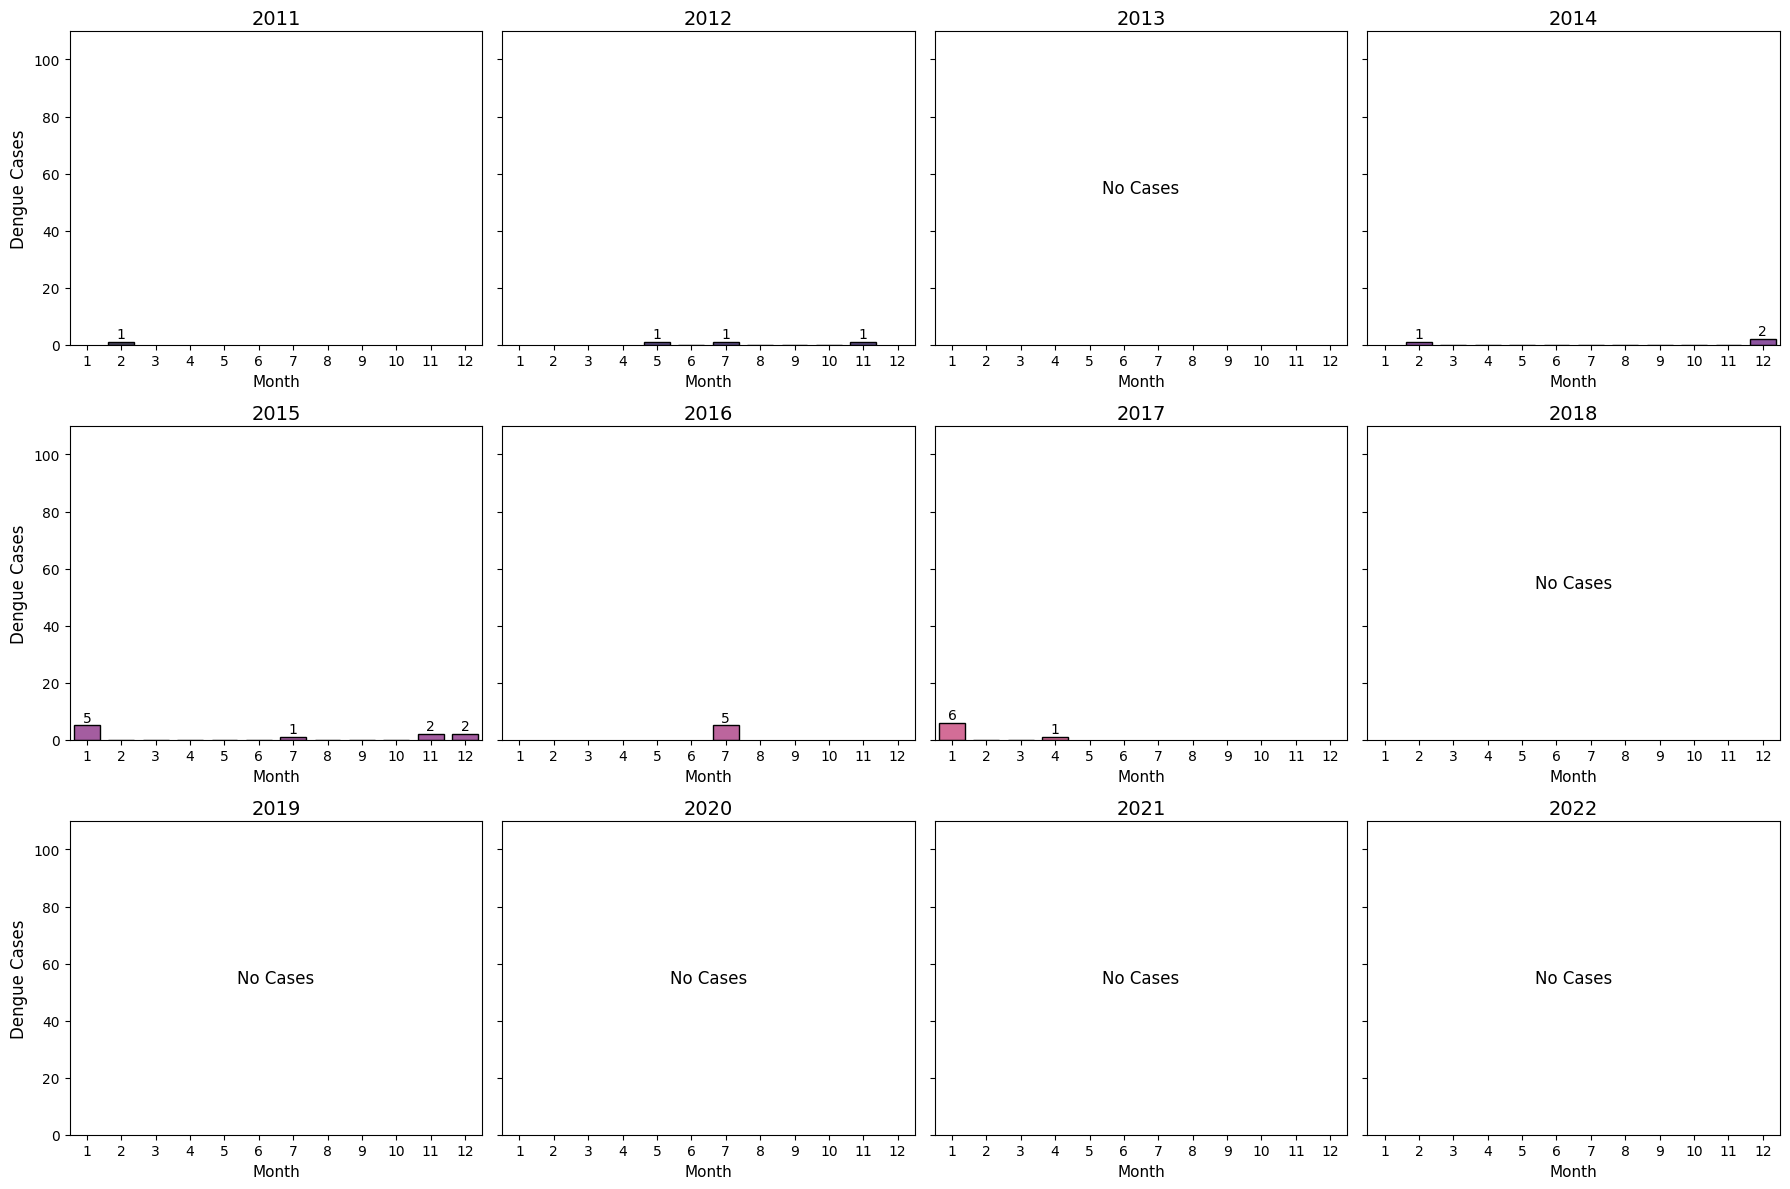

In [118]:
#HISTOGRAM FOR MONTHLY CASES EVERY YEAR
plot_dengue_cases(df, "TOMINOBO UPPER")


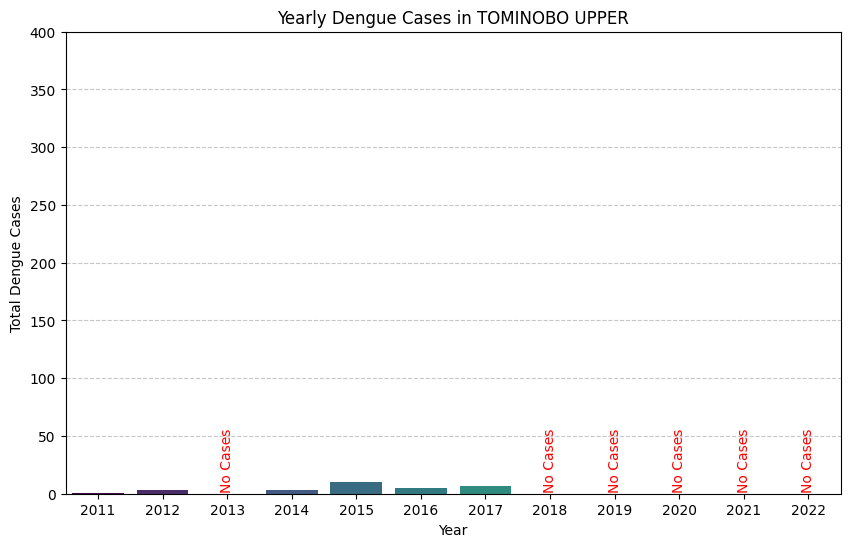

In [119]:
plot_total_dengue_cases_yearly(df, "TOMINOBO UPPER")

<div style="
    background-color: black; 
    color: white; 
    padding: 10px; 
    border-radius: 10px; 
    text-align: center;
    max-width: 100vw; 
    width: 100%;
    box-sizing: border-box;">
    TUBOD MONTHLY CASES
</div>


In [120]:
selected_barangay = "TUBOD"  # Change this to any barangay you want
barangay_data = get_selected_barangay(df, selected_barangay)

# Display the data for each year
for year, data in barangay_data.items():
    display(data)

Barangay_No Barangay       x        y  Year  Month  Dengue Cases  \
40            40    TUBOD  8.2117  124.241  2011      1             0   
84            40    TUBOD  8.2117  124.241  2011      2             2   
128           40    TUBOD  8.2117  124.241  2011      3             2   
172           40    TUBOD  8.2117  124.241  2011      4             1   
216           40    TUBOD  8.2117  124.241  2011      5             3   
260           40    TUBOD  8.2117  124.241  2011      6             1   
304           40    TUBOD  8.2117  124.241  2011      7             1   
348           40    TUBOD  8.2117  124.241  2011      8             2   
392           40    TUBOD  8.2117  124.241  2011      9             0   
436           40    TUBOD  8.2117  124.241  2011     10             1   
480           40    TUBOD  8.2117  124.241  2011     11             1   
524           40    TUBOD  8.2117  124.241  2011     12             1   

     Temperature  Humidity  Rainfall  
40          23.8      88.1       7.0  
84          24.1      87.2      12.0  
128         25.3      85.5      20.0  
172         26.0      83.1      35.0  
216         27.2      81.9      55.0  
260         26.4      83.5      90.0  
304         25.7      84.7     110.0  
348         25.1      85.3      95.0  
392         24.4      86.2      70.0  
436         24.0      87.0      50.0  
480         23.6      88.4      30.0  
524         23.2      89.1      15.0

Barangay_No Barangay       x        y  Year  Month  Dengue Cases  \
568            40    TUBOD  8.2117  124.241  2012      1             6   
612            40    TUBOD  8.2117  124.241  2012      2             2   
656            40    TUBOD  8.2117  124.241  2012      3             2   
700            40    TUBOD  8.2117  124.241  2012      4             3   
744            40    TUBOD  8.2117  124.241  2012      5             4   
788            40    TUBOD  8.2117  124.241  2012      6             4   
832            40    TUBOD  8.2117  124.241  2012      7             5   
876            40    TUBOD  8.2117  124.241  2012      8             6   
920            40    TUBOD  8.2117  124.241  2012      9             7   
964            40    TUBOD  8.2117  124.241  2012     10             5   
1008           40    TUBOD  8.2117  124.241  2012     11             3   
1052           40    TUBOD  8.2117  124.241  2012     12             2   

      Temperature  Humidity  Rainfall  
568          24.3      85.1       4.0  
612          24.3      85.7       7.1  
656          24.6      83.3       3.1  
700          25.4      82.3       6.9  
744          25.1      86.4       6.9  
788          24.7      85.3       7.9  
832          24.9      85.2       6.4  
876          24.9      85.2       6.4  
920          24.1      88.1      11.4  
964          24.6      86.5       8.4  
1008         24.8      84.8       4.1  
1052         24.7      84.8       5.7

Barangay_No Barangay       x        y  Year  Month  Dengue Cases  \
1096           40    TUBOD  8.2117  124.241  2013      1             5   
1140           40    TUBOD  8.2117  124.241  2013      2             7   
1184           40    TUBOD  8.2117  124.241  2013      3             1   
1228           40    TUBOD  8.2117  124.241  2013      4             2   
1272           40    TUBOD  8.2117  124.241  2013      5             1   
1316           40    TUBOD  8.2117  124.241  2013      6             0   
1360           40    TUBOD  8.2117  124.241  2013      7             0   
1404           40    TUBOD  8.2117  124.241  2013      8             4   
1448           40    TUBOD  8.2117  124.241  2013      9            10   
1492           40    TUBOD  8.2117  124.241  2013     10             8   
1536           40    TUBOD  8.2117  124.241  2013     11             5   
1580           40    TUBOD  8.2117  124.241  2013     12             0   

      Temperature  Humidity  Rainfall  
1096         24.2      88.2       8.1  
1140         24.4      84.7       6.0  
1184         25.5      81.1       2.7  
1228         26.0      81.0       4.9  
1272         26.0      82.8       5.2  
1316         24.9      86.9       9.2  
1360         24.5      87.7      11.0  
1404         24.3      87.2       6.9  
1448         24.6      86.5       4.9  
1492         24.0      88.0      10.4  
1536         24.2      85.9       7.8  
1580         24.4      84.0       3.5

Barangay_No Barangay       x        y  Year  Month  Dengue Cases  \
1624           40    TUBOD  8.2117  124.241  2014      1             9   
1668           40    TUBOD  8.2117  124.241  2014      2             7   
1712           40    TUBOD  8.2117  124.241  2014      3             9   
1756           40    TUBOD  8.2117  124.241  2014      4             3   
1800           40    TUBOD  8.2117  124.241  2014      5             0   
1844           40    TUBOD  8.2117  124.241  2014      6             7   
1888           40    TUBOD  8.2117  124.241  2014      7            15   
1932           40    TUBOD  8.2117  124.241  2014      8            14   
1976           40    TUBOD  8.2117  124.241  2014      9            13   
2020           40    TUBOD  8.2117  124.241  2014     10            10   
2064           40    TUBOD  8.2117  124.241  2014     11             7   
2108           40    TUBOD  8.2117  124.241  2014     12             9   

      Temperature  Humidity  Rainfall  
1624         23.2      86.4       6.8  
1668         23.7      82.4       2.3  
1712         24.3      82.5       3.8  
1756         25.1      81.4       2.0  
1800         25.3      84.0       4.9  
1844         24.5      87.1       6.6  
1888         23.4      89.1       8.5  
1932         23.9      87.7       8.0  
1976         23.4      88.5       7.1  
2020         23.9      88.4       8.5  
2064         24.7      85.2       6.1  
2108         24.0      85.3       4.9

Barangay_No Barangay       x        y  Year  Month  Dengue Cases  \
2152           40    TUBOD  8.2117  124.241  2015      1             7   
2196           40    TUBOD  8.2117  124.241  2015      2             3   
2240           40    TUBOD  8.2117  124.241  2015      3             6   
2284           40    TUBOD  8.2117  124.241  2015      4             2   
2328           40    TUBOD  8.2117  124.241  2015      5             2   
2372           40    TUBOD  8.2117  124.241  2015      6             0   
2416           40    TUBOD  8.2117  124.241  2015      7             6   
2460           40    TUBOD  8.2117  124.241  2015      8            15   
2504           40    TUBOD  8.2117  124.241  2015      9            18   
2548           40    TUBOD  8.2117  124.241  2015     10            16   
2592           40    TUBOD  8.2117  124.241  2015     11            10   
2636           40    TUBOD  8.2117  124.241  2015     12            18   

      Temperature  Humidity  Rainfall  
2152         25.6      89.0       5.9  
2196         25.6      87.0       3.0  
2240         26.1      83.2       1.1  
2284         27.3      82.8       2.1  
2328         28.4      78.1       2.7  
2372         27.4      81.9       8.7  
2416         27.6      80.4       4.2  
2460         27.5      80.9       5.5  
2504         27.2      82.4       8.2  
2548         27.2      83.4       4.9  
2592         26.8      87.3       6.5  
2636         26.5      87.1       4.8

Barangay_No Barangay       x        y  Year  Month  Dengue Cases  \
2680           40    TUBOD  8.2117  124.241  2016      1            11   
2724           40    TUBOD  8.2117  124.241  2016      2             1   
2768           40    TUBOD  8.2117  124.241  2016      3             4   
2812           40    TUBOD  8.2117  124.241  2016      4             5   
2856           40    TUBOD  8.2117  124.241  2016      5             3   
2900           40    TUBOD  8.2117  124.241  2016      6             3   
2944           40    TUBOD  8.2117  124.241  2016      7            18   
2988           40    TUBOD  8.2117  124.241  2016      8            30   
3032           40    TUBOD  8.2117  124.241  2016      9            23   
3076           40    TUBOD  8.2117  124.241  2016     10            21   
3120           40    TUBOD  8.2117  124.241  2016     11            25   
3164           40    TUBOD  8.2117  124.241  2016     12            27   

      Temperature  Humidity  Rainfall  
2680         26.2      86.9       1.6  
2724         26.1      88.2       2.6  
2768         26.8      84.4       0.4  
2812         28.1      80.1       1.5  
2856         28.3      81.9       8.3  
2900         27.5      83.9      12.5  
2944         27.6      82.0       5.2  
2988         27.8      80.3       2.7  
3032         27.2      82.4       6.2  
3076         27.1      84.6       8.9  
3120         26.5      86.6       7.6  
3164         26.7      86.9       8.2

Barangay_No Barangay       x        y  Year  Month  Dengue Cases  \
3208           40    TUBOD  8.2117  124.241  2017      1             1   
3252           40    TUBOD  8.2117  124.241  2017      2             8   
3296           40    TUBOD  8.2117  124.241  2017      3             8   
3340           40    TUBOD  8.2117  124.241  2017      4             2   
3384           40    TUBOD  8.2117  124.241  2017      5             1   
3428           40    TUBOD  8.2117  124.241  2017      6             1   
3472           40    TUBOD  8.2117  124.241  2017      7             6   
3516           40    TUBOD  8.2117  124.241  2017      8             2   
3560           40    TUBOD  8.2117  124.241  2017      9             0   
3604           40    TUBOD  8.2117  124.241  2017     10             1   
3648           40    TUBOD  8.2117  124.241  2017     11             2   
3692           40    TUBOD  8.2117  124.241  2017     12             1   

      Temperature  Humidity  Rainfall  
3208         25.9      88.9      12.5  
3252         25.6      87.8       5.9  
3296         26.1      87.4       8.0  
3340         27.2      85.0       5.1  
3384         27.8      84.4      10.4  
3428         27.4      83.8       7.8  
3472         27.2      82.6       9.1  
3516         27.9      83.4       9.6  
3560         27.3      83.3      11.4  
3604         27.0      84.0       8.3  
3648         27.0      86.6       7.3  
3692         26.7      85.9       9.6

Barangay_No Barangay       x        y  Year  Month  Dengue Cases  \
3736           40    TUBOD  8.2117  124.241  2018      1            12   
3780           40    TUBOD  8.2117  124.241  2018      2             4   
3824           40    TUBOD  8.2117  124.241  2018      3             8   
3868           40    TUBOD  8.2117  124.241  2018      4             3   
3912           40    TUBOD  8.2117  124.241  2018      5             6   
3956           40    TUBOD  8.2117  124.241  2018      6            11   
4000           40    TUBOD  8.2117  124.241  2018      7            23   
4044           40    TUBOD  8.2117  124.241  2018      8             8   
4088           40    TUBOD  8.2117  124.241  2018      9            18   
4132           40    TUBOD  8.2117  124.241  2018     10            14   
4176           40    TUBOD  8.2117  124.241  2018     11            19   
4220           40    TUBOD  8.2117  124.241  2018     12            49   

      Temperature  Humidity  Rainfall  
3736         26.2      87.5       7.3  
3780         26.4      86.0       9.7  
3824         26.5      84.6       3.7  
3868         27.4      82.5       2.6  
3912         27.9      82.0       6.9  
3956         27.7      80.7       5.2  
4000         27.3      81.6       4.7  
4044         27.4      79.8       2.1  
4088         26.9      82.2       5.4  
4132         27.2      82.7       4.2  
4176         26.5      86.6       6.1  
4220         26.3      88.1       5.8

Barangay_No Barangay       x        y  Year  Month  Dengue Cases  \
4264           40    TUBOD  8.2117  124.241  2019      1            43   
4308           40    TUBOD  8.2117  124.241  2019      2            21   
4352           40    TUBOD  8.2117  124.241  2019      3            12   
4396           40    TUBOD  8.2117  124.241  2019      4             8   
4440           40    TUBOD  8.2117  124.241  2019      5            16   
4484           40    TUBOD  8.2117  124.241  2019      6            24   
4528           40    TUBOD  8.2117  124.241  2019      7            59   
4572           40    TUBOD  8.2117  124.241  2019      8            92   
4616           40    TUBOD  8.2117  124.241  2019      9            21   
4660           40    TUBOD  8.2117  124.241  2019     10            27   
4704           40    TUBOD  8.2117  124.241  2019     11            17   
4748           40    TUBOD  8.2117  124.241  2019     12            11   

      Temperature  Humidity  Rainfall  
4264         25.5      88.2       5.7  
4308         25.3      84.3       1.1  
4352         26.1      83.2       1.9  
4396         27.5      80.3       1.8  
4440         28.4      78.6       4.4  
4484         27.8      82.7       9.1  
4528         27.2      82.1       6.2  
4572         27.7      77.1       1.4  
4616         27.8      78.2       3.3  
4660         27.0      83.8       7.7  
4704         27.1      82.9       4.3  
4748         26.4      86.4       4.2

Barangay_No Barangay       x        y  Year  Month  Dengue Cases  \
4792           40    TUBOD  8.2117  124.241  2020      1            21   
4836           40    TUBOD  8.2117  124.241  2020      2            20   
4880           40    TUBOD  8.2117  124.241  2020      3             8   
4924           40    TUBOD  8.2117  124.241  2020      4             0   
4968           40    TUBOD  8.2117  124.241  2020      5             0   
5012           40    TUBOD  8.2117  124.241  2020      6             0   
5056           40    TUBOD  8.2117  124.241  2020      7             8   
5100           40    TUBOD  8.2117  124.241  2020      8             4   
5144           40    TUBOD  8.2117  124.241  2020      9             6   
5188           40    TUBOD  8.2117  124.241  2020     10             0   
5232           40    TUBOD  8.2117  124.241  2020     11             0   
5276           40    TUBOD  8.2117  124.241  2020     12             6   

      Temperature  Humidity  Rainfall  
4792         26.3      86.8       2.1  
4836         25.7      87.2       3.5  
4880         26.4      85.2       2.0  
4924         27.2      81.6       1.0  
4968         28.0      83.2       9.8  
5012         27.3      84.1      14.1  
5056         27.0      83.9      15.7  
5100         27.2      82.9      11.7  
5144         27.2      83.7       9.2  
5188         26.9      84.2      13.2  
5232         26.8      86.2       5.5  
5276         26.7      86.6       8.2

Barangay_No Barangay       x        y  Year  Month  Dengue Cases  \
5320           40    TUBOD  8.2117  124.241  2021      1             0   
5364           40    TUBOD  8.2117  124.241  2021      2             4   
5408           40    TUBOD  8.2117  124.241  2021      3             2   
5452           40    TUBOD  8.2117  124.241  2021      4             2   
5496           40    TUBOD  8.2117  124.241  2021      5             4   
5540           40    TUBOD  8.2117  124.241  2021      6             1   
5584           40    TUBOD  8.2117  124.241  2021      7             4   
5628           40    TUBOD  8.2117  124.241  2021      8             6   
5672           40    TUBOD  8.2117  124.241  2021      9             2   
5716           40    TUBOD  8.2117  124.241  2021     10             4   
5760           40    TUBOD  8.2117  124.241  2021     11            20   
5804           40    TUBOD  8.2117  124.241  2021     12            10   

      Temperature  Humidity  Rainfall  
5320         25.9      88.5      11.9  
5364         26.0      87.1      12.6  
5408         26.8      84.7       5.5  
5452         27.1      82.5       4.5  
5496         27.5      84.0      10.7  
5540         27.6      81.3       8.2  
5584         27.7      80.0       4.4  
5628         27.5      80.0       6.5  
5672         27.2      82.7       9.5  
5716         27.3      83.6       8.7  
5760         27.0      86.4       9.4  
5804         26.2      86.9       9.8

Barangay_No Barangay       x        y  Year  Month  Dengue Cases  \
5848           40    TUBOD  8.2117  124.241  2022      1             8   
5892           40    TUBOD  8.2117  124.241  2022      2             6   
5936           40    TUBOD  8.2117  124.241  2022      3             5   
5980           40    TUBOD  8.2117  124.241  2022      4            12   
6024           40    TUBOD  8.2117  124.241  2022      5             6   
6068           40    TUBOD  8.2117  124.241  2022      6             5   
6112           40    TUBOD  8.2117  124.241  2022      7            15   
6156           40    TUBOD  8.2117  124.241  2022      8            13   
6200           40    TUBOD  8.2117  124.241  2022      9            10   
6244           40    TUBOD  8.2117  124.241  2022     10             2   
6288           40    TUBOD  8.2117  124.241  2022     11             7   
6332           40    TUBOD  8.2117  124.241  2022     12             4   

      Temperature  Humidity  Rainfall  
5848         26.0      86.9       8.3  
5892         26.0      87.2       3.9  
5936         26.8      86.5      11.0  
5980         26.8      86.5      12.2  
6024         27.4      83.9      11.5  
6068         27.6      81.9       7.1  
6112         27.4      83.2      11.6  
6156         27.3      82.0       7.9  
6200         27.5      81.1       6.1  
6244         27.1      84.2       9.0  
6288         27.0      85.8       6.6  
6332         26.4      87.1      14.5

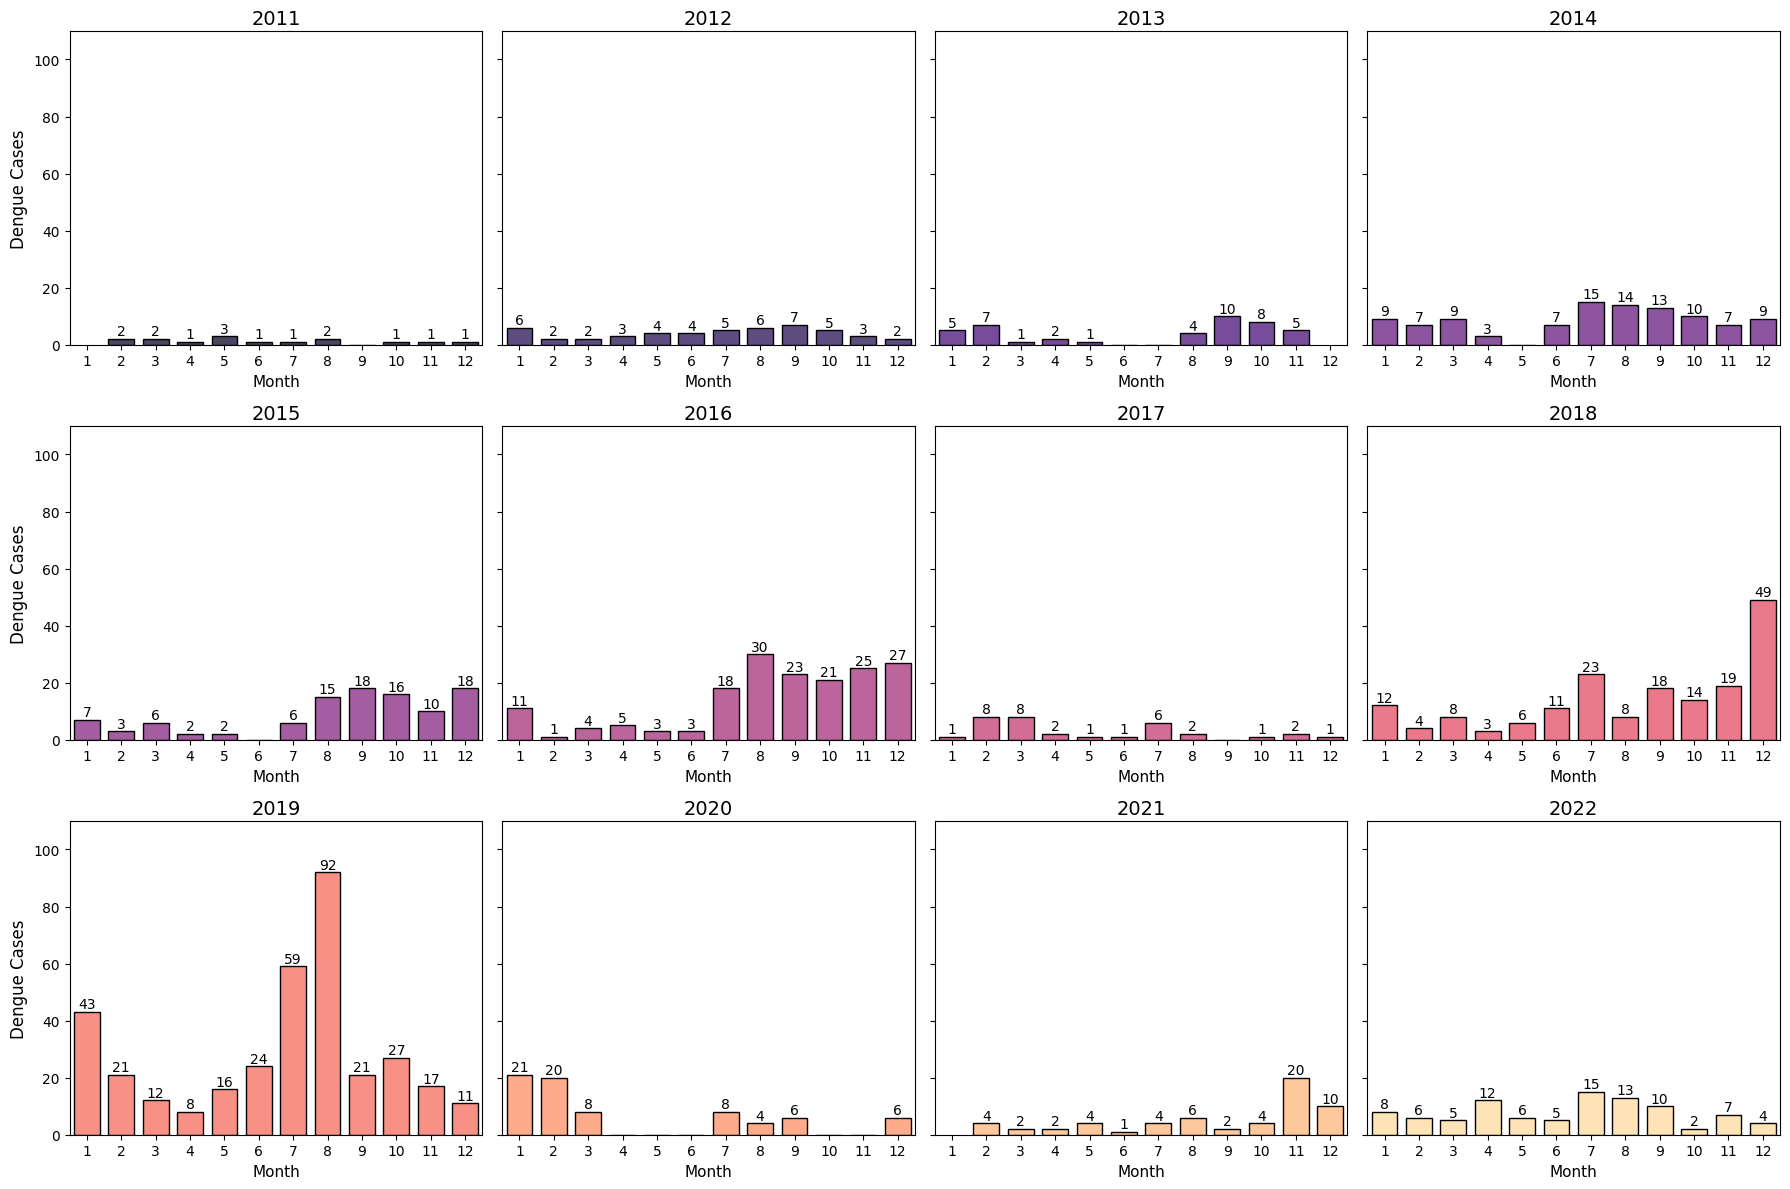

In [121]:
#HISTOGRAM FOR MONTHLY CASES EVERY YEAR
plot_dengue_cases(df, "TUBOD")

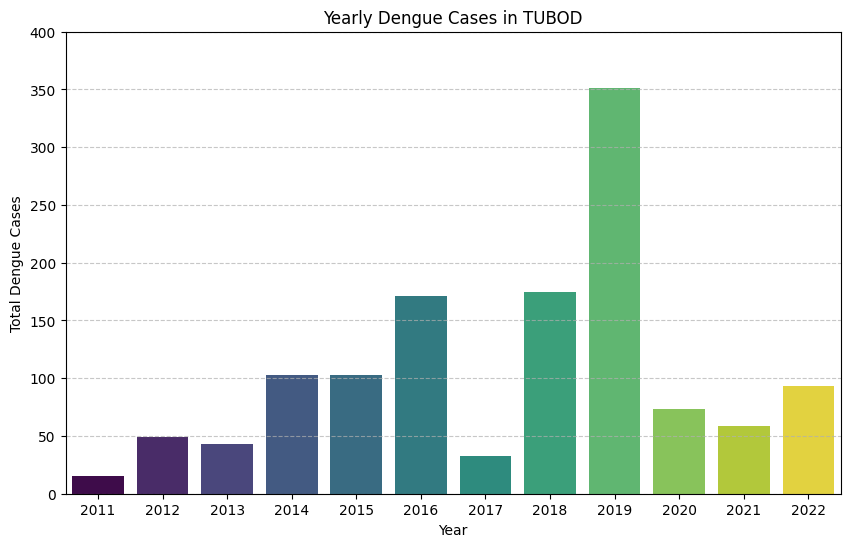

In [122]:
plot_total_dengue_cases_yearly(df, "TUBOD")

<div style="
    background-color: black; 
    color: white; 
    padding: 10px; 
    border-radius: 10px; 
    text-align: center;
    max-width: 100vw; 
    width: 100%;
    box-sizing: border-box;">
    UBALDO LAYA MONTHLY CASES
</div>


In [123]:
selected_barangay = "UBALDO LAYA"  # Change this to any barangay you want
barangay_data = get_selected_barangay(df, selected_barangay)

# Display the data for each year
for year, data in barangay_data.items():
    display(data)

Barangay_No     Barangay      x         y  Year  Month  Dengue Cases  \
41            41  UBALDO LAYA  8.224  124.2449  2011      1             2   
85            41  UBALDO LAYA  8.224  124.2449  2011      2             1   
129           41  UBALDO LAYA  8.224  124.2449  2011      3             3   
173           41  UBALDO LAYA  8.224  124.2449  2011      4             0   
217           41  UBALDO LAYA  8.224  124.2449  2011      5             2   
261           41  UBALDO LAYA  8.224  124.2449  2011      6             0   
305           41  UBALDO LAYA  8.224  124.2449  2011      7             1   
349           41  UBALDO LAYA  8.224  124.2449  2011      8             1   
393           41  UBALDO LAYA  8.224  124.2449  2011      9             0   
437           41  UBALDO LAYA  8.224  124.2449  2011     10             0   
481           41  UBALDO LAYA  8.224  124.2449  2011     11             0   
525           41  UBALDO LAYA  8.224  124.2449  2011     12             1   

     Temperature  Humidity  Rainfall  
41          23.8      88.1       7.0  
85          24.1      87.2      12.0  
129         25.3      85.5      20.0  
173         26.0      83.1      35.0  
217         27.2      81.9      55.0  
261         26.4      83.5      90.0  
305         25.7      84.7     110.0  
349         25.1      85.3      95.0  
393         24.4      86.2      70.0  
437         24.0      87.0      50.0  
481         23.6      88.4      30.0  
525         23.2      89.1      15.0

Barangay_No     Barangay      x         y  Year  Month  Dengue Cases  \
569            41  UBALDO LAYA  8.224  124.2449  2012      1             0   
613            41  UBALDO LAYA  8.224  124.2449  2012      2             0   
657            41  UBALDO LAYA  8.224  124.2449  2012      3             0   
701            41  UBALDO LAYA  8.224  124.2449  2012      4             1   
745            41  UBALDO LAYA  8.224  124.2449  2012      5             0   
789            41  UBALDO LAYA  8.224  124.2449  2012      6             1   
833            41  UBALDO LAYA  8.224  124.2449  2012      7             0   
877            41  UBALDO LAYA  8.224  124.2449  2012      8             0   
921            41  UBALDO LAYA  8.224  124.2449  2012      9             1   
965            41  UBALDO LAYA  8.224  124.2449  2012     10             0   
1009           41  UBALDO LAYA  8.224  124.2449  2012     11             0   
1053           41  UBALDO LAYA  8.224  124.2449  2012     12             0   

      Temperature  Humidity  Rainfall  
569          24.3      85.1       4.0  
613          24.3      85.7       7.1  
657          24.6      83.3       3.1  
701          25.4      82.3       6.9  
745          25.1      86.4       6.9  
789          24.7      85.3       7.9  
833          24.9      85.2       6.4  
877          24.9      85.2       6.4  
921          24.1      88.1      11.4  
965          24.6      86.5       8.4  
1009         24.8      84.8       4.1  
1053         24.7      84.8       5.7

Barangay_No     Barangay      x         y  Year  Month  Dengue Cases  \
1097           41  UBALDO LAYA  8.224  124.2449  2013      1             0   
1141           41  UBALDO LAYA  8.224  124.2449  2013      2             0   
1185           41  UBALDO LAYA  8.224  124.2449  2013      3             0   
1229           41  UBALDO LAYA  8.224  124.2449  2013      4             0   
1273           41  UBALDO LAYA  8.224  124.2449  2013      5             0   
1317           41  UBALDO LAYA  8.224  124.2449  2013      6             1   
1361           41  UBALDO LAYA  8.224  124.2449  2013      7             0   
1405           41  UBALDO LAYA  8.224  124.2449  2013      8             0   
1449           41  UBALDO LAYA  8.224  124.2449  2013      9             0   
1493           41  UBALDO LAYA  8.224  124.2449  2013     10             0   
1537           41  UBALDO LAYA  8.224  124.2449  2013     11             0   
1581           41  UBALDO LAYA  8.224  124.2449  2013     12             0   

      Temperature  Humidity  Rainfall  
1097         24.2      88.2       8.1  
1141         24.4      84.7       6.0  
1185         25.5      81.1       2.7  
1229         26.0      81.0       4.9  
1273         26.0      82.8       5.2  
1317         24.9      86.9       9.2  
1361         24.5      87.7      11.0  
1405         24.3      87.2       6.9  
1449         24.6      86.5       4.9  
1493         24.0      88.0      10.4  
1537         24.2      85.9       7.8  
1581         24.4      84.0       3.5

Barangay_No     Barangay      x         y  Year  Month  Dengue Cases  \
1625           41  UBALDO LAYA  8.224  124.2449  2014      1             3   
1669           41  UBALDO LAYA  8.224  124.2449  2014      2             1   
1713           41  UBALDO LAYA  8.224  124.2449  2014      3             4   
1757           41  UBALDO LAYA  8.224  124.2449  2014      4             1   
1801           41  UBALDO LAYA  8.224  124.2449  2014      5             1   
1845           41  UBALDO LAYA  8.224  124.2449  2014      6             2   
1889           41  UBALDO LAYA  8.224  124.2449  2014      7             5   
1933           41  UBALDO LAYA  8.224  124.2449  2014      8             3   
1977           41  UBALDO LAYA  8.224  124.2449  2014      9             3   
2021           41  UBALDO LAYA  8.224  124.2449  2014     10             5   
2065           41  UBALDO LAYA  8.224  124.2449  2014     11             2   
2109           41  UBALDO LAYA  8.224  124.2449  2014     12             1   

      Temperature  Humidity  Rainfall  
1625         23.2      86.4       6.8  
1669         23.7      82.4       2.3  
1713         24.3      82.5       3.8  
1757         25.1      81.4       2.0  
1801         25.3      84.0       4.9  
1845         24.5      87.1       6.6  
1889         23.4      89.1       8.5  
1933         23.9      87.7       8.0  
1977         23.4      88.5       7.1  
2021         23.9      88.4       8.5  
2065         24.7      85.2       6.1  
2109         24.0      85.3       4.9

Barangay_No     Barangay      x         y  Year  Month  Dengue Cases  \
2153           41  UBALDO LAYA  8.224  124.2449  2015      1             0   
2197           41  UBALDO LAYA  8.224  124.2449  2015      2             1   
2241           41  UBALDO LAYA  8.224  124.2449  2015      3             2   
2285           41  UBALDO LAYA  8.224  124.2449  2015      4             0   
2329           41  UBALDO LAYA  8.224  124.2449  2015      5             0   
2373           41  UBALDO LAYA  8.224  124.2449  2015      6             0   
2417           41  UBALDO LAYA  8.224  124.2449  2015      7             0   
2461           41  UBALDO LAYA  8.224  124.2449  2015      8             1   
2505           41  UBALDO LAYA  8.224  124.2449  2015      9             0   
2549           41  UBALDO LAYA  8.224  124.2449  2015     10             1   
2593           41  UBALDO LAYA  8.224  124.2449  2015     11             3   
2637           41  UBALDO LAYA  8.224  124.2449  2015     12             2   

      Temperature  Humidity  Rainfall  
2153         25.6      89.0       5.9  
2197         25.6      87.0       3.0  
2241         26.1      83.2       1.1  
2285         27.3      82.8       2.1  
2329         28.4      78.1       2.7  
2373         27.4      81.9       8.7  
2417         27.6      80.4       4.2  
2461         27.5      80.9       5.5  
2505         27.2      82.4       8.2  
2549         27.2      83.4       4.9  
2593         26.8      87.3       6.5  
2637         26.5      87.1       4.8

Barangay_No     Barangay      x         y  Year  Month  Dengue Cases  \
2681           41  UBALDO LAYA  8.224  124.2449  2016      1             5   
2725           41  UBALDO LAYA  8.224  124.2449  2016      2             1   
2769           41  UBALDO LAYA  8.224  124.2449  2016      3             0   
2813           41  UBALDO LAYA  8.224  124.2449  2016      4             1   
2857           41  UBALDO LAYA  8.224  124.2449  2016      5             1   
2901           41  UBALDO LAYA  8.224  124.2449  2016      6             3   
2945           41  UBALDO LAYA  8.224  124.2449  2016      7             3   
2989           41  UBALDO LAYA  8.224  124.2449  2016      8             3   
3033           41  UBALDO LAYA  8.224  124.2449  2016      9             3   
3077           41  UBALDO LAYA  8.224  124.2449  2016     10             5   
3121           41  UBALDO LAYA  8.224  124.2449  2016     11             3   
3165           41  UBALDO LAYA  8.224  124.2449  2016     12             0   

      Temperature  Humidity  Rainfall  
2681         26.2      86.9       1.6  
2725         26.1      88.2       2.6  
2769         26.8      84.4       0.4  
2813         28.1      80.1       1.5  
2857         28.3      81.9       8.3  
2901         27.5      83.9      12.5  
2945         27.6      82.0       5.2  
2989         27.8      80.3       2.7  
3033         27.2      82.4       6.2  
3077         27.1      84.6       8.9  
3121         26.5      86.6       7.6  
3165         26.7      86.9       8.2

Barangay_No     Barangay      x         y  Year  Month  Dengue Cases  \
3209           41  UBALDO LAYA  8.224  124.2449  2017      1             4   
3253           41  UBALDO LAYA  8.224  124.2449  2017      2             4   
3297           41  UBALDO LAYA  8.224  124.2449  2017      3             1   
3341           41  UBALDO LAYA  8.224  124.2449  2017      4             1   
3385           41  UBALDO LAYA  8.224  124.2449  2017      5             0   
3429           41  UBALDO LAYA  8.224  124.2449  2017      6             0   
3473           41  UBALDO LAYA  8.224  124.2449  2017      7             2   
3517           41  UBALDO LAYA  8.224  124.2449  2017      8             0   
3561           41  UBALDO LAYA  8.224  124.2449  2017      9             0   
3605           41  UBALDO LAYA  8.224  124.2449  2017     10             0   
3649           41  UBALDO LAYA  8.224  124.2449  2017     11             0   
3693           41  UBALDO LAYA  8.224  124.2449  2017     12             1   

      Temperature  Humidity  Rainfall  
3209         25.9      88.9      12.5  
3253         25.6      87.8       5.9  
3297         26.1      87.4       8.0  
3341         27.2      85.0       5.1  
3385         27.8      84.4      10.4  
3429         27.4      83.8       7.8  
3473         27.2      82.6       9.1  
3517         27.9      83.4       9.6  
3561         27.3      83.3      11.4  
3605         27.0      84.0       8.3  
3649         27.0      86.6       7.3  
3693         26.7      85.9       9.6

Barangay_No     Barangay      x         y  Year  Month  Dengue Cases  \
3737           41  UBALDO LAYA  8.224  124.2449  2018      1             1   
3781           41  UBALDO LAYA  8.224  124.2449  2018      2             0   
3825           41  UBALDO LAYA  8.224  124.2449  2018      3             1   
3869           41  UBALDO LAYA  8.224  124.2449  2018      4             0   
3913           41  UBALDO LAYA  8.224  124.2449  2018      5             1   
3957           41  UBALDO LAYA  8.224  124.2449  2018      6             0   
4001           41  UBALDO LAYA  8.224  124.2449  2018      7             0   
4045           41  UBALDO LAYA  8.224  124.2449  2018      8             1   
4089           41  UBALDO LAYA  8.224  124.2449  2018      9            10   
4133           41  UBALDO LAYA  8.224  124.2449  2018     10             0   
4177           41  UBALDO LAYA  8.224  124.2449  2018     11             5   
4221           41  UBALDO LAYA  8.224  124.2449  2018     12             6   

      Temperature  Humidity  Rainfall  
3737         26.2      87.5       7.3  
3781         26.4      86.0       9.7  
3825         26.5      84.6       3.7  
3869         27.4      82.5       2.6  
3913         27.9      82.0       6.9  
3957         27.7      80.7       5.2  
4001         27.3      81.6       4.7  
4045         27.4      79.8       2.1  
4089         26.9      82.2       5.4  
4133         27.2      82.7       4.2  
4177         26.5      86.6       6.1  
4221         26.3      88.1       5.8

Barangay_No     Barangay      x         y  Year  Month  Dengue Cases  \
4265           41  UBALDO LAYA  8.224  124.2449  2019      1            31   
4309           41  UBALDO LAYA  8.224  124.2449  2019      2             6   
4353           41  UBALDO LAYA  8.224  124.2449  2019      3             5   
4397           41  UBALDO LAYA  8.224  124.2449  2019      4             0   
4441           41  UBALDO LAYA  8.224  124.2449  2019      5             0   
4485           41  UBALDO LAYA  8.224  124.2449  2019      6             5   
4529           41  UBALDO LAYA  8.224  124.2449  2019      7            16   
4573           41  UBALDO LAYA  8.224  124.2449  2019      8            19   
4617           41  UBALDO LAYA  8.224  124.2449  2019      9            15   
4661           41  UBALDO LAYA  8.224  124.2449  2019     10             8   
4705           41  UBALDO LAYA  8.224  124.2449  2019     11             4   
4749           41  UBALDO LAYA  8.224  124.2449  2019     12             7   

      Temperature  Humidity  Rainfall  
4265         25.5      88.2       5.7  
4309         25.3      84.3       1.1  
4353         26.1      83.2       1.9  
4397         27.5      80.3       1.8  
4441         28.4      78.6       4.4  
4485         27.8      82.7       9.1  
4529         27.2      82.1       6.2  
4573         27.7      77.1       1.4  
4617         27.8      78.2       3.3  
4661         27.0      83.8       7.7  
4705         27.1      82.9       4.3  
4749         26.4      86.4       4.2

Barangay_No     Barangay      x         y  Year  Month  Dengue Cases  \
4793           41  UBALDO LAYA  8.224  124.2449  2020      1            16   
4837           41  UBALDO LAYA  8.224  124.2449  2020      2             0   
4881           41  UBALDO LAYA  8.224  124.2449  2020      3             0   
4925           41  UBALDO LAYA  8.224  124.2449  2020      4             2   
4969           41  UBALDO LAYA  8.224  124.2449  2020      5             0   
5013           41  UBALDO LAYA  8.224  124.2449  2020      6             0   
5057           41  UBALDO LAYA  8.224  124.2449  2020      7             0   
5101           41  UBALDO LAYA  8.224  124.2449  2020      8             2   
5145           41  UBALDO LAYA  8.224  124.2449  2020      9             0   
5189           41  UBALDO LAYA  8.224  124.2449  2020     10             0   
5233           41  UBALDO LAYA  8.224  124.2449  2020     11             0   
5277           41  UBALDO LAYA  8.224  124.2449  2020     12             0   

      Temperature  Humidity  Rainfall  
4793         26.3      86.8       2.1  
4837         25.7      87.2       3.5  
4881         26.4      85.2       2.0  
4925         27.2      81.6       1.0  
4969         28.0      83.2       9.8  
5013         27.3      84.1      14.1  
5057         27.0      83.9      15.7  
5101         27.2      82.9      11.7  
5145         27.2      83.7       9.2  
5189         26.9      84.2      13.2  
5233         26.8      86.2       5.5  
5277         26.7      86.6       8.2

Barangay_No     Barangay      x         y  Year  Month  Dengue Cases  \
5321           41  UBALDO LAYA  8.224  124.2449  2021      1             1   
5365           41  UBALDO LAYA  8.224  124.2449  2021      2             4   
5409           41  UBALDO LAYA  8.224  124.2449  2021      3             0   
5453           41  UBALDO LAYA  8.224  124.2449  2021      4             0   
5497           41  UBALDO LAYA  8.224  124.2449  2021      5             0   
5541           41  UBALDO LAYA  8.224  124.2449  2021      6             0   
5585           41  UBALDO LAYA  8.224  124.2449  2021      7             1   
5629           41  UBALDO LAYA  8.224  124.2449  2021      8             1   
5673           41  UBALDO LAYA  8.224  124.2449  2021      9             3   
5717           41  UBALDO LAYA  8.224  124.2449  2021     10             3   
5761           41  UBALDO LAYA  8.224  124.2449  2021     11             4   
5805           41  UBALDO LAYA  8.224  124.2449  2021     12             2   

      Temperature  Humidity  Rainfall  
5321         25.9      88.5      11.9  
5365         26.0      87.1      12.6  
5409         26.8      84.7       5.5  
5453         27.1      82.5       4.5  
5497         27.5      84.0      10.7  
5541         27.6      81.3       8.2  
5585         27.7      80.0       4.4  
5629         27.5      80.0       6.5  
5673         27.2      82.7       9.5  
5717         27.3      83.6       8.7  
5761         27.0      86.4       9.4  
5805         26.2      86.9       9.8

Barangay_No     Barangay      x         y  Year  Month  Dengue Cases  \
5849           41  UBALDO LAYA  8.224  124.2449  2022      1             4   
5893           41  UBALDO LAYA  8.224  124.2449  2022      2             2   
5937           41  UBALDO LAYA  8.224  124.2449  2022      3             2   
5981           41  UBALDO LAYA  8.224  124.2449  2022      4             2   
6025           41  UBALDO LAYA  8.224  124.2449  2022      5             2   
6069           41  UBALDO LAYA  8.224  124.2449  2022      6             1   
6113           41  UBALDO LAYA  8.224  124.2449  2022      7             0   
6157           41  UBALDO LAYA  8.224  124.2449  2022      8             2   
6201           41  UBALDO LAYA  8.224  124.2449  2022      9             0   
6245           41  UBALDO LAYA  8.224  124.2449  2022     10             0   
6289           41  UBALDO LAYA  8.224  124.2449  2022     11             1   
6333           41  UBALDO LAYA  8.224  124.2449  2022     12             1   

      Temperature  Humidity  Rainfall  
5849         26.0      86.9       8.3  
5893         26.0      87.2       3.9  
5937         26.8      86.5      11.0  
5981         26.8      86.5      12.2  
6025         27.4      83.9      11.5  
6069         27.6      81.9       7.1  
6113         27.4      83.2      11.6  
6157         27.3      82.0       7.9  
6201         27.5      81.1       6.1  
6245         27.1      84.2       9.0  
6289         27.0      85.8       6.6  
6333         26.4      87.1      14.5

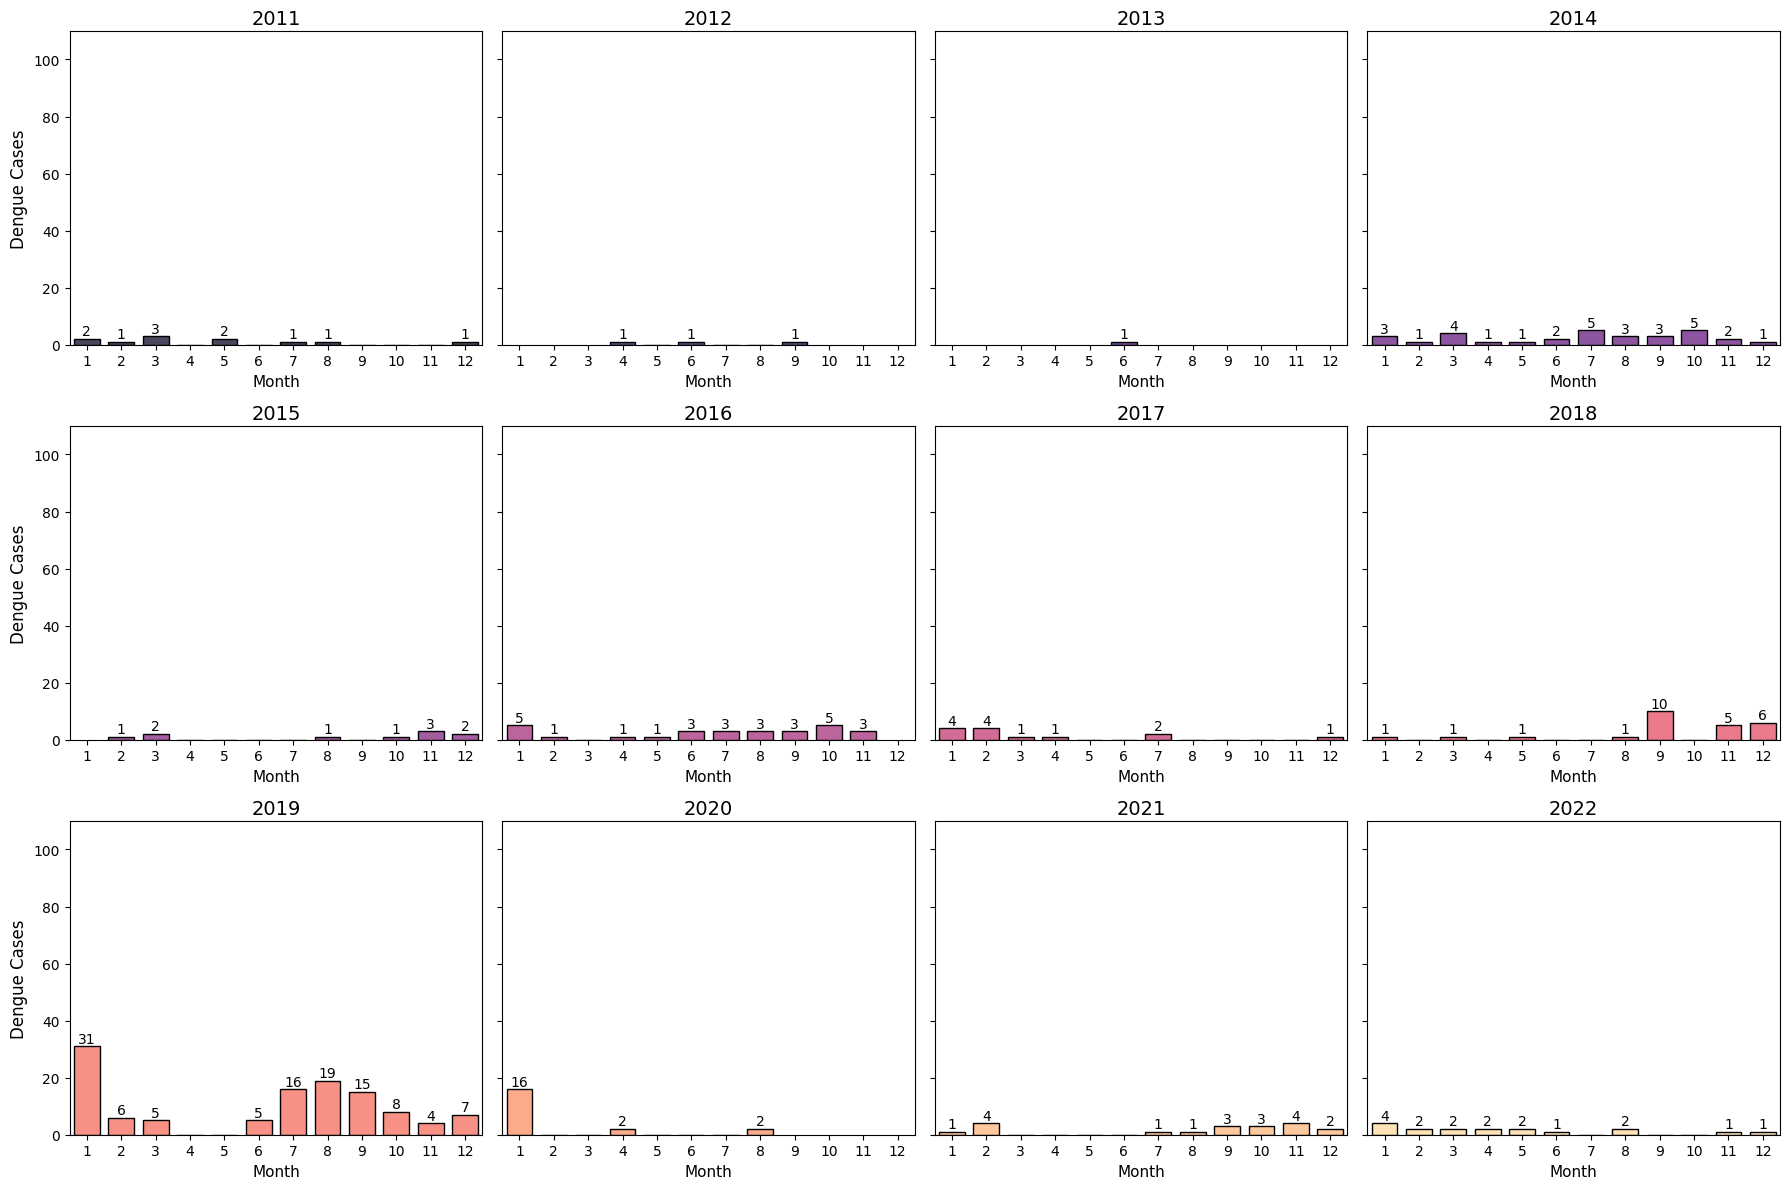

In [124]:
#HISTOGRAM FOR MONTHLY CASES EVERY YEAR
plot_dengue_cases(df, "UBALDO LAYA")

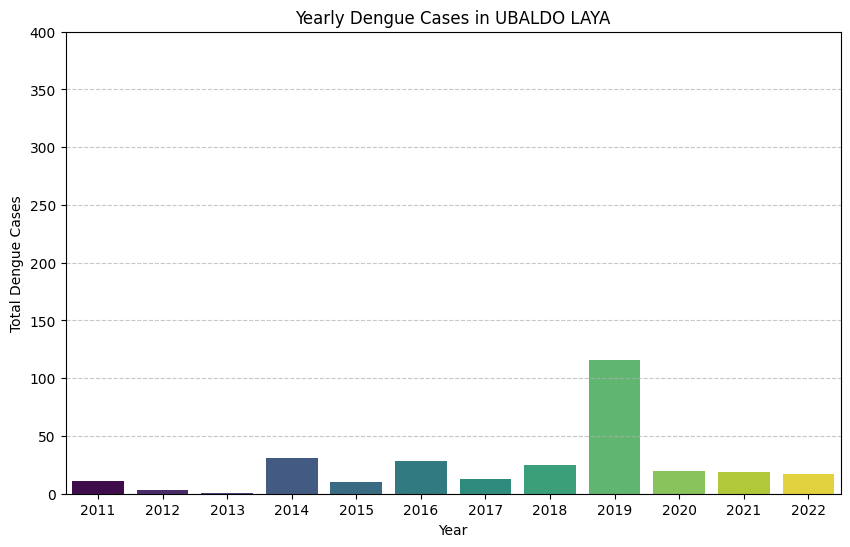

In [125]:
plot_total_dengue_cases_yearly(df, "UBALDO LAYA")

<div style="
    background-color: black; 
    color: white; 
    padding: 10px; 
    border-radius: 10px; 
    text-align: center;
    max-width: 100vw; 
    width: 100%;
    box-sizing: border-box;">
    UPPER HINAPLANON MONTHLY CASES
</div>


In [126]:
selected_barangay = "UPPER HINAPLANON"  # Change this to any barangay you want
barangay_data = get_selected_barangay(df, selected_barangay)

# Display the data for each year
for year, data in barangay_data.items():
    display(data)

Barangay_No          Barangay       x         y  Year  Month  \
42            42  UPPER HINAPLANON  8.2559  124.2689  2011      1   
86            42  UPPER HINAPLANON  8.2559  124.2689  2011      2   
130           42  UPPER HINAPLANON  8.2559  124.2689  2011      3   
174           42  UPPER HINAPLANON  8.2559  124.2689  2011      4   
218           42  UPPER HINAPLANON  8.2559  124.2689  2011      5   
262           42  UPPER HINAPLANON  8.2559  124.2689  2011      6   
306           42  UPPER HINAPLANON  8.2559  124.2689  2011      7   
350           42  UPPER HINAPLANON  8.2559  124.2689  2011      8   
394           42  UPPER HINAPLANON  8.2559  124.2689  2011      9   
438           42  UPPER HINAPLANON  8.2559  124.2689  2011     10   
482           42  UPPER HINAPLANON  8.2559  124.2689  2011     11   
526           42  UPPER HINAPLANON  8.2559  124.2689  2011     12   

     Dengue Cases  Temperature  Humidity  Rainfall  
42              0         23.8      88.1       7.0  
86              0         24.1      87.2      12.0  
130             0         25.3      85.5      20.0  
174             0         26.0      83.1      35.0  
218             0         27.2      81.9      55.0  
262             0         26.4      83.5      90.0  
306             0         25.7      84.7     110.0  
350             0         25.1      85.3      95.0  
394             0         24.4      86.2      70.0  
438             0         24.0      87.0      50.0  
482             0         23.6      88.4      30.0  
526             0         23.2      89.1      15.0

Barangay_No          Barangay       x         y  Year  Month  \
570            42  UPPER HINAPLANON  8.2559  124.2689  2012      1   
614            42  UPPER HINAPLANON  8.2559  124.2689  2012      2   
658            42  UPPER HINAPLANON  8.2559  124.2689  2012      3   
702            42  UPPER HINAPLANON  8.2559  124.2689  2012      4   
746            42  UPPER HINAPLANON  8.2559  124.2689  2012      5   
790            42  UPPER HINAPLANON  8.2559  124.2689  2012      6   
834            42  UPPER HINAPLANON  8.2559  124.2689  2012      7   
878            42  UPPER HINAPLANON  8.2559  124.2689  2012      8   
922            42  UPPER HINAPLANON  8.2559  124.2689  2012      9   
966            42  UPPER HINAPLANON  8.2559  124.2689  2012     10   
1010           42  UPPER HINAPLANON  8.2559  124.2689  2012     11   
1054           42  UPPER HINAPLANON  8.2559  124.2689  2012     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
570              0         24.3      85.1       4.0  
614              0         24.3      85.7       7.1  
658              0         24.6      83.3       3.1  
702              0         25.4      82.3       6.9  
746              0         25.1      86.4       6.9  
790              0         24.7      85.3       7.9  
834              0         24.9      85.2       6.4  
878              0         24.9      85.2       6.4  
922              0         24.1      88.1      11.4  
966              0         24.6      86.5       8.4  
1010             0         24.8      84.8       4.1  
1054             0         24.7      84.8       5.7

Barangay_No          Barangay       x         y  Year  Month  \
1098           42  UPPER HINAPLANON  8.2559  124.2689  2013      1   
1142           42  UPPER HINAPLANON  8.2559  124.2689  2013      2   
1186           42  UPPER HINAPLANON  8.2559  124.2689  2013      3   
1230           42  UPPER HINAPLANON  8.2559  124.2689  2013      4   
1274           42  UPPER HINAPLANON  8.2559  124.2689  2013      5   
1318           42  UPPER HINAPLANON  8.2559  124.2689  2013      6   
1362           42  UPPER HINAPLANON  8.2559  124.2689  2013      7   
1406           42  UPPER HINAPLANON  8.2559  124.2689  2013      8   
1450           42  UPPER HINAPLANON  8.2559  124.2689  2013      9   
1494           42  UPPER HINAPLANON  8.2559  124.2689  2013     10   
1538           42  UPPER HINAPLANON  8.2559  124.2689  2013     11   
1582           42  UPPER HINAPLANON  8.2559  124.2689  2013     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
1098             0         24.2      88.2       8.1  
1142             0         24.4      84.7       6.0  
1186             0         25.5      81.1       2.7  
1230             0         26.0      81.0       4.9  
1274             0         26.0      82.8       5.2  
1318             0         24.9      86.9       9.2  
1362             0         24.5      87.7      11.0  
1406             0         24.3      87.2       6.9  
1450             1         24.6      86.5       4.9  
1494             0         24.0      88.0      10.4  
1538             0         24.2      85.9       7.8  
1582             0         24.4      84.0       3.5

Barangay_No          Barangay       x         y  Year  Month  \
1626           42  UPPER HINAPLANON  8.2559  124.2689  2014      1   
1670           42  UPPER HINAPLANON  8.2559  124.2689  2014      2   
1714           42  UPPER HINAPLANON  8.2559  124.2689  2014      3   
1758           42  UPPER HINAPLANON  8.2559  124.2689  2014      4   
1802           42  UPPER HINAPLANON  8.2559  124.2689  2014      5   
1846           42  UPPER HINAPLANON  8.2559  124.2689  2014      6   
1890           42  UPPER HINAPLANON  8.2559  124.2689  2014      7   
1934           42  UPPER HINAPLANON  8.2559  124.2689  2014      8   
1978           42  UPPER HINAPLANON  8.2559  124.2689  2014      9   
2022           42  UPPER HINAPLANON  8.2559  124.2689  2014     10   
2066           42  UPPER HINAPLANON  8.2559  124.2689  2014     11   
2110           42  UPPER HINAPLANON  8.2559  124.2689  2014     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
1626             0         23.2      86.4       6.8  
1670             0         23.7      82.4       2.3  
1714             0         24.3      82.5       3.8  
1758             1         25.1      81.4       2.0  
1802             0         25.3      84.0       4.9  
1846             0         24.5      87.1       6.6  
1890             0         23.4      89.1       8.5  
1934             1         23.9      87.7       8.0  
1978             0         23.4      88.5       7.1  
2022             0         23.9      88.4       8.5  
2066             0         24.7      85.2       6.1  
2110             0         24.0      85.3       4.9

Barangay_No          Barangay       x         y  Year  Month  \
2154           42  UPPER HINAPLANON  8.2559  124.2689  2015      1   
2198           42  UPPER HINAPLANON  8.2559  124.2689  2015      2   
2242           42  UPPER HINAPLANON  8.2559  124.2689  2015      3   
2286           42  UPPER HINAPLANON  8.2559  124.2689  2015      4   
2330           42  UPPER HINAPLANON  8.2559  124.2689  2015      5   
2374           42  UPPER HINAPLANON  8.2559  124.2689  2015      6   
2418           42  UPPER HINAPLANON  8.2559  124.2689  2015      7   
2462           42  UPPER HINAPLANON  8.2559  124.2689  2015      8   
2506           42  UPPER HINAPLANON  8.2559  124.2689  2015      9   
2550           42  UPPER HINAPLANON  8.2559  124.2689  2015     10   
2594           42  UPPER HINAPLANON  8.2559  124.2689  2015     11   
2638           42  UPPER HINAPLANON  8.2559  124.2689  2015     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
2154             0         25.6      89.0       5.9  
2198             1         25.6      87.0       3.0  
2242             0         26.1      83.2       1.1  
2286             0         27.3      82.8       2.1  
2330             0         28.4      78.1       2.7  
2374             0         27.4      81.9       8.7  
2418             2         27.6      80.4       4.2  
2462             0         27.5      80.9       5.5  
2506             2         27.2      82.4       8.2  
2550             0         27.2      83.4       4.9  
2594             4         26.8      87.3       6.5  
2638             9         26.5      87.1       4.8

Barangay_No          Barangay       x         y  Year  Month  \
2682           42  UPPER HINAPLANON  8.2559  124.2689  2016      1   
2726           42  UPPER HINAPLANON  8.2559  124.2689  2016      2   
2770           42  UPPER HINAPLANON  8.2559  124.2689  2016      3   
2814           42  UPPER HINAPLANON  8.2559  124.2689  2016      4   
2858           42  UPPER HINAPLANON  8.2559  124.2689  2016      5   
2902           42  UPPER HINAPLANON  8.2559  124.2689  2016      6   
2946           42  UPPER HINAPLANON  8.2559  124.2689  2016      7   
2990           42  UPPER HINAPLANON  8.2559  124.2689  2016      8   
3034           42  UPPER HINAPLANON  8.2559  124.2689  2016      9   
3078           42  UPPER HINAPLANON  8.2559  124.2689  2016     10   
3122           42  UPPER HINAPLANON  8.2559  124.2689  2016     11   
3166           42  UPPER HINAPLANON  8.2559  124.2689  2016     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
2682             1         26.2      86.9       1.6  
2726             2         26.1      88.2       2.6  
2770             0         26.8      84.4       0.4  
2814             0         28.1      80.1       1.5  
2858             0         28.3      81.9       8.3  
2902             0         27.5      83.9      12.5  
2946             0         27.6      82.0       5.2  
2990             0         27.8      80.3       2.7  
3034             0         27.2      82.4       6.2  
3078             0         27.1      84.6       8.9  
3122             0         26.5      86.6       7.6  
3166             0         26.7      86.9       8.2

Barangay_No          Barangay       x         y  Year  Month  \
3210           42  UPPER HINAPLANON  8.2559  124.2689  2017      1   
3254           42  UPPER HINAPLANON  8.2559  124.2689  2017      2   
3298           42  UPPER HINAPLANON  8.2559  124.2689  2017      3   
3342           42  UPPER HINAPLANON  8.2559  124.2689  2017      4   
3386           42  UPPER HINAPLANON  8.2559  124.2689  2017      5   
3430           42  UPPER HINAPLANON  8.2559  124.2689  2017      6   
3474           42  UPPER HINAPLANON  8.2559  124.2689  2017      7   
3518           42  UPPER HINAPLANON  8.2559  124.2689  2017      8   
3562           42  UPPER HINAPLANON  8.2559  124.2689  2017      9   
3606           42  UPPER HINAPLANON  8.2559  124.2689  2017     10   
3650           42  UPPER HINAPLANON  8.2559  124.2689  2017     11   
3694           42  UPPER HINAPLANON  8.2559  124.2689  2017     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
3210             1         25.9      88.9      12.5  
3254             1         25.6      87.8       5.9  
3298             0         26.1      87.4       8.0  
3342             0         27.2      85.0       5.1  
3386             0         27.8      84.4      10.4  
3430             0         27.4      83.8       7.8  
3474             1         27.2      82.6       9.1  
3518             0         27.9      83.4       9.6  
3562             0         27.3      83.3      11.4  
3606             0         27.0      84.0       8.3  
3650             0         27.0      86.6       7.3  
3694             0         26.7      85.9       9.6

Barangay_No          Barangay       x         y  Year  Month  \
3738           42  UPPER HINAPLANON  8.2559  124.2689  2018      1   
3782           42  UPPER HINAPLANON  8.2559  124.2689  2018      2   
3826           42  UPPER HINAPLANON  8.2559  124.2689  2018      3   
3870           42  UPPER HINAPLANON  8.2559  124.2689  2018      4   
3914           42  UPPER HINAPLANON  8.2559  124.2689  2018      5   
3958           42  UPPER HINAPLANON  8.2559  124.2689  2018      6   
4002           42  UPPER HINAPLANON  8.2559  124.2689  2018      7   
4046           42  UPPER HINAPLANON  8.2559  124.2689  2018      8   
4090           42  UPPER HINAPLANON  8.2559  124.2689  2018      9   
4134           42  UPPER HINAPLANON  8.2559  124.2689  2018     10   
4178           42  UPPER HINAPLANON  8.2559  124.2689  2018     11   
4222           42  UPPER HINAPLANON  8.2559  124.2689  2018     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
3738             0         26.2      87.5       7.3  
3782             0         26.4      86.0       9.7  
3826             0         26.5      84.6       3.7  
3870             0         27.4      82.5       2.6  
3914             0         27.9      82.0       6.9  
3958             0         27.7      80.7       5.2  
4002             0         27.3      81.6       4.7  
4046             0         27.4      79.8       2.1  
4090             1         26.9      82.2       5.4  
4134             0         27.2      82.7       4.2  
4178             0         26.5      86.6       6.1  
4222             4         26.3      88.1       5.8

Barangay_No          Barangay       x         y  Year  Month  \
4266           42  UPPER HINAPLANON  8.2559  124.2689  2019      1   
4310           42  UPPER HINAPLANON  8.2559  124.2689  2019      2   
4354           42  UPPER HINAPLANON  8.2559  124.2689  2019      3   
4398           42  UPPER HINAPLANON  8.2559  124.2689  2019      4   
4442           42  UPPER HINAPLANON  8.2559  124.2689  2019      5   
4486           42  UPPER HINAPLANON  8.2559  124.2689  2019      6   
4530           42  UPPER HINAPLANON  8.2559  124.2689  2019      7   
4574           42  UPPER HINAPLANON  8.2559  124.2689  2019      8   
4618           42  UPPER HINAPLANON  8.2559  124.2689  2019      9   
4662           42  UPPER HINAPLANON  8.2559  124.2689  2019     10   
4706           42  UPPER HINAPLANON  8.2559  124.2689  2019     11   
4750           42  UPPER HINAPLANON  8.2559  124.2689  2019     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
4266             3         25.5      88.2       5.7  
4310             0         25.3      84.3       1.1  
4354             0         26.1      83.2       1.9  
4398             0         27.5      80.3       1.8  
4442             0         28.4      78.6       4.4  
4486             0         27.8      82.7       9.1  
4530             3         27.2      82.1       6.2  
4574             1         27.7      77.1       1.4  
4618             0         27.8      78.2       3.3  
4662             0         27.0      83.8       7.7  
4706             1         27.1      82.9       4.3  
4750             0         26.4      86.4       4.2

Barangay_No          Barangay       x         y  Year  Month  \
4794           42  UPPER HINAPLANON  8.2559  124.2689  2020      1   
4838           42  UPPER HINAPLANON  8.2559  124.2689  2020      2   
4882           42  UPPER HINAPLANON  8.2559  124.2689  2020      3   
4926           42  UPPER HINAPLANON  8.2559  124.2689  2020      4   
4970           42  UPPER HINAPLANON  8.2559  124.2689  2020      5   
5014           42  UPPER HINAPLANON  8.2559  124.2689  2020      6   
5058           42  UPPER HINAPLANON  8.2559  124.2689  2020      7   
5102           42  UPPER HINAPLANON  8.2559  124.2689  2020      8   
5146           42  UPPER HINAPLANON  8.2559  124.2689  2020      9   
5190           42  UPPER HINAPLANON  8.2559  124.2689  2020     10   
5234           42  UPPER HINAPLANON  8.2559  124.2689  2020     11   
5278           42  UPPER HINAPLANON  8.2559  124.2689  2020     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
4794             4         26.3      86.8       2.1  
4838             2         25.7      87.2       3.5  
4882             0         26.4      85.2       2.0  
4926             0         27.2      81.6       1.0  
4970             0         28.0      83.2       9.8  
5014             0         27.3      84.1      14.1  
5058             0         27.0      83.9      15.7  
5102             0         27.2      82.9      11.7  
5146             0         27.2      83.7       9.2  
5190             0         26.9      84.2      13.2  
5234             0         26.8      86.2       5.5  
5278             0         26.7      86.6       8.2

Barangay_No          Barangay       x         y  Year  Month  \
5322           42  UPPER HINAPLANON  8.2559  124.2689  2021      1   
5366           42  UPPER HINAPLANON  8.2559  124.2689  2021      2   
5410           42  UPPER HINAPLANON  8.2559  124.2689  2021      3   
5454           42  UPPER HINAPLANON  8.2559  124.2689  2021      4   
5498           42  UPPER HINAPLANON  8.2559  124.2689  2021      5   
5542           42  UPPER HINAPLANON  8.2559  124.2689  2021      6   
5586           42  UPPER HINAPLANON  8.2559  124.2689  2021      7   
5630           42  UPPER HINAPLANON  8.2559  124.2689  2021      8   
5674           42  UPPER HINAPLANON  8.2559  124.2689  2021      9   
5718           42  UPPER HINAPLANON  8.2559  124.2689  2021     10   
5762           42  UPPER HINAPLANON  8.2559  124.2689  2021     11   
5806           42  UPPER HINAPLANON  8.2559  124.2689  2021     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
5322             0         25.9      88.5      11.9  
5366             0         26.0      87.1      12.6  
5410             0         26.8      84.7       5.5  
5454             0         27.1      82.5       4.5  
5498             0         27.5      84.0      10.7  
5542             0         27.6      81.3       8.2  
5586             2         27.7      80.0       4.4  
5630             0         27.5      80.0       6.5  
5674             0         27.2      82.7       9.5  
5718             0         27.3      83.6       8.7  
5762             0         27.0      86.4       9.4  
5806             0         26.2      86.9       9.8

Barangay_No          Barangay       x         y  Year  Month  \
5850           42  UPPER HINAPLANON  8.2559  124.2689  2022      1   
5894           42  UPPER HINAPLANON  8.2559  124.2689  2022      2   
5938           42  UPPER HINAPLANON  8.2559  124.2689  2022      3   
5982           42  UPPER HINAPLANON  8.2559  124.2689  2022      4   
6026           42  UPPER HINAPLANON  8.2559  124.2689  2022      5   
6070           42  UPPER HINAPLANON  8.2559  124.2689  2022      6   
6114           42  UPPER HINAPLANON  8.2559  124.2689  2022      7   
6158           42  UPPER HINAPLANON  8.2559  124.2689  2022      8   
6202           42  UPPER HINAPLANON  8.2559  124.2689  2022      9   
6246           42  UPPER HINAPLANON  8.2559  124.2689  2022     10   
6290           42  UPPER HINAPLANON  8.2559  124.2689  2022     11   
6334           42  UPPER HINAPLANON  8.2559  124.2689  2022     12   

      Dengue Cases  Temperature  Humidity  Rainfall  
5850             0         26.0      86.9       8.3  
5894             1         26.0      87.2       3.9  
5938             0         26.8      86.5      11.0  
5982             0         26.8      86.5      12.2  
6026             0         27.4      83.9      11.5  
6070             0         27.6      81.9       7.1  
6114             0         27.4      83.2      11.6  
6158             0         27.3      82.0       7.9  
6202             2         27.5      81.1       6.1  
6246             0         27.1      84.2       9.0  
6290             1         27.0      85.8       6.6  
6334             0         26.4      87.1      14.5

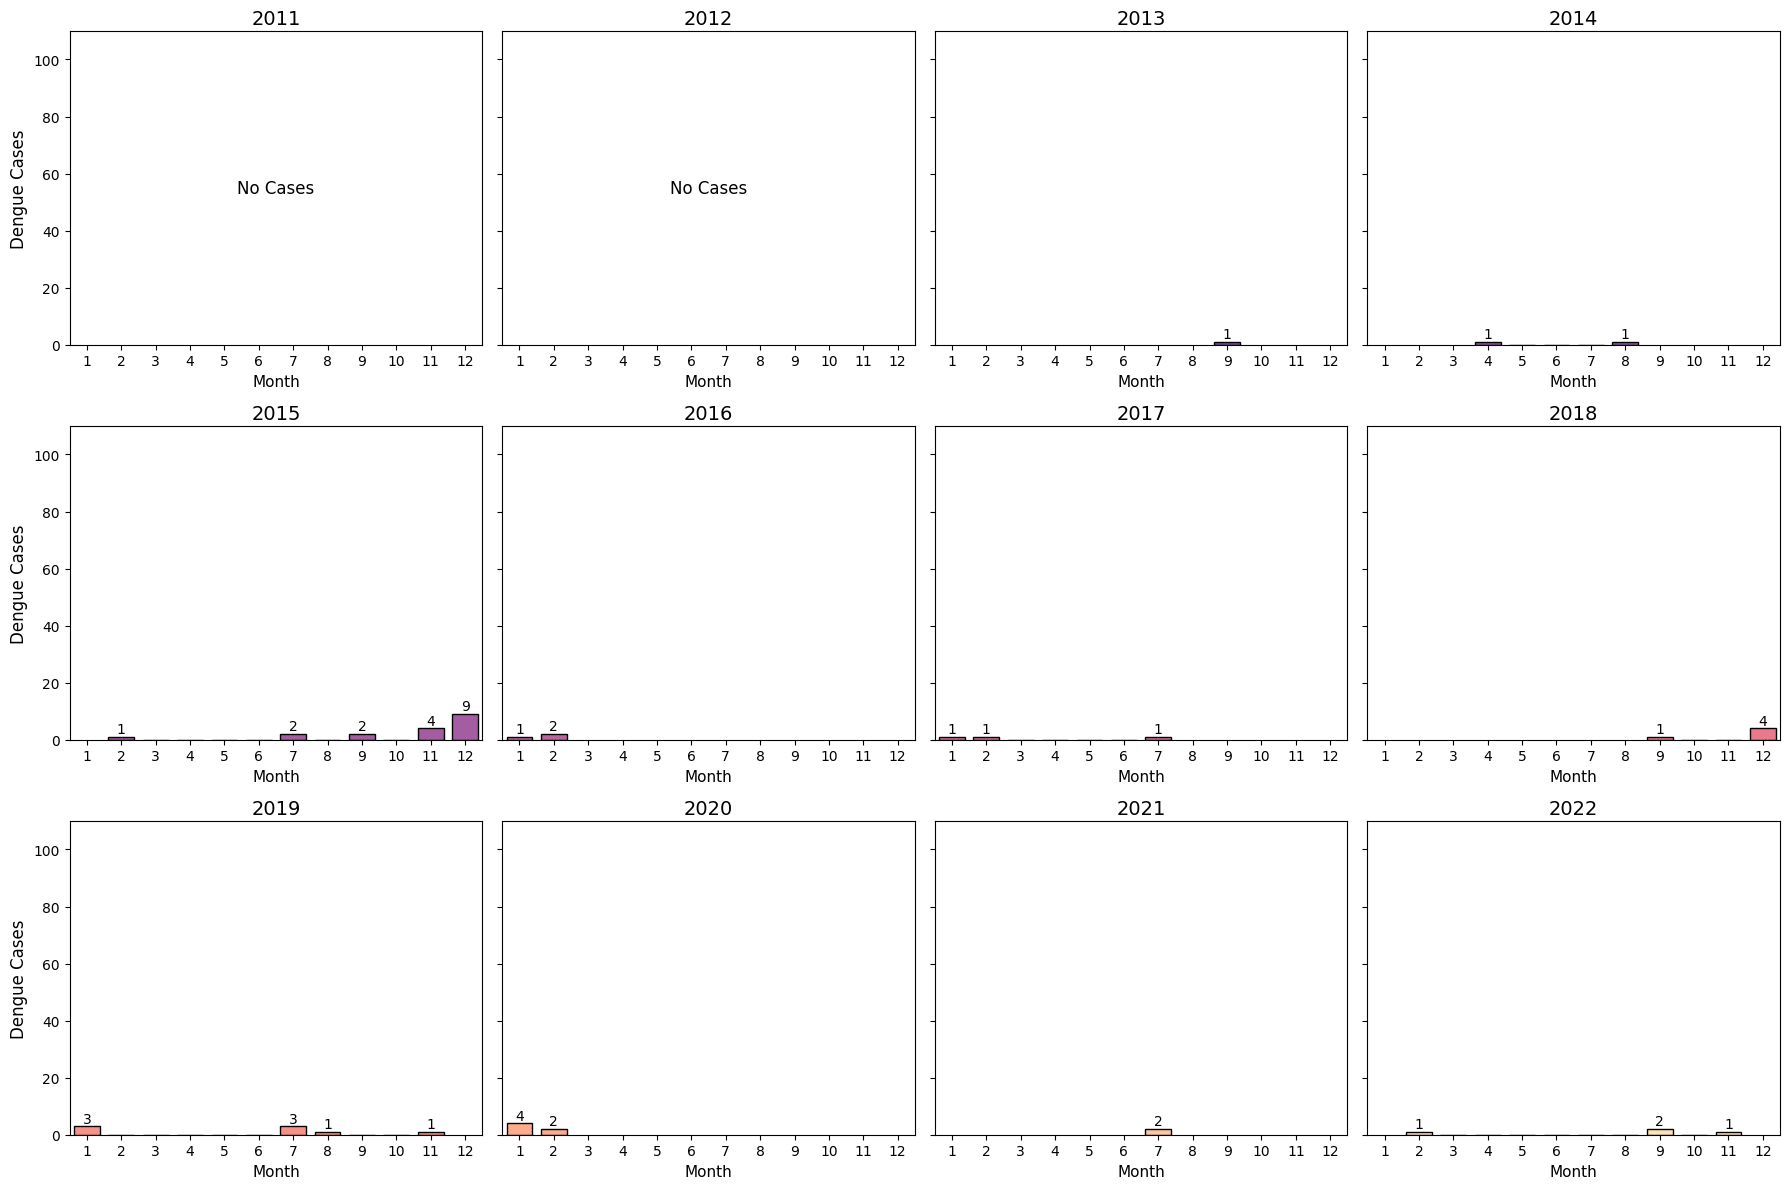

In [127]:
#HISTOGRAM FOR MONTHLY CASES EVERY YEAR
plot_dengue_cases(df, "UPPER HINAPLANON")

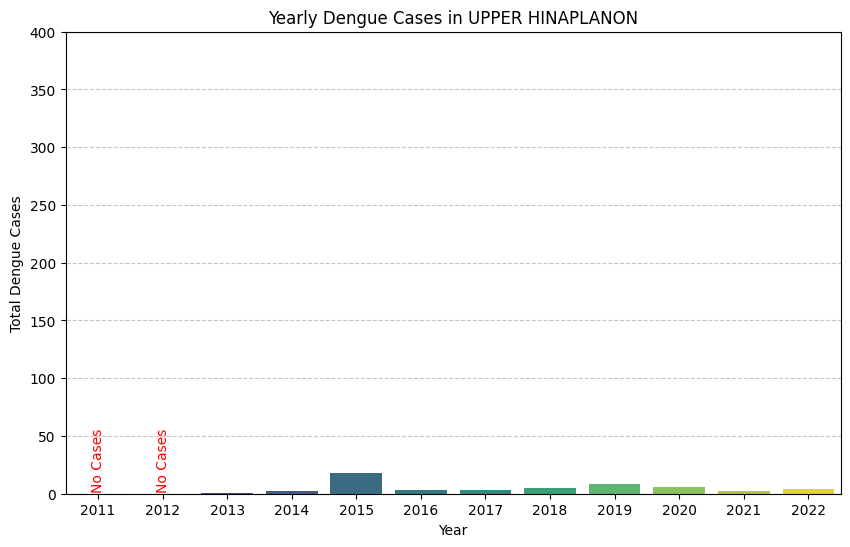

In [128]:
plot_total_dengue_cases_yearly(df, "UPPER HINAPLANON")

<div style="
    background-color: black; 
    color: white; 
    padding: 10px; 
    border-radius: 10px; 
    text-align: center;
    max-width: 100vw; 
    width: 100%;
    box-sizing: border-box;">
    VILLA VERDE MONTHLY CASES
</div>


In [129]:
selected_barangay = "VILLA VERDE "  # Change this to any barangay you want
barangay_data = get_selected_barangay(df, selected_barangay)

# Display the data for each year
for year, data in barangay_data.items():
    display(data)

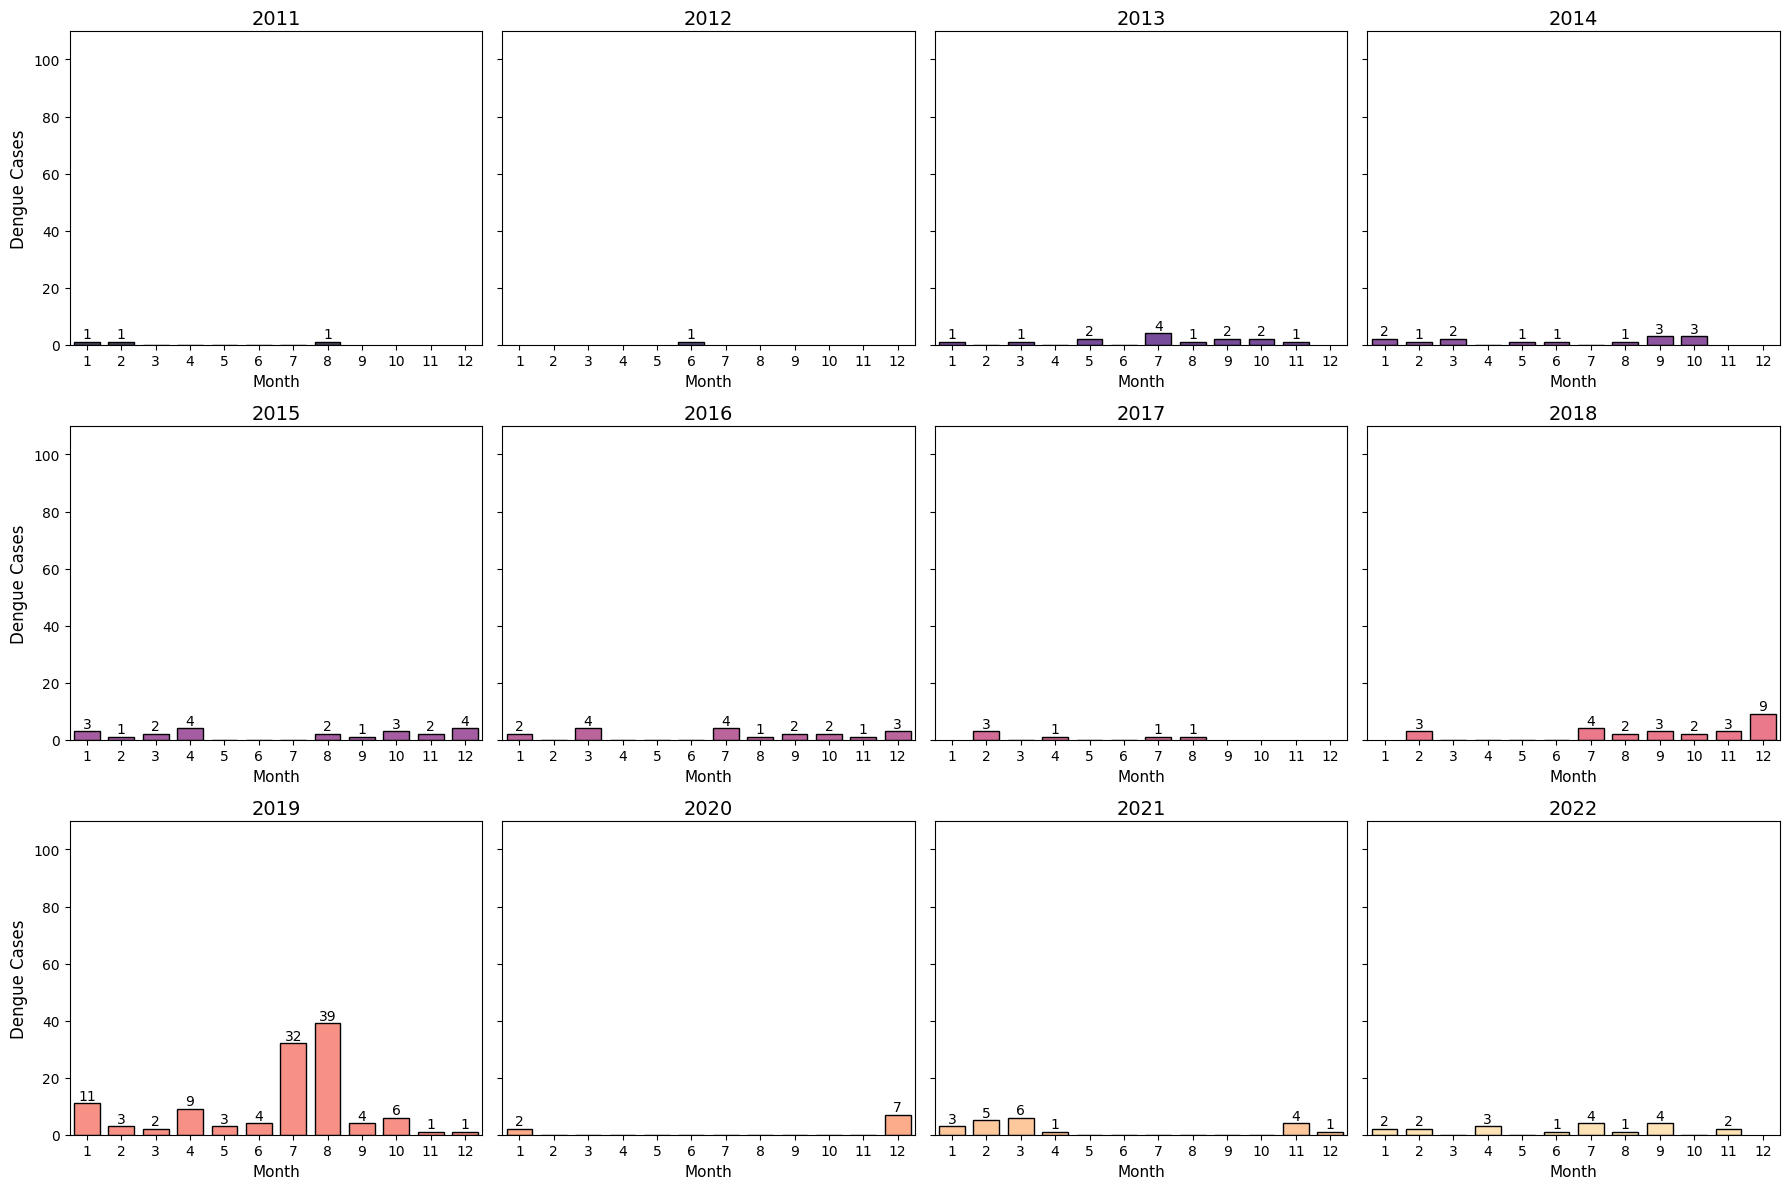

In [130]:
#HISTOGRAM FOR MONTHLY CASES EVERY YEAR
plot_dengue_cases(df, "VILLA VERDE")

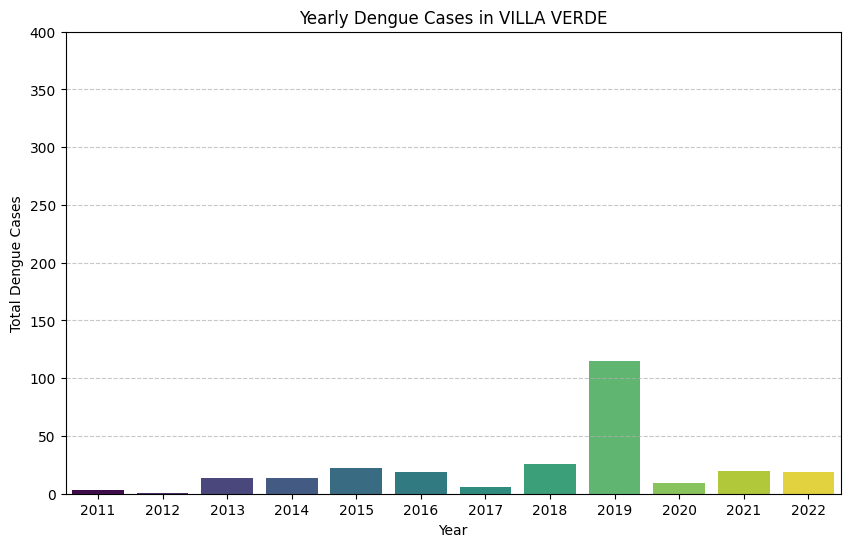

In [131]:
plot_total_dengue_cases_yearly(df, "VILLA VERDE")